In [1]:
from pathlib import Path
import torch
import taichi as ti
from tqdm import trange

from torchvtk.datasets import TorchDataset
from torchvtk.utils import make_4d

from differender.utils import get_tf, in_circles, get_rand_pos
from differender.volume_raycaster import Raycaster, Mode

[Taichi] version 0.8.5, llvm 10.0.0, commit 45c6ad48, linux, python 3.7.11
[I 01/31/22 15:18:37.174 886] [shell.py:_shell_pop_print@34] Graphical python shell detected, using wrapped sys.stdout
[TaiGLSL] version 0.0.11


In [2]:
import matplotlib.pyplot as plt
def show_im(im):
    fig, axs = plt.subplots(2,3, figsize=(15,10))
    axs[0,0].imshow(im.squeeze()[:3].permute(1,2,0).cpu().numpy())
    axs[0,0].set_title('Color')
    axs[0,1].imshow(im.squeeze()[[3,3,3]].permute(1,2,0).cpu().numpy())
    axs[0,1].set_title('Alpha')
    axs[0,2].imshow(im.squeeze()[[4,4,4]].permute(1,2,0).cpu().numpy())
    axs[0,2].set_title('First Hit')
    axs[1,0].imshow(im.squeeze()[[5,5,5]].permute(1,2,0).cpu().numpy())
    axs[1,0].set_title('Max Opacity')
    axs[1,1].imshow(im.squeeze()[[6,6,6]].permute(1,2,0).cpu().numpy())
    axs[1,1].set_title('Max Gradient')
    axs[1,2].imshow(im.squeeze()[[7,7,7]].permute(1,2,0).cpu().numpy())
    axs[1,2].set_title('WYSIWYP')


In [22]:
N_ITEMS = 100000
W, H = 512, 512
TF_RES = 256
SR = 16.0 # Sampling rate

out_dir = Path('/mnt/hdd/dome/STDepth_data3')
ds = TorchDataset('/mnt/hdd/shared_datasets/torchvtk/CQ500')
N_VOLUMES = len(ds)
METHOD = Mode.FirstHitDepth
# MEHTOD = Mode.MaxGradient
# METHOD = Mode.MaxOpacity

In [ ]:
raycaster = None
skips = 0
for v in trange(N_VOLUMES):
    item = ds[v]
    vol = make_4d(item['vol']).float().to('cuda')
    nam = item['name']
    ti.reset()
    del raycaster
    raycaster = Raycaster(vol.shape[-3:], (W, H), TF_RES, 
        sampling_rate=SR, near=0.1, far=5.0, max_samples=1, mode=METHOD, ti_kwargs={'device_memory_fraction':0.5})
    for i in trange(N_ITEMS // N_VOLUMES):
        while True:
            lf = get_rand_pos(1).float().to('cuda')
            tf = get_tf('generate', TF_RES).float().to('cuda')
            rgbad = raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR).squeeze(0)
            if (rgbad[3] > 0.0).float().mean() < 0.1 and (rgbad[4] > 0.0).float().mean() < 0.1:
                skips += 1
                print(f'Skipping another useless render ({skips})')
                continue
            else:
                torch.save({
                    'vol': nam,
                    'tf': tf.squeeze(0).cpu().float(),
                    'look_from': lf.squeeze(0).cpu().float(),
                    'rgba': rgbad[:4].cpu().half(),
                    'first_hit': rgbad[[4]].cpu().half(),
                    'max_opacity': rgbad[[5]].cpu().half(),
                    'max_gradient': rgbad[[6]].cpu().half(),
                    'wysiwyp': rgbad[[7]].cpu().half()
                }, out_dir/f'{nam}_{i}.pt')
                break

  0%|          | 0/395 [00:00<?, ?it/s]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:29,  1.31s/it]

Skipping another useless render (1)



  3%|▎         | 7/253 [00:04<01:24,  2.92it/s]

Skipping another useless render (2)



  4%|▎         | 9/253 [00:04<01:19,  3.07it/s]

Skipping another useless render (3)



 15%|█▌        | 39/253 [00:09<00:44,  4.78it/s]

Skipping another useless render (4)



 26%|██▌       | 66/253 [00:14<00:26,  7.11it/s]

Skipping another useless render (5)



 32%|███▏      | 81/253 [00:16<00:29,  5.88it/s]

Skipping another useless render (6)



 42%|████▏     | 107/253 [00:21<00:30,  4.84it/s]

Skipping another useless render (7)



 49%|████▉     | 124/253 [00:24<00:31,  4.13it/s]

Skipping another useless render (8)



 60%|██████    | 152/253 [00:29<00:22,  4.52it/s]

Skipping another useless render (9)



 62%|██████▏   | 156/253 [00:29<00:16,  5.74it/s]

Skipping another useless render (10)



 81%|████████  | 204/253 [00:37<00:06,  7.77it/s]

Skipping another useless render (11)



 84%|████████▍ | 213/253 [00:39<00:08,  4.67it/s]

Skipping another useless render (12)



 89%|████████▊ | 224/253 [00:41<00:04,  6.41it/s]

Skipping another useless render (13)



 91%|█████████ | 229/253 [00:42<00:04,  4.98it/s]

Skipping another useless render (14)



 91%|█████████▏| 231/253 [00:43<00:05,  4.35it/s]

Skipping another useless render (15)



  0%|          | 1/395 [00:48<5:18:17, 48.47s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:03,  1.21s/it]

Skipping another useless render (16)



  7%|▋         | 17/253 [00:05<00:50,  4.67it/s]

Skipping another useless render (17)



 19%|█▊        | 47/253 [00:10<00:37,  5.43it/s]

Skipping another useless render (18)



 22%|██▏       | 56/253 [00:11<00:31,  6.23it/s]

Skipping another useless render (19)
Skipping another useless render (20)



 26%|██▋       | 67/253 [00:14<00:43,  4.24it/s]

Skipping another useless render (21)



 28%|██▊       | 72/253 [00:15<00:41,  4.38it/s]

Skipping another useless render (22)



 30%|███       | 76/253 [00:16<00:39,  4.50it/s]

Skipping another useless render (23)



 40%|███▉      | 100/253 [00:19<00:25,  6.10it/s]

Skipping another useless render (24)



 43%|████▎     | 109/253 [00:21<00:25,  5.72it/s]

Skipping another useless render (25)



 45%|████▌     | 115/253 [00:22<00:33,  4.12it/s]

Skipping another useless render (26)



 55%|█████▌    | 140/253 [00:27<00:24,  4.64it/s]

Skipping another useless render (27)



 64%|██████▎   | 161/253 [00:30<00:15,  6.07it/s]

Skipping another useless render (28)



 67%|██████▋   | 170/253 [00:32<00:18,  4.45it/s]

Skipping another useless render (29)



 72%|███████▏  | 182/253 [00:34<00:16,  4.32it/s]

Skipping another useless render (30)



 72%|███████▏  | 183/253 [00:35<00:14,  4.68it/s]

Skipping another useless render (31)



 73%|███████▎  | 184/253 [00:35<00:21,  3.26it/s]

Skipping another useless render (32)



 74%|███████▍  | 187/253 [00:36<00:15,  4.25it/s]

Skipping another useless render (33)



 79%|███████▉  | 201/253 [00:38<00:10,  5.00it/s]

Skipping another useless render (34)



 83%|████████▎ | 209/253 [00:40<00:09,  4.47it/s]

Skipping another useless render (35)



 87%|████████▋ | 220/253 [00:42<00:05,  6.54it/s]

Skipping another useless render (36)
Skipping another useless render (37)



 87%|████████▋ | 221/253 [00:42<00:10,  2.98it/s]

Skipping another useless render (38)



  1%|          | 2/395 [01:38<5:22:52, 49.29s/it]

[Taichi] Starting on arch=cuda



 11%|█▏        | 29/253 [00:07<00:43,  5.13it/s]

Skipping another useless render (39)



 25%|██▍       | 62/253 [00:13<00:44,  4.26it/s]

Skipping another useless render (40)



 28%|██▊       | 70/253 [00:15<00:45,  4.05it/s]

Skipping another useless render (41)



 38%|███▊      | 95/253 [00:19<00:37,  4.19it/s]

Skipping another useless render (42)



 40%|███▉      | 100/253 [00:20<00:26,  5.76it/s]

Skipping another useless render (43)



 46%|████▌     | 117/253 [00:24<00:23,  5.83it/s]

Skipping another useless render (44)



 57%|█████▋    | 144/253 [00:29<00:17,  6.11it/s]

Skipping another useless render (45)



 63%|██████▎   | 160/253 [00:32<00:21,  4.34it/s]

Skipping another useless render (46)



 66%|██████▌   | 166/253 [00:33<00:20,  4.29it/s]

Skipping another useless render (47)



 69%|██████▉   | 174/253 [00:34<00:12,  6.16it/s]

Skipping another useless render (48)
Skipping another useless render (49)
Skipping another useless render (50)



 82%|████████▏ | 207/253 [00:41<00:10,  4.18it/s]

Skipping another useless render (51)



 82%|████████▏ | 208/253 [00:41<00:10,  4.28it/s]


Skipping another useless render (52)


 88%|████████▊ | 223/253 [00:44<00:07,  4.27it/s]

Skipping another useless render (53)



 89%|████████▉ | 225/253 [00:44<00:05,  4.98it/s]

Skipping another useless render (54)



 91%|█████████ | 230/253 [00:46<00:05,  4.21it/s]

Skipping another useless render (55)



 93%|█████████▎| 235/253 [00:47<00:04,  3.70it/s]

Skipping another useless render (56)



 93%|█████████▎| 236/253 [00:47<00:05,  3.16it/s]

Skipping another useless render (57)



  1%|          | 3/395 [02:30<5:30:31, 50.59s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:31,  1.32s/it]

Skipping another useless render (58)



  2%|▏         | 5/253 [00:03<01:53,  2.19it/s]

Skipping another useless render (59)



  8%|▊         | 20/253 [00:06<00:40,  5.81it/s]

Skipping another useless render (60)



 10%|█         | 26/253 [00:07<00:48,  4.66it/s]

Skipping another useless render (61)



 24%|██▍       | 61/253 [00:13<00:31,  6.16it/s]

Skipping another useless render (62)



 33%|███▎      | 84/253 [00:16<00:27,  6.21it/s]

Skipping another useless render (63)
Skipping another useless render (64)



 34%|███▎      | 85/253 [00:17<00:56,  3.00it/s]

Skipping another useless render (65)



 40%|███▉      | 100/253 [00:19<00:22,  6.87it/s]

Skipping another useless render (66)



 45%|████▌     | 114/253 [00:22<00:32,  4.31it/s]

Skipping another useless render (67)



 51%|█████     | 128/253 [00:24<00:26,  4.67it/s]

Skipping another useless render (68)



 54%|█████▍    | 136/253 [00:26<00:17,  6.58it/s]

Skipping another useless render (69)



 70%|███████   | 178/253 [00:32<00:11,  6.74it/s]

Skipping another useless render (70)
Skipping another useless render (71)



 73%|███████▎  | 185/253 [00:34<00:13,  4.86it/s]

Skipping another useless render (72)



 78%|███████▊  | 197/253 [00:36<00:08,  6.59it/s]

Skipping another useless render (73)



 79%|███████▉  | 200/253 [00:36<00:10,  5.00it/s]

Skipping another useless render (74)



 81%|████████  | 205/253 [00:37<00:08,  5.81it/s]

Skipping another useless render (75)



 84%|████████▍ | 212/253 [00:39<00:09,  4.33it/s]

Skipping another useless render (76)



 85%|████████▌ | 216/253 [00:40<00:07,  5.23it/s]

Skipping another useless render (77)



 86%|████████▌ | 217/253 [00:40<00:10,  3.38it/s]

Skipping another useless render (78)



 93%|█████████▎| 235/253 [00:43<00:03,  5.66it/s]

Skipping another useless render (79)



  1%|          | 4/395 [03:18<5:22:41, 49.52s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:28,  1.20it/s]

Skipping another useless render (80)



 24%|██▍       | 61/253 [00:12<00:43,  4.38it/s]

Skipping another useless render (81)



 25%|██▍       | 62/253 [00:13<00:39,  4.81it/s]

Skipping another useless render (82)



 28%|██▊       | 72/253 [00:15<00:39,  4.57it/s]

Skipping another useless render (83)
Skipping another useless render (84)



 29%|██▉       | 74/253 [00:15<00:40,  4.41it/s]

Skipping another useless render (85)



 42%|████▏     | 106/253 [00:20<00:24,  6.03it/s]

Skipping another useless render (86)



 44%|████▍     | 111/253 [00:21<00:32,  4.35it/s]

Skipping another useless render (87)



 53%|█████▎    | 135/253 [00:26<00:26,  4.38it/s]

Skipping another useless render (88)



 56%|█████▌    | 141/253 [00:27<00:23,  4.82it/s]

Skipping another useless render (89)



 62%|██████▏   | 157/253 [00:30<00:19,  4.81it/s]

Skipping another useless render (90)



 66%|██████▋   | 168/253 [00:31<00:13,  6.08it/s]

Skipping another useless render (91)



 72%|███████▏  | 182/253 [00:34<00:14,  4.78it/s]

Skipping another useless render (92)



 75%|███████▌  | 191/253 [00:35<00:13,  4.50it/s]

Skipping another useless render (93)



 78%|███████▊  | 197/253 [00:36<00:10,  5.18it/s]

Skipping another useless render (94)



 87%|████████▋ | 220/253 [00:40<00:05,  6.36it/s]

Skipping another useless render (95)



 89%|████████▊ | 224/253 [00:41<00:05,  5.05it/s]

Skipping another useless render (96)
Skipping another useless render (97)



 89%|████████▉ | 226/253 [00:42<00:08,  3.32it/s]

Skipping another useless render (98)



 98%|█████████▊| 247/253 [00:46<00:01,  5.71it/s]

Skipping another useless render (99)
Skipping another useless render (100)



  1%|▏         | 5/395 [04:07<5:20:08, 49.25s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:59,  4.08it/s]

Skipping another useless render (101)



  7%|▋         | 18/253 [00:06<00:55,  4.24it/s]

Skipping another useless render (102)



 16%|█▌        | 40/253 [00:10<00:51,  4.17it/s]

Skipping another useless render (103)



 25%|██▍       | 62/253 [00:13<00:27,  6.86it/s]

Skipping another useless render (104)
Skipping another useless render (105)



 26%|██▌       | 66/253 [00:14<00:38,  4.89it/s]

Skipping another useless render (106)



 30%|███       | 77/253 [00:16<00:30,  5.71it/s]

Skipping another useless render (107)
Skipping another useless render (108)
Skipping another useless render (109)
Skipping another useless render (110)
Skipping another useless render (111)



 32%|███▏      | 82/253 [00:18<00:38,  4.50it/s]

Skipping another useless render (112)



 39%|███▊      | 98/253 [00:21<00:37,  4.11it/s]

Skipping another useless render (113)
Skipping another useless render (114)



 45%|████▍     | 113/253 [00:24<00:33,  4.18it/s]

Skipping another useless render (115)



 54%|█████▍    | 136/253 [00:28<00:20,  5.80it/s]

Skipping another useless render (116)
Skipping another useless render (117)



 64%|██████▍   | 163/253 [00:33<00:20,  4.43it/s]

Skipping another useless render (118)



 80%|████████  | 203/253 [00:40<00:08,  6.04it/s]

Skipping another useless render (119)



 86%|████████▌ | 218/253 [00:43<00:06,  5.75it/s]

Skipping another useless render (120)



  2%|▏         | 6/395 [04:57<5:22:44, 49.78s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 22/253 [00:06<00:45,  5.04it/s]

Skipping another useless render (121)



 49%|████▊     | 123/253 [00:22<00:25,  5.09it/s]

Skipping another useless render (122)



 57%|█████▋    | 144/253 [00:25<00:21,  5.16it/s]

Skipping another useless render (123)



 73%|███████▎  | 185/253 [00:32<00:14,  4.66it/s]

Skipping another useless render (124)



 85%|████████▍ | 215/253 [00:37<00:08,  4.46it/s]

Skipping another useless render (125)



  2%|▏         | 7/395 [05:42<5:10:58, 48.09s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:05<00:51,  4.58it/s]

Skipping another useless render (126)



  9%|▊         | 22/253 [00:06<00:49,  4.62it/s]

Skipping another useless render (127)



 11%|█▏        | 29/253 [00:07<00:36,  6.17it/s]

Skipping another useless render (128)
Skipping another useless render (129)



 14%|█▍        | 35/253 [00:08<00:40,  5.43it/s]

Skipping another useless render (130)



 27%|██▋       | 69/253 [00:14<00:40,  4.58it/s]

Skipping another useless render (131)



 40%|████      | 102/253 [00:20<00:24,  6.09it/s]

Skipping another useless render (132)



 43%|████▎     | 110/253 [00:21<00:21,  6.62it/s]

Skipping another useless render (133)



 46%|████▌     | 117/253 [00:23<00:29,  4.60it/s]

Skipping another useless render (134)



 47%|████▋     | 119/253 [00:23<00:30,  4.36it/s]

Skipping another useless render (135)



 51%|█████     | 128/253 [00:25<00:26,  4.66it/s]

Skipping another useless render (136)



 64%|██████▎   | 161/253 [00:30<00:19,  4.63it/s]

Skipping another useless render (137)



 65%|██████▍   | 164/253 [00:31<00:20,  4.27it/s]

Skipping another useless render (138)



 67%|██████▋   | 170/253 [00:32<00:17,  4.87it/s]

Skipping another useless render (139)



 68%|██████▊   | 172/253 [00:32<00:15,  5.26it/s]

Skipping another useless render (140)



 77%|███████▋  | 194/253 [00:36<00:13,  4.48it/s]

Skipping another useless render (141)



 82%|████████▏ | 207/253 [00:39<00:09,  4.64it/s]

Skipping another useless render (142)



 96%|█████████▌| 242/253 [00:44<00:01,  5.60it/s]

Skipping another useless render (143)
Skipping another useless render (144)



  2%|▏         | 8/395 [06:31<5:11:07, 48.24s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:35,  6.84it/s]

Skipping another useless render (145)



  8%|▊         | 19/253 [00:06<00:53,  4.35it/s]

Skipping another useless render (146)



 17%|█▋        | 44/253 [00:10<00:32,  6.51it/s]

Skipping another useless render (147)



 48%|████▊     | 121/253 [00:23<00:25,  5.19it/s]

Skipping another useless render (148)



 52%|█████▏    | 132/253 [00:25<00:23,  5.20it/s]

Skipping another useless render (149)



 53%|█████▎    | 133/253 [00:26<00:23,  5.05it/s]


Skipping another useless render (150)


 55%|█████▍    | 139/253 [00:27<00:27,  4.13it/s]

Skipping another useless render (151)



 57%|█████▋    | 144/253 [00:28<00:24,  4.38it/s]

Skipping another useless render (152)



 67%|██████▋   | 170/253 [00:32<00:12,  6.44it/s]

Skipping another useless render (153)



 74%|███████▎  | 186/253 [00:35<00:10,  6.43it/s]

Skipping another useless render (154)



 76%|███████▋  | 193/253 [00:37<00:13,  4.56it/s]

Skipping another useless render (155)



 77%|███████▋  | 195/253 [00:37<00:14,  4.06it/s]

Skipping another useless render (156)



 80%|████████  | 203/253 [00:38<00:08,  6.02it/s]

Skipping another useless render (157)



 82%|████████▏ | 208/253 [00:40<00:09,  4.93it/s]

Skipping another useless render (158)



 94%|█████████▎| 237/253 [00:45<00:03,  4.41it/s]

Skipping another useless render (159)



 95%|█████████▍| 240/253 [00:45<00:02,  4.77it/s]

Skipping another useless render (160)



 98%|█████████▊| 247/253 [00:47<00:01,  4.49it/s]

Skipping another useless render (161)



  2%|▏         | 9/395 [07:21<5:14:00, 48.81s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:57,  2.12it/s]

Skipping another useless render (162)



  4%|▍         | 10/253 [00:04<00:59,  4.05it/s]

Skipping another useless render (163)



 11%|█▏        | 29/253 [00:07<00:36,  6.13it/s]

Skipping another useless render (164)



 12%|█▏        | 31/253 [00:08<00:41,  5.34it/s]

Skipping another useless render (165)



 19%|█▉        | 49/253 [00:11<00:34,  5.87it/s]

Skipping another useless render (166)



 23%|██▎       | 59/253 [00:13<00:46,  4.18it/s]

Skipping another useless render (167)



 24%|██▍       | 61/253 [00:14<00:51,  3.74it/s]

Skipping another useless render (168)



 26%|██▋       | 67/253 [00:15<00:34,  5.43it/s]

Skipping another useless render (169)



 29%|██▉       | 74/253 [00:16<00:26,  6.71it/s]

Skipping another useless render (170)



 30%|██▉       | 75/253 [00:16<00:39,  4.51it/s]

Skipping another useless render (171)



 54%|█████▍    | 136/253 [00:27<00:19,  5.93it/s]

Skipping another useless render (172)



 68%|██████▊   | 171/253 [00:34<00:15,  5.21it/s]

Skipping another useless render (173)



 74%|███████▍  | 188/253 [00:37<00:14,  4.58it/s]

Skipping another useless render (174)



 83%|████████▎ | 210/253 [00:40<00:06,  6.29it/s]

Skipping another useless render (175)



 86%|████████▌ | 218/253 [00:42<00:07,  4.94it/s]

Skipping another useless render (176)



 87%|████████▋ | 219/253 [00:42<00:06,  5.12it/s]

Skipping another useless render (177)



 90%|████████▉ | 227/253 [00:44<00:05,  4.76it/s]

Skipping another useless render (178)



 91%|█████████ | 230/253 [00:45<00:05,  4.37it/s]

Skipping another useless render (179)



  3%|▎         | 10/395 [08:12<5:17:55, 49.55s/it]

[Taichi] Starting on arch=cuda



 19%|█▉        | 49/253 [00:11<00:32,  6.27it/s]

Skipping another useless render (180)



 32%|███▏      | 80/253 [00:16<00:28,  6.06it/s]

Skipping another useless render (181)
Skipping another useless render (182)



 32%|███▏      | 81/253 [00:17<00:58,  2.93it/s]

Skipping another useless render (183)



 38%|███▊      | 95/253 [00:19<00:37,  4.18it/s]

Skipping another useless render (184)



 38%|███▊      | 97/253 [00:20<00:40,  3.86it/s]

Skipping another useless render (185)



 41%|████      | 103/253 [00:21<00:38,  3.92it/s]

Skipping another useless render (186)



 49%|████▉     | 125/253 [00:25<00:28,  4.47it/s]

Skipping another useless render (187)



 61%|██████    | 154/253 [00:30<00:16,  5.98it/s]

Skipping another useless render (188)



 67%|██████▋   | 170/253 [00:33<00:17,  4.85it/s]

Skipping another useless render (189)



 69%|██████▉   | 175/253 [00:34<00:16,  4.59it/s]

Skipping another useless render (190)



 70%|██████▉   | 177/253 [00:34<00:17,  4.28it/s]

Skipping another useless render (191)



 70%|███████   | 178/253 [00:35<00:20,  3.66it/s]

Skipping another useless render (192)



 71%|███████   | 179/253 [00:35<00:17,  4.24it/s]

Skipping another useless render (193)



 74%|███████▍  | 188/253 [00:36<00:11,  5.81it/s]

Skipping another useless render (194)



 75%|███████▌  | 191/253 [00:37<00:15,  4.06it/s]

Skipping another useless render (195)



 90%|█████████ | 228/253 [00:44<00:04,  5.19it/s]

Skipping another useless render (196)



 98%|█████████▊| 249/253 [00:47<00:00,  4.67it/s]

Skipping another useless render (197)



  3%|▎         | 11/395 [09:03<5:20:07, 50.02s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 33/253 [00:08<00:53,  4.12it/s]

Skipping another useless render (198)



 13%|█▎        | 34/253 [00:09<01:02,  3.53it/s]

Skipping another useless render (199)



 21%|██▏       | 54/253 [00:12<00:43,  4.62it/s]

Skipping another useless render (200)



 23%|██▎       | 57/253 [00:13<00:44,  4.37it/s]

Skipping another useless render (201)



 25%|██▍       | 62/253 [00:14<00:44,  4.32it/s]

Skipping another useless render (202)



 26%|██▋       | 67/253 [00:15<00:43,  4.31it/s]

Skipping another useless render (203)



 34%|███▍      | 87/253 [00:18<00:25,  6.62it/s]

Skipping another useless render (204)



 40%|███▉      | 100/253 [00:21<00:31,  4.81it/s]

Skipping another useless render (205)



 49%|████▉     | 124/253 [00:24<00:20,  6.25it/s]

Skipping another useless render (206)



 50%|████▉     | 126/253 [00:25<00:33,  3.78it/s]

Skipping another useless render (207)



 60%|██████    | 152/253 [00:30<00:21,  4.74it/s]

Skipping another useless render (208)



 62%|██████▏   | 156/253 [00:31<00:21,  4.42it/s]

Skipping another useless render (209)



 64%|██████▍   | 162/253 [00:32<00:22,  4.07it/s]

Skipping another useless render (210)



 76%|███████▌  | 192/253 [00:37<00:11,  5.13it/s]

Skipping another useless render (211)



 85%|████████▍ | 215/253 [00:40<00:06,  5.45it/s]

Skipping another useless render (212)



 91%|█████████ | 229/253 [00:43<00:05,  4.43it/s]

Skipping another useless render (213)



 97%|█████████▋| 246/253 [00:46<00:01,  4.41it/s]

Skipping another useless render (214)



  3%|▎         | 12/395 [09:54<5:20:20, 50.18s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (215)



  3%|▎         | 7/253 [00:04<01:20,  3.06it/s]

Skipping another useless render (216)



  4%|▍         | 11/253 [00:04<00:49,  4.91it/s]

Skipping another useless render (217)
Skipping another useless render (218)



  5%|▍         | 12/253 [00:05<01:26,  2.78it/s]

Skipping another useless render (219)



  5%|▌         | 13/253 [00:05<01:27,  2.73it/s]

Skipping another useless render (220)



 11%|█         | 27/253 [00:08<00:40,  5.56it/s]

Skipping another useless render (221)



 12%|█▏        | 30/253 [00:09<00:56,  3.92it/s]

Skipping another useless render (222)



 13%|█▎        | 33/253 [00:09<00:43,  5.11it/s]

Skipping another useless render (223)



 16%|█▌        | 40/253 [00:11<00:52,  4.07it/s]

Skipping another useless render (224)



 17%|█▋        | 43/253 [00:11<00:38,  5.49it/s]

Skipping another useless render (225)



 17%|█▋        | 44/253 [00:12<00:51,  4.04it/s]

Skipping another useless render (226)



 18%|█▊        | 45/253 [00:12<00:55,  3.74it/s]

Skipping another useless render (227)



 18%|█▊        | 46/253 [00:12<01:05,  3.17it/s]

Skipping another useless render (228)



 20%|█▉        | 50/253 [00:13<01:01,  3.32it/s]

Skipping another useless render (229)



 22%|██▏       | 56/253 [00:14<00:35,  5.48it/s]

Skipping another useless render (230)
Skipping another useless render (231)



 23%|██▎       | 57/253 [00:15<00:57,  3.39it/s]

Skipping another useless render (232)



 25%|██▍       | 63/253 [00:16<00:48,  3.90it/s]

Skipping another useless render (233)



 26%|██▌       | 65/253 [00:17<00:40,  4.61it/s]

Skipping another useless render (234)
Skipping another useless render (235)



 26%|██▌       | 66/253 [00:17<01:00,  3.07it/s]

Skipping another useless render (236)



 28%|██▊       | 71/253 [00:18<00:36,  5.02it/s]

Skipping another useless render (237)



 29%|██▉       | 73/253 [00:19<00:43,  4.17it/s]

Skipping another useless render (238)



 30%|██▉       | 75/253 [00:20<00:50,  3.56it/s]

Skipping another useless render (239)



 31%|███       | 79/253 [00:20<00:34,  5.00it/s]

Skipping another useless render (240)
Skipping another useless render (241)



 34%|███▍      | 87/253 [00:22<00:41,  4.00it/s]

Skipping another useless render (242)



 35%|███▌      | 89/253 [00:23<00:42,  3.83it/s]

Skipping another useless render (243)



 36%|███▋      | 92/253 [00:23<00:35,  4.50it/s]

Skipping another useless render (244)



 37%|███▋      | 93/253 [00:24<00:51,  3.10it/s]

Skipping another useless render (245)



 39%|███▊      | 98/253 [00:25<00:29,  5.29it/s]

Skipping another useless render (246)
Skipping another useless render (247)



 43%|████▎     | 108/253 [00:27<00:24,  5.91it/s]

Skipping another useless render (248)
Skipping another useless render (249)



 48%|████▊     | 122/253 [00:30<00:31,  4.21it/s]

Skipping another useless render (250)



 50%|████▉     | 126/253 [00:31<00:24,  5.13it/s]

Skipping another useless render (251)



 50%|█████     | 127/253 [00:31<00:30,  4.14it/s]

Skipping another useless render (252)



 53%|█████▎    | 133/253 [00:33<00:29,  4.06it/s]

Skipping another useless render (253)



 53%|█████▎    | 134/253 [00:33<00:31,  3.84it/s]

Skipping another useless render (254)



 53%|█████▎    | 135/253 [00:33<00:33,  3.48it/s]

Skipping another useless render (255)



 55%|█████▍    | 139/253 [00:34<00:27,  4.12it/s]

Skipping another useless render (256)



 55%|█████▌    | 140/253 [00:34<00:25,  4.52it/s]


Skipping another useless render (257)


 57%|█████▋    | 145/253 [00:35<00:27,  3.98it/s]

Skipping another useless render (258)
Skipping another useless render (259)



 60%|██████    | 153/253 [00:37<00:16,  5.92it/s]

Skipping another useless render (260)
Skipping another useless render (261)



 62%|██████▏   | 156/253 [00:38<00:25,  3.86it/s]

Skipping another useless render (262)



 62%|██████▏   | 157/253 [00:38<00:20,  4.62it/s]

Skipping another useless render (263)



 63%|██████▎   | 160/253 [00:39<00:27,  3.43it/s]

Skipping another useless render (264)



 70%|██████▉   | 177/253 [00:42<00:17,  4.33it/s]

Skipping another useless render (265)



 70%|███████   | 178/253 [00:42<00:19,  3.87it/s]

Skipping another useless render (266)



 71%|███████   | 179/253 [00:43<00:20,  3.63it/s]

Skipping another useless render (267)



 74%|███████▍  | 187/253 [00:44<00:10,  6.12it/s]

Skipping another useless render (268)



 75%|███████▌  | 190/253 [00:45<00:12,  5.19it/s]

Skipping another useless render (269)



 77%|███████▋  | 195/253 [00:46<00:10,  5.31it/s]

Skipping another useless render (270)
Skipping another useless render (271)



 78%|███████▊  | 198/253 [00:47<00:15,  3.60it/s]

Skipping another useless render (272)
Skipping another useless render (273)
Skipping another useless render (274)



 79%|███████▉  | 201/253 [00:48<00:16,  3.17it/s]

Skipping another useless render (275)



 81%|████████  | 204/253 [00:48<00:10,  4.59it/s]

Skipping another useless render (276)
Skipping another useless render (277)



 85%|████████▍ | 215/253 [00:51<00:05,  6.40it/s]

Skipping another useless render (278)



 85%|████████▌ | 216/253 [00:51<00:07,  4.67it/s]

Skipping another useless render (279)



 86%|████████▌ | 217/253 [00:51<00:10,  3.59it/s]

Skipping another useless render (280)



 89%|████████▉ | 226/253 [00:53<00:06,  4.02it/s]

Skipping another useless render (281)



 93%|█████████▎| 235/253 [00:55<00:04,  4.30it/s]

Skipping another useless render (282)



  3%|▎         | 13/395 [10:54<5:39:09, 53.27s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:05<00:56,  4.24it/s]

Skipping another useless render (283)



  9%|▉         | 23/253 [00:07<00:42,  5.46it/s]

Skipping another useless render (284)



 32%|███▏      | 82/253 [00:18<00:36,  4.73it/s]

Skipping another useless render (285)



 37%|███▋      | 93/253 [00:19<00:28,  5.61it/s]

Skipping another useless render (286)



 42%|████▏     | 105/253 [00:22<00:35,  4.16it/s]

Skipping another useless render (287)



 42%|████▏     | 106/253 [00:22<00:39,  3.73it/s]

Skipping another useless render (288)



 45%|████▌     | 114/253 [00:24<00:34,  4.01it/s]

Skipping another useless render (289)



 52%|█████▏    | 132/253 [00:28<00:29,  4.05it/s]

Skipping another useless render (290)



 53%|█████▎    | 133/253 [00:28<00:34,  3.44it/s]

Skipping another useless render (291)



 57%|█████▋    | 145/253 [00:30<00:25,  4.27it/s]

Skipping another useless render (292)



 60%|██████    | 153/253 [00:32<00:15,  6.64it/s]

Skipping another useless render (293)



 63%|██████▎   | 159/253 [00:33<00:24,  3.83it/s]

Skipping another useless render (294)



 63%|██████▎   | 160/253 [00:33<00:22,  4.06it/s]

Skipping another useless render (295)



 72%|███████▏  | 182/253 [00:38<00:12,  5.83it/s]

Skipping another useless render (296)



 82%|████████▏ | 208/253 [00:42<00:07,  5.69it/s]


Skipping another useless render (297)


 91%|█████████▏| 231/253 [00:47<00:04,  4.48it/s]

Skipping another useless render (298)



 94%|█████████▍| 239/253 [00:48<00:02,  5.19it/s]

Skipping another useless render (299)
Skipping another useless render (300)



 96%|█████████▋| 244/253 [00:50<00:02,  4.35it/s]

Skipping another useless render (301)



  4%|▎         | 14/395 [11:48<5:39:23, 53.45s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 33/253 [00:07<00:35,  6.28it/s]

Skipping another useless render (302)



 18%|█▊        | 46/253 [00:10<00:40,  5.10it/s]

Skipping another useless render (303)



 21%|██        | 53/253 [00:11<00:45,  4.38it/s]

Skipping another useless render (304)



 26%|██▌       | 65/253 [00:13<00:41,  4.56it/s]

Skipping another useless render (305)



 35%|███▌      | 89/253 [00:17<00:36,  4.49it/s]

Skipping another useless render (306)



 42%|████▏     | 105/253 [00:20<00:34,  4.24it/s]

Skipping another useless render (307)



 46%|████▌     | 116/253 [00:22<00:22,  6.08it/s]

Skipping another useless render (308)



 55%|█████▌    | 140/253 [00:26<00:19,  5.94it/s]

Skipping another useless render (309)



 68%|██████▊   | 172/253 [00:32<00:17,  4.52it/s]

Skipping another useless render (310)



 81%|████████  | 204/253 [00:37<00:07,  6.44it/s]

Skipping another useless render (311)



 89%|████████▉ | 226/253 [00:41<00:04,  5.77it/s]

Skipping another useless render (312)



 95%|█████████▌| 241/253 [00:44<00:02,  5.16it/s]

Skipping another useless render (313)



 99%|█████████▉| 250/253 [00:45<00:00,  4.83it/s]

Skipping another useless render (314)



  4%|▍         | 15/395 [12:35<5:27:31, 51.71s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:00,  1.39it/s]

Skipping another useless render (315)



  4%|▍         | 10/253 [00:04<00:59,  4.06it/s]

Skipping another useless render (316)



  9%|▉         | 24/253 [00:07<00:44,  5.19it/s]

Skipping another useless render (317)



 28%|██▊       | 72/253 [00:16<00:38,  4.67it/s]

Skipping another useless render (318)



 29%|██▉       | 74/253 [00:16<00:32,  5.47it/s]

Skipping another useless render (319)



 34%|███▎      | 85/253 [00:18<00:31,  5.39it/s]

Skipping another useless render (320)



 36%|███▌      | 91/253 [00:19<00:36,  4.41it/s]

Skipping another useless render (321)



 38%|███▊      | 96/253 [00:20<00:28,  5.48it/s]

Skipping another useless render (322)
Skipping another useless render (323)



 46%|████▌     | 116/253 [00:25<00:25,  5.34it/s]

Skipping another useless render (324)



 46%|████▌     | 117/253 [00:25<00:41,  3.27it/s]

Skipping another useless render (325)



 50%|████▉     | 126/253 [00:27<00:28,  4.45it/s]

Skipping another useless render (326)



 51%|█████▏    | 130/253 [00:28<00:28,  4.31it/s]

Skipping another useless render (327)



 52%|█████▏    | 131/253 [00:28<00:26,  4.54it/s]

Skipping another useless render (328)
Skipping another useless render (329)



 57%|█████▋    | 144/253 [00:30<00:22,  4.95it/s]

Skipping another useless render (330)



 62%|██████▏   | 158/253 [00:33<00:17,  5.51it/s]

Skipping another useless render (331)



 64%|██████▍   | 162/253 [00:34<00:18,  5.01it/s]

Skipping another useless render (332)



 65%|██████▌   | 165/253 [00:35<00:25,  3.46it/s]

Skipping another useless render (333)



 70%|██████▉   | 177/253 [00:37<00:14,  5.31it/s]

Skipping another useless render (334)



 70%|███████   | 178/253 [00:38<00:21,  3.44it/s]

Skipping another useless render (335)



 72%|███████▏  | 181/253 [00:38<00:19,  3.70it/s]

Skipping another useless render (336)



 79%|███████▉  | 200/253 [00:42<00:12,  4.30it/s]

Skipping another useless render (337)



 81%|████████  | 205/253 [00:43<00:11,  4.23it/s]

Skipping another useless render (338)



 81%|████████▏ | 206/253 [00:44<00:13,  3.47it/s]

Skipping another useless render (339)



 84%|████████▍ | 212/253 [00:45<00:09,  4.41it/s]

Skipping another useless render (340)



 84%|████████▍ | 213/253 [00:45<00:08,  4.87it/s]

Skipping another useless render (341)



 86%|████████▌ | 218/253 [00:46<00:06,  5.21it/s]

Skipping another useless render (342)
Skipping another useless render (343)



 87%|████████▋ | 220/253 [00:47<00:11,  2.77it/s]

Skipping another useless render (344)



 91%|█████████ | 229/253 [00:49<00:06,  3.96it/s]

Skipping another useless render (345)



 91%|█████████ | 230/253 [00:49<00:05,  4.50it/s]

Skipping another useless render (346)



 95%|█████████▍| 240/253 [00:51<00:03,  4.22it/s]

Skipping another useless render (347)



 96%|█████████▌| 243/253 [00:52<00:02,  3.77it/s]

Skipping another useless render (348)



  4%|▍         | 16/395 [13:31<5:34:54, 53.02s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:07,  3.60it/s]

Skipping another useless render (349)



  6%|▋         | 16/253 [00:05<00:36,  6.55it/s]

Skipping another useless render (350)



  9%|▊         | 22/253 [00:06<00:49,  4.63it/s]

Skipping another useless render (351)



 16%|█▌        | 40/253 [00:09<00:44,  4.82it/s]

Skipping another useless render (352)



 21%|██        | 53/253 [00:12<00:42,  4.75it/s]

Skipping another useless render (353)



 22%|██▏       | 55/253 [00:12<00:49,  3.99it/s]

Skipping another useless render (354)



 25%|██▍       | 63/253 [00:14<00:45,  4.18it/s]

Skipping another useless render (355)



 46%|████▌     | 117/253 [00:24<00:31,  4.28it/s]

Skipping another useless render (356)



 51%|█████     | 129/253 [00:26<00:27,  4.43it/s]

Skipping another useless render (357)



 52%|█████▏    | 132/253 [00:27<00:31,  3.89it/s]

Skipping another useless render (358)



 53%|█████▎    | 133/253 [00:27<00:27,  4.32it/s]

Skipping another useless render (359)



 58%|█████▊    | 146/253 [00:29<00:22,  4.85it/s]

Skipping another useless render (360)



 62%|██████▏   | 157/253 [00:31<00:17,  5.52it/s]

Skipping another useless render (361)



 69%|██████▉   | 175/253 [00:35<00:18,  4.27it/s]

Skipping another useless render (362)



 74%|███████▍  | 188/253 [00:37<00:15,  4.28it/s]

Skipping another useless render (363)



 75%|███████▍  | 189/253 [00:37<00:13,  4.84it/s]

Skipping another useless render (364)



 77%|███████▋  | 195/253 [00:39<00:10,  5.66it/s]

Skipping another useless render (365)



 78%|███████▊  | 197/253 [00:39<00:12,  4.60it/s]

Skipping another useless render (366)



 87%|████████▋ | 220/253 [00:44<00:05,  5.71it/s]

Skipping another useless render (367)
Skipping another useless render (368)



 90%|█████████ | 228/253 [00:46<00:05,  4.20it/s]

Skipping another useless render (369)



 98%|█████████▊| 247/253 [00:49<00:01,  4.73it/s]

Skipping another useless render (370)



  4%|▍         | 17/395 [14:24<5:32:26, 52.77s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:06<00:55,  4.25it/s]

Skipping another useless render (371)



 10%|█         | 26/253 [00:08<00:58,  3.91it/s]

Skipping another useless render (372)



 11%|█         | 28/253 [00:08<00:48,  4.60it/s]

Skipping another useless render (373)



 11%|█▏        | 29/253 [00:08<01:15,  2.97it/s]

Skipping another useless render (374)



 13%|█▎        | 32/253 [00:09<01:05,  3.39it/s]

Skipping another useless render (375)
Skipping another useless render (376)



 19%|█▊        | 47/253 [00:12<00:54,  3.77it/s]

Skipping another useless render (377)



 20%|█▉        | 50/253 [00:13<00:55,  3.69it/s]

Skipping another useless render (378)
Skipping another useless render (379)
Skipping another useless render (380)



 30%|██▉       | 75/253 [00:19<00:42,  4.21it/s]

Skipping another useless render (381)



 32%|███▏      | 80/253 [00:19<00:32,  5.35it/s]

Skipping another useless render (382)



 36%|███▋      | 92/253 [00:22<00:28,  5.74it/s]

Skipping another useless render (383)



 37%|███▋      | 93/253 [00:22<00:46,  3.43it/s]

Skipping another useless render (384)



 39%|███▊      | 98/253 [00:23<00:41,  3.77it/s]

Skipping another useless render (385)



 39%|███▉      | 99/253 [00:24<00:45,  3.37it/s]

Skipping another useless render (386)



 40%|███▉      | 100/253 [00:24<00:39,  3.83it/s]

Skipping another useless render (387)



 43%|████▎     | 110/253 [00:26<00:32,  4.35it/s]

Skipping another useless render (388)



 51%|█████     | 128/253 [00:29<00:28,  4.33it/s]

Skipping another useless render (389)



 53%|█████▎    | 134/253 [00:30<00:27,  4.32it/s]

Skipping another useless render (390)



 55%|█████▍    | 138/253 [00:31<00:28,  4.07it/s]

Skipping another useless render (391)



 58%|█████▊    | 148/253 [00:33<00:26,  3.96it/s]

Skipping another useless render (392)



 65%|██████▍   | 164/253 [00:36<00:20,  4.37it/s]

Skipping another useless render (393)
Skipping another useless render (394)



 66%|██████▌   | 166/253 [00:37<00:26,  3.26it/s]

Skipping another useless render (395)



 70%|███████   | 178/253 [00:39<00:16,  4.54it/s]

Skipping another useless render (396)



 77%|███████▋  | 194/253 [00:43<00:13,  4.30it/s]

Skipping another useless render (397)



 78%|███████▊  | 197/253 [00:43<00:13,  4.09it/s]

Skipping another useless render (398)



 78%|███████▊  | 198/253 [00:44<00:14,  3.71it/s]

Skipping another useless render (399)



 82%|████████▏ | 208/253 [00:45<00:08,  5.21it/s]

Skipping another useless render (400)



 83%|████████▎ | 209/253 [00:46<00:13,  3.19it/s]

Skipping another useless render (401)



 85%|████████▍ | 214/253 [00:47<00:10,  3.77it/s]

Skipping another useless render (402)



 87%|████████▋ | 219/253 [00:48<00:08,  3.84it/s]

Skipping another useless render (403)



 89%|████████▊ | 224/253 [00:49<00:05,  5.75it/s]

Skipping another useless render (404)
Skipping another useless render (405)



 89%|████████▉ | 225/253 [00:50<00:10,  2.73it/s]

Skipping another useless render (406)



 96%|█████████▋| 244/253 [00:53<00:01,  5.24it/s]

Skipping another useless render (407)



  5%|▍         | 18/395 [15:21<5:40:26, 54.18s/it]

Skipping another useless render (408)
[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:24,  2.94it/s]

Skipping another useless render (409)



 11%|█         | 27/253 [00:07<00:39,  5.68it/s]

Skipping another useless render (410)



 16%|█▌        | 41/253 [00:10<00:37,  5.65it/s]

Skipping another useless render (411)



 25%|██▍       | 62/253 [00:14<00:43,  4.40it/s]

Skipping another useless render (412)



 26%|██▋       | 67/253 [00:15<00:38,  4.83it/s]

Skipping another useless render (413)



 36%|███▌      | 90/253 [00:19<00:27,  6.00it/s]

Skipping another useless render (414)



 38%|███▊      | 97/253 [00:20<00:38,  4.07it/s]

Skipping another useless render (415)



 39%|███▉      | 99/253 [00:21<00:41,  3.69it/s]

Skipping another useless render (416)



 41%|████      | 104/253 [00:22<00:27,  5.39it/s]

Skipping another useless render (417)



 55%|█████▍    | 138/253 [00:28<00:23,  4.82it/s]

Skipping another useless render (418)



 56%|█████▌    | 142/253 [00:29<00:28,  3.96it/s]

Skipping another useless render (419)



 61%|██████    | 154/253 [00:31<00:17,  5.74it/s]

Skipping another useless render (420)



 64%|██████▎   | 161/253 [00:32<00:22,  4.18it/s]

Skipping another useless render (421)



 64%|██████▍   | 162/253 [00:32<00:19,  4.56it/s]

Skipping another useless render (422)



 66%|██████▌   | 166/253 [00:33<00:21,  4.13it/s]

Skipping another useless render (423)



 68%|██████▊   | 172/253 [00:34<00:13,  6.16it/s]

Skipping another useless render (424)



 72%|███████▏  | 181/253 [00:36<00:12,  5.70it/s]

Skipping another useless render (425)



 97%|█████████▋| 245/253 [00:47<00:01,  5.84it/s]

Skipping another useless render (426)



  5%|▍         | 19/395 [16:11<5:32:12, 53.01s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (427)



 10%|█         | 26/253 [00:07<00:50,  4.52it/s]

Skipping another useless render (428)



 23%|██▎       | 59/253 [00:12<00:32,  5.93it/s]

Skipping another useless render (429)
Skipping another useless render (430)



 25%|██▍       | 63/253 [00:13<00:53,  3.56it/s]

Skipping another useless render (431)



 57%|█████▋    | 143/253 [00:27<00:20,  5.25it/s]

Skipping another useless render (432)



 65%|██████▌   | 165/253 [00:31<00:16,  5.42it/s]

Skipping another useless render (433)



 87%|████████▋ | 219/253 [00:41<00:07,  4.52it/s]

Skipping another useless render (434)



 92%|█████████▏| 233/253 [00:44<00:03,  6.23it/s]

Skipping another useless render (435)



 94%|█████████▎| 237/253 [00:45<00:03,  5.29it/s]

Skipping another useless render (436)
Skipping another useless render (437)



 95%|█████████▍| 240/253 [00:46<00:03,  3.42it/s]

Skipping another useless render (438)



  5%|▌         | 20/395 [17:01<5:25:40, 52.11s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:05<00:48,  4.98it/s]

Skipping another useless render (439)



 17%|█▋        | 42/253 [00:11<00:54,  3.84it/s]

Skipping another useless render (440)



 25%|██▍       | 62/253 [00:14<00:34,  5.54it/s]

Skipping another useless render (441)



 36%|███▌      | 91/253 [00:20<00:25,  6.26it/s]

Skipping another useless render (442)



 40%|███▉      | 100/253 [00:21<00:28,  5.31it/s]

Skipping another useless render (443)



 40%|████      | 102/253 [00:22<00:44,  3.36it/s]

Skipping another useless render (444)
Skipping another useless render (445)



 42%|████▏     | 107/253 [00:24<00:39,  3.71it/s]

Skipping another useless render (446)



 47%|████▋     | 120/253 [00:26<00:22,  5.89it/s]

Skipping another useless render (447)



 49%|████▊     | 123/253 [00:27<00:25,  5.06it/s]

Skipping another useless render (448)



 49%|████▉     | 125/253 [00:27<00:31,  4.08it/s]

Skipping another useless render (449)



 51%|█████     | 128/253 [00:28<00:37,  3.37it/s]

Skipping another useless render (450)



 63%|██████▎   | 160/253 [00:34<00:16,  5.57it/s]

Skipping another useless render (451)



 79%|███████▉  | 201/253 [00:42<00:13,  3.97it/s]

Skipping another useless render (452)



 83%|████████▎ | 209/253 [00:44<00:07,  5.62it/s]

Skipping another useless render (453)



 84%|████████▍ | 213/253 [00:45<00:10,  3.99it/s]

Skipping another useless render (454)



 91%|█████████ | 230/253 [00:48<00:05,  4.16it/s]

Skipping another useless render (455)



 95%|█████████▌| 241/253 [00:50<00:02,  4.23it/s]

Skipping another useless render (456)



  5%|▌         | 21/395 [17:56<5:29:31, 52.86s/it]

[Taichi] Starting on arch=cuda



 20%|█▉        | 50/253 [00:11<00:40,  5.01it/s]

Skipping another useless render (457)



 21%|██▏       | 54/253 [00:11<00:46,  4.26it/s]

Skipping another useless render (458)



 25%|██▍       | 62/253 [00:13<00:45,  4.24it/s]

Skipping another useless render (459)



 28%|██▊       | 70/253 [00:15<00:34,  5.32it/s]

Skipping another useless render (460)



 32%|███▏      | 82/253 [00:17<00:34,  5.02it/s]

Skipping another useless render (461)



 34%|███▎      | 85/253 [00:18<00:42,  3.94it/s]

Skipping another useless render (462)



 35%|███▌      | 89/253 [00:19<00:34,  4.81it/s]

Skipping another useless render (463)



 38%|███▊      | 95/253 [00:20<00:38,  4.08it/s]

Skipping another useless render (464)



 38%|███▊      | 97/253 [00:21<00:42,  3.67it/s]

Skipping another useless render (465)



 41%|████      | 104/253 [00:22<00:30,  4.92it/s]

Skipping another useless render (466)



 42%|████▏     | 105/253 [00:22<00:27,  5.40it/s]

Skipping another useless render (467)
Skipping another useless render (468)



 46%|████▌     | 117/253 [00:25<00:32,  4.18it/s]

Skipping another useless render (469)



 47%|████▋     | 118/253 [00:25<00:30,  4.36it/s]

Skipping another useless render (470)



 51%|█████▏    | 130/253 [00:28<00:31,  3.85it/s]

Skipping another useless render (471)



 54%|█████▍    | 137/253 [00:29<00:28,  4.09it/s]

Skipping another useless render (472)



 57%|█████▋    | 143/253 [00:30<00:27,  4.07it/s]

Skipping another useless render (473)



 60%|██████    | 152/253 [00:32<00:24,  4.17it/s]

Skipping another useless render (474)



 72%|███████▏  | 183/253 [00:37<00:11,  6.04it/s]

Skipping another useless render (475)



 79%|███████▉  | 201/253 [00:41<00:10,  4.83it/s]

Skipping another useless render (476)



 82%|████████▏ | 207/253 [00:42<00:09,  5.05it/s]

Skipping another useless render (477)



 85%|████████▍ | 214/253 [00:43<00:07,  5.53it/s]

Skipping another useless render (478)



 85%|████████▌ | 216/253 [00:44<00:11,  3.32it/s]

Skipping another useless render (479)



 86%|████████▌ | 218/253 [00:44<00:09,  3.57it/s]

Skipping another useless render (480)



 87%|████████▋ | 221/253 [00:45<00:08,  3.85it/s]

Skipping another useless render (481)



 88%|████████▊ | 223/253 [00:45<00:08,  3.66it/s]

Skipping another useless render (482)



 91%|█████████ | 229/253 [00:47<00:05,  4.27it/s]

Skipping another useless render (483)



  6%|▌         | 22/395 [18:49<5:28:15, 52.80s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 34/253 [00:08<00:49,  4.39it/s]

Skipping another useless render (484)



 37%|███▋      | 94/253 [00:18<00:37,  4.29it/s]

Skipping another useless render (485)
Skipping another useless render (486)



 40%|███▉      | 101/253 [00:20<00:29,  5.18it/s]


Skipping another useless render (487)


 63%|██████▎   | 159/253 [00:30<00:15,  6.11it/s]

Skipping another useless render (488)
Skipping another useless render (489)



 72%|███████▏  | 182/253 [00:34<00:16,  4.24it/s]

Skipping another useless render (490)



 80%|███████▉  | 202/253 [00:37<00:08,  5.77it/s]

Skipping another useless render (491)



 92%|█████████▏| 233/253 [00:43<00:04,  4.66it/s]

Skipping another useless render (492)



  6%|▌         | 23/395 [19:37<5:18:59, 51.45s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:51,  4.48it/s]

Skipping another useless render (493)



  9%|▉         | 24/253 [00:07<00:34,  6.72it/s]

Skipping another useless render (494)



 16%|█▌        | 40/253 [00:09<00:37,  5.72it/s]

Skipping another useless render (495)



 51%|█████▏    | 130/253 [00:25<00:27,  4.47it/s]

Skipping another useless render (496)



 53%|█████▎    | 135/253 [00:26<00:27,  4.33it/s]

Skipping another useless render (497)
Skipping another useless render (498)



 58%|█████▊    | 146/253 [00:28<00:23,  4.49it/s]

Skipping another useless render (499)



 79%|███████▉  | 200/253 [00:37<00:11,  4.53it/s]

Skipping another useless render (500)



  6%|▌         | 24/395 [20:26<5:12:49, 50.59s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:05<00:38,  6.16it/s]

Skipping another useless render (501)



  7%|▋         | 17/253 [00:05<00:50,  4.65it/s]

Skipping another useless render (502)



 11%|█         | 27/253 [00:07<00:54,  4.15it/s]

Skipping another useless render (503)



 12%|█▏        | 30/253 [00:08<00:46,  4.81it/s]

Skipping another useless render (504)



 17%|█▋        | 43/253 [00:11<00:46,  4.51it/s]

Skipping another useless render (505)



 27%|██▋       | 68/253 [00:15<00:34,  5.32it/s]

Skipping another useless render (506)



 28%|██▊       | 71/253 [00:16<00:45,  4.03it/s]

Skipping another useless render (507)



 31%|███       | 78/253 [00:17<00:29,  5.92it/s]

Skipping another useless render (508)



 32%|███▏      | 82/253 [00:18<00:39,  4.34it/s]

Skipping another useless render (509)



 33%|███▎      | 83/253 [00:18<00:44,  3.84it/s]

Skipping another useless render (510)



 43%|████▎     | 109/253 [00:23<00:32,  4.43it/s]

Skipping another useless render (511)



 44%|████▍     | 112/253 [00:23<00:27,  5.17it/s]

Skipping another useless render (512)



 57%|█████▋    | 144/253 [00:29<00:25,  4.31it/s]

Skipping another useless render (513)



 62%|██████▏   | 157/253 [00:31<00:20,  4.62it/s]

Skipping another useless render (514)



 68%|██████▊   | 171/253 [00:34<00:16,  4.92it/s]

Skipping another useless render (515)
Skipping another useless render (516)



 68%|██████▊   | 172/253 [00:35<00:30,  2.67it/s]

Skipping another useless render (517)
Skipping another useless render (518)



 70%|██████▉   | 177/253 [00:36<00:16,  4.70it/s]

Skipping another useless render (519)



 75%|███████▍  | 189/253 [00:38<00:14,  4.45it/s]

Skipping another useless render (520)



 88%|████████▊ | 222/253 [00:43<00:05,  5.86it/s]

Skipping another useless render (521)



 91%|█████████ | 229/253 [00:45<00:04,  5.81it/s]

Skipping another useless render (522)



 91%|█████████ | 230/253 [00:45<00:05,  4.05it/s]

Skipping another useless render (523)



 97%|█████████▋| 245/253 [00:48<00:01,  4.47it/s]

Skipping another useless render (524)



 99%|█████████▉| 250/253 [00:49<00:00,  4.10it/s]

Skipping another useless render (525)



  6%|▋         | 25/395 [21:18<5:14:28, 51.00s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 27/253 [00:08<00:57,  3.92it/s]

Skipping another useless render (526)



 11%|█         | 28/253 [00:08<00:55,  4.03it/s]

Skipping another useless render (527)



 11%|█▏        | 29/253 [00:08<01:21,  2.76it/s]

Skipping another useless render (528)



 14%|█▍        | 35/253 [00:10<00:54,  3.98it/s]

Skipping another useless render (529)



 16%|█▌        | 41/253 [00:11<00:41,  5.13it/s]

Skipping another useless render (530)



 22%|██▏       | 56/253 [00:14<00:34,  5.73it/s]

Skipping another useless render (531)



 23%|██▎       | 57/253 [00:14<00:52,  3.76it/s]

Skipping another useless render (532)



 25%|██▍       | 63/253 [00:16<00:39,  4.84it/s]

Skipping another useless render (533)



 28%|██▊       | 70/253 [00:17<00:44,  4.13it/s]

Skipping another useless render (534)



 29%|██▉       | 73/253 [00:18<00:46,  3.86it/s]

Skipping another useless render (535)



 30%|███       | 77/253 [00:19<00:50,  3.49it/s]

Skipping another useless render (536)



 31%|███       | 78/253 [00:19<00:44,  3.94it/s]

Skipping another useless render (537)
Skipping another useless render (538)



 33%|███▎      | 83/253 [00:21<00:38,  4.44it/s]

Skipping another useless render (539)



 33%|███▎      | 84/253 [00:21<00:47,  3.55it/s]

Skipping another useless render (540)



 38%|███▊      | 97/253 [00:24<00:27,  5.58it/s]

Skipping another useless render (541)



 40%|████      | 102/253 [00:25<00:27,  5.45it/s]

Skipping another useless render (542)



 41%|████      | 103/253 [00:25<00:48,  3.08it/s]

Skipping another useless render (543)



 41%|████      | 104/253 [00:26<00:44,  3.38it/s]

Skipping another useless render (544)



 52%|█████▏    | 132/253 [00:31<00:30,  4.03it/s]

Skipping another useless render (545)



 54%|█████▍    | 137/253 [00:32<00:22,  5.15it/s]

Skipping another useless render (546)



 55%|█████▍    | 139/253 [00:33<00:29,  3.91it/s]

Skipping another useless render (547)



 55%|█████▌    | 140/253 [00:33<00:39,  2.87it/s]

Skipping another useless render (548)



 62%|██████▏   | 157/253 [00:37<00:18,  5.10it/s]

Skipping another useless render (549)



 70%|██████▉   | 177/253 [00:41<00:14,  5.13it/s]

Skipping another useless render (550)



 81%|████████  | 204/253 [00:46<00:09,  5.40it/s]

Skipping another useless render (551)



 83%|████████▎ | 209/253 [00:47<00:09,  4.84it/s]

Skipping another useless render (552)



 85%|████████▍ | 215/253 [00:49<00:10,  3.74it/s]

Skipping another useless render (553)



 87%|████████▋ | 221/253 [00:50<00:05,  5.40it/s]

Skipping another useless render (554)



 92%|█████████▏| 233/253 [00:53<00:04,  4.13it/s]

Skipping another useless render (555)



 94%|█████████▍| 238/253 [00:54<00:03,  4.01it/s]

Skipping another useless render (556)



  7%|▋         | 26/395 [22:17<5:29:24, 53.56s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 57/253 [00:12<00:39,  5.00it/s]

Skipping another useless render (557)



 26%|██▌       | 66/253 [00:14<00:39,  4.69it/s]

Skipping another useless render (558)



 34%|███▍      | 87/253 [00:17<00:39,  4.22it/s]

Skipping another useless render (559)



 36%|███▌      | 91/253 [00:18<00:39,  4.07it/s]

Skipping another useless render (560)



 51%|█████▏    | 130/253 [00:25<00:27,  4.44it/s]

Skipping another useless render (561)



 52%|█████▏    | 132/253 [00:26<00:29,  4.10it/s]

Skipping another useless render (562)



 64%|██████▍   | 163/253 [00:31<00:19,  4.69it/s]

Skipping another useless render (563)



 78%|███████▊  | 197/253 [00:37<00:13,  4.07it/s]

Skipping another useless render (564)



 81%|████████  | 205/253 [00:38<00:10,  4.38it/s]

Skipping another useless render (565)



 92%|█████████▏| 233/253 [00:43<00:04,  4.12it/s]

Skipping another useless render (566)



 98%|█████████▊| 247/253 [00:46<00:01,  5.98it/s]

Skipping another useless render (567)



  7%|▋         | 27/395 [23:06<5:20:36, 52.27s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:15,  3.23it/s]

Skipping another useless render (568)



  6%|▌         | 15/253 [00:05<00:41,  5.73it/s]

Skipping another useless render (569)



  6%|▋         | 16/253 [00:06<01:01,  3.84it/s]

Skipping another useless render (570)



  7%|▋         | 18/253 [00:06<01:18,  3.00it/s]

Skipping another useless render (571)



  8%|▊         | 19/253 [00:07<01:19,  2.96it/s]

Skipping another useless render (572)



  8%|▊         | 20/253 [00:07<01:22,  2.83it/s]

Skipping another useless render (573)



  9%|▊         | 22/253 [00:08<01:12,  3.19it/s]

Skipping another useless render (574)



 10%|█         | 26/253 [00:08<00:58,  3.90it/s]

Skipping another useless render (575)



 23%|██▎       | 58/253 [00:14<00:42,  4.54it/s]

Skipping another useless render (576)



 30%|███       | 76/253 [00:18<00:41,  4.27it/s]

Skipping another useless render (577)



 31%|███       | 78/253 [00:18<00:49,  3.56it/s]

Skipping another useless render (578)



 51%|█████     | 129/253 [00:27<00:29,  4.19it/s]

Skipping another useless render (579)



 52%|█████▏    | 131/253 [00:28<00:33,  3.64it/s]

Skipping another useless render (580)
Skipping another useless render (581)



 53%|█████▎    | 134/253 [00:29<00:37,  3.21it/s]

Skipping another useless render (582)



 62%|██████▏   | 156/253 [00:33<00:17,  5.49it/s]

Skipping another useless render (583)



 64%|██████▍   | 163/253 [00:34<00:17,  5.22it/s]

Skipping another useless render (584)



 68%|██████▊   | 172/253 [00:36<00:14,  5.70it/s]

Skipping another useless render (585)



 69%|██████▉   | 175/253 [00:37<00:16,  4.64it/s]

Skipping another useless render (586)



 71%|███████   | 180/253 [00:38<00:15,  4.86it/s]

Skipping another useless render (587)



 77%|███████▋  | 196/253 [00:41<00:10,  5.54it/s]

Skipping another useless render (588)



 86%|████████▌ | 218/253 [00:45<00:08,  4.18it/s]

Skipping another useless render (589)



 93%|█████████▎| 236/253 [00:48<00:04,  3.98it/s]

Skipping another useless render (590)



  7%|▋         | 28/395 [24:00<5:22:49, 52.78s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 43/253 [00:09<00:48,  4.35it/s]

Skipping another useless render (591)



 30%|███       | 76/253 [00:15<00:28,  6.26it/s]

Skipping another useless render (592)



 48%|████▊     | 121/253 [00:23<00:24,  5.31it/s]

Skipping another useless render (593)



 53%|█████▎    | 133/253 [00:25<00:24,  4.89it/s]

Skipping another useless render (594)



 57%|█████▋    | 144/253 [00:26<00:18,  5.84it/s]

Skipping another useless render (595)



 86%|████████▌ | 218/253 [00:39<00:07,  4.64it/s]

Skipping another useless render (596)



  7%|▋         | 29/395 [24:47<5:11:15, 51.03s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 32/253 [00:08<00:39,  5.57it/s]

Skipping another useless render (597)
Skipping another useless render (598)



 32%|███▏      | 81/253 [00:16<00:27,  6.30it/s]

Skipping another useless render (599)



 38%|███▊      | 95/253 [00:19<00:35,  4.41it/s]

Skipping another useless render (600)



 51%|█████     | 128/253 [00:25<00:28,  4.39it/s]

Skipping another useless render (601)



 61%|██████▏   | 155/253 [00:29<00:16,  5.87it/s]

Skipping another useless render (602)
Skipping another useless render (603)
Skipping another useless render (604)



 66%|██████▌   | 166/253 [00:32<00:14,  5.96it/s]

Skipping another useless render (605)



 78%|███████▊  | 198/253 [00:38<00:09,  6.08it/s]

Skipping another useless render (606)



 86%|████████▌ | 217/253 [00:41<00:05,  6.58it/s]

Skipping another useless render (607)



 89%|████████▊ | 224/253 [00:42<00:04,  5.87it/s]

Skipping another useless render (608)



  8%|▊         | 30/395 [25:37<5:07:19, 50.52s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:53,  4.33it/s]

Skipping another useless render (609)



  8%|▊         | 21/253 [00:06<00:59,  3.89it/s]

Skipping another useless render (610)



 21%|██        | 53/253 [00:12<00:46,  4.26it/s]

Skipping another useless render (611)



 25%|██▌       | 64/253 [00:14<00:43,  4.37it/s]

Skipping another useless render (612)



 29%|██▉       | 73/253 [00:15<00:37,  4.76it/s]

Skipping another useless render (613)



 30%|██▉       | 75/253 [00:16<00:32,  5.40it/s]

Skipping another useless render (614)
Skipping another useless render (615)



 47%|████▋     | 118/253 [00:23<00:21,  6.18it/s]

Skipping another useless render (616)



 57%|█████▋    | 143/253 [00:28<00:18,  5.97it/s]

Skipping another useless render (617)



 65%|██████▍   | 164/253 [00:32<00:14,  6.17it/s]

Skipping another useless render (618)



 66%|██████▌   | 166/253 [00:32<00:19,  4.55it/s]

Skipping another useless render (619)



 66%|██████▌   | 167/253 [00:33<00:27,  3.09it/s]

Skipping another useless render (620)



 79%|███████▊  | 199/253 [00:38<00:08,  6.08it/s]

Skipping another useless render (621)



  8%|▊         | 31/395 [26:26<5:04:35, 50.21s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (622)



  5%|▍         | 12/253 [00:05<01:04,  3.71it/s]

Skipping another useless render (623)



  6%|▌         | 15/253 [00:05<00:48,  4.95it/s]

Skipping another useless render (624)



  8%|▊         | 19/253 [00:07<01:06,  3.51it/s]

Skipping another useless render (625)
Skipping another useless render (626)



  8%|▊         | 21/253 [00:07<01:09,  3.36it/s]

Skipping another useless render (627)
Skipping another useless render (628)
Skipping another useless render (629)



  9%|▉         | 24/253 [00:09<01:20,  2.86it/s]

Skipping another useless render (630)



 10%|▉         | 25/253 [00:09<01:38,  2.32it/s]

Skipping another useless render (631)



 14%|█▍        | 36/253 [00:12<00:54,  3.96it/s]

Skipping another useless render (632)



 18%|█▊        | 45/253 [00:14<00:52,  3.93it/s]

Skipping another useless render (633)



 19%|█▉        | 48/253 [00:14<00:46,  4.45it/s]

Skipping another useless render (634)



 24%|██▍       | 61/253 [00:17<00:36,  5.30it/s]

Skipping another useless render (635)



 31%|███       | 78/253 [00:21<00:43,  4.02it/s]

Skipping another useless render (636)



 33%|███▎      | 83/253 [00:22<00:42,  4.01it/s]

Skipping another useless render (637)



 42%|████▏     | 106/253 [00:26<00:26,  5.60it/s]

Skipping another useless render (638)



 57%|█████▋    | 143/253 [00:34<00:20,  5.49it/s]

Skipping another useless render (639)



 57%|█████▋    | 144/253 [00:34<00:35,  3.04it/s]

Skipping another useless render (640)



 60%|██████    | 152/253 [00:36<00:19,  5.19it/s]

Skipping another useless render (641)



 67%|██████▋   | 170/253 [00:40<00:21,  3.81it/s]

Skipping another useless render (642)



 68%|██████▊   | 173/253 [00:41<00:17,  4.57it/s]

Skipping another useless render (643)



 72%|███████▏  | 183/253 [00:43<00:17,  3.99it/s]

Skipping another useless render (644)



 76%|███████▋  | 193/253 [00:45<00:11,  5.12it/s]

Skipping another useless render (645)



 77%|███████▋  | 195/253 [00:46<00:17,  3.26it/s]

Skipping another useless render (646)



 85%|████████▍ | 215/253 [00:50<00:08,  4.52it/s]

Skipping another useless render (647)



 99%|█████████▉| 251/253 [00:57<00:00,  5.63it/s]

Skipping another useless render (648)



  8%|▊         | 32/395 [27:26<5:21:06, 53.08s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:30,  1.31s/it]

Skipping another useless render (649)



  1%|          | 3/253 [00:03<03:43,  1.12it/s]

Skipping another useless render (650)



 23%|██▎       | 58/253 [00:12<00:33,  5.87it/s]

Skipping another useless render (651)



 27%|██▋       | 69/253 [00:14<00:37,  4.90it/s]

Skipping another useless render (652)



 28%|██▊       | 72/253 [00:15<00:42,  4.27it/s]

Skipping another useless render (653)



 33%|███▎      | 84/253 [00:17<00:39,  4.28it/s]

Skipping another useless render (654)



 37%|███▋      | 94/253 [00:19<00:22,  7.11it/s]

Skipping another useless render (655)



 45%|████▌     | 114/253 [00:22<00:21,  6.35it/s]

Skipping another useless render (656)



 48%|████▊     | 122/253 [00:23<00:18,  6.97it/s]

Skipping another useless render (657)
Skipping another useless render (658)



 53%|█████▎    | 133/253 [00:25<00:18,  6.42it/s]

Skipping another useless render (659)
Skipping another useless render (660)



 61%|██████    | 154/253 [00:29<00:18,  5.35it/s]

Skipping another useless render (661)



 72%|███████▏  | 183/253 [00:34<00:09,  7.29it/s]

Skipping another useless render (662)



 80%|███████▉  | 202/253 [00:37<00:08,  5.70it/s]

Skipping another useless render (663)



  8%|▊         | 33/395 [28:12<5:08:22, 51.11s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:55,  2.15it/s]

Skipping another useless render (664)



  3%|▎         | 7/253 [00:04<01:29,  2.75it/s]

Skipping another useless render (665)



  4%|▍         | 11/253 [00:04<00:47,  5.10it/s]

Skipping another useless render (666)
Skipping another useless render (667)



  5%|▌         | 13/253 [00:05<01:03,  3.79it/s]

Skipping another useless render (668)



  6%|▋         | 16/253 [00:06<01:08,  3.44it/s]

Skipping another useless render (669)



  8%|▊         | 20/253 [00:07<00:57,  4.04it/s]

Skipping another useless render (670)



  9%|▊         | 22/253 [00:07<01:01,  3.73it/s]

Skipping another useless render (671)
Skipping another useless render (672)
Skipping another useless render (673)
Skipping another useless render (674)



 11%|█         | 27/253 [00:09<00:51,  4.38it/s]

Skipping another useless render (675)
Skipping another useless render (676)



 11%|█         | 28/253 [00:09<01:15,  2.98it/s]

Skipping another useless render (677)



 12%|█▏        | 30/253 [00:10<01:02,  3.59it/s]

Skipping another useless render (678)
Skipping another useless render (679)



 13%|█▎        | 32/253 [00:11<01:04,  3.45it/s]

Skipping another useless render (680)
Skipping another useless render (681)
Skipping another useless render (682)
Skipping another useless render (683)



 13%|█▎        | 33/253 [00:12<01:55,  1.90it/s]

Skipping another useless render (684)



 15%|█▌        | 39/253 [00:13<00:54,  3.92it/s]

Skipping another useless render (685)
Skipping another useless render (686)
Skipping another useless render (687)



 19%|█▉        | 49/253 [00:15<00:32,  6.21it/s]

Skipping another useless render (688)
Skipping another useless render (689)



 20%|█▉        | 50/253 [00:15<00:55,  3.67it/s]

Skipping another useless render (690)



 21%|██        | 52/253 [00:16<00:47,  4.22it/s]

Skipping another useless render (691)
Skipping another useless render (692)



 22%|██▏       | 55/253 [00:17<00:48,  4.11it/s]

Skipping another useless render (693)



 24%|██▎       | 60/253 [00:18<00:49,  3.91it/s]

Skipping another useless render (694)
Skipping another useless render (695)



 25%|██▌       | 64/253 [00:19<00:38,  4.95it/s]

Skipping another useless render (696)



 28%|██▊       | 71/253 [00:20<00:42,  4.24it/s]

Skipping another useless render (697)
Skipping another useless render (698)
Skipping another useless render (699)



 28%|██▊       | 72/253 [00:21<01:06,  2.71it/s]

Skipping another useless render (700)



 29%|██▉       | 74/253 [00:21<00:57,  3.09it/s]

Skipping another useless render (701)



 30%|███       | 77/253 [00:22<00:38,  4.61it/s]

Skipping another useless render (702)
Skipping another useless render (703)



 33%|███▎      | 83/253 [00:23<00:34,  4.87it/s]

Skipping another useless render (704)
Skipping another useless render (705)



 33%|███▎      | 84/253 [00:24<01:00,  2.80it/s]

Skipping another useless render (706)



 34%|███▍      | 86/253 [00:24<00:41,  3.98it/s]

Skipping another useless render (707)



 34%|███▍      | 87/253 [00:25<00:44,  3.69it/s]

Skipping another useless render (708)



 35%|███▍      | 88/253 [00:25<00:57,  2.87it/s]

Skipping another useless render (709)



 35%|███▌      | 89/253 [00:25<00:47,  3.48it/s]

Skipping another useless render (710)
Skipping another useless render (711)



 37%|███▋      | 93/253 [00:26<00:36,  4.40it/s]

Skipping another useless render (712)
Skipping another useless render (713)



 38%|███▊      | 95/253 [00:27<00:43,  3.64it/s]

Skipping another useless render (714)



 39%|███▊      | 98/253 [00:28<00:42,  3.63it/s]

Skipping another useless render (715)
Skipping another useless render (716)
Skipping another useless render (717)



 42%|████▏     | 106/253 [00:30<00:28,  5.19it/s]

Skipping another useless render (718)
Skipping another useless render (719)
Skipping another useless render (720)
Skipping another useless render (721)



 43%|████▎     | 108/253 [00:31<00:49,  2.93it/s]

Skipping another useless render (722)



 47%|████▋     | 119/253 [00:33<00:30,  4.38it/s]

Skipping another useless render (723)



 47%|████▋     | 120/253 [00:33<00:35,  3.78it/s]

Skipping another useless render (724)



 48%|████▊     | 122/253 [00:33<00:28,  4.57it/s]

Skipping another useless render (725)



 49%|████▊     | 123/253 [00:34<00:34,  3.73it/s]

Skipping another useless render (726)



 49%|████▉     | 124/253 [00:34<00:44,  2.87it/s]

Skipping another useless render (727)
Skipping another useless render (728)



 49%|████▉     | 125/253 [00:35<00:50,  2.55it/s]

Skipping another useless render (729)



 50%|█████     | 127/253 [00:35<00:41,  3.04it/s]

Skipping another useless render (730)



 51%|█████     | 129/253 [00:36<00:31,  3.92it/s]

Skipping another useless render (731)
Skipping another useless render (732)
Skipping another useless render (733)



 53%|█████▎    | 133/253 [00:37<00:35,  3.41it/s]

Skipping another useless render (734)



 53%|█████▎    | 135/253 [00:37<00:25,  4.63it/s]

Skipping another useless render (735)
Skipping another useless render (736)



 55%|█████▍    | 138/253 [00:38<00:26,  4.31it/s]

Skipping another useless render (737)



 57%|█████▋    | 144/253 [00:40<00:25,  4.21it/s]

Skipping another useless render (738)



 57%|█████▋    | 145/253 [00:40<00:24,  4.49it/s]

Skipping another useless render (739)



 59%|█████▉    | 150/253 [00:41<00:25,  4.12it/s]

Skipping another useless render (740)



 60%|██████    | 153/253 [00:41<00:17,  5.67it/s]

Skipping another useless render (741)



 61%|██████    | 154/253 [00:42<00:28,  3.45it/s]

Skipping another useless render (742)



 64%|██████▎   | 161/253 [00:43<00:21,  4.28it/s]

Skipping another useless render (743)



 65%|██████▍   | 164/253 [00:44<00:21,  4.23it/s]

Skipping another useless render (744)



 65%|██████▌   | 165/253 [00:44<00:24,  3.63it/s]

Skipping another useless render (745)



 66%|██████▌   | 166/253 [00:45<00:19,  4.37it/s]

Skipping another useless render (746)
Skipping another useless render (747)



 66%|██████▋   | 168/253 [00:45<00:24,  3.42it/s]

Skipping another useless render (748)
Skipping another useless render (749)
Skipping another useless render (750)
Skipping another useless render (751)



 68%|██████▊   | 172/253 [00:47<00:21,  3.72it/s]

Skipping another useless render (752)
Skipping another useless render (753)
Skipping another useless render (754)
Skipping another useless render (755)



 71%|███████   | 180/253 [00:49<00:17,  4.26it/s]

Skipping another useless render (756)
Skipping another useless render (757)
Skipping another useless render (758)
Skipping another useless render (759)



 72%|███████▏  | 182/253 [00:50<00:27,  2.62it/s]

Skipping another useless render (760)



 72%|███████▏  | 183/253 [00:50<00:26,  2.64it/s]

Skipping another useless render (761)
Skipping another useless render (762)



 73%|███████▎  | 184/253 [00:51<00:29,  2.31it/s]

Skipping another useless render (763)



 75%|███████▌  | 190/253 [00:52<00:13,  4.84it/s]

Skipping another useless render (764)



 76%|███████▋  | 193/253 [00:53<00:15,  3.80it/s]

Skipping another useless render (765)



 77%|███████▋  | 194/253 [00:53<00:13,  4.25it/s]

Skipping another useless render (766)



 77%|███████▋  | 196/253 [00:53<00:13,  4.22it/s]

Skipping another useless render (767)



 78%|███████▊  | 197/253 [00:54<00:18,  3.08it/s]

Skipping another useless render (768)
Skipping another useless render (769)
Skipping another useless render (770)



 81%|████████  | 204/253 [00:55<00:09,  5.20it/s]

Skipping another useless render (771)
Skipping another useless render (772)
Skipping another useless render (773)



 81%|████████  | 205/253 [00:56<00:16,  2.91it/s]

Skipping another useless render (774)
Skipping another useless render (775)



 81%|████████▏ | 206/253 [00:57<00:19,  2.47it/s]

Skipping another useless render (776)



 83%|████████▎ | 209/253 [00:57<00:13,  3.27it/s]

Skipping another useless render (777)



 84%|████████▍ | 213/253 [00:58<00:08,  4.70it/s]

Skipping another useless render (778)



 85%|████████▍ | 214/253 [00:58<00:10,  3.84it/s]

Skipping another useless render (779)



 86%|████████▌ | 217/253 [00:59<00:08,  4.42it/s]

Skipping another useless render (780)



 86%|████████▌ | 218/253 [01:00<00:09,  3.57it/s]

Skipping another useless render (781)



 87%|████████▋ | 219/253 [01:00<00:10,  3.23it/s]

Skipping another useless render (782)



 87%|████████▋ | 220/253 [01:00<00:12,  2.61it/s]

Skipping another useless render (783)



 88%|████████▊ | 222/253 [01:01<00:09,  3.12it/s]

Skipping another useless render (784)



 88%|████████▊ | 223/253 [01:01<00:09,  3.00it/s]

Skipping another useless render (785)



 91%|█████████ | 230/253 [01:02<00:03,  5.84it/s]

Skipping another useless render (786)



 92%|█████████▏| 233/253 [01:03<00:03,  5.33it/s]

Skipping another useless render (787)
Skipping another useless render (788)
Skipping another useless render (789)



 93%|█████████▎| 236/253 [01:04<00:04,  3.92it/s]

Skipping another useless render (790)
Skipping another useless render (791)



 94%|█████████▎| 237/253 [01:05<00:05,  2.73it/s]

Skipping another useless render (792)



 95%|█████████▍| 240/253 [01:05<00:03,  3.93it/s]

Skipping another useless render (793)



 95%|█████████▌| 241/253 [01:06<00:03,  3.37it/s]

Skipping another useless render (794)
Skipping another useless render (795)



 96%|█████████▌| 242/253 [01:06<00:04,  2.66it/s]

Skipping another useless render (796)



 96%|█████████▋| 244/253 [01:07<00:02,  3.34it/s]

Skipping another useless render (797)



 99%|█████████▉| 251/253 [01:08<00:00,  4.84it/s]

Skipping another useless render (798)



100%|█████████▉| 252/253 [01:09<00:00,  4.04it/s]

Skipping another useless render (799)
Skipping another useless render (800)



  9%|▊         | 34/395 [29:23<5:43:24, 57.08s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 28/253 [00:07<00:49,  4.54it/s]

Skipping another useless render (801)



 13%|█▎        | 32/253 [00:08<00:39,  5.61it/s]

Skipping another useless render (802)



 27%|██▋       | 69/253 [00:14<00:30,  5.98it/s]

Skipping another useless render (803)



 35%|███▌      | 89/253 [00:18<00:29,  5.62it/s]

Skipping another useless render (804)



 62%|██████▏   | 158/253 [00:30<00:22,  4.29it/s]

Skipping another useless render (805)



 70%|███████   | 178/253 [00:33<00:11,  6.78it/s]

Skipping another useless render (806)
Skipping another useless render (807)



 76%|███████▌  | 192/253 [00:36<00:13,  4.42it/s]

Skipping another useless render (808)



 91%|█████████▏| 231/253 [00:43<00:04,  5.02it/s]

Skipping another useless render (809)



 94%|█████████▎| 237/253 [00:44<00:02,  5.92it/s]

Skipping another useless render (810)



  9%|▉         | 35/395 [30:12<5:26:38, 54.44s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 25/253 [00:06<00:49,  4.57it/s]

Skipping another useless render (811)



 12%|█▏        | 30/253 [00:07<00:51,  4.32it/s]

Skipping another useless render (812)



 19%|█▊        | 47/253 [00:11<00:36,  5.62it/s]


Skipping another useless render (813)


 20%|█▉        | 50/253 [00:11<00:52,  3.83it/s]

Skipping another useless render (814)



 41%|████      | 104/253 [00:21<00:35,  4.19it/s]

Skipping another useless render (815)



 42%|████▏     | 105/253 [00:21<00:40,  3.64it/s]

Skipping another useless render (816)



 62%|██████▏   | 157/253 [00:30<00:21,  4.48it/s]

Skipping another useless render (817)



 70%|██████▉   | 177/253 [00:33<00:17,  4.39it/s]

Skipping another useless render (818)



 86%|████████▌ | 217/253 [00:40<00:05,  6.86it/s]

Skipping another useless render (819)



  9%|▉         | 36/395 [31:00<5:15:15, 52.69s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (820)



 11%|█         | 27/253 [00:07<00:49,  4.53it/s]

Skipping another useless render (821)



 12%|█▏        | 30/253 [00:07<00:43,  5.10it/s]

Skipping another useless render (822)



 15%|█▍        | 37/253 [00:09<00:50,  4.28it/s]

Skipping another useless render (823)



 24%|██▍       | 61/253 [00:13<00:44,  4.35it/s]

Skipping another useless render (824)



 26%|██▋       | 67/253 [00:15<00:35,  5.21it/s]

Skipping another useless render (825)
Skipping another useless render (826)



 33%|███▎      | 83/253 [00:18<00:29,  5.85it/s]

Skipping another useless render (827)



 38%|███▊      | 96/253 [00:20<00:36,  4.25it/s]

Skipping another useless render (828)



 45%|████▍     | 113/253 [00:23<00:24,  5.65it/s]

Skipping another useless render (829)



 47%|████▋     | 119/253 [00:25<00:23,  5.79it/s]

Skipping another useless render (830)



 56%|█████▌    | 141/253 [00:29<00:20,  5.38it/s]

Skipping another useless render (831)



 58%|█████▊    | 147/253 [00:30<00:18,  5.69it/s]

Skipping another useless render (832)



 76%|███████▌  | 192/253 [00:38<00:14,  4.23it/s]

Skipping another useless render (833)



 81%|████████▏ | 206/253 [00:41<00:11,  4.17it/s]

Skipping another useless render (834)



 84%|████████▍ | 212/253 [00:42<00:09,  4.12it/s]

Skipping another useless render (835)



 92%|█████████▏| 233/253 [00:46<00:04,  4.16it/s]

Skipping another useless render (836)



 94%|█████████▎| 237/253 [00:47<00:03,  4.76it/s]

Skipping another useless render (837)



  9%|▉         | 37/395 [31:52<5:13:04, 52.47s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (838)



 15%|█▍        | 37/253 [00:09<00:51,  4.22it/s]

Skipping another useless render (839)



 25%|██▍       | 63/253 [00:13<00:42,  4.50it/s]

Skipping another useless render (840)



 26%|██▌       | 65/253 [00:14<00:47,  3.92it/s]

Skipping another useless render (841)



 34%|███▍      | 86/253 [00:18<00:34,  4.82it/s]

Skipping another useless render (842)



 46%|████▌     | 116/253 [00:23<00:24,  5.62it/s]

Skipping another useless render (843)



 46%|████▌     | 117/253 [00:23<00:39,  3.44it/s]

Skipping another useless render (844)



 55%|█████▍    | 138/253 [00:27<00:25,  4.52it/s]

Skipping another useless render (845)



 59%|█████▉    | 149/253 [00:29<00:22,  4.60it/s]

Skipping another useless render (846)



 62%|██████▏   | 156/253 [00:30<00:21,  4.52it/s]

Skipping another useless render (847)



 62%|██████▏   | 157/253 [00:31<00:25,  3.83it/s]

Skipping another useless render (848)



 65%|██████▌   | 165/253 [00:32<00:22,  3.94it/s]

Skipping another useless render (849)



 67%|██████▋   | 169/253 [00:33<00:15,  5.57it/s]

Skipping another useless render (850)



 68%|██████▊   | 173/253 [00:34<00:16,  4.89it/s]

Skipping another useless render (851)



 69%|██████▉   | 174/253 [00:35<00:24,  3.20it/s]

Skipping another useless render (852)



 73%|███████▎  | 184/253 [00:36<00:12,  5.70it/s]

Skipping another useless render (853)
Skipping another useless render (854)



 74%|███████▍  | 188/253 [00:38<00:18,  3.54it/s]

Skipping another useless render (855)



 75%|███████▍  | 189/253 [00:38<00:15,  4.00it/s]

Skipping another useless render (856)



 76%|███████▌  | 192/253 [00:39<00:18,  3.24it/s]

Skipping another useless render (857)



 81%|████████▏ | 206/253 [00:41<00:10,  4.42it/s]

Skipping another useless render (858)



 85%|████████▌ | 216/253 [00:43<00:08,  4.33it/s]

Skipping another useless render (859)



 89%|████████▉ | 226/253 [00:45<00:04,  5.89it/s]

Skipping another useless render (860)
Skipping another useless render (861)



 92%|█████████▏| 234/253 [00:47<00:04,  4.25it/s]

Skipping another useless render (862)



 98%|█████████▊| 247/253 [00:49<00:01,  5.16it/s]

Skipping another useless render (863)



 10%|▉         | 38/395 [32:45<5:12:45, 52.57s/it]

Skipping another useless render (864)
[Taichi] Starting on arch=cuda



 10%|█         | 26/253 [00:07<00:53,  4.22it/s]

Skipping another useless render (865)



 11%|█         | 28/253 [00:07<00:46,  4.88it/s]

Skipping another useless render (866)



 11%|█▏        | 29/253 [00:08<00:51,  4.34it/s]

Skipping another useless render (867)
Skipping another useless render (868)



 13%|█▎        | 33/253 [00:09<01:04,  3.39it/s]

Skipping another useless render (869)



 14%|█▍        | 35/253 [00:10<01:05,  3.31it/s]

Skipping another useless render (870)



 18%|█▊        | 45/253 [00:11<00:45,  4.61it/s]

Skipping another useless render (871)



 20%|█▉        | 50/253 [00:12<00:35,  5.73it/s]

Skipping another useless render (872)



 23%|██▎       | 57/253 [00:14<00:48,  4.02it/s]

Skipping another useless render (873)



 28%|██▊       | 71/253 [00:16<00:36,  4.98it/s]

Skipping another useless render (874)



 28%|██▊       | 72/253 [00:17<00:45,  3.96it/s]

Skipping another useless render (875)



 35%|███▌      | 89/253 [00:20<00:25,  6.43it/s]

Skipping another useless render (876)



 37%|███▋      | 94/253 [00:21<00:36,  4.35it/s]

Skipping another useless render (877)



 40%|███▉      | 101/253 [00:22<00:31,  4.82it/s]

Skipping another useless render (878)



 40%|████      | 102/253 [00:22<00:31,  4.82it/s]

Skipping another useless render (879)



 41%|████      | 104/253 [00:23<00:36,  4.07it/s]

Skipping another useless render (880)
Skipping another useless render (881)



 47%|████▋     | 119/253 [00:26<00:22,  5.85it/s]

Skipping another useless render (882)



 47%|████▋     | 120/253 [00:26<00:38,  3.46it/s]

Skipping another useless render (883)



 49%|████▉     | 125/253 [00:27<00:26,  4.91it/s]

Skipping another useless render (884)



 55%|█████▌    | 140/253 [00:30<00:19,  5.67it/s]

Skipping another useless render (885)
Skipping another useless render (886)



 56%|█████▌    | 142/253 [00:31<00:33,  3.32it/s]

Skipping another useless render (887)



 58%|█████▊    | 146/253 [00:32<00:25,  4.16it/s]

Skipping another useless render (888)



 65%|██████▍   | 164/253 [00:35<00:14,  5.96it/s]

Skipping another useless render (889)



 72%|███████▏  | 182/253 [00:38<00:12,  5.59it/s]

Skipping another useless render (890)



 75%|███████▌  | 191/253 [00:40<00:10,  6.01it/s]

Skipping another useless render (891)



 79%|███████▊  | 199/253 [00:41<00:12,  4.24it/s]

Skipping another useless render (892)



 79%|███████▉  | 201/253 [00:42<00:14,  3.65it/s]

Skipping another useless render (893)



 92%|█████████▏| 232/253 [00:48<00:04,  4.77it/s]

Skipping another useless render (894)



 97%|█████████▋| 245/253 [00:50<00:01,  4.16it/s]

Skipping another useless render (895)



 98%|█████████▊| 249/253 [00:51<00:00,  5.18it/s]

Skipping another useless render (896)
Skipping another useless render (897)



 99%|█████████▉| 250/253 [00:51<00:01,  2.66it/s]

Skipping another useless render (898)



 10%|▉         | 39/395 [33:39<5:14:30, 53.01s/it]

Skipping another useless render (899)
[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<00:53,  4.58it/s]

Skipping another useless render (900)



  9%|▉         | 23/253 [00:06<00:37,  6.20it/s]

Skipping another useless render (901)



 10%|▉         | 25/253 [00:07<00:58,  3.92it/s]

Skipping another useless render (902)



 16%|█▌        | 41/253 [00:10<00:48,  4.41it/s]

Skipping another useless render (903)



 19%|█▉        | 48/253 [00:11<00:45,  4.52it/s]

Skipping another useless render (904)



 20%|██        | 51/253 [00:11<00:37,  5.36it/s]

Skipping another useless render (905)



 24%|██▍       | 61/253 [00:13<00:44,  4.32it/s]

Skipping another useless render (906)



 36%|███▋      | 92/253 [00:19<00:29,  5.45it/s]

Skipping another useless render (907)



 43%|████▎     | 108/253 [00:21<00:21,  6.68it/s]

Skipping another useless render (908)



 43%|████▎     | 109/253 [00:22<00:32,  4.40it/s]

Skipping another useless render (909)



 57%|█████▋    | 144/253 [00:28<00:20,  5.39it/s]

Skipping another useless render (910)



 61%|██████    | 154/253 [00:30<00:21,  4.60it/s]

Skipping another useless render (911)



 62%|██████▏   | 157/253 [00:30<00:17,  5.38it/s]

Skipping another useless render (912)
Skipping another useless render (913)



 68%|██████▊   | 173/253 [00:34<00:14,  5.51it/s]

Skipping another useless render (914)



 70%|██████▉   | 176/253 [00:34<00:20,  3.68it/s]

Skipping another useless render (915)



 77%|███████▋  | 194/253 [00:37<00:08,  6.97it/s]

Skipping another useless render (916)



 90%|█████████ | 228/253 [00:43<00:05,  4.81it/s]

Skipping another useless render (917)



 92%|█████████▏| 234/253 [00:44<00:03,  5.94it/s]

Skipping another useless render (918)



 94%|█████████▍| 239/253 [00:45<00:03,  4.41it/s]

Skipping another useless render (919)



 99%|█████████▉| 251/253 [00:47<00:00,  5.80it/s]

Skipping another useless render (920)



 10%|█         | 40/395 [34:29<5:08:02, 52.06s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:05<01:03,  3.79it/s]

Skipping another useless render (921)



 12%|█▏        | 31/253 [00:08<00:52,  4.24it/s]

Skipping another useless render (922)



 21%|██        | 52/253 [00:12<00:51,  3.89it/s]

Skipping another useless render (923)



 25%|██▌       | 64/253 [00:14<00:37,  5.00it/s]

Skipping another useless render (924)



 28%|██▊       | 70/253 [00:16<00:37,  4.82it/s]

Skipping another useless render (925)



 28%|██▊       | 72/253 [00:16<00:42,  4.30it/s]

Skipping another useless render (926)



 30%|██▉       | 75/253 [00:17<00:49,  3.62it/s]

Skipping another useless render (927)



 32%|███▏      | 81/253 [00:18<00:42,  4.01it/s]

Skipping another useless render (928)



 33%|███▎      | 84/253 [00:19<00:43,  3.85it/s]

Skipping another useless render (929)



 34%|███▍      | 86/253 [00:19<00:36,  4.63it/s]

Skipping another useless render (930)



 37%|███▋      | 94/253 [00:21<00:33,  4.76it/s]

Skipping another useless render (931)
Skipping another useless render (932)



 42%|████▏     | 106/253 [00:24<00:34,  4.30it/s]

Skipping another useless render (933)



 43%|████▎     | 109/253 [00:25<00:38,  3.78it/s]

Skipping another useless render (934)



 45%|████▌     | 114/253 [00:26<00:35,  3.86it/s]

Skipping another useless render (935)



 49%|████▉     | 124/253 [00:28<00:21,  6.06it/s]

Skipping another useless render (936)
Skipping another useless render (937)
Skipping another useless render (938)



 58%|█████▊    | 148/253 [00:33<00:19,  5.43it/s]

Skipping another useless render (939)



 60%|██████    | 152/253 [00:34<00:27,  3.71it/s]

Skipping another useless render (940)



 61%|██████▏   | 155/253 [00:35<00:27,  3.58it/s]

Skipping another useless render (941)



 68%|██████▊   | 173/253 [00:38<00:15,  5.19it/s]

Skipping another useless render (942)
Skipping another useless render (943)



 71%|███████   | 179/253 [00:40<00:19,  3.78it/s]

Skipping another useless render (944)



 78%|███████▊  | 198/253 [00:44<00:13,  4.10it/s]

Skipping another useless render (945)



 81%|████████  | 204/253 [00:45<00:08,  5.65it/s]

Skipping another useless render (946)
Skipping another useless render (947)



 83%|████████▎ | 210/253 [00:46<00:10,  4.13it/s]

Skipping another useless render (948)



 89%|████████▉ | 226/253 [00:50<00:07,  3.70it/s]

Skipping another useless render (949)



 92%|█████████▏| 232/253 [00:51<00:05,  3.87it/s]

Skipping another useless render (950)



 94%|█████████▍| 238/253 [00:52<00:03,  4.12it/s]

Skipping another useless render (951)
Skipping another useless render (952)



 10%|█         | 41/395 [35:27<5:17:22, 53.79s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:40,  5.76it/s]

Skipping another useless render (953)



 11%|█         | 27/253 [00:07<00:52,  4.29it/s]

Skipping another useless render (954)



 42%|████▏     | 106/253 [00:21<00:28,  5.21it/s]

Skipping another useless render (955)
Skipping another useless render (956)



 47%|████▋     | 118/253 [00:23<00:24,  5.48it/s]

Skipping another useless render (957)



 51%|█████     | 128/253 [00:25<00:31,  3.99it/s]

Skipping another useless render (958)



 87%|████████▋ | 219/253 [00:41<00:07,  4.60it/s]

Skipping another useless render (959)
Skipping another useless render (960)



 90%|████████▉ | 227/253 [00:43<00:06,  4.14it/s]

Skipping another useless render (961)



 99%|█████████▉| 250/253 [00:47<00:00,  4.21it/s]

Skipping another useless render (962)



 11%|█         | 42/395 [36:17<5:10:13, 52.73s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 28/253 [00:07<00:34,  6.49it/s]

Skipping another useless render (963)



 14%|█▍        | 36/253 [00:08<00:46,  4.65it/s]

Skipping another useless render (964)



 31%|███       | 78/253 [00:15<00:25,  6.74it/s]

Skipping another useless render (965)



 38%|███▊      | 95/253 [00:18<00:25,  6.14it/s]

Skipping another useless render (966)



 41%|████      | 103/253 [00:20<00:33,  4.44it/s]

Skipping another useless render (967)



 48%|████▊     | 121/253 [00:23<00:19,  6.60it/s]

Skipping another useless render (968)



 72%|███████▏  | 183/253 [00:34<00:15,  4.42it/s]

Skipping another useless render (969)



 73%|███████▎  | 184/253 [00:34<00:13,  5.00it/s]

Skipping another useless render (970)



 74%|███████▎  | 186/253 [00:35<00:20,  3.32it/s]

Skipping another useless render (971)



 91%|█████████ | 230/253 [00:43<00:05,  4.55it/s]

Skipping another useless render (972)



 92%|█████████▏| 233/253 [00:43<00:03,  5.27it/s]

Skipping another useless render (973)



 98%|█████████▊| 249/253 [00:46<00:00,  4.72it/s]

Skipping another useless render (974)



 11%|█         | 43/395 [37:06<5:02:19, 51.53s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:08,  1.32it/s]

Skipping another useless render (975)



 12%|█▏        | 30/253 [00:07<00:42,  5.23it/s]

Skipping another useless render (976)



 15%|█▌        | 38/253 [00:10<00:57,  3.76it/s]

Skipping another useless render (977)



 17%|█▋        | 43/253 [00:10<00:36,  5.78it/s]

Skipping another useless render (978)



 35%|███▌      | 89/253 [00:18<00:29,  5.64it/s]

Skipping another useless render (979)



 39%|███▉      | 99/253 [00:21<00:35,  4.37it/s]

Skipping another useless render (980)



 41%|████      | 103/253 [00:21<00:30,  4.86it/s]

Skipping another useless render (981)



 53%|█████▎    | 134/253 [00:27<00:28,  4.12it/s]

Skipping another useless render (982)



 70%|██████▉   | 176/253 [00:35<00:17,  4.31it/s]

Skipping another useless render (983)



 72%|███████▏  | 181/253 [00:36<00:15,  4.66it/s]

Skipping another useless render (984)



 89%|████████▊ | 224/253 [00:44<00:06,  4.38it/s]

Skipping another useless render (985)



 99%|█████████▉| 251/253 [00:49<00:00,  4.21it/s]

Skipping another useless render (986)



 11%|█         | 44/395 [37:57<5:00:56, 51.44s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 27/253 [00:07<00:45,  4.93it/s]

Skipping another useless render (987)



 13%|█▎        | 34/253 [00:08<00:44,  4.96it/s]

Skipping another useless render (988)



 25%|██▍       | 62/253 [00:13<00:33,  5.70it/s]

Skipping another useless render (989)



 25%|██▌       | 64/253 [00:13<00:54,  3.47it/s]

Skipping another useless render (990)



 44%|████▍     | 112/253 [00:21<00:30,  4.55it/s]

Skipping another useless render (991)



 51%|█████▏    | 130/253 [00:25<00:21,  5.79it/s]

Skipping another useless render (992)



 55%|█████▌    | 140/253 [00:26<00:18,  6.05it/s]

Skipping another useless render (993)



 58%|█████▊    | 148/253 [00:28<00:25,  4.15it/s]

Skipping another useless render (994)



 11%|█▏        | 45/395 [38:44<4:52:45, 50.19s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:02<02:58,  1.40it/s]

Skipping another useless render (995)



  2%|▏         | 4/253 [00:03<02:36,  1.60it/s]

Skipping another useless render (996)



  3%|▎         | 7/253 [00:04<01:27,  2.82it/s]

Skipping another useless render (997)



  4%|▎         | 9/253 [00:04<01:01,  3.95it/s]

Skipping another useless render (998)



 11%|█         | 28/253 [00:07<00:33,  6.72it/s]

Skipping another useless render (999)



 14%|█▍        | 36/253 [00:09<00:43,  5.00it/s]

Skipping another useless render (1000)



 17%|█▋        | 44/253 [00:10<00:44,  4.72it/s]

Skipping another useless render (1001)



 20%|█▉        | 50/253 [00:11<00:42,  4.82it/s]

Skipping another useless render (1002)



 35%|███▌      | 89/253 [00:18<00:35,  4.67it/s]

Skipping another useless render (1003)



 42%|████▏     | 105/253 [00:20<00:28,  5.18it/s]

Skipping another useless render (1004)



 45%|████▌     | 115/253 [00:22<00:29,  4.66it/s]

Skipping another useless render (1005)



 47%|████▋     | 120/253 [00:23<00:23,  5.71it/s]

Skipping another useless render (1006)



 51%|█████     | 129/253 [00:25<00:29,  4.15it/s]

Skipping another useless render (1007)



 58%|█████▊    | 148/253 [00:28<00:22,  4.62it/s]

Skipping another useless render (1008)



 70%|██████▉   | 176/253 [00:32<00:12,  5.98it/s]

Skipping another useless render (1009)



 73%|███████▎  | 185/253 [00:34<00:14,  4.83it/s]

Skipping another useless render (1010)



 82%|████████▏ | 208/253 [00:38<00:09,  4.82it/s]

Skipping another useless render (1011)



 83%|████████▎ | 210/253 [00:38<00:07,  5.54it/s]

Skipping another useless render (1012)



 85%|████████▍ | 214/253 [00:40<00:09,  4.00it/s]

Skipping another useless render (1013)



 97%|█████████▋| 245/253 [00:45<00:01,  6.85it/s]

Skipping another useless render (1014)



 12%|█▏        | 46/395 [39:32<4:48:08, 49.54s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (1015)



  8%|▊         | 21/253 [00:06<00:48,  4.75it/s]

Skipping another useless render (1016)



  9%|▊         | 22/253 [00:06<00:45,  5.13it/s]

Skipping another useless render (1017)



 23%|██▎       | 57/253 [00:12<00:35,  5.55it/s]

Skipping another useless render (1018)



 37%|███▋      | 93/253 [00:19<00:37,  4.26it/s]

Skipping another useless render (1019)



 45%|████▌     | 114/253 [00:23<00:32,  4.33it/s]

Skipping another useless render (1020)



 52%|█████▏    | 132/253 [00:26<00:27,  4.35it/s]

Skipping another useless render (1021)



 53%|█████▎    | 135/253 [00:27<00:29,  4.00it/s]

Skipping another useless render (1022)



 54%|█████▍    | 137/253 [00:27<00:31,  3.67it/s]

Skipping another useless render (1023)



 55%|█████▍    | 138/253 [00:27<00:27,  4.25it/s]

Skipping another useless render (1024)



 62%|██████▏   | 157/253 [00:31<00:20,  4.74it/s]

Skipping another useless render (1025)



 62%|██████▏   | 158/253 [00:31<00:24,  3.89it/s]

Skipping another useless render (1026)



 68%|██████▊   | 172/253 [00:34<00:17,  4.68it/s]

Skipping another useless render (1027)



 69%|██████▉   | 174/253 [00:34<00:19,  4.13it/s]

Skipping another useless render (1028)



 69%|██████▉   | 175/253 [00:34<00:21,  3.67it/s]

Skipping another useless render (1029)



 75%|███████▌  | 190/253 [00:37<00:10,  6.18it/s]

Skipping another useless render (1030)
Skipping another useless render (1031)



 77%|███████▋  | 194/253 [00:38<00:11,  4.93it/s]

Skipping another useless render (1032)
Skipping another useless render (1033)



 78%|███████▊  | 198/253 [00:39<00:13,  3.95it/s]

Skipping another useless render (1034)



 83%|████████▎ | 210/253 [00:41<00:07,  5.87it/s]

Skipping another useless render (1035)



 86%|████████▌ | 218/253 [00:43<00:07,  4.70it/s]

Skipping another useless render (1036)



 87%|████████▋ | 221/253 [00:44<00:07,  4.06it/s]

Skipping another useless render (1037)



 88%|████████▊ | 222/253 [00:44<00:08,  3.74it/s]

Skipping another useless render (1038)



 91%|█████████ | 230/253 [00:46<00:05,  4.11it/s]

Skipping another useless render (1039)



 96%|█████████▌| 242/253 [00:48<00:02,  5.22it/s]

Skipping another useless render (1040)



 98%|█████████▊| 247/253 [00:49<00:01,  4.45it/s]

Skipping another useless render (1041)



 12%|█▏        | 47/395 [40:24<4:51:38, 50.28s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:10,  1.31it/s]

Skipping another useless render (1042)



  3%|▎         | 8/253 [00:04<01:14,  3.29it/s]

Skipping another useless render (1043)



  4%|▍         | 10/253 [00:04<01:12,  3.36it/s]

Skipping another useless render (1044)



  5%|▌         | 13/253 [00:05<01:09,  3.46it/s]

Skipping another useless render (1045)



  7%|▋         | 17/253 [00:06<01:00,  3.92it/s]

Skipping another useless render (1046)



  9%|▊         | 22/253 [00:07<00:54,  4.25it/s]

Skipping another useless render (1047)



 10%|▉         | 25/253 [00:08<00:59,  3.83it/s]

Skipping another useless render (1048)



 12%|█▏        | 31/253 [00:09<00:50,  4.38it/s]

Skipping another useless render (1049)



 15%|█▌        | 38/253 [00:10<00:42,  5.08it/s]

Skipping another useless render (1050)



 17%|█▋        | 42/253 [00:11<00:47,  4.46it/s]

Skipping another useless render (1051)



 18%|█▊        | 45/253 [00:12<00:58,  3.57it/s]

Skipping another useless render (1052)



 19%|█▊        | 47/253 [00:13<00:52,  3.89it/s]

Skipping another useless render (1053)



 23%|██▎       | 57/253 [00:15<00:45,  4.30it/s]

Skipping another useless render (1054)



 24%|██▎       | 60/253 [00:15<00:40,  4.77it/s]

Skipping another useless render (1055)



 30%|██▉       | 75/253 [00:18<00:35,  5.07it/s]

Skipping another useless render (1056)
Skipping another useless render (1057)



 30%|███       | 76/253 [00:19<01:06,  2.67it/s]

Skipping another useless render (1058)



 31%|███       | 79/253 [00:20<00:40,  4.33it/s]

Skipping another useless render (1059)



 32%|███▏      | 80/253 [00:20<01:00,  2.88it/s]

Skipping another useless render (1060)



 34%|███▍      | 86/253 [00:22<00:46,  3.62it/s]

Skipping another useless render (1061)



 35%|███▌      | 89/253 [00:22<00:36,  4.44it/s]

Skipping another useless render (1062)



 39%|███▉      | 99/253 [00:24<00:33,  4.57it/s]

Skipping another useless render (1063)



 40%|████      | 102/253 [00:25<00:39,  3.78it/s]

Skipping another useless render (1064)



 43%|████▎     | 109/253 [00:26<00:24,  5.80it/s]

Skipping another useless render (1065)
Skipping another useless render (1066)
Skipping another useless render (1067)



 43%|████▎     | 110/253 [00:27<01:02,  2.31it/s]

Skipping another useless render (1068)



 46%|████▌     | 116/253 [00:28<00:33,  4.09it/s]

Skipping another useless render (1069)



 52%|█████▏    | 132/253 [00:31<00:19,  6.05it/s]

Skipping another useless render (1070)



 54%|█████▍    | 136/253 [00:32<00:29,  4.03it/s]

Skipping another useless render (1071)



 55%|█████▍    | 138/253 [00:33<00:33,  3.46it/s]

Skipping another useless render (1072)



 57%|█████▋    | 143/253 [00:34<00:22,  4.79it/s]

Skipping another useless render (1073)



 59%|█████▉    | 149/253 [00:35<00:22,  4.72it/s]

Skipping another useless render (1074)



 61%|██████    | 154/253 [00:36<00:21,  4.62it/s]

Skipping another useless render (1075)



 65%|██████▍   | 164/253 [00:38<00:16,  5.37it/s]

Skipping another useless render (1076)
Skipping another useless render (1077)



 66%|██████▋   | 168/253 [00:40<00:25,  3.34it/s]

Skipping another useless render (1078)



 69%|██████▉   | 175/253 [00:41<00:18,  4.17it/s]

Skipping another useless render (1079)



 70%|██████▉   | 177/253 [00:41<00:13,  5.55it/s]

Skipping another useless render (1080)



 70%|███████   | 178/253 [00:42<00:20,  3.73it/s]

Skipping another useless render (1081)



 72%|███████▏  | 182/253 [00:43<00:18,  3.87it/s]

Skipping another useless render (1082)



 73%|███████▎  | 185/253 [00:43<00:13,  5.23it/s]

Skipping another useless render (1083)
Skipping another useless render (1084)



 75%|███████▌  | 190/253 [00:45<00:16,  3.84it/s]

Skipping another useless render (1085)



 77%|███████▋  | 194/253 [00:45<00:11,  5.23it/s]

Skipping another useless render (1086)



 80%|███████▉  | 202/253 [00:47<00:12,  4.22it/s]

Skipping another useless render (1087)



 83%|████████▎ | 211/253 [00:49<00:10,  4.12it/s]

Skipping another useless render (1088)



 86%|████████▌ | 217/253 [00:50<00:05,  6.23it/s]

Skipping another useless render (1089)



 93%|█████████▎| 235/253 [00:53<00:03,  5.19it/s]

Skipping another useless render (1090)



 93%|█████████▎| 236/253 [00:54<00:03,  5.08it/s]

Skipping another useless render (1091)
Skipping another useless render (1092)



 96%|█████████▌| 242/253 [00:55<00:02,  3.76it/s]

Skipping another useless render (1093)



 98%|█████████▊| 248/253 [00:56<00:00,  5.21it/s]


Skipping another useless render (1094)


 12%|█▏        | 48/395 [41:24<5:07:13, 53.12s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:45,  5.24it/s]

Skipping another useless render (1095)



 14%|█▍        | 35/253 [00:08<00:51,  4.21it/s]

Skipping another useless render (1096)



 24%|██▎       | 60/253 [00:12<00:26,  7.19it/s]

Skipping another useless render (1097)



 36%|███▋      | 92/253 [00:18<00:29,  5.52it/s]

Skipping another useless render (1098)



 38%|███▊      | 95/253 [00:18<00:33,  4.66it/s]

Skipping another useless render (1099)



 41%|████      | 104/253 [00:20<00:25,  5.85it/s]

Skipping another useless render (1100)



 42%|████▏     | 106/253 [00:21<00:39,  3.69it/s]

Skipping another useless render (1101)



 47%|████▋     | 118/253 [00:23<00:27,  4.98it/s]

Skipping another useless render (1102)



 47%|████▋     | 119/253 [00:23<00:30,  4.33it/s]

Skipping another useless render (1103)



 67%|██████▋   | 170/253 [00:32<00:19,  4.17it/s]

Skipping another useless render (1104)



 71%|███████   | 179/253 [00:33<00:12,  6.06it/s]

Skipping another useless render (1105)



 81%|████████  | 204/253 [00:38<00:09,  5.11it/s]

Skipping another useless render (1106)



 85%|████████▍ | 214/253 [00:40<00:09,  4.22it/s]

Skipping another useless render (1107)



 88%|████████▊ | 223/253 [00:41<00:06,  4.58it/s]

Skipping another useless render (1108)



 89%|████████▉ | 226/253 [00:42<00:06,  4.35it/s]

Skipping another useless render (1109)



 94%|█████████▎| 237/253 [00:44<00:02,  6.51it/s]

Skipping another useless render (1110)



 12%|█▏        | 49/395 [42:12<4:57:51, 51.65s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:51,  4.75it/s]

Skipping another useless render (1111)



  8%|▊         | 21/253 [00:06<01:02,  3.73it/s]

Skipping another useless render (1112)



  9%|▉         | 24/253 [00:07<00:59,  3.84it/s]

Skipping another useless render (1113)



 16%|█▌        | 40/253 [00:10<00:48,  4.43it/s]

Skipping another useless render (1114)



 27%|██▋       | 69/253 [00:15<00:46,  3.98it/s]

Skipping another useless render (1115)



 41%|████      | 103/253 [00:20<00:23,  6.28it/s]

Skipping another useless render (1116)



 41%|████      | 104/253 [00:21<00:40,  3.70it/s]

Skipping another useless render (1117)



 43%|████▎     | 110/253 [00:22<00:25,  5.52it/s]

Skipping another useless render (1118)



 51%|█████     | 129/253 [00:26<00:31,  3.94it/s]

Skipping another useless render (1119)



 52%|█████▏    | 132/253 [00:26<00:25,  4.83it/s]

Skipping another useless render (1120)



 58%|█████▊    | 146/253 [00:29<00:25,  4.12it/s]

Skipping another useless render (1121)



 63%|██████▎   | 159/253 [00:31<00:21,  4.39it/s]

Skipping another useless render (1122)



 66%|██████▌   | 167/253 [00:33<00:15,  5.44it/s]

Skipping another useless render (1123)



 68%|██████▊   | 171/253 [00:34<00:16,  4.92it/s]

Skipping another useless render (1124)



 69%|██████▉   | 175/253 [00:35<00:19,  3.95it/s]

Skipping another useless render (1125)



 76%|███████▌  | 192/253 [00:38<00:14,  4.16it/s]

Skipping another useless render (1126)



 82%|████████▏ | 207/253 [00:41<00:10,  4.22it/s]

Skipping another useless render (1127)



 82%|████████▏ | 208/253 [00:41<00:12,  3.48it/s]

Skipping another useless render (1128)
Skipping another useless render (1129)



 89%|████████▊ | 224/253 [00:45<00:07,  3.97it/s]

Skipping another useless render (1130)



 13%|█▎        | 50/395 [43:04<4:57:47, 51.79s/it]

Skipping another useless render (1131)
[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<00:58,  4.17it/s]

Skipping another useless render (1132)



 27%|██▋       | 68/253 [00:13<00:39,  4.71it/s]

Skipping another useless render (1133)



 42%|████▏     | 105/253 [00:20<00:32,  4.58it/s]

Skipping another useless render (1134)



 63%|██████▎   | 159/253 [00:29<00:12,  7.30it/s]

Skipping another useless render (1135)



 85%|████████▌ | 216/253 [00:38<00:06,  6.12it/s]

Skipping another useless render (1136)



 92%|█████████▏| 234/253 [00:42<00:02,  6.82it/s]

Skipping another useless render (1137)



 96%|█████████▌| 242/253 [00:43<00:01,  5.72it/s]

Skipping another useless render (1138)



 13%|█▎        | 51/395 [43:51<4:48:20, 50.29s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 58/253 [00:12<00:43,  4.51it/s]

Skipping another useless render (1139)



 24%|██▎       | 60/253 [00:13<00:45,  4.28it/s]

Skipping another useless render (1140)



 32%|███▏      | 82/253 [00:16<00:40,  4.19it/s]

Skipping another useless render (1141)



 37%|███▋      | 93/253 [00:18<00:26,  6.15it/s]

Skipping another useless render (1142)



 42%|████▏     | 105/253 [00:20<00:29,  4.96it/s]

Skipping another useless render (1143)



 57%|█████▋    | 145/253 [00:27<00:21,  5.06it/s]

Skipping another useless render (1144)



 64%|██████▍   | 163/253 [00:31<00:19,  4.53it/s]

Skipping another useless render (1145)



 83%|████████▎ | 209/253 [00:39<00:08,  5.13it/s]

Skipping another useless render (1146)



 83%|████████▎ | 211/253 [00:39<00:10,  3.88it/s]

Skipping another useless render (1147)



 97%|█████████▋| 245/253 [00:45<00:01,  4.81it/s]

Skipping another useless render (1148)



 13%|█▎        | 52/395 [44:39<4:44:02, 49.69s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:02,  2.04it/s]

Skipping another useless render (1149)
Skipping another useless render (1150)



 10%|▉         | 25/253 [00:06<00:31,  7.13it/s]

Skipping another useless render (1151)



 25%|██▍       | 63/253 [00:12<00:34,  5.46it/s]

Skipping another useless render (1152)



 25%|██▌       | 64/253 [00:13<00:43,  4.37it/s]

Skipping another useless render (1153)



 30%|██▉       | 75/253 [00:14<00:30,  5.86it/s]

Skipping another useless render (1154)



 36%|███▌      | 91/253 [00:17<00:34,  4.68it/s]

Skipping another useless render (1155)



 40%|████      | 102/253 [00:19<00:20,  7.20it/s]

Skipping another useless render (1156)



 51%|█████     | 129/253 [00:23<00:21,  5.68it/s]

Skipping another useless render (1157)



 57%|█████▋    | 144/253 [00:26<00:20,  5.35it/s]

Skipping another useless render (1158)



 58%|█████▊    | 146/253 [00:26<00:24,  4.36it/s]

Skipping another useless render (1159)



 59%|█████▉    | 150/253 [00:27<00:18,  5.54it/s]

Skipping another useless render (1160)



 60%|██████    | 153/253 [00:28<00:19,  5.20it/s]

Skipping another useless render (1161)
Skipping another useless render (1162)



 62%|██████▏   | 156/253 [00:28<00:24,  3.94it/s]

Skipping another useless render (1163)



 64%|██████▍   | 162/253 [00:29<00:13,  6.59it/s]

Skipping another useless render (1164)



 66%|██████▌   | 167/253 [00:30<00:16,  5.13it/s]

Skipping another useless render (1165)



 66%|██████▋   | 168/253 [00:30<00:16,  5.24it/s]

Skipping another useless render (1166)



 67%|██████▋   | 170/253 [00:31<00:21,  3.81it/s]

Skipping another useless render (1167)



 81%|████████  | 205/253 [00:36<00:09,  5.28it/s]

Skipping another useless render (1168)



 85%|████████▍ | 214/253 [00:38<00:08,  4.53it/s]

Skipping another useless render (1169)



 93%|█████████▎| 235/253 [00:41<00:03,  5.86it/s]

Skipping another useless render (1170)



 13%|█▎        | 53/395 [45:25<4:35:22, 48.31s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<01:23,  2.94it/s]

Skipping another useless render (1171)



  3%|▎         | 8/253 [00:04<01:18,  3.12it/s]

Skipping another useless render (1172)



  6%|▌         | 14/253 [00:05<00:45,  5.28it/s]


Skipping another useless render (1173)


  8%|▊         | 20/253 [00:06<00:42,  5.43it/s]

Skipping another useless render (1174)
Skipping another useless render (1175)



 17%|█▋        | 44/253 [00:10<00:43,  4.81it/s]

Skipping another useless render (1176)



 20%|█▉        | 50/253 [00:11<00:34,  5.96it/s]

Skipping another useless render (1177)



 31%|███       | 79/253 [00:17<00:38,  4.52it/s]

Skipping another useless render (1178)



 36%|███▌      | 91/253 [00:19<00:33,  4.77it/s]

Skipping another useless render (1179)



 44%|████▍     | 111/253 [00:22<00:24,  5.71it/s]

Skipping another useless render (1180)



 48%|████▊     | 122/253 [00:25<00:28,  4.55it/s]

Skipping another useless render (1181)



 51%|█████▏    | 130/253 [00:26<00:28,  4.30it/s]

Skipping another useless render (1182)



 64%|██████▍   | 163/253 [00:32<00:21,  4.19it/s]

Skipping another useless render (1183)



 66%|██████▌   | 166/253 [00:33<00:23,  3.64it/s]

Skipping another useless render (1184)



 68%|██████▊   | 173/253 [00:34<00:14,  5.38it/s]

Skipping another useless render (1185)



 69%|██████▉   | 175/253 [00:35<00:23,  3.38it/s]

Skipping another useless render (1186)



 72%|███████▏  | 182/253 [00:36<00:13,  5.39it/s]

Skipping another useless render (1187)



 84%|████████▍ | 213/253 [00:42<00:08,  4.59it/s]

Skipping another useless render (1188)
Skipping another useless render (1189)



 85%|████████▍ | 215/253 [00:43<00:12,  2.97it/s]

Skipping another useless render (1190)



 86%|████████▌ | 217/253 [00:43<00:11,  3.16it/s]

Skipping another useless render (1191)



 98%|█████████▊| 249/253 [00:49<00:00,  4.95it/s]

Skipping another useless render (1192)



 14%|█▎        | 54/395 [46:16<4:39:34, 49.19s/it]

[Taichi] Starting on arch=cuda



 41%|████      | 103/253 [00:19<00:28,  5.31it/s]

Skipping another useless render (1193)



 46%|████▌     | 116/253 [00:22<00:31,  4.35it/s]

Skipping another useless render (1194)



 47%|████▋     | 118/253 [00:22<00:27,  4.91it/s]

Skipping another useless render (1195)



 59%|█████▉    | 150/253 [00:28<00:23,  4.35it/s]

Skipping another useless render (1196)



 97%|█████████▋| 245/253 [00:45<00:01,  4.34it/s]

Skipping another useless render (1197)



 14%|█▍        | 55/395 [47:04<4:37:11, 48.92s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:18,  1.80it/s]

Skipping another useless render (1198)



  2%|▏         | 5/253 [00:03<02:00,  2.05it/s]

Skipping another useless render (1199)



  2%|▏         | 6/253 [00:03<01:38,  2.51it/s]

Skipping another useless render (1200)



  5%|▌         | 13/253 [00:05<00:40,  5.98it/s]

Skipping another useless render (1201)



 10%|▉         | 25/253 [00:07<00:35,  6.38it/s]

Skipping another useless render (1202)



 11%|█         | 28/253 [00:08<00:45,  5.00it/s]

Skipping another useless render (1203)



 13%|█▎        | 34/253 [00:09<00:52,  4.21it/s]

Skipping another useless render (1204)



 18%|█▊        | 45/253 [00:11<00:41,  5.04it/s]

Skipping another useless render (1205)



 20%|██        | 51/253 [00:12<00:43,  4.63it/s]

Skipping another useless render (1206)



 22%|██▏       | 55/253 [00:13<00:35,  5.62it/s]

Skipping another useless render (1207)



 38%|███▊      | 97/253 [00:20<00:35,  4.42it/s]

Skipping another useless render (1208)



 39%|███▊      | 98/253 [00:20<00:31,  4.84it/s]

Skipping another useless render (1209)



 42%|████▏     | 105/253 [00:22<00:33,  4.48it/s]

Skipping another useless render (1210)



 42%|████▏     | 107/253 [00:22<00:27,  5.26it/s]

Skipping another useless render (1211)
Skipping another useless render (1212)



 44%|████▍     | 111/253 [00:23<00:29,  4.75it/s]

Skipping another useless render (1213)



 45%|████▍     | 113/253 [00:24<00:30,  4.65it/s]

Skipping another useless render (1214)



 45%|████▌     | 114/253 [00:24<00:45,  3.05it/s]

Skipping another useless render (1215)



 47%|████▋     | 119/253 [00:25<00:33,  4.01it/s]

Skipping another useless render (1216)



 50%|█████     | 127/253 [00:26<00:20,  6.26it/s]

Skipping another useless render (1217)



 55%|█████▍    | 139/253 [00:29<00:27,  4.13it/s]

Skipping another useless render (1218)



 58%|█████▊    | 148/253 [00:31<00:23,  4.48it/s]

Skipping another useless render (1219)



 66%|██████▌   | 166/253 [00:34<00:14,  5.91it/s]

Skipping another useless render (1220)



 67%|██████▋   | 170/253 [00:35<00:19,  4.19it/s]

Skipping another useless render (1221)



 68%|██████▊   | 172/253 [00:35<00:20,  4.04it/s]

Skipping another useless render (1222)



 73%|███████▎  | 184/253 [00:37<00:10,  6.88it/s]

Skipping another useless render (1223)



 74%|███████▎  | 186/253 [00:38<00:14,  4.77it/s]

Skipping another useless render (1224)



 75%|███████▌  | 191/253 [00:39<00:13,  4.56it/s]

Skipping another useless render (1225)



 81%|████████  | 205/253 [00:41<00:08,  5.78it/s]

Skipping another useless render (1226)



 83%|████████▎ | 209/253 [00:42<00:09,  4.79it/s]

Skipping another useless render (1227)



 85%|████████▌ | 216/253 [00:44<00:07,  4.87it/s]

Skipping another useless render (1228)



 94%|█████████▍| 239/253 [00:48<00:02,  5.06it/s]

Skipping another useless render (1229)



 99%|█████████▉| 250/253 [00:50<00:00,  4.03it/s]

Skipping another useless render (1230)



 14%|█▍        | 56/395 [47:56<4:42:19, 49.97s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:33,  2.67it/s]

Skipping another useless render (1231)



  3%|▎         | 7/253 [00:03<01:15,  3.24it/s]

Skipping another useless render (1232)



  4%|▍         | 10/253 [00:04<00:59,  4.10it/s]

Skipping another useless render (1233)



 11%|█         | 28/253 [00:07<00:35,  6.40it/s]

Skipping another useless render (1234)



 16%|█▌        | 41/253 [00:09<00:38,  5.53it/s]

Skipping another useless render (1235)



 22%|██▏       | 56/253 [00:11<00:31,  6.21it/s]

Skipping another useless render (1236)



 23%|██▎       | 57/253 [00:12<00:50,  3.90it/s]

Skipping another useless render (1237)



 28%|██▊       | 71/253 [00:14<00:33,  5.45it/s]

Skipping another useless render (1238)



 32%|███▏      | 82/253 [00:16<00:23,  7.22it/s]

Skipping another useless render (1239)



 36%|███▌      | 91/253 [00:17<00:29,  5.53it/s]

Skipping another useless render (1240)



 38%|███▊      | 96/253 [00:18<00:28,  5.42it/s]

Skipping another useless render (1241)



 42%|████▏     | 106/253 [00:20<00:23,  6.25it/s]

Skipping another useless render (1242)



 45%|████▍     | 113/253 [00:21<00:29,  4.76it/s]

Skipping another useless render (1243)



 49%|████▊     | 123/253 [00:23<00:23,  5.53it/s]

Skipping another useless render (1244)



 57%|█████▋    | 144/253 [00:26<00:24,  4.50it/s]

Skipping another useless render (1245)



 59%|█████▉    | 150/253 [00:27<00:22,  4.68it/s]

Skipping another useless render (1246)



 61%|██████▏   | 155/253 [00:28<00:21,  4.46it/s]

Skipping another useless render (1247)



 64%|██████▍   | 163/253 [00:30<00:18,  4.99it/s]

Skipping another useless render (1248)



 71%|███████   | 179/253 [00:32<00:10,  6.89it/s]

Skipping another useless render (1249)



 71%|███████   | 180/253 [00:32<00:18,  3.93it/s]

Skipping another useless render (1250)



 73%|███████▎  | 185/253 [00:33<00:10,  6.21it/s]

Skipping another useless render (1251)
Skipping another useless render (1252)



 74%|███████▎  | 186/253 [00:34<00:17,  3.78it/s]

Skipping another useless render (1253)



 80%|████████  | 203/253 [00:36<00:07,  6.76it/s]

Skipping another useless render (1254)
Skipping another useless render (1255)



 81%|████████▏ | 206/253 [00:37<00:11,  4.09it/s]

Skipping another useless render (1256)



 82%|████████▏ | 207/253 [00:37<00:10,  4.39it/s]

Skipping another useless render (1257)
Skipping another useless render (1258)



 84%|████████▍ | 212/253 [00:38<00:08,  5.05it/s]

Skipping another useless render (1259)



 86%|████████▌ | 217/253 [00:39<00:06,  5.41it/s]

Skipping another useless render (1260)
Skipping another useless render (1261)



 91%|█████████ | 229/253 [00:42<00:04,  5.41it/s]

Skipping another useless render (1262)



 97%|█████████▋| 245/253 [00:44<00:01,  7.45it/s]

Skipping another useless render (1263)



 97%|█████████▋| 246/253 [00:44<00:01,  4.61it/s]

Skipping another useless render (1264)



 14%|█▍        | 57/395 [48:43<4:36:07, 49.02s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:41,  5.90it/s]

Skipping another useless render (1265)



 24%|██▍       | 61/253 [00:12<00:37,  5.16it/s]

Skipping another useless render (1266)



 28%|██▊       | 70/253 [00:14<00:37,  4.92it/s]

Skipping another useless render (1267)



 28%|██▊       | 71/253 [00:14<00:44,  4.10it/s]

Skipping another useless render (1268)



 28%|██▊       | 72/253 [00:14<00:39,  4.55it/s]

Skipping another useless render (1269)



 31%|███       | 78/253 [00:16<00:39,  4.42it/s]

Skipping another useless render (1270)



 34%|███▍      | 87/253 [00:17<00:36,  4.60it/s]

Skipping another useless render (1271)



 41%|████      | 104/253 [00:20<00:30,  4.96it/s]

Skipping another useless render (1272)



 47%|████▋     | 118/253 [00:23<00:28,  4.74it/s]

Skipping another useless render (1273)



 53%|█████▎    | 135/253 [00:26<00:26,  4.54it/s]

Skipping another useless render (1274)



 65%|██████▍   | 164/253 [00:30<00:13,  6.37it/s]

Skipping another useless render (1275)



 66%|██████▌   | 166/253 [00:31<00:21,  3.96it/s]

Skipping another useless render (1276)



 69%|██████▉   | 175/253 [00:33<00:12,  6.22it/s]

Skipping another useless render (1277)



 77%|███████▋  | 194/253 [00:36<00:12,  4.91it/s]

Skipping another useless render (1278)



 88%|████████▊ | 223/253 [00:41<00:05,  5.85it/s]

Skipping another useless render (1279)



 89%|████████▉ | 225/253 [00:42<00:07,  3.81it/s]

Skipping another useless render (1280)



 89%|████████▉ | 226/253 [00:42<00:07,  3.65it/s]

Skipping another useless render (1281)



 15%|█▍        | 58/395 [49:32<4:34:14, 48.82s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<01:00,  4.07it/s]

Skipping another useless render (1282)



  5%|▌         | 13/253 [00:04<00:43,  5.46it/s]

Skipping another useless render (1283)



  6%|▌         | 15/253 [00:05<00:51,  4.66it/s]

Skipping another useless render (1284)



  9%|▊         | 22/253 [00:06<00:51,  4.52it/s]

Skipping another useless render (1285)



 16%|█▌        | 40/253 [00:09<00:31,  6.66it/s]

Skipping another useless render (1286)



 19%|█▉        | 48/253 [00:10<00:34,  6.01it/s]

Skipping another useless render (1287)



 21%|██        | 52/253 [00:11<00:37,  5.42it/s]

Skipping another useless render (1288)



 22%|██▏       | 55/253 [00:12<00:49,  4.02it/s]

Skipping another useless render (1289)



 32%|███▏      | 82/253 [00:17<00:34,  5.01it/s]

Skipping another useless render (1290)



 41%|████      | 103/253 [00:20<00:23,  6.36it/s]

Skipping another useless render (1291)



 42%|████▏     | 105/253 [00:20<00:28,  5.24it/s]

Skipping another useless render (1292)



 47%|████▋     | 119/253 [00:23<00:28,  4.73it/s]

Skipping another useless render (1293)



 49%|████▊     | 123/253 [00:24<00:20,  6.25it/s]

Skipping another useless render (1294)



 55%|█████▌    | 140/253 [00:27<00:18,  6.15it/s]

Skipping another useless render (1295)



 61%|██████    | 154/253 [00:29<00:14,  6.63it/s]

Skipping another useless render (1296)



 64%|██████▎   | 161/253 [00:31<00:19,  4.68it/s]

Skipping another useless render (1297)



 68%|██████▊   | 172/253 [00:32<00:15,  5.30it/s]

Skipping another useless render (1298)



 74%|███████▍  | 188/253 [00:35<00:12,  5.14it/s]

Skipping another useless render (1299)



 89%|████████▊ | 224/253 [00:41<00:06,  4.61it/s]

Skipping another useless render (1300)



 95%|█████████▍| 240/253 [00:44<00:02,  4.91it/s]

Skipping another useless render (1301)



 15%|█▍        | 59/395 [50:19<4:31:08, 48.42s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:21,  3.03it/s]

Skipping another useless render (1302)



 25%|██▌       | 64/253 [00:13<00:42,  4.46it/s]

Skipping another useless render (1303)



 45%|████▌     | 114/253 [00:21<00:21,  6.39it/s]

Skipping another useless render (1304)



 61%|██████    | 154/253 [00:29<00:21,  4.67it/s]

Skipping another useless render (1305)



 81%|████████  | 205/253 [00:38<00:09,  4.93it/s]

Skipping another useless render (1306)



 82%|████████▏ | 207/253 [00:38<00:11,  4.09it/s]

Skipping another useless render (1307)



 89%|████████▉ | 226/253 [00:42<00:04,  5.97it/s]

Skipping another useless render (1308)



 92%|█████████▏| 233/253 [00:43<00:04,  4.33it/s]

Skipping another useless render (1309)



 94%|█████████▍| 238/253 [00:44<00:02,  5.62it/s]

Skipping another useless render (1310)



 99%|█████████▉| 251/253 [00:47<00:00,  4.77it/s]

Skipping another useless render (1311)



 15%|█▌        | 60/395 [51:08<4:31:10, 48.57s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:05,  1.35it/s]

Skipping another useless render (1312)



 10%|▉         | 25/253 [00:07<00:35,  6.41it/s]

Skipping another useless render (1313)



 11%|█         | 27/253 [00:08<01:03,  3.57it/s]

Skipping another useless render (1314)



 14%|█▍        | 36/253 [00:09<00:33,  6.42it/s]

Skipping another useless render (1315)



 16%|█▌        | 40/253 [00:10<00:39,  5.38it/s]

Skipping another useless render (1316)



 21%|██        | 52/253 [00:12<00:37,  5.35it/s]

Skipping another useless render (1317)



 23%|██▎       | 57/253 [00:14<00:51,  3.80it/s]

Skipping another useless render (1318)



 24%|██▎       | 60/253 [00:14<00:39,  4.86it/s]

Skipping another useless render (1319)
Skipping another useless render (1320)



 30%|███       | 77/253 [00:17<00:40,  4.33it/s]

Skipping another useless render (1321)



 37%|███▋      | 93/253 [00:20<00:36,  4.35it/s]

Skipping another useless render (1322)



 73%|███████▎  | 185/253 [00:36<00:14,  4.62it/s]

Skipping another useless render (1323)



 82%|████████▏ | 207/253 [00:40<00:10,  4.58it/s]

Skipping another useless render (1324)



 15%|█▌        | 61/395 [51:58<4:32:11, 48.90s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<01:03,  3.84it/s]

Skipping another useless render (1325)



  8%|▊         | 20/253 [00:06<00:43,  5.40it/s]

Skipping another useless render (1326)



 14%|█▍        | 36/253 [00:09<00:53,  4.04it/s]

Skipping another useless render (1327)



 16%|█▌        | 40/253 [00:10<00:42,  5.04it/s]

Skipping another useless render (1328)



 20%|██        | 51/253 [00:12<00:48,  4.17it/s]

Skipping another useless render (1329)



 29%|██▉       | 73/253 [00:16<00:41,  4.38it/s]

Skipping another useless render (1330)



 41%|████      | 104/253 [00:22<00:29,  5.02it/s]

Skipping another useless render (1331)



 44%|████▍     | 111/253 [00:23<00:35,  4.00it/s]

Skipping another useless render (1332)



 48%|████▊     | 121/253 [00:25<00:26,  4.95it/s]

Skipping another useless render (1333)



 75%|███████▌  | 191/253 [00:38<00:12,  4.77it/s]

Skipping another useless render (1334)



 83%|████████▎ | 210/253 [00:41<00:09,  4.47it/s]

Skipping another useless render (1335)



 87%|████████▋ | 219/253 [00:43<00:08,  4.10it/s]

Skipping another useless render (1336)



 92%|█████████▏| 232/253 [00:46<00:05,  4.17it/s]

Skipping another useless render (1337)



 16%|█▌        | 62/395 [52:49<4:34:52, 49.53s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:51,  4.73it/s]

Skipping another useless render (1338)



 22%|██▏       | 56/253 [00:11<00:35,  5.58it/s]

Skipping another useless render (1339)
Skipping another useless render (1340)



 29%|██▉       | 73/253 [00:14<00:34,  5.15it/s]

Skipping another useless render (1341)



 30%|██▉       | 75/253 [00:15<00:31,  5.59it/s]

Skipping another useless render (1342)



 30%|███       | 77/253 [00:15<00:42,  4.17it/s]

Skipping another useless render (1343)



 36%|███▌      | 90/253 [00:18<00:36,  4.41it/s]

Skipping another useless render (1344)



 38%|███▊      | 97/253 [00:19<00:29,  5.25it/s]

Skipping another useless render (1345)



 42%|████▏     | 106/253 [00:21<00:35,  4.17it/s]

Skipping another useless render (1346)



 43%|████▎     | 110/253 [00:22<00:32,  4.39it/s]

Skipping another useless render (1347)



 58%|█████▊    | 147/253 [00:28<00:20,  5.21it/s]

Skipping another useless render (1348)



 64%|██████▍   | 162/253 [00:30<00:20,  4.45it/s]

Skipping another useless render (1349)



 67%|██████▋   | 170/253 [00:32<00:17,  4.79it/s]

Skipping another useless render (1350)



 68%|██████▊   | 171/253 [00:32<00:19,  4.10it/s]

Skipping another useless render (1351)



 75%|███████▍  | 189/253 [00:35<00:10,  6.01it/s]

Skipping another useless render (1352)



 16%|█▌        | 63/395 [53:36<4:29:52, 48.77s/it]

[Taichi] Starting on arch=cuda



 21%|██        | 53/253 [00:11<00:46,  4.31it/s]

Skipping another useless render (1353)



 23%|██▎       | 59/253 [00:13<00:45,  4.29it/s]

Skipping another useless render (1354)



 26%|██▌       | 65/253 [00:14<00:42,  4.40it/s]

Skipping another useless render (1355)



 33%|███▎      | 84/253 [00:17<00:39,  4.24it/s]

Skipping another useless render (1356)



 35%|███▌      | 89/253 [00:18<00:31,  5.23it/s]

Skipping another useless render (1357)



 42%|████▏     | 105/253 [00:21<00:24,  5.99it/s]

Skipping another useless render (1358)



 45%|████▌     | 115/253 [00:23<00:24,  5.60it/s]

Skipping another useless render (1359)



 48%|████▊     | 122/253 [00:24<00:32,  4.00it/s]

Skipping another useless render (1360)



 49%|████▉     | 124/253 [00:25<00:27,  4.63it/s]

Skipping another useless render (1361)



 55%|█████▍    | 138/253 [00:28<00:25,  4.55it/s]

Skipping another useless render (1362)



 74%|███████▎  | 186/253 [00:36<00:10,  6.23it/s]

Skipping another useless render (1363)



 82%|████████▏ | 207/253 [00:40<00:10,  4.50it/s]

Skipping another useless render (1364)



 97%|█████████▋| 246/253 [00:47<00:01,  4.55it/s]

Skipping another useless render (1365)



 16%|█▌        | 64/395 [54:26<4:31:11, 49.16s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 34/253 [00:08<00:37,  5.89it/s]

Skipping another useless render (1366)



 15%|█▍        | 37/253 [00:09<00:56,  3.83it/s]

Skipping another useless render (1367)



 17%|█▋        | 43/253 [00:10<00:50,  4.17it/s]

Skipping another useless render (1368)



 28%|██▊       | 72/253 [00:15<00:42,  4.22it/s]

Skipping another useless render (1369)



 34%|███▎      | 85/253 [00:18<00:41,  4.07it/s]

Skipping another useless render (1370)



 53%|█████▎    | 133/253 [00:26<00:19,  6.04it/s]

Skipping another useless render (1371)



 55%|█████▍    | 138/253 [00:27<00:28,  4.04it/s]

Skipping another useless render (1372)



 60%|█████▉    | 151/253 [00:30<00:25,  4.07it/s]

Skipping another useless render (1373)



 70%|██████▉   | 176/253 [00:34<00:17,  4.33it/s]

Skipping another useless render (1374)



 72%|███████▏  | 181/253 [00:35<00:13,  5.50it/s]

Skipping another useless render (1375)



 72%|███████▏  | 182/253 [00:35<00:15,  4.72it/s]

Skipping another useless render (1376)



 75%|███████▍  | 189/253 [00:37<00:16,  3.91it/s]

Skipping another useless render (1377)



 96%|█████████▌| 242/253 [00:46<00:01,  6.02it/s]

Skipping another useless render (1378)



 16%|█▋        | 65/395 [55:16<4:31:33, 49.37s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (1379)



  2%|▏         | 6/253 [00:03<01:32,  2.68it/s]

Skipping another useless render (1380)
Skipping another useless render (1381)



  3%|▎         | 7/253 [00:04<01:32,  2.67it/s]

Skipping another useless render (1382)



  3%|▎         | 8/253 [00:04<01:36,  2.53it/s]

Skipping another useless render (1383)
Skipping another useless render (1384)
Skipping another useless render (1385)
Skipping another useless render (1386)
Skipping another useless render (1387)
Skipping another useless render (1388)
Skipping another useless render (1389)



  4%|▍         | 11/253 [00:06<01:33,  2.58it/s]

Skipping another useless render (1390)



  5%|▌         | 13/253 [00:06<01:28,  2.72it/s]

Skipping another useless render (1391)
Skipping another useless render (1392)
Skipping another useless render (1393)



  6%|▌         | 14/253 [00:07<01:39,  2.39it/s]

Skipping another useless render (1394)
Skipping another useless render (1395)



  6%|▌         | 15/253 [00:07<01:41,  2.34it/s]

Skipping another useless render (1396)
Skipping another useless render (1397)
Skipping another useless render (1398)



  6%|▋         | 16/253 [00:08<01:59,  1.98it/s]

Skipping another useless render (1399)



  8%|▊         | 19/253 [00:09<01:15,  3.10it/s]

Skipping another useless render (1400)



  9%|▊         | 22/253 [00:09<00:45,  5.09it/s]

Skipping another useless render (1401)



  9%|▉         | 24/253 [00:10<00:48,  4.72it/s]

Skipping another useless render (1402)
Skipping another useless render (1403)



 11%|█▏        | 29/253 [00:11<00:44,  5.09it/s]

Skipping another useless render (1404)
Skipping another useless render (1405)
Skipping another useless render (1406)



 12%|█▏        | 30/253 [00:11<01:10,  3.17it/s]

Skipping another useless render (1407)



 13%|█▎        | 32/253 [00:12<01:06,  3.32it/s]

Skipping another useless render (1408)



 13%|█▎        | 33/253 [00:12<01:03,  3.46it/s]

Skipping another useless render (1409)



 13%|█▎        | 34/253 [00:13<01:05,  3.34it/s]

Skipping another useless render (1410)



 15%|█▍        | 37/253 [00:13<00:55,  3.89it/s]

Skipping another useless render (1411)



 16%|█▌        | 41/253 [00:14<00:41,  5.06it/s]

Skipping another useless render (1412)



 17%|█▋        | 43/253 [00:14<00:41,  5.09it/s]

Skipping another useless render (1413)
Skipping another useless render (1414)



 18%|█▊        | 45/253 [00:15<00:47,  4.36it/s]

Skipping another useless render (1415)
Skipping another useless render (1416)



 18%|█▊        | 46/253 [00:16<01:16,  2.72it/s]

Skipping another useless render (1417)



 19%|█▉        | 48/253 [00:16<00:52,  3.87it/s]

Skipping another useless render (1418)
Skipping another useless render (1419)
Skipping another useless render (1420)
Skipping another useless render (1421)



 19%|█▉        | 49/253 [00:17<01:29,  2.28it/s]

Skipping another useless render (1422)



 20%|█▉        | 50/253 [00:17<01:30,  2.24it/s]

Skipping another useless render (1423)



 21%|██        | 53/253 [00:18<01:01,  3.26it/s]

Skipping another useless render (1424)



 21%|██▏       | 54/253 [00:18<00:52,  3.80it/s]

Skipping another useless render (1425)



 22%|██▏       | 55/253 [00:18<01:04,  3.08it/s]

Skipping another useless render (1426)



 22%|██▏       | 56/253 [00:19<00:52,  3.72it/s]

Skipping another useless render (1427)



 25%|██▍       | 62/253 [00:20<00:35,  5.44it/s]

Skipping another useless render (1428)



 25%|██▌       | 64/253 [00:20<00:45,  4.16it/s]

Skipping another useless render (1429)



 26%|██▌       | 65/253 [00:21<00:42,  4.40it/s]

Skipping another useless render (1430)



 26%|██▌       | 66/253 [00:21<00:58,  3.21it/s]

Skipping another useless render (1431)
Skipping another useless render (1432)
Skipping another useless render (1433)



 26%|██▋       | 67/253 [00:22<01:16,  2.43it/s]

Skipping another useless render (1434)
Skipping another useless render (1435)
Skipping another useless render (1436)



 28%|██▊       | 71/253 [00:23<00:47,  3.82it/s]

Skipping another useless render (1437)
Skipping another useless render (1438)



 30%|███       | 77/253 [00:24<00:29,  5.89it/s]

Skipping another useless render (1439)
Skipping another useless render (1440)
Skipping another useless render (1441)



 31%|███       | 79/253 [00:25<00:51,  3.36it/s]

Skipping another useless render (1442)
Skipping another useless render (1443)
Skipping another useless render (1444)



 32%|███▏      | 81/253 [00:25<00:50,  3.42it/s]

Skipping another useless render (1445)
Skipping another useless render (1446)



 32%|███▏      | 82/253 [00:26<00:57,  2.99it/s]

Skipping another useless render (1447)



 33%|███▎      | 83/253 [00:26<00:56,  2.99it/s]

Skipping another useless render (1448)
Skipping another useless render (1449)



 34%|███▍      | 86/253 [00:27<00:43,  3.86it/s]

Skipping another useless render (1450)



 34%|███▍      | 87/253 [00:27<00:52,  3.15it/s]

Skipping another useless render (1451)
Skipping another useless render (1452)
Skipping another useless render (1453)



 36%|███▋      | 92/253 [00:29<00:42,  3.79it/s]

Skipping another useless render (1454)



 38%|███▊      | 95/253 [00:29<00:36,  4.29it/s]

Skipping another useless render (1455)



 40%|███▉      | 101/253 [00:30<00:32,  4.72it/s]

Skipping another useless render (1456)



 40%|████      | 102/253 [00:31<00:30,  5.00it/s]

Skipping another useless render (1457)



 42%|████▏     | 107/253 [00:31<00:24,  5.94it/s]

Skipping another useless render (1458)



 43%|████▎     | 108/253 [00:32<00:30,  4.82it/s]

Skipping another useless render (1459)



 43%|████▎     | 109/253 [00:32<00:39,  3.62it/s]

Skipping another useless render (1460)



 44%|████▍     | 111/253 [00:32<00:29,  4.77it/s]

Skipping another useless render (1461)
Skipping another useless render (1462)



 45%|████▍     | 113/253 [00:33<00:34,  4.08it/s]

Skipping another useless render (1463)
Skipping another useless render (1464)



 45%|████▌     | 114/253 [00:34<00:51,  2.69it/s]

Skipping another useless render (1465)



 45%|████▌     | 115/253 [00:34<00:48,  2.87it/s]

Skipping another useless render (1466)



 47%|████▋     | 118/253 [00:34<00:29,  4.61it/s]

Skipping another useless render (1467)
Skipping another useless render (1468)
Skipping another useless render (1469)
Skipping another useless render (1470)



 47%|████▋     | 120/253 [00:35<00:44,  3.00it/s]

Skipping another useless render (1471)



 48%|████▊     | 121/253 [00:36<00:50,  2.61it/s]

Skipping another useless render (1472)



 48%|████▊     | 122/253 [00:36<00:42,  3.10it/s]

Skipping another useless render (1473)



 49%|████▉     | 125/253 [00:37<00:30,  4.18it/s]

Skipping another useless render (1474)



 50%|█████     | 127/253 [00:37<00:36,  3.48it/s]

Skipping another useless render (1475)



 51%|█████     | 128/253 [00:38<00:34,  3.66it/s]

Skipping another useless render (1476)



 51%|█████     | 129/253 [00:38<00:29,  4.13it/s]

Skipping another useless render (1477)



 51%|█████▏    | 130/253 [00:38<00:40,  3.02it/s]

Skipping another useless render (1478)
Skipping another useless render (1479)



 55%|█████▍    | 138/253 [00:40<00:26,  4.35it/s]

Skipping another useless render (1480)
Skipping another useless render (1481)
Skipping another useless render (1482)



 55%|█████▍    | 139/253 [00:41<00:35,  3.23it/s]

Skipping another useless render (1483)



 57%|█████▋    | 144/253 [00:42<00:29,  3.68it/s]

Skipping another useless render (1484)



 57%|█████▋    | 145/253 [00:42<00:31,  3.38it/s]

Skipping another useless render (1485)



 58%|█████▊    | 146/253 [00:43<00:32,  3.30it/s]

Skipping another useless render (1486)
Skipping another useless render (1487)
Skipping another useless render (1488)



 58%|█████▊    | 148/253 [00:43<00:31,  3.34it/s]

Skipping another useless render (1489)
Skipping another useless render (1490)
Skipping another useless render (1491)
Skipping another useless render (1492)



 59%|█████▉    | 149/253 [00:44<00:48,  2.14it/s]

Skipping another useless render (1493)
Skipping another useless render (1494)



 59%|█████▉    | 150/253 [00:45<00:54,  1.89it/s]

Skipping another useless render (1495)
Skipping another useless render (1496)
Skipping another useless render (1497)



 63%|██████▎   | 160/253 [00:47<00:20,  4.45it/s]

Skipping another useless render (1498)
Skipping another useless render (1499)
Skipping another useless render (1500)



 64%|██████▍   | 162/253 [00:47<00:23,  3.85it/s]

Skipping another useless render (1501)
Skipping another useless render (1502)
Skipping another useless render (1503)
Skipping another useless render (1504)



 64%|██████▍   | 163/253 [00:48<00:39,  2.26it/s]

Skipping another useless render (1505)



 65%|██████▌   | 165/253 [00:49<00:29,  3.01it/s]

Skipping another useless render (1506)



 66%|██████▌   | 167/253 [00:50<00:29,  2.93it/s]

Skipping another useless render (1507)



 67%|██████▋   | 169/253 [00:50<00:19,  4.22it/s]

Skipping another useless render (1508)



 68%|██████▊   | 171/253 [00:50<00:18,  4.43it/s]

Skipping another useless render (1509)



 68%|██████▊   | 172/253 [00:51<00:24,  3.33it/s]

Skipping another useless render (1510)



 69%|██████▉   | 175/253 [00:51<00:16,  4.73it/s]

Skipping another useless render (1511)



 71%|███████   | 180/253 [00:52<00:12,  5.69it/s]

Skipping another useless render (1512)



 72%|███████▏  | 181/253 [00:53<00:18,  3.82it/s]

Skipping another useless render (1513)



 72%|███████▏  | 182/253 [00:53<00:17,  4.14it/s]

Skipping another useless render (1514)



 72%|███████▏  | 183/253 [00:53<00:18,  3.82it/s]

Skipping another useless render (1515)



 73%|███████▎  | 184/253 [00:54<00:22,  3.01it/s]

Skipping another useless render (1516)



 73%|███████▎  | 185/253 [00:54<00:21,  3.18it/s]

Skipping another useless render (1517)



 74%|███████▍  | 187/253 [00:54<00:16,  4.04it/s]

Skipping another useless render (1518)
Skipping another useless render (1519)
Skipping another useless render (1520)



 75%|███████▍  | 189/253 [00:55<00:20,  3.12it/s]

Skipping another useless render (1521)
Skipping another useless render (1522)



 76%|███████▋  | 193/253 [00:56<00:17,  3.44it/s]

Skipping another useless render (1523)



 77%|███████▋  | 194/253 [00:56<00:14,  3.97it/s]

Skipping another useless render (1524)



 78%|███████▊  | 197/253 [00:57<00:15,  3.55it/s]

Skipping another useless render (1525)



 79%|███████▊  | 199/253 [00:58<00:11,  4.89it/s]

Skipping another useless render (1526)



 80%|████████  | 203/253 [00:58<00:09,  5.33it/s]

Skipping another useless render (1527)
Skipping another useless render (1528)



 81%|████████  | 204/253 [00:59<00:14,  3.38it/s]

Skipping another useless render (1529)



 81%|████████  | 205/253 [00:59<00:16,  2.96it/s]

Skipping another useless render (1530)
Skipping another useless render (1531)
Skipping another useless render (1532)
Skipping another useless render (1533)
Skipping another useless render (1534)



 81%|████████▏ | 206/253 [01:00<00:22,  2.10it/s]

Skipping another useless render (1535)
Skipping another useless render (1536)
Skipping another useless render (1537)
Skipping another useless render (1538)
Skipping another useless render (1539)
Skipping another useless render (1540)



 83%|████████▎ | 209/253 [01:02<00:19,  2.31it/s]

Skipping another useless render (1541)
Skipping another useless render (1542)



 84%|████████▍ | 213/253 [01:03<00:10,  3.86it/s]

Skipping another useless render (1543)



 85%|████████▍ | 215/253 [01:03<00:09,  3.99it/s]

Skipping another useless render (1544)
Skipping another useless render (1545)



 85%|████████▌ | 216/253 [01:04<00:13,  2.73it/s]

Skipping another useless render (1546)



 86%|████████▌ | 217/253 [01:04<00:11,  3.14it/s]

Skipping another useless render (1547)
Skipping another useless render (1548)



 86%|████████▌ | 218/253 [01:05<00:14,  2.37it/s]

Skipping another useless render (1549)



 87%|████████▋ | 219/253 [01:05<00:11,  2.89it/s]

Skipping another useless render (1550)



 87%|████████▋ | 220/253 [01:05<00:12,  2.66it/s]

Skipping another useless render (1551)
Skipping another useless render (1552)
Skipping another useless render (1553)



 88%|████████▊ | 222/253 [01:06<00:10,  2.86it/s]

Skipping another useless render (1554)



 88%|████████▊ | 223/253 [01:06<00:10,  2.92it/s]

Skipping another useless render (1555)



 89%|████████▊ | 224/253 [01:07<00:09,  3.02it/s]

Skipping another useless render (1556)



 89%|████████▉ | 225/253 [01:07<00:08,  3.27it/s]

Skipping another useless render (1557)



 89%|████████▉ | 226/253 [01:07<00:08,  3.11it/s]

Skipping another useless render (1558)
Skipping another useless render (1559)



 90%|████████▉ | 227/253 [01:08<00:09,  2.70it/s]

Skipping another useless render (1560)



 93%|█████████▎| 235/253 [01:09<00:03,  4.86it/s]

Skipping another useless render (1561)



 93%|█████████▎| 236/253 [01:10<00:04,  4.23it/s]

Skipping another useless render (1562)



 94%|█████████▍| 239/253 [01:10<00:03,  4.48it/s]

Skipping another useless render (1563)



 95%|█████████▍| 240/253 [01:11<00:03,  3.97it/s]

Skipping another useless render (1564)



 96%|█████████▌| 242/253 [01:11<00:02,  4.93it/s]

Skipping another useless render (1565)
Skipping another useless render (1566)



 98%|█████████▊| 249/253 [01:12<00:00,  5.61it/s]

Skipping another useless render (1567)



 99%|█████████▉| 250/253 [01:13<00:00,  4.66it/s]

Skipping another useless render (1568)



 17%|█▋        | 66/395 [56:30<5:12:34, 57.01s/it]

Skipping another useless render (1569)
[Taichi] Starting on arch=cuda



  0%|          | 1/253 [00:02<12:01,  2.86s/it]

Skipping another useless render (1570)



  1%|          | 2/253 [00:03<05:56,  1.42s/it]

Skipping another useless render (1571)



  2%|▏         | 5/253 [00:04<02:17,  1.81it/s]

Skipping another useless render (1572)



  4%|▎         | 9/253 [00:04<01:00,  4.05it/s]

Skipping another useless render (1573)



  8%|▊         | 20/253 [00:07<00:49,  4.74it/s]

Skipping another useless render (1574)



 24%|██▎       | 60/253 [00:13<00:37,  5.18it/s]

Skipping another useless render (1575)



 24%|██▍       | 61/253 [00:14<00:48,  3.93it/s]

Skipping another useless render (1576)



 29%|██▉       | 74/253 [00:16<00:38,  4.66it/s]

Skipping another useless render (1577)



 32%|███▏      | 80/253 [00:17<00:38,  4.52it/s]

Skipping another useless render (1578)



 33%|███▎      | 83/253 [00:18<00:41,  4.13it/s]

Skipping another useless render (1579)



 35%|███▍      | 88/253 [00:19<00:39,  4.13it/s]

Skipping another useless render (1580)



 41%|████      | 103/253 [00:22<00:32,  4.64it/s]

Skipping another useless render (1581)



 41%|████      | 104/253 [00:22<00:28,  5.27it/s]

Skipping another useless render (1582)



 42%|████▏     | 105/253 [00:22<00:42,  3.45it/s]

Skipping another useless render (1583)



 43%|████▎     | 110/253 [00:23<00:36,  3.90it/s]

Skipping another useless render (1584)



 47%|████▋     | 118/253 [00:25<00:33,  3.98it/s]

Skipping another useless render (1585)



 52%|█████▏    | 132/253 [00:27<00:16,  7.22it/s]

Skipping another useless render (1586)
Skipping another useless render (1587)



 53%|█████▎    | 135/253 [00:28<00:22,  5.25it/s]

Skipping another useless render (1588)



 58%|█████▊    | 147/253 [00:30<00:23,  4.49it/s]

Skipping another useless render (1589)



 58%|█████▊    | 148/253 [00:31<00:27,  3.85it/s]

Skipping another useless render (1590)



 59%|█████▉    | 150/253 [00:31<00:26,  3.84it/s]

Skipping another useless render (1591)



 63%|██████▎   | 160/253 [00:33<00:19,  4.69it/s]

Skipping another useless render (1592)



 72%|███████▏  | 182/253 [00:37<00:17,  4.01it/s]

Skipping another useless render (1593)



 73%|███████▎  | 185/253 [00:37<00:14,  4.84it/s]

Skipping another useless render (1594)



 74%|███████▎  | 186/253 [00:38<00:20,  3.28it/s]

Skipping another useless render (1595)



 75%|███████▍  | 189/253 [00:39<00:17,  3.62it/s]

Skipping another useless render (1596)



 75%|███████▌  | 191/253 [00:39<00:17,  3.60it/s]

Skipping another useless render (1597)



 76%|███████▋  | 193/253 [00:40<00:14,  4.24it/s]

Skipping another useless render (1598)



 77%|███████▋  | 196/253 [00:40<00:16,  3.55it/s]

Skipping another useless render (1599)



 83%|████████▎ | 210/253 [00:43<00:08,  5.09it/s]

Skipping another useless render (1600)



 84%|████████▍ | 212/253 [00:43<00:07,  5.72it/s]

Skipping another useless render (1601)



 84%|████████▍ | 213/253 [00:44<00:11,  3.46it/s]

Skipping another useless render (1602)



 85%|████████▌ | 216/253 [00:44<00:08,  4.40it/s]

Skipping another useless render (1603)



 86%|████████▌ | 218/253 [00:45<00:10,  3.23it/s]

Skipping another useless render (1604)



 87%|████████▋ | 220/253 [00:45<00:08,  3.92it/s]

Skipping another useless render (1605)



 89%|████████▉ | 225/253 [00:47<00:07,  3.99it/s]

Skipping another useless render (1606)



 91%|█████████▏| 231/253 [00:48<00:05,  4.34it/s]

Skipping another useless render (1607)



 94%|█████████▍| 239/253 [00:49<00:02,  5.74it/s]

Skipping another useless render (1608)



 17%|█▋        | 67/395 [57:24<5:05:24, 55.87s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:53,  4.56it/s]

Skipping another useless render (1609)



 36%|███▌      | 91/253 [00:17<00:24,  6.60it/s]

Skipping another useless render (1610)



 37%|███▋      | 93/253 [00:18<00:38,  4.18it/s]

Skipping another useless render (1611)



 40%|███▉      | 100/253 [00:19<00:28,  5.45it/s]

Skipping another useless render (1612)



 45%|████▍     | 113/253 [00:21<00:33,  4.21it/s]

Skipping another useless render (1613)



 58%|█████▊    | 148/253 [00:27<00:17,  5.97it/s]

Skipping another useless render (1614)



 62%|██████▏   | 156/253 [00:29<00:21,  4.56it/s]

Skipping another useless render (1615)



 66%|██████▋   | 168/253 [00:31<00:18,  4.52it/s]

Skipping another useless render (1616)



 79%|███████▉  | 200/253 [00:36<00:08,  6.42it/s]

Skipping another useless render (1617)



 80%|███████▉  | 202/253 [00:37<00:11,  4.28it/s]

Skipping another useless render (1618)



 85%|████████▍ | 214/253 [00:39<00:06,  5.84it/s]

Skipping another useless render (1619)



 92%|█████████▏| 232/253 [00:42<00:04,  4.37it/s]

Skipping another useless render (1620)



 92%|█████████▏| 233/253 [00:43<00:05,  3.72it/s]

Skipping another useless render (1621)



 93%|█████████▎| 236/253 [00:43<00:04,  4.13it/s]

Skipping another useless render (1622)



 17%|█▋        | 68/395 [58:12<4:51:27, 53.48s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 16/253 [00:05<00:44,  5.30it/s]

Skipping another useless render (1623)



 12%|█▏        | 31/253 [00:07<00:47,  4.69it/s]

Skipping another useless render (1624)



 21%|██▏       | 54/253 [00:11<00:36,  5.41it/s]

Skipping another useless render (1625)



 28%|██▊       | 72/253 [00:14<00:39,  4.61it/s]

Skipping another useless render (1626)



 30%|███       | 76/253 [00:15<00:38,  4.54it/s]

Skipping another useless render (1627)



 36%|███▌      | 90/253 [00:18<00:34,  4.76it/s]

Skipping another useless render (1628)



 38%|███▊      | 97/253 [00:19<00:22,  6.93it/s]

Skipping another useless render (1629)



 40%|████      | 102/253 [00:20<00:25,  5.81it/s]

Skipping another useless render (1630)



 43%|████▎     | 108/253 [00:21<00:27,  5.24it/s]

Skipping another useless render (1631)



 54%|█████▍    | 136/253 [00:26<00:21,  5.43it/s]

Skipping another useless render (1632)



 62%|██████▏   | 157/253 [00:30<00:19,  4.94it/s]

Skipping another useless render (1633)



 74%|███████▍  | 187/253 [00:35<00:15,  4.36it/s]

Skipping another useless render (1634)



 82%|████████▏ | 208/253 [00:38<00:08,  5.17it/s]

Skipping another useless render (1635)



 92%|█████████▏| 234/253 [00:43<00:04,  4.69it/s]

Skipping another useless render (1636)



 94%|█████████▍| 238/253 [00:43<00:03,  4.14it/s]

Skipping another useless render (1637)



 96%|█████████▌| 242/253 [00:44<00:02,  5.34it/s]

Skipping another useless render (1638)



 96%|█████████▌| 243/253 [00:44<00:02,  4.09it/s]


Skipping another useless render (1639)


 96%|█████████▋| 244/253 [00:45<00:02,  3.44it/s]

Skipping another useless render (1640)



 17%|█▋        | 69/395 [59:00<4:41:53, 51.88s/it]

[Taichi] Starting on arch=cuda



  0%|          | 1/253 [00:02<11:41,  2.78s/it]

Skipping another useless render (1641)



  6%|▋         | 16/253 [00:05<00:50,  4.66it/s]

Skipping another useless render (1642)



 15%|█▌        | 39/253 [00:09<00:30,  7.00it/s]

Skipping another useless render (1643)



 17%|█▋        | 44/253 [00:10<00:37,  5.64it/s]

Skipping another useless render (1644)



 18%|█▊        | 45/253 [00:10<00:47,  4.39it/s]

Skipping another useless render (1645)



 19%|█▉        | 49/253 [00:11<00:49,  4.09it/s]

Skipping another useless render (1646)



 27%|██▋       | 68/253 [00:14<00:39,  4.68it/s]

Skipping another useless render (1647)



 28%|██▊       | 72/253 [00:15<00:32,  5.58it/s]

Skipping another useless render (1648)



 45%|████▌     | 114/253 [00:22<00:24,  5.62it/s]

Skipping another useless render (1649)



 49%|████▉     | 125/253 [00:24<00:20,  6.23it/s]

Skipping another useless render (1650)



 60%|██████    | 152/253 [00:29<00:24,  4.10it/s]

Skipping another useless render (1651)



 60%|██████    | 153/253 [00:29<00:20,  4.77it/s]

Skipping another useless render (1652)



 63%|██████▎   | 160/253 [00:30<00:17,  5.41it/s]

Skipping another useless render (1653)



 65%|██████▍   | 164/253 [00:31<00:18,  4.88it/s]

Skipping another useless render (1654)



 70%|███████   | 178/253 [00:34<00:13,  5.72it/s]

Skipping another useless render (1655)



 74%|███████▍  | 188/253 [00:36<00:09,  6.75it/s]

Skipping another useless render (1656)



 89%|████████▊ | 224/253 [00:42<00:06,  4.59it/s]

Skipping another useless render (1657)



 91%|█████████ | 230/253 [00:43<00:05,  4.43it/s]

Skipping another useless render (1658)



 94%|█████████▎| 237/253 [00:45<00:03,  5.16it/s]

Skipping another useless render (1659)



 18%|█▊        | 70/395 [59:49<4:36:11, 50.99s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 45/253 [00:09<00:38,  5.42it/s]

Skipping another useless render (1660)
Skipping another useless render (1661)



 18%|█▊        | 46/253 [00:10<01:16,  2.71it/s]

Skipping another useless render (1662)



 28%|██▊       | 72/253 [00:14<00:30,  5.91it/s]

Skipping another useless render (1663)
Skipping another useless render (1664)
Skipping another useless render (1665)



 38%|███▊      | 96/253 [00:19<00:23,  6.71it/s]

Skipping another useless render (1666)



 47%|████▋     | 118/253 [00:22<00:23,  5.83it/s]

Skipping another useless render (1667)



 77%|███████▋  | 195/253 [00:36<00:11,  5.24it/s]

Skipping another useless render (1668)



 97%|█████████▋| 246/253 [00:44<00:01,  4.58it/s]

Skipping another useless render (1669)



 18%|█▊        | 71/395 [1:00:35<4:28:37, 49.74s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:37,  1.34s/it]

Skipping another useless render (1670)



  3%|▎         | 8/253 [00:04<01:02,  3.95it/s]

Skipping another useless render (1671)



  4%|▎         | 9/253 [00:04<01:14,  3.29it/s]

Skipping another useless render (1672)



  4%|▍         | 11/253 [00:05<01:08,  3.53it/s]

Skipping another useless render (1673)



  6%|▋         | 16/253 [00:06<00:59,  3.98it/s]

Skipping another useless render (1674)



 10%|▉         | 25/253 [00:08<00:51,  4.43it/s]

Skipping another useless render (1675)



 12%|█▏        | 30/253 [00:08<00:34,  6.43it/s]

Skipping another useless render (1676)



 16%|█▌        | 41/253 [00:10<00:34,  6.14it/s]

Skipping another useless render (1677)



 21%|██        | 52/253 [00:13<00:34,  5.77it/s]

Skipping another useless render (1678)



 27%|██▋       | 68/253 [00:15<00:36,  5.14it/s]

Skipping another useless render (1679)



 35%|███▌      | 89/253 [00:19<00:34,  4.74it/s]

Skipping another useless render (1680)



 37%|███▋      | 94/253 [00:20<00:41,  3.85it/s]

Skipping another useless render (1681)



 42%|████▏     | 105/253 [00:22<00:33,  4.46it/s]

Skipping another useless render (1682)



 47%|████▋     | 118/253 [00:24<00:28,  4.75it/s]

Skipping another useless render (1683)



 54%|█████▍    | 136/253 [00:28<00:27,  4.22it/s]

Skipping another useless render (1684)



 57%|█████▋    | 144/253 [00:29<00:25,  4.26it/s]

Skipping another useless render (1685)



 57%|█████▋    | 145/253 [00:29<00:22,  4.91it/s]

Skipping another useless render (1686)



 58%|█████▊    | 148/253 [00:30<00:29,  3.59it/s]

Skipping another useless render (1687)



 60%|██████    | 153/253 [00:31<00:19,  5.10it/s]

Skipping another useless render (1688)



 74%|███████▍  | 188/253 [00:37<00:10,  5.94it/s]

Skipping another useless render (1689)



 77%|███████▋  | 195/253 [00:39<00:14,  4.08it/s]

Skipping another useless render (1690)



 79%|███████▉  | 200/253 [00:40<00:08,  5.92it/s]

Skipping another useless render (1691)



 83%|████████▎ | 210/253 [00:42<00:07,  5.53it/s]

Skipping another useless render (1692)



 85%|████████▍ | 215/253 [00:43<00:09,  4.18it/s]

Skipping another useless render (1693)



 87%|████████▋ | 219/253 [00:43<00:06,  5.49it/s]

Skipping another useless render (1694)
Skipping another useless render (1695)



 88%|████████▊ | 223/253 [00:45<00:07,  3.85it/s]

Skipping another useless render (1696)



 90%|████████▉ | 227/253 [00:45<00:06,  4.20it/s]

Skipping another useless render (1697)



 96%|█████████▌| 243/253 [00:48<00:02,  4.70it/s]

Skipping another useless render (1698)



 18%|█▊        | 72/395 [1:01:28<4:32:00, 50.53s/it]

[Taichi] Starting on arch=cuda



 16%|█▌        | 41/253 [00:10<00:52,  4.07it/s]

Skipping another useless render (1699)



 18%|█▊        | 45/253 [00:11<00:54,  3.81it/s]

Skipping another useless render (1700)



 25%|██▍       | 63/253 [00:14<00:42,  4.47it/s]

Skipping another useless render (1701)



 28%|██▊       | 70/253 [00:16<00:43,  4.18it/s]

Skipping another useless render (1702)



 32%|███▏      | 80/253 [00:17<00:32,  5.28it/s]

Skipping another useless render (1703)



 38%|███▊      | 95/253 [00:20<00:25,  6.25it/s]

Skipping another useless render (1704)



 48%|████▊     | 121/253 [00:26<00:25,  5.24it/s]

Skipping another useless render (1705)



 53%|█████▎    | 135/253 [00:28<00:30,  3.90it/s]

Skipping another useless render (1706)



 55%|█████▍    | 138/253 [00:29<00:28,  3.97it/s]

Skipping another useless render (1707)



 57%|█████▋    | 144/253 [00:30<00:26,  4.07it/s]

Skipping another useless render (1708)



 64%|██████▍   | 162/253 [00:34<00:20,  4.50it/s]

Skipping another useless render (1709)



 74%|███████▍  | 187/253 [00:38<00:15,  4.25it/s]

Skipping another useless render (1710)



 76%|███████▋  | 193/253 [00:39<00:13,  4.31it/s]

Skipping another useless render (1711)



 77%|███████▋  | 196/253 [00:40<00:15,  3.63it/s]

Skipping another useless render (1712)



 79%|███████▊  | 199/253 [00:41<00:13,  4.01it/s]

Skipping another useless render (1713)



 93%|█████████▎| 235/253 [00:47<00:03,  4.65it/s]

Skipping another useless render (1714)



 95%|█████████▍| 240/253 [00:49<00:03,  4.18it/s]

Skipping another useless render (1715)



 99%|█████████▉| 250/253 [00:50<00:00,  5.81it/s]

Skipping another useless render (1716)



 18%|█▊        | 73/395 [1:02:21<4:35:00, 51.24s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:53,  4.37it/s]

Skipping another useless render (1717)



 21%|██▏       | 54/253 [00:12<00:44,  4.52it/s]

Skipping another useless render (1718)



 33%|███▎      | 83/253 [00:16<00:27,  6.15it/s]

Skipping another useless render (1719)



 44%|████▍     | 111/253 [00:21<00:33,  4.24it/s]

Skipping another useless render (1720)



 45%|████▌     | 115/253 [00:22<00:24,  5.64it/s]

Skipping another useless render (1721)



 69%|██████▉   | 175/253 [00:33<00:17,  4.57it/s]

Skipping another useless render (1722)



 71%|███████   | 180/253 [00:33<00:13,  5.59it/s]

Skipping another useless render (1723)



 19%|█▊        | 74/395 [1:03:08<4:28:20, 50.16s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:10,  1.24s/it]

Skipping another useless render (1724)



 12%|█▏        | 31/253 [00:08<00:53,  4.16it/s]

Skipping another useless render (1725)



 36%|███▋      | 92/253 [00:18<00:29,  5.52it/s]

Skipping another useless render (1726)



 38%|███▊      | 97/253 [00:19<00:35,  4.34it/s]

Skipping another useless render (1727)



 46%|████▌     | 117/253 [00:23<00:31,  4.33it/s]

Skipping another useless render (1728)



 51%|█████     | 128/253 [00:25<00:20,  6.02it/s]

Skipping another useless render (1729)



 72%|███████▏  | 183/253 [00:34<00:16,  4.36it/s]

Skipping another useless render (1730)



 75%|███████▌  | 190/253 [00:35<00:13,  4.79it/s]

Skipping another useless render (1731)



 92%|█████████▏| 232/253 [00:43<00:03,  5.94it/s]

Skipping another useless render (1732)



 98%|█████████▊| 249/253 [00:46<00:00,  5.32it/s]

Skipping another useless render (1733)



 99%|█████████▉| 251/253 [00:46<00:00,  3.74it/s]

Skipping another useless render (1734)



 19%|█▉        | 75/395 [1:03:57<4:24:47, 49.65s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 56/253 [00:13<00:42,  4.66it/s]

Skipping another useless render (1735)



 29%|██▉       | 74/253 [00:16<00:35,  4.97it/s]

Skipping another useless render (1736)



 36%|███▋      | 92/253 [00:20<00:41,  3.85it/s]

Skipping another useless render (1737)



 62%|██████▏   | 156/253 [00:31<00:18,  5.15it/s]

Skipping another useless render (1738)



 62%|██████▏   | 157/253 [00:32<00:31,  3.10it/s]

Skipping another useless render (1739)



 62%|██████▏   | 158/253 [00:32<00:32,  2.91it/s]

Skipping another useless render (1740)



 71%|███████   | 179/253 [00:36<00:12,  5.70it/s]

Skipping another useless render (1741)



 72%|███████▏  | 183/253 [00:37<00:14,  4.67it/s]

Skipping another useless render (1742)



 78%|███████▊  | 197/253 [00:40<00:13,  4.02it/s]

Skipping another useless render (1743)



 82%|████████▏ | 207/253 [00:42<00:11,  4.09it/s]

Skipping another useless render (1744)



 87%|████████▋ | 221/253 [00:45<00:06,  5.32it/s]

Skipping another useless render (1745)



 96%|█████████▌| 243/253 [00:49<00:02,  4.39it/s]

Skipping another useless render (1746)



 19%|█▉        | 76/395 [1:04:50<4:29:57, 50.78s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 16/253 [00:05<00:46,  5.04it/s]

Skipping another useless render (1747)



  9%|▊         | 22/253 [00:06<00:58,  3.96it/s]

Skipping another useless render (1748)



 15%|█▌        | 38/253 [00:09<00:35,  6.08it/s]

Skipping another useless render (1749)



 15%|█▌        | 39/253 [00:09<00:51,  4.13it/s]

Skipping another useless render (1750)



 18%|█▊        | 45/253 [00:11<00:51,  4.05it/s]

Skipping another useless render (1751)



 24%|██▍       | 61/253 [00:13<00:29,  6.59it/s]

Skipping another useless render (1752)
Skipping another useless render (1753)



 26%|██▌       | 66/253 [00:14<00:44,  4.19it/s]

Skipping another useless render (1754)



 30%|███       | 76/253 [00:16<00:38,  4.59it/s]

Skipping another useless render (1755)



 48%|████▊     | 121/253 [00:24<00:30,  4.26it/s]

Skipping another useless render (1756)



 52%|█████▏    | 131/253 [00:26<00:25,  4.69it/s]

Skipping another useless render (1757)



 72%|███████▏  | 181/253 [00:34<00:16,  4.41it/s]

Skipping another useless render (1758)



 74%|███████▎  | 186/253 [00:35<00:16,  4.10it/s]

Skipping another useless render (1759)



 74%|███████▍  | 188/253 [00:35<00:12,  5.06it/s]

Skipping another useless render (1760)



 81%|████████  | 205/253 [00:39<00:11,  4.20it/s]

Skipping another useless render (1761)



 82%|████████▏ | 208/253 [00:39<00:10,  4.12it/s]

Skipping another useless render (1762)



 98%|█████████▊| 248/253 [00:46<00:01,  4.67it/s]

Skipping another useless render (1763)



 19%|█▉        | 77/395 [1:05:39<4:25:47, 50.15s/it]

Skipping another useless render (1764)
[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<01:07,  3.65it/s]

Skipping another useless render (1765)



 22%|██▏       | 55/253 [00:11<00:36,  5.38it/s]

Skipping another useless render (1766)



 26%|██▋       | 67/253 [00:14<00:41,  4.49it/s]

Skipping another useless render (1767)



 27%|██▋       | 68/253 [00:14<00:39,  4.66it/s]

Skipping another useless render (1768)



 28%|██▊       | 72/253 [00:15<00:37,  4.77it/s]

Skipping another useless render (1769)



 32%|███▏      | 80/253 [00:17<00:45,  3.81it/s]

Skipping another useless render (1770)



 34%|███▍      | 86/253 [00:18<00:31,  5.38it/s]

Skipping another useless render (1771)



 45%|████▍     | 113/253 [00:23<00:33,  4.22it/s]

Skipping another useless render (1772)



 46%|████▌     | 117/253 [00:24<00:34,  3.98it/s]

Skipping another useless render (1773)



 47%|████▋     | 120/253 [00:25<00:36,  3.66it/s]

Skipping another useless render (1774)


Skipping another useless render (1775)


 49%|████▉     | 125/253 [00:26<00:27,  4.68it/s]

Skipping another useless render (1776)



 51%|█████     | 128/253 [00:27<00:29,  4.31it/s]

Skipping another useless render (1777)



 53%|█████▎    | 133/253 [00:28<00:30,  3.98it/s]

Skipping another useless render (1778)



 70%|███████   | 178/253 [00:36<00:13,  5.74it/s]

Skipping another useless render (1779)



 75%|███████▌  | 191/253 [00:38<00:13,  4.59it/s]

Skipping another useless render (1780)



 78%|███████▊  | 198/253 [00:40<00:09,  6.10it/s]

Skipping another useless render (1781)



 95%|█████████▍| 240/253 [00:48<00:03,  3.86it/s]

Skipping another useless render (1782)



 96%|█████████▌| 243/253 [00:48<00:02,  4.02it/s]

Skipping another useless render (1783)



 20%|█▉        | 78/395 [1:06:31<4:27:36, 50.65s/it]

[Taichi] Starting on arch=cuda



 28%|██▊       | 72/253 [00:14<00:37,  4.84it/s]

Skipping another useless render (1784)



 36%|███▋      | 92/253 [00:18<00:24,  6.66it/s]

Skipping another useless render (1785)



 43%|████▎     | 108/253 [00:21<00:27,  5.20it/s]

Skipping another useless render (1786)



 45%|████▌     | 114/253 [00:22<00:32,  4.25it/s]

Skipping another useless render (1787)



 48%|████▊     | 122/253 [00:23<00:23,  5.65it/s]

Skipping another useless render (1788)



 59%|█████▉    | 149/253 [00:28<00:23,  4.38it/s]

Skipping another useless render (1789)



 62%|██████▏   | 157/253 [00:30<00:15,  6.02it/s]

Skipping another useless render (1790)



 65%|██████▌   | 165/253 [00:31<00:20,  4.36it/s]

Skipping another useless render (1791)



 68%|██████▊   | 172/253 [00:33<00:18,  4.41it/s]

Skipping another useless render (1792)



 80%|███████▉  | 202/253 [00:38<00:11,  4.57it/s]

Skipping another useless render (1793)



 98%|█████████▊| 249/253 [00:46<00:00,  5.49it/s]

Skipping another useless render (1794)
Skipping another useless render (1795)



 20%|██        | 79/395 [1:07:20<4:24:35, 50.24s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:34,  2.63it/s]

Skipping another useless render (1796)



  4%|▍         | 11/253 [00:04<00:45,  5.28it/s]

Skipping another useless render (1797)



 10%|▉         | 25/253 [00:07<00:40,  5.64it/s]

Skipping another useless render (1798)



 13%|█▎        | 34/253 [00:09<00:49,  4.44it/s]

Skipping another useless render (1799)



 23%|██▎       | 58/253 [00:12<00:28,  6.75it/s]

Skipping another useless render (1800)



 28%|██▊       | 71/253 [00:15<00:42,  4.33it/s]

Skipping another useless render (1801)



 36%|███▌      | 91/253 [00:18<00:32,  5.01it/s]

Skipping another useless render (1802)



 37%|███▋      | 93/253 [00:19<00:39,  4.06it/s]

Skipping another useless render (1803)



 38%|███▊      | 95/253 [00:19<00:37,  4.24it/s]

Skipping another useless render (1804)



 38%|███▊      | 96/253 [00:19<00:46,  3.41it/s]

Skipping another useless render (1805)
Skipping another useless render (1806)



 39%|███▊      | 98/253 [00:20<00:46,  3.32it/s]

Skipping another useless render (1807)



 43%|████▎     | 109/253 [00:22<00:34,  4.18it/s]

Skipping another useless render (1808)



 47%|████▋     | 119/253 [00:24<00:29,  4.53it/s]

Skipping another useless render (1809)



 49%|████▉     | 124/253 [00:25<00:28,  4.55it/s]

Skipping another useless render (1810)



 55%|█████▌    | 140/253 [00:28<00:23,  4.81it/s]

Skipping another useless render (1811)



 61%|██████    | 154/253 [00:31<00:15,  6.32it/s]

Skipping another useless render (1812)



 62%|██████▏   | 156/253 [00:31<00:25,  3.77it/s]

Skipping another useless render (1813)
Skipping another useless render (1814)



 62%|██████▏   | 157/253 [00:32<00:33,  2.87it/s]

Skipping another useless render (1815)



 72%|███████▏  | 181/253 [00:36<00:16,  4.44it/s]

Skipping another useless render (1816)



 76%|███████▌  | 192/253 [00:38<00:12,  4.99it/s]

Skipping another useless render (1817)
Skipping another useless render (1818)



 77%|███████▋  | 195/253 [00:39<00:13,  4.37it/s]

Skipping another useless render (1819)
Skipping another useless render (1820)



 84%|████████▍ | 212/253 [00:43<00:09,  4.16it/s]

Skipping another useless render (1821)



 94%|█████████▍| 238/253 [00:47<00:03,  4.37it/s]

Skipping another useless render (1822)



 94%|█████████▍| 239/253 [00:47<00:03,  4.48it/s]

Skipping another useless render (1823)



 96%|█████████▌| 242/253 [00:48<00:02,  4.29it/s]

Skipping another useless render (1824)



 96%|█████████▌| 243/253 [00:49<00:02,  3.78it/s]

Skipping another useless render (1825)
Skipping another useless render (1826)



 20%|██        | 80/395 [1:08:12<4:27:19, 50.92s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (1827)



  7%|▋         | 18/253 [00:05<00:57,  4.09it/s]

Skipping another useless render (1828)



 14%|█▍        | 35/253 [00:08<00:45,  4.81it/s]

Skipping another useless render (1829)



 19%|█▊        | 47/253 [00:11<00:36,  5.62it/s]

Skipping another useless render (1830)



 19%|█▉        | 48/253 [00:11<00:50,  4.02it/s]

Skipping another useless render (1831)



 25%|██▍       | 62/253 [00:14<00:43,  4.38it/s]

Skipping another useless render (1832)



 31%|███       | 79/253 [00:16<00:29,  5.90it/s]

Skipping another useless render (1833)



 33%|███▎      | 83/253 [00:17<00:32,  5.23it/s]

Skipping another useless render (1834)



 37%|███▋      | 93/253 [00:19<00:29,  5.43it/s]

Skipping another useless render (1835)



 38%|███▊      | 97/253 [00:20<00:38,  4.04it/s]

Skipping another useless render (1836)



 44%|████▍     | 111/253 [00:23<00:31,  4.48it/s]

Skipping another useless render (1837)



 44%|████▍     | 112/253 [00:23<00:36,  3.86it/s]

Skipping another useless render (1838)



 46%|████▌     | 116/253 [00:24<00:25,  5.27it/s]

Skipping another useless render (1839)



 47%|████▋     | 119/253 [00:25<00:28,  4.75it/s]

Skipping another useless render (1840)



 49%|████▊     | 123/253 [00:26<00:33,  3.84it/s]

Skipping another useless render (1841)
Skipping another useless render (1842)
Skipping another useless render (1843)



 50%|█████     | 127/253 [00:27<00:28,  4.45it/s]

Skipping another useless render (1844)



 51%|█████     | 128/253 [00:27<00:41,  2.99it/s]

Skipping another useless render (1845)



 55%|█████▍    | 138/253 [00:29<00:18,  6.27it/s]

Skipping another useless render (1846)



 56%|█████▌    | 141/253 [00:30<00:28,  3.98it/s]

Skipping another useless render (1847)



 59%|█████▉    | 149/253 [00:31<00:25,  4.10it/s]

Skipping another useless render (1848)



 61%|██████▏   | 155/253 [00:33<00:23,  4.22it/s]

Skipping another useless render (1849)



 66%|██████▌   | 167/253 [00:35<00:18,  4.56it/s]

Skipping another useless render (1850)



 74%|███████▎  | 186/253 [00:38<00:14,  4.52it/s]

Skipping another useless render (1851)



 74%|███████▍  | 188/253 [00:38<00:13,  4.85it/s]

Skipping another useless render (1852)



 77%|███████▋  | 194/253 [00:39<00:10,  5.61it/s]

Skipping another useless render (1853)
Skipping another useless render (1854)



 79%|███████▊  | 199/253 [00:41<00:13,  3.89it/s]

Skipping another useless render (1855)
Skipping another useless render (1856)



 80%|███████▉  | 202/253 [00:42<00:11,  4.33it/s]

Skipping another useless render (1857)



 80%|████████  | 203/253 [00:42<00:13,  3.76it/s]

Skipping another useless render (1858)



 85%|████████▍ | 215/253 [00:44<00:06,  6.31it/s]

Skipping another useless render (1859)



 89%|████████▉ | 226/253 [00:46<00:05,  4.86it/s]

Skipping another useless render (1860)



 90%|████████▉ | 227/253 [00:46<00:06,  4.17it/s]

Skipping another useless render (1861)
Skipping another useless render (1862)



 95%|█████████▌| 241/253 [00:49<00:02,  4.46it/s]

Skipping another useless render (1863)



 97%|█████████▋| 246/253 [00:50<00:01,  4.15it/s]

Skipping another useless render (1864)



 21%|██        | 81/395 [1:09:06<4:30:16, 51.64s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:04,  1.21s/it]

Skipping another useless render (1865)
Skipping another useless render (1866)



 17%|█▋        | 43/253 [00:09<00:45,  4.65it/s]

Skipping another useless render (1867)



 19%|█▊        | 47/253 [00:10<00:51,  3.97it/s]

Skipping another useless render (1868)



 23%|██▎       | 58/253 [00:12<00:41,  4.66it/s]

Skipping another useless render (1869)



 25%|██▍       | 63/253 [00:13<00:42,  4.42it/s]

Skipping another useless render (1870)



 25%|██▌       | 64/253 [00:13<00:49,  3.81it/s]

Skipping another useless render (1871)



 33%|███▎      | 84/253 [00:16<00:27,  6.12it/s]

Skipping another useless render (1872)
Skipping another useless render (1873)



 34%|███▍      | 86/253 [00:17<00:52,  3.21it/s]

Skipping another useless render (1874)
Skipping another useless render (1875)



 39%|███▊      | 98/253 [00:19<00:35,  4.39it/s]

Skipping another useless render (1876)



 39%|███▉      | 99/253 [00:20<00:39,  3.88it/s]

Skipping another useless render (1877)



 42%|████▏     | 105/253 [00:21<00:22,  6.61it/s]

Skipping another useless render (1878)



 42%|████▏     | 107/253 [00:21<00:31,  4.61it/s]

Skipping another useless render (1879)



 48%|████▊     | 122/253 [00:24<00:28,  4.63it/s]

Skipping another useless render (1880)



 49%|████▊     | 123/253 [00:24<00:33,  3.89it/s]

Skipping another useless render (1881)



 53%|█████▎    | 134/253 [00:25<00:16,  7.21it/s]

Skipping another useless render (1882)



 62%|██████▏   | 157/253 [00:29<00:14,  6.50it/s]

Skipping another useless render (1883)



 67%|██████▋   | 170/253 [00:32<00:14,  5.74it/s]

Skipping another useless render (1884)
Skipping another useless render (1885)



 70%|███████   | 178/253 [00:33<00:14,  5.24it/s]

Skipping another useless render (1886)



 75%|███████▌  | 190/253 [00:36<00:12,  5.03it/s]

Skipping another useless render (1887)



 77%|███████▋  | 194/253 [00:36<00:13,  4.43it/s]

Skipping another useless render (1888)



 77%|███████▋  | 196/253 [00:37<00:14,  3.83it/s]

Skipping another useless render (1889)



 81%|████████  | 205/253 [00:39<00:08,  5.63it/s]

Skipping another useless render (1890)



 85%|████████▍ | 214/253 [00:40<00:07,  5.31it/s]

Skipping another useless render (1891)



 86%|████████▌ | 218/253 [00:41<00:05,  6.24it/s]

Skipping another useless render (1892)
Skipping another useless render (1893)



 91%|█████████ | 229/253 [00:43<00:04,  6.00it/s]

Skipping another useless render (1894)



 99%|█████████▉| 250/253 [00:47<00:00,  4.93it/s]

Skipping another useless render (1895)



100%|█████████▉| 252/253 [00:47<00:00,  5.13it/s]

Skipping another useless render (1896)



 21%|██        | 82/395 [1:09:55<4:25:22, 50.87s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:13,  3.32it/s]

Skipping another useless render (1897)



  7%|▋         | 18/253 [00:06<00:55,  4.23it/s]

Skipping another useless render (1898)



 10%|█         | 26/253 [00:07<00:37,  6.12it/s]

Skipping another useless render (1899)



 11%|█         | 27/253 [00:08<01:04,  3.50it/s]

Skipping another useless render (1900)



 13%|█▎        | 32/253 [00:09<00:55,  4.00it/s]

Skipping another useless render (1901)



 14%|█▍        | 35/253 [00:10<00:54,  3.97it/s]

Skipping another useless render (1902)



 15%|█▍        | 37/253 [00:10<00:57,  3.79it/s]

Skipping another useless render (1903)



 16%|█▌        | 41/253 [00:11<00:54,  3.90it/s]

Skipping another useless render (1904)



 22%|██▏       | 56/253 [00:14<00:50,  3.94it/s]

Skipping another useless render (1905)



 26%|██▋       | 67/253 [00:16<00:33,  5.47it/s]

Skipping another useless render (1906)



 28%|██▊       | 70/253 [00:17<00:48,  3.79it/s]

Skipping another useless render (1907)



 30%|██▉       | 75/253 [00:18<00:37,  4.75it/s]

Skipping another useless render (1908)



 30%|███       | 76/253 [00:18<00:55,  3.19it/s]

Skipping another useless render (1909)



 31%|███       | 79/253 [00:19<00:39,  4.46it/s]

Skipping another useless render (1910)
Skipping another useless render (1911)



 32%|███▏      | 82/253 [00:20<00:53,  3.20it/s]

Skipping another useless render (1912)



 38%|███▊      | 95/253 [00:22<00:37,  4.23it/s]

Skipping another useless render (1913)



 40%|███▉      | 101/253 [00:24<00:34,  4.35it/s]

Skipping another useless render (1914)



 41%|████      | 104/253 [00:24<00:31,  4.77it/s]

Skipping another useless render (1915)



 44%|████▍     | 112/253 [00:26<00:27,  5.11it/s]

Skipping another useless render (1916)



 45%|████▌     | 115/253 [00:27<00:33,  4.08it/s]

Skipping another useless render (1917)



 50%|████▉     | 126/253 [00:29<00:29,  4.30it/s]

Skipping another useless render (1918)



 52%|█████▏    | 131/253 [00:30<00:26,  4.66it/s]

Skipping another useless render (1919)



 64%|██████▍   | 163/253 [00:36<00:18,  4.97it/s]

Skipping another useless render (1920)
Skipping another useless render (1921)



 68%|██████▊   | 172/253 [00:38<00:20,  3.98it/s]

Skipping another useless render (1922)



 73%|███████▎  | 185/253 [00:41<00:16,  4.22it/s]

Skipping another useless render (1923)



 74%|███████▎  | 186/253 [00:41<00:14,  4.70it/s]

Skipping another useless render (1924)



 74%|███████▍  | 188/253 [00:42<00:19,  3.32it/s]

Skipping another useless render (1925)



 81%|████████  | 204/253 [00:45<00:12,  4.07it/s]

Skipping another useless render (1926)



 94%|█████████▎| 237/253 [00:51<00:03,  4.36it/s]

Skipping another useless render (1927)
Skipping another useless render (1928)



 94%|█████████▍| 238/253 [00:51<00:04,  3.48it/s]

Skipping another useless render (1929)



 98%|█████████▊| 247/253 [00:53<00:01,  4.36it/s]

Skipping another useless render (1930)



 99%|█████████▉| 250/253 [00:54<00:00,  4.98it/s]

Skipping another useless render (1931)



 99%|█████████▉| 251/253 [00:54<00:00,  3.71it/s]

Skipping another useless render (1932)



 21%|██        | 83/395 [1:10:52<4:33:46, 52.65s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (1933)



  6%|▌         | 14/253 [00:05<00:52,  4.55it/s]

Skipping another useless render (1934)



  8%|▊         | 19/253 [00:06<00:50,  4.59it/s]

Skipping another useless render (1935)



 21%|██        | 52/253 [00:12<00:48,  4.15it/s]

Skipping another useless render (1936)



 25%|██▌       | 64/253 [00:14<00:32,  5.82it/s]

Skipping another useless render (1937)



 55%|█████▌    | 140/253 [00:28<00:24,  4.61it/s]

Skipping another useless render (1938)



 78%|███████▊  | 197/253 [00:38<00:12,  4.55it/s]

Skipping another useless render (1939)



 90%|█████████ | 228/253 [00:44<00:04,  5.72it/s]

Skipping another useless render (1940)
Skipping another useless render (1941)



 93%|█████████▎| 236/253 [00:46<00:04,  3.88it/s]

Skipping another useless render (1942)



 21%|██▏       | 84/395 [1:11:42<4:29:57, 52.08s/it]

[Taichi] Starting on arch=cuda



 20%|██        | 51/253 [00:11<00:45,  4.43it/s]

Skipping another useless render (1943)



 22%|██▏       | 55/253 [00:11<00:32,  6.04it/s]

Skipping another useless render (1944)



 71%|███████   | 179/253 [00:32<00:16,  4.56it/s]

Skipping another useless render (1945)



 77%|███████▋  | 194/253 [00:35<00:14,  4.21it/s]

Skipping another useless render (1946)



 87%|████████▋ | 220/253 [00:39<00:07,  4.62it/s]

Skipping another useless render (1947)



 90%|█████████ | 228/253 [00:40<00:04,  5.59it/s]

Skipping another useless render (1948)



 22%|██▏       | 85/395 [1:12:29<4:20:43, 50.46s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:02<02:58,  1.40it/s]

Skipping another useless render (1949)



  2%|▏         | 4/253 [00:03<02:25,  1.71it/s]

Skipping another useless render (1950)



  4%|▎         | 9/253 [00:04<01:17,  3.15it/s]

Skipping another useless render (1951)



  9%|▉         | 24/253 [00:07<00:53,  4.29it/s]

Skipping another useless render (1952)



 13%|█▎        | 32/253 [00:08<00:38,  5.71it/s]

Skipping another useless render (1953)



 20%|██        | 51/253 [00:12<00:47,  4.26it/s]

Skipping another useless render (1954)



 25%|██▌       | 64/253 [00:15<00:32,  5.86it/s]

Skipping another useless render (1955)



 30%|██▉       | 75/253 [00:17<00:37,  4.69it/s]

Skipping another useless render (1956)



 30%|███       | 76/253 [00:17<00:47,  3.74it/s]

Skipping another useless render (1957)



 32%|███▏      | 81/253 [00:18<00:34,  4.98it/s]

Skipping another useless render (1958)



 38%|███▊      | 95/253 [00:21<00:26,  5.93it/s]

Skipping another useless render (1959)



 45%|████▌     | 115/253 [00:25<00:29,  4.72it/s]

Skipping another useless render (1960)
Skipping another useless render (1961)



 51%|█████▏    | 130/253 [00:28<00:29,  4.12it/s]

Skipping another useless render (1962)



 55%|█████▍    | 138/253 [00:29<00:30,  3.81it/s]

Skipping another useless render (1963)



 62%|██████▏   | 157/253 [00:33<00:21,  4.39it/s]

Skipping another useless render (1964)



 64%|██████▎   | 161/253 [00:33<00:18,  4.88it/s]

Skipping another useless render (1965)



 90%|█████████ | 228/253 [00:44<00:03,  6.41it/s]

Skipping another useless render (1966)



 91%|█████████▏| 231/253 [00:45<00:04,  4.80it/s]

Skipping another useless render (1967)



 94%|█████████▍| 239/253 [00:47<00:02,  5.47it/s]

Skipping another useless render (1968)



 22%|██▏       | 86/395 [1:13:20<4:20:49, 50.64s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:18,  3.14it/s]

Skipping another useless render (1969)
Skipping another useless render (1970)



  4%|▍         | 11/253 [00:04<00:53,  4.49it/s]

Skipping another useless render (1971)



  6%|▌         | 14/253 [00:05<00:50,  4.74it/s]

Skipping another useless render (1972)



  8%|▊         | 21/253 [00:06<00:50,  4.60it/s]

Skipping another useless render (1973)



  9%|▊         | 22/253 [00:07<00:48,  4.76it/s]

Skipping another useless render (1974)



 12%|█▏        | 30/253 [00:08<00:47,  4.65it/s]

Skipping another useless render (1975)



 12%|█▏        | 31/253 [00:09<00:43,  5.08it/s]

Skipping another useless render (1976)



 17%|█▋        | 43/253 [00:11<00:44,  4.73it/s]

Skipping another useless render (1977)



 17%|█▋        | 44/253 [00:11<00:52,  4.02it/s]

Skipping another useless render (1978)



 23%|██▎       | 58/253 [00:14<00:41,  4.70it/s]

Skipping another useless render (1979)



 23%|██▎       | 59/253 [00:14<00:48,  4.03it/s]

Skipping another useless render (1980)



 24%|██▎       | 60/253 [00:14<00:42,  4.58it/s]

Skipping another useless render (1981)



 29%|██▉       | 74/253 [00:17<00:38,  4.70it/s]

Skipping another useless render (1982)



 30%|███       | 77/253 [00:17<00:40,  4.36it/s]

Skipping another useless render (1983)



 31%|███       | 78/253 [00:18<00:34,  5.14it/s]

Skipping another useless render (1984)
Skipping another useless render (1985)



 31%|███       | 79/253 [00:18<00:52,  3.33it/s]

Skipping another useless render (1986)
Skipping another useless render (1987)
Skipping another useless render (1988)
Skipping another useless render (1989)



 34%|███▎      | 85/253 [00:20<00:45,  3.66it/s]

Skipping another useless render (1990)



 42%|████▏     | 106/253 [00:24<00:24,  6.06it/s]

Skipping another useless render (1991)



 43%|████▎     | 110/253 [00:24<00:27,  5.26it/s]

Skipping another useless render (1992)



 44%|████▍     | 112/253 [00:25<00:32,  4.31it/s]

Skipping another useless render (1993)
Skipping another useless render (1994)



 50%|████▉     | 126/253 [00:28<00:18,  6.85it/s]

Skipping another useless render (1995)
Skipping another useless render (1996)



 56%|█████▌    | 142/253 [00:31<00:17,  6.36it/s]

Skipping another useless render (1997)



 57%|█████▋    | 144/253 [00:31<00:26,  4.18it/s]

Skipping another useless render (1998)



 59%|█████▉    | 150/253 [00:32<00:25,  4.04it/s]

Skipping another useless render (1999)



 60%|██████    | 152/253 [00:33<00:20,  4.81it/s]

Skipping another useless render (2000)



 67%|██████▋   | 170/253 [00:36<00:16,  5.01it/s]

Skipping another useless render (2001)



 70%|██████▉   | 176/253 [00:37<00:13,  5.77it/s]

Skipping another useless render (2002)
Skipping another useless render (2003)



 74%|███████▎  | 186/253 [00:39<00:16,  4.15it/s]

Skipping another useless render (2004)



 76%|███████▌  | 192/253 [00:41<00:15,  4.02it/s]

Skipping another useless render (2005)



 77%|███████▋  | 194/253 [00:41<00:11,  5.22it/s]

Skipping another useless render (2006)



 84%|████████▍ | 212/253 [00:44<00:06,  6.25it/s]

Skipping another useless render (2007)



 91%|█████████ | 229/253 [00:47<00:04,  5.67it/s]

Skipping another useless render (2008)



 98%|█████████▊| 248/253 [00:51<00:01,  4.25it/s]

Skipping another useless render (2009)



 22%|██▏       | 87/395 [1:14:14<4:24:08, 51.46s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:02,  1.37it/s]

Skipping another useless render (2010)



 16%|█▌        | 40/253 [00:09<00:48,  4.37it/s]

Skipping another useless render (2011)



 16%|█▌        | 41/253 [00:10<00:54,  3.87it/s]

Skipping another useless render (2012)



 26%|██▌       | 66/253 [00:14<00:35,  5.24it/s]

Skipping another useless render (2013)



 31%|███       | 79/253 [00:17<00:36,  4.77it/s]

Skipping another useless render (2014)



 42%|████▏     | 105/253 [00:21<00:31,  4.76it/s]

Skipping another useless render (2015)
Skipping another useless render (2016)



 56%|█████▌    | 142/253 [00:27<00:18,  6.07it/s]

Skipping another useless render (2017)



 57%|█████▋    | 145/253 [00:28<00:25,  4.24it/s]

Skipping another useless render (2018)



 58%|█████▊    | 146/253 [00:28<00:23,  4.48it/s]

Skipping another useless render (2019)



 60%|██████    | 152/253 [00:29<00:18,  5.46it/s]

Skipping another useless render (2020)



 66%|██████▌   | 167/253 [00:32<00:19,  4.42it/s]

Skipping another useless render (2021)



 70%|██████▉   | 177/253 [00:34<00:16,  4.57it/s]

Skipping another useless render (2022)



 82%|████████▏ | 208/253 [00:39<00:07,  5.95it/s]

Skipping another useless render (2023)



 83%|████████▎ | 209/253 [00:40<00:13,  3.38it/s]

Skipping another useless render (2024)



 89%|████████▊ | 224/253 [00:43<00:04,  5.82it/s]

Skipping another useless render (2025)



 95%|█████████▌| 241/253 [00:46<00:02,  4.84it/s]

Skipping another useless render (2026)



 22%|██▏       | 88/395 [1:15:03<4:20:25, 50.90s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 33/253 [00:08<00:38,  5.71it/s]

Skipping another useless render (2027)



 15%|█▍        | 37/253 [00:09<00:48,  4.42it/s]

Skipping another useless render (2028)



 33%|███▎      | 83/253 [00:17<00:39,  4.36it/s]

Skipping another useless render (2029)



 36%|███▋      | 92/253 [00:18<00:33,  4.74it/s]

Skipping another useless render (2030)



 47%|████▋     | 118/253 [00:23<00:28,  4.68it/s]

Skipping another useless render (2031)



 57%|█████▋    | 144/253 [00:27<00:24,  4.51it/s]

Skipping another useless render (2032)



 66%|██████▌   | 166/253 [00:31<00:19,  4.55it/s]

Skipping another useless render (2033)



 66%|██████▌   | 167/253 [00:31<00:17,  4.91it/s]

Skipping another useless render (2034)



 23%|██▎       | 89/395 [1:15:51<4:15:00, 50.00s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:38,  2.51it/s]

Skipping another useless render (2035)



  2%|▏         | 6/253 [00:03<01:37,  2.54it/s]

Skipping another useless render (2036)



  6%|▌         | 14/253 [00:05<00:45,  5.31it/s]

Skipping another useless render (2037)



  6%|▌         | 15/253 [00:05<01:10,  3.37it/s]

Skipping another useless render (2038)



 11%|█         | 27/253 [00:08<00:50,  4.46it/s]

Skipping another useless render (2039)



 14%|█▍        | 36/253 [00:09<00:31,  6.97it/s]

Skipping another useless render (2040)



 15%|█▍        | 37/253 [00:09<00:42,  5.04it/s]


Skipping another useless render (2041)


 16%|█▌        | 41/253 [00:10<00:51,  4.09it/s]

Skipping another useless render (2042)
Skipping another useless render (2043)
Skipping another useless render (2044)



 19%|█▉        | 48/253 [00:12<00:39,  5.16it/s]

Skipping another useless render (2045)



 20%|██        | 51/253 [00:13<00:41,  4.90it/s]

Skipping another useless render (2046)



 21%|██        | 52/253 [00:13<00:58,  3.42it/s]

Skipping another useless render (2047)



 22%|██▏       | 55/253 [00:14<00:43,  4.57it/s]

Skipping another useless render (2048)



 24%|██▎       | 60/253 [00:15<00:39,  4.92it/s]

Skipping another useless render (2049)



 28%|██▊       | 72/253 [00:17<00:43,  4.13it/s]

Skipping another useless render (2050)



 34%|███▍      | 86/253 [00:20<00:40,  4.15it/s]

Skipping another useless render (2051)
Skipping another useless render (2052)



 35%|███▍      | 88/253 [00:21<00:40,  4.09it/s]

Skipping another useless render (2053)



 35%|███▌      | 89/253 [00:21<00:48,  3.41it/s]

Skipping another useless render (2054)
Skipping another useless render (2055)
Skipping another useless render (2056)



 36%|███▌      | 90/253 [00:22<01:08,  2.37it/s]

Skipping another useless render (2057)



 36%|███▌      | 91/253 [00:22<01:15,  2.14it/s]

Skipping another useless render (2058)



 40%|███▉      | 101/253 [00:24<00:34,  4.43it/s]

Skipping another useless render (2059)



 41%|████      | 103/253 [00:24<00:27,  5.44it/s]

Skipping another useless render (2060)



 41%|████      | 104/253 [00:25<00:44,  3.32it/s]

Skipping another useless render (2061)



 42%|████▏     | 107/253 [00:26<00:38,  3.82it/s]

Skipping another useless render (2062)



 47%|████▋     | 120/253 [00:28<00:22,  5.80it/s]

Skipping another useless render (2063)
Skipping another useless render (2064)



 54%|█████▍    | 136/253 [00:31<00:21,  5.52it/s]

Skipping another useless render (2065)



 56%|█████▌    | 141/253 [00:32<00:21,  5.21it/s]

Skipping another useless render (2066)



 57%|█████▋    | 144/253 [00:33<00:27,  3.92it/s]

Skipping another useless render (2067)



 60%|█████▉    | 151/253 [00:34<00:17,  5.91it/s]

Skipping another useless render (2068)



 60%|██████    | 152/253 [00:34<00:24,  4.17it/s]

Skipping another useless render (2069)



 62%|██████▏   | 158/253 [00:36<00:23,  4.12it/s]

Skipping another useless render (2070)
Skipping another useless render (2071)
Skipping another useless render (2072)
Skipping another useless render (2073)
Skipping another useless render (2074)



 64%|██████▍   | 162/253 [00:37<00:30,  2.94it/s]

Skipping another useless render (2075)



 65%|██████▍   | 164/253 [00:38<00:22,  3.87it/s]

Skipping another useless render (2076)



 67%|██████▋   | 170/253 [00:39<00:18,  4.50it/s]

Skipping another useless render (2077)



 68%|██████▊   | 171/253 [00:40<00:20,  3.92it/s]

Skipping another useless render (2078)



 68%|██████▊   | 172/253 [00:40<00:18,  4.44it/s]

Skipping another useless render (2079)
Skipping another useless render (2080)



 73%|███████▎  | 185/253 [00:42<00:14,  4.75it/s]

Skipping another useless render (2081)



 79%|███████▉  | 201/253 [00:45<00:12,  4.06it/s]

Skipping another useless render (2082)



 80%|████████  | 203/253 [00:46<00:11,  4.25it/s]

Skipping another useless render (2083)
Skipping another useless render (2084)
Skipping another useless render (2085)



 81%|████████  | 204/253 [00:47<00:18,  2.62it/s]

Skipping another useless render (2086)
Skipping another useless render (2087)



 82%|████████▏ | 208/253 [00:48<00:11,  3.96it/s]

Skipping another useless render (2088)



 83%|████████▎ | 210/253 [00:48<00:14,  3.01it/s]

Skipping another useless render (2089)



 83%|████████▎ | 211/253 [00:49<00:11,  3.60it/s]

Skipping another useless render (2090)
Skipping another useless render (2091)



 86%|████████▌ | 217/253 [00:50<00:09,  3.89it/s]

Skipping another useless render (2092)



 89%|████████▉ | 225/253 [00:52<00:05,  4.94it/s]

Skipping another useless render (2093)



 89%|████████▉ | 226/253 [00:52<00:08,  3.33it/s]

Skipping another useless render (2094)



 90%|████████▉ | 227/253 [00:52<00:06,  3.73it/s]

Skipping another useless render (2095)



 91%|█████████ | 230/253 [00:53<00:05,  4.20it/s]

Skipping another useless render (2096)



 91%|█████████▏| 231/253 [00:54<00:07,  2.93it/s]

Skipping another useless render (2097)



 94%|█████████▍| 238/253 [00:55<00:03,  4.47it/s]

Skipping another useless render (2098)



 95%|█████████▌| 241/253 [00:55<00:02,  5.81it/s]


Skipping another useless render (2099)


 97%|█████████▋| 246/253 [00:56<00:01,  5.02it/s]

Skipping another useless render (2100)



 98%|█████████▊| 248/253 [00:57<00:01,  3.80it/s]

Skipping another useless render (2101)



 98%|█████████▊| 249/253 [00:57<00:01,  3.74it/s]

Skipping another useless render (2102)



 23%|██▎       | 90/395 [1:16:51<4:29:12, 52.96s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:32,  1.33s/it]

Skipping another useless render (2103)



  8%|▊         | 21/253 [00:05<00:32,  7.16it/s]

Skipping another useless render (2104)



 12%|█▏        | 30/253 [00:07<00:49,  4.51it/s]

Skipping another useless render (2105)



 25%|██▍       | 63/253 [00:13<00:29,  6.40it/s]

Skipping another useless render (2106)



 26%|██▌       | 65/253 [00:13<00:39,  4.74it/s]

Skipping another useless render (2107)



 62%|██████▏   | 158/253 [00:30<00:23,  4.10it/s]

Skipping another useless render (2108)



 72%|███████▏  | 181/253 [00:34<00:16,  4.25it/s]

Skipping another useless render (2109)



 77%|███████▋  | 194/253 [00:36<00:13,  4.24it/s]

Skipping another useless render (2110)



 89%|████████▊ | 224/253 [00:42<00:07,  4.02it/s]

Skipping another useless render (2111)



 91%|█████████▏| 231/253 [00:43<00:04,  5.28it/s]

Skipping another useless render (2112)



 96%|█████████▌| 242/253 [00:46<00:01,  5.83it/s]

Skipping another useless render (2113)



 23%|██▎       | 91/395 [1:17:41<4:23:47, 52.07s/it]

Skipping another useless render (2114)
[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:32,  1.64it/s]

Skipping another useless render (2115)



  6%|▌         | 15/253 [00:05<01:04,  3.68it/s]

Skipping another useless render (2116)



 16%|█▌        | 41/253 [00:10<00:48,  4.41it/s]

Skipping another useless render (2117)



 21%|██▏       | 54/253 [00:12<00:36,  5.40it/s]

Skipping another useless render (2118)
Skipping another useless render (2119)



 22%|██▏       | 55/253 [00:13<00:56,  3.47it/s]

Skipping another useless render (2120)



 41%|████      | 103/253 [00:22<00:21,  6.83it/s]

Skipping another useless render (2121)



 43%|████▎     | 108/253 [00:23<00:34,  4.18it/s]

Skipping another useless render (2122)



 47%|████▋     | 120/253 [00:25<00:31,  4.26it/s]

Skipping another useless render (2123)



 53%|█████▎    | 133/253 [00:28<00:22,  5.44it/s]

Skipping another useless render (2124)



 60%|██████    | 152/253 [00:32<00:19,  5.31it/s]

Skipping another useless render (2125)



 65%|██████▍   | 164/253 [00:34<00:20,  4.32it/s]

Skipping another useless render (2126)



 68%|██████▊   | 171/253 [00:35<00:18,  4.39it/s]

Skipping another useless render (2127)



 81%|████████  | 205/253 [00:41<00:08,  5.83it/s]

Skipping another useless render (2128)



 85%|████████▍ | 214/253 [00:43<00:09,  4.25it/s]

Skipping another useless render (2129)



 86%|████████▌ | 217/253 [00:44<00:07,  4.80it/s]

Skipping another useless render (2130)



 89%|████████▉ | 226/253 [00:46<00:05,  4.93it/s]

Skipping another useless render (2131)



 94%|█████████▍| 238/253 [00:48<00:02,  5.09it/s]

Skipping another useless render (2132)



 96%|█████████▌| 243/253 [00:49<00:02,  4.27it/s]

Skipping another useless render (2133)



 99%|█████████▉| 250/253 [00:51<00:00,  4.19it/s]

Skipping another useless render (2134)



 23%|██▎       | 92/395 [1:18:34<4:24:32, 52.38s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:07,  1.33it/s]

Skipping another useless render (2135)



  3%|▎         | 8/253 [00:04<01:14,  3.27it/s]

Skipping another useless render (2136)



  6%|▌         | 15/253 [00:05<00:55,  4.30it/s]

Skipping another useless render (2137)



 15%|█▌        | 38/253 [00:10<00:49,  4.35it/s]

Skipping another useless render (2138)



 16%|█▌        | 41/253 [00:10<00:51,  4.13it/s]

Skipping another useless render (2139)



 17%|█▋        | 43/253 [00:11<00:55,  3.76it/s]

Skipping another useless render (2140)



 19%|█▉        | 48/253 [00:12<00:54,  3.79it/s]

Skipping another useless render (2141)



 24%|██▍       | 61/253 [00:14<00:34,  5.63it/s]

Skipping another useless render (2142)



 29%|██▉       | 74/253 [00:17<00:37,  4.79it/s]

Skipping another useless render (2143)



 33%|███▎      | 83/253 [00:19<00:31,  5.46it/s]

Skipping another useless render (2144)



 35%|███▌      | 89/253 [00:20<00:41,  3.98it/s]

Skipping another useless render (2145)



 41%|████      | 104/253 [00:23<00:33,  4.45it/s]

Skipping another useless render (2146)



 51%|█████▏    | 130/253 [00:28<00:32,  3.78it/s]

Skipping another useless render (2147)



 52%|█████▏    | 132/253 [00:28<00:32,  3.78it/s]

Skipping another useless render (2148)



 55%|█████▍    | 139/253 [00:30<00:27,  4.09it/s]

Skipping another useless render (2149)



 57%|█████▋    | 145/253 [00:31<00:20,  5.26it/s]

Skipping another useless render (2150)



 58%|█████▊    | 148/253 [00:32<00:28,  3.69it/s]

Skipping another useless render (2151)



 63%|██████▎   | 159/253 [00:34<00:22,  4.12it/s]

Skipping another useless render (2152)



 68%|██████▊   | 173/253 [00:36<00:14,  5.63it/s]

Skipping another useless render (2153)



 69%|██████▉   | 174/253 [00:37<00:20,  3.89it/s]

Skipping another useless render (2154)



 77%|███████▋  | 195/253 [00:41<00:09,  5.93it/s]


Skipping another useless render (2155)


 80%|████████  | 203/253 [00:43<00:12,  3.99it/s]

Skipping another useless render (2156)



 24%|██▎       | 93/395 [1:19:28<4:26:12, 52.89s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:34,  2.62it/s]

Skipping another useless render (2157)



  5%|▍         | 12/253 [00:04<00:57,  4.19it/s]

Skipping another useless render (2158)



  8%|▊         | 21/253 [00:06<00:41,  5.65it/s]

Skipping another useless render (2159)



 15%|█▍        | 37/253 [00:09<00:49,  4.33it/s]

Skipping another useless render (2160)



 15%|█▌        | 38/253 [00:09<00:43,  4.94it/s]

Skipping another useless render (2161)



 15%|█▌        | 39/253 [00:10<01:08,  3.14it/s]

Skipping another useless render (2162)



 18%|█▊        | 46/253 [00:11<00:36,  5.66it/s]

Skipping another useless render (2163)



 21%|██        | 53/253 [00:12<00:45,  4.36it/s]

Skipping another useless render (2164)



 25%|██▍       | 62/253 [00:14<00:47,  4.05it/s]

Skipping another useless render (2165)



 26%|██▌       | 66/253 [00:15<00:48,  3.86it/s]

Skipping another useless render (2166)



 28%|██▊       | 70/253 [00:16<00:40,  4.55it/s]

Skipping another useless render (2167)



 28%|██▊       | 72/253 [00:16<00:35,  5.08it/s]

Skipping another useless render (2168)



 31%|███       | 79/253 [00:18<00:30,  5.63it/s]

Skipping another useless render (2169)
Skipping another useless render (2170)



 32%|███▏      | 81/253 [00:18<00:43,  3.95it/s]

Skipping another useless render (2171)
Skipping another useless render (2172)
Skipping another useless render (2173)
Skipping another useless render (2174)



 33%|███▎      | 84/253 [00:20<01:04,  2.61it/s]

Skipping another useless render (2175)



 35%|███▍      | 88/253 [00:21<00:45,  3.64it/s]

Skipping another useless render (2176)



 37%|███▋      | 94/253 [00:22<00:29,  5.34it/s]

Skipping another useless render (2177)



 39%|███▊      | 98/253 [00:23<00:36,  4.25it/s]

Skipping another useless render (2178)



 41%|████      | 104/253 [00:24<00:29,  5.11it/s]

Skipping another useless render (2179)



 42%|████▏     | 107/253 [00:25<00:41,  3.54it/s]

Skipping another useless render (2180)
Skipping another useless render (2181)



 43%|████▎     | 108/253 [00:25<00:51,  2.79it/s]

Skipping another useless render (2182)
Skipping another useless render (2183)
Skipping another useless render (2184)



 44%|████▍     | 112/253 [00:26<00:35,  3.93it/s]

Skipping another useless render (2185)



 46%|████▌     | 116/253 [00:27<00:33,  4.11it/s]

Skipping another useless render (2186)



 47%|████▋     | 120/253 [00:28<00:25,  5.20it/s]

Skipping another useless render (2187)
Skipping another useless render (2188)



 49%|████▊     | 123/253 [00:29<00:39,  3.27it/s]

Skipping another useless render (2189)



 49%|████▉     | 124/253 [00:29<00:34,  3.71it/s]

Skipping another useless render (2190)



 53%|█████▎    | 133/253 [00:31<00:28,  4.23it/s]

Skipping another useless render (2191)



 55%|█████▍    | 139/253 [00:32<00:20,  5.56it/s]

Skipping another useless render (2192)
Skipping another useless render (2193)



 57%|█████▋    | 145/253 [00:34<00:20,  5.20it/s]

Skipping another useless render (2194)



 58%|█████▊    | 146/253 [00:34<00:32,  3.24it/s]

Skipping another useless render (2195)



 63%|██████▎   | 159/253 [00:37<00:23,  4.03it/s]

Skipping another useless render (2196)



 64%|██████▍   | 162/253 [00:37<00:18,  4.80it/s]

Skipping another useless render (2197)



 66%|██████▌   | 166/253 [00:38<00:22,  3.84it/s]

Skipping another useless render (2198)



 68%|██████▊   | 173/253 [00:40<00:18,  4.26it/s]

Skipping another useless render (2199)



 71%|███████   | 179/253 [00:41<00:13,  5.66it/s]

Skipping another useless render (2200)
Skipping another useless render (2201)



 71%|███████   | 180/253 [00:42<00:25,  2.88it/s]

Skipping another useless render (2202)
Skipping another useless render (2203)



 73%|███████▎  | 185/253 [00:43<00:15,  4.50it/s]

Skipping another useless render (2204)
Skipping another useless render (2205)
Skipping another useless render (2206)



 77%|███████▋  | 196/253 [00:45<00:09,  5.79it/s]

Skipping another useless render (2207)
Skipping another useless render (2208)



 79%|███████▊  | 199/253 [00:46<00:11,  4.65it/s]

Skipping another useless render (2209)



 81%|████████  | 205/253 [00:47<00:09,  5.01it/s]

Skipping another useless render (2210)



 86%|████████▌ | 218/253 [00:50<00:08,  4.31it/s]

Skipping another useless render (2211)



 87%|████████▋ | 219/253 [00:50<00:07,  4.45it/s]

Skipping another useless render (2212)



 98%|█████████▊| 248/253 [00:55<00:00,  5.09it/s]

Skipping another useless render (2213)



 24%|██▍       | 94/395 [1:20:26<4:33:26, 54.51s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:40,  5.76it/s]

Skipping another useless render (2214)



 43%|████▎     | 110/253 [00:20<00:21,  6.72it/s]


Skipping another useless render (2215)


 51%|█████     | 128/253 [00:23<00:28,  4.32it/s]

Skipping another useless render (2216)



 85%|████████▍ | 214/253 [00:37<00:08,  4.59it/s]

Skipping another useless render (2217)



 88%|████████▊ | 222/253 [00:39<00:05,  5.52it/s]

Skipping another useless render (2218)



 89%|████████▊ | 224/253 [00:40<00:08,  3.56it/s]

Skipping another useless render (2219)



 91%|█████████ | 230/253 [00:40<00:03,  6.04it/s]

Skipping another useless render (2220)



 24%|██▍       | 95/395 [1:21:13<4:20:15, 52.05s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:05<01:03,  3.78it/s]

Skipping another useless render (2221)



  8%|▊         | 21/253 [00:06<00:48,  4.75it/s]

Skipping another useless render (2222)



  9%|▉         | 23/253 [00:06<00:41,  5.53it/s]

Skipping another useless render (2223)



 11%|█▏        | 29/253 [00:08<00:44,  5.01it/s]

Skipping another useless render (2224)



 12%|█▏        | 31/253 [00:09<01:07,  3.28it/s]

Skipping another useless render (2225)



 15%|█▍        | 37/253 [00:10<00:55,  3.89it/s]

Skipping another useless render (2226)



 16%|█▌        | 40/253 [00:11<00:49,  4.28it/s]

Skipping another useless render (2227)



 19%|█▉        | 48/253 [00:12<00:48,  4.24it/s]

Skipping another useless render (2228)



 19%|█▉        | 49/253 [00:12<00:54,  3.77it/s]

Skipping another useless render (2229)



 20%|██        | 51/253 [00:13<00:46,  4.33it/s]

Skipping another useless render (2230)



 28%|██▊       | 72/253 [00:17<00:31,  5.77it/s]

Skipping another useless render (2231)



 37%|███▋      | 94/253 [00:20<00:24,  6.37it/s]

Skipping another useless render (2232)



 38%|███▊      | 96/253 [00:21<00:41,  3.79it/s]

Skipping another useless render (2233)



 45%|████▌     | 114/253 [00:24<00:24,  5.75it/s]

Skipping another useless render (2234)
Skipping another useless render (2235)



 50%|████▉     | 126/253 [00:27<00:33,  3.84it/s]

Skipping another useless render (2236)



 53%|█████▎    | 135/253 [00:29<00:18,  6.29it/s]

Skipping another useless render (2237)
Skipping another useless render (2238)



 57%|█████▋    | 145/253 [00:31<00:25,  4.16it/s]

Skipping another useless render (2239)



 58%|█████▊    | 147/253 [00:32<00:22,  4.73it/s]

Skipping another useless render (2240)
Skipping another useless render (2241)



 58%|█████▊    | 148/253 [00:32<00:41,  2.52it/s]

Skipping another useless render (2242)



 60%|█████▉    | 151/253 [00:33<00:31,  3.24it/s]

Skipping another useless render (2243)



 68%|██████▊   | 172/253 [00:37<00:17,  4.53it/s]

Skipping another useless render (2244)



 69%|██████▉   | 174/253 [00:38<00:20,  3.93it/s]

Skipping another useless render (2245)



 69%|██████▉   | 175/253 [00:38<00:22,  3.49it/s]

Skipping another useless render (2246)



 70%|███████   | 178/253 [00:39<00:20,  3.62it/s]

Skipping another useless render (2247)



 72%|███████▏  | 182/253 [00:40<00:19,  3.68it/s]

Skipping another useless render (2248)



 75%|███████▍  | 189/253 [00:41<00:14,  4.43it/s]

Skipping another useless render (2249)



 82%|████████▏ | 207/253 [00:44<00:07,  6.16it/s]

Skipping another useless render (2250)



 88%|████████▊ | 222/253 [00:47<00:06,  4.50it/s]

Skipping another useless render (2251)



 90%|█████████ | 228/253 [00:48<00:06,  4.16it/s]

Skipping another useless render (2252)



 92%|█████████▏| 232/253 [00:49<00:03,  5.28it/s]


Skipping another useless render (2253)


 94%|█████████▎| 237/253 [00:50<00:03,  5.22it/s]

Skipping another useless render (2254)



 97%|█████████▋| 245/253 [00:52<00:01,  4.11it/s]

Skipping another useless render (2255)



 99%|█████████▉| 250/253 [00:53<00:00,  4.30it/s]

Skipping another useless render (2256)



 24%|██▍       | 96/395 [1:22:08<4:24:51, 53.15s/it]

Skipping another useless render (2257)
[Taichi] Starting on arch=cuda



  8%|▊         | 21/253 [00:05<00:33,  6.99it/s]

Skipping another useless render (2258)



 13%|█▎        | 34/253 [00:08<00:38,  5.68it/s]

Skipping another useless render (2259)



 16%|█▌        | 40/253 [00:09<00:49,  4.33it/s]

Skipping another useless render (2260)



 17%|█▋        | 42/253 [00:09<00:49,  4.27it/s]

Skipping another useless render (2261)



 20%|██        | 51/253 [00:11<00:34,  5.89it/s]

Skipping another useless render (2262)
Skipping another useless render (2263)



 36%|███▌      | 90/253 [00:18<00:33,  4.85it/s]

Skipping another useless render (2264)



 37%|███▋      | 94/253 [00:18<00:27,  5.78it/s]

Skipping another useless render (2265)



 49%|████▉     | 124/253 [00:23<00:26,  4.80it/s]

Skipping another useless render (2266)



 61%|██████▏   | 155/253 [00:28<00:21,  4.46it/s]

Skipping another useless render (2267)



 66%|██████▌   | 167/253 [00:31<00:20,  4.16it/s]

Skipping another useless render (2268)



 72%|███████▏  | 182/253 [00:33<00:14,  5.05it/s]

Skipping another useless render (2269)



 72%|███████▏  | 183/253 [00:34<00:22,  3.17it/s]

Skipping another useless render (2270)



 74%|███████▎  | 186/253 [00:35<00:17,  3.80it/s]

Skipping another useless render (2271)



 87%|████████▋ | 219/253 [00:40<00:07,  4.73it/s]

Skipping another useless render (2272)



 92%|█████████▏| 233/253 [00:42<00:04,  4.68it/s]

Skipping another useless render (2273)



 96%|█████████▌| 242/253 [00:44<00:01,  7.14it/s]

Skipping another useless render (2274)



100%|█████████▉| 252/253 [00:46<00:00,  4.25it/s]

Skipping another useless render (2275)



 25%|██▍       | 97/395 [1:22:57<4:16:28, 51.64s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 28/253 [00:06<00:34,  6.54it/s]

Skipping another useless render (2276)



 15%|█▌        | 39/253 [00:09<00:38,  5.58it/s]

Skipping another useless render (2277)
Skipping another useless render (2278)



 23%|██▎       | 59/253 [00:12<00:30,  6.29it/s]

Skipping another useless render (2279)
Skipping another useless render (2280)



 34%|███▎      | 85/253 [00:17<00:39,  4.29it/s]

Skipping another useless render (2281)



 41%|████      | 103/253 [00:21<00:25,  5.81it/s]

Skipping another useless render (2282)



 49%|████▉     | 124/253 [00:25<00:29,  4.36it/s]

Skipping another useless render (2283)



 53%|█████▎    | 134/253 [00:27<00:26,  4.55it/s]

Skipping another useless render (2284)



 55%|█████▍    | 138/253 [00:27<00:21,  5.27it/s]

Skipping another useless render (2285)



 68%|██████▊   | 173/253 [00:34<00:14,  5.70it/s]

Skipping another useless render (2286)



 75%|███████▍  | 189/253 [00:37<00:12,  5.22it/s]

Skipping another useless render (2287)



 81%|████████  | 204/253 [00:40<00:11,  4.36it/s]

Skipping another useless render (2288)



 83%|████████▎ | 210/253 [00:41<00:10,  4.24it/s]

Skipping another useless render (2289)



 86%|████████▌ | 217/253 [00:42<00:07,  4.64it/s]

Skipping another useless render (2290)



 94%|█████████▍| 239/253 [00:46<00:02,  5.24it/s]

Skipping another useless render (2291)



 95%|█████████▌| 241/253 [00:47<00:02,  4.53it/s]

Skipping another useless render (2292)



 96%|█████████▌| 242/253 [00:47<00:03,  3.08it/s]

Skipping another useless render (2293)



 98%|█████████▊| 248/253 [00:49<00:01,  4.09it/s]

Skipping another useless render (2294)



 25%|██▍       | 98/395 [1:23:48<4:15:00, 51.52s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 45/253 [00:09<00:36,  5.77it/s]

Skipping another useless render (2295)



 21%|██        | 53/253 [00:11<00:36,  5.51it/s]

Skipping another useless render (2296)



 28%|██▊       | 70/253 [00:14<00:37,  4.89it/s]

Skipping another useless render (2297)



 34%|███▎      | 85/253 [00:16<00:27,  6.03it/s]

Skipping another useless render (2298)



 54%|█████▍    | 136/253 [00:24<00:20,  5.69it/s]

Skipping another useless render (2299)



 60%|██████    | 153/253 [00:26<00:14,  6.88it/s]

Skipping another useless render (2300)



 67%|██████▋   | 169/253 [00:29<00:17,  4.79it/s]

Skipping another useless render (2301)



 68%|██████▊   | 173/253 [00:30<00:16,  4.76it/s]

Skipping another useless render (2302)



 74%|███████▍  | 187/253 [00:32<00:12,  5.22it/s]

Skipping another useless render (2303)



 75%|███████▌  | 191/253 [00:33<00:11,  5.43it/s]

Skipping another useless render (2304)



 85%|████████▌ | 216/253 [00:37<00:07,  4.65it/s]

Skipping another useless render (2305)



 90%|█████████ | 228/253 [00:39<00:04,  5.82it/s]

Skipping another useless render (2306)



 95%|█████████▍| 240/253 [00:41<00:02,  5.67it/s]

Skipping another useless render (2307)



 25%|██▌       | 99/395 [1:24:33<4:05:22, 49.74s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:52,  4.66it/s]

Skipping another useless render (2308)



 16%|█▌        | 41/253 [00:09<00:48,  4.39it/s]

Skipping another useless render (2309)



 42%|████▏     | 105/253 [00:19<00:32,  4.57it/s]

Skipping another useless render (2310)



 53%|█████▎    | 134/253 [00:24<00:22,  5.24it/s]

Skipping another useless render (2311)



 55%|█████▍    | 138/253 [00:25<00:19,  5.75it/s]

Skipping another useless render (2312)



 64%|██████▎   | 161/253 [00:29<00:18,  4.95it/s]

Skipping another useless render (2313)



 65%|██████▌   | 165/253 [00:29<00:18,  4.70it/s]

Skipping another useless render (2314)



 72%|███████▏  | 182/253 [00:32<00:14,  4.77it/s]

Skipping another useless render (2315)



 75%|███████▍  | 189/253 [00:34<00:14,  4.33it/s]

Skipping another useless render (2316)



 77%|███████▋  | 194/253 [00:34<00:12,  4.72it/s]

Skipping another useless render (2317)



 84%|████████▍ | 213/253 [00:37<00:06,  5.98it/s]

Skipping another useless render (2318)



 88%|████████▊ | 223/253 [00:39<00:06,  4.72it/s]

Skipping another useless render (2319)



 90%|████████▉ | 227/253 [00:40<00:04,  5.25it/s]

Skipping another useless render (2320)



 99%|█████████▉| 251/253 [00:44<00:00,  4.76it/s]

Skipping another useless render (2321)



 25%|██▌       | 100/395 [1:25:20<3:59:39, 48.74s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:15,  1.26s/it]

Skipping another useless render (2322)



 28%|██▊       | 70/253 [00:14<00:41,  4.40it/s]

Skipping another useless render (2323)



 51%|█████     | 129/253 [00:23<00:20,  6.14it/s]

Skipping another useless render (2324)



 75%|███████▌  | 190/253 [00:33<00:13,  4.57it/s]

Skipping another useless render (2325)



 75%|███████▌  | 191/253 [00:34<00:15,  3.91it/s]

Skipping another useless render (2326)



 96%|█████████▌| 243/253 [00:42<00:02,  4.32it/s]

Skipping another useless render (2327)



 26%|██▌       | 101/395 [1:26:06<3:54:38, 47.89s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:05<01:05,  3.62it/s]

Skipping another useless render (2328)



 10%|▉         | 25/253 [00:07<00:46,  4.87it/s]

Skipping another useless render (2329)



 13%|█▎        | 33/253 [00:09<00:40,  5.40it/s]

Skipping another useless render (2330)



 16%|█▌        | 41/253 [00:10<00:40,  5.29it/s]

Skipping another useless render (2331)
Skipping another useless render (2332)
Skipping another useless render (2333)



 17%|█▋        | 43/253 [00:12<01:09,  3.02it/s]

Skipping another useless render (2334)



 29%|██▉       | 74/253 [00:18<00:39,  4.56it/s]

Skipping another useless render (2335)



 38%|███▊      | 97/253 [00:22<00:29,  5.25it/s]

Skipping another useless render (2336)



 45%|████▌     | 114/253 [00:25<00:37,  3.74it/s]

Skipping another useless render (2337)



 46%|████▌     | 117/253 [00:26<00:36,  3.68it/s]

Skipping another useless render (2338)



 47%|████▋     | 118/253 [00:26<00:30,  4.41it/s]

Skipping another useless render (2339)



 56%|█████▌    | 141/253 [00:31<00:29,  3.86it/s]

Skipping another useless render (2340)



 66%|██████▌   | 167/253 [00:36<00:19,  4.35it/s]

Skipping another useless render (2341)



 68%|██████▊   | 173/253 [00:37<00:19,  4.13it/s]

Skipping another useless render (2342)



 76%|███████▌  | 192/253 [00:41<00:15,  3.93it/s]

Skipping another useless render (2343)



 86%|████████▌ | 217/253 [00:46<00:08,  4.29it/s]

Skipping another useless render (2344)
Skipping another useless render (2345)



 94%|█████████▍| 239/253 [00:50<00:02,  5.20it/s]

Skipping another useless render (2346)



 96%|█████████▌| 242/253 [00:51<00:02,  4.75it/s]

Skipping another useless render (2347)
Skipping another useless render (2348)



 26%|██▌       | 102/395 [1:27:01<4:04:02, 49.97s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 31/253 [00:07<00:38,  5.77it/s]

Skipping another useless render (2349)



 19%|█▉        | 49/253 [00:10<00:35,  5.73it/s]

Skipping another useless render (2350)



 20%|█▉        | 50/253 [00:11<00:59,  3.43it/s]

Skipping another useless render (2351)



 21%|██        | 53/253 [00:11<00:52,  3.80it/s]

Skipping another useless render (2352)



 25%|██▌       | 64/253 [00:13<00:38,  4.90it/s]

Skipping another useless render (2353)



 29%|██▉       | 73/253 [00:15<00:30,  5.85it/s]

Skipping another useless render (2354)



 33%|███▎      | 83/253 [00:17<00:27,  6.27it/s]

Skipping another useless render (2355)



 37%|███▋      | 93/253 [00:18<00:26,  5.95it/s]

Skipping another useless render (2356)



 38%|███▊      | 96/253 [00:19<00:34,  4.60it/s]

Skipping another useless render (2357)



 49%|████▊     | 123/253 [00:24<00:29,  4.40it/s]

Skipping another useless render (2358)



 51%|█████▏    | 130/253 [00:25<00:19,  6.15it/s]

Skipping another useless render (2359)



 64%|██████▍   | 163/253 [00:31<00:20,  4.44it/s]

Skipping another useless render (2360)



 68%|██████▊   | 173/253 [00:33<00:12,  6.27it/s]

Skipping another useless render (2361)



 69%|██████▉   | 174/253 [00:34<00:22,  3.55it/s]

Skipping another useless render (2362)



 72%|███████▏  | 182/253 [00:35<00:12,  5.60it/s]

Skipping another useless render (2363)



 77%|███████▋  | 194/253 [00:37<00:11,  5.33it/s]

Skipping another useless render (2364)



 91%|█████████ | 229/253 [00:43<00:03,  6.01it/s]

Skipping another useless render (2365)



 92%|█████████▏| 232/253 [00:44<00:04,  5.25it/s]

Skipping another useless render (2366)
Skipping another useless render (2367)



 95%|█████████▍| 240/253 [00:46<00:02,  4.81it/s]

Skipping another useless render (2368)
Skipping another useless render (2369)



 96%|█████████▋| 244/253 [00:47<00:02,  3.96it/s]

Skipping another useless render (2370)



 97%|█████████▋| 245/253 [00:47<00:02,  3.44it/s]

Skipping another useless render (2371)



 26%|██▌       | 103/395 [1:27:51<4:03:31, 50.04s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:31,  1.65it/s]

Skipping another useless render (2372)



  6%|▋         | 16/253 [00:05<00:49,  4.84it/s]

Skipping another useless render (2373)



  7%|▋         | 17/253 [00:05<00:44,  5.30it/s]

Skipping another useless render (2374)



 10%|█         | 26/253 [00:07<00:32,  7.09it/s]

Skipping another useless render (2375)



 12%|█▏        | 31/253 [00:08<00:44,  5.01it/s]

Skipping another useless render (2376)



 14%|█▍        | 35/253 [00:09<00:42,  5.15it/s]

Skipping another useless render (2377)



 19%|█▉        | 49/253 [00:11<00:34,  5.85it/s]

Skipping another useless render (2378)



 24%|██▎       | 60/253 [00:13<00:35,  5.51it/s]

Skipping another useless render (2379)



 36%|███▌      | 90/253 [00:19<00:36,  4.42it/s]

Skipping another useless render (2380)



 39%|███▊      | 98/253 [00:20<00:35,  4.35it/s]

Skipping another useless render (2381)



 62%|██████▏   | 156/253 [00:30<00:20,  4.69it/s]

Skipping another useless render (2382)



 62%|██████▏   | 158/253 [00:30<00:17,  5.44it/s]

Skipping another useless render (2383)



 68%|██████▊   | 171/253 [00:33<00:18,  4.52it/s]

Skipping another useless render (2384)



 89%|████████▉ | 226/253 [00:42<00:03,  7.02it/s]

Skipping another useless render (2385)



 26%|██▋       | 104/395 [1:28:39<4:00:38, 49.62s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:55,  4.38it/s]

Skipping another useless render (2386)



 17%|█▋        | 43/253 [00:10<00:35,  5.98it/s]

Skipping another useless render (2387)



 18%|█▊        | 46/253 [00:11<00:51,  4.04it/s]

Skipping another useless render (2388)



 19%|█▉        | 49/253 [00:11<00:53,  3.84it/s]

Skipping another useless render (2389)
Skipping another useless render (2390)
Skipping another useless render (2391)



 26%|██▌       | 66/253 [00:15<00:30,  6.19it/s]

Skipping another useless render (2392)



 28%|██▊       | 70/253 [00:16<00:44,  4.14it/s]

Skipping another useless render (2393)



 28%|██▊       | 71/253 [00:16<00:41,  4.39it/s]

Skipping another useless render (2394)



 30%|██▉       | 75/253 [00:17<00:38,  4.58it/s]

Skipping another useless render (2395)



 34%|███▍      | 87/253 [00:19<00:38,  4.36it/s]

Skipping another useless render (2396)



 35%|███▌      | 89/253 [00:20<00:34,  4.69it/s]

Skipping another useless render (2397)



 37%|███▋      | 93/253 [00:21<00:43,  3.70it/s]

Skipping another useless render (2398)



 42%|████▏     | 106/253 [00:23<00:21,  6.80it/s]

Skipping another useless render (2399)



 44%|████▍     | 111/253 [00:24<00:25,  5.50it/s]

Skipping another useless render (2400)
Skipping another useless render (2401)



 44%|████▍     | 112/253 [00:25<00:42,  3.28it/s]

Skipping another useless render (2402)



 53%|█████▎    | 133/253 [00:28<00:18,  6.50it/s]

Skipping another useless render (2403)



 58%|█████▊    | 147/253 [00:31<00:25,  4.21it/s]

Skipping another useless render (2404)



 63%|██████▎   | 160/253 [00:33<00:20,  4.60it/s]

Skipping another useless render (2405)



 66%|██████▌   | 166/253 [00:35<00:19,  4.46it/s]

Skipping another useless render (2406)



 66%|██████▌   | 167/253 [00:35<00:17,  4.83it/s]

Skipping another useless render (2407)



 79%|███████▉  | 201/253 [00:41<00:11,  4.36it/s]

Skipping another useless render (2408)



 80%|███████▉  | 202/253 [00:41<00:11,  4.48it/s]

Skipping another useless render (2409)



 81%|████████  | 204/253 [00:42<00:11,  4.25it/s]

Skipping another useless render (2410)
Skipping another useless render (2411)



 81%|████████  | 205/253 [00:42<00:18,  2.56it/s]

Skipping another useless render (2412)



 82%|████████▏ | 208/253 [00:43<00:11,  3.82it/s]

Skipping another useless render (2413)



 93%|█████████▎| 236/253 [00:48<00:02,  6.75it/s]

Skipping another useless render (2414)



 94%|█████████▍| 238/253 [00:49<00:02,  5.08it/s]

Skipping another useless render (2415)



 98%|█████████▊| 248/253 [00:50<00:00,  5.96it/s]

Skipping another useless render (2416)



 98%|█████████▊| 249/253 [00:51<00:01,  3.52it/s]

Skipping another useless render (2417)



 27%|██▋       | 105/395 [1:29:33<4:05:24, 50.77s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:30,  1.32s/it]

Skipping another useless render (2418)



  2%|▏         | 6/253 [00:03<01:35,  2.59it/s]

Skipping another useless render (2419)



  9%|▊         | 22/253 [00:06<00:44,  5.19it/s]

Skipping another useless render (2420)



 15%|█▌        | 39/253 [00:09<00:42,  5.07it/s]

Skipping another useless render (2421)



 17%|█▋        | 43/253 [00:10<00:48,  4.33it/s]

Skipping another useless render (2422)



 23%|██▎       | 58/253 [00:13<00:34,  5.62it/s]

Skipping another useless render (2423)



 23%|██▎       | 59/253 [00:13<00:56,  3.41it/s]

Skipping another useless render (2424)



 26%|██▌       | 66/253 [00:14<00:37,  5.05it/s]

Skipping another useless render (2425)



 28%|██▊       | 71/253 [00:16<00:45,  3.99it/s]

Skipping another useless render (2426)



 28%|██▊       | 72/253 [00:16<00:50,  3.57it/s]

Skipping another useless render (2427)



 30%|███       | 77/253 [00:17<00:44,  3.97it/s]

Skipping another useless render (2428)



 39%|███▊      | 98/253 [00:20<00:24,  6.25it/s]

Skipping another useless render (2429)



 41%|████      | 104/253 [00:22<00:34,  4.34it/s]

Skipping another useless render (2430)



 50%|████▉     | 126/253 [00:26<00:29,  4.26it/s]

Skipping another useless render (2431)



 50%|█████     | 127/253 [00:26<00:26,  4.75it/s]

Skipping another useless render (2432)



 58%|█████▊    | 147/253 [00:29<00:18,  5.82it/s]

Skipping another useless render (2433)



 63%|██████▎   | 159/253 [00:32<00:17,  5.32it/s]

Skipping another useless render (2434)



 73%|███████▎  | 185/253 [00:36<00:10,  6.44it/s]

Skipping another useless render (2435)



 92%|█████████▏| 234/253 [00:44<00:04,  4.36it/s]

Skipping another useless render (2436)



 93%|█████████▎| 236/253 [00:45<00:03,  5.14it/s]

Skipping another useless render (2437)



 98%|█████████▊| 247/253 [00:47<00:01,  5.72it/s]

Skipping another useless render (2438)
Skipping another useless render (2439)



 99%|█████████▉| 250/253 [00:48<00:00,  4.69it/s]

Skipping another useless render (2440)



 99%|█████████▉| 251/253 [00:48<00:00,  3.17it/s]

Skipping another useless render (2441)



 27%|██▋       | 106/395 [1:30:23<4:04:06, 50.68s/it]

[Taichi] Starting on arch=cuda



  9%|▉         | 24/253 [00:06<00:54,  4.18it/s]

Skipping another useless render (2442)



 14%|█▍        | 36/253 [00:08<00:33,  6.50it/s]

Skipping another useless render (2443)



 19%|█▊        | 47/253 [00:10<00:40,  5.13it/s]

Skipping another useless render (2444)



 36%|███▋      | 92/253 [00:18<00:35,  4.51it/s]

Skipping another useless render (2445)



 45%|████▍     | 113/253 [00:21<00:21,  6.56it/s]

Skipping another useless render (2446)



 69%|██████▉   | 174/253 [00:31<00:15,  5.07it/s]

Skipping another useless render (2447)



 79%|███████▉  | 201/253 [00:36<00:10,  4.78it/s]

Skipping another useless render (2448)



 27%|██▋       | 107/395 [1:31:09<3:56:52, 49.35s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:45,  5.32it/s]

Skipping another useless render (2449)



  8%|▊         | 20/253 [00:06<00:50,  4.58it/s]

Skipping another useless render (2450)



 13%|█▎        | 32/253 [00:08<00:36,  5.98it/s]

Skipping another useless render (2451)



 22%|██▏       | 55/253 [00:12<00:33,  5.83it/s]

Skipping another useless render (2452)



 26%|██▌       | 65/253 [00:14<00:31,  5.88it/s]

Skipping another useless render (2453)



 27%|██▋       | 69/253 [00:15<00:50,  3.66it/s]

Skipping another useless render (2454)



 43%|████▎     | 109/253 [00:22<00:24,  5.79it/s]

Skipping another useless render (2455)



 44%|████▍     | 111/253 [00:22<00:30,  4.62it/s]

Skipping another useless render (2456)



 49%|████▉     | 125/253 [00:25<00:22,  5.75it/s]

Skipping another useless render (2457)



 66%|██████▋   | 168/253 [00:32<00:13,  6.37it/s]

Skipping another useless render (2458)



 70%|██████▉   | 176/253 [00:34<00:14,  5.27it/s]

Skipping another useless render (2459)



 74%|███████▍  | 187/253 [00:36<00:12,  5.12it/s]

Skipping another useless render (2460)
Skipping another useless render (2461)



 94%|█████████▍| 239/253 [00:46<00:03,  4.22it/s]

Skipping another useless render (2462)



 27%|██▋       | 108/395 [1:32:00<3:57:22, 49.62s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:39,  6.10it/s]

Skipping another useless render (2463)



 18%|█▊        | 45/253 [00:10<00:42,  4.93it/s]

Skipping another useless render (2464)
Skipping another useless render (2465)



 25%|██▍       | 62/253 [00:13<00:42,  4.54it/s]

Skipping another useless render (2466)



 26%|██▌       | 65/253 [00:14<00:46,  4.04it/s]

Skipping another useless render (2467)



 30%|██▉       | 75/253 [00:16<00:36,  4.89it/s]

Skipping another useless render (2468)



 32%|███▏      | 80/253 [00:16<00:27,  6.26it/s]

Skipping another useless render (2469)



 34%|███▎      | 85/253 [00:17<00:33,  5.09it/s]

Skipping another useless render (2470)



 36%|███▌      | 90/253 [00:19<00:36,  4.43it/s]

Skipping another useless render (2471)



 44%|████▍     | 112/253 [00:22<00:29,  4.82it/s]

Skipping another useless render (2472)



 47%|████▋     | 119/253 [00:23<00:23,  5.71it/s]

Skipping another useless render (2473)



 49%|████▉     | 125/253 [00:25<00:28,  4.53it/s]

Skipping another useless render (2474)



 56%|█████▌    | 142/253 [00:28<00:24,  4.45it/s]

Skipping another useless render (2475)



 67%|██████▋   | 169/253 [00:33<00:13,  6.20it/s]

Skipping another useless render (2476)



 75%|███████▌  | 190/253 [00:36<00:13,  4.58it/s]

Skipping another useless render (2477)



 76%|███████▋  | 193/253 [00:37<00:11,  5.23it/s]


Skipping another useless render (2478)


 78%|███████▊  | 198/253 [00:38<00:13,  4.01it/s]

Skipping another useless render (2479)



 92%|█████████▏| 232/253 [00:44<00:04,  4.36it/s]

Skipping another useless render (2480)



 96%|█████████▌| 242/253 [00:46<00:02,  4.72it/s]

Skipping another useless render (2481)



 28%|██▊       | 109/395 [1:32:49<3:56:26, 49.60s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 36/253 [00:08<00:40,  5.35it/s]

Skipping another useless render (2482)



 25%|██▍       | 62/253 [00:13<00:45,  4.20it/s]

Skipping another useless render (2483)
Skipping another useless render (2484)



 35%|███▍      | 88/253 [00:19<00:32,  5.14it/s]

Skipping another useless render (2485)



 51%|█████▏    | 130/253 [00:26<00:24,  5.08it/s]

Skipping another useless render (2486)



 54%|█████▍    | 137/253 [00:28<00:22,  5.22it/s]

Skipping another useless render (2487)



 55%|█████▍    | 138/253 [00:28<00:33,  3.42it/s]

Skipping another useless render (2488)



 68%|██████▊   | 172/253 [00:35<00:18,  4.31it/s]

Skipping another useless render (2489)



 87%|████████▋ | 219/253 [00:43<00:09,  3.69it/s]

Skipping another useless render (2490)



 28%|██▊       | 110/395 [1:33:40<3:57:19, 49.96s/it]

[Taichi] Starting on arch=cuda



 16%|█▌        | 40/253 [00:09<00:52,  4.03it/s]

Skipping another useless render (2491)



 25%|██▍       | 63/253 [00:13<00:41,  4.57it/s]

Skipping another useless render (2492)



 30%|███       | 77/253 [00:15<00:37,  4.67it/s]

Skipping another useless render (2493)



 31%|███       | 78/253 [00:15<00:36,  4.76it/s]

Skipping another useless render (2494)



 41%|████      | 103/253 [00:20<00:22,  6.74it/s]

Skipping another useless render (2495)



 43%|████▎     | 110/253 [00:21<00:25,  5.63it/s]

Skipping another useless render (2496)



 44%|████▍     | 111/253 [00:22<00:41,  3.44it/s]

Skipping another useless render (2497)



 50%|████▉     | 126/253 [00:24<00:26,  4.81it/s]

Skipping another useless render (2498)



 58%|█████▊    | 148/253 [00:28<00:15,  6.90it/s]

Skipping another useless render (2499)



 62%|██████▏   | 156/253 [00:30<00:20,  4.84it/s]

Skipping another useless render (2500)



 76%|███████▋  | 193/253 [00:35<00:10,  5.99it/s]

Skipping another useless render (2501)



 81%|████████  | 204/253 [00:38<00:10,  4.51it/s]

Skipping another useless render (2502)



 96%|█████████▌| 242/253 [00:44<00:02,  5.32it/s]

Skipping another useless render (2503)



 97%|█████████▋| 245/253 [00:44<00:01,  4.42it/s]

Skipping another useless render (2504)



 28%|██▊       | 111/395 [1:34:28<3:53:17, 49.29s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:55,  4.33it/s]

Skipping another useless render (2505)



 21%|██        | 52/253 [00:11<00:39,  5.03it/s]

Skipping another useless render (2506)



 25%|██▍       | 62/253 [00:13<00:36,  5.18it/s]

Skipping another useless render (2507)



 38%|███▊      | 95/253 [00:19<00:35,  4.50it/s]

Skipping another useless render (2508)



 67%|██████▋   | 170/253 [00:32<00:15,  5.49it/s]

Skipping another useless render (2509)



 70%|██████▉   | 177/253 [00:34<00:18,  4.13it/s]

Skipping another useless render (2510)



 77%|███████▋  | 196/253 [00:37<00:11,  4.91it/s]

Skipping another useless render (2511)



 83%|████████▎ | 211/253 [00:40<00:08,  4.69it/s]

Skipping another useless render (2512)



 28%|██▊       | 112/395 [1:35:17<3:52:06, 49.21s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:29,  2.75it/s]

Skipping another useless render (2513)



 12%|█▏        | 31/253 [00:07<00:29,  7.42it/s]

Skipping another useless render (2514)



 17%|█▋        | 44/253 [00:10<00:46,  4.53it/s]

Skipping another useless render (2515)



 25%|██▌       | 64/253 [00:13<00:30,  6.14it/s]

Skipping another useless render (2516)



 38%|███▊      | 96/253 [00:19<00:34,  4.59it/s]

Skipping another useless render (2517)



 38%|███▊      | 97/253 [00:19<00:38,  4.06it/s]

Skipping another useless render (2518)



 48%|████▊     | 121/253 [00:23<00:27,  4.80it/s]

Skipping another useless render (2519)



 55%|█████▌    | 140/253 [00:26<00:18,  6.23it/s]

Skipping another useless render (2520)



 61%|██████    | 154/253 [00:29<00:15,  6.27it/s]

Skipping another useless render (2521)



 94%|█████████▍| 238/253 [00:43<00:02,  6.02it/s]

Skipping another useless render (2522)



 98%|█████████▊| 249/253 [00:45<00:00,  5.99it/s]

Skipping another useless render (2523)
Skipping another useless render (2524)



 29%|██▊       | 113/395 [1:36:05<3:49:56, 48.92s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (2525)



 11%|█         | 27/253 [00:07<00:49,  4.55it/s]

Skipping another useless render (2526)



 13%|█▎        | 34/253 [00:08<00:50,  4.30it/s]

Skipping another useless render (2527)



 20%|██        | 51/253 [00:11<00:35,  5.72it/s]

Skipping another useless render (2528)



 22%|██▏       | 55/253 [00:12<00:37,  5.23it/s]

Skipping another useless render (2529)



 29%|██▉       | 74/253 [00:15<00:42,  4.24it/s]

Skipping another useless render (2530)



 30%|███       | 77/253 [00:16<00:44,  3.98it/s]

Skipping another useless render (2531)



 36%|███▋      | 92/253 [00:19<00:29,  5.45it/s]

Skipping another useless render (2532)



 46%|████▌     | 117/253 [00:23<00:30,  4.53it/s]

Skipping another useless render (2533)



 54%|█████▍    | 136/253 [00:27<00:28,  4.16it/s]

Skipping another useless render (2534)



 29%|██▉       | 114/395 [1:36:53<3:48:12, 48.73s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 31/253 [00:07<00:47,  4.71it/s]

Skipping another useless render (2535)



 49%|████▊     | 123/253 [00:22<00:25,  5.02it/s]

Skipping another useless render (2536)



 57%|█████▋    | 144/253 [00:26<00:24,  4.38it/s]

Skipping another useless render (2537)



 58%|█████▊    | 146/253 [00:26<00:21,  5.07it/s]

Skipping another useless render (2538)



 63%|██████▎   | 160/253 [00:28<00:13,  6.74it/s]

Skipping another useless render (2539)



 66%|██████▌   | 166/253 [00:29<00:15,  5.79it/s]

Skipping another useless render (2540)



 73%|███████▎  | 184/253 [00:33<00:14,  4.72it/s]

Skipping another useless render (2541)



 78%|███████▊  | 197/253 [00:35<00:11,  4.96it/s]

Skipping another useless render (2542)



 79%|███████▉  | 200/253 [00:35<00:11,  4.48it/s]

Skipping another useless render (2543)



 93%|█████████▎| 236/253 [00:41<00:03,  5.12it/s]

Skipping another useless render (2544)



 94%|█████████▍| 238/253 [00:41<00:02,  5.24it/s]

Skipping another useless render (2545)



 29%|██▉       | 115/395 [1:37:39<3:43:10, 47.82s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:05<00:41,  5.72it/s]

Skipping another useless render (2546)



 27%|██▋       | 69/253 [00:14<00:43,  4.28it/s]

Skipping another useless render (2547)



 28%|██▊       | 70/253 [00:15<00:46,  3.95it/s]

Skipping another useless render (2548)



 32%|███▏      | 82/253 [00:17<00:31,  5.42it/s]

Skipping another useless render (2549)



 38%|███▊      | 97/253 [00:19<00:24,  6.35it/s]

Skipping another useless render (2550)
Skipping another useless render (2551)



 40%|███▉      | 100/253 [00:20<00:41,  3.70it/s]

Skipping another useless render (2552)



 53%|█████▎    | 133/253 [00:26<00:18,  6.64it/s]

Skipping another useless render (2553)



 56%|█████▌    | 142/253 [00:28<00:25,  4.43it/s]

Skipping another useless render (2554)



 57%|█████▋    | 145/253 [00:29<00:28,  3.80it/s]

Skipping another useless render (2555)



 66%|██████▌   | 167/253 [00:33<00:19,  4.46it/s]

Skipping another useless render (2556)



 68%|██████▊   | 172/253 [00:34<00:17,  4.76it/s]

Skipping another useless render (2557)



 83%|████████▎ | 209/253 [00:40<00:11,  3.95it/s]

Skipping another useless render (2558)



 88%|████████▊ | 223/253 [00:42<00:06,  4.61it/s]

Skipping another useless render (2559)



 89%|████████▊ | 224/253 [00:43<00:07,  4.05it/s]

Skipping another useless render (2560)
Skipping another useless render (2561)



 90%|█████████ | 228/253 [00:44<00:06,  3.84it/s]

Skipping another useless render (2562)



 94%|█████████▍| 238/253 [00:45<00:03,  4.61it/s]

Skipping another useless render (2563)



 98%|█████████▊| 249/253 [00:47<00:00,  5.42it/s]

Skipping another useless render (2564)



 29%|██▉       | 116/395 [1:38:29<3:45:40, 48.53s/it]

Skipping another useless render (2565)
[Taichi] Starting on arch=cuda



  6%|▋         | 16/253 [00:05<00:42,  5.61it/s]

Skipping another useless render (2566)



  9%|▉         | 23/253 [00:06<00:51,  4.43it/s]

Skipping another useless render (2567)



  9%|▉         | 24/253 [00:06<00:49,  4.61it/s]

Skipping another useless render (2568)



 13%|█▎        | 32/253 [00:08<00:50,  4.36it/s]

Skipping another useless render (2569)



 13%|█▎        | 34/253 [00:08<00:44,  4.95it/s]

Skipping another useless render (2570)



 21%|██        | 52/253 [00:12<00:48,  4.18it/s]

Skipping another useless render (2571)



 25%|██▍       | 63/253 [00:13<00:32,  5.91it/s]

Skipping another useless render (2572)



 30%|███       | 77/253 [00:16<00:38,  4.52it/s]

Skipping another useless render (2573)



 45%|████▌     | 114/253 [00:23<00:31,  4.41it/s]

Skipping another useless render (2574)



 47%|████▋     | 119/253 [00:24<00:31,  4.19it/s]

Skipping another useless render (2575)



 54%|█████▍    | 136/253 [00:26<00:20,  5.85it/s]

Skipping another useless render (2576)



 62%|██████▏   | 156/253 [00:30<00:15,  6.47it/s]

Skipping another useless render (2577)



 69%|██████▉   | 175/253 [00:33<00:17,  4.49it/s]

Skipping another useless render (2578)



 75%|███████▌  | 190/253 [00:36<00:14,  4.41it/s]

Skipping another useless render (2579)



 86%|████████▌ | 217/253 [00:41<00:07,  5.10it/s]

Skipping another useless render (2580)



 89%|████████▊ | 224/253 [00:42<00:06,  4.80it/s]

Skipping another useless render (2581)



 98%|█████████▊| 249/253 [00:46<00:00,  4.26it/s]

Skipping another useless render (2582)



 99%|█████████▉| 250/253 [00:47<00:00,  4.99it/s]

Skipping another useless render (2583)



 30%|██▉       | 117/395 [1:39:18<3:45:39, 48.70s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 18/253 [00:05<00:44,  5.31it/s]

Skipping another useless render (2584)



 13%|█▎        | 33/253 [00:08<00:37,  5.87it/s]

Skipping another useless render (2585)
Skipping another useless render (2586)



 16%|█▌        | 40/253 [00:10<00:48,  4.35it/s]

Skipping another useless render (2587)



 25%|██▍       | 63/253 [00:15<00:46,  4.12it/s]

Skipping another useless render (2588)



 33%|███▎      | 83/253 [00:19<00:34,  4.97it/s]

Skipping another useless render (2589)



 46%|████▌     | 116/253 [00:25<00:31,  4.35it/s]

Skipping another useless render (2590)



 47%|████▋     | 118/253 [00:25<00:28,  4.77it/s]

Skipping another useless render (2591)



 53%|█████▎    | 135/253 [00:29<00:20,  5.72it/s]

Skipping another useless render (2592)



 63%|██████▎   | 159/253 [00:33<00:17,  5.42it/s]

Skipping another useless render (2593)



 63%|██████▎   | 160/253 [00:33<00:23,  3.90it/s]

Skipping another useless render (2594)



 64%|██████▎   | 161/253 [00:34<00:33,  2.73it/s]

Skipping another useless render (2595)



 70%|██████▉   | 176/253 [00:37<00:12,  6.31it/s]

Skipping another useless render (2596)



 76%|███████▌  | 192/253 [00:40<00:14,  4.19it/s]

Skipping another useless render (2597)



 78%|███████▊  | 197/253 [00:41<00:12,  4.41it/s]

Skipping another useless render (2598)



 79%|███████▉  | 200/253 [00:42<00:13,  4.07it/s]

Skipping another useless render (2599)



 81%|████████  | 204/253 [00:43<00:12,  4.01it/s]

Skipping another useless render (2600)



 84%|████████▍ | 212/253 [00:44<00:10,  4.10it/s]

Skipping another useless render (2601)



 89%|████████▉ | 226/253 [00:47<00:06,  4.43it/s]

Skipping another useless render (2602)



 93%|█████████▎| 235/253 [00:49<00:04,  4.26it/s]

Skipping another useless render (2603)



 93%|█████████▎| 236/253 [00:49<00:03,  4.46it/s]

Skipping another useless render (2604)



 30%|██▉       | 118/395 [1:40:13<3:52:31, 50.37s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:04<00:45,  5.21it/s]

Skipping another useless render (2605)



 21%|██        | 53/253 [00:11<00:39,  5.02it/s]

Skipping another useless render (2606)



 22%|██▏       | 56/253 [00:11<00:33,  5.83it/s]


Skipping another useless render (2607)


 24%|██▍       | 61/253 [00:12<00:32,  5.89it/s]

Skipping another useless render (2608)
Skipping another useless render (2609)



 40%|████      | 102/253 [00:19<00:30,  4.88it/s]

Skipping another useless render (2610)



 44%|████▍     | 111/253 [00:20<00:19,  7.43it/s]

Skipping another useless render (2611)
Skipping another useless render (2612)



 55%|█████▍    | 138/253 [00:25<00:23,  4.97it/s]

Skipping another useless render (2613)



 60%|██████    | 153/253 [00:27<00:19,  5.09it/s]

Skipping another useless render (2614)



 78%|███████▊  | 197/253 [00:34<00:11,  4.89it/s]

Skipping another useless render (2615)



 81%|████████  | 204/253 [00:35<00:07,  6.20it/s]

Skipping another useless render (2616)



 87%|████████▋ | 219/253 [00:38<00:07,  4.56it/s]

Skipping another useless render (2617)



 87%|████████▋ | 221/253 [00:38<00:06,  5.29it/s]

Skipping another useless render (2618)



 93%|█████████▎| 235/253 [00:41<00:02,  6.17it/s]

Skipping another useless render (2619)



 97%|█████████▋| 246/253 [00:43<00:01,  4.78it/s]

Skipping another useless render (2620)



 30%|███       | 119/395 [1:40:59<3:45:34, 49.04s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 22/253 [00:06<00:38,  5.95it/s]

Skipping another useless render (2621)



 10%|▉         | 25/253 [00:07<00:46,  4.94it/s]

Skipping another useless render (2622)



 12%|█▏        | 30/253 [00:08<00:57,  3.87it/s]

Skipping another useless render (2623)



 14%|█▍        | 35/253 [00:09<00:53,  4.05it/s]

Skipping another useless render (2624)



 29%|██▉       | 74/253 [00:15<00:30,  5.81it/s]


Skipping another useless render (2625)


 53%|█████▎    | 135/253 [00:26<00:27,  4.35it/s]

Skipping another useless render (2626)



 61%|██████    | 154/253 [00:29<00:21,  4.61it/s]

Skipping another useless render (2627)



 66%|██████▋   | 168/253 [00:32<00:18,  4.71it/s]

Skipping another useless render (2628)



 73%|███████▎  | 185/253 [00:35<00:13,  5.09it/s]

Skipping another useless render (2629)



 74%|███████▍  | 187/253 [00:35<00:18,  3.49it/s]

Skipping another useless render (2630)



 30%|███       | 120/395 [1:41:47<3:43:16, 48.72s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:33,  1.33s/it]

Skipping another useless render (2631)



  5%|▍         | 12/253 [00:04<00:57,  4.16it/s]

Skipping another useless render (2632)



  8%|▊         | 19/253 [00:06<00:40,  5.76it/s]

Skipping another useless render (2633)



 13%|█▎        | 33/253 [00:08<00:45,  4.87it/s]

Skipping another useless render (2634)



 15%|█▌        | 39/253 [00:10<00:43,  4.90it/s]

Skipping another useless render (2635)



 30%|███       | 76/253 [00:16<00:35,  5.04it/s]

Skipping another useless render (2636)



 39%|███▊      | 98/253 [00:21<00:27,  5.55it/s]

Skipping another useless render (2637)



 42%|████▏     | 107/253 [00:22<00:34,  4.29it/s]

Skipping another useless render (2638)



 47%|████▋     | 119/253 [00:24<00:25,  5.30it/s]

Skipping another useless render (2639)



 56%|█████▌    | 141/253 [00:29<00:19,  5.72it/s]

Skipping another useless render (2640)



 66%|██████▋   | 168/253 [00:34<00:17,  5.00it/s]

Skipping another useless render (2641)



 74%|███████▎  | 186/253 [00:37<00:13,  4.88it/s]

Skipping another useless render (2642)



 77%|███████▋  | 195/253 [00:38<00:09,  5.84it/s]

Skipping another useless render (2643)



 79%|███████▊  | 199/253 [00:39<00:10,  5.26it/s]

Skipping another useless render (2644)



 91%|█████████▏| 231/253 [00:44<00:04,  4.81it/s]

Skipping another useless render (2645)



 94%|█████████▎| 237/253 [00:46<00:03,  4.30it/s]

Skipping another useless render (2646)



 96%|█████████▌| 243/253 [00:47<00:02,  4.14it/s]

Skipping another useless render (2647)
Skipping another useless render (2648)



 31%|███       | 121/395 [1:42:38<3:45:34, 49.39s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:04<00:32,  7.35it/s]

Skipping another useless render (2649)



  7%|▋         | 18/253 [00:05<00:47,  4.96it/s]

Skipping another useless render (2650)



  9%|▉         | 23/253 [00:06<00:39,  5.83it/s]

Skipping another useless render (2651)



 11%|█         | 28/253 [00:07<00:50,  4.43it/s]

Skipping another useless render (2652)



 13%|█▎        | 34/253 [00:08<00:34,  6.35it/s]

Skipping another useless render (2653)



 18%|█▊        | 46/253 [00:10<00:31,  6.67it/s]

Skipping another useless render (2654)
Skipping another useless render (2655)



 21%|██        | 53/253 [00:11<00:31,  6.45it/s]

Skipping another useless render (2656)



 24%|██▍       | 61/253 [00:13<00:27,  6.94it/s]

Skipping another useless render (2657)



 25%|██▍       | 62/253 [00:13<00:47,  4.05it/s]

Skipping another useless render (2658)



 25%|██▍       | 63/253 [00:13<00:53,  3.53it/s]

Skipping another useless render (2659)



 28%|██▊       | 72/253 [00:15<00:26,  6.89it/s]

Skipping another useless render (2660)



 32%|███▏      | 81/253 [00:16<00:36,  4.75it/s]

Skipping another useless render (2661)



 43%|████▎     | 109/253 [00:21<00:26,  5.49it/s]

Skipping another useless render (2662)



 46%|████▌     | 117/253 [00:23<00:33,  4.07it/s]

Skipping another useless render (2663)



 48%|████▊     | 122/253 [00:24<00:25,  5.16it/s]

Skipping another useless render (2664)
Skipping another useless render (2665)



 51%|█████▏    | 130/253 [00:26<00:30,  4.06it/s]

Skipping another useless render (2666)



 56%|█████▌    | 142/253 [00:27<00:17,  6.38it/s]

Skipping another useless render (2667)



 62%|██████▏   | 156/253 [00:30<00:16,  5.77it/s]

Skipping another useless render (2668)
Skipping another useless render (2669)



 62%|██████▏   | 158/253 [00:30<00:20,  4.55it/s]

Skipping another useless render (2670)



 64%|██████▍   | 162/253 [00:31<00:18,  4.81it/s]

Skipping another useless render (2671)



 70%|██████▉   | 176/253 [00:34<00:10,  7.35it/s]

Skipping another useless render (2672)



 72%|███████▏  | 183/253 [00:35<00:14,  4.87it/s]

Skipping another useless render (2673)



 76%|███████▋  | 193/253 [00:37<00:13,  4.36it/s]

Skipping another useless render (2674)



 79%|███████▊  | 199/253 [00:38<00:09,  5.73it/s]

Skipping another useless render (2675)



 83%|████████▎ | 209/253 [00:40<00:06,  6.53it/s]

Skipping another useless render (2676)



 83%|████████▎ | 211/253 [00:40<00:06,  6.11it/s]

Skipping another useless render (2677)
Skipping another useless render (2678)



 85%|████████▍ | 214/253 [00:41<00:08,  4.36it/s]

Skipping another useless render (2679)



 86%|████████▌ | 218/253 [00:42<00:08,  4.20it/s]

Skipping another useless render (2680)



 88%|████████▊ | 222/253 [00:42<00:05,  5.51it/s]

Skipping another useless render (2681)



 89%|████████▉ | 226/253 [00:43<00:05,  5.33it/s]

Skipping another useless render (2682)



 91%|█████████ | 229/253 [00:44<00:04,  5.11it/s]

Skipping another useless render (2683)
Skipping another useless render (2684)
Skipping another useless render (2685)



 92%|█████████▏| 234/253 [00:45<00:04,  4.12it/s]

Skipping another useless render (2686)



 93%|█████████▎| 235/253 [00:45<00:04,  3.71it/s]

Skipping another useless render (2687)



 95%|█████████▌| 241/253 [00:47<00:03,  3.95it/s]

Skipping another useless render (2688)



 98%|█████████▊| 248/253 [00:48<00:00,  6.57it/s]

Skipping another useless render (2689)



 31%|███       | 122/395 [1:43:28<3:45:43, 49.61s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 19/253 [00:06<00:57,  4.06it/s]

Skipping another useless render (2690)



  9%|▊         | 22/253 [00:06<00:47,  4.82it/s]

Skipping another useless render (2691)



 11%|█         | 27/253 [00:07<00:43,  5.17it/s]

Skipping another useless render (2692)



 15%|█▌        | 39/253 [00:10<00:46,  4.61it/s]

Skipping another useless render (2693)



 28%|██▊       | 70/253 [00:16<00:39,  4.62it/s]

Skipping another useless render (2694)



 44%|████▍     | 111/253 [00:23<00:31,  4.47it/s]

Skipping another useless render (2695)



 47%|████▋     | 120/253 [00:24<00:22,  5.81it/s]

Skipping another useless render (2696)



 48%|████▊     | 121/253 [00:25<00:38,  3.40it/s]

Skipping another useless render (2697)



 57%|█████▋    | 143/253 [00:29<00:25,  4.25it/s]

Skipping another useless render (2698)



 63%|██████▎   | 159/253 [00:32<00:20,  4.62it/s]

Skipping another useless render (2699)



 64%|██████▍   | 163/253 [00:33<00:20,  4.39it/s]

Skipping another useless render (2700)



 80%|███████▉  | 202/253 [00:40<00:12,  4.13it/s]

Skipping another useless render (2701)



 80%|████████  | 203/253 [00:40<00:13,  3.76it/s]

Skipping another useless render (2702)



 81%|████████▏ | 206/253 [00:41<00:11,  4.04it/s]

Skipping another useless render (2703)



 83%|████████▎ | 210/253 [00:42<00:11,  3.78it/s]

Skipping another useless render (2704)



 84%|████████▍ | 212/253 [00:42<00:11,  3.43it/s]

Skipping another useless render (2705)



 86%|████████▌ | 218/253 [00:44<00:08,  4.07it/s]

Skipping another useless render (2706)



 90%|████████▉ | 227/253 [00:45<00:04,  5.62it/s]

Skipping another useless render (2707)



 31%|███       | 123/395 [1:44:20<3:48:09, 50.33s/it]

Skipping another useless render (2708)
[Taichi] Starting on arch=cuda



  8%|▊         | 19/253 [00:06<00:49,  4.70it/s]

Skipping another useless render (2709)



 24%|██▎       | 60/253 [00:13<00:31,  6.21it/s]

Skipping another useless render (2710)



 36%|███▌      | 90/253 [00:18<00:34,  4.72it/s]

Skipping another useless render (2711)



 38%|███▊      | 96/253 [00:19<00:26,  6.02it/s]

Skipping another useless render (2712)
Skipping another useless render (2713)



 39%|███▉      | 99/253 [00:20<00:36,  4.21it/s]

Skipping another useless render (2714)



 40%|████      | 102/253 [00:21<00:35,  4.20it/s]

Skipping another useless render (2715)



 42%|████▏     | 105/253 [00:21<00:32,  4.51it/s]

Skipping another useless render (2716)



 56%|█████▌    | 141/253 [00:28<00:26,  4.30it/s]

Skipping another useless render (2717)



 60%|██████    | 152/253 [00:30<00:23,  4.39it/s]

Skipping another useless render (2718)



 66%|██████▋   | 168/253 [00:33<00:13,  6.30it/s]

Skipping another useless render (2719)



 68%|██████▊   | 171/253 [00:33<00:21,  3.88it/s]

Skipping another useless render (2720)



 70%|██████▉   | 177/253 [00:35<00:13,  5.54it/s]

Skipping another useless render (2721)



 75%|███████▌  | 191/253 [00:37<00:11,  5.40it/s]

Skipping another useless render (2722)
Skipping another useless render (2723)



 76%|███████▌  | 192/253 [00:38<00:21,  2.87it/s]

Skipping another useless render (2724)



 76%|███████▋  | 193/253 [00:38<00:21,  2.85it/s]

Skipping another useless render (2725)



 87%|████████▋ | 220/253 [00:43<00:07,  4.68it/s]

Skipping another useless render (2726)



 93%|█████████▎| 236/253 [00:46<00:04,  4.23it/s]

Skipping another useless render (2727)



 99%|█████████▉| 250/253 [00:48<00:00,  6.23it/s]

Skipping another useless render (2728)



 31%|███▏      | 124/395 [1:45:11<3:48:17, 50.54s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:53,  4.52it/s]

Skipping another useless render (2729)



  6%|▌         | 15/253 [00:05<00:59,  3.97it/s]

Skipping another useless render (2730)



  9%|▉         | 23/253 [00:06<00:41,  5.53it/s]

Skipping another useless render (2731)



 14%|█▍        | 35/253 [00:09<00:47,  4.57it/s]

Skipping another useless render (2732)



 20%|█▉        | 50/253 [00:11<00:45,  4.47it/s]

Skipping another useless render (2733)



 22%|██▏       | 55/253 [00:12<00:45,  4.39it/s]

Skipping another useless render (2734)



 24%|██▍       | 61/253 [00:14<00:42,  4.51it/s]

Skipping another useless render (2735)



 29%|██▉       | 73/253 [00:16<00:38,  4.67it/s]

Skipping another useless render (2736)



 30%|███       | 77/253 [00:17<00:38,  4.60it/s]

Skipping another useless render (2737)



 35%|███▌      | 89/253 [00:19<00:32,  5.06it/s]

Skipping another useless render (2738)



 54%|█████▍    | 137/253 [00:27<00:24,  4.66it/s]

Skipping another useless render (2739)



 57%|█████▋    | 144/253 [00:28<00:16,  6.64it/s]

Skipping another useless render (2740)



 58%|█████▊    | 147/253 [00:29<00:25,  4.09it/s]

Skipping another useless render (2741)



 59%|█████▉    | 150/253 [00:29<00:26,  3.87it/s]

Skipping another useless render (2742)



 61%|██████    | 154/253 [00:30<00:18,  5.30it/s]

Skipping another useless render (2743)



 77%|███████▋  | 196/253 [00:37<00:08,  6.48it/s]

Skipping another useless render (2744)



 79%|███████▊  | 199/253 [00:38<00:14,  3.81it/s]

Skipping another useless render (2745)



 80%|███████▉  | 202/253 [00:39<00:11,  4.26it/s]

Skipping another useless render (2746)



 83%|████████▎ | 211/253 [00:40<00:08,  5.00it/s]

Skipping another useless render (2747)



 94%|█████████▍| 238/253 [00:45<00:03,  4.79it/s]

Skipping another useless render (2748)



 32%|███▏      | 125/395 [1:46:00<3:45:37, 50.14s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (2749)



  2%|▏         | 5/253 [00:03<01:45,  2.35it/s]

Skipping another useless render (2750)



  4%|▎         | 9/253 [00:04<00:57,  4.25it/s]

Skipping another useless render (2751)
Skipping another useless render (2752)



  4%|▍         | 11/253 [00:05<01:21,  2.96it/s]

Skipping another useless render (2753)



  6%|▋         | 16/253 [00:06<00:45,  5.25it/s]

Skipping another useless render (2754)
Skipping another useless render (2755)



 12%|█▏        | 31/253 [00:09<00:53,  4.18it/s]

Skipping another useless render (2756)



 15%|█▌        | 39/253 [00:11<00:50,  4.24it/s]

Skipping another useless render (2757)



 19%|█▊        | 47/253 [00:12<00:47,  4.37it/s]

Skipping another useless render (2758)



 21%|██        | 53/253 [00:13<00:44,  4.47it/s]

Skipping another useless render (2759)



 22%|██▏       | 55/253 [00:14<00:38,  5.19it/s]

Skipping another useless render (2760)
Skipping another useless render (2761)



 26%|██▋       | 67/253 [00:16<00:27,  6.72it/s]

Skipping another useless render (2762)
Skipping another useless render (2763)



 27%|██▋       | 68/253 [00:17<01:02,  2.96it/s]

Skipping another useless render (2764)



 30%|███       | 76/253 [00:18<00:42,  4.12it/s]

Skipping another useless render (2765)



 32%|███▏      | 81/253 [00:19<00:31,  5.53it/s]

Skipping another useless render (2766)
Skipping another useless render (2767)



 33%|███▎      | 83/253 [00:20<00:46,  3.65it/s]

Skipping another useless render (2768)



 34%|███▍      | 87/253 [00:21<00:35,  4.66it/s]

Skipping another useless render (2769)



 37%|███▋      | 93/253 [00:22<00:36,  4.42it/s]

Skipping another useless render (2770)



 38%|███▊      | 96/253 [00:23<00:30,  5.09it/s]

Skipping another useless render (2771)



 39%|███▉      | 99/253 [00:24<00:39,  3.85it/s]

Skipping another useless render (2772)



 41%|████      | 104/253 [00:25<00:30,  4.96it/s]

Skipping another useless render (2773)



 44%|████▍     | 111/253 [00:26<00:26,  5.39it/s]

Skipping another useless render (2774)



 44%|████▍     | 112/253 [00:27<00:40,  3.47it/s]

Skipping another useless render (2775)
Skipping another useless render (2776)
Skipping another useless render (2777)
Skipping another useless render (2778)



 45%|████▍     | 113/253 [00:27<00:59,  2.35it/s]

Skipping another useless render (2779)
Skipping another useless render (2780)



 47%|████▋     | 120/253 [00:29<00:26,  4.99it/s]

Skipping another useless render (2781)
Skipping another useless render (2782)



 48%|████▊     | 121/253 [00:30<00:42,  3.11it/s]

Skipping another useless render (2783)



 50%|█████     | 127/253 [00:31<00:27,  4.54it/s]

Skipping another useless render (2784)



 55%|█████▌    | 140/253 [00:33<00:18,  6.03it/s]

Skipping another useless render (2785)



 56%|█████▌    | 141/253 [00:33<00:27,  4.05it/s]

Skipping another useless render (2786)



 57%|█████▋    | 145/253 [00:35<00:29,  3.71it/s]

Skipping another useless render (2787)



 58%|█████▊    | 146/253 [00:35<00:31,  3.39it/s]

Skipping another useless render (2788)
Skipping another useless render (2789)
Skipping another useless render (2790)



 59%|█████▉    | 149/253 [00:36<00:35,  2.94it/s]

Skipping another useless render (2791)



 66%|██████▋   | 168/253 [00:39<00:17,  4.92it/s]

Skipping another useless render (2792)
Skipping another useless render (2793)
Skipping another useless render (2794)



 68%|██████▊   | 171/253 [00:40<00:22,  3.59it/s]

Skipping another useless render (2795)



 69%|██████▉   | 174/253 [00:41<00:15,  5.23it/s]

Skipping another useless render (2796)
Skipping another useless render (2797)



 70%|██████▉   | 177/253 [00:42<00:21,  3.58it/s]

Skipping another useless render (2798)



 72%|███████▏  | 181/253 [00:42<00:17,  4.19it/s]

Skipping another useless render (2799)



 74%|███████▎  | 186/253 [00:43<00:11,  5.69it/s]

Skipping another useless render (2800)



 75%|███████▍  | 189/253 [00:44<00:12,  5.07it/s]

Skipping another useless render (2801)



 77%|███████▋  | 195/253 [00:45<00:13,  4.24it/s]

Skipping another useless render (2802)



 80%|███████▉  | 202/253 [00:47<00:11,  4.40it/s]

Skipping another useless render (2803)



 81%|████████▏ | 206/253 [00:47<00:08,  5.23it/s]

Skipping another useless render (2804)



 82%|████████▏ | 207/253 [00:48<00:12,  3.67it/s]

Skipping another useless render (2805)



 82%|████████▏ | 208/253 [00:48<00:13,  3.38it/s]

Skipping another useless render (2806)



 83%|████████▎ | 211/253 [00:49<00:09,  4.22it/s]

Skipping another useless render (2807)



 84%|████████▍ | 213/253 [00:50<00:11,  3.35it/s]

Skipping another useless render (2808)
Skipping another useless render (2809)



 85%|████████▌ | 216/253 [00:51<00:11,  3.22it/s]

Skipping another useless render (2810)



 86%|████████▌ | 218/253 [00:51<00:11,  3.17it/s]

Skipping another useless render (2811)



 88%|████████▊ | 222/253 [00:52<00:06,  4.56it/s]

Skipping another useless render (2812)



 88%|████████▊ | 223/253 [00:52<00:08,  3.60it/s]

Skipping another useless render (2813)



 91%|█████████▏| 231/253 [00:54<00:05,  4.03it/s]

Skipping another useless render (2814)



 94%|█████████▎| 237/253 [00:55<00:03,  4.88it/s]

Skipping another useless render (2815)



 94%|█████████▍| 238/253 [00:56<00:04,  3.15it/s]

Skipping another useless render (2816)



 96%|█████████▌| 243/253 [00:57<00:02,  4.57it/s]

Skipping another useless render (2817)



 96%|█████████▋| 244/253 [00:58<00:02,  3.17it/s]

Skipping another useless render (2818)



 98%|█████████▊| 247/253 [00:58<00:01,  4.40it/s]

Skipping another useless render (2819)



 99%|█████████▉| 251/253 [00:59<00:00,  4.93it/s]

Skipping another useless render (2820)



 32%|███▏      | 126/395 [1:47:01<3:59:51, 53.50s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<01:08,  3.53it/s]

Skipping another useless render (2821)



 18%|█▊        | 45/253 [00:11<00:48,  4.31it/s]

Skipping another useless render (2822)



 19%|█▉        | 49/253 [00:11<00:51,  3.98it/s]

Skipping another useless render (2823)



 21%|██▏       | 54/253 [00:12<00:39,  5.04it/s]

Skipping another useless render (2824)



 26%|██▌       | 66/253 [00:15<00:34,  5.48it/s]

Skipping another useless render (2825)



 30%|██▉       | 75/253 [00:17<00:45,  3.95it/s]

Skipping another useless render (2826)



 33%|███▎      | 83/253 [00:19<00:41,  4.09it/s]

Skipping another useless render (2827)



 39%|███▉      | 99/253 [00:21<00:26,  5.79it/s]

Skipping another useless render (2828)



 48%|████▊     | 121/253 [00:26<00:25,  5.24it/s]

Skipping another useless render (2829)



 60%|█████▉    | 151/253 [00:31<00:23,  4.40it/s]

Skipping another useless render (2830)



 61%|██████    | 154/253 [00:32<00:23,  4.15it/s]

Skipping another useless render (2831)



 71%|███████   | 180/253 [00:37<00:15,  4.63it/s]

Skipping another useless render (2832)



 72%|███████▏  | 182/253 [00:37<00:17,  4.00it/s]

Skipping another useless render (2833)



 91%|█████████ | 229/253 [00:46<00:05,  4.17it/s]

Skipping another useless render (2834)



 97%|█████████▋| 245/253 [00:48<00:01,  6.14it/s]

Skipping another useless render (2835)



100%|█████████▉| 252/253 [00:50<00:00,  4.29it/s]

Skipping another useless render (2836)



 32%|███▏      | 127/395 [1:47:53<3:57:08, 53.09s/it]

[Taichi] Starting on arch=cuda



  0%|          | 1/253 [00:02<11:50,  2.82s/it]

Skipping another useless render (2837)



  2%|▏         | 5/253 [00:03<01:59,  2.07it/s]

Skipping another useless render (2838)
Skipping another useless render (2839)



  2%|▏         | 6/253 [00:04<02:21,  1.75it/s]

Skipping another useless render (2840)
Skipping another useless render (2841)
Skipping another useless render (2842)
Skipping another useless render (2843)



  3%|▎         | 7/253 [00:06<03:24,  1.20it/s]

Skipping another useless render (2844)



  4%|▍         | 11/253 [00:07<01:42,  2.35it/s]

Skipping another useless render (2845)



  5%|▍         | 12/253 [00:07<01:30,  2.66it/s]

Skipping another useless render (2846)



  7%|▋         | 17/253 [00:08<00:54,  4.32it/s]

Skipping another useless render (2847)



  8%|▊         | 19/253 [00:09<01:19,  2.95it/s]

Skipping another useless render (2848)



  9%|▊         | 22/253 [00:10<01:13,  3.16it/s]

Skipping another useless render (2849)



 10%|▉         | 25/253 [00:11<01:05,  3.48it/s]

Skipping another useless render (2850)



 11%|█▏        | 29/253 [00:12<00:58,  3.84it/s]

Skipping another useless render (2851)



 12%|█▏        | 31/253 [00:13<01:21,  2.74it/s]

Skipping another useless render (2852)
Skipping another useless render (2853)



 13%|█▎        | 32/253 [00:13<01:28,  2.50it/s]

Skipping another useless render (2854)



 17%|█▋        | 43/253 [00:16<00:50,  4.16it/s]

Skipping another useless render (2855)



 17%|█▋        | 44/253 [00:16<01:04,  3.24it/s]

Skipping another useless render (2856)



 18%|█▊        | 45/253 [00:17<01:27,  2.38it/s]

Skipping another useless render (2857)



 19%|█▊        | 47/253 [00:18<01:04,  3.20it/s]

Skipping another useless render (2858)



 19%|█▉        | 48/253 [00:18<01:17,  2.65it/s]

Skipping another useless render (2859)



 20%|██        | 51/253 [00:19<01:18,  2.56it/s]

Skipping another useless render (2860)
Skipping another useless render (2861)
Skipping another useless render (2862)
Skipping another useless render (2863)
Skipping another useless render (2864)



 21%|██        | 52/253 [00:21<02:22,  1.41it/s]

Skipping another useless render (2865)



 23%|██▎       | 59/253 [00:22<01:00,  3.21it/s]

Skipping another useless render (2866)



 24%|██▎       | 60/253 [00:23<00:56,  3.40it/s]

Skipping another useless render (2867)



 25%|██▍       | 62/253 [00:23<00:58,  3.29it/s]

Skipping another useless render (2868)



 33%|███▎      | 83/253 [00:28<00:44,  3.80it/s]

Skipping another useless render (2869)



 36%|███▌      | 90/253 [00:30<00:51,  3.16it/s]

Skipping another useless render (2870)



 37%|███▋      | 93/253 [00:31<00:44,  3.60it/s]

Skipping another useless render (2871)



 37%|███▋      | 94/253 [00:31<00:55,  2.84it/s]

Skipping another useless render (2872)



 38%|███▊      | 95/253 [00:32<01:10,  2.23it/s]

Skipping another useless render (2873)



 39%|███▊      | 98/253 [00:33<00:47,  3.25it/s]

Skipping another useless render (2874)



 39%|███▉      | 99/253 [00:33<01:02,  2.47it/s]

Skipping another useless render (2875)



 41%|████      | 104/253 [00:35<00:45,  3.25it/s]

Skipping another useless render (2876)
Skipping another useless render (2877)



 42%|████▏     | 107/253 [00:36<00:47,  3.10it/s]

Skipping another useless render (2878)



 45%|████▌     | 115/253 [00:37<00:31,  4.32it/s]

Skipping another useless render (2879)



 46%|████▌     | 116/253 [00:38<00:41,  3.29it/s]

Skipping another useless render (2880)



 47%|████▋     | 118/253 [00:39<00:51,  2.64it/s]

Skipping another useless render (2881)



 47%|████▋     | 119/253 [00:39<00:53,  2.52it/s]

Skipping another useless render (2882)



 49%|████▊     | 123/253 [00:40<00:41,  3.15it/s]

Skipping another useless render (2883)



 49%|████▉     | 124/253 [00:41<00:38,  3.35it/s]

Skipping another useless render (2884)



 51%|█████     | 129/253 [00:42<00:41,  3.00it/s]

Skipping another useless render (2885)



 56%|█████▌    | 142/253 [00:45<00:32,  3.45it/s]

Skipping another useless render (2886)
Skipping another useless render (2887)



 58%|█████▊    | 147/253 [00:47<00:29,  3.55it/s]

Skipping another useless render (2888)



 59%|█████▉    | 150/253 [00:48<00:35,  2.91it/s]

Skipping another useless render (2889)



 67%|██████▋   | 170/253 [00:52<00:16,  5.13it/s]

Skipping another useless render (2890)



 70%|██████▉   | 177/253 [00:54<00:21,  3.48it/s]

Skipping another useless render (2891)



 71%|███████   | 179/253 [00:55<00:24,  3.06it/s]

Skipping another useless render (2892)
Skipping another useless render (2893)
Skipping another useless render (2894)



 74%|███████▍  | 188/253 [00:58<00:16,  4.02it/s]

Skipping another useless render (2895)



 75%|███████▌  | 190/253 [00:58<00:22,  2.80it/s]

Skipping another useless render (2896)



 76%|███████▌  | 192/253 [00:59<00:21,  2.86it/s]

Skipping another useless render (2897)



 76%|███████▋  | 193/253 [00:59<00:19,  3.13it/s]

Skipping another useless render (2898)
Skipping another useless render (2899)



 78%|███████▊  | 197/253 [01:01<00:18,  3.09it/s]

Skipping another useless render (2900)



 79%|███████▉  | 201/253 [01:02<00:15,  3.45it/s]

Skipping another useless render (2901)



 85%|████████▍ | 214/253 [01:05<00:08,  4.80it/s]

Skipping another useless render (2902)



 85%|████████▍ | 215/253 [01:05<00:11,  3.39it/s]

Skipping another useless render (2903)
Skipping another useless render (2904)



 85%|████████▌ | 216/253 [01:06<00:15,  2.37it/s]

Skipping another useless render (2905)



 96%|█████████▌| 242/253 [01:12<00:02,  3.67it/s]

Skipping another useless render (2906)



 96%|█████████▌| 243/253 [01:12<00:02,  3.66it/s]

Skipping another useless render (2907)



 32%|███▏      | 128/395 [1:49:10<4:27:29, 60.11s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (2908)



 10%|▉         | 25/253 [00:07<00:52,  4.31it/s]

Skipping another useless render (2909)



 10%|█         | 26/253 [00:07<00:49,  4.58it/s]

Skipping another useless render (2910)
Skipping another useless render (2911)



 11%|█▏        | 29/253 [00:08<01:00,  3.72it/s]

Skipping another useless render (2912)



 15%|█▍        | 37/253 [00:10<00:55,  3.93it/s]

Skipping another useless render (2913)



 33%|███▎      | 84/253 [00:18<00:39,  4.28it/s]

Skipping another useless render (2914)



 35%|███▌      | 89/253 [00:19<00:30,  5.36it/s]

Skipping another useless render (2915)



 36%|███▌      | 90/253 [00:20<00:48,  3.39it/s]

Skipping another useless render (2916)



 40%|███▉      | 101/253 [00:21<00:25,  5.85it/s]

Skipping another useless render (2917)



 45%|████▍     | 113/253 [00:24<00:29,  4.81it/s]

Skipping another useless render (2918)



 54%|█████▍    | 137/253 [00:28<00:21,  5.52it/s]

Skipping another useless render (2919)



 55%|█████▍    | 138/253 [00:28<00:34,  3.32it/s]

Skipping another useless render (2920)



 57%|█████▋    | 144/253 [00:29<00:19,  5.56it/s]

Skipping another useless render (2921)



 60%|█████▉    | 151/253 [00:31<00:23,  4.43it/s]

Skipping another useless render (2922)



 60%|██████    | 153/253 [00:31<00:20,  4.80it/s]

Skipping another useless render (2923)
Skipping another useless render (2924)



 69%|██████▉   | 175/253 [00:36<00:14,  5.21it/s]

Skipping another useless render (2925)
Skipping another useless render (2926)



 70%|██████▉   | 176/253 [00:36<00:22,  3.42it/s]

Skipping another useless render (2927)



 73%|███████▎  | 184/253 [00:38<00:15,  4.54it/s]

Skipping another useless render (2928)
Skipping another useless render (2929)



 73%|███████▎  | 185/253 [00:38<00:19,  3.51it/s]

Skipping another useless render (2930)



 75%|███████▌  | 191/253 [00:40<00:15,  4.04it/s]

Skipping another useless render (2931)



 79%|███████▉  | 200/253 [00:41<00:09,  5.86it/s]

Skipping another useless render (2932)



 84%|████████▍ | 213/253 [00:44<00:06,  6.20it/s]

Skipping another useless render (2933)



 85%|████████▍ | 214/253 [00:44<00:11,  3.38it/s]

Skipping another useless render (2934)



 94%|█████████▎| 237/253 [00:48<00:03,  4.93it/s]

Skipping another useless render (2935)



 97%|█████████▋| 245/253 [00:50<00:01,  4.32it/s]

Skipping another useless render (2936)



 98%|█████████▊| 247/253 [00:50<00:01,  3.70it/s]

Skipping another useless render (2937)



 33%|███▎      | 129/395 [1:50:03<4:17:22, 58.05s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:05<01:00,  3.97it/s]

Skipping another useless render (2938)



 12%|█▏        | 30/253 [00:07<00:40,  5.57it/s]

Skipping another useless render (2939)



 14%|█▍        | 35/253 [00:08<00:40,  5.40it/s]

Skipping another useless render (2940)



 15%|█▌        | 39/253 [00:09<00:46,  4.58it/s]

Skipping another useless render (2941)



 17%|█▋        | 43/253 [00:11<00:54,  3.85it/s]

Skipping another useless render (2942)



 38%|███▊      | 96/253 [00:20<00:35,  4.43it/s]

Skipping another useless render (2943)



 63%|██████▎   | 159/253 [00:31<00:20,  4.48it/s]

Skipping another useless render (2944)



 65%|██████▌   | 165/253 [00:32<00:15,  5.56it/s]

Skipping another useless render (2945)



 68%|██████▊   | 171/253 [00:33<00:19,  4.18it/s]

Skipping another useless render (2946)



 70%|███████   | 178/253 [00:35<00:13,  5.61it/s]

Skipping another useless render (2947)



 72%|███████▏  | 182/253 [00:36<00:18,  3.93it/s]

Skipping another useless render (2948)



 73%|███████▎  | 184/253 [00:36<00:18,  3.78it/s]

Skipping another useless render (2949)



 92%|█████████▏| 234/253 [00:45<00:04,  4.08it/s]

Skipping another useless render (2950)



 33%|███▎      | 130/395 [1:50:54<4:06:17, 55.76s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:05<01:08,  3.54it/s]

Skipping another useless render (2951)



  8%|▊         | 19/253 [00:06<01:06,  3.51it/s]

Skipping another useless render (2952)



 21%|██▏       | 54/253 [00:13<00:41,  4.84it/s]

Skipping another useless render (2953)



 28%|██▊       | 71/253 [00:17<00:47,  3.87it/s]

Skipping another useless render (2954)



 28%|██▊       | 72/253 [00:17<00:44,  4.05it/s]

Skipping another useless render (2955)



 30%|██▉       | 75/253 [00:18<00:51,  3.47it/s]

Skipping another useless render (2956)



 40%|███▉      | 100/253 [00:23<00:28,  5.39it/s]

Skipping another useless render (2957)



 42%|████▏     | 106/253 [00:25<00:28,  5.07it/s]

Skipping another useless render (2958)



 43%|████▎     | 110/253 [00:26<00:40,  3.52it/s]

Skipping another useless render (2959)



 51%|█████▏    | 130/253 [00:30<00:24,  4.97it/s]

Skipping another useless render (2960)



 60%|█████▉    | 151/253 [00:34<00:24,  4.21it/s]

Skipping another useless render (2961)



 60%|██████    | 152/253 [00:34<00:22,  4.43it/s]

Skipping another useless render (2962)



 62%|██████▏   | 158/253 [00:36<00:24,  3.82it/s]

Skipping another useless render (2963)



 73%|███████▎  | 184/253 [00:41<00:17,  3.99it/s]

Skipping another useless render (2964)



 74%|███████▍  | 188/253 [00:42<00:17,  3.75it/s]

Skipping another useless render (2965)



 83%|████████▎ | 209/253 [00:46<00:08,  5.26it/s]

Skipping another useless render (2966)



 85%|████████▍ | 215/253 [00:48<00:09,  3.90it/s]

Skipping another useless render (2967)



 92%|█████████▏| 233/253 [00:51<00:03,  5.28it/s]

Skipping another useless render (2968)



 94%|█████████▍| 238/253 [00:52<00:03,  4.72it/s]

Skipping another useless render (2969)



 94%|█████████▍| 239/253 [00:53<00:04,  2.99it/s]

Skipping another useless render (2970)



 95%|█████████▌| 241/253 [00:54<00:03,  3.01it/s]

Skipping another useless render (2971)



 33%|███▎      | 131/395 [1:51:51<4:08:07, 56.39s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:29,  1.66it/s]

Skipping another useless render (2972)



  3%|▎         | 7/253 [00:04<01:08,  3.57it/s]

Skipping another useless render (2973)



  7%|▋         | 17/253 [00:06<00:44,  5.28it/s]

Skipping another useless render (2974)



 30%|██▉       | 75/253 [00:16<00:37,  4.72it/s]

Skipping another useless render (2975)



 31%|███       | 78/253 [00:16<00:34,  5.01it/s]

Skipping another useless render (2976)



 39%|███▊      | 98/253 [00:20<00:35,  4.36it/s]

Skipping another useless render (2977)



 40%|███▉      | 101/253 [00:21<00:27,  5.46it/s]

Skipping another useless render (2978)



 51%|█████     | 129/253 [00:26<00:27,  4.54it/s]

Skipping another useless render (2979)



 52%|█████▏    | 132/253 [00:27<00:30,  4.00it/s]

Skipping another useless render (2980)



 64%|██████▍   | 163/253 [00:32<00:21,  4.15it/s]

Skipping another useless render (2981)



 65%|██████▌   | 165/253 [00:33<00:23,  3.70it/s]

Skipping another useless render (2982)



 68%|██████▊   | 172/253 [00:34<00:19,  4.13it/s]

Skipping another useless render (2983)



 68%|██████▊   | 173/253 [00:34<00:22,  3.55it/s]

Skipping another useless render (2984)



 77%|███████▋  | 194/253 [00:38<00:12,  4.67it/s]

Skipping another useless render (2985)



 79%|███████▊  | 199/253 [00:39<00:12,  4.34it/s]

Skipping another useless render (2986)



 83%|████████▎ | 209/253 [00:41<00:10,  4.35it/s]

Skipping another useless render (2987)



 86%|████████▌ | 217/253 [00:42<00:06,  5.89it/s]


Skipping another useless render (2988)


 33%|███▎      | 132/395 [1:52:42<3:59:10, 54.57s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 19/253 [00:06<00:43,  5.39it/s]

Skipping another useless render (2989)



 12%|█▏        | 31/253 [00:08<00:51,  4.30it/s]

Skipping another useless render (2990)



 26%|██▋       | 67/253 [00:14<00:30,  6.07it/s]

Skipping another useless render (2991)



 36%|███▌      | 91/253 [00:18<00:24,  6.56it/s]

Skipping another useless render (2992)



 39%|███▉      | 99/253 [00:20<00:37,  4.10it/s]

Skipping another useless render (2993)



 52%|█████▏    | 132/253 [00:26<00:26,  4.54it/s]

Skipping another useless render (2994)



 53%|█████▎    | 133/253 [00:26<00:30,  3.96it/s]

Skipping another useless render (2995)



 64%|██████▎   | 161/253 [00:31<00:18,  4.88it/s]

Skipping another useless render (2996)



 85%|████████▍ | 215/253 [00:40<00:06,  5.96it/s]

Skipping another useless render (2997)



 34%|███▎      | 133/395 [1:53:29<3:49:23, 52.53s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:25,  1.71it/s]

Skipping another useless render (2998)
Skipping another useless render (2999)



  3%|▎         | 8/253 [00:04<01:02,  3.91it/s]

Skipping another useless render (3000)
Skipping another useless render (3001)



 10%|█         | 26/253 [00:07<00:41,  5.51it/s]

Skipping another useless render (3002)



 11%|█         | 27/253 [00:08<00:56,  4.02it/s]

Skipping another useless render (3003)



 12%|█▏        | 31/253 [00:09<00:59,  3.76it/s]

Skipping another useless render (3004)



 15%|█▍        | 37/253 [00:10<00:39,  5.41it/s]

Skipping another useless render (3005)
Skipping another useless render (3006)



 25%|██▌       | 64/253 [00:15<00:45,  4.13it/s]

Skipping another useless render (3007)



 27%|██▋       | 69/253 [00:16<00:42,  4.37it/s]

Skipping another useless render (3008)



 28%|██▊       | 72/253 [00:17<00:44,  4.10it/s]

Skipping another useless render (3009)



 30%|██▉       | 75/253 [00:17<00:45,  3.91it/s]

Skipping another useless render (3010)



 41%|████      | 104/253 [00:22<00:28,  5.18it/s]

Skipping another useless render (3011)



 45%|████▌     | 114/253 [00:24<00:28,  4.92it/s]

Skipping another useless render (3012)



 47%|████▋     | 118/253 [00:25<00:33,  4.08it/s]

Skipping another useless render (3013)



 50%|█████     | 127/253 [00:27<00:30,  4.19it/s]

Skipping another useless render (3014)



 55%|█████▌    | 140/253 [00:29<00:20,  5.48it/s]

Skipping another useless render (3015)



 56%|█████▌    | 141/253 [00:30<00:33,  3.38it/s]

Skipping another useless render (3016)



 58%|█████▊    | 146/253 [00:30<00:17,  6.13it/s]

Skipping another useless render (3017)



 61%|██████▏   | 155/253 [00:33<00:24,  4.01it/s]

Skipping another useless render (3018)



 67%|██████▋   | 169/253 [00:35<00:20,  4.19it/s]

Skipping another useless render (3019)



 72%|███████▏  | 182/253 [00:38<00:13,  5.28it/s]

Skipping another useless render (3020)



 78%|███████▊  | 198/253 [00:40<00:09,  5.67it/s]

Skipping another useless render (3021)



 79%|███████▊  | 199/253 [00:41<00:14,  3.61it/s]

Skipping another useless render (3022)



 87%|████████▋ | 220/253 [00:45<00:07,  4.43it/s]

Skipping another useless render (3023)



 96%|█████████▌| 243/253 [00:49<00:02,  3.98it/s]

Skipping another useless render (3024)



 34%|███▍      | 134/395 [1:54:22<3:48:21, 52.50s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:13,  3.34it/s]

Skipping another useless render (3025)



 25%|██▍       | 62/253 [00:13<00:42,  4.49it/s]

Skipping another useless render (3026)



 26%|██▋       | 67/253 [00:14<00:35,  5.30it/s]

Skipping another useless render (3027)



 29%|██▉       | 74/253 [00:16<00:42,  4.17it/s]

Skipping another useless render (3028)



 33%|███▎      | 84/253 [00:17<00:38,  4.41it/s]

Skipping another useless render (3029)



 38%|███▊      | 97/253 [00:20<00:28,  5.51it/s]

Skipping another useless render (3030)



 42%|████▏     | 105/253 [00:21<00:32,  4.56it/s]

Skipping another useless render (3031)



 50%|█████     | 127/253 [00:25<00:28,  4.40it/s]

Skipping another useless render (3032)



 61%|██████    | 154/253 [00:30<00:17,  5.74it/s]

Skipping another useless render (3033)



 84%|████████▍ | 213/253 [00:40<00:08,  4.53it/s]

Skipping another useless render (3034)



 88%|████████▊ | 223/253 [00:42<00:07,  4.17it/s]

Skipping another useless render (3035)



 96%|█████████▋| 244/253 [00:46<00:01,  5.37it/s]

Skipping another useless render (3036)



 34%|███▍      | 135/395 [1:55:12<3:43:45, 51.64s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (3037)



 10%|▉         | 25/253 [00:07<00:38,  5.99it/s]

Skipping another useless render (3038)



 12%|█▏        | 30/253 [00:08<00:50,  4.41it/s]

Skipping another useless render (3039)



 43%|████▎     | 109/253 [00:21<00:25,  5.62it/s]

Skipping another useless render (3040)



 54%|█████▍    | 137/253 [00:26<00:29,  3.96it/s]

Skipping another useless render (3041)



 58%|█████▊    | 147/253 [00:28<00:20,  5.19it/s]

Skipping another useless render (3042)
Skipping another useless render (3043)
Skipping another useless render (3044)



 61%|██████▏   | 155/253 [00:30<00:23,  4.14it/s]

Skipping another useless render (3045)



 62%|██████▏   | 156/253 [00:30<00:20,  4.77it/s]

Skipping another useless render (3046)



 74%|███████▍  | 188/253 [00:36<00:15,  4.30it/s]

Skipping another useless render (3047)



 83%|████████▎ | 210/253 [00:40<00:07,  5.99it/s]

Skipping another useless render (3048)



 85%|████████▍ | 215/253 [00:41<00:08,  4.47it/s]

Skipping another useless render (3049)



 89%|████████▉ | 225/253 [00:43<00:06,  4.67it/s]

Skipping another useless render (3050)



 34%|███▍      | 136/395 [1:56:01<3:40:01, 50.97s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:56,  4.18it/s]

Skipping another useless render (3051)



  7%|▋         | 18/253 [00:05<01:06,  3.55it/s]

Skipping another useless render (3052)



 10%|█         | 26/253 [00:07<00:55,  4.11it/s]

Skipping another useless render (3053)



 16%|█▌        | 40/253 [00:10<00:47,  4.45it/s]

Skipping another useless render (3054)



 28%|██▊       | 72/253 [00:16<00:40,  4.46it/s]

Skipping another useless render (3055)



 31%|███       | 78/253 [00:17<00:32,  5.35it/s]

Skipping another useless render (3056)
Skipping another useless render (3057)



 47%|████▋     | 118/253 [00:24<00:30,  4.46it/s]

Skipping another useless render (3058)



 53%|█████▎    | 135/253 [00:27<00:27,  4.24it/s]

Skipping another useless render (3059)



 57%|█████▋    | 144/253 [00:29<00:23,  4.62it/s]

Skipping another useless render (3060)



 58%|█████▊    | 146/253 [00:30<00:26,  3.97it/s]

Skipping another useless render (3061)



 58%|█████▊    | 148/253 [00:30<00:28,  3.67it/s]

Skipping another useless render (3062)



 66%|██████▌   | 167/253 [00:33<00:18,  4.68it/s]

Skipping another useless render (3063)



 68%|██████▊   | 172/253 [00:35<00:20,  3.90it/s]

Skipping another useless render (3064)



 70%|██████▉   | 177/253 [00:36<00:14,  5.12it/s]

Skipping another useless render (3065)



 84%|████████▍ | 213/253 [00:42<00:09,  4.36it/s]

Skipping another useless render (3066)



 89%|████████▉ | 226/253 [00:44<00:06,  4.41it/s]

Skipping another useless render (3067)



 93%|█████████▎| 236/253 [00:46<00:02,  6.15it/s]

Skipping another useless render (3068)



 35%|███▍      | 137/395 [1:56:52<3:39:30, 51.05s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<01:08,  3.55it/s]

Skipping another useless render (3069)



 16%|█▌        | 40/253 [00:09<00:36,  5.79it/s]

Skipping another useless render (3070)



 19%|█▊        | 47/253 [00:11<00:50,  4.09it/s]

Skipping another useless render (3071)



 19%|█▉        | 48/253 [00:11<00:59,  3.45it/s]

Skipping another useless render (3072)



 20%|██        | 51/253 [00:12<00:52,  3.81it/s]

Skipping another useless render (3073)



 21%|██        | 52/253 [00:12<00:58,  3.42it/s]

Skipping another useless render (3074)



 27%|██▋       | 69/253 [00:15<00:41,  4.40it/s]

Skipping another useless render (3075)



 30%|███       | 76/253 [00:17<00:36,  4.83it/s]

Skipping another useless render (3076)



 38%|███▊      | 97/253 [00:20<00:26,  5.83it/s]

Skipping another useless render (3077)
Skipping another useless render (3078)



 43%|████▎     | 108/253 [00:23<00:36,  3.92it/s]

Skipping another useless render (3079)



 53%|█████▎    | 135/253 [00:27<00:19,  6.12it/s]

Skipping another useless render (3080)



 59%|█████▉    | 150/253 [00:30<00:18,  5.52it/s]

Skipping another useless render (3081)



 60%|█████▉    | 151/253 [00:30<00:29,  3.48it/s]

Skipping another useless render (3082)



 68%|██████▊   | 172/253 [00:33<00:14,  5.68it/s]

Skipping another useless render (3083)



 68%|██████▊   | 173/253 [00:34<00:19,  4.21it/s]

Skipping another useless render (3084)



 75%|███████▌  | 191/253 [00:37<00:12,  5.04it/s]

Skipping another useless render (3085)



 79%|███████▊  | 199/253 [00:38<00:11,  4.70it/s]

Skipping another useless render (3086)



 92%|█████████▏| 234/253 [00:44<00:03,  5.86it/s]

Skipping another useless render (3087)



 96%|█████████▌| 242/253 [00:46<00:02,  4.85it/s]

Skipping another useless render (3088)



 98%|█████████▊| 247/253 [00:47<00:01,  4.61it/s]

Skipping another useless render (3089)



 35%|███▍      | 138/395 [1:57:42<3:36:43, 50.60s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:05<01:03,  3.82it/s]

Skipping another useless render (3090)



 12%|█▏        | 31/253 [00:08<00:38,  5.78it/s]

Skipping another useless render (3091)



 13%|█▎        | 33/253 [00:09<01:03,  3.47it/s]

Skipping another useless render (3092)



 13%|█▎        | 34/253 [00:09<00:53,  4.10it/s]

Skipping another useless render (3093)



 15%|█▌        | 39/253 [00:10<00:55,  3.86it/s]

Skipping another useless render (3094)



 23%|██▎       | 58/253 [00:13<00:39,  4.93it/s]

Skipping another useless render (3095)



 36%|███▌      | 91/253 [00:19<00:25,  6.35it/s]

Skipping another useless render (3096)



 43%|████▎     | 110/253 [00:23<00:35,  4.01it/s]

Skipping another useless render (3097)



 45%|████▌     | 114/253 [00:24<00:35,  3.88it/s]

Skipping another useless render (3098)



 56%|█████▌    | 142/253 [00:29<00:17,  6.29it/s]

Skipping another useless render (3099)



 70%|███████   | 178/253 [00:36<00:19,  3.84it/s]

Skipping another useless render (3100)



 77%|███████▋  | 196/253 [00:39<00:13,  4.32it/s]

Skipping another useless render (3101)



 85%|████████▍ | 215/253 [00:42<00:08,  4.74it/s]

Skipping another useless render (3102)



 85%|████████▌ | 216/253 [00:43<00:09,  3.98it/s]

Skipping another useless render (3103)



 98%|█████████▊| 247/253 [00:48<00:01,  5.50it/s]

Skipping another useless render (3104)



 35%|███▌      | 139/395 [1:58:33<3:37:03, 50.87s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:04,  3.78it/s]

Skipping another useless render (3105)



 16%|█▌        | 40/253 [00:09<00:49,  4.29it/s]

Skipping another useless render (3106)



 20%|██        | 51/253 [00:11<00:36,  5.56it/s]

Skipping another useless render (3107)
Skipping another useless render (3108)



 21%|██        | 52/253 [00:12<01:02,  3.21it/s]

Skipping another useless render (3109)



 32%|███▏      | 81/253 [00:17<00:44,  3.89it/s]

Skipping another useless render (3110)



 58%|█████▊    | 146/253 [00:28<00:17,  6.08it/s]

Skipping another useless render (3111)



 61%|██████▏   | 155/253 [00:30<00:21,  4.65it/s]

Skipping another useless render (3112)



 83%|████████▎ | 211/253 [00:40<00:09,  4.55it/s]

Skipping another useless render (3113)



 84%|████████▍ | 212/253 [00:40<00:08,  4.61it/s]

Skipping another useless render (3114)



 85%|████████▌ | 216/253 [00:41<00:08,  4.55it/s]

Skipping another useless render (3115)



 87%|████████▋ | 219/253 [00:42<00:09,  3.67it/s]

Skipping another useless render (3116)



 94%|█████████▎| 237/253 [00:46<00:02,  5.81it/s]

Skipping another useless render (3117)



 95%|█████████▌| 241/253 [00:47<00:03,  3.76it/s]

Skipping another useless render (3118)



 99%|█████████▉| 250/253 [00:49<00:00,  3.89it/s]

Skipping another useless render (3119)



 35%|███▌      | 140/395 [1:59:24<3:36:16, 50.89s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:04,  1.21s/it]

Skipping another useless render (3120)



  2%|▏         | 4/253 [00:03<02:22,  1.75it/s]

Skipping another useless render (3121)



  6%|▌         | 15/253 [00:05<00:48,  4.94it/s]

Skipping another useless render (3122)



  9%|▊         | 22/253 [00:06<00:39,  5.80it/s]

Skipping another useless render (3123)



 16%|█▌        | 41/253 [00:10<00:34,  6.09it/s]

Skipping another useless render (3124)



 17%|█▋        | 42/253 [00:10<00:55,  3.82it/s]

Skipping another useless render (3125)



 29%|██▉       | 74/253 [00:15<00:38,  4.63it/s]

Skipping another useless render (3126)



 40%|███▉      | 100/253 [00:20<00:31,  4.92it/s]

Skipping another useless render (3127)



 42%|████▏     | 106/253 [00:21<00:33,  4.38it/s]

Skipping another useless render (3128)



 45%|████▌     | 115/253 [00:22<00:30,  4.54it/s]

Skipping another useless render (3129)



 46%|████▌     | 116/253 [00:23<00:36,  3.72it/s]

Skipping another useless render (3130)



 48%|████▊     | 121/253 [00:24<00:29,  4.42it/s]

Skipping another useless render (3131)



 54%|█████▍    | 137/253 [00:26<00:18,  6.26it/s]

Skipping another useless render (3132)
Skipping another useless render (3133)



 57%|█████▋    | 145/253 [00:28<00:22,  4.74it/s]

Skipping another useless render (3134)



 59%|█████▉    | 149/253 [00:29<00:18,  5.54it/s]

Skipping another useless render (3135)



 75%|███████▍  | 189/253 [00:35<00:11,  5.42it/s]

Skipping another useless render (3136)



 77%|███████▋  | 194/253 [00:36<00:10,  5.73it/s]

Skipping another useless render (3137)



 80%|███████▉  | 202/253 [00:38<00:06,  7.69it/s]

Skipping another useless render (3138)



 87%|████████▋ | 221/253 [00:41<00:07,  4.39it/s]

Skipping another useless render (3139)



 91%|█████████ | 229/253 [00:43<00:04,  5.45it/s]

Skipping another useless render (3140)



 36%|███▌      | 141/395 [2:00:12<3:32:02, 50.09s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:53,  4.49it/s]

Skipping another useless render (3141)



 11%|█         | 27/253 [00:07<00:44,  5.07it/s]

Skipping another useless render (3142)



 26%|██▌       | 65/253 [00:13<00:38,  4.90it/s]

Skipping another useless render (3143)



 34%|███▍      | 87/253 [00:16<00:35,  4.67it/s]

Skipping another useless render (3144)



 35%|███▍      | 88/253 [00:16<00:32,  5.12it/s]

Skipping another useless render (3145)



 49%|████▊     | 123/253 [00:22<00:30,  4.33it/s]

Skipping another useless render (3146)



 50%|█████     | 127/253 [00:23<00:28,  4.41it/s]

Skipping another useless render (3147)



 55%|█████▍    | 139/253 [00:25<00:19,  5.93it/s]

Skipping another useless render (3148)



 57%|█████▋    | 145/253 [00:26<00:16,  6.40it/s]

Skipping another useless render (3149)
Skipping another useless render (3150)



 58%|█████▊    | 146/253 [00:27<00:34,  3.09it/s]

Skipping another useless render (3151)



 66%|██████▌   | 166/253 [00:30<00:16,  5.24it/s]

Skipping another useless render (3152)



 66%|██████▌   | 167/253 [00:30<00:14,  5.78it/s]

Skipping another useless render (3153)



 69%|██████▉   | 175/253 [00:32<00:13,  5.89it/s]

Skipping another useless render (3154)



 72%|███████▏  | 182/253 [00:33<00:10,  6.54it/s]

Skipping another useless render (3155)



 79%|███████▉  | 200/253 [00:36<00:07,  7.04it/s]

Skipping another useless render (3156)



 95%|█████████▍| 240/253 [00:42<00:02,  4.83it/s]

Skipping another useless render (3157)



 36%|███▌      | 142/395 [2:00:58<3:26:09, 48.89s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:44,  2.37it/s]

Skipping another useless render (3158)



  7%|▋         | 18/253 [00:06<00:50,  4.64it/s]

Skipping another useless render (3159)



  9%|▊         | 22/253 [00:07<00:56,  4.09it/s]

Skipping another useless render (3160)



 13%|█▎        | 34/253 [00:08<00:38,  5.70it/s]

Skipping another useless render (3161)



 15%|█▍        | 37/253 [00:09<00:56,  3.82it/s]

Skipping another useless render (3162)



 17%|█▋        | 43/253 [00:10<00:49,  4.22it/s]

Skipping another useless render (3163)



 33%|███▎      | 84/253 [00:17<00:27,  6.06it/s]

Skipping another useless render (3164)



 40%|███▉      | 100/253 [00:20<00:29,  5.21it/s]

Skipping another useless render (3165)



 41%|████      | 103/253 [00:20<00:24,  6.19it/s]

Skipping another useless render (3166)



 49%|████▉     | 124/253 [00:24<00:28,  4.51it/s]

Skipping another useless render (3167)



 49%|████▉     | 125/253 [00:25<00:34,  3.75it/s]

Skipping another useless render (3168)



 51%|█████     | 128/253 [00:25<00:23,  5.36it/s]

Skipping another useless render (3169)



 57%|█████▋    | 144/253 [00:28<00:17,  6.24it/s]

Skipping another useless render (3170)



 66%|██████▌   | 167/253 [00:32<00:14,  6.06it/s]

Skipping another useless render (3171)



 83%|████████▎ | 211/253 [00:39<00:07,  5.87it/s]

Skipping another useless render (3172)



 91%|█████████ | 230/253 [00:43<00:04,  5.44it/s]

Skipping another useless render (3173)



 96%|█████████▌| 242/253 [00:45<00:01,  5.69it/s]

Skipping another useless render (3174)
Skipping another useless render (3175)



 36%|███▌      | 143/395 [2:01:48<3:26:03, 49.06s/it]

Skipping another useless render (3176)
[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:58,  2.09it/s]

Skipping another useless render (3177)



  3%|▎         | 7/253 [00:04<01:24,  2.92it/s]

Skipping another useless render (3178)



  6%|▌         | 15/253 [00:05<00:50,  4.73it/s]

Skipping another useless render (3179)



 13%|█▎        | 32/253 [00:08<00:51,  4.33it/s]

Skipping another useless render (3180)



 16%|█▌        | 40/253 [00:10<00:48,  4.43it/s]

Skipping another useless render (3181)



 18%|█▊        | 46/253 [00:11<00:47,  4.36it/s]

Skipping another useless render (3182)



 24%|██▎       | 60/253 [00:13<00:33,  5.72it/s]

Skipping another useless render (3183)



 27%|██▋       | 69/253 [00:15<00:34,  5.27it/s]

Skipping another useless render (3184)



 28%|██▊       | 70/253 [00:16<00:46,  3.92it/s]

Skipping another useless render (3185)



 30%|███       | 76/253 [00:17<00:31,  5.57it/s]

Skipping another useless render (3186)



 35%|███▍      | 88/253 [00:19<00:35,  4.67it/s]

Skipping another useless render (3187)



 81%|████████  | 204/253 [00:39<00:11,  4.14it/s]

Skipping another useless render (3188)



 36%|███▋      | 144/395 [2:02:37<3:25:32, 49.13s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:34,  2.63it/s]

Skipping another useless render (3189)



  8%|▊         | 20/253 [00:05<00:36,  6.41it/s]

Skipping another useless render (3190)



  8%|▊         | 21/253 [00:06<00:52,  4.42it/s]

Skipping another useless render (3191)



 10%|█         | 26/253 [00:07<00:54,  4.20it/s]

Skipping another useless render (3192)



 21%|██        | 53/253 [00:11<00:29,  6.86it/s]

Skipping another useless render (3193)



 22%|██▏       | 55/253 [00:12<00:45,  4.33it/s]

Skipping another useless render (3194)



 27%|██▋       | 69/253 [00:14<00:34,  5.39it/s]

Skipping another useless render (3195)
Skipping another useless render (3196)



 32%|███▏      | 81/253 [00:17<00:39,  4.33it/s]

Skipping another useless render (3197)



 36%|███▌      | 91/253 [00:19<00:38,  4.19it/s]

Skipping another useless render (3198)



 38%|███▊      | 96/253 [00:20<00:36,  4.36it/s]

Skipping another useless render (3199)



 39%|███▉      | 99/253 [00:20<00:26,  5.78it/s]

Skipping another useless render (3200)



 45%|████▌     | 114/253 [00:23<00:31,  4.41it/s]

Skipping another useless render (3201)



 48%|████▊     | 121/253 [00:24<00:26,  4.93it/s]

Skipping another useless render (3202)



 53%|█████▎    | 134/253 [00:27<00:26,  4.47it/s]

Skipping another useless render (3203)



 54%|█████▍    | 137/253 [00:27<00:18,  6.12it/s]

Skipping another useless render (3204)



 55%|█████▍    | 138/253 [00:28<00:25,  4.55it/s]

Skipping another useless render (3205)
Skipping another useless render (3206)



 56%|█████▌    | 142/253 [00:29<00:31,  3.55it/s]

Skipping another useless render (3207)



 57%|█████▋    | 143/253 [00:29<00:29,  3.78it/s]

Skipping another useless render (3208)



 58%|█████▊    | 147/253 [00:30<00:19,  5.34it/s]

Skipping another useless render (3209)



 58%|█████▊    | 148/253 [00:30<00:25,  4.08it/s]

Skipping another useless render (3210)



 62%|██████▏   | 158/253 [00:32<00:19,  4.78it/s]

Skipping another useless render (3211)



 63%|██████▎   | 159/253 [00:32<00:18,  4.96it/s]

Skipping another useless render (3212)



 68%|██████▊   | 172/253 [00:35<00:16,  4.89it/s]

Skipping another useless render (3213)



 73%|███████▎  | 185/253 [00:37<00:15,  4.40it/s]

Skipping another useless render (3214)



 74%|███████▍  | 188/253 [00:38<00:13,  4.98it/s]

Skipping another useless render (3215)



 76%|███████▋  | 193/253 [00:39<00:11,  5.04it/s]

Skipping another useless render (3216)



 79%|███████▊  | 199/253 [00:40<00:11,  4.78it/s]

Skipping another useless render (3217)



 80%|███████▉  | 202/253 [00:41<00:09,  5.50it/s]

Skipping another useless render (3218)
Skipping another useless render (3219)



 84%|████████▍ | 212/253 [00:43<00:08,  4.71it/s]

Skipping another useless render (3220)



 86%|████████▌ | 218/253 [00:44<00:08,  4.30it/s]

Skipping another useless render (3221)



 87%|████████▋ | 219/253 [00:44<00:06,  5.01it/s]

Skipping another useless render (3222)



 88%|████████▊ | 223/253 [00:45<00:05,  5.00it/s]

Skipping another useless render (3223)



 90%|████████▉ | 227/253 [00:46<00:06,  4.14it/s]

Skipping another useless render (3224)



 90%|█████████ | 228/253 [00:46<00:05,  4.29it/s]

Skipping another useless render (3225)
Skipping another useless render (3226)



 94%|█████████▎| 237/253 [00:48<00:03,  4.76it/s]

Skipping another useless render (3227)



 94%|█████████▍| 238/253 [00:49<00:03,  3.92it/s]

Skipping another useless render (3228)



 98%|█████████▊| 247/253 [00:50<00:01,  4.67it/s]

Skipping another useless render (3229)



 37%|███▋      | 145/395 [2:03:30<3:29:28, 50.28s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:08,  3.57it/s]

Skipping another useless render (3230)



 10%|█         | 26/253 [00:07<00:56,  4.01it/s]

Skipping another useless render (3231)



 47%|████▋     | 118/253 [00:23<00:21,  6.42it/s]

Skipping another useless render (3232)



 55%|█████▍    | 139/253 [00:27<00:22,  5.06it/s]

Skipping another useless render (3233)



 63%|██████▎   | 160/253 [00:30<00:15,  6.10it/s]

Skipping another useless render (3234)
Skipping another useless render (3235)



 74%|███████▍  | 187/253 [00:35<00:11,  5.61it/s]

Skipping another useless render (3236)



 76%|███████▋  | 193/253 [00:36<00:13,  4.32it/s]

Skipping another useless render (3237)



 84%|████████▍ | 212/253 [00:39<00:09,  4.54it/s]

Skipping another useless render (3238)



 87%|████████▋ | 219/253 [00:41<00:07,  4.65it/s]

Skipping another useless render (3239)



 87%|████████▋ | 220/253 [00:41<00:08,  3.84it/s]

Skipping another useless render (3240)



 89%|████████▊ | 224/253 [00:42<00:07,  4.07it/s]

Skipping another useless render (3241)



 91%|█████████▏| 231/253 [00:43<00:03,  5.57it/s]

Skipping another useless render (3242)



 98%|█████████▊| 249/253 [00:47<00:00,  4.74it/s]

Skipping another useless render (3243)



 37%|███▋      | 146/395 [2:04:19<3:27:07, 49.91s/it]

[Taichi] Starting on arch=cuda



 29%|██▉       | 73/253 [00:15<00:41,  4.36it/s]

Skipping another useless render (3244)



 38%|███▊      | 97/253 [00:19<00:36,  4.31it/s]

Skipping another useless render (3245)



 41%|████      | 103/253 [00:21<00:37,  4.00it/s]

Skipping another useless render (3246)



 43%|████▎     | 109/253 [00:22<00:25,  5.66it/s]

Skipping another useless render (3247)



 45%|████▍     | 113/253 [00:23<00:28,  4.97it/s]

Skipping another useless render (3248)
Skipping another useless render (3249)



 50%|████▉     | 126/253 [00:25<00:30,  4.22it/s]

Skipping another useless render (3250)



 55%|█████▌    | 140/253 [00:28<00:25,  4.38it/s]

Skipping another useless render (3251)



 82%|████████▏ | 207/253 [00:40<00:08,  5.73it/s]

Skipping another useless render (3252)



 37%|███▋      | 147/395 [2:05:09<3:26:04, 49.85s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:51,  4.68it/s]

Skipping another useless render (3253)



 14%|█▍        | 36/253 [00:09<00:45,  4.73it/s]

Skipping another useless render (3254)



 31%|███       | 78/253 [00:15<00:36,  4.79it/s]

Skipping another useless render (3255)



 38%|███▊      | 95/253 [00:18<00:36,  4.39it/s]

Skipping another useless render (3256)



 39%|███▊      | 98/253 [00:19<00:30,  5.10it/s]

Skipping another useless render (3257)



 42%|████▏     | 106/253 [00:20<00:19,  7.71it/s]

Skipping another useless render (3258)



 42%|████▏     | 107/253 [00:20<00:30,  4.78it/s]

Skipping another useless render (3259)



 45%|████▌     | 114/253 [00:22<00:30,  4.62it/s]

Skipping another useless render (3260)



 51%|█████     | 128/253 [00:24<00:26,  4.63it/s]

Skipping another useless render (3261)



 83%|████████▎ | 210/253 [00:37<00:07,  5.81it/s]

Skipping another useless render (3262)



 87%|████████▋ | 221/253 [00:39<00:07,  4.19it/s]

Skipping another useless render (3263)



 91%|█████████▏| 231/253 [00:41<00:04,  5.05it/s]

Skipping another useless render (3264)



 92%|█████████▏| 234/253 [00:41<00:04,  4.63it/s]

Skipping another useless render (3265)



 93%|█████████▎| 235/253 [00:42<00:04,  4.10it/s]

Skipping another useless render (3266)



 37%|███▋      | 148/395 [2:05:55<3:21:00, 48.83s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 16/253 [00:05<00:41,  5.78it/s]

Skipping another useless render (3267)



  9%|▊         | 22/253 [00:06<00:55,  4.20it/s]

Skipping another useless render (3268)



 15%|█▍        | 37/253 [00:09<00:44,  4.87it/s]

Skipping another useless render (3269)



 18%|█▊        | 46/253 [00:11<00:45,  4.55it/s]

Skipping another useless render (3270)



 23%|██▎       | 59/253 [00:13<00:43,  4.50it/s]

Skipping another useless render (3271)



 38%|███▊      | 97/253 [00:20<00:35,  4.42it/s]

Skipping another useless render (3272)



 51%|█████▏    | 130/253 [00:26<00:18,  6.54it/s]

Skipping another useless render (3273)



 55%|█████▍    | 138/253 [00:28<00:25,  4.43it/s]

Skipping another useless render (3274)



 57%|█████▋    | 144/253 [00:29<00:28,  3.81it/s]

Skipping another useless render (3275)
Skipping another useless render (3276)



 71%|███████   | 179/253 [00:36<00:18,  4.11it/s]

Skipping another useless render (3277)



 74%|███████▎  | 186/253 [00:37<00:13,  5.04it/s]

Skipping another useless render (3278)



 76%|███████▌  | 192/253 [00:38<00:15,  4.06it/s]

Skipping another useless render (3279)



 82%|████████▏ | 207/253 [00:41<00:09,  4.88it/s]

Skipping another useless render (3280)



 85%|████████▍ | 215/253 [00:43<00:06,  5.86it/s]

Skipping another useless render (3281)



 87%|████████▋ | 219/253 [00:43<00:06,  5.45it/s]

Skipping another useless render (3282)



 92%|█████████▏| 233/253 [00:46<00:04,  4.75it/s]

Skipping another useless render (3283)



 38%|███▊      | 149/395 [2:06:47<3:23:46, 49.70s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 44/253 [00:10<00:46,  4.49it/s]

Skipping another useless render (3284)



 23%|██▎       | 57/253 [00:12<00:46,  4.24it/s]

Skipping another useless render (3285)



 24%|██▍       | 61/253 [00:13<00:35,  5.34it/s]

Skipping another useless render (3286)



 30%|███       | 76/253 [00:16<00:39,  4.50it/s]

Skipping another useless render (3287)



 41%|████      | 103/253 [00:20<00:27,  5.50it/s]

Skipping another useless render (3288)



 49%|████▊     | 123/253 [00:24<00:27,  4.78it/s]

Skipping another useless render (3289)



 49%|████▉     | 125/253 [00:25<00:30,  4.20it/s]

Skipping another useless render (3290)



 62%|██████▏   | 156/253 [00:30<00:17,  5.44it/s]

Skipping another useless render (3291)



 65%|██████▌   | 165/253 [00:32<00:15,  5.65it/s]

Skipping another useless render (3292)



 68%|██████▊   | 171/253 [00:33<00:11,  6.86it/s]

Skipping another useless render (3293)



 69%|██████▉   | 174/253 [00:33<00:14,  5.47it/s]

Skipping another useless render (3294)



 74%|███████▍  | 188/253 [00:36<00:11,  5.81it/s]

Skipping another useless render (3295)



 84%|████████▍ | 212/253 [00:40<00:09,  4.42it/s]

Skipping another useless render (3296)



 85%|████████▍ | 215/253 [00:41<00:09,  3.99it/s]

Skipping another useless render (3297)



 86%|████████▌ | 218/253 [00:41<00:06,  5.35it/s]

Skipping another useless render (3298)
Skipping another useless render (3299)



 38%|███▊      | 150/395 [2:07:36<3:22:08, 49.50s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 33/253 [00:09<00:53,  4.12it/s]

Skipping another useless render (3300)



 18%|█▊        | 46/253 [00:12<00:54,  3.79it/s]

Skipping another useless render (3301)



 20%|█▉        | 50/253 [00:12<00:35,  5.77it/s]


Skipping another useless render (3302)


 24%|██▍       | 61/253 [00:15<00:38,  4.96it/s]

Skipping another useless render (3303)



 28%|██▊       | 70/253 [00:17<00:36,  4.98it/s]

Skipping another useless render (3304)



 33%|███▎      | 84/253 [00:20<00:30,  5.48it/s]

Skipping another useless render (3305)



 34%|███▎      | 85/253 [00:20<00:52,  3.19it/s]

Skipping another useless render (3306)



 51%|█████     | 129/253 [00:29<00:31,  3.89it/s]

Skipping another useless render (3307)



 54%|█████▍    | 137/253 [00:31<00:27,  4.17it/s]

Skipping another useless render (3308)



 59%|█████▉    | 150/253 [00:34<00:25,  4.01it/s]

Skipping another useless render (3309)



 60%|█████▉    | 151/253 [00:34<00:22,  4.48it/s]

Skipping another useless render (3310)



 60%|██████    | 152/253 [00:34<00:33,  2.98it/s]

Skipping another useless render (3311)



 62%|██████▏   | 156/253 [00:35<00:24,  3.97it/s]

Skipping another useless render (3312)



 66%|██████▌   | 167/253 [00:38<00:21,  4.01it/s]

Skipping another useless render (3313)



 82%|████████▏ | 207/253 [00:46<00:11,  3.98it/s]

Skipping another useless render (3314)



 94%|█████████▍| 238/253 [00:52<00:03,  3.95it/s]

Skipping another useless render (3315)



 96%|█████████▌| 243/253 [00:53<00:02,  4.64it/s]

Skipping another useless render (3316)



 96%|█████████▋| 244/253 [00:53<00:03,  2.96it/s]

Skipping another useless render (3317)



 99%|█████████▉| 250/253 [00:55<00:00,  3.72it/s]

Skipping another useless render (3318)



 38%|███▊      | 151/395 [2:08:33<3:30:47, 51.83s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 39/253 [00:09<00:46,  4.63it/s]

Skipping another useless render (3319)



 34%|███▎      | 85/253 [00:16<00:39,  4.29it/s]

Skipping another useless render (3320)



 38%|███▊      | 95/253 [00:18<00:27,  5.78it/s]

Skipping another useless render (3321)



 46%|████▌     | 116/253 [00:22<00:23,  5.75it/s]

Skipping another useless render (3322)
Skipping another useless render (3323)



 50%|████▉     | 126/253 [00:24<00:28,  4.43it/s]

Skipping another useless render (3324)



 53%|█████▎    | 133/253 [00:25<00:22,  5.42it/s]

Skipping another useless render (3325)



 66%|██████▌   | 166/253 [00:31<00:17,  5.02it/s]

Skipping another useless render (3326)



 67%|██████▋   | 169/253 [00:32<00:15,  5.48it/s]

Skipping another useless render (3327)



 68%|██████▊   | 172/253 [00:32<00:21,  3.83it/s]

Skipping another useless render (3328)



 70%|███████   | 178/253 [00:34<00:16,  4.52it/s]

Skipping another useless render (3329)



 71%|███████   | 180/253 [00:34<00:13,  5.25it/s]

Skipping another useless render (3330)



 72%|███████▏  | 181/253 [00:34<00:18,  3.90it/s]

Skipping another useless render (3331)
Skipping another useless render (3332)



 74%|███████▎  | 186/253 [00:36<00:18,  3.69it/s]

Skipping another useless render (3333)



 85%|████████▍ | 215/253 [00:41<00:06,  5.45it/s]

Skipping another useless render (3334)



 95%|█████████▌| 241/253 [00:45<00:01,  6.98it/s]

Skipping another useless render (3335)



 38%|███▊      | 152/395 [2:09:23<3:27:31, 51.24s/it]

[Taichi] Starting on arch=cuda



 17%|█▋        | 42/253 [00:10<00:37,  5.57it/s]

Skipping another useless render (3336)



 21%|██▏       | 54/253 [00:12<00:51,  3.87it/s]

Skipping another useless render (3337)



 23%|██▎       | 57/253 [00:13<00:42,  4.63it/s]

Skipping another useless render (3338)



 23%|██▎       | 59/253 [00:14<00:49,  3.91it/s]

Skipping another useless render (3339)



 24%|██▎       | 60/253 [00:14<01:08,  2.81it/s]

Skipping another useless render (3340)



 25%|██▍       | 63/253 [00:15<00:50,  3.79it/s]

Skipping another useless render (3341)



 30%|███       | 77/253 [00:18<00:43,  4.07it/s]

Skipping another useless render (3342)



 34%|███▍      | 86/253 [00:20<00:42,  3.96it/s]

Skipping another useless render (3343)



 43%|████▎     | 110/253 [00:24<00:33,  4.25it/s]

Skipping another useless render (3344)



 44%|████▍     | 111/253 [00:25<00:39,  3.57it/s]

Skipping another useless render (3345)



 49%|████▉     | 124/253 [00:27<00:32,  3.95it/s]

Skipping another useless render (3346)



 51%|█████▏    | 130/253 [00:28<00:29,  4.14it/s]

Skipping another useless render (3347)



 62%|██████▏   | 157/253 [00:33<00:14,  6.41it/s]

Skipping another useless render (3348)



 76%|███████▌  | 192/253 [00:40<00:14,  4.19it/s]

Skipping another useless render (3349)



 79%|███████▉  | 200/253 [00:41<00:11,  4.58it/s]

Skipping another useless render (3350)



 90%|█████████ | 228/253 [00:46<00:04,  5.10it/s]

Skipping another useless render (3351)



 96%|█████████▌| 242/253 [00:49<00:02,  3.97it/s]

Skipping another useless render (3352)



 39%|███▊      | 153/395 [2:10:17<3:29:09, 51.86s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (3353)



  4%|▍         | 10/253 [00:04<00:47,  5.09it/s]

Skipping another useless render (3354)



  8%|▊         | 19/253 [00:06<00:39,  5.99it/s]

Skipping another useless render (3355)
Skipping another useless render (3356)



 13%|█▎        | 33/253 [00:09<00:47,  4.66it/s]

Skipping another useless render (3357)



 20%|██        | 51/253 [00:12<00:35,  5.64it/s]

Skipping another useless render (3358)



 21%|██        | 52/253 [00:12<00:58,  3.42it/s]

Skipping another useless render (3359)



 22%|██▏       | 55/253 [00:13<00:48,  4.11it/s]

Skipping another useless render (3360)



 23%|██▎       | 57/253 [00:13<00:46,  4.17it/s]

Skipping another useless render (3361)



 26%|██▌       | 66/253 [00:15<00:42,  4.35it/s]

Skipping another useless render (3362)



 27%|██▋       | 69/253 [00:16<00:44,  4.10it/s]

Skipping another useless render (3363)



 34%|███▍      | 87/253 [00:19<00:38,  4.33it/s]

Skipping another useless render (3364)



 38%|███▊      | 96/253 [00:21<00:28,  5.56it/s]

Skipping another useless render (3365)



 42%|████▏     | 106/253 [00:23<00:25,  5.75it/s]

Skipping another useless render (3366)



 46%|████▌     | 117/253 [00:25<00:33,  4.12it/s]

Skipping another useless render (3367)



 47%|████▋     | 119/253 [00:26<00:34,  3.91it/s]

Skipping another useless render (3368)



 60%|██████    | 153/253 [00:31<00:17,  5.80it/s]


Skipping another useless render (3369)


 62%|██████▏   | 156/253 [00:32<00:25,  3.81it/s]

Skipping another useless render (3370)



 64%|██████▍   | 162/253 [00:34<00:22,  4.13it/s]

Skipping another useless render (3371)



 71%|███████   | 179/253 [00:37<00:17,  4.24it/s]

Skipping another useless render (3372)



 76%|███████▋  | 193/253 [00:39<00:12,  4.75it/s]

Skipping another useless render (3373)



 87%|████████▋ | 219/253 [00:44<00:07,  4.81it/s]

Skipping another useless render (3374)



 92%|█████████▏| 233/253 [00:46<00:04,  4.21it/s]

Skipping another useless render (3375)



 93%|█████████▎| 236/253 [00:47<00:03,  4.46it/s]

Skipping another useless render (3376)



 95%|█████████▌| 241/253 [00:48<00:02,  4.28it/s]

Skipping another useless render (3377)



 98%|█████████▊| 247/253 [00:49<00:01,  4.61it/s]

Skipping another useless render (3378)



 98%|█████████▊| 249/253 [00:50<00:00,  5.33it/s]

Skipping another useless render (3379)



 39%|███▉      | 154/395 [2:11:09<3:28:51, 52.00s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 18/253 [00:05<00:30,  7.69it/s]

Skipping another useless render (3380)
Skipping another useless render (3381)



 13%|█▎        | 34/253 [00:07<00:43,  5.02it/s]

Skipping another useless render (3382)



 16%|█▌        | 41/253 [00:09<00:40,  5.20it/s]

Skipping another useless render (3383)



 17%|█▋        | 42/253 [00:09<00:38,  5.47it/s]

Skipping another useless render (3384)



 23%|██▎       | 58/253 [00:11<00:28,  6.82it/s]

Skipping another useless render (3385)



 24%|██▍       | 61/253 [00:12<00:29,  6.54it/s]

Skipping another useless render (3386)



 28%|██▊       | 70/253 [00:13<00:27,  6.66it/s]

Skipping another useless render (3387)



 28%|██▊       | 72/253 [00:14<00:30,  5.87it/s]

Skipping another useless render (3388)
Skipping another useless render (3389)



 34%|███▎      | 85/253 [00:16<00:28,  5.97it/s]

Skipping another useless render (3390)



 36%|███▌      | 90/253 [00:17<00:29,  5.54it/s]

Skipping another useless render (3391)



 38%|███▊      | 95/253 [00:18<00:30,  5.26it/s]

Skipping another useless render (3392)



 45%|████▍     | 113/253 [00:20<00:24,  5.83it/s]

Skipping another useless render (3393)



 45%|████▌     | 115/253 [00:21<00:26,  5.19it/s]

Skipping another useless render (3394)
Skipping another useless render (3395)



 46%|████▌     | 116/253 [00:21<00:36,  3.76it/s]

Skipping another useless render (3396)



 48%|████▊     | 122/253 [00:23<00:29,  4.43it/s]

Skipping another useless render (3397)



 49%|████▊     | 123/253 [00:23<00:34,  3.79it/s]

Skipping another useless render (3398)



 49%|████▉     | 125/253 [00:23<00:29,  4.39it/s]

Skipping another useless render (3399)



 52%|█████▏    | 131/253 [00:24<00:19,  6.21it/s]

Skipping another useless render (3400)



 56%|█████▌    | 141/253 [00:26<00:19,  5.66it/s]

Skipping another useless render (3401)



 58%|█████▊    | 146/253 [00:27<00:24,  4.40it/s]

Skipping another useless render (3402)



 59%|█████▉    | 149/253 [00:28<00:23,  4.35it/s]

Skipping another useless render (3403)



 61%|██████    | 154/253 [00:29<00:15,  6.55it/s]

Skipping another useless render (3404)



 71%|███████   | 179/253 [00:33<00:14,  5.14it/s]

Skipping another useless render (3405)



 72%|███████▏  | 182/253 [00:33<00:11,  5.96it/s]

Skipping another useless render (3406)



 77%|███████▋  | 194/253 [00:35<00:09,  6.32it/s]

Skipping another useless render (3407)



 78%|███████▊  | 197/253 [00:36<00:09,  6.09it/s]

Skipping another useless render (3408)



 79%|███████▉  | 200/253 [00:36<00:11,  4.43it/s]

Skipping another useless render (3409)



 79%|███████▉  | 201/253 [00:37<00:10,  4.98it/s]

Skipping another useless render (3410)



 85%|████████▍ | 215/253 [00:39<00:04,  7.83it/s]

Skipping another useless render (3411)



 87%|████████▋ | 220/253 [00:40<00:05,  6.21it/s]

Skipping another useless render (3412)



 95%|█████████▌| 241/253 [00:43<00:01,  7.15it/s]

Skipping another useless render (3413)



 96%|█████████▋| 244/253 [00:44<00:01,  5.97it/s]

Skipping another useless render (3414)



 39%|███▉      | 155/395 [2:11:56<3:21:55, 50.48s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:58,  4.13it/s]

Skipping another useless render (3415)



 26%|██▌       | 65/253 [00:13<00:27,  6.78it/s]

Skipping another useless render (3416)



 43%|████▎     | 110/253 [00:21<00:26,  5.31it/s]

Skipping another useless render (3417)



 49%|████▊     | 123/253 [00:23<00:27,  4.67it/s]

Skipping another useless render (3418)



 51%|█████     | 128/253 [00:24<00:27,  4.54it/s]

Skipping another useless render (3419)



 52%|█████▏    | 132/253 [00:25<00:28,  4.21it/s]

Skipping another useless render (3420)



 55%|█████▌    | 140/253 [00:27<00:24,  4.65it/s]

Skipping another useless render (3421)
Skipping another useless render (3422)



 58%|█████▊    | 147/253 [00:28<00:25,  4.21it/s]

Skipping another useless render (3423)



 62%|██████▏   | 158/253 [00:30<00:22,  4.18it/s]

Skipping another useless render (3424)



 66%|██████▌   | 166/253 [00:32<00:20,  4.19it/s]

Skipping another useless render (3425)



 71%|███████   | 180/253 [00:34<00:15,  4.85it/s]

Skipping another useless render (3426)



 79%|███████▉  | 201/253 [00:38<00:08,  5.90it/s]

Skipping another useless render (3427)



 81%|████████  | 205/253 [00:39<00:12,  3.80it/s]

Skipping another useless render (3428)



 39%|███▉      | 156/395 [2:12:45<3:19:14, 50.02s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (3429)



  0%|          | 1/253 [00:03<13:21,  3.18s/it]

Skipping another useless render (3430)



  6%|▋         | 16/253 [00:05<00:39,  5.98it/s]

Skipping another useless render (3431)



  8%|▊         | 21/253 [00:07<01:00,  3.84it/s]

Skipping another useless render (3432)



  9%|▊         | 22/253 [00:07<01:07,  3.42it/s]

Skipping another useless render (3433)



 14%|█▍        | 36/253 [00:10<00:51,  4.24it/s]

Skipping another useless render (3434)



 15%|█▍        | 37/253 [00:10<00:58,  3.72it/s]

Skipping another useless render (3435)



 16%|█▌        | 40/253 [00:11<00:53,  4.02it/s]

Skipping another useless render (3436)



 16%|█▌        | 41/253 [00:11<00:58,  3.60it/s]

Skipping another useless render (3437)



 19%|█▊        | 47/253 [00:12<00:38,  5.29it/s]

Skipping another useless render (3438)



 23%|██▎       | 58/253 [00:14<00:32,  5.92it/s]

Skipping another useless render (3439)
Skipping another useless render (3440)



 25%|██▌       | 64/253 [00:16<00:47,  4.01it/s]

Skipping another useless render (3441)



 26%|██▌       | 66/253 [00:16<00:41,  4.50it/s]

Skipping another useless render (3442)



 31%|███       | 79/253 [00:19<00:41,  4.24it/s]

Skipping another useless render (3443)



 32%|███▏      | 81/253 [00:19<00:35,  4.81it/s]

Skipping another useless render (3444)



 37%|███▋      | 93/253 [00:22<00:36,  4.39it/s]

Skipping another useless render (3445)



 37%|███▋      | 94/253 [00:22<00:33,  4.69it/s]

Skipping another useless render (3446)



 38%|███▊      | 95/253 [00:22<00:49,  3.17it/s]

Skipping another useless render (3447)



 38%|███▊      | 96/253 [00:23<00:49,  3.17it/s]

Skipping another useless render (3448)



 41%|████      | 103/253 [00:24<00:29,  5.01it/s]

Skipping another useless render (3449)



 44%|████▍     | 111/253 [00:26<00:33,  4.26it/s]

Skipping another useless render (3450)



 47%|████▋     | 120/253 [00:27<00:30,  4.31it/s]

Skipping another useless render (3451)



 49%|████▊     | 123/253 [00:28<00:33,  3.91it/s]

Skipping another useless render (3452)



 56%|█████▌    | 142/253 [00:31<00:25,  4.40it/s]

Skipping another useless render (3453)



 57%|█████▋    | 144/253 [00:32<00:23,  4.73it/s]

Skipping another useless render (3454)



 60%|██████    | 152/253 [00:34<00:25,  3.89it/s]

Skipping another useless render (3455)



 62%|██████▏   | 157/253 [00:35<00:17,  5.47it/s]

Skipping another useless render (3456)
Skipping another useless render (3457)



 68%|██████▊   | 172/253 [00:37<00:13,  5.91it/s]

Skipping another useless render (3458)
Skipping another useless render (3459)



 72%|███████▏  | 183/253 [00:40<00:17,  4.09it/s]

Skipping another useless render (3460)



 73%|███████▎  | 185/253 [00:40<00:14,  4.54it/s]

Skipping another useless render (3461)



 77%|███████▋  | 196/253 [00:43<00:13,  4.35it/s]

Skipping another useless render (3462)



 81%|████████▏ | 206/253 [00:45<00:11,  4.22it/s]

Skipping another useless render (3463)



 95%|█████████▍| 240/253 [00:51<00:02,  4.57it/s]

Skipping another useless render (3464)



 40%|███▉      | 157/395 [2:13:40<3:24:14, 51.49s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<01:19,  3.10it/s]

Skipping another useless render (3465)



  4%|▎         | 9/253 [00:04<01:04,  3.79it/s]

Skipping another useless render (3466)



 11%|█▏        | 29/253 [00:06<00:33,  6.70it/s]

Skipping another useless render (3467)



 15%|█▌        | 39/253 [00:08<00:35,  6.01it/s]

Skipping another useless render (3468)



 20%|█▉        | 50/253 [00:10<00:29,  6.94it/s]

Skipping another useless render (3469)



 28%|██▊       | 71/253 [00:13<00:41,  4.42it/s]

Skipping another useless render (3470)



 45%|████▌     | 115/253 [00:20<00:27,  4.98it/s]

Skipping another useless render (3471)



 59%|█████▉    | 150/253 [00:25<00:18,  5.45it/s]

Skipping another useless render (3472)



 64%|██████▎   | 161/253 [00:27<00:14,  6.46it/s]

Skipping another useless render (3473)



 67%|██████▋   | 170/253 [00:28<00:17,  4.86it/s]

Skipping another useless render (3474)



 68%|██████▊   | 172/253 [00:29<00:20,  4.02it/s]

Skipping another useless render (3475)



 87%|████████▋ | 221/253 [00:36<00:04,  6.73it/s]

Skipping another useless render (3476)



 88%|████████▊ | 223/253 [00:37<00:06,  4.76it/s]

Skipping another useless render (3477)



 89%|████████▉ | 225/253 [00:37<00:06,  4.25it/s]

Skipping another useless render (3478)



 96%|█████████▌| 243/253 [00:40<00:01,  7.60it/s]

Skipping another useless render (3479)
Skipping another useless render (3480)



 40%|████      | 158/395 [2:14:23<3:13:44, 49.05s/it]

[Taichi] Starting on arch=cuda



 11%|█▏        | 29/253 [00:07<00:37,  6.04it/s]

Skipping another useless render (3481)



 12%|█▏        | 30/253 [00:07<00:46,  4.76it/s]

Skipping another useless render (3482)



 13%|█▎        | 33/253 [00:07<00:40,  5.45it/s]

Skipping another useless render (3483)
Skipping another useless render (3484)



 13%|█▎        | 34/253 [00:08<01:00,  3.60it/s]

Skipping another useless render (3485)



 25%|██▍       | 62/253 [00:12<00:26,  7.21it/s]

Skipping another useless render (3486)



 25%|██▍       | 63/253 [00:13<00:46,  4.12it/s]

Skipping another useless render (3487)



 32%|███▏      | 80/253 [00:16<00:35,  4.86it/s]

Skipping another useless render (3488)



 43%|████▎     | 109/253 [00:20<00:30,  4.68it/s]

Skipping another useless render (3489)



 49%|████▉     | 124/253 [00:23<00:18,  6.94it/s]

Skipping another useless render (3490)



 50%|█████     | 127/253 [00:23<00:24,  5.10it/s]

Skipping another useless render (3491)



 55%|█████▍    | 138/253 [00:25<00:17,  6.52it/s]

Skipping another useless render (3492)



 57%|█████▋    | 145/253 [00:27<00:15,  6.81it/s]

Skipping another useless render (3493)



 68%|██████▊   | 171/253 [00:31<00:12,  6.38it/s]

Skipping another useless render (3494)



 68%|██████▊   | 172/253 [00:31<00:21,  3.82it/s]

Skipping another useless render (3495)



 77%|███████▋  | 196/253 [00:35<00:08,  7.01it/s]

Skipping another useless render (3496)



 80%|████████  | 203/253 [00:36<00:10,  4.90it/s]

Skipping another useless render (3497)



 87%|████████▋ | 219/253 [00:39<00:05,  6.27it/s]

Skipping another useless render (3498)



 87%|████████▋ | 220/253 [00:39<00:06,  4.90it/s]

Skipping another useless render (3499)



 40%|████      | 159/395 [2:15:09<3:08:55, 48.03s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<01:03,  3.85it/s]

Skipping another useless render (3500)



  4%|▍         | 11/253 [00:04<00:57,  4.22it/s]

Skipping another useless render (3501)



  6%|▌         | 14/253 [00:05<01:07,  3.52it/s]

Skipping another useless render (3502)



  6%|▋         | 16/253 [00:06<01:04,  3.65it/s]

Skipping another useless render (3503)



  8%|▊         | 21/253 [00:07<00:56,  4.10it/s]

Skipping another useless render (3504)



 11%|█         | 27/253 [00:08<00:42,  5.31it/s]

Skipping another useless render (3505)



 19%|█▉        | 48/253 [00:12<00:48,  4.22it/s]

Skipping another useless render (3506)



 26%|██▋       | 67/253 [00:15<00:32,  5.79it/s]

Skipping another useless render (3507)



 41%|████      | 103/253 [00:22<00:38,  3.88it/s]

Skipping another useless render (3508)



 47%|████▋     | 119/253 [00:25<00:29,  4.49it/s]

Skipping another useless render (3509)



 48%|████▊     | 122/253 [00:26<00:31,  4.14it/s]

Skipping another useless render (3510)



 53%|█████▎    | 134/253 [00:28<00:22,  5.18it/s]

Skipping another useless render (3511)



 53%|█████▎    | 135/253 [00:28<00:35,  3.28it/s]

Skipping another useless render (3512)



 59%|█████▉    | 150/253 [00:31<00:25,  4.01it/s]

Skipping another useless render (3513)



 68%|██████▊   | 172/253 [00:36<00:20,  4.05it/s]

Skipping another useless render (3514)



 75%|███████▌  | 191/253 [00:39<00:12,  5.10it/s]

Skipping another useless render (3515)



 88%|████████▊ | 222/253 [00:45<00:05,  5.82it/s]

Skipping another useless render (3516)



 91%|█████████ | 230/253 [00:46<00:04,  4.91it/s]

Skipping another useless render (3517)
Skipping another useless render (3518)



 94%|█████████▍| 239/253 [00:49<00:02,  4.84it/s]

Skipping another useless render (3519)



 97%|█████████▋| 245/253 [00:50<00:01,  5.19it/s]

Skipping another useless render (3520)



 41%|████      | 160/395 [2:16:02<3:14:32, 49.67s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:35,  2.60it/s]

Skipping another useless render (3521)



  4%|▍         | 10/253 [00:04<01:08,  3.56it/s]

Skipping another useless render (3522)



  7%|▋         | 17/253 [00:06<00:58,  4.03it/s]

Skipping another useless render (3523)



 38%|███▊      | 97/253 [00:19<00:36,  4.27it/s]

Skipping another useless render (3524)



 48%|████▊     | 122/253 [00:24<00:21,  6.11it/s]

Skipping another useless render (3525)



 73%|███████▎  | 185/253 [00:35<00:14,  4.62it/s]

Skipping another useless render (3526)



 95%|█████████▌| 241/253 [00:44<00:02,  4.25it/s]

Skipping another useless render (3527)



 98%|█████████▊| 249/253 [00:46<00:00,  4.53it/s]

Skipping another useless render (3528)



 41%|████      | 161/395 [2:16:50<3:11:58, 49.22s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 31/253 [00:07<00:38,  5.74it/s]

Skipping another useless render (3529)



 16%|█▌        | 41/253 [00:09<00:41,  5.09it/s]

Skipping another useless render (3530)



 25%|██▌       | 64/253 [00:13<00:41,  4.57it/s]

Skipping another useless render (3531)



 47%|████▋     | 119/253 [00:22<00:30,  4.39it/s]

Skipping another useless render (3532)



 57%|█████▋    | 145/253 [00:26<00:17,  6.34it/s]

Skipping another useless render (3533)



 62%|██████▏   | 156/253 [00:28<00:17,  5.47it/s]

Skipping another useless render (3534)



 63%|██████▎   | 159/253 [00:29<00:22,  4.09it/s]

Skipping another useless render (3535)



 69%|██████▉   | 174/253 [00:32<00:14,  5.37it/s]

Skipping another useless render (3536)



 69%|██████▉   | 175/253 [00:32<00:22,  3.49it/s]

Skipping another useless render (3537)



 41%|████      | 162/395 [2:17:36<3:07:28, 48.28s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:51,  4.68it/s]

Skipping another useless render (3538)



 11%|█         | 28/253 [00:07<00:48,  4.63it/s]

Skipping another useless render (3539)



 12%|█▏        | 31/253 [00:08<00:42,  5.16it/s]

Skipping another useless render (3540)



 16%|█▌        | 41/253 [00:09<00:33,  6.35it/s]

Skipping another useless render (3541)



 21%|██▏       | 54/253 [00:12<00:32,  6.19it/s]

Skipping another useless render (3542)



 32%|███▏      | 81/253 [00:17<00:37,  4.64it/s]

Skipping another useless render (3543)



 38%|███▊      | 96/253 [00:19<00:36,  4.29it/s]

Skipping another useless render (3544)



 57%|█████▋    | 145/253 [00:27<00:21,  4.97it/s]

Skipping another useless render (3545)



 85%|████████▌ | 216/253 [00:39<00:08,  4.43it/s]

Skipping another useless render (3546)



100%|█████████▉| 252/253 [00:45<00:00,  4.71it/s]

Skipping another useless render (3547)



 41%|████▏     | 163/395 [2:18:23<3:05:11, 47.89s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:10,  3.48it/s]

Skipping another useless render (3548)



 35%|███▍      | 88/253 [00:17<00:27,  5.92it/s]

Skipping another useless render (3549)



 37%|███▋      | 94/253 [00:18<00:39,  3.99it/s]

Skipping another useless render (3550)
Skipping another useless render (3551)



 43%|████▎     | 109/253 [00:21<00:23,  6.10it/s]

Skipping another useless render (3552)



 43%|████▎     | 110/253 [00:22<00:41,  3.46it/s]

Skipping another useless render (3553)



 46%|████▌     | 117/253 [00:23<00:21,  6.21it/s]

Skipping another useless render (3554)



 58%|█████▊    | 147/253 [00:28<00:20,  5.09it/s]

Skipping another useless render (3555)



 81%|████████  | 205/253 [00:38<00:08,  5.71it/s]

Skipping another useless render (3556)



100%|█████████▉| 252/253 [00:45<00:00,  7.65it/s]

Skipping another useless render (3557)
Skipping another useless render (3558)



 42%|████▏     | 164/395 [2:19:11<3:03:56, 47.78s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:11,  3.40it/s]

Skipping another useless render (3559)



  5%|▍         | 12/253 [00:05<01:08,  3.54it/s]

Skipping another useless render (3560)



  7%|▋         | 18/253 [00:06<00:56,  4.14it/s]

Skipping another useless render (3561)



  9%|▉         | 23/253 [00:07<00:48,  4.78it/s]

Skipping another useless render (3562)



 18%|█▊        | 46/253 [00:11<00:45,  4.59it/s]

Skipping another useless render (3563)



 20%|██        | 51/253 [00:12<00:49,  4.08it/s]

Skipping another useless render (3564)



 22%|██▏       | 56/253 [00:13<00:44,  4.41it/s]

Skipping another useless render (3565)



 23%|██▎       | 59/253 [00:14<00:46,  4.14it/s]

Skipping another useless render (3566)



 26%|██▋       | 67/253 [00:16<00:43,  4.30it/s]

Skipping another useless render (3567)



 29%|██▉       | 73/253 [00:17<00:30,  5.82it/s]

Skipping another useless render (3568)



 53%|█████▎    | 135/253 [00:28<00:27,  4.31it/s]

Skipping another useless render (3569)



 57%|█████▋    | 143/253 [00:30<00:27,  4.04it/s]

Skipping another useless render (3570)



 59%|█████▉    | 150/253 [00:31<00:16,  6.18it/s]

Skipping another useless render (3571)



 76%|███████▋  | 193/253 [00:39<00:09,  6.35it/s]

Skipping another useless render (3572)



 94%|█████████▍| 239/253 [00:47<00:02,  5.21it/s]

Skipping another useless render (3573)
Skipping another useless render (3574)



 96%|█████████▌| 242/253 [00:48<00:02,  3.92it/s]

Skipping another useless render (3575)



 96%|█████████▌| 243/253 [00:48<00:03,  2.85it/s]

Skipping another useless render (3576)



 42%|████▏     | 165/395 [2:20:03<3:08:17, 49.12s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:18,  1.26it/s]

Skipping another useless render (3577)
Skipping another useless render (3578)



  3%|▎         | 7/253 [00:04<01:26,  2.86it/s]

Skipping another useless render (3579)



  5%|▍         | 12/253 [00:05<00:57,  4.17it/s]

Skipping another useless render (3580)



  8%|▊         | 20/253 [00:07<00:48,  4.83it/s]

Skipping another useless render (3581)



 12%|█▏        | 31/253 [00:08<00:34,  6.47it/s]

Skipping another useless render (3582)
Skipping another useless render (3583)



 13%|█▎        | 32/253 [00:09<01:03,  3.48it/s]

Skipping another useless render (3584)



 14%|█▍        | 36/253 [00:10<00:56,  3.81it/s]

Skipping another useless render (3585)



 15%|█▍        | 37/253 [00:10<01:00,  3.57it/s]

Skipping another useless render (3586)
Skipping another useless render (3587)



 18%|█▊        | 45/253 [00:12<00:33,  6.22it/s]

Skipping another useless render (3588)



 19%|█▉        | 49/253 [00:12<00:36,  5.61it/s]

Skipping another useless render (3589)



 21%|██        | 53/253 [00:13<00:38,  5.20it/s]

Skipping another useless render (3590)



 22%|██▏       | 55/253 [00:14<00:41,  4.80it/s]

Skipping another useless render (3591)



 24%|██▍       | 61/253 [00:15<00:49,  3.86it/s]

Skipping another useless render (3592)



 31%|███       | 79/253 [00:18<00:40,  4.29it/s]

Skipping another useless render (3593)
Skipping another useless render (3594)



 32%|███▏      | 81/253 [00:19<00:42,  4.01it/s]

Skipping another useless render (3595)
Skipping another useless render (3596)



 34%|███▍      | 86/253 [00:20<00:43,  3.81it/s]

Skipping another useless render (3597)



 36%|███▌      | 91/253 [00:21<00:28,  5.76it/s]

Skipping another useless render (3598)
Skipping another useless render (3599)



 38%|███▊      | 96/253 [00:22<00:30,  5.17it/s]

Skipping another useless render (3600)



 39%|███▉      | 99/253 [00:23<00:41,  3.72it/s]

Skipping another useless render (3601)



 40%|████      | 102/253 [00:24<00:36,  4.10it/s]

Skipping another useless render (3602)



 42%|████▏     | 107/253 [00:25<00:24,  5.94it/s]


Skipping another useless render (3603)


 44%|████▍     | 111/253 [00:26<00:24,  5.78it/s]

Skipping another useless render (3604)



 44%|████▍     | 112/253 [00:26<00:32,  4.27it/s]

Skipping another useless render (3605)
Skipping another useless render (3606)



 51%|█████     | 128/253 [00:29<00:28,  4.36it/s]

Skipping another useless render (3607)



 51%|█████▏    | 130/253 [00:30<00:25,  4.85it/s]

Skipping another useless render (3608)



 52%|█████▏    | 131/253 [00:30<00:30,  4.06it/s]

Skipping another useless render (3609)



 54%|█████▍    | 136/253 [00:31<00:28,  4.10it/s]

Skipping another useless render (3610)
Skipping another useless render (3611)



 55%|█████▍    | 138/253 [00:32<00:35,  3.20it/s]

Skipping another useless render (3612)



 56%|█████▌    | 141/253 [00:33<00:30,  3.66it/s]

Skipping another useless render (3613)
Skipping another useless render (3614)
Skipping another useless render (3615)
Skipping another useless render (3616)
Skipping another useless render (3617)



 57%|█████▋    | 143/253 [00:34<00:41,  2.63it/s]

Skipping another useless render (3618)



 60%|██████    | 153/253 [00:36<00:23,  4.34it/s]

Skipping another useless render (3619)



 67%|██████▋   | 169/253 [00:39<00:17,  4.69it/s]

Skipping another useless render (3620)



 72%|███████▏  | 181/253 [00:40<00:10,  7.03it/s]

Skipping another useless render (3621)
Skipping another useless render (3622)



 72%|███████▏  | 183/253 [00:41<00:21,  3.20it/s]

Skipping another useless render (3623)



 73%|███████▎  | 184/253 [00:41<00:17,  3.96it/s]

Skipping another useless render (3624)



 73%|███████▎  | 185/253 [00:42<00:23,  2.88it/s]

Skipping another useless render (3625)



 74%|███████▎  | 186/253 [00:42<00:23,  2.87it/s]

Skipping another useless render (3626)



 75%|███████▌  | 190/253 [00:43<00:15,  4.03it/s]

Skipping another useless render (3627)



 78%|███████▊  | 197/253 [00:45<00:10,  5.28it/s]

Skipping another useless render (3628)



 80%|████████  | 203/253 [00:46<00:11,  4.47it/s]

Skipping another useless render (3629)



 82%|████████▏ | 208/253 [00:47<00:10,  4.32it/s]

Skipping another useless render (3630)



 83%|████████▎ | 210/253 [00:47<00:08,  4.84it/s]

Skipping another useless render (3631)



 85%|████████▍ | 215/253 [00:48<00:08,  4.66it/s]

Skipping another useless render (3632)



 91%|█████████ | 230/253 [00:51<00:03,  6.93it/s]

Skipping another useless render (3633)



 91%|█████████▏| 231/253 [00:51<00:04,  4.49it/s]

Skipping another useless render (3634)



 96%|█████████▋| 244/253 [00:54<00:01,  4.69it/s]

Skipping another useless render (3635)



 97%|█████████▋| 245/253 [00:54<00:01,  4.28it/s]

Skipping another useless render (3636)



 98%|█████████▊| 248/253 [00:55<00:01,  3.73it/s]

Skipping another useless render (3637)



 98%|█████████▊| 249/253 [00:55<00:00,  4.34it/s]

Skipping another useless render (3638)



100%|█████████▉| 252/253 [00:56<00:00,  4.06it/s]

Skipping another useless render (3639)



 42%|████▏     | 166/395 [2:21:01<3:17:37, 51.78s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:22,  1.23it/s]

Skipping another useless render (3640)



  4%|▍         | 11/253 [00:04<00:52,  4.57it/s]

Skipping another useless render (3641)



 12%|█▏        | 31/253 [00:07<00:33,  6.68it/s]

Skipping another useless render (3642)



 13%|█▎        | 34/253 [00:08<00:48,  4.53it/s]

Skipping another useless render (3643)



 14%|█▍        | 35/253 [00:08<00:44,  4.85it/s]

Skipping another useless render (3644)



 18%|█▊        | 46/253 [00:10<00:29,  6.98it/s]

Skipping another useless render (3645)
Skipping another useless render (3646)



 23%|██▎       | 58/253 [00:12<00:30,  6.41it/s]

Skipping another useless render (3647)



 25%|██▍       | 63/253 [00:13<00:38,  4.91it/s]

Skipping another useless render (3648)



 26%|██▌       | 66/253 [00:14<00:41,  4.53it/s]

Skipping another useless render (3649)



 28%|██▊       | 71/253 [00:15<00:37,  4.89it/s]

Skipping another useless render (3650)



 36%|███▌      | 91/253 [00:18<00:36,  4.48it/s]

Skipping another useless render (3651)



 41%|████      | 103/253 [00:20<00:33,  4.42it/s]

Skipping another useless render (3652)



 45%|████▍     | 113/253 [00:22<00:22,  6.12it/s]

Skipping another useless render (3653)



 46%|████▌     | 117/253 [00:23<00:32,  4.14it/s]

Skipping another useless render (3654)



 55%|█████▌    | 140/253 [00:27<00:23,  4.79it/s]

Skipping another useless render (3655)



 56%|█████▌    | 141/253 [00:27<00:26,  4.25it/s]

Skipping another useless render (3656)



 58%|█████▊    | 146/253 [00:28<00:24,  4.42it/s]

Skipping another useless render (3657)



 59%|█████▉    | 150/253 [00:29<00:19,  5.35it/s]

Skipping another useless render (3658)



 70%|██████▉   | 176/253 [00:33<00:12,  6.16it/s]

Skipping another useless render (3659)



 71%|███████   | 179/253 [00:34<00:12,  5.96it/s]

Skipping another useless render (3660)



 71%|███████   | 180/253 [00:34<00:15,  4.67it/s]

Skipping another useless render (3661)



 89%|████████▉ | 226/253 [00:41<00:05,  5.10it/s]

Skipping another useless render (3662)



 94%|█████████▎| 237/253 [00:43<00:03,  4.96it/s]

Skipping another useless render (3663)



 96%|█████████▌| 242/253 [00:44<00:01,  6.44it/s]

Skipping another useless render (3664)



 98%|█████████▊| 248/253 [00:45<00:00,  5.34it/s]

Skipping another useless render (3665)



 99%|█████████▉| 251/253 [00:46<00:00,  4.23it/s]

Skipping another useless render (3666)



100%|█████████▉| 252/253 [00:46<00:00,  5.03it/s]

Skipping another useless render (3667)



 42%|████▏     | 167/395 [2:21:49<3:12:12, 50.58s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<01:07,  3.64it/s]

Skipping another useless render (3668)



  6%|▌         | 15/253 [00:05<00:55,  4.27it/s]

Skipping another useless render (3669)



  8%|▊         | 21/253 [00:06<00:54,  4.22it/s]

Skipping another useless render (3670)



 32%|███▏      | 81/253 [00:17<00:37,  4.54it/s]

Skipping another useless render (3671)



 36%|███▋      | 92/253 [00:19<00:37,  4.25it/s]

Skipping another useless render (3672)



 40%|███▉      | 101/253 [00:20<00:27,  5.53it/s]

Skipping another useless render (3673)



 43%|████▎     | 108/253 [00:22<00:28,  5.16it/s]

Skipping another useless render (3674)



 51%|█████     | 128/253 [00:25<00:24,  5.03it/s]

Skipping another useless render (3675)



 56%|█████▌    | 141/253 [00:28<00:24,  4.54it/s]

Skipping another useless render (3676)



 69%|██████▉   | 174/253 [00:34<00:19,  4.08it/s]

Skipping another useless render (3677)



 75%|███████▍  | 189/253 [00:36<00:11,  5.60it/s]

Skipping another useless render (3678)



 76%|███████▌  | 192/253 [00:37<00:12,  4.91it/s]

Skipping another useless render (3679)



 93%|█████████▎| 236/253 [00:45<00:03,  4.33it/s]

Skipping another useless render (3680)



 98%|█████████▊| 247/253 [00:47<00:01,  4.37it/s]

Skipping another useless render (3681)



 98%|█████████▊| 248/253 [00:47<00:01,  3.78it/s]

Skipping another useless render (3682)



 43%|████▎     | 168/395 [2:22:39<3:10:50, 50.44s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:58,  4.16it/s]

Skipping another useless render (3683)



 22%|██▏       | 55/253 [00:11<00:38,  5.15it/s]

Skipping another useless render (3684)



 35%|███▌      | 89/253 [00:17<00:34,  4.78it/s]

Skipping another useless render (3685)



 38%|███▊      | 96/253 [00:18<00:35,  4.41it/s]

Skipping another useless render (3686)



 43%|████▎     | 108/253 [00:21<00:30,  4.71it/s]

Skipping another useless render (3687)



 48%|████▊     | 122/253 [00:23<00:27,  4.77it/s]

Skipping another useless render (3688)



 72%|███████▏  | 183/253 [00:33<00:13,  5.18it/s]

Skipping another useless render (3689)



 83%|████████▎ | 210/253 [00:37<00:09,  4.46it/s]

Skipping another useless render (3690)



 87%|████████▋ | 220/253 [00:39<00:05,  5.63it/s]

Skipping another useless render (3691)



 91%|█████████ | 229/253 [00:41<00:05,  4.45it/s]

Skipping another useless render (3692)



 43%|████▎     | 169/395 [2:23:26<3:05:46, 49.32s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:31,  1.32s/it]

Skipping another useless render (3693)



  6%|▌         | 15/253 [00:05<00:45,  5.26it/s]

Skipping another useless render (3694)



  6%|▋         | 16/253 [00:05<00:56,  4.22it/s]

Skipping another useless render (3695)



  7%|▋         | 18/253 [00:06<01:12,  3.24it/s]

Skipping another useless render (3696)



 13%|█▎        | 33/253 [00:08<00:41,  5.31it/s]

Skipping another useless render (3697)



 14%|█▍        | 35/253 [00:09<00:49,  4.44it/s]

Skipping another useless render (3698)



 17%|█▋        | 43/253 [00:11<00:43,  4.87it/s]

Skipping another useless render (3699)



 29%|██▉       | 74/253 [00:16<00:42,  4.18it/s]

Skipping another useless render (3700)



 35%|███▍      | 88/253 [00:19<00:27,  5.91it/s]

Skipping another useless render (3701)



 69%|██████▉   | 175/253 [00:34<00:17,  4.41it/s]

Skipping another useless render (3702)



 74%|███████▎  | 186/253 [00:36<00:15,  4.45it/s]

Skipping another useless render (3703)



 89%|████████▉ | 225/253 [00:43<00:06,  4.12it/s]

Skipping another useless render (3704)



 94%|█████████▎| 237/253 [00:45<00:03,  4.40it/s]

Skipping another useless render (3705)



 43%|████▎     | 170/395 [2:24:15<3:05:18, 49.42s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<01:03,  3.82it/s]

Skipping another useless render (3706)



  8%|▊         | 20/253 [00:06<00:39,  5.90it/s]

Skipping another useless render (3707)



  9%|▉         | 23/253 [00:07<01:00,  3.80it/s]

Skipping another useless render (3708)



 17%|█▋        | 43/253 [00:10<00:51,  4.10it/s]

Skipping another useless render (3709)



 24%|██▍       | 61/253 [00:14<00:32,  5.89it/s]

Skipping another useless render (3710)



 25%|██▍       | 63/253 [00:14<00:51,  3.72it/s]

Skipping another useless render (3711)



 36%|███▌      | 90/253 [00:19<00:30,  5.35it/s]

Skipping another useless render (3712)



 60%|██████    | 153/253 [00:31<00:17,  5.81it/s]

Skipping another useless render (3713)



 62%|██████▏   | 158/253 [00:32<00:17,  5.42it/s]

Skipping another useless render (3714)
Skipping another useless render (3715)



 66%|██████▋   | 168/253 [00:34<00:16,  5.21it/s]

Skipping another useless render (3716)



 70%|███████   | 178/253 [00:36<00:17,  4.29it/s]

Skipping another useless render (3717)



 80%|███████▉  | 202/253 [00:40<00:10,  4.66it/s]

Skipping another useless render (3718)



 81%|████████  | 205/253 [00:41<00:10,  4.51it/s]

Skipping another useless render (3719)



 98%|█████████▊| 249/253 [00:49<00:00,  6.21it/s]

Skipping another useless render (3720)



 43%|████▎     | 171/395 [2:25:07<3:06:40, 50.00s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 25/253 [00:06<00:47,  4.84it/s]

Skipping another useless render (3721)



 17%|█▋        | 44/253 [00:10<00:49,  4.19it/s]

Skipping another useless render (3722)



 34%|███▎      | 85/253 [00:17<00:34,  4.86it/s]

Skipping another useless render (3723)



 38%|███▊      | 97/253 [00:19<00:35,  4.40it/s]

Skipping another useless render (3724)
Skipping another useless render (3725)



 47%|████▋     | 119/253 [00:24<00:29,  4.62it/s]

Skipping another useless render (3726)



 47%|████▋     | 120/253 [00:24<00:29,  4.58it/s]

Skipping another useless render (3727)



 55%|█████▍    | 138/253 [00:27<00:16,  7.06it/s]

Skipping another useless render (3728)



 58%|█████▊    | 148/253 [00:29<00:17,  6.13it/s]

Skipping another useless render (3729)



 62%|██████▏   | 156/253 [00:30<00:23,  4.12it/s]

Skipping another useless render (3730)
Skipping another useless render (3731)



 85%|████████▌ | 216/253 [00:41<00:08,  4.13it/s]

Skipping another useless render (3732)



 98%|█████████▊| 248/253 [00:47<00:01,  4.43it/s]

Skipping another useless render (3733)



 98%|█████████▊| 249/253 [00:47<00:00,  4.92it/s]

Skipping another useless render (3734)



 44%|████▎     | 172/395 [2:25:56<3:05:19, 49.86s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 25/253 [00:06<00:41,  5.47it/s]

Skipping another useless render (3735)



 49%|████▊     | 123/253 [00:23<00:29,  4.46it/s]

Skipping another useless render (3736)



 53%|█████▎    | 134/253 [00:25<00:25,  4.69it/s]

Skipping another useless render (3737)



 55%|█████▍    | 138/253 [00:26<00:18,  6.32it/s]

Skipping another useless render (3738)



 57%|█████▋    | 143/253 [00:27<00:22,  4.80it/s]

Skipping another useless render (3739)
Skipping another useless render (3740)



 59%|█████▉    | 149/253 [00:29<00:25,  4.07it/s]

Skipping another useless render (3741)



 69%|██████▉   | 174/253 [00:33<00:13,  5.83it/s]

Skipping another useless render (3742)



 71%|███████   | 180/253 [00:34<00:16,  4.36it/s]

Skipping another useless render (3743)



 72%|███████▏  | 183/253 [00:35<00:16,  4.14it/s]

Skipping another useless render (3744)



 73%|███████▎  | 184/253 [00:35<00:18,  3.76it/s]

Skipping another useless render (3745)



 44%|████▍     | 173/395 [2:26:45<3:03:17, 49.54s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:50,  1.39s/it]

Skipping another useless render (3746)



  1%|          | 3/253 [00:03<03:28,  1.20it/s]

Skipping another useless render (3747)
Skipping another useless render (3748)



  4%|▎         | 9/253 [00:04<01:13,  3.34it/s]

Skipping another useless render (3749)



  5%|▌         | 13/253 [00:05<01:02,  3.85it/s]

Skipping another useless render (3750)



  7%|▋         | 18/253 [00:06<00:55,  4.24it/s]

Skipping another useless render (3751)



  8%|▊         | 20/253 [00:07<01:01,  3.79it/s]

Skipping another useless render (3752)



 12%|█▏        | 30/253 [00:09<00:39,  5.69it/s]

Skipping another useless render (3753)



 13%|█▎        | 32/253 [00:09<01:02,  3.55it/s]

Skipping another useless render (3754)



 16%|█▌        | 40/253 [00:11<00:39,  5.36it/s]

Skipping another useless render (3755)



 17%|█▋        | 44/253 [00:12<00:38,  5.39it/s]

Skipping another useless render (3756)



 19%|█▊        | 47/253 [00:12<00:50,  4.10it/s]

Skipping another useless render (3757)



 20%|██        | 51/253 [00:13<00:47,  4.25it/s]

Skipping another useless render (3758)



 22%|██▏       | 55/253 [00:14<00:49,  3.96it/s]

Skipping another useless render (3759)



 23%|██▎       | 57/253 [00:15<00:41,  4.72it/s]

Skipping another useless render (3760)



 25%|██▌       | 64/253 [00:16<00:48,  3.90it/s]

Skipping another useless render (3761)



 26%|██▌       | 66/253 [00:17<00:42,  4.39it/s]

Skipping another useless render (3762)



 27%|██▋       | 68/253 [00:17<00:55,  3.32it/s]

Skipping another useless render (3763)



 28%|██▊       | 70/253 [00:18<00:44,  4.11it/s]

Skipping another useless render (3764)



 30%|███       | 77/253 [00:19<00:34,  5.14it/s]

Skipping another useless render (3765)



 31%|███       | 78/253 [00:19<00:41,  4.20it/s]

Skipping another useless render (3766)
Skipping another useless render (3767)



 34%|███▍      | 86/253 [00:21<00:41,  4.04it/s]

Skipping another useless render (3768)



 37%|███▋      | 94/253 [00:23<00:24,  6.53it/s]

Skipping another useless render (3769)
Skipping another useless render (3770)



 40%|███▉      | 101/253 [00:24<00:35,  4.24it/s]

Skipping another useless render (3771)



 45%|████▌     | 114/253 [00:26<00:23,  5.89it/s]

Skipping another useless render (3772)



 46%|████▌     | 116/253 [00:27<00:37,  3.69it/s]

Skipping another useless render (3773)



 47%|████▋     | 119/253 [00:28<00:36,  3.62it/s]

Skipping another useless render (3774)



 48%|████▊     | 122/253 [00:29<00:32,  4.00it/s]

Skipping another useless render (3775)



 49%|████▊     | 123/253 [00:29<00:28,  4.54it/s]

Skipping another useless render (3776)



 49%|████▉     | 124/253 [00:29<00:42,  3.05it/s]

Skipping another useless render (3777)



 57%|█████▋    | 145/253 [00:33<00:20,  5.28it/s]

Skipping another useless render (3778)



 64%|██████▍   | 162/253 [00:36<00:21,  4.28it/s]

Skipping another useless render (3779)



 65%|██████▌   | 165/253 [00:37<00:20,  4.34it/s]

Skipping another useless render (3780)



 68%|██████▊   | 171/253 [00:38<00:15,  5.45it/s]

Skipping another useless render (3781)



 68%|██████▊   | 172/253 [00:38<00:20,  3.99it/s]

Skipping another useless render (3782)



 68%|██████▊   | 173/253 [00:39<00:27,  2.89it/s]

Skipping another useless render (3783)



 69%|██████▉   | 174/253 [00:39<00:22,  3.48it/s]

Skipping another useless render (3784)
Skipping another useless render (3785)



 70%|██████▉   | 177/253 [00:40<00:25,  3.02it/s]

Skipping another useless render (3786)



 73%|███████▎  | 184/253 [00:41<00:12,  5.52it/s]

Skipping another useless render (3787)
Skipping another useless render (3788)



 75%|███████▌  | 190/253 [00:43<00:12,  5.20it/s]

Skipping another useless render (3789)



 75%|███████▌  | 191/253 [00:43<00:18,  3.37it/s]

Skipping another useless render (3790)



 76%|███████▋  | 193/253 [00:44<00:14,  4.27it/s]

Skipping another useless render (3791)



 77%|███████▋  | 196/253 [00:44<00:12,  4.48it/s]

Skipping another useless render (3792)



 81%|████████  | 204/253 [00:46<00:11,  4.37it/s]

Skipping another useless render (3793)



 81%|████████  | 205/253 [00:47<00:12,  3.93it/s]

Skipping another useless render (3794)



 85%|████████▍ | 215/253 [00:48<00:06,  6.16it/s]

Skipping another useless render (3795)



 87%|████████▋ | 220/253 [00:50<00:08,  3.98it/s]

Skipping another useless render (3796)



 87%|████████▋ | 221/253 [00:50<00:08,  3.64it/s]

Skipping another useless render (3797)



 89%|████████▊ | 224/253 [00:51<00:06,  4.17it/s]

Skipping another useless render (3798)



 90%|████████▉ | 227/253 [00:51<00:05,  4.45it/s]

Skipping another useless render (3799)



 90%|█████████ | 228/253 [00:51<00:06,  3.96it/s]

Skipping another useless render (3800)



 91%|█████████▏| 231/253 [00:52<00:04,  5.31it/s]

Skipping another useless render (3801)
Skipping another useless render (3802)



 93%|█████████▎| 235/253 [00:53<00:04,  3.91it/s]

Skipping another useless render (3803)



 97%|█████████▋| 246/253 [00:55<00:01,  6.38it/s]

Skipping another useless render (3804)



 98%|█████████▊| 247/253 [00:55<00:01,  4.27it/s]

Skipping another useless render (3805)



 44%|████▍     | 174/395 [2:27:44<3:12:15, 52.20s/it]

Skipping another useless render (3806)
[Taichi] Starting on arch=cuda



  8%|▊         | 19/253 [00:05<00:51,  4.56it/s]

Skipping another useless render (3807)



  8%|▊         | 21/253 [00:06<00:57,  4.03it/s]

Skipping another useless render (3808)



  9%|▉         | 23/253 [00:06<00:48,  4.78it/s]

Skipping another useless render (3809)



 10%|█         | 26/253 [00:07<00:44,  5.11it/s]

Skipping another useless render (3810)



 11%|█         | 27/253 [00:07<00:58,  3.86it/s]

Skipping another useless render (3811)



 14%|█▍        | 35/253 [00:09<00:51,  4.23it/s]

Skipping another useless render (3812)



 15%|█▍        | 37/253 [00:10<00:42,  5.06it/s]

Skipping another useless render (3813)



 20%|██        | 51/253 [00:12<00:47,  4.30it/s]

Skipping another useless render (3814)



 21%|██▏       | 54/253 [00:13<00:48,  4.10it/s]

Skipping another useless render (3815)



 22%|██▏       | 56/253 [00:13<00:41,  4.72it/s]

Skipping another useless render (3816)



 24%|██▍       | 61/253 [00:15<00:51,  3.72it/s]

Skipping another useless render (3817)



 34%|███▍      | 87/253 [00:19<00:34,  4.77it/s]

Skipping another useless render (3818)



 35%|███▌      | 89/253 [00:19<00:40,  4.03it/s]

Skipping another useless render (3819)



 36%|███▋      | 92/253 [00:20<00:39,  4.07it/s]

Skipping another useless render (3820)



 37%|███▋      | 93/253 [00:21<00:45,  3.50it/s]

Skipping another useless render (3821)



 39%|███▊      | 98/253 [00:22<00:38,  4.02it/s]

Skipping another useless render (3822)



 39%|███▉      | 99/253 [00:22<00:45,  3.37it/s]

Skipping another useless render (3823)



 45%|████▌     | 115/253 [00:25<00:32,  4.27it/s]

Skipping another useless render (3824)



 47%|████▋     | 120/253 [00:26<00:24,  5.44it/s]

Skipping another useless render (3825)



 48%|████▊     | 121/253 [00:26<00:32,  4.01it/s]

Skipping another useless render (3826)



 56%|█████▌    | 142/253 [00:30<00:24,  4.49it/s]

Skipping another useless render (3827)



 58%|█████▊    | 146/253 [00:31<00:22,  4.71it/s]

Skipping another useless render (3828)



 61%|██████▏   | 155/253 [00:32<00:17,  5.72it/s]

Skipping another useless render (3829)



 64%|██████▍   | 163/253 [00:34<00:21,  4.15it/s]

Skipping another useless render (3830)



 65%|██████▌   | 165/253 [00:35<00:23,  3.75it/s]

Skipping another useless render (3831)



 71%|███████   | 180/253 [00:38<00:15,  4.60it/s]

Skipping another useless render (3832)



 72%|███████▏  | 182/253 [00:38<00:13,  5.43it/s]

Skipping another useless render (3833)



 78%|███████▊  | 198/253 [00:41<00:10,  5.00it/s]

Skipping another useless render (3834)



 80%|████████  | 203/253 [00:42<00:11,  4.51it/s]

Skipping another useless render (3835)



 81%|████████  | 205/253 [00:42<00:12,  3.91it/s]

Skipping another useless render (3836)



 83%|████████▎ | 210/253 [00:43<00:10,  4.13it/s]

Skipping another useless render (3837)



 91%|█████████ | 230/253 [00:47<00:05,  4.37it/s]

Skipping another useless render (3838)



 93%|█████████▎| 235/253 [00:48<00:04,  4.04it/s]

Skipping another useless render (3839)



 97%|█████████▋| 245/253 [00:50<00:01,  4.12it/s]

Skipping another useless render (3840)



 99%|█████████▉| 250/253 [00:51<00:00,  5.67it/s]

Skipping another useless render (3841)



100%|█████████▉| 252/253 [00:52<00:00,  4.38it/s]

Skipping another useless render (3842)



 44%|████▍     | 175/395 [2:28:37<3:13:15, 52.70s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:20,  3.07it/s]

Skipping another useless render (3843)



  7%|▋         | 17/253 [00:05<00:52,  4.48it/s]

Skipping another useless render (3844)



 15%|█▌        | 38/253 [00:09<00:44,  4.81it/s]

Skipping another useless render (3845)



 20%|██        | 51/253 [00:11<00:47,  4.30it/s]

Skipping another useless render (3846)



 24%|██▎       | 60/253 [00:13<00:39,  4.84it/s]

Skipping another useless render (3847)



 32%|███▏      | 80/253 [00:17<00:38,  4.54it/s]

Skipping another useless render (3848)



 32%|███▏      | 81/253 [00:17<00:44,  3.84it/s]

Skipping another useless render (3849)



 52%|█████▏    | 131/253 [00:25<00:25,  4.87it/s]

Skipping another useless render (3850)
Skipping another useless render (3851)



 63%|██████▎   | 159/253 [00:30<00:16,  5.73it/s]

Skipping another useless render (3852)



 65%|██████▌   | 165/253 [00:32<00:22,  3.97it/s]

Skipping another useless render (3853)



 68%|██████▊   | 173/253 [00:33<00:16,  4.83it/s]

Skipping another useless render (3854)



 75%|███████▌  | 190/253 [00:36<00:09,  6.85it/s]

Skipping another useless render (3855)



 77%|███████▋  | 195/253 [00:37<00:09,  6.06it/s]

Skipping another useless render (3856)



 87%|████████▋ | 220/253 [00:42<00:07,  4.62it/s]

Skipping another useless render (3857)



 45%|████▍     | 176/395 [2:29:27<3:08:29, 51.64s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<01:03,  3.80it/s]

Skipping another useless render (3858)



  5%|▌         | 13/253 [00:04<00:48,  4.94it/s]

Skipping another useless render (3859)



  7%|▋         | 17/253 [00:05<00:52,  4.54it/s]

Skipping another useless render (3860)



  9%|▊         | 22/253 [00:07<00:52,  4.37it/s]

Skipping another useless render (3861)



  9%|▉         | 23/253 [00:07<00:48,  4.75it/s]


Skipping another useless render (3862)


 10%|▉         | 25/253 [00:07<00:56,  4.02it/s]

Skipping another useless render (3863)



 11%|█         | 27/253 [00:08<01:09,  3.26it/s]

Skipping another useless render (3864)



 17%|█▋        | 43/253 [00:11<00:36,  5.82it/s]

Skipping another useless render (3865)
Skipping another useless render (3866)



 49%|████▊     | 123/253 [00:25<00:29,  4.38it/s]

Skipping another useless render (3867)



 62%|██████▏   | 158/253 [00:31<00:16,  5.60it/s]

Skipping another useless render (3868)



 66%|██████▌   | 167/253 [00:32<00:14,  6.10it/s]

Skipping another useless render (3869)



 72%|███████▏  | 183/253 [00:36<00:17,  4.02it/s]

Skipping another useless render (3870)



100%|█████████▉| 252/253 [00:47<00:00,  6.40it/s]

Skipping another useless render (3871)



 45%|████▍     | 177/395 [2:30:16<3:04:41, 50.83s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:35,  6.57it/s]

Skipping another useless render (3872)



 18%|█▊        | 45/253 [00:09<00:30,  6.78it/s]

Skipping another useless render (3873)



 23%|██▎       | 59/253 [00:12<00:36,  5.31it/s]

Skipping another useless render (3874)



 31%|███       | 78/253 [00:15<00:27,  6.43it/s]

Skipping another useless render (3875)
Skipping another useless render (3876)



 42%|████▏     | 105/253 [00:20<00:22,  6.44it/s]

Skipping another useless render (3877)



 48%|████▊     | 121/253 [00:23<00:22,  5.91it/s]

Skipping another useless render (3878)



 51%|█████     | 129/253 [00:24<00:20,  6.14it/s]

Skipping another useless render (3879)



 66%|██████▌   | 167/253 [00:31<00:19,  4.49it/s]

Skipping another useless render (3880)



 70%|███████   | 178/253 [00:33<00:15,  4.79it/s]

Skipping another useless render (3881)



 74%|███████▎  | 186/253 [00:34<00:12,  5.44it/s]

Skipping another useless render (3882)
Skipping another useless render (3883)



 81%|████████▏ | 206/253 [00:38<00:08,  5.27it/s]

Skipping another useless render (3884)



 88%|████████▊ | 222/253 [00:41<00:06,  4.79it/s]

Skipping another useless render (3885)



 97%|█████████▋| 246/253 [00:45<00:01,  4.33it/s]

Skipping another useless render (3886)



 45%|████▌     | 178/395 [2:31:04<3:01:07, 50.08s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:03,  1.21s/it]

Skipping another useless render (3887)



  8%|▊         | 20/253 [00:06<00:40,  5.71it/s]

Skipping another useless render (3888)



 12%|█▏        | 30/253 [00:07<00:41,  5.36it/s]

Skipping another useless render (3889)



 12%|█▏        | 31/253 [00:08<01:03,  3.50it/s]

Skipping another useless render (3890)



 13%|█▎        | 33/253 [00:08<00:49,  4.43it/s]

Skipping another useless render (3891)



 16%|█▌        | 40/253 [00:10<00:45,  4.65it/s]

Skipping another useless render (3892)



 21%|██        | 52/253 [00:12<00:35,  5.63it/s]

Skipping another useless render (3893)



 25%|██▍       | 63/253 [00:14<00:39,  4.81it/s]

Skipping another useless render (3894)



 27%|██▋       | 69/253 [00:15<00:33,  5.55it/s]

Skipping another useless render (3895)



 28%|██▊       | 72/253 [00:16<00:40,  4.48it/s]

Skipping another useless render (3896)



 29%|██▉       | 74/253 [00:16<00:46,  3.85it/s]

Skipping another useless render (3897)



 30%|███       | 76/253 [00:17<00:51,  3.41it/s]

Skipping another useless render (3898)



 36%|███▌      | 91/253 [00:20<00:34,  4.65it/s]

Skipping another useless render (3899)



 38%|███▊      | 96/253 [00:21<00:35,  4.41it/s]

Skipping another useless render (3900)



 45%|████▍     | 113/253 [00:24<00:29,  4.80it/s]

Skipping another useless render (3901)



 52%|█████▏    | 131/253 [00:27<00:26,  4.60it/s]

Skipping another useless render (3902)



 55%|█████▍    | 138/253 [00:28<00:20,  5.49it/s]

Skipping another useless render (3903)



 58%|█████▊    | 147/253 [00:30<00:19,  5.56it/s]

Skipping another useless render (3904)



 69%|██████▉   | 175/253 [00:35<00:18,  4.25it/s]

Skipping another useless render (3905)



 75%|███████▍  | 189/253 [00:38<00:14,  4.57it/s]

Skipping another useless render (3906)



 76%|███████▌  | 192/253 [00:38<00:13,  4.39it/s]

Skipping another useless render (3907)



 83%|████████▎ | 209/253 [00:41<00:09,  4.69it/s]

Skipping another useless render (3908)



 84%|████████▍ | 212/253 [00:42<00:07,  5.59it/s]

Skipping another useless render (3909)



 92%|█████████▏| 232/253 [00:45<00:04,  4.80it/s]

Skipping another useless render (3910)



 93%|█████████▎| 235/253 [00:46<00:04,  4.33it/s]

Skipping another useless render (3911)



 94%|█████████▍| 239/253 [00:47<00:03,  4.22it/s]

Skipping another useless render (3912)



 99%|█████████▉| 251/253 [00:49<00:00,  4.35it/s]

Skipping another useless render (3913)



 45%|████▌     | 179/395 [2:31:55<3:01:19, 50.37s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:05<00:58,  4.08it/s]

Skipping another useless render (3914)



  9%|▊         | 22/253 [00:06<00:41,  5.57it/s]

Skipping another useless render (3915)



 14%|█▍        | 35/253 [00:08<00:44,  4.87it/s]

Skipping another useless render (3916)



 21%|██        | 52/253 [00:11<00:37,  5.37it/s]

Skipping another useless render (3917)



 47%|████▋     | 119/253 [00:23<00:30,  4.46it/s]

Skipping another useless render (3918)



 57%|█████▋    | 143/253 [00:27<00:24,  4.56it/s]

Skipping another useless render (3919)



 65%|██████▍   | 164/253 [00:31<00:22,  3.93it/s]

Skipping another useless render (3920)



 78%|███████▊  | 198/253 [00:37<00:12,  4.26it/s]

Skipping another useless render (3921)



 86%|████████▌ | 218/253 [00:40<00:05,  6.59it/s]

Skipping another useless render (3922)



 46%|████▌     | 180/395 [2:32:43<2:57:39, 49.58s/it]

[Taichi] Starting on arch=cuda



  0%|          | 1/253 [00:02<11:52,  2.83s/it]

Skipping another useless render (3923)



  6%|▌         | 15/253 [00:05<00:45,  5.19it/s]

Skipping another useless render (3924)



 10%|█         | 26/253 [00:08<00:57,  3.96it/s]

Skipping another useless render (3925)
Skipping another useless render (3926)



 14%|█▍        | 35/253 [00:10<00:55,  3.90it/s]

Skipping another useless render (3927)



 19%|█▉        | 48/253 [00:13<00:53,  3.82it/s]

Skipping another useless render (3928)



 23%|██▎       | 58/253 [00:15<00:48,  4.01it/s]

Skipping another useless render (3929)



 25%|██▍       | 62/253 [00:16<00:44,  4.34it/s]

Skipping another useless render (3930)



 26%|██▌       | 66/253 [00:17<00:45,  4.13it/s]

Skipping another useless render (3931)



 29%|██▉       | 74/253 [00:19<00:44,  4.03it/s]

Skipping another useless render (3932)



 31%|███       | 78/253 [00:20<00:50,  3.50it/s]

Skipping another useless render (3933)



 33%|███▎      | 83/253 [00:21<00:45,  3.78it/s]

Skipping another useless render (3934)



 41%|████      | 103/253 [00:25<00:27,  5.55it/s]

Skipping another useless render (3935)



 43%|████▎     | 110/253 [00:27<00:39,  3.63it/s]

Skipping another useless render (3936)



 45%|████▌     | 114/253 [00:28<00:38,  3.59it/s]

Skipping another useless render (3937)



 48%|████▊     | 121/253 [00:29<00:27,  4.73it/s]

Skipping another useless render (3938)



 57%|█████▋    | 143/253 [00:34<00:28,  3.88it/s]

Skipping another useless render (3939)



 57%|█████▋    | 144/253 [00:34<00:33,  3.25it/s]

Skipping another useless render (3940)



 64%|██████▍   | 163/253 [00:38<00:18,  4.89it/s]

Skipping another useless render (3941)



 69%|██████▉   | 175/253 [00:41<00:17,  4.57it/s]

Skipping another useless render (3942)



 73%|███████▎  | 185/253 [00:43<00:13,  5.01it/s]

Skipping another useless render (3943)
Skipping another useless render (3944)



 77%|███████▋  | 195/253 [00:45<00:10,  5.34it/s]

Skipping another useless render (3945)



 77%|███████▋  | 196/253 [00:46<00:17,  3.18it/s]

Skipping another useless render (3946)



 81%|████████  | 205/253 [00:48<00:12,  3.87it/s]

Skipping another useless render (3947)
Skipping another useless render (3948)



 81%|████████▏ | 206/253 [00:49<00:14,  3.17it/s]

Skipping another useless render (3949)



 89%|████████▉ | 225/253 [00:53<00:07,  3.91it/s]

Skipping another useless render (3950)



 91%|█████████ | 229/253 [00:54<00:06,  3.86it/s]

Skipping another useless render (3951)



 93%|█████████▎| 235/253 [00:55<00:05,  3.58it/s]

Skipping another useless render (3952)



 46%|████▌     | 181/395 [2:33:44<3:09:03, 53.01s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 27/253 [00:07<00:49,  4.60it/s]

Skipping another useless render (3953)



 15%|█▌        | 38/253 [00:09<00:47,  4.56it/s]

Skipping another useless render (3954)



 21%|██        | 53/253 [00:11<00:32,  6.14it/s]

Skipping another useless render (3955)



 21%|██▏       | 54/253 [00:12<00:47,  4.17it/s]

Skipping another useless render (3956)



 25%|██▍       | 63/253 [00:13<00:31,  6.03it/s]

Skipping another useless render (3957)



 37%|███▋      | 93/253 [00:19<00:35,  4.45it/s]

Skipping another useless render (3958)



 39%|███▉      | 99/253 [00:20<00:31,  4.86it/s]

Skipping another useless render (3959)



 42%|████▏     | 106/253 [00:21<00:23,  6.17it/s]

Skipping another useless render (3960)



 44%|████▍     | 112/253 [00:22<00:30,  4.58it/s]

Skipping another useless render (3961)



 47%|████▋     | 118/253 [00:23<00:29,  4.55it/s]

Skipping another useless render (3962)



 52%|█████▏    | 131/253 [00:25<00:26,  4.66it/s]

Skipping another useless render (3963)



 58%|█████▊    | 148/253 [00:29<00:24,  4.32it/s]

Skipping another useless render (3964)



 59%|█████▉    | 149/253 [00:29<00:27,  3.79it/s]

Skipping another useless render (3965)



 68%|██████▊   | 172/253 [00:33<00:18,  4.28it/s]

Skipping another useless render (3966)



 72%|███████▏  | 182/253 [00:35<00:16,  4.33it/s]

Skipping another useless render (3967)



 91%|█████████ | 229/253 [00:43<00:03,  6.13it/s]

Skipping another useless render (3968)



 98%|█████████▊| 248/253 [00:47<00:01,  4.44it/s]

Skipping another useless render (3969)



 46%|████▌     | 182/395 [2:34:33<3:04:18, 51.92s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:28,  2.78it/s]

Skipping another useless render (3970)



  5%|▌         | 13/253 [00:04<00:44,  5.36it/s]

Skipping another useless render (3971)



 13%|█▎        | 32/253 [00:08<00:41,  5.38it/s]

Skipping another useless render (3972)



 49%|████▊     | 123/253 [00:23<00:22,  5.87it/s]

Skipping another useless render (3973)



 62%|██████▏   | 156/253 [00:29<00:20,  4.63it/s]

Skipping another useless render (3974)



 73%|███████▎  | 184/253 [00:33<00:11,  5.94it/s]

Skipping another useless render (3975)



 82%|████████▏ | 208/253 [00:37<00:08,  5.51it/s]

Skipping another useless render (3976)



 84%|████████▍ | 213/253 [00:38<00:08,  4.57it/s]

Skipping another useless render (3977)



 87%|████████▋ | 221/253 [00:40<00:05,  5.34it/s]

Skipping another useless render (3978)



 46%|████▋     | 183/395 [2:35:19<2:57:39, 50.28s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 46/253 [00:10<00:36,  5.68it/s]

Skipping another useless render (3979)



 19%|█▉        | 48/253 [00:10<00:40,  5.08it/s]

Skipping another useless render (3980)



 43%|████▎     | 108/253 [00:21<00:34,  4.19it/s]

Skipping another useless render (3981)



 50%|█████     | 127/253 [00:24<00:17,  7.24it/s]

Skipping another useless render (3982)



 53%|█████▎    | 135/253 [00:25<00:22,  5.14it/s]

Skipping another useless render (3983)
Skipping another useless render (3984)



 70%|██████▉   | 176/253 [00:32<00:13,  5.86it/s]

Skipping another useless render (3985)



 75%|███████▍  | 189/253 [00:34<00:12,  5.10it/s]

Skipping another useless render (3986)



 82%|████████▏ | 207/253 [00:37<00:09,  4.88it/s]

Skipping another useless render (3987)



 92%|█████████▏| 234/253 [00:42<00:03,  5.65it/s]

Skipping another useless render (3988)



 47%|████▋     | 184/395 [2:36:07<2:53:27, 49.32s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<01:00,  4.05it/s]

Skipping another useless render (3989)



  4%|▍         | 11/253 [00:04<01:12,  3.33it/s]

Skipping another useless render (3990)



  7%|▋         | 17/253 [00:05<00:38,  6.16it/s]

Skipping another useless render (3991)



  9%|▊         | 22/253 [00:07<00:57,  4.04it/s]

Skipping another useless render (3992)



 11%|█▏        | 29/253 [00:08<00:42,  5.22it/s]

Skipping another useless render (3993)



 12%|█▏        | 31/253 [00:09<01:01,  3.62it/s]

Skipping another useless render (3994)



 13%|█▎        | 34/253 [00:09<00:59,  3.71it/s]

Skipping another useless render (3995)



 24%|██▎       | 60/253 [00:14<00:45,  4.21it/s]

Skipping another useless render (3996)



 26%|██▋       | 67/253 [00:16<00:44,  4.19it/s]

Skipping another useless render (3997)



 30%|███       | 77/253 [00:17<00:27,  6.47it/s]

Skipping another useless render (3998)



 31%|███       | 78/253 [00:18<00:44,  3.93it/s]

Skipping another useless render (3999)



 32%|███▏      | 80/253 [00:18<00:35,  4.94it/s]

Skipping another useless render (4000)



 39%|███▊      | 98/253 [00:21<00:25,  6.13it/s]

Skipping another useless render (4001)
Skipping another useless render (4002)



 41%|████      | 103/253 [00:22<00:27,  5.54it/s]

Skipping another useless render (4003)
Skipping another useless render (4004)
Skipping another useless render (4005)



 42%|████▏     | 107/253 [00:23<00:30,  4.74it/s]

Skipping another useless render (4006)



 44%|████▍     | 111/253 [00:24<00:29,  4.76it/s]

Skipping another useless render (4007)



 44%|████▍     | 112/253 [00:25<00:38,  3.71it/s]

Skipping another useless render (4008)
Skipping another useless render (4009)



 45%|████▌     | 115/253 [00:26<00:36,  3.74it/s]

Skipping another useless render (4010)



 46%|████▌     | 116/253 [00:26<00:48,  2.82it/s]

Skipping another useless render (4011)



 47%|████▋     | 118/253 [00:27<00:43,  3.13it/s]

Skipping another useless render (4012)



 47%|████▋     | 120/253 [00:27<00:39,  3.38it/s]

Skipping another useless render (4013)



 48%|████▊     | 122/253 [00:28<00:40,  3.25it/s]

Skipping another useless render (4014)



 49%|████▊     | 123/253 [00:28<00:36,  3.61it/s]

Skipping another useless render (4015)
Skipping another useless render (4016)



 51%|█████▏    | 130/253 [00:30<00:31,  3.86it/s]

Skipping another useless render (4017)



 53%|█████▎    | 134/253 [00:30<00:23,  4.99it/s]

Skipping another useless render (4018)
Skipping another useless render (4019)



 60%|██████    | 152/253 [00:34<00:22,  4.56it/s]

Skipping another useless render (4020)



 62%|██████▏   | 156/253 [00:35<00:17,  5.40it/s]

Skipping another useless render (4021)



 66%|██████▌   | 166/253 [00:37<00:20,  4.26it/s]

Skipping another useless render (4022)



 66%|██████▌   | 167/253 [00:37<00:19,  4.43it/s]

Skipping another useless render (4023)



 66%|██████▋   | 168/253 [00:38<00:29,  2.91it/s]

Skipping another useless render (4024)



 68%|██████▊   | 171/253 [00:38<00:19,  4.28it/s]

Skipping another useless render (4025)



 68%|██████▊   | 173/253 [00:39<00:22,  3.48it/s]

Skipping another useless render (4026)



 70%|███████   | 178/253 [00:40<00:13,  5.73it/s]

Skipping another useless render (4027)



 75%|███████▍  | 189/253 [00:42<00:15,  4.16it/s]

Skipping another useless render (4028)



 77%|███████▋  | 195/253 [00:43<00:10,  5.45it/s]

Skipping another useless render (4029)



 78%|███████▊  | 198/253 [00:44<00:14,  3.73it/s]

Skipping another useless render (4030)



 81%|████████  | 204/253 [00:45<00:11,  4.11it/s]

Skipping another useless render (4031)



 81%|████████  | 205/253 [00:45<00:10,  4.70it/s]

Skipping another useless render (4032)



 81%|████████▏ | 206/253 [00:46<00:14,  3.34it/s]

Skipping another useless render (4033)



 84%|████████▍ | 213/253 [00:47<00:09,  4.42it/s]

Skipping another useless render (4034)



 90%|█████████ | 228/253 [00:50<00:04,  5.86it/s]

Skipping another useless render (4035)
Skipping another useless render (4036)



 91%|█████████▏| 231/253 [00:51<00:05,  3.89it/s]

Skipping another useless render (4037)



 94%|█████████▍| 239/253 [00:52<00:02,  5.42it/s]

Skipping another useless render (4038)



 96%|█████████▌| 243/253 [00:53<00:02,  4.75it/s]

Skipping another useless render (4039)
Skipping another useless render (4040)



 99%|█████████▉| 251/253 [00:55<00:00,  5.71it/s]

Skipping another useless render (4041)



 47%|████▋     | 185/395 [2:37:04<3:00:41, 51.63s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (4042)



  5%|▍         | 12/253 [00:04<00:43,  5.54it/s]

Skipping another useless render (4043)



  5%|▌         | 13/253 [00:05<01:01,  3.91it/s]

Skipping another useless render (4044)



  6%|▋         | 16/253 [00:06<01:08,  3.44it/s]

Skipping another useless render (4045)



 24%|██▍       | 61/253 [00:13<00:31,  6.01it/s]

Skipping another useless render (4046)



 25%|██▌       | 64/253 [00:14<00:33,  5.61it/s]

Skipping another useless render (4047)



 29%|██▉       | 73/253 [00:16<00:38,  4.68it/s]

Skipping another useless render (4048)



 32%|███▏      | 80/253 [00:17<00:39,  4.33it/s]

Skipping another useless render (4049)



 33%|███▎      | 83/253 [00:18<00:44,  3.80it/s]

Skipping another useless render (4050)



 35%|███▍      | 88/253 [00:19<00:28,  5.82it/s]

Skipping another useless render (4051)



 35%|███▌      | 89/253 [00:19<00:40,  4.09it/s]

Skipping another useless render (4052)



 53%|█████▎    | 134/253 [00:27<00:25,  4.73it/s]

Skipping another useless render (4053)



 57%|█████▋    | 145/253 [00:29<00:22,  4.90it/s]

Skipping another useless render (4054)



 62%|██████▏   | 157/253 [00:31<00:15,  6.09it/s]

Skipping another useless render (4055)



 66%|██████▌   | 167/253 [00:33<00:12,  6.63it/s]

Skipping another useless render (4056)
Skipping another useless render (4057)



 72%|███████▏  | 183/253 [00:36<00:13,  5.35it/s]

Skipping another useless render (4058)



 76%|███████▌  | 192/253 [00:38<00:09,  6.31it/s]

Skipping another useless render (4059)



 77%|███████▋  | 196/253 [00:39<00:11,  5.07it/s]


Skipping another useless render (4060)


 81%|████████▏ | 206/253 [00:41<00:08,  5.51it/s]

Skipping another useless render (4061)



 82%|████████▏ | 207/253 [00:41<00:12,  3.71it/s]

Skipping another useless render (4062)



 82%|████████▏ | 208/253 [00:42<00:13,  3.43it/s]

Skipping another useless render (4063)



 84%|████████▍ | 212/253 [00:43<00:09,  4.11it/s]

Skipping another useless render (4064)



 86%|████████▌ | 217/253 [00:44<00:06,  5.35it/s]

Skipping another useless render (4065)



 88%|████████▊ | 223/253 [00:45<00:05,  5.57it/s]

Skipping another useless render (4066)



 93%|█████████▎| 236/253 [00:47<00:03,  4.61it/s]

Skipping another useless render (4067)



 97%|█████████▋| 246/253 [00:49<00:01,  6.07it/s]

Skipping another useless render (4068)



 47%|████▋     | 186/395 [2:37:56<3:00:14, 51.74s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:13,  3.33it/s]

Skipping another useless render (4069)



 14%|█▍        | 36/253 [00:09<00:43,  4.97it/s]

Skipping another useless render (4070)



 16%|█▌        | 40/253 [00:09<00:38,  5.51it/s]

Skipping another useless render (4071)



 31%|███       | 79/253 [00:16<00:28,  6.03it/s]

Skipping another useless render (4072)



 38%|███▊      | 95/253 [00:20<00:38,  4.14it/s]

Skipping another useless render (4073)



 57%|█████▋    | 143/253 [00:28<00:21,  5.03it/s]

Skipping another useless render (4074)



 67%|██████▋   | 170/253 [00:33<00:17,  4.73it/s]

Skipping another useless render (4075)
Skipping another useless render (4076)



 69%|██████▉   | 175/253 [00:34<00:15,  5.16it/s]

Skipping another useless render (4077)



 73%|███████▎  | 185/253 [00:36<00:14,  4.55it/s]

Skipping another useless render (4078)



100%|█████████▉| 252/253 [00:47<00:00,  4.41it/s]

Skipping another useless render (4079)



 47%|████▋     | 187/395 [2:38:44<2:56:14, 50.84s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:50,  4.64it/s]

Skipping another useless render (4080)



 16%|█▌        | 41/253 [00:09<00:47,  4.44it/s]

Skipping another useless render (4081)



 47%|████▋     | 118/253 [00:21<00:21,  6.26it/s]

Skipping another useless render (4082)



 51%|█████     | 129/253 [00:23<00:19,  6.23it/s]

Skipping another useless render (4083)



 52%|█████▏    | 131/253 [00:24<00:31,  3.84it/s]

Skipping another useless render (4084)



 66%|██████▋   | 168/253 [00:30<00:17,  4.92it/s]

Skipping another useless render (4085)



 86%|████████▌ | 217/253 [00:38<00:05,  6.26it/s]

Skipping another useless render (4086)



 48%|████▊     | 188/395 [2:39:30<2:49:47, 49.21s/it]

[Taichi] Starting on arch=cuda



  0%|          | 1/253 [00:02<11:24,  2.72s/it]

Skipping another useless render (4087)



 11%|█         | 28/253 [00:08<00:41,  5.48it/s]

Skipping another useless render (4088)



 15%|█▌        | 39/253 [00:10<00:56,  3.81it/s]

Skipping another useless render (4089)



 18%|█▊        | 45/253 [00:12<00:40,  5.11it/s]

Skipping another useless render (4090)



 27%|██▋       | 69/253 [00:17<00:47,  3.85it/s]

Skipping another useless render (4091)



 29%|██▉       | 74/253 [00:18<00:44,  4.03it/s]

Skipping another useless render (4092)



 32%|███▏      | 81/253 [00:19<00:44,  3.85it/s]

Skipping another useless render (4093)



 33%|███▎      | 83/253 [00:20<00:37,  4.52it/s]

Skipping another useless render (4094)



 35%|███▍      | 88/253 [00:21<00:38,  4.31it/s]

Skipping another useless render (4095)



 38%|███▊      | 96/253 [00:23<00:34,  4.59it/s]

Skipping another useless render (4096)



 49%|████▉     | 125/253 [00:29<00:22,  5.64it/s]

Skipping another useless render (4097)



 50%|█████     | 127/253 [00:30<00:36,  3.43it/s]

Skipping another useless render (4098)



 54%|█████▍    | 137/253 [00:32<00:22,  5.10it/s]

Skipping another useless render (4099)



 60%|██████    | 152/253 [00:35<00:25,  4.02it/s]

Skipping another useless render (4100)



 64%|██████▎   | 161/253 [00:37<00:18,  4.86it/s]

Skipping another useless render (4101)



 66%|██████▌   | 167/253 [00:38<00:17,  4.91it/s]

Skipping another useless render (4102)



 66%|██████▋   | 168/253 [00:39<00:26,  3.25it/s]

Skipping another useless render (4103)



 79%|███████▉  | 200/253 [00:45<00:12,  4.15it/s]

Skipping another useless render (4104)



 81%|████████▏ | 206/253 [00:46<00:09,  5.18it/s]

Skipping another useless render (4105)



 82%|████████▏ | 208/253 [00:47<00:13,  3.30it/s]

Skipping another useless render (4106)



 83%|████████▎ | 210/253 [00:48<00:13,  3.19it/s]

Skipping another useless render (4107)



 83%|████████▎ | 211/253 [00:48<00:12,  3.42it/s]

Skipping another useless render (4108)



 92%|█████████▏| 232/253 [00:52<00:04,  4.24it/s]

Skipping another useless render (4109)



 94%|█████████▍| 239/253 [00:53<00:02,  5.76it/s]

Skipping another useless render (4110)
Skipping another useless render (4111)



 95%|█████████▍| 240/253 [00:54<00:04,  2.66it/s]

Skipping another useless render (4112)



 97%|█████████▋| 245/253 [00:55<00:02,  3.47it/s]

Skipping another useless render (4113)



 98%|█████████▊| 247/253 [00:56<00:01,  3.67it/s]

Skipping another useless render (4114)



 99%|█████████▉| 251/253 [00:57<00:00,  3.97it/s]

Skipping another useless render (4115)



 48%|████▊     | 189/395 [2:40:29<2:59:17, 52.22s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:07,  3.65it/s]

Skipping another useless render (4116)



  5%|▍         | 12/253 [00:04<00:57,  4.20it/s]

Skipping another useless render (4117)



  6%|▋         | 16/253 [00:05<00:59,  4.01it/s]

Skipping another useless render (4118)



  7%|▋         | 18/253 [00:06<01:04,  3.67it/s]

Skipping another useless render (4119)



  9%|▉         | 23/253 [00:07<00:44,  5.11it/s]

Skipping another useless render (4120)



  9%|▉         | 24/253 [00:07<01:15,  3.04it/s]

Skipping another useless render (4121)
Skipping another useless render (4122)



 11%|█▏        | 29/253 [00:08<00:47,  4.76it/s]

Skipping another useless render (4123)



 14%|█▍        | 35/253 [00:10<00:54,  3.98it/s]

Skipping another useless render (4124)



 23%|██▎       | 57/253 [00:14<00:45,  4.32it/s]

Skipping another useless render (4125)
Skipping another useless render (4126)
Skipping another useless render (4127)



 23%|██▎       | 58/253 [00:15<01:16,  2.55it/s]

Skipping another useless render (4128)



 24%|██▎       | 60/253 [00:15<01:04,  3.00it/s]

Skipping another useless render (4129)



 25%|██▌       | 64/253 [00:16<00:53,  3.54it/s]

Skipping another useless render (4130)



 27%|██▋       | 69/253 [00:18<00:45,  4.01it/s]

Skipping another useless render (4131)



 31%|███       | 78/253 [00:19<00:39,  4.42it/s]

Skipping another useless render (4132)



 38%|███▊      | 95/253 [00:22<00:32,  4.79it/s]

Skipping another useless render (4133)



 38%|███▊      | 96/253 [00:23<00:50,  3.10it/s]

Skipping another useless render (4134)



 39%|███▊      | 98/253 [00:23<00:41,  3.75it/s]

Skipping another useless render (4135)



 40%|████      | 102/253 [00:24<00:33,  4.45it/s]

Skipping another useless render (4136)



 42%|████▏     | 105/253 [00:25<00:42,  3.46it/s]

Skipping another useless render (4137)



 45%|████▍     | 113/253 [00:27<00:25,  5.56it/s]

Skipping another useless render (4138)



 46%|████▌     | 117/253 [00:28<00:36,  3.75it/s]

Skipping another useless render (4139)



 47%|████▋     | 118/253 [00:28<00:41,  3.23it/s]

Skipping another useless render (4140)



 48%|████▊     | 121/253 [00:29<00:36,  3.62it/s]

Skipping another useless render (4141)



 50%|████▉     | 126/253 [00:30<00:28,  4.48it/s]

Skipping another useless render (4142)



 53%|█████▎    | 133/253 [00:31<00:27,  4.34it/s]

Skipping another useless render (4143)



 58%|█████▊    | 147/253 [00:34<00:27,  3.84it/s]

Skipping another useless render (4144)



 59%|█████▉    | 149/253 [00:34<00:28,  3.67it/s]

Skipping another useless render (4145)



 60%|█████▉    | 151/253 [00:35<00:28,  3.55it/s]

Skipping another useless render (4146)



 60%|██████    | 153/253 [00:36<00:27,  3.60it/s]

Skipping another useless render (4147)



 68%|██████▊   | 173/253 [00:39<00:20,  3.88it/s]

Skipping another useless render (4148)



 70%|███████   | 178/253 [00:41<00:18,  4.11it/s]

Skipping another useless render (4149)



 79%|███████▊  | 199/253 [00:44<00:12,  4.46it/s]

Skipping another useless render (4150)



 81%|████████  | 204/253 [00:45<00:09,  5.13it/s]

Skipping another useless render (4151)



 81%|████████  | 205/253 [00:46<00:12,  3.75it/s]

Skipping another useless render (4152)



 82%|████████▏ | 208/253 [00:47<00:13,  3.37it/s]

Skipping another useless render (4153)



 85%|████████▍ | 215/253 [00:48<00:09,  3.95it/s]

Skipping another useless render (4154)



 85%|████████▌ | 216/253 [00:49<00:10,  3.66it/s]

Skipping another useless render (4155)
Skipping another useless render (4156)
Skipping another useless render (4157)



 92%|█████████▏| 233/253 [00:52<00:04,  4.32it/s]

Skipping another useless render (4158)



 96%|█████████▌| 242/253 [00:54<00:02,  4.15it/s]

Skipping another useless render (4159)



 96%|█████████▋| 244/253 [00:54<00:02,  3.88it/s]

Skipping another useless render (4160)



 98%|█████████▊| 247/253 [00:55<00:01,  3.81it/s]

Skipping another useless render (4161)



 99%|█████████▉| 251/253 [00:56<00:00,  3.85it/s]

Skipping another useless render (4162)



 48%|████▊     | 190/395 [2:41:27<3:04:41, 54.05s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 30/253 [00:07<00:51,  4.31it/s]

Skipping another useless render (4163)



 13%|█▎        | 32/253 [00:08<00:54,  4.07it/s]

Skipping another useless render (4164)



 34%|███▎      | 85/253 [00:16<00:29,  5.73it/s]

Skipping another useless render (4165)
Skipping another useless render (4166)



 36%|███▋      | 92/253 [00:17<00:31,  5.14it/s]

Skipping another useless render (4167)



 37%|███▋      | 94/253 [00:18<00:41,  3.80it/s]

Skipping another useless render (4168)



 38%|███▊      | 96/253 [00:18<00:37,  4.15it/s]

Skipping another useless render (4169)



 56%|█████▌    | 142/253 [00:26<00:15,  7.04it/s]

Skipping another useless render (4170)



 77%|███████▋  | 195/253 [00:35<00:12,  4.81it/s]

Skipping another useless render (4171)



 80%|████████  | 203/253 [00:36<00:11,  4.34it/s]

Skipping another useless render (4172)



 48%|████▊     | 191/395 [2:42:13<2:55:34, 51.64s/it]

[Taichi] Starting on arch=cuda



  0%|          | 1/253 [00:02<11:05,  2.64s/it]

Skipping another useless render (4173)



  2%|▏         | 4/253 [00:03<02:25,  1.71it/s]

Skipping another useless render (4174)



  7%|▋         | 18/253 [00:06<00:51,  4.54it/s]

Skipping another useless render (4175)



 13%|█▎        | 34/253 [00:08<00:33,  6.57it/s]

Skipping another useless render (4176)



 14%|█▍        | 36/253 [00:09<00:42,  5.16it/s]

Skipping another useless render (4177)



 15%|█▌        | 39/253 [00:10<00:58,  3.66it/s]

Skipping another useless render (4178)



 17%|█▋        | 43/253 [00:11<00:56,  3.71it/s]

Skipping another useless render (4179)



 21%|██▏       | 54/253 [00:13<00:36,  5.48it/s]

Skipping another useless render (4180)



 23%|██▎       | 57/253 [00:13<00:38,  5.10it/s]

Skipping another useless render (4181)
Skipping another useless render (4182)



 28%|██▊       | 72/253 [00:17<00:45,  3.99it/s]

Skipping another useless render (4183)



 33%|███▎      | 83/253 [00:19<00:34,  4.89it/s]

Skipping another useless render (4184)



 33%|███▎      | 84/253 [00:19<00:39,  4.24it/s]

Skipping another useless render (4185)



 39%|███▊      | 98/253 [00:22<00:36,  4.28it/s]

Skipping another useless render (4186)



 40%|████      | 102/253 [00:22<00:28,  5.28it/s]

Skipping another useless render (4187)



 46%|████▌     | 117/253 [00:25<00:27,  4.99it/s]

Skipping another useless render (4188)



 47%|████▋     | 118/253 [00:26<00:42,  3.21it/s]

Skipping another useless render (4189)



 49%|████▉     | 124/253 [00:27<00:24,  5.30it/s]

Skipping another useless render (4190)



 53%|█████▎    | 135/253 [00:29<00:24,  4.77it/s]

Skipping another useless render (4191)



 54%|█████▍    | 136/253 [00:30<00:29,  3.99it/s]

Skipping another useless render (4192)



 61%|██████    | 154/253 [00:33<00:21,  4.60it/s]

Skipping another useless render (4193)



 62%|██████▏   | 158/253 [00:34<00:21,  4.47it/s]

Skipping another useless render (4194)



 73%|███████▎  | 185/253 [00:39<00:12,  5.41it/s]

Skipping another useless render (4195)



 86%|████████▌ | 218/253 [00:45<00:08,  3.93it/s]

Skipping another useless render (4196)



 88%|████████▊ | 223/253 [00:46<00:07,  4.08it/s]

Skipping another useless render (4197)



 91%|█████████ | 230/253 [00:47<00:05,  4.34it/s]

Skipping another useless render (4198)



 92%|█████████▏| 232/253 [00:48<00:05,  3.87it/s]

Skipping another useless render (4199)



 49%|████▊     | 192/395 [2:43:07<2:56:23, 52.14s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (4200)



  3%|▎         | 8/253 [00:04<01:17,  3.15it/s]

Skipping another useless render (4201)



 19%|█▊        | 47/253 [00:11<00:49,  4.17it/s]

Skipping another useless render (4202)



 21%|██▏       | 54/253 [00:12<00:39,  5.05it/s]

Skipping another useless render (4203)



 26%|██▌       | 66/253 [00:15<00:32,  5.84it/s]

Skipping another useless render (4204)



 31%|███       | 79/253 [00:17<00:30,  5.74it/s]

Skipping another useless render (4205)



 36%|███▌      | 90/253 [00:19<00:34,  4.79it/s]

Skipping another useless render (4206)



 47%|████▋     | 120/253 [00:24<00:21,  6.25it/s]

Skipping another useless render (4207)



 53%|█████▎    | 135/253 [00:27<00:25,  4.64it/s]

Skipping another useless render (4208)



 55%|█████▍    | 138/253 [00:27<00:21,  5.36it/s]

Skipping another useless render (4209)
Skipping another useless render (4210)



 57%|█████▋    | 143/253 [00:29<00:26,  4.17it/s]

Skipping another useless render (4211)



 60%|█████▉    | 151/253 [00:30<00:25,  4.07it/s]

Skipping another useless render (4212)



 61%|██████▏   | 155/253 [00:31<00:20,  4.75it/s]

Skipping another useless render (4213)



 62%|██████▏   | 158/253 [00:32<00:21,  4.46it/s]

Skipping another useless render (4214)



 67%|██████▋   | 170/253 [00:34<00:14,  5.69it/s]

Skipping another useless render (4215)



 74%|███████▍  | 188/253 [00:37<00:11,  5.51it/s]

Skipping another useless render (4216)



 79%|███████▉  | 200/253 [00:40<00:09,  5.51it/s]

Skipping another useless render (4217)



 80%|███████▉  | 202/253 [00:40<00:13,  3.89it/s]

Skipping another useless render (4218)



 84%|████████▍ | 212/253 [00:42<00:09,  4.35it/s]

Skipping another useless render (4219)
Skipping another useless render (4220)



 91%|█████████▏| 231/253 [00:46<00:03,  5.63it/s]

Skipping another useless render (4221)



 93%|█████████▎| 236/253 [00:47<00:03,  5.30it/s]

Skipping another useless render (4222)



 96%|█████████▌| 242/253 [00:48<00:01,  5.51it/s]

Skipping another useless render (4223)



 98%|█████████▊| 248/253 [00:49<00:01,  4.23it/s]

Skipping another useless render (4224)



 49%|████▉     | 193/395 [2:43:59<2:55:30, 52.13s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:49,  4.90it/s]

Skipping another useless render (4225)



 36%|███▌      | 91/253 [00:17<00:21,  7.45it/s]

Skipping another useless render (4226)
Skipping another useless render (4227)



 43%|████▎     | 108/253 [00:19<00:23,  6.12it/s]

Skipping another useless render (4228)



 44%|████▍     | 111/253 [00:20<00:23,  6.16it/s]

Skipping another useless render (4229)



 45%|████▌     | 114/253 [00:20<00:27,  5.04it/s]

Skipping another useless render (4230)



 47%|████▋     | 119/253 [00:21<00:27,  4.81it/s]

Skipping another useless render (4231)



 53%|█████▎    | 133/253 [00:24<00:19,  6.14it/s]

Skipping another useless render (4232)



 71%|███████   | 179/253 [00:31<00:16,  4.57it/s]

Skipping another useless render (4233)



 72%|███████▏  | 182/253 [00:31<00:12,  5.90it/s]

Skipping another useless render (4234)



 75%|███████▌  | 190/253 [00:33<00:12,  5.04it/s]

Skipping another useless render (4235)



 79%|███████▉  | 201/253 [00:35<00:10,  5.11it/s]

Skipping another useless render (4236)



 84%|████████▍ | 212/253 [00:37<00:08,  4.94it/s]

Skipping another useless render (4237)



 85%|████████▍ | 215/253 [00:37<00:06,  5.95it/s]

Skipping another useless render (4238)
Skipping another useless render (4239)



 89%|████████▊ | 224/253 [00:39<00:06,  4.48it/s]

Skipping another useless render (4240)



 49%|████▉     | 194/395 [2:44:44<2:47:32, 50.01s/it]

[Taichi] Starting on arch=cuda



 22%|██▏       | 56/253 [00:12<00:42,  4.66it/s]

Skipping another useless render (4241)



 31%|███       | 79/253 [00:16<00:36,  4.82it/s]

Skipping another useless render (4242)



 49%|████▉     | 125/253 [00:24<00:24,  5.28it/s]

Skipping another useless render (4243)



 57%|█████▋    | 143/253 [00:27<00:25,  4.35it/s]

Skipping another useless render (4244)
Skipping another useless render (4245)



 49%|████▉     | 195/395 [2:45:31<2:43:55, 49.18s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:54,  4.43it/s]

Skipping another useless render (4246)



 17%|█▋        | 44/253 [00:09<00:37,  5.62it/s]

Skipping another useless render (4247)



 43%|████▎     | 108/253 [00:20<00:33,  4.31it/s]

Skipping another useless render (4248)



 54%|█████▍    | 137/253 [00:25<00:24,  4.65it/s]

Skipping another useless render (4249)



 56%|█████▌    | 142/253 [00:26<00:23,  4.78it/s]

Skipping another useless render (4250)



 57%|█████▋    | 143/253 [00:26<00:26,  4.13it/s]

Skipping another useless render (4251)



 61%|██████▏   | 155/253 [00:28<00:15,  6.48it/s]

Skipping another useless render (4252)



 63%|██████▎   | 160/253 [00:29<00:15,  5.86it/s]

Skipping another useless render (4253)



 75%|███████▍  | 189/253 [00:34<00:13,  4.92it/s]

Skipping another useless render (4254)



 90%|█████████ | 228/253 [00:41<00:05,  4.77it/s]

Skipping another useless render (4255)



 50%|████▉     | 196/395 [2:46:18<2:40:46, 48.48s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 33/253 [00:07<00:48,  4.57it/s]

Skipping another useless render (4256)



 13%|█▎        | 34/253 [00:08<00:54,  4.03it/s]

Skipping another useless render (4257)



 14%|█▍        | 35/253 [00:08<00:46,  4.73it/s]

Skipping another useless render (4258)



 24%|██▍       | 61/253 [00:12<00:32,  6.00it/s]

Skipping another useless render (4259)



 35%|███▍      | 88/253 [00:17<00:30,  5.34it/s]

Skipping another useless render (4260)



 43%|████▎     | 109/253 [00:21<00:30,  4.73it/s]

Skipping another useless render (4261)



 51%|█████▏    | 130/253 [00:24<00:18,  6.51it/s]

Skipping another useless render (4262)



 62%|██████▏   | 157/253 [00:28<00:13,  6.89it/s]

Skipping another useless render (4263)



 66%|██████▌   | 166/253 [00:29<00:11,  7.26it/s]

Skipping another useless render (4264)



 73%|███████▎  | 185/253 [00:33<00:13,  4.91it/s]

Skipping another useless render (4265)



 78%|███████▊  | 197/253 [00:35<00:10,  5.19it/s]

Skipping another useless render (4266)



 84%|████████▍ | 213/253 [00:38<00:09,  4.17it/s]

Skipping another useless render (4267)



 92%|█████████▏| 233/253 [00:41<00:04,  4.88it/s]

Skipping another useless render (4268)



 95%|█████████▌| 241/253 [00:43<00:02,  4.19it/s]

Skipping another useless render (4269)



 50%|████▉     | 197/395 [2:47:04<2:37:43, 47.80s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:55,  4.41it/s]

Skipping another useless render (4270)



 19%|█▉        | 49/253 [00:10<00:43,  4.70it/s]

Skipping another useless render (4271)



 25%|██▍       | 62/253 [00:13<00:30,  6.23it/s]

Skipping another useless render (4272)



 46%|████▌     | 116/253 [00:22<00:29,  4.71it/s]

Skipping another useless render (4273)



 49%|████▉     | 125/253 [00:24<00:22,  5.60it/s]

Skipping another useless render (4274)



 50%|████▉     | 126/253 [00:24<00:37,  3.35it/s]

Skipping another useless render (4275)



 53%|█████▎    | 135/253 [00:26<00:19,  6.12it/s]

Skipping another useless render (4276)



 69%|██████▉   | 175/253 [00:33<00:17,  4.42it/s]

Skipping another useless render (4277)



 84%|████████▍ | 213/253 [00:39<00:08,  4.78it/s]

Skipping another useless render (4278)



 85%|████████▍ | 215/253 [00:40<00:07,  5.02it/s]

Skipping another useless render (4279)
Skipping another useless render (4280)



 85%|████████▌ | 216/253 [00:40<00:11,  3.18it/s]

Skipping another useless render (4281)



 87%|████████▋ | 221/253 [00:41<00:06,  4.62it/s]

Skipping another useless render (4282)



 89%|████████▉ | 225/253 [00:42<00:05,  5.46it/s]

Skipping another useless render (4283)



 97%|█████████▋| 245/253 [00:46<00:01,  4.68it/s]

Skipping another useless render (4284)



 50%|█████     | 198/395 [2:47:53<2:37:50, 48.07s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 34/253 [00:08<00:35,  6.20it/s]

Skipping another useless render (4285)



 21%|██▏       | 54/253 [00:11<00:35,  5.67it/s]

Skipping another useless render (4286)



 24%|██▍       | 61/253 [00:13<00:38,  5.00it/s]

Skipping another useless render (4287)



 34%|███▎      | 85/253 [00:16<00:27,  6.14it/s]

Skipping another useless render (4288)



 42%|████▏     | 105/253 [00:20<00:28,  5.25it/s]

Skipping another useless render (4289)



 47%|████▋     | 119/253 [00:22<00:27,  4.82it/s]

Skipping another useless render (4290)



 50%|█████     | 127/253 [00:23<00:25,  4.86it/s]

Skipping another useless render (4291)



 58%|█████▊    | 147/253 [00:27<00:22,  4.71it/s]

Skipping another useless render (4292)



 62%|██████▏   | 156/253 [00:28<00:20,  4.65it/s]

Skipping another useless render (4293)



 65%|██████▌   | 165/253 [00:30<00:14,  6.01it/s]

Skipping another useless render (4294)



 68%|██████▊   | 171/253 [00:31<00:18,  4.33it/s]

Skipping another useless render (4295)



 71%|███████   | 180/253 [00:33<00:15,  4.60it/s]

Skipping another useless render (4296)



 73%|███████▎  | 185/253 [00:34<00:12,  5.56it/s]

Skipping another useless render (4297)



 94%|█████████▎| 237/253 [00:42<00:03,  4.43it/s]

Skipping another useless render (4298)



 50%|█████     | 199/395 [2:48:39<2:35:28, 47.59s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:16,  1.82it/s]

Skipping another useless render (4299)



  2%|▏         | 6/253 [00:03<01:33,  2.64it/s]

Skipping another useless render (4300)



  3%|▎         | 7/253 [00:04<01:31,  2.68it/s]

Skipping another useless render (4301)



 41%|████      | 103/253 [00:18<00:20,  7.21it/s]

Skipping another useless render (4302)



 53%|█████▎    | 134/253 [00:23<00:24,  4.90it/s]

Skipping another useless render (4303)



 74%|███████▍  | 187/253 [00:31<00:15,  4.36it/s]

Skipping another useless render (4304)



 85%|████████▍ | 215/253 [00:35<00:05,  7.50it/s]

Skipping another useless render (4305)
Skipping another useless render (4306)
Skipping another useless render (4307)



 89%|████████▉ | 226/253 [00:38<00:04,  6.70it/s]

Skipping another useless render (4308)



 91%|█████████▏| 231/253 [00:39<00:03,  6.66it/s]

Skipping another useless render (4309)



 96%|█████████▋| 244/253 [00:41<00:02,  4.39it/s]

Skipping another useless render (4310)



 51%|█████     | 200/395 [2:49:24<2:31:39, 46.66s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:28,  1.20it/s]

Skipping another useless render (4311)



  5%|▌         | 13/253 [00:05<00:59,  4.01it/s]

Skipping another useless render (4312)



  7%|▋         | 17/253 [00:06<00:56,  4.21it/s]

Skipping another useless render (4313)



  7%|▋         | 18/253 [00:06<01:06,  3.51it/s]

Skipping another useless render (4314)



  8%|▊         | 19/253 [00:06<01:10,  3.30it/s]

Skipping another useless render (4315)



 14%|█▍        | 36/253 [00:10<00:53,  4.05it/s]

Skipping another useless render (4316)



 16%|█▌        | 41/253 [00:11<00:43,  4.90it/s]

Skipping another useless render (4317)



 21%|██        | 52/253 [00:13<00:46,  4.33it/s]

Skipping another useless render (4318)



 26%|██▌       | 65/253 [00:15<00:34,  5.47it/s]

Skipping another useless render (4319)



 28%|██▊       | 72/253 [00:17<00:48,  3.76it/s]

Skipping another useless render (4320)



 31%|███       | 79/253 [00:19<00:44,  3.90it/s]

Skipping another useless render (4321)



 32%|███▏      | 80/253 [00:19<00:47,  3.65it/s]

Skipping another useless render (4322)



 36%|███▌      | 90/253 [00:21<00:39,  4.12it/s]

Skipping another useless render (4323)



 39%|███▊      | 98/253 [00:23<00:31,  4.99it/s]

Skipping another useless render (4324)



 43%|████▎     | 108/253 [00:25<00:26,  5.43it/s]

Skipping another useless render (4325)



 43%|████▎     | 109/253 [00:25<00:36,  3.91it/s]

Skipping another useless render (4326)



 47%|████▋     | 119/253 [00:27<00:23,  5.75it/s]

Skipping another useless render (4327)



 53%|█████▎    | 134/253 [00:30<00:31,  3.80it/s]

Skipping another useless render (4328)



 68%|██████▊   | 171/253 [00:37<00:19,  4.27it/s]

Skipping another useless render (4329)



 70%|██████▉   | 177/253 [00:38<00:14,  5.19it/s]

Skipping another useless render (4330)
Skipping another useless render (4331)



 72%|███████▏  | 182/253 [00:40<00:15,  4.66it/s]

Skipping another useless render (4332)
Skipping another useless render (4333)



 72%|███████▏  | 183/253 [00:40<00:27,  2.51it/s]

Skipping another useless render (4334)



 77%|███████▋  | 194/253 [00:42<00:14,  4.10it/s]

Skipping another useless render (4335)



 78%|███████▊  | 197/253 [00:43<00:15,  3.66it/s]

Skipping another useless render (4336)



 79%|███████▉  | 200/253 [00:44<00:14,  3.54it/s]

Skipping another useless render (4337)



 81%|████████▏ | 206/253 [00:45<00:11,  4.04it/s]

Skipping another useless render (4338)



 82%|████████▏ | 207/253 [00:45<00:10,  4.54it/s]

Skipping another useless render (4339)



 82%|████████▏ | 208/253 [00:46<00:12,  3.55it/s]

Skipping another useless render (4340)



 83%|████████▎ | 210/253 [00:46<00:12,  3.58it/s]

Skipping another useless render (4341)



 84%|████████▍ | 213/253 [00:47<00:09,  4.13it/s]

Skipping another useless render (4342)



 87%|████████▋ | 219/253 [00:49<00:07,  4.85it/s]

Skipping another useless render (4343)



 89%|████████▊ | 224/253 [00:50<00:06,  4.81it/s]

Skipping another useless render (4344)



 94%|█████████▎| 237/253 [00:52<00:02,  5.80it/s]

Skipping another useless render (4345)



 94%|█████████▍| 238/253 [00:53<00:03,  3.94it/s]

Skipping another useless render (4346)



 95%|█████████▍| 240/253 [00:53<00:04,  3.16it/s]

Skipping another useless render (4347)



 96%|█████████▌| 242/253 [00:54<00:03,  3.21it/s]

Skipping another useless render (4348)



 99%|█████████▉| 251/253 [00:56<00:00,  4.04it/s]

Skipping another useless render (4349)



 51%|█████     | 201/395 [2:50:22<2:42:07, 50.14s/it]

Skipping another useless render (4350)
[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:44,  5.22it/s]

Skipping another useless render (4351)



  9%|▉         | 23/253 [00:06<00:50,  4.55it/s]

Skipping another useless render (4352)



 14%|█▍        | 35/253 [00:09<00:49,  4.39it/s]

Skipping another useless render (4353)



 17%|█▋        | 42/253 [00:10<00:38,  5.53it/s]

Skipping another useless render (4354)



 19%|█▊        | 47/253 [00:11<00:52,  3.93it/s]

Skipping another useless render (4355)



 24%|██▎       | 60/253 [00:14<00:49,  3.93it/s]

Skipping another useless render (4356)



 29%|██▉       | 74/253 [00:17<00:34,  5.20it/s]

Skipping another useless render (4357)



 39%|███▉      | 99/253 [00:21<00:25,  5.95it/s]

Skipping another useless render (4358)



 42%|████▏     | 106/253 [00:23<00:35,  4.18it/s]

Skipping another useless render (4359)



 64%|██████▍   | 163/253 [00:33<00:21,  4.24it/s]

Skipping another useless render (4360)



 67%|██████▋   | 170/253 [00:35<00:20,  4.09it/s]

Skipping another useless render (4361)



 70%|███████   | 178/253 [00:36<00:18,  4.10it/s]

Skipping another useless render (4362)



 72%|███████▏  | 183/253 [00:38<00:16,  4.23it/s]

Skipping another useless render (4363)



 82%|████████▏ | 207/253 [00:42<00:11,  4.03it/s]

Skipping another useless render (4364)



100%|█████████▉| 252/253 [00:50<00:00,  5.05it/s]

Skipping another useless render (4365)



 51%|█████     | 202/395 [2:51:14<2:43:26, 50.81s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<00:50,  4.87it/s]

Skipping another useless render (4366)



 24%|██▎       | 60/253 [00:13<00:44,  4.32it/s]

Skipping another useless render (4367)



 27%|██▋       | 68/253 [00:14<00:31,  5.84it/s]

Skipping another useless render (4368)



 34%|███▍      | 87/253 [00:17<00:34,  4.79it/s]

Skipping another useless render (4369)



 39%|███▉      | 99/253 [00:19<00:29,  5.27it/s]

Skipping another useless render (4370)



 53%|█████▎    | 135/253 [00:26<00:27,  4.34it/s]

Skipping another useless render (4371)



 67%|██████▋   | 170/253 [00:32<00:18,  4.54it/s]

Skipping another useless render (4372)



 78%|███████▊  | 197/253 [00:36<00:08,  6.37it/s]

Skipping another useless render (4373)



 79%|███████▊  | 199/253 [00:37<00:14,  3.62it/s]

Skipping another useless render (4374)



 92%|█████████▏| 232/253 [00:43<00:04,  4.96it/s]

Skipping another useless render (4375)



 51%|█████▏    | 203/395 [2:52:03<2:40:39, 50.21s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 36/253 [00:08<00:43,  4.95it/s]

Skipping another useless render (4376)



 15%|█▍        | 37/253 [00:08<00:47,  4.51it/s]

Skipping another useless render (4377)



 15%|█▌        | 39/253 [00:08<00:38,  5.58it/s]

Skipping another useless render (4378)
Skipping another useless render (4379)



 17%|█▋        | 44/253 [00:09<00:49,  4.20it/s]

Skipping another useless render (4380)



 18%|█▊        | 46/253 [00:10<00:40,  5.06it/s]

Skipping another useless render (4381)
Skipping another useless render (4382)
Skipping another useless render (4383)



 26%|██▌       | 65/253 [00:14<00:40,  4.60it/s]

Skipping another useless render (4384)



 28%|██▊       | 70/253 [00:14<00:34,  5.30it/s]

Skipping another useless render (4385)



 35%|███▍      | 88/253 [00:18<00:37,  4.45it/s]

Skipping another useless render (4386)



 38%|███▊      | 96/253 [00:19<00:32,  4.84it/s]

Skipping another useless render (4387)



 47%|████▋     | 120/253 [00:23<00:20,  6.62it/s]

Skipping another useless render (4388)
Skipping another useless render (4389)



 53%|█████▎    | 133/253 [00:25<00:19,  6.00it/s]

Skipping another useless render (4390)
Skipping another useless render (4391)
Skipping another useless render (4392)



 57%|█████▋    | 145/253 [00:28<00:17,  6.02it/s]

Skipping another useless render (4393)
Skipping another useless render (4394)



 60%|█████▉    | 151/253 [00:29<00:18,  5.66it/s]

Skipping another useless render (4395)



 61%|██████    | 154/253 [00:30<00:19,  5.03it/s]

Skipping another useless render (4396)



 62%|██████▏   | 157/253 [00:31<00:21,  4.38it/s]

Skipping another useless render (4397)



 64%|██████▍   | 162/253 [00:31<00:16,  5.59it/s]

Skipping another useless render (4398)



 66%|██████▌   | 166/253 [00:32<00:19,  4.55it/s]

Skipping another useless render (4399)
Skipping another useless render (4400)
Skipping another useless render (4401)



 67%|██████▋   | 170/253 [00:33<00:19,  4.23it/s]

Skipping another useless render (4402)



 70%|██████▉   | 177/253 [00:35<00:17,  4.34it/s]

Skipping another useless render (4403)



 74%|███████▎  | 186/253 [00:36<00:10,  6.17it/s]

Skipping another useless render (4404)
Skipping another useless render (4405)



 75%|███████▌  | 190/253 [00:37<00:15,  3.95it/s]

Skipping another useless render (4406)



 76%|███████▋  | 193/253 [00:38<00:11,  5.18it/s]

Skipping another useless render (4407)
Skipping another useless render (4408)



 77%|███████▋  | 194/253 [00:38<00:16,  3.50it/s]

Skipping another useless render (4409)



 77%|███████▋  | 196/253 [00:39<00:17,  3.22it/s]

Skipping another useless render (4410)



 80%|███████▉  | 202/253 [00:40<00:11,  4.54it/s]

Skipping another useless render (4411)



 84%|████████▍ | 213/253 [00:42<00:09,  4.24it/s]

Skipping another useless render (4412)



 88%|████████▊ | 222/253 [00:44<00:05,  5.71it/s]

Skipping another useless render (4413)



 95%|█████████▍| 240/253 [00:47<00:02,  4.68it/s]

Skipping another useless render (4414)



 52%|█████▏    | 204/395 [2:52:54<2:40:01, 50.27s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:32,  1.18it/s]

Skipping another useless render (4415)



  2%|▏         | 6/253 [00:03<01:21,  3.03it/s]

Skipping another useless render (4416)



  9%|▉         | 23/253 [00:06<00:41,  5.49it/s]

Skipping another useless render (4417)



  9%|▉         | 24/253 [00:07<01:06,  3.45it/s]

Skipping another useless render (4418)



 10%|█         | 26/253 [00:07<00:56,  4.00it/s]

Skipping another useless render (4419)



 12%|█▏        | 30/253 [00:08<00:38,  5.81it/s]

Skipping another useless render (4420)



 13%|█▎        | 32/253 [00:08<00:43,  5.04it/s]

Skipping another useless render (4421)
Skipping another useless render (4422)



 13%|█▎        | 33/253 [00:09<01:05,  3.35it/s]

Skipping another useless render (4423)



 21%|██        | 53/253 [00:12<00:36,  5.47it/s]

Skipping another useless render (4424)



 24%|██▎       | 60/253 [00:14<00:45,  4.26it/s]

Skipping another useless render (4425)



 25%|██▍       | 63/253 [00:14<00:31,  6.01it/s]

Skipping another useless render (4426)



 25%|██▌       | 64/253 [00:15<00:52,  3.63it/s]

Skipping another useless render (4427)



 38%|███▊      | 97/253 [00:20<00:29,  5.29it/s]

Skipping another useless render (4428)



 41%|████      | 104/253 [00:21<00:23,  6.37it/s]

Skipping another useless render (4429)



 43%|████▎     | 110/253 [00:22<00:26,  5.37it/s]

Skipping another useless render (4430)



 47%|████▋     | 120/253 [00:24<00:29,  4.53it/s]

Skipping another useless render (4431)



 50%|█████     | 127/253 [00:26<00:30,  4.09it/s]

Skipping another useless render (4432)



 53%|█████▎    | 133/253 [00:27<00:23,  5.17it/s]

Skipping another useless render (4433)



 62%|██████▏   | 156/253 [00:31<00:21,  4.57it/s]

Skipping another useless render (4434)



 71%|███████   | 179/253 [00:35<00:12,  5.93it/s]

Skipping another useless render (4435)



 82%|████████▏ | 208/253 [00:39<00:06,  6.59it/s]

Skipping another useless render (4436)



 86%|████████▌ | 218/253 [00:41<00:07,  4.51it/s]

Skipping another useless render (4437)



 93%|█████████▎| 235/253 [00:44<00:03,  5.95it/s]

Skipping another useless render (4438)



 96%|█████████▌| 242/253 [00:45<00:02,  4.99it/s]

Skipping another useless render (4439)



 97%|█████████▋| 246/253 [00:46<00:01,  4.46it/s]

Skipping another useless render (4440)



 52%|█████▏    | 205/395 [2:53:43<2:37:53, 49.86s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:36,  6.32it/s]

Skipping another useless render (4441)



  8%|▊         | 21/253 [00:06<00:58,  3.98it/s]

Skipping another useless render (4442)



 13%|█▎        | 34/253 [00:09<00:54,  3.99it/s]

Skipping another useless render (4443)



 15%|█▌        | 39/253 [00:10<00:42,  5.04it/s]

Skipping another useless render (4444)



 16%|█▌        | 40/253 [00:10<00:53,  3.99it/s]

Skipping another useless render (4445)



 18%|█▊        | 46/253 [00:11<00:39,  5.21it/s]

Skipping another useless render (4446)



 19%|█▊        | 47/253 [00:12<01:01,  3.33it/s]

Skipping another useless render (4447)



 24%|██▎       | 60/253 [00:14<00:46,  4.19it/s]

Skipping another useless render (4448)



 26%|██▌       | 65/253 [00:15<00:32,  5.84it/s]

Skipping another useless render (4449)



 35%|███▍      | 88/253 [00:20<00:37,  4.36it/s]

Skipping another useless render (4450)



 41%|████      | 104/253 [00:23<00:34,  4.35it/s]

Skipping another useless render (4451)



 45%|████▌     | 114/253 [00:25<00:27,  4.97it/s]

Skipping another useless render (4452)



 48%|████▊     | 121/253 [00:26<00:34,  3.87it/s]

Skipping another useless render (4453)



 51%|█████     | 128/253 [00:28<00:19,  6.43it/s]

Skipping another useless render (4454)



 53%|█████▎    | 135/253 [00:29<00:29,  3.95it/s]

Skipping another useless render (4455)



 56%|█████▌    | 142/253 [00:31<00:25,  4.37it/s]

Skipping another useless render (4456)
Skipping another useless render (4457)



 60%|█████▉    | 151/253 [00:32<00:17,  5.77it/s]

Skipping another useless render (4458)



 60%|██████    | 152/253 [00:33<00:30,  3.32it/s]

Skipping another useless render (4459)



 67%|██████▋   | 170/253 [00:36<00:14,  5.78it/s]

Skipping another useless render (4460)



 72%|███████▏  | 181/253 [00:39<00:14,  5.09it/s]

Skipping another useless render (4461)



 73%|███████▎  | 185/253 [00:40<00:14,  4.65it/s]

Skipping another useless render (4462)



 76%|███████▌  | 192/253 [00:41<00:15,  4.06it/s]

Skipping another useless render (4463)



 77%|███████▋  | 194/253 [00:42<00:16,  3.67it/s]

Skipping another useless render (4464)



 79%|███████▊  | 199/253 [00:43<00:10,  5.18it/s]

Skipping another useless render (4465)



 87%|████████▋ | 219/253 [00:47<00:07,  4.53it/s]

Skipping another useless render (4466)



 88%|████████▊ | 223/253 [00:48<00:06,  4.55it/s]

Skipping another useless render (4467)



 94%|█████████▍| 238/253 [00:50<00:02,  6.19it/s]

Skipping another useless render (4468)
Skipping another useless render (4469)



 52%|█████▏    | 206/395 [2:54:38<2:42:28, 51.58s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<01:00,  3.99it/s]

Skipping another useless render (4470)



  5%|▌         | 13/253 [00:04<00:49,  4.82it/s]

Skipping another useless render (4471)



  8%|▊         | 21/253 [00:06<00:52,  4.43it/s]

Skipping another useless render (4472)



 15%|█▌        | 38/253 [00:09<00:50,  4.24it/s]

Skipping another useless render (4473)



 21%|██▏       | 54/253 [00:12<00:38,  5.13it/s]

Skipping another useless render (4474)



 25%|██▌       | 64/253 [00:14<00:42,  4.45it/s]

Skipping another useless render (4475)



 28%|██▊       | 71/253 [00:15<00:34,  5.21it/s]

Skipping another useless render (4476)



 29%|██▉       | 73/253 [00:15<00:42,  4.28it/s]

Skipping another useless render (4477)



 29%|██▉       | 74/253 [00:16<00:39,  4.57it/s]

Skipping another useless render (4478)



 30%|███       | 77/253 [00:16<00:40,  4.36it/s]

Skipping another useless render (4479)



 33%|███▎      | 83/253 [00:18<00:30,  5.53it/s]

Skipping another useless render (4480)



 36%|███▌      | 90/253 [00:19<00:28,  5.80it/s]

Skipping another useless render (4481)



 43%|████▎     | 110/253 [00:23<00:23,  6.16it/s]

Skipping another useless render (4482)



 46%|████▌     | 117/253 [00:24<00:32,  4.24it/s]

Skipping another useless render (4483)



 47%|████▋     | 118/253 [00:24<00:35,  3.85it/s]

Skipping another useless render (4484)



 47%|████▋     | 120/253 [00:25<00:29,  4.58it/s]

Skipping another useless render (4485)



 60%|██████    | 153/253 [00:31<00:24,  4.07it/s]

Skipping another useless render (4486)
Skipping another useless render (4487)



 61%|██████    | 154/253 [00:31<00:28,  3.49it/s]

Skipping another useless render (4488)



 65%|██████▌   | 165/253 [00:33<00:17,  4.96it/s]

Skipping another useless render (4489)



 72%|███████▏  | 183/253 [00:37<00:15,  4.41it/s]

Skipping another useless render (4490)



 73%|███████▎  | 184/253 [00:37<00:17,  3.88it/s]

Skipping another useless render (4491)



 75%|███████▌  | 190/253 [00:38<00:10,  5.80it/s]

Skipping another useless render (4492)



 79%|███████▊  | 199/253 [00:40<00:10,  5.24it/s]

Skipping another useless render (4493)



 81%|████████  | 204/253 [00:41<00:07,  6.24it/s]

Skipping another useless render (4494)
Skipping another useless render (4495)



 84%|████████▍ | 213/253 [00:43<00:09,  4.29it/s]

Skipping another useless render (4496)



 87%|████████▋ | 221/253 [00:44<00:06,  4.69it/s]

Skipping another useless render (4497)



 91%|█████████▏| 231/253 [00:46<00:03,  5.62it/s]

Skipping another useless render (4498)



 92%|█████████▏| 232/253 [00:46<00:04,  4.30it/s]

Skipping another useless render (4499)
Skipping another useless render (4500)



 94%|█████████▍| 238/253 [00:47<00:03,  4.48it/s]

Skipping another useless render (4501)



 98%|█████████▊| 247/253 [00:49<00:01,  4.51it/s]

Skipping another useless render (4502)
Skipping another useless render (4503)



 52%|█████▏    | 207/395 [2:55:30<2:42:14, 51.78s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:58,  4.16it/s]

Skipping another useless render (4504)



  8%|▊         | 19/253 [00:06<00:52,  4.46it/s]

Skipping another useless render (4505)



 13%|█▎        | 33/253 [00:08<00:42,  5.20it/s]

Skipping another useless render (4506)



 19%|█▊        | 47/253 [00:11<00:31,  6.52it/s]

Skipping another useless render (4507)



 19%|█▉        | 49/253 [00:11<00:42,  4.83it/s]

Skipping another useless render (4508)



 31%|███       | 78/253 [00:17<00:42,  4.14it/s]

Skipping another useless render (4509)



 31%|███       | 79/253 [00:17<00:45,  3.83it/s]

Skipping another useless render (4510)



 40%|███▉      | 100/253 [00:21<00:24,  6.34it/s]

Skipping another useless render (4511)



 45%|████▌     | 115/253 [00:23<00:28,  4.82it/s]

Skipping another useless render (4512)



 49%|████▉     | 125/253 [00:25<00:28,  4.53it/s]

Skipping another useless render (4513)



 53%|█████▎    | 135/253 [00:27<00:25,  4.70it/s]

Skipping another useless render (4514)



 59%|█████▉    | 150/253 [00:30<00:17,  5.80it/s]

Skipping another useless render (4515)



 84%|████████▍ | 212/253 [00:41<00:09,  4.22it/s]

Skipping another useless render (4516)



 88%|████████▊ | 223/253 [00:43<00:06,  4.94it/s]

Skipping another useless render (4517)



 53%|█████▎    | 208/395 [2:56:20<2:39:08, 51.06s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (4518)



 15%|█▌        | 39/253 [00:08<00:37,  5.72it/s]

Skipping another useless render (4519)



 32%|███▏      | 81/253 [00:15<00:37,  4.59it/s]

Skipping another useless render (4520)



 33%|███▎      | 83/253 [00:16<00:41,  4.14it/s]

Skipping another useless render (4521)



 42%|████▏     | 105/253 [00:20<00:28,  5.15it/s]

Skipping another useless render (4522)



 42%|████▏     | 107/253 [00:20<00:31,  4.60it/s]

Skipping another useless render (4523)



 46%|████▌     | 116/253 [00:22<00:29,  4.62it/s]

Skipping another useless render (4524)



 49%|████▊     | 123/253 [00:23<00:20,  6.38it/s]

Skipping another useless render (4525)



 53%|█████▎    | 135/253 [00:25<00:25,  4.66it/s]

Skipping another useless render (4526)



 55%|█████▍    | 139/253 [00:26<00:17,  6.47it/s]

Skipping another useless render (4527)



 61%|██████    | 154/253 [00:29<00:22,  4.48it/s]

Skipping another useless render (4528)



 64%|██████▎   | 161/253 [00:30<00:16,  5.49it/s]

Skipping another useless render (4529)



 65%|██████▌   | 165/253 [00:31<00:15,  5.85it/s]

Skipping another useless render (4530)



 68%|██████▊   | 171/253 [00:32<00:17,  4.60it/s]

Skipping another useless render (4531)



 71%|███████   | 179/253 [00:33<00:15,  4.75it/s]

Skipping another useless render (4532)



 73%|███████▎  | 184/253 [00:34<00:10,  6.80it/s]

Skipping another useless render (4533)
Skipping another useless render (4534)
Skipping another useless render (4535)



 79%|███████▉  | 200/253 [00:38<00:11,  4.80it/s]

Skipping another useless render (4536)



 81%|████████▏ | 206/253 [00:39<00:09,  4.96it/s]

Skipping another useless render (4537)



 82%|████████▏ | 207/253 [00:39<00:11,  4.13it/s]

Skipping another useless render (4538)



 84%|████████▍ | 213/253 [00:40<00:09,  4.09it/s]

Skipping another useless render (4539)



 85%|████████▍ | 215/253 [00:41<00:08,  4.45it/s]

Skipping another useless render (4540)



 85%|████████▌ | 216/253 [00:41<00:09,  3.89it/s]

Skipping another useless render (4541)



 98%|█████████▊| 248/253 [00:46<00:01,  4.46it/s]

Skipping another useless render (4542)



 53%|█████▎    | 209/395 [2:57:09<2:36:35, 50.51s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 21/253 [00:05<00:33,  6.96it/s]

Skipping another useless render (4543)



 12%|█▏        | 31/253 [00:07<00:33,  6.65it/s]

Skipping another useless render (4544)
Skipping another useless render (4545)



 18%|█▊        | 45/253 [00:09<00:45,  4.57it/s]

Skipping another useless render (4546)



 22%|██▏       | 56/253 [00:11<00:39,  4.95it/s]

Skipping another useless render (4547)



 23%|██▎       | 59/253 [00:12<00:37,  5.21it/s]

Skipping another useless render (4548)



 25%|██▍       | 62/253 [00:12<00:32,  5.82it/s]

Skipping another useless render (4549)



 29%|██▉       | 74/253 [00:14<00:23,  7.48it/s]

Skipping another useless render (4550)
Skipping another useless render (4551)



 33%|███▎      | 84/253 [00:16<00:31,  5.31it/s]

Skipping another useless render (4552)
Skipping another useless render (4553)



 34%|███▍      | 86/253 [00:17<00:36,  4.59it/s]

Skipping another useless render (4554)



 34%|███▍      | 87/253 [00:17<00:44,  3.69it/s]

Skipping another useless render (4555)



 43%|████▎     | 109/253 [00:20<00:28,  5.13it/s]

Skipping another useless render (4556)



 60%|██████    | 152/253 [00:27<00:14,  7.01it/s]

Skipping another useless render (4557)



 62%|██████▏   | 156/253 [00:28<00:16,  5.84it/s]

Skipping another useless render (4558)



 68%|██████▊   | 173/253 [00:30<00:11,  7.02it/s]

Skipping another useless render (4559)



 70%|██████▉   | 176/253 [00:31<00:17,  4.31it/s]

Skipping another useless render (4560)



 73%|███████▎  | 184/253 [00:32<00:09,  7.33it/s]

Skipping another useless render (4561)
Skipping another useless render (4562)



 75%|███████▌  | 190/253 [00:34<00:14,  4.28it/s]

Skipping another useless render (4563)



 77%|███████▋  | 194/253 [00:34<00:13,  4.47it/s]

Skipping another useless render (4564)



 85%|████████▍ | 214/253 [00:37<00:05,  7.59it/s]

Skipping another useless render (4565)



 87%|████████▋ | 220/253 [00:38<00:04,  7.16it/s]

Skipping another useless render (4566)



 92%|█████████▏| 232/253 [00:40<00:03,  5.78it/s]

Skipping another useless render (4567)



 95%|█████████▌| 241/253 [00:42<00:02,  4.48it/s]

Skipping another useless render (4568)



 53%|█████▎    | 210/395 [2:57:54<2:31:07, 49.01s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 25/253 [00:06<00:38,  5.91it/s]

Skipping another useless render (4569)



 19%|█▊        | 47/253 [00:10<00:45,  4.56it/s]

Skipping another useless render (4570)



 19%|█▉        | 48/253 [00:11<00:55,  3.68it/s]

Skipping another useless render (4571)



 37%|███▋      | 93/253 [00:19<00:35,  4.48it/s]

Skipping another useless render (4572)



 44%|████▍     | 112/253 [00:23<00:35,  3.94it/s]

Skipping another useless render (4573)



 53%|█████▎    | 211/395 [2:58:43<2:30:16, 49.00s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 18/253 [00:05<00:53,  4.39it/s]

Skipping another useless render (4574)



 14%|█▍        | 36/253 [00:08<00:40,  5.37it/s]

Skipping another useless render (4575)



 15%|█▌        | 39/253 [00:09<00:49,  4.32it/s]

Skipping another useless render (4576)



 62%|██████▏   | 157/253 [00:29<00:15,  6.17it/s]

Skipping another useless render (4577)



 64%|██████▎   | 161/253 [00:29<00:16,  5.66it/s]

Skipping another useless render (4578)



 68%|██████▊   | 171/253 [00:31<00:18,  4.52it/s]

Skipping another useless render (4579)



 72%|███████▏  | 181/253 [00:33<00:16,  4.28it/s]

Skipping another useless render (4580)



 80%|████████  | 203/253 [00:37<00:11,  4.41it/s]

Skipping another useless render (4581)



 83%|████████▎ | 210/253 [00:39<00:09,  4.46it/s]

Skipping another useless render (4582)



 54%|█████▎    | 212/395 [2:59:31<2:28:17, 48.62s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:51,  4.59it/s]

Skipping another useless render (4583)



 10%|▉         | 25/253 [00:06<00:54,  4.22it/s]

Skipping another useless render (4584)



 14%|█▍        | 35/253 [00:08<00:45,  4.81it/s]

Skipping another useless render (4585)



 37%|███▋      | 94/253 [00:18<00:32,  4.84it/s]

Skipping another useless render (4586)



 39%|███▊      | 98/253 [00:19<00:36,  4.22it/s]

Skipping another useless render (4587)



 55%|█████▌    | 140/253 [00:26<00:19,  5.78it/s]

Skipping another useless render (4588)



 59%|█████▉    | 150/253 [00:28<00:24,  4.27it/s]

Skipping another useless render (4589)



 62%|██████▏   | 158/253 [00:29<00:20,  4.73it/s]

Skipping another useless render (4590)



 74%|███████▍  | 187/253 [00:35<00:15,  4.27it/s]

Skipping another useless render (4591)



 76%|███████▌  | 192/253 [00:35<00:13,  4.68it/s]

Skipping another useless render (4592)



 54%|█████▍    | 213/395 [3:00:18<2:26:03, 48.15s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:50,  4.85it/s]

Skipping another useless render (4593)



  4%|▍         | 11/253 [00:04<01:03,  3.84it/s]

Skipping another useless render (4594)



  8%|▊         | 19/253 [00:06<00:56,  4.13it/s]

Skipping another useless render (4595)



  9%|▊         | 22/253 [00:07<00:50,  4.57it/s]

Skipping another useless render (4596)



 13%|█▎        | 34/253 [00:09<00:38,  5.67it/s]

Skipping another useless render (4597)



 20%|██        | 51/253 [00:12<00:37,  5.35it/s]

Skipping another useless render (4598)



 21%|██▏       | 54/253 [00:13<00:58,  3.39it/s]

Skipping another useless render (4599)



 26%|██▌       | 66/253 [00:15<00:27,  6.69it/s]

Skipping another useless render (4600)



 27%|██▋       | 69/253 [00:16<00:35,  5.21it/s]

Skipping another useless render (4601)



 34%|███▎      | 85/253 [00:19<00:36,  4.64it/s]

Skipping another useless render (4602)



 37%|███▋      | 94/253 [00:21<00:35,  4.44it/s]

Skipping another useless render (4603)



 41%|████      | 103/253 [00:23<00:38,  3.95it/s]

Skipping another useless render (4604)



 42%|████▏     | 106/253 [00:23<00:31,  4.74it/s]

Skipping another useless render (4605)



 47%|████▋     | 120/253 [00:26<00:28,  4.61it/s]

Skipping another useless render (4606)



 55%|█████▌    | 140/253 [00:30<00:20,  5.50it/s]

Skipping another useless render (4607)



 58%|█████▊    | 148/253 [00:31<00:19,  5.30it/s]

Skipping another useless render (4608)



 63%|██████▎   | 159/253 [00:33<00:18,  5.03it/s]

Skipping another useless render (4609)



 77%|███████▋  | 194/253 [00:40<00:10,  5.48it/s]

Skipping another useless render (4610)



 77%|███████▋  | 195/253 [00:40<00:13,  4.22it/s]

Skipping another useless render (4611)
Skipping another useless render (4612)



 77%|███████▋  | 196/253 [00:41<00:23,  2.44it/s]

Skipping another useless render (4613)



 79%|███████▊  | 199/253 [00:41<00:16,  3.29it/s]

Skipping another useless render (4614)



 82%|████████▏ | 207/253 [00:43<00:11,  4.05it/s]

Skipping another useless render (4615)



 91%|█████████ | 229/253 [00:47<00:05,  4.45it/s]

Skipping another useless render (4616)



 97%|█████████▋| 246/253 [00:50<00:01,  6.33it/s]

Skipping another useless render (4617)



 54%|█████▍    | 214/395 [3:01:11<2:29:48, 49.66s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<00:51,  4.77it/s]

Skipping another useless render (4618)



  9%|▊         | 22/253 [00:06<00:49,  4.64it/s]

Skipping another useless render (4619)



 13%|█▎        | 32/253 [00:07<00:38,  5.79it/s]

Skipping another useless render (4620)



 26%|██▌       | 66/253 [00:13<00:26,  7.06it/s]

Skipping another useless render (4621)



 31%|███       | 78/253 [00:15<00:32,  5.35it/s]

Skipping another useless render (4622)



 36%|███▌      | 91/253 [00:17<00:26,  6.11it/s]

Skipping another useless render (4623)



 38%|███▊      | 96/253 [00:18<00:27,  5.63it/s]

Skipping another useless render (4624)



 43%|████▎     | 110/253 [00:20<00:24,  5.73it/s]

Skipping another useless render (4625)
Skipping another useless render (4626)



 47%|████▋     | 119/253 [00:22<00:25,  5.30it/s]

Skipping another useless render (4627)



 48%|████▊     | 121/253 [00:23<00:29,  4.45it/s]

Skipping another useless render (4628)



 49%|████▊     | 123/253 [00:24<00:35,  3.62it/s]

Skipping another useless render (4629)
Skipping another useless render (4630)



 52%|█████▏    | 131/253 [00:25<00:28,  4.21it/s]

Skipping another useless render (4631)



 62%|██████▏   | 156/253 [00:29<00:18,  5.18it/s]

Skipping another useless render (4632)



 66%|██████▌   | 166/253 [00:31<00:16,  5.21it/s]

Skipping another useless render (4633)



 66%|██████▌   | 167/253 [00:31<00:19,  4.32it/s]

Skipping another useless render (4634)



 66%|██████▋   | 168/253 [00:32<00:21,  4.03it/s]

Skipping another useless render (4635)



 68%|██████▊   | 172/253 [00:32<00:20,  4.03it/s]

Skipping another useless render (4636)



 76%|███████▋  | 193/253 [00:36<00:11,  5.43it/s]

Skipping another useless render (4637)



 80%|███████▉  | 202/253 [00:37<00:08,  5.67it/s]

Skipping another useless render (4638)



 99%|█████████▉| 250/253 [00:45<00:00,  4.53it/s]

Skipping another useless render (4639)



 54%|█████▍    | 215/395 [3:01:59<2:27:08, 49.05s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:34,  1.17it/s]

Skipping another useless render (4640)



  6%|▌         | 15/253 [00:05<00:44,  5.41it/s]

Skipping another useless render (4641)



  8%|▊         | 20/253 [00:06<00:44,  5.26it/s]

Skipping another useless render (4642)



 13%|█▎        | 32/253 [00:08<00:43,  5.10it/s]

Skipping another useless render (4643)



 16%|█▌        | 40/253 [00:10<00:37,  5.70it/s]

Skipping another useless render (4644)



 16%|█▌        | 41/253 [00:10<00:59,  3.57it/s]

Skipping another useless render (4645)



 21%|██        | 53/253 [00:12<00:45,  4.41it/s]

Skipping another useless render (4646)



 41%|████      | 103/253 [00:21<00:38,  3.95it/s]

Skipping another useless render (4647)



 43%|████▎     | 108/253 [00:22<00:26,  5.43it/s]

Skipping another useless render (4648)



 43%|████▎     | 109/253 [00:22<00:36,  3.97it/s]

Skipping another useless render (4649)



 47%|████▋     | 119/253 [00:24<00:23,  5.63it/s]

Skipping another useless render (4650)
Skipping another useless render (4651)



 49%|████▉     | 125/253 [00:26<00:30,  4.22it/s]

Skipping another useless render (4652)



 50%|████▉     | 126/253 [00:26<00:27,  4.56it/s]

Skipping another useless render (4653)



 52%|█████▏    | 132/253 [00:28<00:27,  4.37it/s]

Skipping another useless render (4654)



 54%|█████▍    | 137/253 [00:29<00:30,  3.85it/s]

Skipping another useless render (4655)



 64%|██████▍   | 163/253 [00:34<00:22,  3.99it/s]

Skipping another useless render (4656)



 71%|███████   | 180/253 [00:36<00:11,  6.36it/s]

Skipping another useless render (4657)



 75%|███████▍  | 189/253 [00:38<00:08,  7.15it/s]

Skipping another useless render (4658)



 82%|████████▏ | 207/253 [00:41<00:11,  4.08it/s]

Skipping another useless render (4659)



 83%|████████▎ | 209/253 [00:42<00:12,  3.66it/s]

Skipping another useless render (4660)



 87%|████████▋ | 219/253 [00:44<00:06,  5.21it/s]

Skipping another useless render (4661)



 89%|████████▉ | 225/253 [00:45<00:06,  4.04it/s]

Skipping another useless render (4662)



 91%|█████████▏| 231/253 [00:46<00:03,  6.03it/s]

Skipping another useless render (4663)



 99%|█████████▉| 250/253 [00:50<00:00,  4.24it/s]

Skipping another useless render (4664)



 55%|█████▍    | 216/395 [3:02:52<2:29:27, 50.10s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<00:59,  4.15it/s]

Skipping another useless render (4665)



  3%|▎         | 8/253 [00:04<01:11,  3.41it/s]

Skipping another useless render (4666)



  8%|▊         | 20/253 [00:06<00:53,  4.32it/s]

Skipping another useless render (4667)



 17%|█▋        | 44/253 [00:10<00:43,  4.80it/s]

Skipping another useless render (4668)



 32%|███▏      | 81/253 [00:16<00:32,  5.22it/s]

Skipping another useless render (4669)



 34%|███▍      | 86/253 [00:17<00:32,  5.14it/s]

Skipping another useless render (4670)



 36%|███▌      | 90/253 [00:18<00:30,  5.32it/s]

Skipping another useless render (4671)



 49%|████▉     | 125/253 [00:23<00:19,  6.69it/s]

Skipping another useless render (4672)



 52%|█████▏    | 131/253 [00:25<00:27,  4.40it/s]

Skipping another useless render (4673)



 60%|██████    | 153/253 [00:29<00:21,  4.70it/s]

Skipping another useless render (4674)



 84%|████████▍ | 212/253 [00:39<00:08,  4.60it/s]

Skipping another useless render (4675)



 93%|█████████▎| 235/253 [00:43<00:03,  5.18it/s]

Skipping another useless render (4676)



 55%|█████▍    | 217/395 [3:03:39<2:26:30, 49.39s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 28/253 [00:06<00:36,  6.18it/s]

Skipping another useless render (4677)



 20%|█▉        | 50/253 [00:11<00:48,  4.21it/s]

Skipping another useless render (4678)



 21%|██        | 53/253 [00:11<00:52,  3.78it/s]

Skipping another useless render (4679)



 26%|██▌       | 65/253 [00:14<00:45,  4.09it/s]

Skipping another useless render (4680)



 36%|███▌      | 90/253 [00:19<00:37,  4.36it/s]

Skipping another useless render (4681)



 49%|████▉     | 125/253 [00:25<00:27,  4.72it/s]

Skipping another useless render (4682)



 52%|█████▏    | 132/253 [00:26<00:26,  4.54it/s]

Skipping another useless render (4683)



 66%|██████▋   | 168/253 [00:32<00:15,  5.40it/s]

Skipping another useless render (4684)



 67%|██████▋   | 169/253 [00:33<00:24,  3.42it/s]

Skipping another useless render (4685)



 96%|█████████▌| 242/253 [00:45<00:01,  5.92it/s]

Skipping another useless render (4686)



 55%|█████▌    | 218/395 [3:04:28<2:25:10, 49.21s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 45/253 [00:10<00:44,  4.69it/s]

Skipping another useless render (4687)



 18%|█▊        | 46/253 [00:10<00:49,  4.20it/s]

Skipping another useless render (4688)



 27%|██▋       | 68/253 [00:14<00:40,  4.57it/s]

Skipping another useless render (4689)



 41%|████      | 104/253 [00:20<00:29,  5.13it/s]

Skipping another useless render (4690)



 77%|███████▋  | 194/253 [00:35<00:08,  7.01it/s]

Skipping another useless render (4691)



 77%|███████▋  | 195/253 [00:35<00:12,  4.62it/s]

Skipping another useless render (4692)



 78%|███████▊  | 198/253 [00:36<00:13,  4.15it/s]

Skipping another useless render (4693)



 93%|█████████▎| 236/253 [00:43<00:04,  4.21it/s]

Skipping another useless render (4694)



 98%|█████████▊| 247/253 [00:44<00:00,  6.57it/s]

Skipping another useless render (4695)



 55%|█████▌    | 219/395 [3:05:16<2:22:50, 48.70s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (4696)



  1%|          | 2/253 [00:03<05:56,  1.42s/it]

Skipping another useless render (4697)



  1%|          | 3/253 [00:03<03:55,  1.06it/s]

Skipping another useless render (4698)



  2%|▏         | 5/253 [00:04<02:01,  2.04it/s]

Skipping another useless render (4699)



  4%|▍         | 10/253 [00:05<01:02,  3.88it/s]

Skipping another useless render (4700)



  8%|▊         | 19/253 [00:06<00:46,  4.99it/s]

Skipping another useless render (4701)



 10%|▉         | 25/253 [00:07<00:34,  6.65it/s]

Skipping another useless render (4702)



 14%|█▍        | 36/253 [00:09<00:45,  4.78it/s]

Skipping another useless render (4703)



 16%|█▌        | 40/253 [00:10<00:53,  3.96it/s]

Skipping another useless render (4704)



 18%|█▊        | 45/253 [00:11<00:45,  4.57it/s]

Skipping another useless render (4705)



 26%|██▌       | 65/253 [00:14<00:28,  6.63it/s]

Skipping another useless render (4706)



 31%|███       | 79/253 [00:16<00:27,  6.28it/s]

Skipping another useless render (4707)
Skipping another useless render (4708)



 32%|███▏      | 82/253 [00:17<00:49,  3.46it/s]

Skipping another useless render (4709)
Skipping another useless render (4710)
Skipping another useless render (4711)



 42%|████▏     | 105/253 [00:22<00:31,  4.70it/s]

Skipping another useless render (4712)



 52%|█████▏    | 132/253 [00:26<00:19,  6.25it/s]

Skipping another useless render (4713)



 55%|█████▍    | 138/253 [00:28<00:22,  5.10it/s]

Skipping another useless render (4714)



 57%|█████▋    | 144/253 [00:29<00:24,  4.46it/s]

Skipping another useless render (4715)



 60%|██████    | 153/253 [00:31<00:22,  4.48it/s]

Skipping another useless render (4716)



 62%|██████▏   | 156/253 [00:31<00:19,  4.98it/s]

Skipping another useless render (4717)



 67%|██████▋   | 170/253 [00:34<00:17,  4.77it/s]

Skipping another useless render (4718)



 68%|██████▊   | 173/253 [00:34<00:15,  5.27it/s]

Skipping another useless render (4719)



 77%|███████▋  | 196/253 [00:38<00:07,  7.27it/s]

Skipping another useless render (4720)
Skipping another useless render (4721)



 85%|████████▍ | 214/253 [00:42<00:09,  4.03it/s]

Skipping another useless render (4722)



 85%|████████▍ | 215/253 [00:43<00:10,  3.62it/s]

Skipping another useless render (4723)



 92%|█████████▏| 232/253 [00:45<00:03,  5.72it/s]

Skipping another useless render (4724)



 95%|█████████▍| 240/253 [00:47<00:02,  4.83it/s]

Skipping another useless render (4725)



 56%|█████▌    | 220/395 [3:06:07<2:24:04, 49.40s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:41,  5.81it/s]

Skipping another useless render (4726)



 13%|█▎        | 34/253 [00:08<00:50,  4.31it/s]

Skipping another useless render (4727)



 19%|█▉        | 49/253 [00:11<00:46,  4.41it/s]

Skipping another useless render (4728)



 21%|██        | 52/253 [00:12<00:50,  3.99it/s]

Skipping another useless render (4729)



 29%|██▉       | 74/253 [00:16<00:33,  5.31it/s]

Skipping another useless render (4730)



 42%|████▏     | 107/253 [00:22<00:28,  5.06it/s]


Skipping another useless render (4731)


 47%|████▋     | 120/253 [00:24<00:22,  5.92it/s]

Skipping another useless render (4732)



 49%|████▊     | 123/253 [00:25<00:33,  3.92it/s]

Skipping another useless render (4733)



 60%|█████▉    | 151/253 [00:30<00:18,  5.42it/s]

Skipping another useless render (4734)



 69%|██████▉   | 175/253 [00:34<00:17,  4.45it/s]

Skipping another useless render (4735)



 72%|███████▏  | 183/253 [00:35<00:11,  5.92it/s]


Skipping another useless render (4736)


 79%|███████▉  | 200/253 [00:38<00:09,  5.61it/s]

Skipping another useless render (4737)
Skipping another useless render (4738)



 80%|████████  | 203/253 [00:39<00:12,  3.95it/s]

Skipping another useless render (4739)



 81%|████████  | 204/253 [00:40<00:17,  2.80it/s]

Skipping another useless render (4740)



 82%|████████▏ | 208/253 [00:41<00:09,  4.99it/s]

Skipping another useless render (4741)



 92%|█████████▏| 232/253 [00:45<00:05,  4.02it/s]

Skipping another useless render (4742)



 98%|█████████▊| 248/253 [00:48<00:00,  5.49it/s]

Skipping another useless render (4743)



100%|█████████▉| 252/253 [00:49<00:00,  3.96it/s]

Skipping another useless render (4744)



 56%|█████▌    | 221/395 [3:06:58<2:24:41, 49.89s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<00:56,  4.32it/s]

Skipping another useless render (4745)



  8%|▊         | 21/253 [00:06<00:47,  4.85it/s]

Skipping another useless render (4746)



 10%|▉         | 25/253 [00:07<00:39,  5.74it/s]

Skipping another useless render (4747)



 14%|█▍        | 36/253 [00:09<00:47,  4.56it/s]

Skipping another useless render (4748)



 15%|█▌        | 39/253 [00:09<00:40,  5.30it/s]

Skipping another useless render (4749)



 19%|█▉        | 48/253 [00:11<00:47,  4.35it/s]

Skipping another useless render (4750)



 21%|██        | 52/253 [00:12<00:36,  5.55it/s]

Skipping another useless render (4751)



 23%|██▎       | 59/253 [00:14<00:49,  3.90it/s]

Skipping another useless render (4752)



 24%|██▍       | 61/253 [00:14<00:51,  3.74it/s]

Skipping another useless render (4753)



 25%|██▍       | 63/253 [00:15<00:53,  3.57it/s]

Skipping another useless render (4754)



 25%|██▌       | 64/253 [00:15<00:46,  4.08it/s]

Skipping another useless render (4755)



 26%|██▌       | 66/253 [00:16<00:58,  3.17it/s]

Skipping another useless render (4756)



 28%|██▊       | 72/253 [00:17<00:43,  4.13it/s]

Skipping another useless render (4757)



 30%|███       | 76/253 [00:18<00:36,  4.79it/s]

Skipping another useless render (4758)



 32%|███▏      | 81/253 [00:19<00:41,  4.19it/s]

Skipping another useless render (4759)



 32%|███▏      | 82/253 [00:19<00:45,  3.76it/s]

Skipping another useless render (4760)



 36%|███▌      | 91/253 [00:21<00:36,  4.49it/s]

Skipping another useless render (4761)



 37%|███▋      | 93/253 [00:22<00:41,  3.85it/s]

Skipping another useless render (4762)



 39%|███▊      | 98/253 [00:22<00:31,  4.86it/s]

Skipping another useless render (4763)



 42%|████▏     | 106/253 [00:24<00:29,  4.99it/s]

Skipping another useless render (4764)



 46%|████▌     | 117/253 [00:26<00:29,  4.68it/s]

Skipping another useless render (4765)



 50%|████▉     | 126/253 [00:28<00:18,  6.78it/s]

Skipping another useless render (4766)
Skipping another useless render (4767)



 51%|█████     | 129/253 [00:29<00:34,  3.58it/s]

Skipping another useless render (4768)



 53%|█████▎    | 134/253 [00:29<00:20,  5.68it/s]

Skipping another useless render (4769)



 59%|█████▉    | 150/253 [00:32<00:15,  6.76it/s]

Skipping another useless render (4770)
Skipping another useless render (4771)



 65%|██████▍   | 164/253 [00:35<00:19,  4.52it/s]

Skipping another useless render (4772)
Skipping another useless render (4773)
Skipping another useless render (4774)



 66%|██████▌   | 167/253 [00:36<00:21,  4.07it/s]

Skipping another useless render (4775)



 68%|██████▊   | 171/253 [00:37<00:21,  3.80it/s]

Skipping another useless render (4776)



 68%|██████▊   | 172/253 [00:37<00:18,  4.39it/s]

Skipping another useless render (4777)



 68%|██████▊   | 173/253 [00:38<00:25,  3.12it/s]

Skipping another useless render (4778)



 70%|██████▉   | 176/253 [00:39<00:21,  3.58it/s]

Skipping another useless render (4779)



 70%|███████   | 178/253 [00:39<00:17,  4.18it/s]

Skipping another useless render (4780)



 72%|███████▏  | 183/253 [00:40<00:13,  5.25it/s]

Skipping another useless render (4781)
Skipping another useless render (4782)



 74%|███████▎  | 186/253 [00:41<00:18,  3.53it/s]

Skipping another useless render (4783)



 75%|███████▍  | 189/253 [00:42<00:13,  4.91it/s]

Skipping another useless render (4784)



 78%|███████▊  | 198/253 [00:43<00:09,  5.95it/s]

Skipping another useless render (4785)



 79%|███████▉  | 200/253 [00:44<00:12,  4.39it/s]

Skipping another useless render (4786)



 85%|████████▍ | 214/253 [00:46<00:07,  5.22it/s]

Skipping another useless render (4787)


Skipping another useless render (4788)


 86%|████████▌ | 217/253 [00:48<00:10,  3.46it/s]

Skipping another useless render (4789)
Skipping another useless render (4790)
Skipping another useless render (4791)
Skipping another useless render (4792)



 86%|████████▌ | 218/253 [00:48<00:16,  2.07it/s]

Skipping another useless render (4793)



 87%|████████▋ | 220/253 [00:49<00:10,  3.07it/s]

Skipping another useless render (4794)



 87%|████████▋ | 221/253 [00:49<00:12,  2.52it/s]

Skipping another useless render (4795)



 97%|█████████▋| 245/253 [00:54<00:01,  4.31it/s]

Skipping another useless render (4796)



 99%|█████████▉| 250/253 [00:55<00:00,  4.04it/s]

Skipping another useless render (4797)



 99%|█████████▉| 251/253 [00:55<00:00,  4.29it/s]

Skipping another useless render (4798)



 56%|█████▌    | 222/395 [3:07:55<2:30:19, 52.14s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:50,  4.84it/s]

Skipping another useless render (4799)



  6%|▌         | 14/253 [00:05<00:46,  5.17it/s]

Skipping another useless render (4800)



 20%|██        | 51/253 [00:11<00:44,  4.50it/s]

Skipping another useless render (4801)



 23%|██▎       | 57/253 [00:12<00:34,  5.68it/s]

Skipping another useless render (4802)



 29%|██▉       | 74/253 [00:15<00:25,  6.89it/s]

Skipping another useless render (4803)



 39%|███▉      | 99/253 [00:19<00:21,  7.00it/s]

Skipping another useless render (4804)



 42%|████▏     | 105/253 [00:21<00:35,  4.16it/s]

Skipping another useless render (4805)



 51%|█████▏    | 130/253 [00:25<00:23,  5.26it/s]

Skipping another useless render (4806)



 68%|██████▊   | 172/253 [00:32<00:14,  5.54it/s]

Skipping another useless render (4807)



 85%|████████▍ | 214/253 [00:39<00:08,  4.43it/s]

Skipping another useless render (4808)



 89%|████████▉ | 225/253 [00:41<00:06,  4.26it/s]

Skipping another useless render (4809)



100%|█████████▉| 252/253 [00:46<00:00,  5.16it/s]

Skipping another useless render (4810)



 56%|█████▋    | 223/395 [3:08:43<2:25:50, 50.88s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:04<01:16,  3.20it/s]

Skipping another useless render (4811)



 10%|█         | 26/253 [00:07<00:43,  5.20it/s]

Skipping another useless render (4812)



 13%|█▎        | 34/253 [00:08<00:39,  5.51it/s]

Skipping another useless render (4813)



 19%|█▉        | 49/253 [00:12<00:52,  3.89it/s]

Skipping another useless render (4814)



 21%|██▏       | 54/253 [00:12<00:39,  5.07it/s]

Skipping another useless render (4815)



 23%|██▎       | 57/253 [00:13<00:40,  4.82it/s]

Skipping another useless render (4816)
Skipping another useless render (4817)



 69%|██████▉   | 174/253 [00:33<00:13,  6.05it/s]

Skipping another useless render (4818)



 73%|███████▎  | 185/253 [00:36<00:15,  4.34it/s]

Skipping another useless render (4819)



 96%|█████████▋| 244/253 [00:46<00:01,  4.67it/s]

Skipping another useless render (4820)



 98%|█████████▊| 248/253 [00:47<00:01,  4.49it/s]

Skipping another useless render (4821)



 57%|█████▋    | 224/395 [3:09:33<2:23:55, 50.50s/it]

[Taichi] Starting on arch=cuda



 28%|██▊       | 71/253 [00:14<00:34,  5.31it/s]

Skipping another useless render (4822)



 58%|█████▊    | 147/253 [00:27<00:24,  4.34it/s]

Skipping another useless render (4823)



 74%|███████▍  | 188/253 [00:34<00:13,  4.84it/s]

Skipping another useless render (4824)



 76%|███████▌  | 192/253 [00:34<00:13,  4.46it/s]

Skipping another useless render (4825)



 77%|███████▋  | 194/253 [00:35<00:14,  4.16it/s]

Skipping another useless render (4826)



 91%|█████████ | 230/253 [00:41<00:04,  5.57it/s]

Skipping another useless render (4827)



 94%|█████████▍| 239/253 [00:43<00:02,  5.71it/s]

Skipping another useless render (4828)



 99%|█████████▉| 251/253 [00:45<00:00,  5.04it/s]

Skipping another useless render (4829)



100%|█████████▉| 252/253 [00:46<00:00,  3.86it/s]

Skipping another useless render (4830)



 57%|█████▋    | 225/395 [3:10:20<2:20:43, 49.67s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:05<00:51,  4.65it/s]

Skipping another useless render (4831)



 10%|▉         | 25/253 [00:06<00:50,  4.49it/s]

Skipping another useless render (4832)



 15%|█▍        | 37/253 [00:08<00:45,  4.75it/s]

Skipping another useless render (4833)



 20%|█▉        | 50/253 [00:11<00:39,  5.16it/s]

Skipping another useless render (4834)



 23%|██▎       | 58/253 [00:12<00:40,  4.81it/s]

Skipping another useless render (4835)



 24%|██▍       | 61/253 [00:13<00:33,  5.79it/s]

Skipping another useless render (4836)



 25%|██▌       | 64/253 [00:13<00:39,  4.81it/s]

Skipping another useless render (4837)



 28%|██▊       | 70/253 [00:15<00:39,  4.59it/s]

Skipping another useless render (4838)



 31%|███       | 79/253 [00:16<00:37,  4.69it/s]

Skipping another useless render (4839)



 34%|███▎      | 85/253 [00:17<00:29,  5.75it/s]

Skipping another useless render (4840)



 39%|███▉      | 99/253 [00:20<00:23,  6.66it/s]

Skipping another useless render (4841)



 42%|████▏     | 105/253 [00:21<00:33,  4.41it/s]

Skipping another useless render (4842)



 48%|████▊     | 122/253 [00:24<00:23,  5.54it/s]

Skipping another useless render (4843)



 50%|█████     | 127/253 [00:25<00:32,  3.84it/s]

Skipping another useless render (4844)



 51%|█████     | 129/253 [00:26<00:31,  3.88it/s]

Skipping another useless render (4845)



 53%|█████▎    | 135/253 [00:27<00:20,  5.67it/s]

Skipping another useless render (4846)
Skipping another useless render (4847)



 56%|█████▌    | 142/253 [00:29<00:27,  4.10it/s]

Skipping another useless render (4848)



 57%|█████▋    | 144/253 [00:29<00:24,  4.49it/s]

Skipping another useless render (4849)
Skipping another useless render (4850)



 60%|█████▉    | 151/253 [00:31<00:26,  3.83it/s]

Skipping another useless render (4851)



 63%|██████▎   | 159/253 [00:32<00:19,  4.72it/s]

Skipping another useless render (4852)



 67%|██████▋   | 170/253 [00:34<00:17,  4.66it/s]

Skipping another useless render (4853)



 68%|██████▊   | 171/253 [00:35<00:21,  3.80it/s]

Skipping another useless render (4854)



 68%|██████▊   | 172/253 [00:35<00:24,  3.35it/s]

Skipping another useless render (4855)



 69%|██████▉   | 175/253 [00:36<00:16,  4.63it/s]

Skipping another useless render (4856)



 70%|██████▉   | 176/253 [00:36<00:24,  3.13it/s]

Skipping another useless render (4857)



 74%|███████▎  | 186/253 [00:38<00:14,  4.77it/s]

Skipping another useless render (4858)



 82%|████████▏ | 208/253 [00:42<00:10,  4.26it/s]

Skipping another useless render (4859)



 83%|████████▎ | 209/253 [00:42<00:12,  3.64it/s]

Skipping another useless render (4860)



 89%|████████▉ | 226/253 [00:45<00:04,  5.45it/s]

Skipping another useless render (4861)



 91%|█████████ | 230/253 [00:46<00:05,  4.41it/s]

Skipping another useless render (4862)



 92%|█████████▏| 232/253 [00:46<00:05,  3.99it/s]

Skipping another useless render (4863)



 95%|█████████▍| 240/253 [00:48<00:02,  4.67it/s]

Skipping another useless render (4864)



 96%|█████████▋| 244/253 [00:49<00:01,  5.81it/s]

Skipping another useless render (4865)
Skipping another useless render (4866)



 97%|█████████▋| 245/253 [00:49<00:02,  3.55it/s]

Skipping another useless render (4867)



 57%|█████▋    | 226/395 [3:11:13<2:22:23, 50.55s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:05,  1.22s/it]

Skipping another useless render (4868)
Skipping another useless render (4869)



  3%|▎         | 7/253 [00:04<01:25,  2.89it/s]

Skipping another useless render (4870)



  3%|▎         | 8/253 [00:04<01:21,  3.00it/s]

Skipping another useless render (4871)



  4%|▎         | 9/253 [00:04<01:10,  3.47it/s]

Skipping another useless render (4872)



  4%|▍         | 11/253 [00:05<01:14,  3.24it/s]

Skipping another useless render (4873)



  6%|▋         | 16/253 [00:06<01:03,  3.72it/s]

Skipping another useless render (4874)



  7%|▋         | 18/253 [00:07<01:08,  3.45it/s]

Skipping another useless render (4875)
Skipping another useless render (4876)



  8%|▊         | 19/253 [00:07<01:09,  3.36it/s]

Skipping another useless render (4877)
Skipping another useless render (4878)



  8%|▊         | 21/253 [00:08<01:21,  2.85it/s]

Skipping another useless render (4879)



  9%|▉         | 24/253 [00:08<00:48,  4.70it/s]

Skipping another useless render (4880)



 10%|▉         | 25/253 [00:09<00:53,  4.22it/s]

Skipping another useless render (4881)



 10%|█         | 26/253 [00:09<01:14,  3.06it/s]

Skipping another useless render (4882)



 11%|█         | 28/253 [00:09<00:52,  4.25it/s]

Skipping another useless render (4883)



 11%|█▏        | 29/253 [00:10<01:07,  3.33it/s]

Skipping another useless render (4884)



 13%|█▎        | 32/253 [00:10<00:41,  5.35it/s]

Skipping another useless render (4885)



 13%|█▎        | 33/253 [00:11<00:56,  3.86it/s]

Skipping another useless render (4886)



 13%|█▎        | 34/253 [00:11<00:59,  3.70it/s]

Skipping another useless render (4887)



 15%|█▍        | 37/253 [00:12<00:53,  4.05it/s]

Skipping another useless render (4888)
Skipping another useless render (4889)
Skipping another useless render (4890)



 15%|█▌        | 38/253 [00:12<01:09,  3.10it/s]

Skipping another useless render (4891)



 15%|█▌        | 39/253 [00:13<01:16,  2.80it/s]

Skipping another useless render (4892)



 16%|█▌        | 41/253 [00:13<00:52,  4.05it/s]

Skipping another useless render (4893)
Skipping another useless render (4894)



 17%|█▋        | 43/253 [00:14<01:06,  3.16it/s]

Skipping another useless render (4895)



 18%|█▊        | 46/253 [00:14<00:55,  3.76it/s]

Skipping another useless render (4896)



 19%|█▉        | 49/253 [00:15<00:48,  4.24it/s]

Skipping another useless render (4897)
Skipping another useless render (4898)



 20%|█▉        | 50/253 [00:15<01:04,  3.16it/s]

Skipping another useless render (4899)
Skipping another useless render (4900)
Skipping another useless render (4901)



 21%|██▏       | 54/253 [00:16<00:45,  4.38it/s]

Skipping another useless render (4902)
Skipping another useless render (4903)



 22%|██▏       | 56/253 [00:17<01:03,  3.11it/s]

Skipping another useless render (4904)



 23%|██▎       | 57/253 [00:18<01:02,  3.12it/s]

Skipping another useless render (4905)



 24%|██▍       | 61/253 [00:18<00:38,  5.05it/s]

Skipping another useless render (4906)
Skipping another useless render (4907)



 25%|██▍       | 63/253 [00:19<00:55,  3.40it/s]

Skipping another useless render (4908)



 27%|██▋       | 68/253 [00:20<00:33,  5.58it/s]

Skipping another useless render (4909)



 28%|██▊       | 70/253 [00:21<00:51,  3.57it/s]

Skipping another useless render (4910)



 29%|██▉       | 73/253 [00:21<00:35,  5.07it/s]

Skipping another useless render (4911)



 30%|██▉       | 75/253 [00:22<00:43,  4.05it/s]

Skipping another useless render (4912)



 31%|███       | 79/253 [00:22<00:32,  5.42it/s]

Skipping another useless render (4913)



 33%|███▎      | 84/253 [00:23<00:28,  5.93it/s]

Skipping another useless render (4914)



 34%|███▍      | 87/253 [00:24<00:41,  4.01it/s]

Skipping another useless render (4915)



 38%|███▊      | 95/253 [00:25<00:33,  4.72it/s]

Skipping another useless render (4916)



 40%|███▉      | 100/253 [00:27<00:35,  4.28it/s]

Skipping another useless render (4917)



 40%|███▉      | 101/253 [00:27<00:40,  3.79it/s]

Skipping another useless render (4918)



 40%|████      | 102/253 [00:27<00:44,  3.39it/s]

Skipping another useless render (4919)



 42%|████▏     | 107/253 [00:28<00:29,  4.98it/s]

Skipping another useless render (4920)



 43%|████▎     | 108/253 [00:29<00:42,  3.40it/s]

Skipping another useless render (4921)



 44%|████▍     | 111/253 [00:29<00:28,  5.05it/s]

Skipping another useless render (4922)
Skipping another useless render (4923)



 44%|████▍     | 112/253 [00:30<00:45,  3.10it/s]

Skipping another useless render (4924)



 45%|████▌     | 114/253 [00:30<00:39,  3.50it/s]

Skipping another useless render (4925)
Skipping another useless render (4926)



 46%|████▌     | 117/253 [00:31<00:32,  4.21it/s]

Skipping another useless render (4927)
Skipping another useless render (4928)



 47%|████▋     | 119/253 [00:32<00:43,  3.09it/s]

Skipping another useless render (4929)



 47%|████▋     | 120/253 [00:32<00:37,  3.55it/s]

Skipping another useless render (4930)
Skipping another useless render (4931)



 49%|████▊     | 123/253 [00:33<00:38,  3.40it/s]

Skipping another useless render (4932)
Skipping another useless render (4933)
Skipping another useless render (4934)



 49%|████▉     | 125/253 [00:34<00:36,  3.56it/s]

Skipping another useless render (4935)
Skipping another useless render (4936)



 51%|█████     | 128/253 [00:34<00:35,  3.49it/s]

Skipping another useless render (4937)



 53%|█████▎    | 135/253 [00:36<00:20,  5.88it/s]

Skipping another useless render (4938)
Skipping another useless render (4939)



 54%|█████▍    | 137/253 [00:36<00:30,  3.80it/s]

Skipping another useless render (4940)
Skipping another useless render (4941)



 55%|█████▍    | 138/253 [00:37<00:44,  2.61it/s]

Skipping another useless render (4942)



 57%|█████▋    | 145/253 [00:38<00:20,  5.16it/s]

Skipping another useless render (4943)



 58%|█████▊    | 146/253 [00:38<00:20,  5.31it/s]

Skipping another useless render (4944)



 58%|█████▊    | 147/253 [00:39<00:29,  3.61it/s]

Skipping another useless render (4945)



 59%|█████▉    | 149/253 [00:39<00:22,  4.59it/s]

Skipping another useless render (4946)



 59%|█████▉    | 150/253 [00:39<00:24,  4.13it/s]

Skipping another useless render (4947)



 61%|██████    | 154/253 [00:40<00:24,  4.05it/s]

Skipping another useless render (4948)



 62%|██████▏   | 157/253 [00:41<00:20,  4.73it/s]

Skipping another useless render (4949)



 63%|██████▎   | 160/253 [00:42<00:19,  4.74it/s]

Skipping another useless render (4950)



 65%|██████▍   | 164/253 [00:42<00:15,  5.80it/s]

Skipping another useless render (4951)
Skipping another useless render (4952)



 67%|██████▋   | 169/253 [00:44<00:19,  4.29it/s]

Skipping another useless render (4953)



 67%|██████▋   | 170/253 [00:44<00:20,  4.08it/s]

Skipping another useless render (4954)



 68%|██████▊   | 171/253 [00:44<00:16,  4.83it/s]

Skipping another useless render (4955)
Skipping another useless render (4956)



 71%|███████   | 180/253 [00:46<00:11,  6.40it/s]

Skipping another useless render (4957)
Skipping another useless render (4958)



 72%|███████▏  | 181/253 [00:46<00:20,  3.59it/s]

Skipping another useless render (4959)



 74%|███████▍  | 188/253 [00:47<00:09,  7.01it/s]

Skipping another useless render (4960)



 75%|███████▌  | 191/253 [00:48<00:09,  6.20it/s]

Skipping another useless render (4961)
Skipping another useless render (4962)
Skipping another useless render (4963)



 78%|███████▊  | 198/253 [00:50<00:12,  4.58it/s]

Skipping another useless render (4964)



 79%|███████▉  | 200/253 [00:50<00:12,  4.34it/s]

Skipping another useless render (4965)



 79%|███████▉  | 201/253 [00:50<00:11,  4.71it/s]

Skipping another useless render (4966)
Skipping another useless render (4967)
Skipping another useless render (4968)



 81%|████████  | 205/253 [00:52<00:10,  4.40it/s]

Skipping another useless render (4969)



 83%|████████▎ | 209/253 [00:52<00:08,  5.30it/s]

Skipping another useless render (4970)



 84%|████████▍ | 213/253 [00:53<00:07,  5.68it/s]

Skipping another useless render (4971)
Skipping another useless render (4972)



 85%|████████▍ | 214/253 [00:54<00:10,  3.83it/s]

Skipping another useless render (4973)
Skipping another useless render (4974)



 86%|████████▌ | 217/253 [00:55<00:09,  3.61it/s]

Skipping another useless render (4975)



 86%|████████▌ | 218/253 [00:55<00:08,  4.02it/s]

Skipping another useless render (4976)
Skipping another useless render (4977)



 87%|████████▋ | 219/253 [00:55<00:11,  2.92it/s]

Skipping another useless render (4978)
Skipping another useless render (4979)



 88%|████████▊ | 223/253 [00:56<00:08,  3.44it/s]

Skipping another useless render (4980)



 89%|████████▉ | 225/253 [00:57<00:07,  3.57it/s]

Skipping another useless render (4981)



 89%|████████▉ | 226/253 [00:57<00:06,  4.14it/s]

Skipping another useless render (4982)



 90%|████████▉ | 227/253 [00:57<00:06,  4.03it/s]

Skipping another useless render (4983)



 90%|█████████ | 228/253 [00:58<00:08,  3.08it/s]

Skipping another useless render (4984)



 91%|█████████ | 229/253 [00:58<00:07,  3.14it/s]

Skipping another useless render (4985)



 91%|█████████ | 230/253 [00:58<00:06,  3.82it/s]

Skipping another useless render (4986)



 92%|█████████▏| 233/253 [00:59<00:05,  3.71it/s]

Skipping another useless render (4987)



 94%|█████████▎| 237/253 [01:00<00:03,  4.32it/s]

Skipping another useless render (4988)



 94%|█████████▍| 239/253 [01:00<00:03,  4.53it/s]

Skipping another useless render (4989)



 96%|█████████▌| 243/253 [01:01<00:01,  5.12it/s]

Skipping another useless render (4990)



 98%|█████████▊| 247/253 [01:01<00:00,  7.16it/s]

Skipping another useless render (4991)



 98%|█████████▊| 248/253 [01:02<00:00,  5.18it/s]

Skipping another useless render (4992)



 99%|█████████▉| 250/253 [01:02<00:00,  4.44it/s]

Skipping another useless render (4993)



100%|█████████▉| 252/253 [01:03<00:00,  3.56it/s]

Skipping another useless render (4994)



 57%|█████▋    | 227/395 [3:12:18<2:33:36, 54.86s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:14,  3.28it/s]

Skipping another useless render (4995)



 12%|█▏        | 30/253 [00:08<00:54,  4.06it/s]

Skipping another useless render (4996)



 19%|█▉        | 49/253 [00:12<00:39,  5.17it/s]

Skipping another useless render (4997)



 25%|██▍       | 62/253 [00:15<00:38,  4.99it/s]

Skipping another useless render (4998)



 25%|██▌       | 64/253 [00:15<00:54,  3.44it/s]

Skipping another useless render (4999)



 26%|██▌       | 65/253 [00:16<00:48,  3.84it/s]

Skipping another useless render (5000)



 26%|██▌       | 66/253 [00:16<01:07,  2.78it/s]

Skipping another useless render (5001)



 34%|███▍      | 86/253 [00:20<00:31,  5.23it/s]

Skipping another useless render (5002)



 40%|███▉      | 100/253 [00:23<00:38,  4.00it/s]

Skipping another useless render (5003)



 49%|████▉     | 125/253 [00:27<00:29,  4.38it/s]

Skipping another useless render (5004)



 59%|█████▉    | 150/253 [00:32<00:25,  4.00it/s]

Skipping another useless render (5005)



 60%|██████    | 152/253 [00:33<00:22,  4.39it/s]

Skipping another useless render (5006)



 66%|██████▌   | 167/253 [00:36<00:22,  3.89it/s]

Skipping another useless render (5007)



 68%|██████▊   | 173/253 [00:38<00:20,  3.82it/s]

Skipping another useless render (5008)



 71%|███████   | 180/253 [00:39<00:18,  4.01it/s]

Skipping another useless render (5009)



 72%|███████▏  | 181/253 [00:39<00:21,  3.37it/s]

Skipping another useless render (5010)



 73%|███████▎  | 184/253 [00:40<00:18,  3.64it/s]

Skipping another useless render (5011)



 73%|███████▎  | 185/253 [00:41<00:20,  3.25it/s]

Skipping another useless render (5012)



 82%|████████▏ | 208/253 [00:45<00:11,  4.06it/s]

Skipping another useless render (5013)



 83%|████████▎ | 211/253 [00:46<00:10,  4.00it/s]

Skipping another useless render (5014)



 92%|█████████▏| 234/253 [00:50<00:03,  4.86it/s]

Skipping another useless render (5015)



 95%|█████████▌| 241/253 [00:52<00:03,  3.82it/s]

Skipping another useless render (5016)



 96%|█████████▌| 243/253 [00:52<00:02,  4.54it/s]


Skipping another useless render (5017)


 58%|█████▊    | 228/395 [3:13:14<2:33:53, 55.29s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:10,  3.50it/s]

Skipping another useless render (5018)



  8%|▊         | 20/253 [00:06<00:37,  6.28it/s]

Skipping another useless render (5019)



  9%|▊         | 22/253 [00:06<00:59,  3.86it/s]

Skipping another useless render (5020)



 15%|█▌        | 39/253 [00:09<00:36,  5.83it/s]

Skipping another useless render (5021)



 19%|█▉        | 49/253 [00:11<00:46,  4.42it/s]

Skipping another useless render (5022)



 21%|██        | 52/253 [00:12<00:51,  3.91it/s]

Skipping another useless render (5023)



 21%|██▏       | 54/253 [00:13<00:50,  3.95it/s]

Skipping another useless render (5024)



 22%|██▏       | 56/253 [00:13<00:41,  4.74it/s]

Skipping another useless render (5025)



 28%|██▊       | 71/253 [00:16<00:43,  4.14it/s]

Skipping another useless render (5026)



 29%|██▉       | 73/253 [00:17<00:45,  3.97it/s]

Skipping another useless render (5027)



 31%|███       | 79/253 [00:18<00:43,  4.04it/s]

Skipping another useless render (5028)



 37%|███▋      | 94/253 [00:20<00:27,  5.83it/s]

Skipping another useless render (5029)
Skipping another useless render (5030)



 42%|████▏     | 105/253 [00:23<00:33,  4.45it/s]

Skipping another useless render (5031)



 45%|████▌     | 115/253 [00:24<00:24,  5.57it/s]

Skipping another useless render (5032)



 50%|████▉     | 126/253 [00:26<00:22,  5.63it/s]

Skipping another useless render (5033)



 50%|█████     | 127/253 [00:27<00:37,  3.38it/s]

Skipping another useless render (5034)



 53%|█████▎    | 135/253 [00:29<00:29,  4.01it/s]

Skipping another useless render (5035)



 55%|█████▍    | 139/253 [00:30<00:26,  4.37it/s]

Skipping another useless render (5036)



 62%|██████▏   | 158/253 [00:33<00:13,  6.91it/s]

Skipping another useless render (5037)



 64%|██████▍   | 163/253 [00:34<00:18,  5.00it/s]

Skipping another useless render (5038)



 77%|███████▋  | 195/253 [00:40<00:13,  4.15it/s]

Skipping another useless render (5039)



 80%|███████▉  | 202/253 [00:41<00:09,  5.27it/s]

Skipping another useless render (5040)



 81%|████████  | 204/253 [00:42<00:14,  3.47it/s]

Skipping another useless render (5041)



 92%|█████████▏| 233/253 [00:47<00:03,  5.28it/s]

Skipping another useless render (5042)



 58%|█████▊    | 229/395 [3:14:06<2:30:19, 54.33s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:03<00:45,  5.38it/s]

Skipping another useless render (5043)



  8%|▊         | 20/253 [00:05<00:37,  6.13it/s]

Skipping another useless render (5044)



  9%|▊         | 22/253 [00:06<00:55,  4.16it/s]

Skipping another useless render (5045)



 35%|███▌      | 89/253 [00:17<00:27,  5.89it/s]

Skipping another useless render (5046)



 41%|████      | 104/253 [00:20<00:30,  4.94it/s]

Skipping another useless render (5047)



 55%|█████▍    | 139/253 [00:25<00:17,  6.51it/s]

Skipping another useless render (5048)



 59%|█████▉    | 149/253 [00:27<00:15,  6.53it/s]

Skipping another useless render (5049)



 60%|██████    | 152/253 [00:28<00:23,  4.30it/s]

Skipping another useless render (5050)



 66%|██████▌   | 166/253 [00:30<00:11,  7.91it/s]

Skipping another useless render (5051)



 69%|██████▉   | 174/253 [00:31<00:17,  4.48it/s]

Skipping another useless render (5052)



 74%|███████▍  | 188/253 [00:34<00:15,  4.27it/s]

Skipping another useless render (5053)



 78%|███████▊  | 198/253 [00:36<00:10,  5.15it/s]

Skipping another useless render (5054)



 79%|███████▉  | 201/253 [00:36<00:10,  4.97it/s]

Skipping another useless render (5055)



 96%|█████████▋| 244/253 [00:43<00:01,  6.80it/s]

Skipping another useless render (5056)



 58%|█████▊    | 230/395 [3:14:52<2:22:40, 51.88s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 27/253 [00:07<00:57,  3.91it/s]

Skipping another useless render (5057)



 58%|█████▊    | 148/253 [00:31<00:19,  5.39it/s]

Skipping another useless render (5058)



 68%|██████▊   | 173/253 [00:36<00:20,  3.87it/s]

Skipping another useless render (5059)



 72%|███████▏  | 182/253 [00:38<00:17,  4.05it/s]

Skipping another useless render (5060)



 88%|████████▊ | 223/253 [00:46<00:07,  4.06it/s]

Skipping another useless render (5061)



 58%|█████▊    | 231/395 [3:15:46<2:23:15, 52.41s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:55,  4.32it/s]

Skipping another useless render (5062)
Skipping another useless render (5063)



 11%|█         | 28/253 [00:07<00:39,  5.74it/s]

Skipping another useless render (5064)



 19%|█▉        | 48/253 [00:11<00:47,  4.36it/s]

Skipping another useless render (5065)



 25%|██▌       | 64/253 [00:14<00:45,  4.18it/s]

Skipping another useless render (5066)



 26%|██▌       | 66/253 [00:15<00:38,  4.90it/s]

Skipping another useless render (5067)



 32%|███▏      | 80/253 [00:18<00:39,  4.37it/s]

Skipping another useless render (5068)



 40%|████      | 102/253 [00:21<00:33,  4.49it/s]

Skipping another useless render (5069)



 57%|█████▋    | 144/253 [00:29<00:27,  3.95it/s]

Skipping another useless render (5070)



 65%|██████▌   | 165/253 [00:33<00:21,  4.04it/s]

Skipping another useless render (5071)



 88%|████████▊ | 223/253 [00:44<00:07,  4.17it/s]

Skipping another useless render (5072)



 90%|█████████ | 228/253 [00:45<00:05,  4.36it/s]

Skipping another useless render (5073)



 94%|█████████▎| 237/253 [00:47<00:04,  3.76it/s]

Skipping another useless render (5074)



 95%|█████████▌| 241/253 [00:47<00:02,  5.30it/s]

Skipping another useless render (5075)



 97%|█████████▋| 246/253 [00:48<00:01,  5.50it/s]

Skipping another useless render (5076)



 59%|█████▊    | 232/395 [3:16:38<2:21:50, 52.21s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:05<00:47,  5.06it/s]

Skipping another useless render (5077)



  6%|▌         | 15/253 [00:05<00:56,  4.23it/s]

Skipping another useless render (5078)



 16%|█▌        | 40/253 [00:09<00:33,  6.35it/s]

Skipping another useless render (5079)



 18%|█▊        | 45/253 [00:10<00:45,  4.57it/s]

Skipping another useless render (5080)



 48%|████▊     | 122/253 [00:21<00:23,  5.57it/s]

Skipping another useless render (5081)



 51%|█████     | 129/253 [00:22<00:21,  5.87it/s]

Skipping another useless render (5082)



 53%|█████▎    | 135/253 [00:24<00:21,  5.58it/s]

Skipping another useless render (5083)



 60%|██████    | 152/253 [00:27<00:19,  5.10it/s]

Skipping another useless render (5084)



 83%|████████▎ | 210/253 [00:36<00:08,  5.29it/s]

Skipping another useless render (5085)



 92%|█████████▏| 232/253 [00:39<00:03,  5.60it/s]

Skipping another useless render (5086)



 97%|█████████▋| 246/253 [00:41<00:01,  5.47it/s]

Skipping another useless render (5087)



 59%|█████▉    | 233/395 [3:17:22<2:14:32, 49.83s/it]

[Taichi] Starting on arch=cuda



 61%|██████▏   | 155/253 [00:28<00:16,  5.90it/s]


 63%|██████▎   | 160/253 [00:29<00:22,  4.20it/s]

Skipping another useless render (5088)



 59%|█████▉    | 234/395 [3:18:09<2:11:21, 48.96s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<00:56,  4.37it/s]

Skipping another useless render (5089)



  5%|▌         | 13/253 [00:04<00:56,  4.25it/s]

Skipping another useless render (5090)



 17%|█▋        | 44/253 [00:09<00:38,  5.50it/s]

Skipping another useless render (5091)



 23%|██▎       | 57/253 [00:11<00:31,  6.27it/s]

Skipping another useless render (5092)



 24%|██▎       | 60/253 [00:12<00:37,  5.19it/s]

Skipping another useless render (5093)



 28%|██▊       | 70/253 [00:13<00:31,  5.83it/s]

Skipping another useless render (5094)



 29%|██▉       | 74/253 [00:14<00:38,  4.63it/s]

Skipping another useless render (5095)



 32%|███▏      | 81/253 [00:16<00:38,  4.48it/s]

Skipping another useless render (5096)



 33%|███▎      | 83/253 [00:16<00:32,  5.22it/s]

Skipping another useless render (5097)



 44%|████▍     | 111/253 [00:21<00:28,  5.03it/s]

Skipping another useless render (5098)



 45%|████▍     | 113/253 [00:21<00:31,  4.47it/s]

Skipping another useless render (5099)



 56%|█████▌    | 141/253 [00:26<00:17,  6.27it/s]

Skipping another useless render (5100)



 62%|██████▏   | 157/253 [00:29<00:14,  6.78it/s]

Skipping another useless render (5101)



 65%|██████▍   | 164/253 [00:30<00:18,  4.83it/s]

Skipping another useless render (5102)



 70%|███████   | 178/253 [00:32<00:12,  6.06it/s]

Skipping another useless render (5103)



 75%|███████▌  | 191/253 [00:35<00:12,  4.81it/s]

Skipping another useless render (5104)



 78%|███████▊  | 198/253 [00:36<00:10,  5.36it/s]

Skipping another useless render (5105)



 83%|████████▎ | 210/253 [00:38<00:08,  5.10it/s]

Skipping another useless render (5106)



 86%|████████▌ | 218/253 [00:39<00:04,  7.39it/s]

Skipping another useless render (5107)
Skipping another useless render (5108)



 89%|████████▊ | 224/253 [00:40<00:06,  4.54it/s]

Skipping another useless render (5109)



 91%|█████████ | 229/253 [00:41<00:03,  7.19it/s]

Skipping another useless render (5110)
Skipping another useless render (5111)
Skipping another useless render (5112)



 99%|█████████▉| 251/253 [00:45<00:00,  4.41it/s]

Skipping another useless render (5113)



 59%|█████▉    | 235/395 [3:18:56<2:08:53, 48.33s/it]

[Taichi] Starting on arch=cuda



 36%|███▌      | 90/253 [00:19<00:33,  4.88it/s]

Skipping another useless render (5114)



 98%|█████████▊| 247/253 [00:48<00:01,  5.37it/s]


 60%|█████▉    | 236/395 [3:19:47<2:10:02, 49.07s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:57,  4.17it/s]

Skipping another useless render (5115)



 19%|█▊        | 47/253 [00:11<00:36,  5.58it/s]

Skipping another useless render (5116)



 32%|███▏      | 80/253 [00:17<00:30,  5.68it/s]

Skipping another useless render (5117)



 36%|███▌      | 91/253 [00:19<00:34,  4.68it/s]

Skipping another useless render (5118)



 45%|████▌     | 114/253 [00:23<00:26,  5.24it/s]

Skipping another useless render (5119)



 48%|████▊     | 121/253 [00:25<00:24,  5.29it/s]

Skipping another useless render (5120)



 52%|█████▏    | 131/253 [00:27<00:28,  4.29it/s]

Skipping another useless render (5121)



 54%|█████▍    | 136/253 [00:28<00:22,  5.09it/s]

Skipping another useless render (5122)



 59%|█████▉    | 150/253 [00:31<00:19,  5.41it/s]

Skipping another useless render (5123)



 60%|██████    | 153/253 [00:32<00:19,  5.06it/s]

Skipping another useless render (5124)



 72%|███████▏  | 181/253 [00:37<00:16,  4.29it/s]

Skipping another useless render (5125)



 93%|█████████▎| 235/253 [00:47<00:02,  6.19it/s]

Skipping another useless render (5126)



 94%|█████████▎| 237/253 [00:47<00:03,  4.48it/s]

Skipping another useless render (5127)



 60%|██████    | 237/395 [3:20:39<2:11:40, 50.01s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:52,  4.48it/s]

Skipping another useless render (5128)



 36%|███▌      | 91/253 [00:18<00:36,  4.44it/s]

Skipping another useless render (5129)



 40%|███▉      | 100/253 [00:20<00:28,  5.32it/s]

Skipping another useless render (5130)



 44%|████▍     | 111/253 [00:22<00:34,  4.17it/s]

Skipping another useless render (5131)



 51%|█████     | 128/253 [00:25<00:19,  6.42it/s]

Skipping another useless render (5132)



 51%|█████     | 129/253 [00:25<00:36,  3.40it/s]

Skipping another useless render (5133)



 60%|██████    | 238/395 [3:21:28<2:09:55, 49.65s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<01:05,  3.71it/s]

Skipping another useless render (5134)



  6%|▌         | 15/253 [00:05<01:01,  3.86it/s]

Skipping another useless render (5135)



 14%|█▍        | 36/253 [00:09<00:45,  4.82it/s]

Skipping another useless render (5136)



 17%|█▋        | 42/253 [00:10<00:38,  5.53it/s]

Skipping another useless render (5137)



 18%|█▊        | 46/253 [00:11<00:51,  4.02it/s]

Skipping another useless render (5138)



 20%|██        | 51/253 [00:12<00:41,  4.84it/s]

Skipping another useless render (5139)



 24%|██▍       | 61/253 [00:14<00:37,  5.18it/s]

Skipping another useless render (5140)



 32%|███▏      | 81/253 [00:18<00:35,  4.80it/s]

Skipping another useless render (5141)



 36%|███▌      | 90/253 [00:20<00:38,  4.28it/s]

Skipping another useless render (5142)



 37%|███▋      | 94/253 [00:21<00:37,  4.23it/s]

Skipping another useless render (5143)



 39%|███▊      | 98/253 [00:22<00:38,  4.04it/s]

Skipping another useless render (5144)



 49%|████▉     | 124/253 [00:26<00:27,  4.67it/s]

Skipping another useless render (5145)



 60%|██████    | 153/253 [00:31<00:23,  4.24it/s]

Skipping another useless render (5146)



 61%|██████    | 154/253 [00:32<00:28,  3.53it/s]

Skipping another useless render (5147)



 68%|██████▊   | 171/253 [00:35<00:18,  4.34it/s]

Skipping another useless render (5148)



 69%|██████▉   | 175/253 [00:36<00:19,  4.03it/s]

Skipping another useless render (5149)



 70%|███████   | 178/253 [00:36<00:20,  3.67it/s]

Skipping another useless render (5150)



 72%|███████▏  | 182/253 [00:37<00:18,  3.89it/s]

Skipping another useless render (5151)



 74%|███████▍  | 187/253 [00:38<00:12,  5.13it/s]


Skipping another useless render (5152)


 74%|███████▍  | 188/253 [00:39<00:16,  3.85it/s]

Skipping another useless render (5153)



 76%|███████▌  | 192/253 [00:40<00:15,  3.88it/s]

Skipping another useless render (5154)



 61%|██████    | 239/395 [3:22:20<2:10:59, 50.38s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (5155)



  4%|▍         | 10/253 [00:04<00:53,  4.54it/s]

Skipping another useless render (5156)
Skipping another useless render (5157)



  9%|▉         | 23/253 [00:07<00:43,  5.24it/s]

Skipping another useless render (5158)



 11%|█         | 27/253 [00:08<00:43,  5.25it/s]

Skipping another useless render (5159)



 19%|█▉        | 48/253 [00:11<00:32,  6.27it/s]

Skipping another useless render (5160)



 37%|███▋      | 94/253 [00:19<00:26,  6.11it/s]

Skipping another useless render (5161)



 42%|████▏     | 106/253 [00:21<00:30,  4.82it/s]

Skipping another useless render (5162)



 45%|████▌     | 114/253 [00:22<00:31,  4.44it/s]

Skipping another useless render (5163)



 59%|█████▉    | 150/253 [00:28<00:16,  6.38it/s]

Skipping another useless render (5164)



 62%|██████▏   | 157/253 [00:30<00:21,  4.40it/s]

Skipping another useless render (5165)



 82%|████████▏ | 208/253 [00:38<00:07,  6.33it/s]

Skipping another useless render (5166)



 84%|████████▍ | 212/253 [00:39<00:09,  4.40it/s]

Skipping another useless render (5167)



 84%|████████▍ | 213/253 [00:39<00:07,  5.14it/s]

Skipping another useless render (5168)



 87%|████████▋ | 220/253 [00:40<00:05,  5.94it/s]

Skipping another useless render (5169)



 89%|████████▉ | 226/253 [00:42<00:04,  5.40it/s]

Skipping another useless render (5170)



 92%|█████████▏| 234/253 [00:43<00:04,  4.46it/s]

Skipping another useless render (5171)



 98%|█████████▊| 248/253 [00:46<00:00,  5.68it/s]

Skipping another useless render (5172)



 61%|██████    | 240/395 [3:23:09<2:08:52, 49.89s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<00:56,  4.30it/s]

Skipping another useless render (5173)



  5%|▌         | 13/253 [00:05<00:43,  5.52it/s]

Skipping another useless render (5174)



  6%|▋         | 16/253 [00:05<00:53,  4.41it/s]

Skipping another useless render (5175)



 11%|█         | 28/253 [00:08<00:41,  5.40it/s]

Skipping another useless render (5176)



 11%|█▏        | 29/253 [00:08<00:55,  4.03it/s]

Skipping another useless render (5177)



 14%|█▍        | 36/253 [00:09<00:47,  4.54it/s]

Skipping another useless render (5178)



 17%|█▋        | 43/253 [00:11<00:47,  4.44it/s]

Skipping another useless render (5179)



 17%|█▋        | 44/253 [00:11<00:52,  3.95it/s]

Skipping another useless render (5180)



 19%|█▉        | 49/253 [00:12<00:51,  3.99it/s]

Skipping another useless render (5181)



 23%|██▎       | 58/253 [00:14<00:45,  4.27it/s]

Skipping another useless render (5182)



 30%|███       | 77/253 [00:17<00:38,  4.61it/s]

Skipping another useless render (5183)



 37%|███▋      | 94/253 [00:21<00:38,  4.08it/s]

Skipping another useless render (5184)



 38%|███▊      | 97/253 [00:21<00:42,  3.71it/s]

Skipping another useless render (5185)



 48%|████▊     | 121/253 [00:26<00:31,  4.15it/s]

Skipping another useless render (5186)



 50%|█████     | 127/253 [00:27<00:21,  5.79it/s]

Skipping another useless render (5187)



 53%|█████▎    | 133/253 [00:28<00:31,  3.78it/s]

Skipping another useless render (5188)



 53%|█████▎    | 134/253 [00:28<00:29,  4.00it/s]

Skipping another useless render (5189)



 53%|█████▎    | 135/253 [00:29<00:34,  3.40it/s]

Skipping another useless render (5190)



 56%|█████▌    | 142/253 [00:30<00:26,  4.25it/s]

Skipping another useless render (5191)



 57%|█████▋    | 143/253 [00:31<00:30,  3.60it/s]

Skipping another useless render (5192)



 57%|█████▋    | 145/253 [00:31<00:23,  4.60it/s]

Skipping another useless render (5193)



 60%|█████▉    | 151/253 [00:32<00:18,  5.64it/s]

Skipping another useless render (5194)
Skipping another useless render (5195)
Skipping another useless render (5196)



 63%|██████▎   | 159/253 [00:34<00:22,  4.15it/s]

Skipping another useless render (5197)



 66%|██████▋   | 168/253 [00:36<00:14,  5.76it/s]

Skipping another useless render (5198)
Skipping another useless render (5199)
Skipping another useless render (5200)



 70%|███████   | 178/253 [00:38<00:14,  5.17it/s]

Skipping another useless render (5201)



 76%|███████▌  | 192/253 [00:41<00:13,  4.42it/s]

Skipping another useless render (5202)



 78%|███████▊  | 197/253 [00:42<00:10,  5.10it/s]

Skipping another useless render (5203)



 80%|███████▉  | 202/253 [00:43<00:11,  4.34it/s]

Skipping another useless render (5204)
Skipping another useless render (5205)



 81%|████████  | 204/253 [00:43<00:12,  3.93it/s]

Skipping another useless render (5206)



 82%|████████▏ | 208/253 [00:44<00:08,  5.05it/s]

Skipping another useless render (5207)



 85%|████████▍ | 215/253 [00:46<00:08,  4.29it/s]

Skipping another useless render (5208)



 85%|████████▌ | 216/253 [00:46<00:08,  4.32it/s]

Skipping another useless render (5209)



 86%|████████▌ | 217/253 [00:46<00:09,  3.83it/s]

Skipping another useless render (5210)



 87%|████████▋ | 221/253 [00:47<00:08,  3.62it/s]

Skipping another useless render (5211)



 88%|████████▊ | 222/253 [00:48<00:09,  3.27it/s]

Skipping another useless render (5212)



 92%|█████████▏| 232/253 [00:50<00:04,  4.39it/s]

Skipping another useless render (5213)



100%|█████████▉| 252/253 [00:53<00:00,  5.54it/s]

Skipping another useless render (5214)
Skipping another useless render (5215)
Skipping another useless render (5216)



 61%|██████    | 241/395 [3:24:04<2:12:33, 51.64s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:07,  3.60it/s]

Skipping another useless render (5217)



 16%|█▌        | 41/253 [00:09<00:47,  4.49it/s]

Skipping another useless render (5218)



 25%|██▍       | 63/253 [00:13<00:37,  5.01it/s]

Skipping another useless render (5219)



 26%|██▌       | 66/253 [00:14<00:47,  3.94it/s]

Skipping another useless render (5220)



 30%|███       | 77/253 [00:16<00:41,  4.27it/s]

Skipping another useless render (5221)



 52%|█████▏    | 131/253 [00:25<00:27,  4.38it/s]

Skipping another useless render (5222)



 60%|██████    | 153/253 [00:29<00:21,  4.73it/s]

Skipping another useless render (5223)



 61%|██████    | 154/253 [00:29<00:19,  5.12it/s]

Skipping another useless render (5224)
Skipping another useless render (5225)



 67%|██████▋   | 170/253 [00:33<00:18,  4.45it/s]

Skipping another useless render (5226)



 70%|██████▉   | 177/253 [00:34<00:14,  5.15it/s]

Skipping another useless render (5227)



 74%|███████▍  | 188/253 [00:36<00:11,  5.83it/s]


Skipping another useless render (5228)


 77%|███████▋  | 194/253 [00:37<00:12,  4.84it/s]

Skipping another useless render (5229)



 81%|████████  | 205/253 [00:39<00:08,  5.54it/s]


Skipping another useless render (5230)


 81%|████████▏ | 206/253 [00:40<00:11,  4.02it/s]

Skipping another useless render (5231)



 95%|█████████▌| 241/253 [00:46<00:02,  5.16it/s]

Skipping another useless render (5232)



 61%|██████▏   | 242/395 [3:24:54<2:10:31, 51.19s/it]

Skipping another useless render (5233)
[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:37,  6.26it/s]

Skipping another useless render (5234)
Skipping another useless render (5235)



  9%|▊         | 22/253 [00:06<00:57,  3.99it/s]

Skipping another useless render (5236)



 10%|▉         | 25/253 [00:07<00:54,  4.19it/s]

Skipping another useless render (5237)



 15%|█▍        | 37/253 [00:09<00:35,  6.16it/s]

Skipping another useless render (5238)



 21%|██        | 52/253 [00:12<00:35,  5.65it/s]

Skipping another useless render (5239)



 21%|██        | 53/253 [00:12<00:58,  3.43it/s]

Skipping another useless render (5240)



 26%|██▋       | 67/253 [00:15<00:31,  5.81it/s]

Skipping another useless render (5241)



 32%|███▏      | 81/253 [00:17<00:26,  6.60it/s]

Skipping another useless render (5242)



 34%|███▍      | 87/253 [00:18<00:34,  4.82it/s]

Skipping another useless render (5243)



 39%|███▉      | 99/253 [00:20<00:29,  5.30it/s]

Skipping another useless render (5244)



 40%|███▉      | 100/253 [00:21<00:39,  3.85it/s]

Skipping another useless render (5245)



 54%|█████▍    | 137/253 [00:28<00:25,  4.51it/s]

Skipping another useless render (5246)



 57%|█████▋    | 143/253 [00:29<00:24,  4.51it/s]

Skipping another useless render (5247)



 58%|█████▊    | 147/253 [00:30<00:26,  4.03it/s]

Skipping another useless render (5248)



 60%|██████    | 153/253 [00:31<00:22,  4.36it/s]

Skipping another useless render (5249)



 66%|██████▌   | 167/253 [00:34<00:18,  4.60it/s]

Skipping another useless render (5250)



 67%|██████▋   | 169/253 [00:34<00:20,  4.10it/s]

Skipping another useless render (5251)



 79%|███████▉  | 201/253 [00:40<00:11,  4.39it/s]

Skipping another useless render (5252)



 62%|██████▏   | 243/395 [3:25:45<2:08:56, 50.90s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<01:00,  4.00it/s]

Skipping another useless render (5253)



 13%|█▎        | 34/253 [00:08<00:35,  6.13it/s]

Skipping another useless render (5254)



 51%|█████     | 128/253 [00:24<00:24,  5.08it/s]

Skipping another useless render (5255)



 52%|█████▏    | 132/253 [00:24<00:27,  4.33it/s]

Skipping another useless render (5256)
Skipping another useless render (5257)



 60%|██████    | 153/253 [00:28<00:14,  7.13it/s]

Skipping another useless render (5258)



 75%|███████▌  | 191/253 [00:34<00:13,  4.76it/s]

Skipping another useless render (5259)



 76%|███████▌  | 192/253 [00:34<00:12,  4.78it/s]

Skipping another useless render (5260)
Skipping another useless render (5261)



 77%|███████▋  | 196/253 [00:35<00:13,  4.21it/s]

Skipping another useless render (5262)



 79%|███████▉  | 201/253 [00:36<00:09,  5.45it/s]

Skipping another useless render (5263)



 83%|████████▎ | 210/253 [00:38<00:10,  4.21it/s]

Skipping another useless render (5264)



 88%|████████▊ | 223/253 [00:40<00:06,  4.55it/s]

Skipping another useless render (5265)



 62%|██████▏   | 244/395 [3:26:31<2:04:54, 49.63s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:25,  1.72it/s]

Skipping another useless render (5266)



  4%|▎         | 9/253 [00:04<01:06,  3.69it/s]

Skipping another useless render (5267)



  6%|▋         | 16/253 [00:06<01:01,  3.87it/s]

Skipping another useless render (5268)



  8%|▊         | 19/253 [00:07<01:09,  3.38it/s]

Skipping another useless render (5269)



  9%|▊         | 22/253 [00:08<01:19,  2.91it/s]

Skipping another useless render (5270)



  9%|▉         | 23/253 [00:09<01:06,  3.44it/s]

Skipping another useless render (5271)
Skipping another useless render (5272)



  9%|▉         | 24/253 [00:10<01:51,  2.05it/s]

Skipping another useless render (5273)



 10%|▉         | 25/253 [00:10<01:33,  2.44it/s]

Skipping another useless render (5274)



 10%|█         | 26/253 [00:10<01:40,  2.26it/s]

Skipping another useless render (5275)
Skipping another useless render (5276)



 11%|█         | 27/253 [00:11<02:01,  1.87it/s]

Skipping another useless render (5277)



 11%|█         | 28/253 [00:12<02:09,  1.73it/s]

Skipping another useless render (5278)



 14%|█▍        | 36/253 [00:14<01:04,  3.37it/s]

Skipping another useless render (5279)



 15%|█▌        | 39/253 [00:14<00:58,  3.66it/s]

Skipping another useless render (5280)
Skipping another useless render (5281)



 19%|█▊        | 47/253 [00:17<00:47,  4.34it/s]

Skipping another useless render (5282)



 19%|█▉        | 49/253 [00:18<01:13,  2.76it/s]

Skipping another useless render (5283)



 21%|██        | 52/253 [00:18<00:57,  3.49it/s]

Skipping another useless render (5284)



 21%|██        | 53/253 [00:19<01:22,  2.42it/s]

Skipping another useless render (5285)



 21%|██▏       | 54/253 [00:19<01:09,  2.85it/s]

Skipping another useless render (5286)



 23%|██▎       | 58/253 [00:21<00:58,  3.32it/s]

Skipping another useless render (5287)



 24%|██▎       | 60/253 [00:21<00:54,  3.53it/s]

Skipping another useless render (5288)



 26%|██▌       | 65/253 [00:22<00:44,  4.23it/s]

Skipping another useless render (5289)



 26%|██▋       | 67/253 [00:23<00:58,  3.20it/s]

Skipping another useless render (5290)



 27%|██▋       | 68/253 [00:24<01:09,  2.68it/s]

Skipping another useless render (5291)
Skipping another useless render (5292)


Skipping another useless render (5293)


 28%|██▊       | 70/253 [00:25<01:21,  2.24it/s]

Skipping another useless render (5294)



 28%|██▊       | 71/253 [00:26<01:25,  2.13it/s]

Skipping another useless render (5295)



 30%|██▉       | 75/253 [00:27<01:07,  2.65it/s]

Skipping another useless render (5296)



 30%|███       | 76/253 [00:27<01:00,  2.93it/s]

Skipping another useless render (5297)
Skipping another useless render (5298)



 31%|███       | 78/253 [00:28<01:12,  2.40it/s]

Skipping another useless render (5299)
Skipping another useless render (5300)
Skipping another useless render (5301)



 31%|███       | 79/253 [00:29<01:44,  1.66it/s]

Skipping another useless render (5302)



 32%|███▏      | 80/253 [00:30<01:39,  1.74it/s]

Skipping another useless render (5303)
Skipping another useless render (5304)
Skipping another useless render (5305)



 32%|███▏      | 81/253 [00:31<02:01,  1.41it/s]

Skipping another useless render (5306)
Skipping another useless render (5307)



 32%|███▏      | 82/253 [00:32<02:02,  1.40it/s]

Skipping another useless render (5308)
Skipping another useless render (5309)



 34%|███▎      | 85/253 [00:33<01:22,  2.04it/s]

Skipping another useless render (5310)
Skipping another useless render (5311)



 34%|███▍      | 86/253 [00:34<01:34,  1.77it/s]

Skipping another useless render (5312)
Skipping another useless render (5313)
Skipping another useless render (5314)
Skipping another useless render (5315)
Skipping another useless render (5316)
Skipping another useless render (5317)
Skipping another useless render (5318)



 34%|███▍      | 87/253 [00:36<02:55,  1.06s/it]

Skipping another useless render (5319)



 35%|███▌      | 89/253 [00:36<01:53,  1.44it/s]

Skipping another useless render (5320)
Skipping another useless render (5321)
Skipping another useless render (5322)



 36%|███▌      | 90/253 [00:37<02:04,  1.31it/s]

Skipping another useless render (5323)



 36%|███▌      | 91/253 [00:38<01:45,  1.54it/s]

Skipping another useless render (5324)



 37%|███▋      | 94/253 [00:38<00:56,  2.81it/s]

Skipping another useless render (5325)
Skipping another useless render (5326)



 38%|███▊      | 95/253 [00:39<01:16,  2.08it/s]

Skipping another useless render (5327)



 38%|███▊      | 96/253 [00:40<01:24,  1.86it/s]

Skipping another useless render (5328)



 38%|███▊      | 97/253 [00:40<01:08,  2.29it/s]

Skipping another useless render (5329)



 39%|███▊      | 98/253 [00:40<01:09,  2.23it/s]

Skipping another useless render (5330)



 40%|███▉      | 100/253 [00:41<01:00,  2.54it/s]

Skipping another useless render (5331)
Skipping another useless render (5332)



 43%|████▎     | 110/253 [00:44<00:36,  3.93it/s]

Skipping another useless render (5333)
Skipping another useless render (5334)
Skipping another useless render (5335)



 44%|████▍     | 111/253 [00:45<01:06,  2.12it/s]

Skipping another useless render (5336)



 45%|████▍     | 113/253 [00:46<00:59,  2.36it/s]

Skipping another useless render (5337)
Skipping another useless render (5338)



 46%|████▌     | 116/253 [00:47<00:51,  2.67it/s]

Skipping another useless render (5339)



 46%|████▌     | 117/253 [00:48<00:55,  2.44it/s]

Skipping another useless render (5340)



 49%|████▊     | 123/253 [00:49<00:30,  4.29it/s]

Skipping another useless render (5341)
Skipping another useless render (5342)
Skipping another useless render (5343)
Skipping another useless render (5344)



 50%|████▉     | 126/253 [00:51<00:49,  2.57it/s]

Skipping another useless render (5345)



 50%|█████     | 127/253 [00:51<01:00,  2.07it/s]

Skipping another useless render (5346)



 51%|█████     | 129/253 [00:52<00:52,  2.35it/s]

Skipping another useless render (5347)
Skipping another useless render (5348)
Skipping another useless render (5349)



 52%|█████▏    | 131/253 [00:53<00:59,  2.04it/s]

Skipping another useless render (5350)



 53%|█████▎    | 133/253 [00:54<00:50,  2.37it/s]

Skipping another useless render (5351)



 53%|█████▎    | 135/253 [00:54<00:38,  3.06it/s]

Skipping another useless render (5352)
Skipping another useless render (5353)



 54%|█████▍    | 136/253 [00:55<00:59,  1.96it/s]

Skipping another useless render (5354)



 54%|█████▍    | 137/253 [00:56<00:56,  2.06it/s]

Skipping another useless render (5355)
Skipping another useless render (5356)



 55%|█████▍    | 138/253 [00:57<01:02,  1.85it/s]

Skipping another useless render (5357)



 55%|█████▍    | 139/253 [00:57<00:49,  2.30it/s]

Skipping another useless render (5358)
Skipping another useless render (5359)
Skipping another useless render (5360)



 56%|█████▌    | 142/253 [00:58<00:50,  2.20it/s]

Skipping another useless render (5361)



 59%|█████▉    | 149/253 [01:00<00:31,  3.34it/s]

Skipping another useless render (5362)



 60%|█████▉    | 151/253 [01:01<00:32,  3.17it/s]

Skipping another useless render (5363)



 60%|██████    | 153/253 [01:01<00:33,  2.96it/s]

Skipping another useless render (5364)
Skipping another useless render (5365)



 61%|██████    | 154/253 [01:02<00:37,  2.62it/s]

Skipping another useless render (5366)



 61%|██████▏   | 155/253 [01:03<00:47,  2.07it/s]

Skipping another useless render (5367)



 62%|██████▏   | 158/253 [01:03<00:25,  3.76it/s]

Skipping another useless render (5368)
Skipping another useless render (5369)



 63%|██████▎   | 159/253 [01:04<00:39,  2.41it/s]

Skipping another useless render (5370)



 63%|██████▎   | 160/253 [01:04<00:46,  2.01it/s]

Skipping another useless render (5371)
Skipping another useless render (5372)



 64%|██████▍   | 163/253 [01:05<00:33,  2.71it/s]

Skipping another useless render (5373)



 65%|██████▍   | 164/253 [01:06<00:40,  2.18it/s]

Skipping another useless render (5374)



 65%|██████▌   | 165/253 [01:06<00:35,  2.47it/s]

Skipping another useless render (5375)



 67%|██████▋   | 169/253 [01:08<00:25,  3.27it/s]

Skipping another useless render (5376)



 69%|██████▉   | 174/253 [01:09<00:18,  4.26it/s]

Skipping another useless render (5377)
Skipping another useless render (5378)
Skipping another useless render (5379)
Skipping another useless render (5380)
Skipping another useless render (5381)



 69%|██████▉   | 175/253 [01:10<00:50,  1.55it/s]

Skipping another useless render (5382)



 70%|██████▉   | 176/253 [01:11<00:46,  1.65it/s]

Skipping another useless render (5383)
Skipping another useless render (5384)



 70%|██████▉   | 177/253 [01:12<00:49,  1.54it/s]

Skipping another useless render (5385)



 71%|███████   | 180/253 [01:13<00:33,  2.15it/s]

Skipping another useless render (5386)



 72%|███████▏  | 183/253 [01:14<00:21,  3.33it/s]

Skipping another useless render (5387)



 73%|███████▎  | 184/253 [01:14<00:25,  2.67it/s]

Skipping another useless render (5388)



 74%|███████▍  | 187/253 [01:15<00:19,  3.38it/s]

Skipping another useless render (5389)
Skipping another useless render (5390)



 74%|███████▍  | 188/253 [01:16<00:27,  2.36it/s]

Skipping another useless render (5391)



 75%|███████▌  | 191/253 [01:17<00:20,  3.04it/s]

Skipping another useless render (5392)
Skipping another useless render (5393)



 76%|███████▌  | 192/253 [01:17<00:27,  2.18it/s]

Skipping another useless render (5394)



 78%|███████▊  | 198/253 [01:19<00:13,  4.09it/s]

Skipping another useless render (5395)



 80%|███████▉  | 202/253 [01:20<00:14,  3.57it/s]

Skipping another useless render (5396)



 82%|████████▏ | 208/253 [01:22<00:09,  4.78it/s]

Skipping another useless render (5397)
Skipping another useless render (5398)



 83%|████████▎ | 209/253 [01:22<00:17,  2.55it/s]

Skipping another useless render (5399)



 83%|████████▎ | 211/253 [01:23<00:14,  2.84it/s]

Skipping another useless render (5400)



 86%|████████▌ | 217/253 [01:25<00:11,  3.21it/s]

Skipping another useless render (5401)



 86%|████████▌ | 218/253 [01:25<00:10,  3.37it/s]

Skipping another useless render (5402)



 89%|████████▊ | 224/253 [01:27<00:07,  4.09it/s]

Skipping another useless render (5403)



 89%|████████▉ | 226/253 [01:28<00:10,  2.69it/s]

Skipping another useless render (5404)



 90%|████████▉ | 227/253 [01:28<00:08,  3.19it/s]

Skipping another useless render (5405)
Skipping another useless render (5406)



 92%|█████████▏| 232/253 [01:30<00:05,  3.52it/s]

Skipping another useless render (5407)
Skipping another useless render (5408)
Skipping another useless render (5409)



 93%|█████████▎| 235/253 [01:31<00:06,  2.85it/s]

Skipping another useless render (5410)



 94%|█████████▎| 237/253 [01:32<00:05,  2.71it/s]

Skipping another useless render (5411)



 94%|█████████▍| 238/253 [01:32<00:05,  2.52it/s]

Skipping another useless render (5412)



 94%|█████████▍| 239/253 [01:33<00:06,  2.11it/s]

Skipping another useless render (5413)



 96%|█████████▌| 242/253 [01:34<00:03,  3.09it/s]

Skipping another useless render (5414)



 97%|█████████▋| 246/253 [01:35<00:02,  3.46it/s]

Skipping another useless render (5415)
Skipping another useless render (5416)
Skipping another useless render (5417)
Skipping another useless render (5418)



 99%|█████████▉| 251/253 [01:37<00:00,  3.04it/s]

Skipping another useless render (5419)



 62%|██████▏   | 245/395 [3:28:12<2:42:13, 64.89s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:36,  1.59it/s]

Skipping another useless render (5420)



 13%|█▎        | 32/253 [00:08<00:41,  5.34it/s]

Skipping another useless render (5421)



 13%|█▎        | 33/253 [00:09<00:57,  3.80it/s]

Skipping another useless render (5422)



 13%|█▎        | 34/253 [00:09<01:07,  3.24it/s]

Skipping another useless render (5423)



 15%|█▌        | 38/253 [00:10<00:46,  4.62it/s]

Skipping another useless render (5424)



 19%|█▊        | 47/253 [00:12<00:34,  5.94it/s]

Skipping another useless render (5425)



 26%|██▌       | 66/253 [00:15<00:33,  5.59it/s]

Skipping another useless render (5426)



 26%|██▋       | 67/253 [00:16<00:45,  4.10it/s]

Skipping another useless render (5427)



 47%|████▋     | 118/253 [00:25<00:23,  5.82it/s]

Skipping another useless render (5428)



 47%|████▋     | 119/253 [00:26<00:39,  3.41it/s]

Skipping another useless render (5429)



 60%|█████▉    | 151/253 [00:32<00:20,  4.90it/s]

Skipping another useless render (5430)



 60%|██████    | 152/253 [00:32<00:32,  3.07it/s]

Skipping another useless render (5431)



 66%|██████▌   | 167/253 [00:35<00:19,  4.42it/s]

Skipping another useless render (5432)



 83%|████████▎ | 209/253 [00:42<00:07,  5.60it/s]

Skipping another useless render (5433)



 92%|█████████▏| 234/253 [00:47<00:04,  3.91it/s]

Skipping another useless render (5434)



 94%|█████████▍| 239/253 [00:48<00:02,  5.74it/s]


Skipping another useless render (5435)


 62%|██████▏   | 246/395 [3:29:05<2:32:15, 61.31s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:43,  5.51it/s]

Skipping another useless render (5436)
Skipping another useless render (5437)



  8%|▊         | 21/253 [00:06<00:55,  4.20it/s]

Skipping another useless render (5438)



 24%|██▍       | 61/253 [00:13<00:33,  5.80it/s]

Skipping another useless render (5439)



 25%|██▍       | 63/253 [00:14<00:54,  3.46it/s]

Skipping another useless render (5440)



 26%|██▌       | 65/253 [00:15<00:45,  4.11it/s]

Skipping another useless render (5441)



 32%|███▏      | 81/253 [00:18<00:36,  4.73it/s]

Skipping another useless render (5442)
Skipping another useless render (5443)



 47%|████▋     | 119/253 [00:25<00:27,  4.94it/s]

Skipping another useless render (5444)



 53%|█████▎    | 135/253 [00:28<00:26,  4.49it/s]

Skipping another useless render (5445)



 54%|█████▍    | 137/253 [00:28<00:20,  5.58it/s]

Skipping another useless render (5446)



 63%|██████▎   | 159/253 [00:33<00:22,  4.12it/s]

Skipping another useless render (5447)



 64%|██████▎   | 161/253 [00:33<00:19,  4.72it/s]

Skipping another useless render (5448)



 64%|██████▍   | 162/253 [00:33<00:24,  3.66it/s]

Skipping another useless render (5449)



 69%|██████▉   | 175/253 [00:36<00:18,  4.24it/s]

Skipping another useless render (5450)



 70%|██████▉   | 176/253 [00:36<00:17,  4.32it/s]

Skipping another useless render (5451)
Skipping another useless render (5452)



 75%|███████▍  | 189/253 [00:39<00:11,  5.72it/s]

Skipping another useless render (5453)



 77%|███████▋  | 196/253 [00:40<00:10,  5.25it/s]

Skipping another useless render (5454)



 82%|████████▏ | 208/253 [00:43<00:10,  4.38it/s]

Skipping another useless render (5455)



 83%|████████▎ | 210/253 [00:43<00:11,  3.84it/s]

Skipping another useless render (5456)



 85%|████████▍ | 215/253 [00:44<00:07,  5.25it/s]

Skipping another useless render (5457)



 92%|█████████▏| 234/253 [00:48<00:03,  5.09it/s]

Skipping another useless render (5458)



 63%|██████▎   | 247/395 [3:29:58<2:25:20, 58.92s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:05<00:55,  4.33it/s]

Skipping another useless render (5459)



 13%|█▎        | 33/253 [00:08<00:33,  6.57it/s]

Skipping another useless render (5460)



 21%|██        | 52/253 [00:12<00:44,  4.52it/s]

Skipping another useless render (5461)



 23%|██▎       | 58/253 [00:13<00:45,  4.26it/s]

Skipping another useless render (5462)



 38%|███▊      | 97/253 [00:19<00:26,  5.82it/s]

Skipping another useless render (5463)



 48%|████▊     | 122/253 [00:24<00:26,  4.99it/s]

Skipping another useless render (5464)



 58%|█████▊    | 148/253 [00:28<00:22,  4.65it/s]

Skipping another useless render (5465)



 63%|██████▎   | 248/395 [3:30:46<2:16:30, 55.72s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 26/253 [00:07<00:41,  5.45it/s]

Skipping another useless render (5466)



 15%|█▌        | 38/253 [00:09<00:33,  6.41it/s]

Skipping another useless render (5467)



 23%|██▎       | 59/253 [00:13<00:39,  4.87it/s]

Skipping another useless render (5468)



 31%|███       | 79/253 [00:16<00:38,  4.56it/s]

Skipping another useless render (5469)



 40%|████      | 102/253 [00:20<00:24,  6.08it/s]

Skipping another useless render (5470)



 51%|█████     | 129/253 [00:25<00:23,  5.32it/s]

Skipping another useless render (5471)



 52%|█████▏    | 131/253 [00:25<00:32,  3.70it/s]

Skipping another useless render (5472)



 57%|█████▋    | 143/253 [00:28<00:18,  5.92it/s]

Skipping another useless render (5473)



 72%|███████▏  | 182/253 [00:35<00:16,  4.31it/s]

Skipping another useless render (5474)



 78%|███████▊  | 197/253 [00:37<00:13,  4.03it/s]

Skipping another useless render (5475)



 86%|████████▌ | 218/253 [00:41<00:05,  6.56it/s]

Skipping another useless render (5476)



 96%|█████████▌| 242/253 [00:45<00:02,  4.95it/s]

Skipping another useless render (5477)



 63%|██████▎   | 249/395 [3:31:35<2:10:30, 53.64s/it]

[Taichi] Starting on arch=cuda



 31%|███       | 79/253 [00:15<00:31,  5.53it/s]

Skipping another useless render (5478)



 32%|███▏      | 82/253 [00:16<00:44,  3.84it/s]

Skipping another useless render (5479)



 37%|███▋      | 93/253 [00:18<00:23,  6.77it/s]

Skipping another useless render (5480)



 38%|███▊      | 96/253 [00:19<00:26,  5.96it/s]

Skipping another useless render (5481)



 60%|██████    | 152/253 [00:28<00:14,  7.07it/s]

Skipping another useless render (5482)



 62%|██████▏   | 157/253 [00:29<00:14,  6.49it/s]

Skipping another useless render (5483)



 71%|███████   | 179/253 [00:32<00:11,  6.44it/s]

Skipping another useless render (5484)



 75%|███████▌  | 190/253 [00:35<00:14,  4.29it/s]

Skipping another useless render (5485)



 79%|███████▉  | 201/253 [00:36<00:08,  5.94it/s]

Skipping another useless render (5486)



 82%|████████▏ | 208/253 [00:38<00:08,  5.25it/s]

Skipping another useless render (5487)



 90%|█████████ | 228/253 [00:41<00:05,  4.61it/s]

Skipping another useless render (5488)



 97%|█████████▋| 245/253 [00:44<00:01,  5.24it/s]

Skipping another useless render (5489)



 63%|██████▎   | 250/395 [3:32:22<2:04:49, 51.65s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<01:06,  3.67it/s]

Skipping another useless render (5490)



 11%|█         | 27/253 [00:07<00:50,  4.43it/s]

Skipping another useless render (5491)



 21%|██        | 53/253 [00:11<00:43,  4.55it/s]

Skipping another useless render (5492)



 26%|██▋       | 67/253 [00:14<00:40,  4.57it/s]

Skipping another useless render (5493)



 30%|███       | 76/253 [00:15<00:25,  6.84it/s]

Skipping another useless render (5494)



 30%|███       | 77/253 [00:15<00:40,  4.36it/s]

Skipping another useless render (5495)



 35%|███▍      | 88/253 [00:18<00:35,  4.59it/s]

Skipping another useless render (5496)



 37%|███▋      | 93/253 [00:19<00:37,  4.25it/s]

Skipping another useless render (5497)



 38%|███▊      | 95/253 [00:19<00:33,  4.73it/s]

Skipping another useless render (5498)



 43%|████▎     | 110/253 [00:21<00:23,  6.04it/s]

Skipping another useless render (5499)
Skipping another useless render (5500)



 45%|████▌     | 114/253 [00:23<00:31,  4.45it/s]

Skipping another useless render (5501)



 47%|████▋     | 120/253 [00:24<00:31,  4.26it/s]

Skipping another useless render (5502)



 49%|████▉     | 124/253 [00:25<00:28,  4.60it/s]

Skipping another useless render (5503)



 54%|█████▍    | 137/253 [00:27<00:24,  4.68it/s]

Skipping another useless render (5504)



 55%|█████▍    | 138/253 [00:27<00:23,  4.96it/s]

Skipping another useless render (5505)



 61%|██████▏   | 155/253 [00:30<00:19,  4.97it/s]

Skipping another useless render (5506)



 62%|██████▏   | 156/253 [00:31<00:23,  4.19it/s]

Skipping another useless render (5507)



 64%|██████▍   | 163/253 [00:32<00:17,  5.10it/s]

Skipping another useless render (5508)



 67%|██████▋   | 170/253 [00:33<00:19,  4.22it/s]

Skipping another useless render (5509)



 73%|███████▎  | 184/253 [00:36<00:13,  5.27it/s]

Skipping another useless render (5510)



 73%|███████▎  | 185/253 [00:37<00:21,  3.24it/s]

Skipping another useless render (5511)



 74%|███████▍  | 188/253 [00:37<00:17,  3.63it/s]

Skipping another useless render (5512)



 78%|███████▊  | 197/253 [00:39<00:13,  4.23it/s]

Skipping another useless render (5513)



 81%|████████  | 204/253 [00:40<00:08,  5.71it/s]

Skipping another useless render (5514)



 83%|████████▎ | 210/253 [00:42<00:10,  4.26it/s]

Skipping another useless render (5515)



 87%|████████▋ | 221/253 [00:44<00:07,  4.31it/s]

Skipping another useless render (5516)



 91%|█████████ | 230/253 [00:45<00:05,  4.42it/s]

Skipping another useless render (5517)



 92%|█████████▏| 232/253 [00:46<00:05,  3.88it/s]

Skipping another useless render (5518)



 96%|█████████▌| 242/253 [00:48<00:02,  4.54it/s]

Skipping another useless render (5519)



 97%|█████████▋| 246/253 [00:49<00:01,  4.45it/s]

Skipping another useless render (5520)



 99%|█████████▉| 250/253 [00:50<00:00,  4.24it/s]

Skipping another useless render (5521)



 64%|██████▎   | 251/395 [3:33:14<2:04:05, 51.70s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:32,  2.68it/s]

Skipping another useless render (5522)



 13%|█▎        | 33/253 [00:08<00:33,  6.48it/s]

Skipping another useless render (5523)
Skipping another useless render (5524)



 13%|█▎        | 34/253 [00:08<01:12,  3.02it/s]

Skipping another useless render (5525)



 32%|███▏      | 81/253 [00:16<00:30,  5.68it/s]

Skipping another useless render (5526)



 35%|███▌      | 89/253 [00:18<00:32,  5.09it/s]

Skipping another useless render (5527)



 38%|███▊      | 96/253 [00:20<00:39,  4.01it/s]

Skipping another useless render (5528)



 41%|████      | 104/253 [00:21<00:33,  4.45it/s]

Skipping another useless render (5529)



 57%|█████▋    | 145/253 [00:29<00:23,  4.66it/s]

Skipping another useless render (5530)



 58%|█████▊    | 146/253 [00:29<00:26,  3.97it/s]

Skipping another useless render (5531)



 66%|██████▌   | 166/253 [00:33<00:15,  5.57it/s]

Skipping another useless render (5532)



 76%|███████▌  | 192/253 [00:37<00:09,  6.22it/s]

Skipping another useless render (5533)



 77%|███████▋  | 194/253 [00:38<00:12,  4.70it/s]

Skipping another useless render (5534)
Skipping another useless render (5535)
Skipping another useless render (5536)



 78%|███████▊  | 197/253 [00:39<00:15,  3.73it/s]

Skipping another useless render (5537)



 80%|███████▉  | 202/253 [00:40<00:10,  4.85it/s]

Skipping another useless render (5538)
Skipping another useless render (5539)



 83%|████████▎ | 211/253 [00:42<00:07,  5.88it/s]

Skipping another useless render (5540)



 84%|████████▍ | 213/253 [00:42<00:08,  4.81it/s]

Skipping another useless render (5541)
Skipping another useless render (5542)



 94%|█████████▎| 237/253 [00:47<00:03,  4.73it/s]

Skipping another useless render (5543)



 94%|█████████▍| 238/253 [00:47<00:03,  3.85it/s]

Skipping another useless render (5544)



 96%|█████████▋| 244/253 [00:48<00:01,  5.19it/s]

Skipping another useless render (5545)
Skipping another useless render (5546)



 64%|██████▍   | 252/395 [3:34:06<2:03:09, 51.68s/it]

[Taichi] Starting on arch=cuda



 26%|██▌       | 66/253 [00:14<00:31,  5.87it/s]

Skipping another useless render (5547)



 38%|███▊      | 97/253 [00:19<00:24,  6.29it/s]

Skipping another useless render (5548)



 45%|████▌     | 114/253 [00:22<00:25,  5.50it/s]

Skipping another useless render (5549)



 50%|█████     | 127/253 [00:24<00:20,  6.01it/s]

Skipping another useless render (5550)



 52%|█████▏    | 131/253 [00:25<00:25,  4.73it/s]

Skipping another useless render (5551)



 61%|██████▏   | 155/253 [00:30<00:20,  4.84it/s]

Skipping another useless render (5552)



 64%|██████▎   | 161/253 [00:30<00:13,  6.84it/s]

Skipping another useless render (5553)



 64%|██████▍   | 162/253 [00:31<00:23,  3.85it/s]

Skipping another useless render (5554)



 68%|██████▊   | 173/253 [00:33<00:13,  5.86it/s]

Skipping another useless render (5555)



 80%|███████▉  | 202/253 [00:38<00:11,  4.56it/s]

Skipping another useless render (5556)



 85%|████████▌ | 216/253 [00:40<00:05,  6.40it/s]

Skipping another useless render (5557)



 94%|█████████▎| 237/253 [00:44<00:03,  5.25it/s]

Skipping another useless render (5558)



 98%|█████████▊| 248/253 [00:46<00:01,  4.00it/s]

Skipping another useless render (5559)



 64%|██████▍   | 253/395 [3:34:54<2:00:17, 50.83s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (5560)



  4%|▍         | 10/253 [00:04<00:51,  4.72it/s]

Skipping another useless render (5561)



  5%|▌         | 13/253 [00:05<00:52,  4.56it/s]

Skipping another useless render (5562)



  6%|▋         | 16/253 [00:06<00:53,  4.44it/s]

Skipping another useless render (5563)



 12%|█▏        | 30/253 [00:09<00:55,  4.04it/s]

Skipping another useless render (5564)



 13%|█▎        | 33/253 [00:10<01:01,  3.58it/s]

Skipping another useless render (5565)



 16%|█▌        | 40/253 [00:11<00:45,  4.65it/s]

Skipping another useless render (5566)



 17%|█▋        | 42/253 [00:12<01:06,  3.17it/s]

Skipping another useless render (5567)



 19%|█▉        | 48/253 [00:13<00:53,  3.86it/s]

Skipping another useless render (5568)



 23%|██▎       | 59/253 [00:15<00:32,  5.89it/s]

Skipping another useless render (5569)



 25%|██▌       | 64/253 [00:16<00:40,  4.63it/s]

Skipping another useless render (5570)



 26%|██▋       | 67/253 [00:17<00:40,  4.58it/s]

Skipping another useless render (5571)



 28%|██▊       | 72/253 [00:18<00:33,  5.42it/s]

Skipping another useless render (5572)



 29%|██▉       | 73/253 [00:19<00:55,  3.26it/s]

Skipping another useless render (5573)



 40%|████      | 102/253 [00:24<00:25,  6.01it/s]

Skipping another useless render (5574)



 43%|████▎     | 108/253 [00:25<00:29,  4.98it/s]

Skipping another useless render (5575)



 43%|████▎     | 109/253 [00:26<00:45,  3.14it/s]

Skipping another useless render (5576)



 43%|████▎     | 110/253 [00:26<00:47,  3.02it/s]

Skipping another useless render (5577)



 44%|████▍     | 111/253 [00:26<00:41,  3.38it/s]

Skipping another useless render (5578)



 50%|████▉     | 126/253 [00:29<00:28,  4.39it/s]

Skipping another useless render (5579)



 51%|█████▏    | 130/253 [00:30<00:32,  3.82it/s]

Skipping another useless render (5580)



 53%|█████▎    | 135/253 [00:31<00:23,  5.11it/s]


Skipping another useless render (5581)


 56%|█████▌    | 141/253 [00:33<00:29,  3.80it/s]

Skipping another useless render (5582)
Skipping another useless render (5583)



 57%|█████▋    | 144/253 [00:34<00:26,  4.11it/s]

Skipping another useless render (5584)



 59%|█████▉    | 149/253 [00:35<00:28,  3.69it/s]

Skipping another useless render (5585)



 60%|█████▉    | 151/253 [00:35<00:23,  4.40it/s]

Skipping another useless render (5586)



 60%|██████    | 152/253 [00:36<00:28,  3.52it/s]

Skipping another useless render (5587)
Skipping another useless render (5588)



 61%|██████    | 154/253 [00:37<00:38,  2.57it/s]

Skipping another useless render (5589)



 62%|██████▏   | 156/253 [00:37<00:32,  2.96it/s]

Skipping another useless render (5590)



 65%|██████▌   | 165/253 [00:39<00:15,  5.82it/s]

Skipping another useless render (5591)



 67%|██████▋   | 170/253 [00:40<00:19,  4.21it/s]

Skipping another useless render (5592)



 72%|███████▏  | 183/253 [00:42<00:17,  4.10it/s]

Skipping another useless render (5593)



 75%|███████▍  | 189/253 [00:44<00:11,  5.60it/s]

Skipping another useless render (5594)
Skipping another useless render (5595)



 75%|███████▌  | 190/253 [00:44<00:22,  2.81it/s]

Skipping another useless render (5596)



 89%|████████▉ | 225/253 [00:51<00:05,  5.25it/s]

Skipping another useless render (5597)
Skipping another useless render (5598)



 92%|█████████▏| 232/253 [00:52<00:03,  5.50it/s]

Skipping another useless render (5599)



 92%|█████████▏| 234/253 [00:53<00:04,  4.07it/s]

Skipping another useless render (5600)



 95%|█████████▍| 240/253 [00:54<00:02,  5.03it/s]

Skipping another useless render (5601)



 98%|█████████▊| 247/253 [00:56<00:01,  3.96it/s]

Skipping another useless render (5602)



 98%|█████████▊| 249/253 [00:56<00:00,  4.63it/s]

Skipping another useless render (5603)
Skipping another useless render (5604)



 64%|██████▍   | 254/395 [3:35:54<2:05:46, 53.52s/it]

Skipping another useless render (5605)
[Taichi] Starting on arch=cuda



  9%|▉         | 24/253 [00:06<00:32,  6.99it/s]

Skipping another useless render (5606)



 13%|█▎        | 33/253 [00:08<00:39,  5.55it/s]

Skipping another useless render (5607)



 20%|██        | 51/253 [00:12<00:49,  4.07it/s]

Skipping another useless render (5608)



 21%|██        | 52/253 [00:12<00:57,  3.49it/s]

Skipping another useless render (5609)



 24%|██▎       | 60/253 [00:14<00:48,  3.98it/s]

Skipping another useless render (5610)



 28%|██▊       | 71/253 [00:16<00:30,  5.92it/s]

Skipping another useless render (5611)



 33%|███▎      | 84/253 [00:18<00:33,  5.04it/s]

Skipping another useless render (5612)



 34%|███▎      | 85/253 [00:19<00:51,  3.29it/s]

Skipping another useless render (5613)



 34%|███▍      | 87/253 [00:20<00:50,  3.28it/s]

Skipping another useless render (5614)



 40%|███▉      | 100/253 [00:22<00:38,  3.98it/s]

Skipping another useless render (5615)



 40%|████      | 102/253 [00:23<00:41,  3.68it/s]

Skipping another useless render (5616)



 43%|████▎     | 110/253 [00:24<00:26,  5.44it/s]

Skipping another useless render (5617)



 45%|████▍     | 113/253 [00:25<00:33,  4.14it/s]

Skipping another useless render (5618)



 47%|████▋     | 118/253 [00:27<00:39,  3.44it/s]

Skipping another useless render (5619)



 49%|████▊     | 123/253 [00:28<00:32,  3.97it/s]

Skipping another useless render (5620)



 54%|█████▍    | 137/253 [00:31<00:28,  4.00it/s]

Skipping another useless render (5621)



 55%|█████▍    | 139/253 [00:31<00:22,  5.16it/s]

Skipping another useless render (5622)



 57%|█████▋    | 145/253 [00:32<00:28,  3.78it/s]

Skipping another useless render (5623)



 64%|██████▍   | 163/253 [00:36<00:19,  4.60it/s]

Skipping another useless render (5624)



 65%|██████▍   | 164/253 [00:36<00:24,  3.63it/s]

Skipping another useless render (5625)



 75%|███████▌  | 191/253 [00:41<00:16,  3.80it/s]

Skipping another useless render (5626)



 86%|████████▌ | 217/253 [00:46<00:05,  6.07it/s]

Skipping another useless render (5627)



 88%|████████▊ | 223/253 [00:47<00:05,  5.31it/s]

Skipping another useless render (5628)



 89%|████████▊ | 224/253 [00:48<00:07,  3.92it/s]

Skipping another useless render (5629)



 94%|█████████▍| 238/253 [00:51<00:02,  5.05it/s]

Skipping another useless render (5630)



 98%|█████████▊| 249/253 [00:53<00:00,  4.13it/s]

Skipping another useless render (5631)



 65%|██████▍   | 255/395 [3:36:50<2:06:25, 54.18s/it]

[Taichi] Starting on arch=cuda



 10%|▉         | 25/253 [00:06<00:37,  6.04it/s]

Skipping another useless render (5632)



 12%|█▏        | 30/253 [00:07<00:51,  4.34it/s]

Skipping another useless render (5633)



 12%|█▏        | 31/253 [00:08<00:57,  3.84it/s]

Skipping another useless render (5634)



 24%|██▍       | 61/253 [00:12<00:38,  4.94it/s]

Skipping another useless render (5635)



 28%|██▊       | 70/253 [00:14<00:41,  4.43it/s]

Skipping another useless render (5636)



 44%|████▍     | 111/253 [00:21<00:23,  6.09it/s]

Skipping another useless render (5637)



 46%|████▌     | 117/253 [00:23<00:30,  4.41it/s]

Skipping another useless render (5638)



 51%|█████     | 129/253 [00:25<00:29,  4.25it/s]

Skipping another useless render (5639)



 61%|██████    | 154/253 [00:30<00:22,  4.49it/s]

Skipping another useless render (5640)



 63%|██████▎   | 160/253 [00:31<00:20,  4.56it/s]

Skipping another useless render (5641)



 64%|██████▍   | 163/253 [00:31<00:20,  4.34it/s]

Skipping another useless render (5642)



 66%|██████▌   | 167/253 [00:32<00:19,  4.31it/s]

Skipping another useless render (5643)



 68%|██████▊   | 173/253 [00:33<00:14,  5.34it/s]

Skipping another useless render (5644)



 72%|███████▏  | 181/253 [00:35<00:16,  4.46it/s]

Skipping another useless render (5645)



 81%|████████  | 205/253 [00:39<00:11,  4.34it/s]

Skipping another useless render (5646)



 88%|████████▊ | 222/253 [00:42<00:06,  4.52it/s]

Skipping another useless render (5647)



 65%|██████▍   | 256/395 [3:37:39<2:02:04, 52.69s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:53,  2.18it/s]

Skipping another useless render (5648)



  4%|▍         | 10/253 [00:04<00:58,  4.19it/s]

Skipping another useless render (5649)



  9%|▉         | 24/253 [00:07<00:51,  4.41it/s]

Skipping another useless render (5650)



 10%|█         | 26/253 [00:08<00:57,  3.93it/s]

Skipping another useless render (5651)



 12%|█▏        | 31/253 [00:09<00:51,  4.35it/s]

Skipping another useless render (5652)
Skipping another useless render (5653)
Skipping another useless render (5654)



 13%|█▎        | 33/253 [00:10<01:12,  3.02it/s]

Skipping another useless render (5655)



 34%|███▎      | 85/253 [00:20<00:36,  4.62it/s]

Skipping another useless render (5656)



 35%|███▌      | 89/253 [00:21<00:41,  3.98it/s]

Skipping another useless render (5657)



 36%|███▋      | 92/253 [00:21<00:41,  3.92it/s]

Skipping another useless render (5658)



 58%|█████▊    | 147/253 [00:31<00:26,  4.02it/s]

Skipping another useless render (5659)



 60%|█████▉    | 151/253 [00:32<00:18,  5.56it/s]

Skipping another useless render (5660)
Skipping another useless render (5661)



 66%|██████▌   | 166/253 [00:35<00:13,  6.42it/s]

Skipping another useless render (5662)



 70%|██████▉   | 176/253 [00:37<00:14,  5.48it/s]


Skipping another useless render (5663)


 77%|███████▋  | 194/253 [00:40<00:10,  5.80it/s]

Skipping another useless render (5664)



 79%|███████▉  | 200/253 [00:41<00:09,  5.56it/s]

Skipping another useless render (5665)



 87%|████████▋ | 221/253 [00:46<00:05,  5.71it/s]

Skipping another useless render (5666)



 91%|█████████ | 229/253 [00:47<00:05,  4.15it/s]

Skipping another useless render (5667)



 94%|█████████▍| 239/253 [00:50<00:03,  3.86it/s]

Skipping another useless render (5668)



 65%|██████▌   | 257/395 [3:38:33<2:02:02, 53.06s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:05<00:46,  5.14it/s]

Skipping another useless render (5669)



  8%|▊         | 19/253 [00:06<00:45,  5.16it/s]

Skipping another useless render (5670)



 19%|█▊        | 47/253 [00:11<00:39,  5.26it/s]

Skipping another useless render (5671)



 23%|██▎       | 57/253 [00:12<00:36,  5.42it/s]

Skipping another useless render (5672)



 24%|██▎       | 60/253 [00:13<00:50,  3.84it/s]

Skipping another useless render (5673)



 30%|███       | 77/253 [00:16<00:40,  4.32it/s]

Skipping another useless render (5674)



 31%|███       | 78/253 [00:17<00:46,  3.78it/s]

Skipping another useless render (5675)



 38%|███▊      | 95/253 [00:20<00:27,  5.82it/s]

Skipping another useless render (5676)



 43%|████▎     | 108/253 [00:22<00:24,  5.97it/s]

Skipping another useless render (5677)



 43%|████▎     | 109/253 [00:23<00:43,  3.33it/s]

Skipping another useless render (5678)



 45%|████▍     | 113/253 [00:24<00:37,  3.75it/s]

Skipping another useless render (5679)



 47%|████▋     | 119/253 [00:25<00:27,  4.82it/s]

Skipping another useless render (5680)



 57%|█████▋    | 143/253 [00:29<00:16,  6.78it/s]

Skipping another useless render (5681)



 59%|█████▉    | 149/253 [00:30<00:15,  6.70it/s]

Skipping another useless render (5682)



 64%|██████▍   | 163/253 [00:32<00:15,  5.71it/s]

Skipping another useless render (5683)



 66%|██████▋   | 168/253 [00:34<00:19,  4.31it/s]

Skipping another useless render (5684)



 68%|██████▊   | 172/253 [00:34<00:19,  4.11it/s]

Skipping another useless render (5685)



 69%|██████▉   | 174/253 [00:35<00:17,  4.64it/s]

Skipping another useless render (5686)



 71%|███████   | 179/253 [00:36<00:18,  3.93it/s]

Skipping another useless render (5687)



 71%|███████   | 180/253 [00:36<00:16,  4.32it/s]

Skipping another useless render (5688)
Skipping another useless render (5689)
Skipping another useless render (5690)



 80%|███████▉  | 202/253 [00:41<00:08,  6.18it/s]

Skipping another useless render (5691)



 85%|████████▌ | 216/253 [00:43<00:05,  6.43it/s]

Skipping another useless render (5692)



 86%|████████▌ | 218/253 [00:44<00:09,  3.74it/s]

Skipping another useless render (5693)



 88%|████████▊ | 222/253 [00:45<00:06,  4.84it/s]

Skipping another useless render (5694)



 91%|█████████▏| 231/253 [00:47<00:04,  4.45it/s]

Skipping another useless render (5695)



 92%|█████████▏| 234/253 [00:47<00:03,  5.38it/s]

Skipping another useless render (5696)



 95%|█████████▌| 241/253 [00:49<00:02,  4.13it/s]

Skipping another useless render (5697)



 96%|█████████▌| 242/253 [00:49<00:02,  4.86it/s]

Skipping another useless render (5698)



 98%|█████████▊| 247/253 [00:50<00:01,  4.71it/s]

Skipping another useless render (5699)
Skipping another useless render (5700)



 65%|██████▌   | 258/395 [3:39:27<2:01:34, 53.25s/it]

Skipping another useless render (5701)
[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<02:04,  1.99it/s]

Skipping another useless render (5702)



 15%|█▌        | 38/253 [00:09<00:45,  4.77it/s]

Skipping another useless render (5703)



 37%|███▋      | 93/253 [00:19<00:32,  4.90it/s]

Skipping another useless render (5704)



 40%|███▉      | 100/253 [00:20<00:36,  4.25it/s]

Skipping another useless render (5705)



 47%|████▋     | 120/253 [00:24<00:24,  5.54it/s]

Skipping another useless render (5706)



 48%|████▊     | 121/253 [00:24<00:32,  4.02it/s]

Skipping another useless render (5707)
Skipping another useless render (5708)



 49%|████▊     | 123/253 [00:25<00:43,  2.95it/s]

Skipping another useless render (5709)



 57%|█████▋    | 143/253 [00:29<00:18,  5.87it/s]

Skipping another useless render (5710)



 67%|██████▋   | 170/253 [00:34<00:16,  5.16it/s]

Skipping another useless render (5711)



 71%|███████   | 179/253 [00:36<00:18,  3.94it/s]

Skipping another useless render (5712)



 72%|███████▏  | 183/253 [00:36<00:13,  5.21it/s]

Skipping another useless render (5713)



 79%|███████▉  | 200/253 [00:40<00:11,  4.49it/s]

Skipping another useless render (5714)



 82%|████████▏ | 207/253 [00:41<00:09,  4.64it/s]

Skipping another useless render (5715)



 94%|█████████▎| 237/253 [00:46<00:03,  4.25it/s]

Skipping another useless render (5716)



 96%|█████████▌| 242/253 [00:47<00:02,  4.11it/s]

Skipping another useless render (5717)



 66%|██████▌   | 259/395 [3:40:18<1:59:19, 52.64s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:59,  2.08it/s]

Skipping another useless render (5718)



  7%|▋         | 17/253 [00:05<00:53,  4.41it/s]

Skipping another useless render (5719)



 17%|█▋        | 43/253 [00:10<00:51,  4.06it/s]

Skipping another useless render (5720)



 23%|██▎       | 58/253 [00:13<00:44,  4.42it/s]

Skipping another useless render (5721)



 33%|███▎      | 84/253 [00:18<00:41,  4.08it/s]

Skipping another useless render (5722)



 37%|███▋      | 93/253 [00:20<00:29,  5.45it/s]

Skipping another useless render (5723)



 37%|███▋      | 94/253 [00:20<00:46,  3.40it/s]

Skipping another useless render (5724)



 38%|███▊      | 96/253 [00:21<00:47,  3.34it/s]

Skipping another useless render (5725)



 40%|███▉      | 101/253 [00:22<00:31,  4.77it/s]

Skipping another useless render (5726)



 42%|████▏     | 107/253 [00:23<00:35,  4.16it/s]

Skipping another useless render (5727)



 61%|██████▏   | 155/253 [00:32<00:21,  4.56it/s]

Skipping another useless render (5728)



 68%|██████▊   | 172/253 [00:35<00:17,  4.54it/s]

Skipping another useless render (5729)



 68%|██████▊   | 173/253 [00:35<00:21,  3.67it/s]

Skipping another useless render (5730)



 74%|███████▍  | 188/253 [00:38<00:15,  4.26it/s]

Skipping another useless render (5731)



 76%|███████▌  | 192/253 [00:39<00:16,  3.67it/s]

Skipping another useless render (5732)



 77%|███████▋  | 196/253 [00:40<00:11,  5.10it/s]

Skipping another useless render (5733)



 80%|███████▉  | 202/253 [00:41<00:09,  5.35it/s]

Skipping another useless render (5734)



 89%|████████▊ | 224/253 [00:45<00:06,  4.26it/s]

Skipping another useless render (5735)



 92%|█████████▏| 232/253 [00:47<00:05,  3.77it/s]

Skipping another useless render (5736)
Skipping another useless render (5737)
Skipping another useless render (5738)
Skipping another useless render (5739)



 92%|█████████▏| 233/253 [00:48<00:09,  2.10it/s]

Skipping another useless render (5740)



 93%|█████████▎| 236/253 [00:49<00:05,  2.89it/s]

Skipping another useless render (5741)



 95%|█████████▌| 241/253 [00:50<00:02,  4.52it/s]

Skipping another useless render (5742)
Skipping another useless render (5743)



 66%|██████▌   | 260/395 [3:41:12<1:59:31, 53.12s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:03<00:48,  5.05it/s]

Skipping another useless render (5744)



 21%|██        | 53/253 [00:11<00:38,  5.18it/s]

Skipping another useless render (5745)



 32%|███▏      | 80/253 [00:17<00:40,  4.26it/s]

Skipping another useless render (5746)



 45%|████▌     | 115/253 [00:22<00:24,  5.70it/s]

Skipping another useless render (5747)



 55%|█████▍    | 139/253 [00:27<00:19,  5.79it/s]

Skipping another useless render (5748)



 55%|█████▌    | 140/253 [00:27<00:32,  3.46it/s]

Skipping another useless render (5749)



 88%|████████▊ | 223/253 [00:41<00:06,  4.48it/s]

Skipping another useless render (5750)



 66%|██████▌   | 261/395 [3:42:01<1:55:32, 51.73s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:36,  6.44it/s]

Skipping another useless render (5751)



 19%|█▉        | 48/253 [00:10<00:34,  5.88it/s]

Skipping another useless render (5752)
Skipping another useless render (5753)



 22%|██▏       | 56/253 [00:12<00:33,  5.83it/s]

Skipping another useless render (5754)



 25%|██▍       | 63/253 [00:13<00:35,  5.36it/s]

Skipping another useless render (5755)



 26%|██▌       | 66/253 [00:14<00:48,  3.83it/s]

Skipping another useless render (5756)



 32%|███▏      | 82/253 [00:17<00:37,  4.57it/s]

Skipping another useless render (5757)



 34%|███▍      | 86/253 [00:18<00:38,  4.37it/s]

Skipping another useless render (5758)



 48%|████▊     | 122/253 [00:24<00:30,  4.31it/s]

Skipping another useless render (5759)



 64%|██████▎   | 161/253 [00:30<00:15,  6.05it/s]

Skipping another useless render (5760)



 70%|██████▉   | 176/253 [00:33<00:12,  5.95it/s]

Skipping another useless render (5761)



 81%|████████  | 204/253 [00:38<00:08,  5.87it/s]

Skipping another useless render (5762)



 84%|████████▍ | 212/253 [00:39<00:08,  4.68it/s]

Skipping another useless render (5763)



 85%|████████▌ | 216/253 [00:40<00:07,  5.28it/s]

Skipping another useless render (5764)



 93%|█████████▎| 236/253 [00:44<00:03,  4.27it/s]

Skipping another useless render (5765)



 66%|██████▋   | 262/395 [3:42:50<1:52:44, 50.86s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (5766)



  2%|▏         | 5/253 [00:03<01:37,  2.54it/s]

Skipping another useless render (5767)



  4%|▎         | 9/253 [00:04<01:10,  3.45it/s]

Skipping another useless render (5768)



  7%|▋         | 17/253 [00:06<00:52,  4.47it/s]

Skipping another useless render (5769)



  9%|▊         | 22/253 [00:06<00:42,  5.42it/s]

Skipping another useless render (5770)



 22%|██▏       | 56/253 [00:12<00:34,  5.63it/s]

Skipping another useless render (5771)



 23%|██▎       | 57/253 [00:13<00:48,  4.05it/s]

Skipping another useless render (5772)



 23%|██▎       | 59/253 [00:13<00:44,  4.39it/s]

Skipping another useless render (5773)



 28%|██▊       | 72/253 [00:16<00:33,  5.36it/s]

Skipping another useless render (5774)



 39%|███▊      | 98/253 [00:20<00:25,  6.07it/s]

Skipping another useless render (5775)



 40%|███▉      | 100/253 [00:21<00:39,  3.89it/s]

Skipping another useless render (5776)



 44%|████▍     | 111/253 [00:22<00:29,  4.84it/s]

Skipping another useless render (5777)
Skipping another useless render (5778)



 48%|████▊     | 122/253 [00:24<00:18,  7.20it/s]

Skipping another useless render (5779)



 79%|███████▉  | 201/253 [00:38<00:10,  5.12it/s]

Skipping another useless render (5780)



 91%|█████████ | 230/253 [00:42<00:03,  6.33it/s]

Skipping another useless render (5781)



 91%|█████████▏| 231/253 [00:43<00:05,  3.75it/s]

Skipping another useless render (5782)



 92%|█████████▏| 232/253 [00:43<00:05,  4.08it/s]

Skipping another useless render (5783)



 92%|█████████▏| 234/253 [00:44<00:05,  3.56it/s]

Skipping another useless render (5784)



 94%|█████████▎| 237/253 [00:45<00:04,  3.53it/s]

Skipping another useless render (5785)



100%|█████████▉| 252/253 [00:47<00:00,  4.54it/s]

Skipping another useless render (5786)



 67%|██████▋   | 263/395 [3:43:39<1:50:59, 50.45s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 38/253 [00:08<00:33,  6.46it/s]

Skipping another useless render (5787)



 15%|█▌        | 39/253 [00:09<01:00,  3.56it/s]

Skipping another useless render (5788)



 27%|██▋       | 69/253 [00:14<00:29,  6.19it/s]

Skipping another useless render (5789)



 29%|██▉       | 74/253 [00:15<00:30,  5.84it/s]

Skipping another useless render (5790)



 31%|███       | 79/253 [00:16<00:27,  6.37it/s]

Skipping another useless render (5791)



 47%|████▋     | 119/253 [00:22<00:26,  5.04it/s]

Skipping another useless render (5792)



 53%|█████▎    | 134/253 [00:25<00:27,  4.37it/s]

Skipping another useless render (5793)



 54%|█████▍    | 137/253 [00:26<00:24,  4.82it/s]

Skipping another useless render (5794)



 60%|██████    | 153/253 [00:29<00:17,  5.88it/s]

Skipping another useless render (5795)



 83%|████████▎ | 209/253 [00:38<00:10,  4.20it/s]

Skipping another useless render (5796)



 67%|██████▋   | 264/395 [3:44:26<1:47:45, 49.36s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 30/253 [00:07<00:34,  6.41it/s]

Skipping another useless render (5797)



 37%|███▋      | 93/253 [00:18<00:32,  4.91it/s]

Skipping another useless render (5798)



 45%|████▍     | 113/253 [00:21<00:20,  6.83it/s]

Skipping another useless render (5799)



 49%|████▉     | 125/253 [00:22<00:17,  7.30it/s]

Skipping another useless render (5800)



 71%|███████   | 179/253 [00:31<00:17,  4.20it/s]

Skipping another useless render (5801)



 98%|█████████▊| 249/253 [00:43<00:00,  5.06it/s]

Skipping another useless render (5802)



 67%|██████▋   | 265/395 [3:45:11<1:44:11, 48.09s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:19,  3.07it/s]

Skipping another useless render (5803)



  5%|▍         | 12/253 [00:04<00:47,  5.10it/s]

Skipping another useless render (5804)



 25%|██▍       | 63/253 [00:15<00:45,  4.20it/s]

Skipping another useless render (5805)



 25%|██▌       | 64/253 [00:15<00:53,  3.54it/s]

Skipping another useless render (5806)



 26%|██▋       | 67/253 [00:15<00:42,  4.40it/s]

Skipping another useless render (5807)



 27%|██▋       | 69/253 [00:16<00:54,  3.38it/s]

Skipping another useless render (5808)



 30%|███       | 76/253 [00:17<00:33,  5.36it/s]

Skipping another useless render (5809)



 40%|███▉      | 100/253 [00:22<00:37,  4.07it/s]

Skipping another useless render (5810)



 42%|████▏     | 106/253 [00:23<00:26,  5.63it/s]

Skipping another useless render (5811)



 43%|████▎     | 110/253 [00:24<00:27,  5.29it/s]

Skipping another useless render (5812)



 55%|█████▍    | 138/253 [00:30<00:29,  3.90it/s]

Skipping another useless render (5813)



 57%|█████▋    | 143/253 [00:31<00:21,  5.19it/s]

Skipping another useless render (5814)



 57%|█████▋    | 145/253 [00:31<00:26,  4.01it/s]

Skipping another useless render (5815)



 58%|█████▊    | 147/253 [00:32<00:28,  3.71it/s]

Skipping another useless render (5816)



 58%|█████▊    | 148/253 [00:33<00:38,  2.76it/s]

Skipping another useless render (5817)



 60%|██████    | 152/253 [00:33<00:21,  4.79it/s]

Skipping another useless render (5818)



 62%|██████▏   | 158/253 [00:35<00:24,  3.89it/s]

Skipping another useless render (5819)



 64%|██████▍   | 162/253 [00:36<00:18,  4.81it/s]

Skipping another useless render (5820)



 67%|██████▋   | 169/253 [00:37<00:13,  6.14it/s]

Skipping another useless render (5821)



 70%|██████▉   | 176/253 [00:38<00:13,  5.54it/s]

Skipping another useless render (5822)



 70%|██████▉   | 177/253 [00:39<00:19,  3.98it/s]

Skipping another useless render (5823)



 75%|███████▌  | 190/253 [00:42<00:15,  4.09it/s]

Skipping another useless render (5824)



 77%|███████▋  | 196/253 [00:43<00:13,  4.21it/s]

Skipping another useless render (5825)



 82%|████████▏ | 207/253 [00:45<00:11,  3.95it/s]

Skipping another useless render (5826)



 82%|████████▏ | 208/253 [00:45<00:13,  3.45it/s]

Skipping another useless render (5827)



 88%|████████▊ | 222/253 [00:48<00:07,  3.90it/s]

Skipping another useless render (5828)



 90%|█████████ | 228/253 [00:49<00:06,  3.68it/s]

Skipping another useless render (5829)



 93%|█████████▎| 235/253 [00:51<00:04,  4.21it/s]

Skipping another useless render (5830)
Skipping another useless render (5831)
Skipping another useless render (5832)



 93%|█████████▎| 236/253 [00:52<00:06,  2.50it/s]

Skipping another useless render (5833)



 99%|█████████▉| 250/253 [00:54<00:00,  5.71it/s]

Skipping another useless render (5834)



 99%|█████████▉| 251/253 [00:55<00:00,  3.51it/s]

Skipping another useless render (5835)



 67%|██████▋   | 266/395 [3:46:08<1:49:05, 50.74s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 19/253 [00:05<00:38,  6.13it/s]

Skipping another useless render (5836)



 15%|█▍        | 37/253 [00:09<00:47,  4.58it/s]

Skipping another useless render (5837)



 28%|██▊       | 71/253 [00:14<00:30,  5.89it/s]

Skipping another useless render (5838)



 29%|██▉       | 73/253 [00:15<00:44,  4.05it/s]

Skipping another useless render (5839)



 35%|███▍      | 88/253 [00:17<00:39,  4.21it/s]

Skipping another useless render (5840)



 42%|████▏     | 106/253 [00:21<00:33,  4.42it/s]

Skipping another useless render (5841)



 55%|█████▌    | 140/253 [00:26<00:18,  5.98it/s]

Skipping another useless render (5842)



 58%|█████▊    | 147/253 [00:27<00:19,  5.34it/s]

Skipping another useless render (5843)



 61%|██████▏   | 155/253 [00:29<00:22,  4.35it/s]

Skipping another useless render (5844)



 66%|██████▌   | 167/253 [00:31<00:18,  4.68it/s]

Skipping another useless render (5845)



 78%|███████▊  | 198/253 [00:36<00:10,  5.04it/s]

Skipping another useless render (5846)



 84%|████████▍ | 213/253 [00:39<00:09,  4.15it/s]

Skipping another useless render (5847)



 86%|████████▌ | 218/253 [00:40<00:06,  5.71it/s]

Skipping another useless render (5848)



 97%|█████████▋| 246/253 [00:45<00:01,  4.85it/s]

Skipping another useless render (5849)



 68%|██████▊   | 267/395 [3:46:56<1:46:18, 49.83s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:08,  1.33it/s]

Skipping another useless render (5850)



  4%|▍         | 11/253 [00:04<01:06,  3.66it/s]

Skipping another useless render (5851)



 25%|██▌       | 64/253 [00:14<00:33,  5.67it/s]

Skipping another useless render (5852)



 30%|███       | 77/253 [00:16<00:32,  5.45it/s]

Skipping another useless render (5853)



 54%|█████▍    | 137/253 [00:27<00:23,  4.92it/s]

Skipping another useless render (5854)



 70%|██████▉   | 176/253 [00:34<00:17,  4.31it/s]

Skipping another useless render (5855)



 86%|████████▌ | 217/253 [00:41<00:07,  5.04it/s]

Skipping another useless render (5856)



 89%|████████▉ | 226/253 [00:43<00:06,  3.98it/s]

Skipping another useless render (5857)



 68%|██████▊   | 268/395 [3:47:45<1:45:22, 49.78s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 39/253 [00:09<00:48,  4.38it/s]

Skipping another useless render (5858)



 18%|█▊        | 46/253 [00:10<00:33,  6.16it/s]

Skipping another useless render (5859)



 19%|█▉        | 49/253 [00:10<00:36,  5.65it/s]

Skipping another useless render (5860)



 20%|█▉        | 50/253 [00:11<00:50,  4.06it/s]

Skipping another useless render (5861)



 25%|██▍       | 62/253 [00:13<00:42,  4.45it/s]

Skipping another useless render (5862)



 28%|██▊       | 71/253 [00:15<00:37,  4.82it/s]

Skipping another useless render (5863)



 29%|██▉       | 74/253 [00:16<00:40,  4.46it/s]

Skipping another useless render (5864)



 42%|████▏     | 105/253 [00:21<00:33,  4.46it/s]

Skipping another useless render (5865)



 42%|████▏     | 107/253 [00:21<00:36,  4.00it/s]

Skipping another useless render (5866)



 51%|█████▏    | 130/253 [00:26<00:28,  4.32it/s]

Skipping another useless render (5867)



 57%|█████▋    | 145/253 [00:28<00:19,  5.61it/s]

Skipping another useless render (5868)



 58%|█████▊    | 146/253 [00:29<00:24,  4.43it/s]

Skipping another useless render (5869)



 58%|█████▊    | 148/253 [00:29<00:29,  3.61it/s]

Skipping another useless render (5870)



 65%|██████▌   | 165/253 [00:32<00:17,  5.13it/s]

Skipping another useless render (5871)



 69%|██████▉   | 174/253 [00:34<00:17,  4.59it/s]

Skipping another useless render (5872)



 82%|████████▏ | 208/253 [00:40<00:09,  4.62it/s]

Skipping another useless render (5873)



 83%|████████▎ | 210/253 [00:40<00:10,  4.07it/s]

Skipping another useless render (5874)



 85%|████████▍ | 215/253 [00:41<00:09,  4.09it/s]

Skipping another useless render (5875)



 88%|████████▊ | 222/253 [00:43<00:06,  4.44it/s]

Skipping another useless render (5876)



 92%|█████████▏| 232/253 [00:44<00:03,  5.97it/s]

Skipping another useless render (5877)



 68%|██████▊   | 269/395 [3:48:35<1:44:26, 49.73s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:57,  2.12it/s]

Skipping another useless render (5878)



  8%|▊         | 21/253 [00:06<00:38,  6.06it/s]

Skipping another useless render (5879)



 23%|██▎       | 59/253 [00:12<00:32,  5.96it/s]

Skipping another useless render (5880)



 27%|██▋       | 68/253 [00:14<00:30,  6.13it/s]

Skipping another useless render (5881)



 32%|███▏      | 80/253 [00:17<00:41,  4.22it/s]

Skipping another useless render (5882)



 45%|████▌     | 115/253 [00:22<00:21,  6.51it/s]

Skipping another useless render (5883)



 79%|███████▊  | 199/253 [00:37<00:12,  4.27it/s]

Skipping another useless render (5884)



 80%|████████  | 203/253 [00:38<00:12,  4.12it/s]

Skipping another useless render (5885)
Skipping another useless render (5886)



 84%|████████▍ | 212/253 [00:40<00:09,  4.26it/s]

Skipping another useless render (5887)



 86%|████████▌ | 217/253 [00:41<00:08,  4.15it/s]

Skipping another useless render (5888)



 68%|██████▊   | 270/395 [3:49:24<1:43:08, 49.51s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 38/253 [00:09<00:38,  5.63it/s]

Skipping another useless render (5889)



 32%|███▏      | 81/253 [00:17<00:41,  4.11it/s]

Skipping another useless render (5890)



 56%|█████▌    | 141/253 [00:27<00:27,  4.05it/s]

Skipping another useless render (5891)



 72%|███████▏  | 182/253 [00:35<00:18,  3.90it/s]

Skipping another useless render (5892)



 81%|████████  | 204/253 [00:39<00:11,  4.22it/s]

Skipping another useless render (5893)



 85%|████████▌ | 216/253 [00:41<00:09,  4.01it/s]

Skipping another useless render (5894)



 99%|█████████▉| 251/253 [00:48<00:00,  3.72it/s]

Skipping another useless render (5895)



100%|█████████▉| 252/253 [00:48<00:00,  4.09it/s]

Skipping another useless render (5896)



 69%|██████▊   | 271/395 [3:50:15<1:43:03, 49.87s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:18,  3.15it/s]

Skipping another useless render (5897)
Skipping another useless render (5898)



  4%|▍         | 10/253 [00:04<00:59,  4.06it/s]

Skipping another useless render (5899)



  8%|▊         | 20/253 [00:06<00:42,  5.53it/s]

Skipping another useless render (5900)



 11%|█         | 27/253 [00:08<00:45,  4.97it/s]

Skipping another useless render (5901)



 11%|█▏        | 29/253 [00:08<00:56,  3.94it/s]

Skipping another useless render (5902)



 17%|█▋        | 42/253 [00:11<00:37,  5.70it/s]

Skipping another useless render (5903)



 19%|█▉        | 48/253 [00:12<00:44,  4.65it/s]

Skipping another useless render (5904)



 21%|██▏       | 54/253 [00:13<00:39,  5.03it/s]

Skipping another useless render (5905)



 23%|██▎       | 58/253 [00:14<00:46,  4.24it/s]

Skipping another useless render (5906)



 23%|██▎       | 59/253 [00:14<00:39,  4.97it/s]

Skipping another useless render (5907)



 27%|██▋       | 69/253 [00:16<00:47,  3.91it/s]

Skipping another useless render (5908)



 29%|██▉       | 74/253 [00:17<00:33,  5.41it/s]

Skipping another useless render (5909)



 43%|████▎     | 110/253 [00:24<00:24,  5.91it/s]

Skipping another useless render (5910)



 46%|████▌     | 116/253 [00:25<00:32,  4.27it/s]

Skipping another useless render (5911)



 48%|████▊     | 122/253 [00:26<00:30,  4.32it/s]

Skipping another useless render (5912)



 71%|███████   | 180/253 [00:36<00:17,  4.19it/s]

Skipping another useless render (5913)



 82%|████████▏ | 208/253 [00:41<00:10,  4.22it/s]

Skipping another useless render (5914)
Skipping another useless render (5915)



 84%|████████▍ | 212/253 [00:42<00:10,  3.95it/s]

Skipping another useless render (5916)



 87%|████████▋ | 220/253 [00:43<00:06,  5.01it/s]

Skipping another useless render (5917)



 88%|████████▊ | 223/253 [00:44<00:06,  4.61it/s]

Skipping another useless render (5918)



 91%|█████████ | 230/253 [00:45<00:04,  5.30it/s]

Skipping another useless render (5919)



 93%|█████████▎| 235/253 [00:46<00:03,  5.46it/s]

Skipping another useless render (5920)



 69%|██████▉   | 272/395 [3:51:06<1:43:17, 50.39s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:45,  1.38s/it]

Skipping another useless render (5921)



  4%|▎         | 9/253 [00:04<01:10,  3.44it/s]

Skipping another useless render (5922)



  4%|▍         | 10/253 [00:04<01:18,  3.11it/s]

Skipping another useless render (5923)



  6%|▌         | 14/253 [00:05<00:55,  4.33it/s]

Skipping another useless render (5924)



  6%|▌         | 15/253 [00:06<01:04,  3.67it/s]

Skipping another useless render (5925)



  7%|▋         | 17/253 [00:06<01:21,  2.90it/s]

Skipping another useless render (5926)
Skipping another useless render (5927)



 20%|██        | 51/253 [00:13<00:39,  5.15it/s]

Skipping another useless render (5928)



 24%|██▍       | 61/253 [00:15<00:48,  3.93it/s]

Skipping another useless render (5929)



 27%|██▋       | 68/253 [00:17<00:47,  3.91it/s]

Skipping another useless render (5930)



 34%|███▍      | 87/253 [00:20<00:31,  5.21it/s]

Skipping another useless render (5931)



 36%|███▋      | 92/253 [00:21<00:30,  5.24it/s]

Skipping another useless render (5932)
Skipping another useless render (5933)



 37%|███▋      | 93/253 [00:22<00:58,  2.73it/s]

Skipping another useless render (5934)



 40%|███▉      | 100/253 [00:23<00:39,  3.86it/s]

Skipping another useless render (5935)



 47%|████▋     | 120/253 [00:27<00:32,  4.13it/s]

Skipping another useless render (5936)



 51%|█████     | 128/253 [00:29<00:22,  5.65it/s]

Skipping another useless render (5937)



 57%|█████▋    | 144/253 [00:32<00:19,  5.57it/s]

Skipping another useless render (5938)



 59%|█████▉    | 149/253 [00:33<00:21,  4.84it/s]

Skipping another useless render (5939)



 63%|██████▎   | 159/253 [00:35<00:23,  4.01it/s]

Skipping another useless render (5940)



 70%|███████   | 178/253 [00:39<00:17,  4.17it/s]

Skipping another useless render (5941)



 71%|███████   | 180/253 [00:39<00:18,  3.88it/s]

Skipping another useless render (5942)



 72%|███████▏  | 181/253 [00:40<00:21,  3.37it/s]

Skipping another useless render (5943)



 78%|███████▊  | 197/253 [00:43<00:10,  5.25it/s]

Skipping another useless render (5944)



 79%|███████▊  | 199/253 [00:43<00:11,  4.68it/s]

Skipping another useless render (5945)



 80%|████████  | 203/253 [00:44<00:11,  4.32it/s]

Skipping another useless render (5946)



 82%|████████▏ | 207/253 [00:45<00:09,  4.70it/s]

Skipping another useless render (5947)



 83%|████████▎ | 209/253 [00:46<00:10,  4.01it/s]

Skipping another useless render (5948)



 88%|████████▊ | 223/253 [00:49<00:07,  4.16it/s]

Skipping another useless render (5949)



 91%|█████████ | 229/253 [00:50<00:05,  4.04it/s]

Skipping another useless render (5950)



 98%|█████████▊| 247/253 [00:53<00:00,  6.13it/s]

Skipping another useless render (5951)



 99%|█████████▉| 251/253 [00:54<00:00,  3.95it/s]

Skipping another useless render (5952)



100%|██████████| 253/253 [00:55<00:00,  3.42it/s]

Skipping another useless render (5953)


 69%|██████▉   | 273/395 [3:52:03<1:46:20, 52.30s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:05<00:45,  5.26it/s]

Skipping another useless render (5954)



 11%|█▏        | 29/253 [00:08<00:44,  5.08it/s]

Skipping another useless render (5955)



 16%|█▌        | 40/253 [00:10<00:54,  3.90it/s]

Skipping another useless render (5956)



 42%|████▏     | 105/253 [00:22<00:25,  5.72it/s]

Skipping another useless render (5957)



 47%|████▋     | 119/253 [00:25<00:32,  4.08it/s]

Skipping another useless render (5958)



 49%|████▊     | 123/253 [00:26<00:25,  5.00it/s]

Skipping another useless render (5959)



 51%|█████▏    | 130/253 [00:27<00:27,  4.40it/s]

Skipping another useless render (5960)



 62%|██████▏   | 158/253 [00:33<00:22,  4.17it/s]

Skipping another useless render (5961)



 75%|███████▍  | 189/253 [00:38<00:14,  4.32it/s]

Skipping another useless render (5962)



 96%|█████████▌| 243/253 [00:48<00:02,  4.05it/s]

Skipping another useless render (5963)



 69%|██████▉   | 274/395 [3:52:55<1:45:20, 52.23s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<01:10,  3.50it/s]

Skipping another useless render (5964)



  9%|▊         | 22/253 [00:06<00:54,  4.27it/s]

Skipping another useless render (5965)



  9%|▉         | 23/253 [00:06<01:02,  3.69it/s]

Skipping another useless render (5966)



 13%|█▎        | 33/253 [00:08<00:49,  4.43it/s]

Skipping another useless render (5967)



 16%|█▌        | 40/253 [00:09<00:38,  5.51it/s]

Skipping another useless render (5968)



 21%|██        | 52/253 [00:12<00:35,  5.68it/s]

Skipping another useless render (5969)



 29%|██▉       | 74/253 [00:16<00:36,  4.92it/s]

Skipping another useless render (5970)



 32%|███▏      | 81/253 [00:17<00:39,  4.31it/s]

Skipping another useless render (5971)



 57%|█████▋    | 144/253 [00:29<00:26,  4.18it/s]

Skipping another useless render (5972)



 68%|██████▊   | 172/253 [00:34<00:15,  5.31it/s]

Skipping another useless render (5973)



 78%|███████▊  | 197/253 [00:38<00:11,  4.78it/s]

Skipping another useless render (5974)



 70%|██████▉   | 275/395 [3:53:45<1:42:49, 51.41s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:34,  2.61it/s]

Skipping another useless render (5975)



 18%|█▊        | 45/253 [00:10<00:49,  4.22it/s]

Skipping another useless render (5976)



 30%|██▉       | 75/253 [00:15<00:35,  5.03it/s]

Skipping another useless render (5977)



 30%|███       | 76/253 [00:15<00:41,  4.25it/s]

Skipping another useless render (5978)



 47%|████▋     | 120/253 [00:23<00:22,  5.87it/s]

Skipping another useless render (5979)



 50%|█████     | 127/253 [00:24<00:28,  4.40it/s]

Skipping another useless render (5980)



 52%|█████▏    | 132/253 [00:25<00:22,  5.30it/s]

Skipping another useless render (5981)



 56%|█████▌    | 142/253 [00:27<00:25,  4.41it/s]

Skipping another useless render (5982)



 57%|█████▋    | 143/253 [00:27<00:21,  5.06it/s]

Skipping another useless render (5983)



 70%|██████▉   | 177/253 [00:33<00:13,  5.71it/s]

Skipping another useless render (5984)



 71%|███████   | 180/253 [00:34<00:17,  4.20it/s]

Skipping another useless render (5985)



 72%|███████▏  | 182/253 [00:35<00:17,  4.14it/s]

Skipping another useless render (5986)



 80%|███████▉  | 202/253 [00:38<00:10,  4.72it/s]

Skipping another useless render (5987)



 80%|████████  | 203/253 [00:38<00:12,  4.07it/s]

Skipping another useless render (5988)



 89%|████████▉ | 225/253 [00:42<00:06,  4.50it/s]

Skipping another useless render (5989)



 98%|█████████▊| 247/253 [00:46<00:01,  4.20it/s]

Skipping another useless render (5990)



 70%|██████▉   | 276/395 [3:54:34<1:40:53, 50.87s/it]

Skipping another useless render (5991)
[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:35,  2.60it/s]

Skipping another useless render (5992)



  8%|▊         | 20/253 [00:06<00:54,  4.24it/s]

Skipping another useless render (5993)



 18%|█▊        | 46/253 [00:10<00:40,  5.16it/s]

Skipping another useless render (5994)



 20%|██        | 51/253 [00:11<00:30,  6.64it/s]

Skipping another useless render (5995)
Skipping another useless render (5996)



 21%|██        | 53/253 [00:12<00:59,  3.34it/s]

Skipping another useless render (5997)



 26%|██▌       | 66/253 [00:14<00:32,  5.83it/s]

Skipping another useless render (5998)



 26%|██▋       | 67/253 [00:14<00:44,  4.14it/s]

Skipping another useless render (5999)



 27%|██▋       | 69/253 [00:15<00:54,  3.38it/s]

Skipping another useless render (6000)



 35%|███▌      | 89/253 [00:18<00:24,  6.59it/s]

Skipping another useless render (6001)



 36%|███▌      | 90/253 [00:19<00:46,  3.52it/s]

Skipping another useless render (6002)



 38%|███▊      | 95/253 [00:20<00:39,  4.00it/s]

Skipping another useless render (6003)



 45%|████▌     | 114/253 [00:23<00:29,  4.76it/s]

Skipping another useless render (6004)



 46%|████▌     | 117/253 [00:24<00:33,  4.09it/s]

Skipping another useless render (6005)



 47%|████▋     | 118/253 [00:24<00:28,  4.79it/s]

Skipping another useless render (6006)



 50%|████▉     | 126/253 [00:26<00:30,  4.11it/s]

Skipping another useless render (6007)



 53%|█████▎    | 135/253 [00:28<00:25,  4.61it/s]

Skipping another useless render (6008)



 79%|███████▊  | 199/253 [00:38<00:10,  5.09it/s]

Skipping another useless render (6009)



 83%|████████▎ | 211/253 [00:40<00:09,  4.54it/s]

Skipping another useless render (6010)



 86%|████████▌ | 218/253 [00:42<00:05,  6.09it/s]

Skipping another useless render (6011)



 97%|█████████▋| 246/253 [00:47<00:01,  5.21it/s]

Skipping another useless render (6012)



 70%|███████   | 277/395 [3:55:25<1:39:45, 50.72s/it]

Skipping another useless render (6013)
[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:59,  4.04it/s]

Skipping another useless render (6014)



 13%|█▎        | 33/253 [00:08<00:48,  4.52it/s]

Skipping another useless render (6015)



 19%|█▊        | 47/253 [00:11<00:48,  4.27it/s]

Skipping another useless render (6016)



 19%|█▉        | 49/253 [00:11<00:53,  3.80it/s]

Skipping another useless render (6017)



 31%|███       | 78/253 [00:16<00:34,  5.14it/s]

Skipping another useless render (6018)



 36%|███▌      | 90/253 [00:18<00:37,  4.40it/s]

Skipping another useless render (6019)



 38%|███▊      | 95/253 [00:19<00:33,  4.69it/s]

Skipping another useless render (6020)



 41%|████      | 103/253 [00:21<00:35,  4.17it/s]

Skipping another useless render (6021)



 44%|████▍     | 112/253 [00:22<00:31,  4.49it/s]

Skipping another useless render (6022)



 52%|█████▏    | 131/253 [00:25<00:21,  5.78it/s]

Skipping another useless render (6023)



 58%|█████▊    | 148/253 [00:29<00:23,  4.46it/s]

Skipping another useless render (6024)



 73%|███████▎  | 184/253 [00:35<00:16,  4.25it/s]

Skipping another useless render (6025)



 76%|███████▋  | 193/253 [00:36<00:08,  6.72it/s]

Skipping another useless render (6026)



 77%|███████▋  | 194/253 [00:37<00:15,  3.90it/s]

Skipping another useless render (6027)



 70%|███████   | 278/395 [3:56:13<1:37:41, 50.09s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:16,  1.26s/it]

Skipping another useless render (6028)



  2%|▏         | 6/253 [00:03<01:37,  2.53it/s]

Skipping another useless render (6029)



  3%|▎         | 7/253 [00:04<01:17,  3.16it/s]

Skipping another useless render (6030)



  6%|▌         | 14/253 [00:05<00:59,  3.99it/s]

Skipping another useless render (6031)



  6%|▋         | 16/253 [00:06<01:00,  3.93it/s]

Skipping another useless render (6032)



 16%|█▌        | 41/253 [00:10<00:40,  5.27it/s]

Skipping another useless render (6033)



 19%|█▉        | 49/253 [00:12<00:54,  3.73it/s]

Skipping another useless render (6034)



 24%|██▍       | 61/253 [00:14<00:34,  5.53it/s]

Skipping another useless render (6035)



 30%|███       | 76/253 [00:17<00:35,  5.02it/s]

Skipping another useless render (6036)



 31%|███       | 79/253 [00:18<00:40,  4.30it/s]

Skipping another useless render (6037)



 38%|███▊      | 95/253 [00:20<00:25,  6.23it/s]

Skipping another useless render (6038)



 39%|███▊      | 98/253 [00:21<00:30,  5.12it/s]

Skipping another useless render (6039)



 41%|████      | 103/253 [00:22<00:39,  3.81it/s]

Skipping another useless render (6040)



 47%|████▋     | 119/253 [00:25<00:20,  6.45it/s]

Skipping another useless render (6041)



 49%|████▊     | 123/253 [00:26<00:31,  4.08it/s]

Skipping another useless render (6042)



 51%|█████     | 128/253 [00:27<00:27,  4.62it/s]

Skipping another useless render (6043)



 56%|█████▌    | 141/253 [00:29<00:24,  4.59it/s]

Skipping another useless render (6044)



 56%|█████▌    | 142/253 [00:30<00:27,  4.01it/s]

Skipping another useless render (6045)



 61%|██████▏   | 155/253 [00:32<00:20,  4.88it/s]

Skipping another useless render (6046)



 62%|██████▏   | 157/253 [00:32<00:23,  4.15it/s]

Skipping another useless render (6047)



 62%|██████▏   | 158/253 [00:33<00:25,  3.69it/s]

Skipping another useless render (6048)



 70%|██████▉   | 176/253 [00:36<00:14,  5.31it/s]

Skipping another useless render (6049)



 76%|███████▌  | 192/253 [00:39<00:10,  5.69it/s]

Skipping another useless render (6050)



 87%|████████▋ | 220/253 [00:44<00:06,  5.49it/s]

Skipping another useless render (6051)



 92%|█████████▏| 232/253 [00:46<00:05,  4.19it/s]

Skipping another useless render (6052)



 92%|█████████▏| 234/253 [00:47<00:03,  4.83it/s]

Skipping another useless render (6053)
Skipping another useless render (6054)



 93%|█████████▎| 235/253 [00:47<00:05,  3.13it/s]

Skipping another useless render (6055)



 71%|███████   | 279/395 [3:57:06<1:38:17, 50.84s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:50,  4.82it/s]

Skipping another useless render (6056)



 17%|█▋        | 44/253 [00:10<00:37,  5.51it/s]

Skipping another useless render (6057)



 26%|██▌       | 66/253 [00:14<00:44,  4.20it/s]

Skipping another useless render (6058)



 38%|███▊      | 96/253 [00:20<00:27,  5.65it/s]

Skipping another useless render (6059)
Skipping another useless render (6060)



 52%|█████▏    | 132/253 [00:27<00:27,  4.46it/s]

Skipping another useless render (6061)



 53%|█████▎    | 133/253 [00:27<00:32,  3.69it/s]

Skipping another useless render (6062)



 53%|█████▎    | 135/253 [00:27<00:25,  4.57it/s]

Skipping another useless render (6063)



 57%|█████▋    | 143/253 [00:29<00:26,  4.08it/s]

Skipping another useless render (6064)



 60%|██████    | 153/253 [00:31<00:16,  6.03it/s]

Skipping another useless render (6065)



 64%|██████▍   | 163/253 [00:33<00:16,  5.47it/s]

Skipping another useless render (6066)



 71%|███████   | 179/253 [00:36<00:16,  4.48it/s]

Skipping another useless render (6067)



 71%|███████   | 180/253 [00:37<00:19,  3.80it/s]

Skipping another useless render (6068)



 98%|█████████▊| 249/253 [00:48<00:00,  5.88it/s]

Skipping another useless render (6069)
Skipping another useless render (6070)



 71%|███████   | 280/395 [3:57:57<1:37:49, 51.04s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:41,  5.84it/s]

Skipping another useless render (6071)



 18%|█▊        | 45/253 [00:09<00:39,  5.30it/s]

Skipping another useless render (6072)



 19%|█▉        | 49/253 [00:10<00:44,  4.61it/s]

Skipping another useless render (6073)



 27%|██▋       | 69/253 [00:14<00:43,  4.21it/s]

Skipping another useless render (6074)



 45%|████▌     | 114/253 [00:21<00:24,  5.64it/s]

Skipping another useless render (6075)



 52%|█████▏    | 131/253 [00:25<00:27,  4.43it/s]

Skipping another useless render (6076)



 61%|██████▏   | 155/253 [00:29<00:21,  4.51it/s]

Skipping another useless render (6077)



 62%|██████▏   | 158/253 [00:30<00:25,  3.73it/s]

Skipping another useless render (6078)



 64%|██████▍   | 163/253 [00:31<00:19,  4.54it/s]

Skipping another useless render (6079)



 69%|██████▉   | 175/253 [00:33<00:11,  6.92it/s]

Skipping another useless render (6080)



 77%|███████▋  | 196/253 [00:37<00:13,  4.18it/s]

Skipping another useless render (6081)



 84%|████████▍ | 212/253 [00:39<00:06,  6.74it/s]

Skipping another useless render (6082)



 96%|█████████▌| 242/253 [00:44<00:01,  6.30it/s]

Skipping another useless render (6083)



 71%|███████   | 281/395 [3:58:46<1:35:25, 50.23s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:30,  1.66it/s]

Skipping another useless render (6084)



  4%|▎         | 9/253 [00:04<00:56,  4.29it/s]

Skipping another useless render (6085)



  4%|▍         | 10/253 [00:04<01:06,  3.68it/s]

Skipping another useless render (6086)
Skipping another useless render (6087)



  9%|▉         | 24/253 [00:07<00:54,  4.19it/s]

Skipping another useless render (6088)



 10%|█         | 26/253 [00:07<00:57,  3.93it/s]

Skipping another useless render (6089)



 11%|█         | 27/253 [00:08<00:51,  4.41it/s]

Skipping another useless render (6090)



 12%|█▏        | 30/253 [00:08<00:47,  4.66it/s]

Skipping another useless render (6091)



 16%|█▌        | 40/253 [00:10<00:37,  5.68it/s]

Skipping another useless render (6092)
Skipping another useless render (6093)



 18%|█▊        | 45/253 [00:12<00:53,  3.86it/s]

Skipping another useless render (6094)



 18%|█▊        | 46/253 [00:12<00:58,  3.56it/s]

Skipping another useless render (6095)



 23%|██▎       | 59/253 [00:14<00:33,  5.77it/s]

Skipping another useless render (6096)



 24%|██▎       | 60/253 [00:15<00:42,  4.55it/s]

Skipping another useless render (6097)
Skipping another useless render (6098)



 25%|██▍       | 63/253 [00:15<00:52,  3.63it/s]

Skipping another useless render (6099)



 25%|██▌       | 64/253 [00:16<00:56,  3.37it/s]

Skipping another useless render (6100)



 26%|██▌       | 66/253 [00:16<00:42,  4.38it/s]

Skipping another useless render (6101)



 28%|██▊       | 70/253 [00:17<00:38,  4.75it/s]

Skipping another useless render (6102)



 30%|███       | 76/253 [00:18<00:40,  4.40it/s]

Skipping another useless render (6103)



 36%|███▌      | 90/253 [00:21<00:36,  4.45it/s]

Skipping another useless render (6104)



 39%|███▊      | 98/253 [00:22<00:23,  6.57it/s]

Skipping another useless render (6105)
Skipping another useless render (6106)



 45%|████▍     | 113/253 [00:25<00:29,  4.72it/s]

Skipping another useless render (6107)



 47%|████▋     | 118/253 [00:26<00:23,  5.84it/s]

Skipping another useless render (6108)



 50%|████▉     | 126/253 [00:28<00:29,  4.37it/s]

Skipping another useless render (6109)



 52%|█████▏    | 132/253 [00:29<00:26,  4.54it/s]

Skipping another useless render (6110)



 53%|█████▎    | 133/253 [00:29<00:32,  3.74it/s]

Skipping another useless render (6111)



 58%|█████▊    | 146/253 [00:31<00:18,  5.91it/s]

Skipping another useless render (6112)



 62%|██████▏   | 158/253 [00:33<00:14,  6.50it/s]

Skipping another useless render (6113)
Skipping another useless render (6114)
Skipping another useless render (6115)



 65%|██████▍   | 164/253 [00:35<00:18,  4.73it/s]

Skipping another useless render (6116)



 68%|██████▊   | 173/253 [00:37<00:14,  5.55it/s]

Skipping another useless render (6117)
Skipping another useless render (6118)



 73%|███████▎  | 185/253 [00:39<00:12,  5.63it/s]

Skipping another useless render (6119)



 74%|███████▍  | 187/253 [00:40<00:15,  4.22it/s]

Skipping another useless render (6120)



 75%|███████▌  | 190/253 [00:41<00:14,  4.30it/s]

Skipping another useless render (6121)
Skipping another useless render (6122)



 79%|███████▉  | 200/253 [00:43<00:11,  4.71it/s]

Skipping another useless render (6123)



 80%|███████▉  | 202/253 [00:43<00:09,  5.65it/s]

Skipping another useless render (6124)



 81%|████████  | 205/253 [00:44<00:11,  4.02it/s]

Skipping another useless render (6125)
Skipping another useless render (6126)
Skipping another useless render (6127)



 83%|████████▎ | 210/253 [00:45<00:11,  3.67it/s]

Skipping another useless render (6128)



 84%|████████▍ | 213/253 [00:46<00:08,  4.55it/s]

Skipping another useless render (6129)



 85%|████████▍ | 215/253 [00:46<00:09,  4.14it/s]

Skipping another useless render (6130)



 86%|████████▌ | 218/253 [00:47<00:07,  4.65it/s]

Skipping another useless render (6131)



 87%|████████▋ | 219/253 [00:48<00:10,  3.09it/s]

Skipping another useless render (6132)
Skipping another useless render (6133)



 88%|████████▊ | 222/253 [00:48<00:08,  3.77it/s]

Skipping another useless render (6134)



 89%|████████▊ | 224/253 [00:49<00:06,  4.71it/s]

Skipping another useless render (6135)



 91%|█████████ | 229/253 [00:50<00:04,  5.40it/s]

Skipping another useless render (6136)



 94%|█████████▎| 237/253 [00:51<00:02,  5.41it/s]

Skipping another useless render (6137)



 94%|█████████▍| 239/253 [00:52<00:02,  4.86it/s]


Skipping another useless render (6138)


100%|█████████▉| 252/253 [00:54<00:00,  5.05it/s]

Skipping another useless render (6139)



 71%|███████▏  | 282/395 [3:59:42<1:37:53, 51.97s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:12,  3.39it/s]

Skipping another useless render (6140)



 18%|█▊        | 45/253 [00:10<00:44,  4.67it/s]

Skipping another useless render (6141)



 19%|█▉        | 49/253 [00:11<00:32,  6.19it/s]

Skipping another useless render (6142)



 26%|██▌       | 65/253 [00:14<00:42,  4.38it/s]

Skipping another useless render (6143)



 26%|██▌       | 66/253 [00:15<00:49,  3.76it/s]

Skipping another useless render (6144)



 33%|███▎      | 83/253 [00:18<00:38,  4.45it/s]

Skipping another useless render (6145)



 38%|███▊      | 96/253 [00:20<00:25,  6.27it/s]

Skipping another useless render (6146)



 38%|███▊      | 97/253 [00:21<00:42,  3.68it/s]

Skipping another useless render (6147)



 40%|███▉      | 101/253 [00:21<00:36,  4.19it/s]

Skipping another useless render (6148)



 46%|████▌     | 116/253 [00:24<00:24,  5.60it/s]

Skipping another useless render (6149)



 49%|████▊     | 123/253 [00:25<00:29,  4.48it/s]

Skipping another useless render (6150)



 51%|█████▏    | 130/253 [00:26<00:24,  5.07it/s]

Skipping another useless render (6151)



 56%|█████▌    | 142/253 [00:29<00:26,  4.21it/s]

Skipping another useless render (6152)



 75%|███████▍  | 189/253 [00:37<00:13,  4.71it/s]

Skipping another useless render (6153)



 82%|████████▏ | 207/253 [00:41<00:11,  4.13it/s]

Skipping another useless render (6154)



 85%|████████▍ | 214/253 [00:42<00:07,  5.07it/s]

Skipping another useless render (6155)



 87%|████████▋ | 219/253 [00:44<00:08,  3.87it/s]

Skipping another useless render (6156)



 91%|█████████ | 230/253 [00:46<00:05,  4.17it/s]

Skipping another useless render (6157)



 92%|█████████▏| 232/253 [00:46<00:05,  4.05it/s]

Skipping another useless render (6158)



 72%|███████▏  | 283/395 [4:00:34<1:37:00, 51.97s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:36,  1.16it/s]

Skipping another useless render (6159)



  4%|▍         | 10/253 [00:04<01:09,  3.52it/s]

Skipping another useless render (6160)



  4%|▍         | 11/253 [00:05<01:14,  3.24it/s]

Skipping another useless render (6161)



  5%|▍         | 12/253 [00:05<01:01,  3.91it/s]

Skipping another useless render (6162)



  9%|▊         | 22/253 [00:07<00:55,  4.20it/s]

Skipping another useless render (6163)



 11%|█         | 28/253 [00:08<00:42,  5.28it/s]

Skipping another useless render (6164)



 15%|█▌        | 39/253 [00:11<00:50,  4.25it/s]

Skipping another useless render (6165)



 16%|█▌        | 40/253 [00:11<00:49,  4.34it/s]

Skipping another useless render (6166)



 16%|█▌        | 41/253 [00:11<00:56,  3.73it/s]

Skipping another useless render (6167)



 18%|█▊        | 45/253 [00:12<01:02,  3.34it/s]

Skipping another useless render (6168)



 24%|██▍       | 61/253 [00:16<00:46,  4.12it/s]

Skipping another useless render (6169)



 29%|██▉       | 73/253 [00:18<00:38,  4.62it/s]

Skipping another useless render (6170)



 32%|███▏      | 81/253 [00:19<00:40,  4.29it/s]

Skipping another useless render (6171)



 33%|███▎      | 83/253 [00:20<00:35,  4.76it/s]

Skipping another useless render (6172)



 34%|███▎      | 85/253 [00:20<00:40,  4.11it/s]

Skipping another useless render (6173)



 34%|███▍      | 87/253 [00:21<00:43,  3.86it/s]

Skipping another useless render (6174)



 43%|████▎     | 108/253 [00:25<00:30,  4.76it/s]

Skipping another useless render (6175)



 58%|█████▊    | 146/253 [00:32<00:23,  4.58it/s]

Skipping another useless render (6176)



 63%|██████▎   | 159/253 [00:35<00:20,  4.59it/s]

Skipping another useless render (6177)



 66%|██████▌   | 166/253 [00:36<00:20,  4.18it/s]

Skipping another useless render (6178)



 75%|███████▌  | 190/253 [00:40<00:15,  4.05it/s]

Skipping another useless render (6179)



 80%|████████  | 203/253 [00:43<00:11,  4.41it/s]

Skipping another useless render (6180)



 85%|████████▍ | 215/253 [00:45<00:07,  5.02it/s]

Skipping another useless render (6181)



 91%|█████████ | 229/253 [00:48<00:06,  3.94it/s]

Skipping another useless render (6182)



 91%|█████████▏| 231/253 [00:49<00:06,  3.40it/s]

Skipping another useless render (6183)



 96%|█████████▌| 242/253 [00:51<00:02,  4.15it/s]

Skipping another useless render (6184)



 96%|█████████▌| 243/253 [00:51<00:02,  4.34it/s]

Skipping another useless render (6185)



 72%|███████▏  | 284/395 [4:01:29<1:38:12, 53.08s/it]

[Taichi] Starting on arch=cuda



  6%|▋         | 16/253 [00:05<00:39,  5.99it/s]

Skipping another useless render (6186)



 13%|█▎        | 34/253 [00:08<00:32,  6.66it/s]

Skipping another useless render (6187)



 25%|██▍       | 62/253 [00:13<00:43,  4.40it/s]

Skipping another useless render (6188)
Skipping another useless render (6189)



 39%|███▉      | 99/253 [00:20<00:34,  4.46it/s]

Skipping another useless render (6190)



 46%|████▌     | 116/253 [00:23<00:28,  4.82it/s]

Skipping another useless render (6191)



 54%|█████▍    | 137/253 [00:26<00:26,  4.42it/s]

Skipping another useless render (6192)



 79%|███████▉  | 201/253 [00:38<00:12,  4.20it/s]

Skipping another useless render (6193)



 89%|████████▉ | 225/253 [00:42<00:05,  4.73it/s]

Skipping another useless render (6194)



 91%|█████████▏| 231/253 [00:44<00:05,  4.09it/s]

Skipping another useless render (6195)



 94%|█████████▍| 239/253 [00:45<00:03,  3.97it/s]

Skipping another useless render (6196)



 72%|███████▏  | 285/395 [4:02:18<1:35:04, 51.86s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 18/253 [00:05<00:51,  4.58it/s]

Skipping another useless render (6197)



 13%|█▎        | 33/253 [00:08<00:49,  4.43it/s]

Skipping another useless render (6198)



 13%|█▎        | 34/253 [00:08<00:54,  4.04it/s]

Skipping another useless render (6199)



 15%|█▍        | 37/253 [00:09<00:57,  3.77it/s]

Skipping another useless render (6200)



 29%|██▉       | 74/253 [00:16<00:36,  4.87it/s]

Skipping another useless render (6201)



 42%|████▏     | 105/253 [00:21<00:31,  4.73it/s]

Skipping another useless render (6202)



 45%|████▌     | 114/253 [00:22<00:18,  7.54it/s]

Skipping another useless render (6203)



 62%|██████▏   | 157/253 [00:30<00:14,  6.42it/s]

Skipping another useless render (6204)



 72%|███████▏  | 183/253 [00:34<00:15,  4.40it/s]

Skipping another useless render (6205)



 76%|███████▌  | 192/253 [00:36<00:09,  6.21it/s]

Skipping another useless render (6206)
Skipping another useless render (6207)



 82%|████████▏ | 208/253 [00:39<00:07,  5.90it/s]

Skipping another useless render (6208)



 85%|████████▍ | 215/253 [00:41<00:09,  3.92it/s]

Skipping another useless render (6209)



 92%|█████████▏| 234/253 [00:44<00:03,  5.86it/s]

Skipping another useless render (6210)



 96%|█████████▌| 242/253 [00:46<00:02,  4.37it/s]

Skipping another useless render (6211)



 96%|█████████▌| 243/253 [00:46<00:02,  3.74it/s]

Skipping another useless render (6212)



 72%|███████▏  | 286/395 [4:03:08<1:32:51, 51.12s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:52,  4.59it/s]

Skipping another useless render (6213)



  9%|▉         | 24/253 [00:06<00:44,  5.09it/s]

Skipping another useless render (6214)



 11%|█▏        | 29/253 [00:07<00:38,  5.89it/s]

Skipping another useless render (6215)



 20%|██        | 51/253 [00:11<00:32,  6.30it/s]

Skipping another useless render (6216)



 40%|███▉      | 101/253 [00:19<00:24,  6.12it/s]

Skipping another useless render (6217)
Skipping another useless render (6218)



 41%|████      | 103/253 [00:19<00:35,  4.27it/s]

Skipping another useless render (6219)



 42%|████▏     | 105/253 [00:20<00:35,  4.18it/s]

Skipping another useless render (6220)



 49%|████▉     | 124/253 [00:23<00:26,  4.93it/s]

Skipping another useless render (6221)



 74%|███████▍  | 187/253 [00:33<00:14,  4.66it/s]

Skipping another useless render (6222)



 73%|███████▎  | 287/395 [4:03:53<1:28:58, 49.43s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:44,  5.46it/s]

Skipping another useless render (6223)



  9%|▊         | 22/253 [00:06<00:39,  5.81it/s]

Skipping another useless render (6224)



 16%|█▌        | 40/253 [00:09<00:41,  5.13it/s]

Skipping another useless render (6225)



 30%|██▉       | 75/253 [00:15<00:29,  6.03it/s]

Skipping another useless render (6226)



 36%|███▌      | 91/253 [00:18<00:26,  6.05it/s]

Skipping another useless render (6227)
Skipping another useless render (6228)



 41%|████      | 103/253 [00:21<00:25,  5.93it/s]

Skipping another useless render (6229)



 51%|█████     | 128/253 [00:25<00:30,  4.07it/s]

Skipping another useless render (6230)



 68%|██████▊   | 172/253 [00:33<00:19,  4.13it/s]

Skipping another useless render (6231)



 71%|███████   | 180/253 [00:35<00:13,  5.43it/s]

Skipping another useless render (6232)



 79%|███████▊  | 199/253 [00:38<00:10,  4.97it/s]

Skipping another useless render (6233)



 88%|████████▊ | 222/253 [00:43<00:07,  4.29it/s]

Skipping another useless render (6234)



 89%|████████▉ | 226/253 [00:43<00:05,  4.97it/s]

Skipping another useless render (6235)



 90%|████████▉ | 227/253 [00:44<00:06,  3.82it/s]

Skipping another useless render (6236)



 91%|█████████ | 229/253 [00:44<00:07,  3.27it/s]

Skipping another useless render (6237)



 94%|█████████▍| 238/253 [00:46<00:03,  4.56it/s]

Skipping another useless render (6238)



 97%|█████████▋| 245/253 [00:48<00:01,  4.07it/s]

Skipping another useless render (6239)



 73%|███████▎  | 288/395 [4:04:44<1:28:46, 49.78s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 11/253 [00:04<00:46,  5.25it/s]

Skipping another useless render (6240)
Skipping another useless render (6241)



  9%|▊         | 22/253 [00:06<00:53,  4.35it/s]

Skipping another useless render (6242)



 15%|█▍        | 37/253 [00:09<00:53,  4.04it/s]

Skipping another useless render (6243)



 18%|█▊        | 45/253 [00:11<00:33,  6.27it/s]

Skipping another useless render (6244)



 19%|█▊        | 47/253 [00:11<00:49,  4.13it/s]

Skipping another useless render (6245)



 20%|██        | 51/253 [00:12<00:46,  4.37it/s]

Skipping another useless render (6246)



 21%|██▏       | 54/253 [00:13<00:48,  4.12it/s]

Skipping another useless render (6247)



 22%|██▏       | 56/253 [00:13<00:46,  4.26it/s]

Skipping another useless render (6248)



 25%|██▌       | 64/253 [00:14<00:30,  6.17it/s]

Skipping another useless render (6249)



 34%|███▎      | 85/253 [00:18<00:29,  5.64it/s]

Skipping another useless render (6250)



 38%|███▊      | 96/253 [00:20<00:23,  6.65it/s]

Skipping another useless render (6251)



 42%|████▏     | 107/253 [00:22<00:22,  6.56it/s]

Skipping another useless render (6252)
Skipping another useless render (6253)



 46%|████▌     | 117/253 [00:25<00:27,  4.90it/s]

Skipping another useless render (6254)



 72%|███████▏  | 182/253 [00:35<00:12,  5.59it/s]

Skipping another useless render (6255)



 76%|███████▋  | 193/253 [00:38<00:13,  4.44it/s]

Skipping another useless render (6256)



 86%|████████▌ | 218/253 [00:42<00:07,  4.47it/s]

Skipping another useless render (6257)



 73%|███████▎  | 289/395 [4:05:34<1:28:20, 50.00s/it]

[Taichi] Starting on arch=cuda



 11%|█▏        | 29/253 [00:07<00:47,  4.69it/s]

Skipping another useless render (6258)



 13%|█▎        | 33/253 [00:08<00:49,  4.43it/s]

Skipping another useless render (6259)



 16%|█▌        | 40/253 [00:09<00:50,  4.21it/s]

Skipping another useless render (6260)



 19%|█▉        | 48/253 [00:11<00:46,  4.40it/s]

Skipping another useless render (6261)



 21%|██        | 52/253 [00:12<00:50,  3.95it/s]

Skipping another useless render (6262)



 30%|██▉       | 75/253 [00:16<00:39,  4.49it/s]

Skipping another useless render (6263)



 32%|███▏      | 80/253 [00:16<00:32,  5.30it/s]

Skipping another useless render (6264)



 34%|███▍      | 86/253 [00:18<00:26,  6.28it/s]

Skipping another useless render (6265)



 39%|███▊      | 98/253 [00:20<00:26,  5.95it/s]

Skipping another useless render (6266)



 47%|████▋     | 118/253 [00:23<00:27,  4.89it/s]

Skipping another useless render (6267)



 47%|████▋     | 119/253 [00:23<00:26,  4.99it/s]

Skipping another useless render (6268)
Skipping another useless render (6269)



 48%|████▊     | 122/253 [00:24<00:32,  4.01it/s]

Skipping another useless render (6270)
Skipping another useless render (6271)
Skipping another useless render (6272)



 49%|████▊     | 123/253 [00:25<00:50,  2.59it/s]

Skipping another useless render (6273)
Skipping another useless render (6274)



 51%|█████     | 128/253 [00:26<00:33,  3.79it/s]

Skipping another useless render (6275)



 58%|█████▊    | 147/253 [00:30<00:23,  4.47it/s]

Skipping another useless render (6276)



 64%|██████▎   | 161/253 [00:32<00:15,  5.87it/s]

Skipping another useless render (6277)



 70%|██████▉   | 176/253 [00:35<00:14,  5.36it/s]

Skipping another useless render (6278)



 85%|████████▍ | 215/253 [00:42<00:08,  4.65it/s]

Skipping another useless render (6279)



 89%|████████▉ | 225/253 [00:44<00:04,  5.73it/s]

Skipping another useless render (6280)



 92%|█████████▏| 234/253 [00:46<00:04,  4.42it/s]

Skipping another useless render (6281)



 93%|█████████▎| 236/253 [00:46<00:03,  5.17it/s]

Skipping another useless render (6282)



 73%|███████▎  | 290/395 [4:06:25<1:27:52, 50.22s/it]

Skipping another useless render (6283)
[Taichi] Starting on arch=cuda



 19%|█▉        | 49/253 [00:11<00:46,  4.40it/s]

Skipping another useless render (6284)



 28%|██▊       | 72/253 [00:14<00:31,  5.82it/s]

Skipping another useless render (6285)



 33%|███▎      | 84/253 [00:17<00:37,  4.52it/s]

Skipping another useless render (6286)



 42%|████▏     | 105/253 [00:21<00:33,  4.44it/s]

Skipping another useless render (6287)



 69%|██████▉   | 174/253 [00:33<00:12,  6.16it/s]

Skipping another useless render (6288)



 83%|████████▎ | 210/253 [00:39<00:09,  4.49it/s]

Skipping another useless render (6289)



 74%|███████▎  | 291/395 [4:07:13<1:26:01, 49.63s/it]

[Taichi] Starting on arch=cuda



 12%|█▏        | 30/253 [00:07<00:39,  5.62it/s]

Skipping another useless render (6290)



 17%|█▋        | 43/253 [00:10<00:49,  4.27it/s]

Skipping another useless render (6291)



 19%|█▊        | 47/253 [00:11<00:48,  4.22it/s]

Skipping another useless render (6292)



 28%|██▊       | 72/253 [00:15<00:33,  5.39it/s]

Skipping another useless render (6293)



 43%|████▎     | 110/253 [00:23<00:27,  5.11it/s]

Skipping another useless render (6294)



 57%|█████▋    | 143/253 [00:29<00:26,  4.22it/s]

Skipping another useless render (6295)



 64%|██████▎   | 161/253 [00:33<00:24,  3.77it/s]

Skipping another useless render (6296)



 72%|███████▏  | 181/253 [00:37<00:18,  3.85it/s]

Skipping another useless render (6297)
Skipping another useless render (6298)



 73%|███████▎  | 184/253 [00:38<00:19,  3.57it/s]

Skipping another useless render (6299)



 75%|███████▌  | 190/253 [00:39<00:11,  5.64it/s]

Skipping another useless render (6300)



 77%|███████▋  | 196/253 [00:40<00:14,  4.06it/s]

Skipping another useless render (6301)



 84%|████████▍ | 212/253 [00:43<00:08,  5.05it/s]

Skipping another useless render (6302)



 87%|████████▋ | 220/253 [00:45<00:09,  3.66it/s]

Skipping another useless render (6303)



 91%|█████████ | 229/253 [00:47<00:05,  4.32it/s]

Skipping another useless render (6304)



 99%|█████████▉| 250/253 [00:51<00:00,  5.55it/s]

Skipping another useless render (6305)



 74%|███████▍  | 292/395 [4:08:07<1:27:06, 50.75s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:56,  4.29it/s]

Skipping another useless render (6306)



 25%|██▍       | 63/253 [00:13<00:40,  4.68it/s]

Skipping another useless render (6307)



 31%|███       | 79/253 [00:16<00:33,  5.26it/s]

Skipping another useless render (6308)



 38%|███▊      | 95/253 [00:19<00:35,  4.47it/s]

Skipping another useless render (6309)



 41%|████      | 104/253 [00:20<00:26,  5.59it/s]

Skipping another useless render (6310)



 42%|████▏     | 105/253 [00:20<00:25,  5.85it/s]

Skipping another useless render (6311)



 42%|████▏     | 106/253 [00:21<00:33,  4.34it/s]

Skipping another useless render (6312)



 54%|█████▍    | 137/253 [00:26<00:24,  4.78it/s]

Skipping another useless render (6313)



 64%|██████▍   | 162/253 [00:31<00:18,  5.03it/s]

Skipping another useless render (6314)



 67%|██████▋   | 170/253 [00:32<00:18,  4.47it/s]

Skipping another useless render (6315)



 72%|███████▏  | 181/253 [00:34<00:16,  4.35it/s]

Skipping another useless render (6316)



 78%|███████▊  | 197/253 [00:37<00:12,  4.33it/s]

Skipping another useless render (6317)



 96%|█████████▌| 242/253 [00:45<00:02,  5.16it/s]

Skipping another useless render (6318)



 74%|███████▍  | 293/395 [4:08:56<1:25:25, 50.25s/it]

[Taichi] Starting on arch=cuda



 11%|█▏        | 29/253 [00:07<00:46,  4.78it/s]

Skipping another useless render (6319)



 21%|██        | 52/253 [00:11<00:27,  7.34it/s]

Skipping another useless render (6320)



 36%|███▌      | 90/253 [00:17<00:39,  4.17it/s]

Skipping another useless render (6321)



 43%|████▎     | 109/253 [00:20<00:31,  4.62it/s]

Skipping another useless render (6322)



 45%|████▍     | 113/253 [00:21<00:29,  4.76it/s]

Skipping another useless render (6323)



 47%|████▋     | 118/253 [00:22<00:24,  5.44it/s]

Skipping another useless render (6324)



 50%|████▉     | 126/253 [00:24<00:29,  4.35it/s]

Skipping another useless render (6325)



 52%|█████▏    | 131/253 [00:25<00:25,  4.74it/s]

Skipping another useless render (6326)



 53%|█████▎    | 133/253 [00:25<00:27,  4.32it/s]

Skipping another useless render (6327)



 79%|███████▉  | 201/253 [00:36<00:09,  5.69it/s]

Skipping another useless render (6328)
Skipping another useless render (6329)



 85%|████████▌ | 216/253 [00:39<00:07,  4.78it/s]

Skipping another useless render (6330)



 86%|████████▌ | 217/253 [00:39<00:07,  5.11it/s]

Skipping another useless render (6331)



 74%|███████▍  | 294/395 [4:09:43<1:22:51, 49.22s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:07,  3.61it/s]

Skipping another useless render (6332)



  9%|▉         | 23/253 [00:06<00:52,  4.37it/s]

Skipping another useless render (6333)



 10%|▉         | 25/253 [00:07<00:55,  4.13it/s]

Skipping another useless render (6334)



 10%|█         | 26/253 [00:07<00:49,  4.61it/s]

Skipping another useless render (6335)



 12%|█▏        | 30/253 [00:08<00:53,  4.17it/s]

Skipping another useless render (6336)



 12%|█▏        | 31/253 [00:08<00:50,  4.43it/s]

Skipping another useless render (6337)



 13%|█▎        | 34/253 [00:09<00:48,  4.54it/s]

Skipping another useless render (6338)



 16%|█▌        | 40/253 [00:10<00:40,  5.22it/s]

Skipping another useless render (6339)



 17%|█▋        | 44/253 [00:11<00:39,  5.31it/s]

Skipping another useless render (6340)



 18%|█▊        | 45/253 [00:11<01:01,  3.40it/s]

Skipping another useless render (6341)



 21%|██        | 53/253 [00:13<00:37,  5.32it/s]

Skipping another useless render (6342)
Skipping another useless render (6343)



 26%|██▋       | 67/253 [00:16<00:43,  4.23it/s]

Skipping another useless render (6344)



 32%|███▏      | 82/253 [00:18<00:23,  7.20it/s]

Skipping another useless render (6345)



 38%|███▊      | 96/253 [00:21<00:35,  4.47it/s]

Skipping another useless render (6346)



 38%|███▊      | 97/253 [00:21<00:40,  3.87it/s]

Skipping another useless render (6347)



 40%|███▉      | 101/253 [00:22<00:25,  6.03it/s]

Skipping another useless render (6348)



 42%|████▏     | 105/253 [00:23<00:35,  4.22it/s]

Skipping another useless render (6349)



 46%|████▌     | 117/253 [00:24<00:20,  6.73it/s]

Skipping another useless render (6350)



 47%|████▋     | 119/253 [00:25<00:24,  5.45it/s]

Skipping another useless render (6351)



 50%|█████     | 127/253 [00:26<00:20,  6.15it/s]

Skipping another useless render (6352)



 62%|██████▏   | 157/253 [00:31<00:14,  6.53it/s]

Skipping another useless render (6353)



 62%|██████▏   | 158/253 [00:32<00:26,  3.54it/s]

Skipping another useless render (6354)



 68%|██████▊   | 171/253 [00:34<00:18,  4.54it/s]

Skipping another useless render (6355)



 68%|██████▊   | 172/253 [00:34<00:16,  5.05it/s]

Skipping another useless render (6356)



 69%|██████▉   | 174/253 [00:35<00:16,  4.76it/s]

Skipping another useless render (6357)



 70%|███████   | 178/253 [00:36<00:16,  4.65it/s]

Skipping another useless render (6358)



 71%|███████   | 179/253 [00:36<00:15,  4.75it/s]

Skipping another useless render (6359)



 74%|███████▍  | 187/253 [00:37<00:10,  6.00it/s]

Skipping another useless render (6360)



 77%|███████▋  | 196/253 [00:39<00:09,  5.76it/s]

Skipping another useless render (6361)



 81%|████████  | 204/253 [00:40<00:07,  6.59it/s]

Skipping another useless render (6362)



 81%|████████▏ | 206/253 [00:41<00:11,  3.97it/s]

Skipping another useless render (6363)



 83%|████████▎ | 211/253 [00:42<00:09,  4.56it/s]

Skipping another useless render (6364)



 88%|████████▊ | 222/253 [00:44<00:06,  4.69it/s]

Skipping another useless render (6365)
Skipping another useless render (6366)



 90%|████████▉ | 227/253 [00:45<00:05,  4.65it/s]

Skipping another useless render (6367)



 90%|█████████ | 228/253 [00:45<00:06,  3.85it/s]

Skipping another useless render (6368)



 92%|█████████▏| 233/253 [00:46<00:04,  4.78it/s]

Skipping another useless render (6369)



 94%|█████████▍| 238/253 [00:47<00:02,  6.10it/s]

Skipping another useless render (6370)



 94%|█████████▍| 239/253 [00:47<00:02,  4.82it/s]

Skipping another useless render (6371)



 95%|█████████▍| 240/253 [00:48<00:04,  3.10it/s]

Skipping another useless render (6372)



 99%|█████████▉| 251/253 [00:49<00:00,  6.64it/s]

Skipping another useless render (6373)



100%|█████████▉| 252/253 [00:49<00:00,  4.46it/s]

Skipping another useless render (6374)



 75%|███████▍  | 295/395 [4:10:34<1:23:12, 49.93s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:11,  3.45it/s]

Skipping another useless render (6375)



 16%|█▌        | 40/253 [00:10<00:48,  4.40it/s]

Skipping another useless render (6376)



 17%|█▋        | 42/253 [00:10<00:50,  4.17it/s]

Skipping another useless render (6377)



 26%|██▌       | 65/253 [00:14<00:43,  4.36it/s]

Skipping another useless render (6378)



 29%|██▉       | 73/253 [00:16<00:46,  3.85it/s]

Skipping another useless render (6379)



 30%|███       | 77/253 [00:17<00:39,  4.43it/s]

Skipping another useless render (6380)



 31%|███       | 79/253 [00:17<00:34,  4.99it/s]

Skipping another useless render (6381)



 32%|███▏      | 82/253 [00:18<00:47,  3.63it/s]

Skipping another useless render (6382)



 57%|█████▋    | 144/253 [00:29<00:23,  4.57it/s]

Skipping another useless render (6383)



 66%|██████▌   | 167/253 [00:33<00:20,  4.24it/s]

Skipping another useless render (6384)



 74%|███████▍  | 188/253 [00:37<00:11,  5.50it/s]

Skipping another useless render (6385)



 76%|███████▌  | 192/253 [00:38<00:15,  3.97it/s]

Skipping another useless render (6386)



 89%|████████▉ | 225/253 [00:44<00:06,  4.50it/s]

Skipping another useless render (6387)



 92%|█████████▏| 233/253 [00:45<00:03,  5.40it/s]

Skipping another useless render (6388)
Skipping another useless render (6389)



 75%|███████▍  | 296/395 [4:11:25<1:23:00, 50.31s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<01:05,  3.74it/s]

Skipping another useless render (6390)



  6%|▌         | 14/253 [00:04<00:38,  6.20it/s]

Skipping another useless render (6391)



  8%|▊         | 21/253 [00:06<00:36,  6.29it/s]

Skipping another useless render (6392)



 14%|█▍        | 36/253 [00:09<00:45,  4.74it/s]

Skipping another useless render (6393)



 27%|██▋       | 69/253 [00:14<00:37,  4.90it/s]

Skipping another useless render (6394)



 33%|███▎      | 84/253 [00:17<00:28,  5.87it/s]

Skipping another useless render (6395)



 49%|████▉     | 124/253 [00:24<00:28,  4.53it/s]

Skipping another useless render (6396)



 54%|█████▍    | 136/253 [00:26<00:25,  4.66it/s]

Skipping another useless render (6397)



 55%|█████▍    | 138/253 [00:27<00:28,  4.04it/s]

Skipping another useless render (6398)



 62%|██████▏   | 158/253 [00:30<00:22,  4.19it/s]

Skipping another useless render (6399)



 66%|██████▌   | 167/253 [00:32<00:18,  4.68it/s]

Skipping another useless render (6400)



 69%|██████▉   | 174/253 [00:33<00:12,  6.55it/s]

Skipping another useless render (6401)
Skipping another useless render (6402)



 73%|███████▎  | 184/253 [00:35<00:12,  5.34it/s]


Skipping another useless render (6403)


 74%|███████▍  | 187/253 [00:36<00:17,  3.70it/s]

Skipping another useless render (6404)



 78%|███████▊  | 198/253 [00:38<00:11,  4.73it/s]

Skipping another useless render (6405)



 84%|████████▍ | 213/253 [00:41<00:08,  4.52it/s]

Skipping another useless render (6406)



 87%|████████▋ | 221/253 [00:42<00:04,  6.51it/s]

Skipping another useless render (6407)
Skipping another useless render (6408)



 92%|█████████▏| 232/253 [00:45<00:04,  4.58it/s]

Skipping another useless render (6409)



 99%|█████████▉| 251/253 [00:48<00:00,  4.20it/s]

Skipping another useless render (6410)



 75%|███████▌  | 297/395 [4:12:16<1:22:12, 50.33s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:57,  4.10it/s]

Skipping another useless render (6411)



 11%|█         | 27/253 [00:07<00:42,  5.29it/s]

Skipping another useless render (6412)



 13%|█▎        | 33/253 [00:08<00:33,  6.54it/s]

Skipping another useless render (6413)



 19%|█▊        | 47/253 [00:11<00:45,  4.55it/s]

Skipping another useless render (6414)



 21%|██        | 52/253 [00:11<00:31,  6.30it/s]

Skipping another useless render (6415)



 24%|██▍       | 61/253 [00:13<00:33,  5.79it/s]

Skipping another useless render (6416)



 34%|███▍      | 86/253 [00:17<00:36,  4.57it/s]

Skipping another useless render (6417)



 36%|███▌      | 91/253 [00:18<00:37,  4.37it/s]

Skipping another useless render (6418)



 43%|████▎     | 108/253 [00:22<00:34,  4.24it/s]

Skipping another useless render (6419)



 49%|████▊     | 123/253 [00:24<00:30,  4.23it/s]

Skipping another useless render (6420)



 57%|█████▋    | 145/253 [00:28<00:22,  4.83it/s]

Skipping another useless render (6421)



 65%|██████▌   | 165/253 [00:32<00:17,  4.95it/s]

Skipping another useless render (6422)



 72%|███████▏  | 183/253 [00:35<00:09,  7.22it/s]

Skipping another useless render (6423)



 75%|███████▍  | 189/253 [00:36<00:12,  4.93it/s]

Skipping another useless render (6424)



 88%|████████▊ | 223/253 [00:42<00:05,  5.83it/s]

Skipping another useless render (6425)
Skipping another useless render (6426)



 94%|█████████▍| 238/253 [00:45<00:02,  5.30it/s]

Skipping another useless render (6427)



 97%|█████████▋| 246/253 [00:46<00:01,  6.64it/s]

Skipping another useless render (6428)



 75%|███████▌  | 298/395 [4:13:05<1:20:46, 49.96s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:07,  1.23s/it]

Skipping another useless render (6429)
Skipping another useless render (6430)



  2%|▏         | 4/253 [00:03<02:47,  1.48it/s]

Skipping another useless render (6431)



  2%|▏         | 5/253 [00:03<01:59,  2.08it/s]

Skipping another useless render (6432)



  3%|▎         | 8/253 [00:04<01:09,  3.53it/s]

Skipping another useless render (6433)
Skipping another useless render (6434)



  4%|▎         | 9/253 [00:05<01:24,  2.89it/s]

Skipping another useless render (6435)



  5%|▍         | 12/253 [00:05<00:59,  4.08it/s]

Skipping another useless render (6436)
Skipping another useless render (6437)
Skipping another useless render (6438)
Skipping another useless render (6439)



  5%|▌         | 13/253 [00:06<01:57,  2.04it/s]

Skipping another useless render (6440)



  6%|▌         | 14/253 [00:07<01:46,  2.24it/s]

Skipping another useless render (6441)



  6%|▌         | 15/253 [00:07<01:26,  2.76it/s]

Skipping another useless render (6442)



  7%|▋         | 17/253 [00:07<01:23,  2.82it/s]

Skipping another useless render (6443)
Skipping another useless render (6444)



  7%|▋         | 18/253 [00:08<01:25,  2.73it/s]

Skipping another useless render (6445)



  8%|▊         | 21/253 [00:09<01:10,  3.31it/s]

Skipping another useless render (6446)
Skipping another useless render (6447)
Skipping another useless render (6448)



  9%|▉         | 24/253 [00:10<01:11,  3.20it/s]

Skipping another useless render (6449)
Skipping another useless render (6450)
Skipping another useless render (6451)



 12%|█▏        | 30/253 [00:11<00:47,  4.67it/s]

Skipping another useless render (6452)



 13%|█▎        | 32/253 [00:11<00:42,  5.26it/s]

Skipping another useless render (6453)



 13%|█▎        | 33/253 [00:12<00:48,  4.53it/s]

Skipping another useless render (6454)



 13%|█▎        | 34/253 [00:12<00:55,  3.92it/s]

Skipping another useless render (6455)



 14%|█▍        | 35/253 [00:12<01:13,  2.95it/s]

Skipping another useless render (6456)
Skipping another useless render (6457)
Skipping another useless render (6458)



 14%|█▍        | 36/253 [00:13<01:24,  2.57it/s]

Skipping another useless render (6459)



 15%|█▍        | 37/253 [00:14<01:31,  2.35it/s]

Skipping another useless render (6460)



 16%|█▌        | 40/253 [00:14<00:57,  3.72it/s]

Skipping another useless render (6461)



 17%|█▋        | 42/253 [00:15<01:02,  3.39it/s]

Skipping another useless render (6462)



 17%|█▋        | 43/253 [00:15<00:55,  3.78it/s]

Skipping another useless render (6463)



 17%|█▋        | 44/253 [00:15<01:01,  3.39it/s]

Skipping another useless render (6464)
Skipping another useless render (6465)
Skipping another useless render (6466)
Skipping another useless render (6467)



 19%|█▊        | 47/253 [00:16<01:00,  3.39it/s]

Skipping another useless render (6468)
Skipping another useless render (6469)



 19%|█▉        | 48/253 [00:17<01:27,  2.34it/s]

Skipping another useless render (6470)



 19%|█▉        | 49/253 [00:17<01:20,  2.54it/s]

Skipping another useless render (6471)



 20%|█▉        | 50/253 [00:18<01:09,  2.94it/s]

Skipping another useless render (6472)
Skipping another useless render (6473)



 20%|██        | 51/253 [00:18<01:30,  2.22it/s]

Skipping another useless render (6474)



 23%|██▎       | 57/253 [00:19<00:47,  4.16it/s]

Skipping another useless render (6475)
Skipping another useless render (6476)
Skipping another useless render (6477)
Skipping another useless render (6478)
Skipping another useless render (6479)



 23%|██▎       | 58/253 [00:21<01:34,  2.06it/s]

Skipping another useless render (6480)



 23%|██▎       | 59/253 [00:21<01:13,  2.66it/s]

Skipping another useless render (6481)



 26%|██▌       | 66/253 [00:22<00:33,  5.57it/s]

Skipping another useless render (6482)



 26%|██▋       | 67/253 [00:22<00:51,  3.64it/s]

Skipping another useless render (6483)
Skipping another useless render (6484)
Skipping another useless render (6485)
Skipping another useless render (6486)
Skipping another useless render (6487)



 29%|██▉       | 73/253 [00:24<00:38,  4.67it/s]

Skipping another useless render (6488)
Skipping another useless render (6489)



 29%|██▉       | 74/253 [00:25<00:54,  3.27it/s]

Skipping another useless render (6490)
Skipping another useless render (6491)
Skipping another useless render (6492)



 30%|██▉       | 75/253 [00:25<01:26,  2.07it/s]

Skipping another useless render (6493)
Skipping another useless render (6494)



 30%|███       | 76/253 [00:26<01:26,  2.05it/s]

Skipping another useless render (6495)
Skipping another useless render (6496)
Skipping another useless render (6497)



 30%|███       | 77/253 [00:26<01:25,  2.05it/s]

Skipping another useless render (6498)
Skipping another useless render (6499)
Skipping another useless render (6500)



 31%|███       | 79/253 [00:27<01:13,  2.37it/s]

Skipping another useless render (6501)
Skipping another useless render (6502)
Skipping another useless render (6503)
Skipping another useless render (6504)
Skipping another useless render (6505)



 32%|███▏      | 80/253 [00:29<01:58,  1.46it/s]

Skipping another useless render (6506)



 32%|███▏      | 81/253 [00:29<01:38,  1.75it/s]

Skipping another useless render (6507)



 32%|███▏      | 82/253 [00:29<01:26,  1.98it/s]

Skipping another useless render (6508)



 34%|███▎      | 85/253 [00:30<00:48,  3.48it/s]

Skipping another useless render (6509)



 34%|███▍      | 86/253 [00:30<00:59,  2.79it/s]

Skipping another useless render (6510)



 36%|███▌      | 90/253 [00:31<00:35,  4.65it/s]

Skipping another useless render (6511)
Skipping another useless render (6512)



 36%|███▋      | 92/253 [00:31<00:39,  4.05it/s]

Skipping another useless render (6513)



 37%|███▋      | 93/253 [00:32<00:49,  3.23it/s]

Skipping another useless render (6514)



 38%|███▊      | 95/253 [00:33<00:47,  3.34it/s]

Skipping another useless render (6515)



 38%|███▊      | 97/253 [00:33<00:36,  4.29it/s]

Skipping another useless render (6516)



 40%|███▉      | 100/253 [00:34<00:35,  4.26it/s]

Skipping another useless render (6517)



 41%|████      | 103/253 [00:34<00:29,  5.02it/s]

Skipping another useless render (6518)



 42%|████▏     | 105/253 [00:35<00:32,  4.53it/s]

Skipping another useless render (6519)
Skipping another useless render (6520)



 42%|████▏     | 106/253 [00:35<00:44,  3.32it/s]

Skipping another useless render (6521)
Skipping another useless render (6522)



 43%|████▎     | 108/253 [00:36<00:45,  3.21it/s]

Skipping another useless render (6523)



 43%|████▎     | 109/253 [00:36<00:44,  3.20it/s]

Skipping another useless render (6524)
Skipping another useless render (6525)



 43%|████▎     | 110/253 [00:37<00:51,  2.75it/s]

Skipping another useless render (6526)



 44%|████▍     | 111/253 [00:37<00:47,  2.98it/s]

Skipping another useless render (6527)



 44%|████▍     | 112/253 [00:37<00:54,  2.58it/s]

Skipping another useless render (6528)
Skipping another useless render (6529)
Skipping another useless render (6530)
Skipping another useless render (6531)
Skipping another useless render (6532)



 45%|████▍     | 113/253 [00:38<01:12,  1.93it/s]

Skipping another useless render (6533)



 45%|████▌     | 114/253 [00:39<01:05,  2.13it/s]

Skipping another useless render (6534)



 46%|████▌     | 117/253 [00:39<00:49,  2.74it/s]

Skipping another useless render (6535)



 47%|████▋     | 118/253 [00:40<00:41,  3.28it/s]

Skipping another useless render (6536)



 48%|████▊     | 122/253 [00:41<00:29,  4.44it/s]

Skipping another useless render (6537)



 49%|████▉     | 124/253 [00:41<00:30,  4.19it/s]

Skipping another useless render (6538)
Skipping another useless render (6539)
Skipping another useless render (6540)



 50%|████▉     | 126/253 [00:42<00:39,  3.18it/s]

Skipping another useless render (6541)
Skipping another useless render (6542)
Skipping another useless render (6543)



 50%|█████     | 127/253 [00:43<00:55,  2.27it/s]

Skipping another useless render (6544)



 51%|█████     | 128/253 [00:43<00:58,  2.14it/s]

Skipping another useless render (6545)



 51%|█████     | 129/253 [00:43<00:50,  2.45it/s]

Skipping another useless render (6546)
Skipping another useless render (6547)
Skipping another useless render (6548)



 52%|█████▏    | 131/253 [00:44<00:44,  2.72it/s]

Skipping another useless render (6549)



 53%|█████▎    | 135/253 [00:45<00:28,  4.17it/s]

Skipping another useless render (6550)
Skipping another useless render (6551)



 54%|█████▍    | 136/253 [00:46<00:38,  3.06it/s]

Skipping another useless render (6552)
Skipping another useless render (6553)



 54%|█████▍    | 137/253 [00:46<00:49,  2.35it/s]

Skipping another useless render (6554)



 55%|█████▍    | 138/253 [00:46<00:44,  2.58it/s]

Skipping another useless render (6555)
Skipping another useless render (6556)
Skipping another useless render (6557)



 55%|█████▍    | 139/253 [00:47<00:47,  2.39it/s]

Skipping another useless render (6558)
Skipping another useless render (6559)
Skipping another useless render (6560)



 57%|█████▋    | 144/253 [00:48<00:31,  3.49it/s]

Skipping another useless render (6561)



 57%|█████▋    | 145/253 [00:49<00:32,  3.31it/s]

Skipping another useless render (6562)



 58%|█████▊    | 146/253 [00:49<00:27,  3.88it/s]

Skipping another useless render (6563)



 58%|█████▊    | 147/253 [00:49<00:36,  2.92it/s]

Skipping another useless render (6564)



 58%|█████▊    | 148/253 [00:50<00:36,  2.88it/s]

Skipping another useless render (6565)
Skipping another useless render (6566)



 59%|█████▉    | 149/253 [00:50<00:36,  2.88it/s]

Skipping another useless render (6567)



 60%|█████▉    | 151/253 [00:51<00:30,  3.40it/s]

Skipping another useless render (6568)
Skipping another useless render (6569)
Skipping another useless render (6570)
Skipping another useless render (6571)



 60%|██████    | 152/253 [00:52<00:54,  1.86it/s]

Skipping another useless render (6572)



 60%|██████    | 153/253 [00:52<00:49,  2.03it/s]

Skipping another useless render (6573)



 61%|██████▏   | 155/253 [00:53<00:37,  2.64it/s]

Skipping another useless render (6574)



 62%|██████▏   | 156/253 [00:53<00:30,  3.20it/s]

Skipping another useless render (6575)



 64%|██████▍   | 162/253 [00:54<00:17,  5.16it/s]

Skipping another useless render (6576)
Skipping another useless render (6577)
Skipping another useless render (6578)
Skipping another useless render (6579)
Skipping another useless render (6580)
Skipping another useless render (6581)



 65%|██████▍   | 164/253 [00:55<00:35,  2.48it/s]

Skipping another useless render (6582)
Skipping another useless render (6583)



 65%|██████▌   | 165/253 [00:56<00:38,  2.30it/s]

Skipping another useless render (6584)
Skipping another useless render (6585)



 66%|██████▋   | 168/253 [00:57<00:30,  2.79it/s]

Skipping another useless render (6586)



 67%|██████▋   | 169/253 [00:57<00:25,  3.27it/s]

Skipping another useless render (6587)



 67%|██████▋   | 170/253 [00:58<00:30,  2.72it/s]

Skipping another useless render (6588)



 68%|██████▊   | 172/253 [00:58<00:20,  3.94it/s]

Skipping another useless render (6589)
Skipping another useless render (6590)



 68%|██████▊   | 173/253 [00:58<00:26,  3.00it/s]

Skipping another useless render (6591)
Skipping another useless render (6592)



 70%|██████▉   | 177/253 [01:00<00:23,  3.27it/s]

Skipping another useless render (6593)



 72%|███████▏  | 183/253 [01:01<00:17,  4.07it/s]

Skipping another useless render (6594)



 73%|███████▎  | 184/253 [01:01<00:18,  3.66it/s]

Skipping another useless render (6595)



 73%|███████▎  | 185/253 [01:01<00:16,  4.09it/s]

Skipping another useless render (6596)
Skipping another useless render (6597)



 75%|███████▌  | 190/253 [01:02<00:12,  5.24it/s]

Skipping another useless render (6598)
Skipping another useless render (6599)
Skipping another useless render (6600)
Skipping another useless render (6601)



 75%|███████▌  | 191/253 [01:04<00:28,  2.15it/s]

Skipping another useless render (6602)
Skipping another useless render (6603)
Skipping another useless render (6604)



 76%|███████▋  | 193/253 [01:04<00:23,  2.59it/s]

Skipping another useless render (6605)
Skipping another useless render (6606)



 77%|███████▋  | 194/253 [01:05<00:24,  2.41it/s]

Skipping another useless render (6607)
Skipping another useless render (6608)



 77%|███████▋  | 195/253 [01:05<00:26,  2.23it/s]

Skipping another useless render (6609)
Skipping another useless render (6610)



 77%|███████▋  | 196/253 [01:06<00:30,  1.89it/s]

Skipping another useless render (6611)



 79%|███████▊  | 199/253 [01:06<00:16,  3.37it/s]

Skipping another useless render (6612)



 79%|███████▉  | 200/253 [01:07<00:16,  3.24it/s]

Skipping another useless render (6613)
Skipping another useless render (6614)



 79%|███████▉  | 201/253 [01:07<00:19,  2.66it/s]

Skipping another useless render (6615)
Skipping another useless render (6616)
Skipping another useless render (6617)



 80%|███████▉  | 202/253 [01:08<00:25,  2.01it/s]

Skipping another useless render (6618)



 80%|████████  | 203/253 [01:08<00:22,  2.22it/s]

Skipping another useless render (6619)



 81%|████████  | 205/253 [01:09<00:16,  2.96it/s]

Skipping another useless render (6620)
Skipping another useless render (6621)
Skipping another useless render (6622)
Skipping another useless render (6623)



 81%|████████▏ | 206/253 [01:10<00:23,  1.97it/s]

Skipping another useless render (6624)



 82%|████████▏ | 207/253 [01:10<00:23,  1.99it/s]

Skipping another useless render (6625)



 82%|████████▏ | 208/253 [01:10<00:17,  2.55it/s]

Skipping another useless render (6626)
Skipping another useless render (6627)



 83%|████████▎ | 209/253 [01:11<00:21,  2.04it/s]

Skipping another useless render (6628)
Skipping another useless render (6629)
Skipping another useless render (6630)



 83%|████████▎ | 210/253 [01:12<00:21,  1.98it/s]

Skipping another useless render (6631)



 84%|████████▍ | 212/253 [01:12<00:14,  2.92it/s]

Skipping another useless render (6632)
Skipping another useless render (6633)



 84%|████████▍ | 213/253 [01:13<00:16,  2.36it/s]

Skipping another useless render (6634)



 85%|████████▍ | 214/253 [01:13<00:13,  2.92it/s]

Skipping another useless render (6635)



 86%|████████▌ | 217/253 [01:14<00:10,  3.29it/s]

Skipping another useless render (6636)



 86%|████████▌ | 218/253 [01:14<00:09,  3.81it/s]

Skipping another useless render (6637)



 88%|████████▊ | 222/253 [01:15<00:05,  5.27it/s]

Skipping another useless render (6638)



 89%|████████▉ | 226/253 [01:16<00:05,  5.17it/s]

Skipping another useless render (6639)
Skipping another useless render (6640)



 91%|█████████▏| 231/253 [01:17<00:05,  4.31it/s]

Skipping another useless render (6641)



 93%|█████████▎| 236/253 [01:18<00:03,  5.45it/s]

Skipping another useless render (6642)
Skipping another useless render (6643)



 94%|█████████▎| 237/253 [01:18<00:04,  3.65it/s]

Skipping another useless render (6644)
Skipping another useless render (6645)



 94%|█████████▍| 238/253 [01:19<00:05,  2.80it/s]

Skipping another useless render (6646)
Skipping another useless render (6647)



 95%|█████████▍| 240/253 [01:19<00:04,  2.95it/s]

Skipping another useless render (6648)



 96%|█████████▌| 242/253 [01:20<00:03,  3.34it/s]

Skipping another useless render (6649)
Skipping another useless render (6650)



 96%|█████████▌| 243/253 [01:20<00:03,  2.70it/s]

Skipping another useless render (6651)
Skipping another useless render (6652)
Skipping another useless render (6653)



 96%|█████████▋| 244/253 [01:21<00:04,  2.08it/s]

Skipping another useless render (6654)



 97%|█████████▋| 245/253 [01:22<00:03,  2.04it/s]

Skipping another useless render (6655)



 98%|█████████▊| 248/253 [01:22<00:01,  3.35it/s]

Skipping another useless render (6656)



 99%|█████████▉| 251/253 [01:23<00:00,  4.36it/s]

Skipping another useless render (6657)
Skipping another useless render (6658)



 76%|███████▌  | 299/395 [4:14:30<1:36:55, 60.58s/it]

[Taichi] Starting on arch=cuda



 19%|█▉        | 49/253 [00:10<00:31,  6.49it/s]

Skipping another useless render (6659)



 21%|██        | 52/253 [00:11<00:40,  4.94it/s]

Skipping another useless render (6660)
Skipping another useless render (6661)
Skipping another useless render (6662)



 24%|██▍       | 61/253 [00:13<00:41,  4.59it/s]

Skipping another useless render (6663)



 31%|███       | 79/253 [00:17<00:41,  4.17it/s]

Skipping another useless render (6664)



 43%|████▎     | 109/253 [00:22<00:36,  3.91it/s]

Skipping another useless render (6665)



 43%|████▎     | 110/253 [00:23<00:34,  4.13it/s]

Skipping another useless render (6666)



 45%|████▍     | 113/253 [00:23<00:38,  3.62it/s]

Skipping another useless render (6667)



 50%|████▉     | 126/253 [00:26<00:30,  4.21it/s]

Skipping another useless render (6668)



 57%|█████▋    | 145/253 [00:29<00:23,  4.56it/s]

Skipping another useless render (6669)



 64%|██████▍   | 163/253 [00:33<00:16,  5.56it/s]

Skipping another useless render (6670)



 88%|████████▊ | 222/253 [00:43<00:05,  5.29it/s]

Skipping another useless render (6671)



 91%|█████████▏| 231/253 [00:45<00:04,  4.98it/s]

Skipping another useless render (6672)



 92%|█████████▏| 232/253 [00:45<00:06,  3.24it/s]

Skipping another useless render (6673)



 94%|█████████▍| 238/253 [00:46<00:02,  5.72it/s]

Skipping another useless render (6674)



 76%|███████▌  | 300/395 [4:15:21<1:31:17, 57.65s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:09,  3.54it/s]

Skipping another useless render (6675)



  5%|▌         | 13/253 [00:05<00:55,  4.35it/s]

Skipping another useless render (6676)



 13%|█▎        | 32/253 [00:08<00:55,  4.01it/s]

Skipping another useless render (6677)



 17%|█▋        | 43/253 [00:10<00:37,  5.67it/s]

Skipping another useless render (6678)



 32%|███▏      | 82/253 [00:17<00:28,  5.94it/s]

Skipping another useless render (6679)



 67%|██████▋   | 170/253 [00:33<00:15,  5.40it/s]

Skipping another useless render (6680)



 74%|███████▍  | 187/253 [00:36<00:12,  5.47it/s]

Skipping another useless render (6681)



 78%|███████▊  | 197/253 [00:38<00:09,  5.72it/s]

Skipping another useless render (6682)



 87%|████████▋ | 220/253 [00:42<00:07,  4.26it/s]

Skipping another useless render (6683)



 90%|█████████ | 228/253 [00:44<00:05,  4.40it/s]

Skipping another useless render (6684)



 94%|█████████▍| 239/253 [00:45<00:02,  4.95it/s]

Skipping another useless render (6685)



 95%|█████████▍| 240/253 [00:46<00:03,  4.25it/s]

Skipping another useless render (6686)



 98%|█████████▊| 249/253 [00:47<00:00,  4.58it/s]

Skipping another useless render (6687)



 76%|███████▌  | 301/395 [4:16:11<1:26:40, 55.32s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 18/253 [00:05<00:36,  6.40it/s]

Skipping another useless render (6688)



 13%|█▎        | 34/253 [00:09<00:54,  3.98it/s]

Skipping another useless render (6689)



 15%|█▌        | 39/253 [00:09<00:40,  5.23it/s]

Skipping another useless render (6690)



 21%|██        | 52/253 [00:12<00:45,  4.38it/s]

Skipping another useless render (6691)



 24%|██▎       | 60/253 [00:13<00:37,  5.21it/s]

Skipping another useless render (6692)



 30%|██▉       | 75/253 [00:16<00:34,  5.09it/s]

Skipping another useless render (6693)



 55%|█████▌    | 140/253 [00:27<00:19,  5.83it/s]

Skipping another useless render (6694)



 57%|█████▋    | 144/253 [00:28<00:27,  3.93it/s]

Skipping another useless render (6695)



 64%|██████▍   | 163/253 [00:32<00:21,  4.17it/s]

Skipping another useless render (6696)



 68%|██████▊   | 173/253 [00:34<00:15,  5.11it/s]

Skipping another useless render (6697)



 79%|███████▉  | 200/253 [00:38<00:09,  5.77it/s]

Skipping another useless render (6698)



 92%|█████████▏| 232/253 [00:44<00:04,  5.17it/s]

Skipping another useless render (6699)



 76%|███████▋  | 302/395 [4:17:00<1:22:59, 53.54s/it]

[Taichi] Starting on arch=cuda



  9%|▉         | 24/253 [00:06<00:31,  7.34it/s]

Skipping another useless render (6700)



 15%|█▌        | 38/253 [00:09<00:36,  5.93it/s]

Skipping another useless render (6701)



 20%|██        | 51/253 [00:11<00:31,  6.40it/s]

Skipping another useless render (6702)



 31%|███       | 79/253 [00:16<00:32,  5.41it/s]

Skipping another useless render (6703)



 32%|███▏      | 82/253 [00:17<00:34,  4.92it/s]

Skipping another useless render (6704)



 34%|███▍      | 86/253 [00:18<00:35,  4.75it/s]

Skipping another useless render (6705)



 41%|████      | 104/253 [00:21<00:25,  5.83it/s]


Skipping another useless render (6706)


 50%|████▉     | 126/253 [00:25<00:27,  4.63it/s]

Skipping another useless render (6707)



 54%|█████▍    | 137/253 [00:27<00:28,  4.09it/s]

Skipping another useless render (6708)



 56%|█████▌    | 142/253 [00:28<00:21,  5.20it/s]

Skipping another useless render (6709)



 57%|█████▋    | 145/253 [00:29<00:30,  3.60it/s]

Skipping another useless render (6710)



 58%|█████▊    | 148/253 [00:30<00:26,  3.91it/s]

Skipping another useless render (6711)



 60%|█████▉    | 151/253 [00:30<00:15,  6.42it/s]

Skipping another useless render (6712)
Skipping another useless render (6713)



 64%|██████▍   | 162/253 [00:32<00:13,  6.86it/s]

Skipping another useless render (6714)



 70%|██████▉   | 176/253 [00:35<00:11,  6.54it/s]

Skipping another useless render (6715)
Skipping another useless render (6716)



 75%|███████▌  | 191/253 [00:38<00:11,  5.42it/s]

Skipping another useless render (6717)



 77%|███████▋  | 196/253 [00:39<00:10,  5.21it/s]

Skipping another useless render (6718)



 79%|███████▉  | 200/253 [00:40<00:12,  4.12it/s]

Skipping another useless render (6719)



 86%|████████▌ | 217/253 [00:43<00:05,  6.23it/s]

Skipping another useless render (6720)



 87%|████████▋ | 219/253 [00:44<00:09,  3.63it/s]

Skipping another useless render (6721)



 77%|███████▋  | 303/395 [4:17:51<1:21:01, 52.85s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:04,  1.36it/s]

Skipping another useless render (6722)



  3%|▎         | 7/253 [00:03<01:06,  3.71it/s]

Skipping another useless render (6723)



 11%|█▏        | 29/253 [00:07<00:43,  5.11it/s]

Skipping another useless render (6724)



 18%|█▊        | 46/253 [00:10<00:50,  4.11it/s]

Skipping another useless render (6725)
Skipping another useless render (6726)



 19%|█▊        | 47/253 [00:11<01:10,  2.94it/s]

Skipping another useless render (6727)



 29%|██▉       | 74/253 [00:16<00:41,  4.36it/s]

Skipping another useless render (6728)



 31%|███       | 79/253 [00:16<00:34,  5.09it/s]

Skipping another useless render (6729)



 34%|███▎      | 85/253 [00:18<00:39,  4.23it/s]

Skipping another useless render (6730)



 35%|███▍      | 88/253 [00:19<00:38,  4.28it/s]

Skipping another useless render (6731)



 40%|███▉      | 100/253 [00:20<00:26,  5.85it/s]

Skipping another useless render (6732)
Skipping another useless render (6733)



 41%|████      | 104/253 [00:22<00:35,  4.24it/s]

Skipping another useless render (6734)



 42%|████▏     | 105/253 [00:22<00:40,  3.69it/s]

Skipping another useless render (6735)



 53%|█████▎    | 135/253 [00:27<00:25,  4.55it/s]

Skipping another useless render (6736)



 54%|█████▍    | 137/253 [00:28<00:22,  5.06it/s]

Skipping another useless render (6737)



 59%|█████▉    | 149/253 [00:30<00:23,  4.46it/s]

Skipping another useless render (6738)



 65%|██████▍   | 164/253 [00:32<00:15,  5.78it/s]

Skipping another useless render (6739)
Skipping another useless render (6740)



 66%|██████▌   | 166/253 [00:33<00:28,  3.04it/s]

Skipping another useless render (6741)



 72%|███████▏  | 181/253 [00:36<00:15,  4.57it/s]

Skipping another useless render (6742)



 74%|███████▎  | 186/253 [00:37<00:15,  4.21it/s]

Skipping another useless render (6743)



 75%|███████▌  | 191/253 [00:38<00:11,  5.24it/s]

Skipping another useless render (6744)



 80%|████████  | 203/253 [00:40<00:08,  5.98it/s]

Skipping another useless render (6745)



 94%|█████████▎| 237/253 [00:47<00:03,  4.45it/s]

Skipping another useless render (6746)



 94%|█████████▍| 238/253 [00:47<00:04,  3.62it/s]

Skipping another useless render (6747)



 96%|█████████▋| 244/253 [00:48<00:02,  4.07it/s]

Skipping another useless render (6748)



 99%|█████████▉| 251/253 [00:50<00:00,  4.37it/s]

Skipping another useless render (6749)



 77%|███████▋  | 304/395 [4:18:44<1:19:46, 52.60s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:29,  1.67it/s]

Skipping another useless render (6750)



 31%|███       | 78/253 [00:15<00:32,  5.46it/s]

Skipping another useless render (6751)



 57%|█████▋    | 144/253 [00:26<00:20,  5.40it/s]

Skipping another useless render (6752)



 59%|█████▉    | 149/253 [00:28<00:25,  4.13it/s]

Skipping another useless render (6753)



 77%|███████▋  | 305/395 [4:19:30<1:16:21, 50.91s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:40,  1.35s/it]

Skipping another useless render (6754)



  2%|▏         | 5/253 [00:03<02:07,  1.94it/s]

Skipping another useless render (6755)



  4%|▍         | 10/253 [00:04<00:52,  4.67it/s]

Skipping another useless render (6756)



  7%|▋         | 17/253 [00:06<00:49,  4.81it/s]

Skipping another useless render (6757)
Skipping another useless render (6758)



  8%|▊         | 20/253 [00:07<01:09,  3.34it/s]

Skipping another useless render (6759)



 12%|█▏        | 31/253 [00:09<00:38,  5.75it/s]

Skipping another useless render (6760)



 15%|█▌        | 38/253 [00:10<00:48,  4.45it/s]

Skipping another useless render (6761)



 47%|████▋     | 119/253 [00:25<00:23,  5.65it/s]

Skipping another useless render (6762)



 57%|█████▋    | 145/253 [00:29<00:21,  5.06it/s]

Skipping another useless render (6763)



 63%|██████▎   | 160/253 [00:32<00:21,  4.35it/s]

Skipping another useless render (6764)



 65%|██████▍   | 164/253 [00:33<00:21,  4.20it/s]

Skipping another useless render (6765)



 79%|███████▉  | 200/253 [00:40<00:12,  4.19it/s]

Skipping another useless render (6766)



 84%|████████▍ | 212/253 [00:42<00:10,  4.02it/s]

Skipping another useless render (6767)



 89%|████████▊ | 224/253 [00:44<00:06,  4.24it/s]

Skipping another useless render (6768)



 77%|███████▋  | 306/395 [4:20:22<1:15:43, 51.05s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:55,  4.21it/s]

Skipping another useless render (6769)



 13%|█▎        | 32/253 [00:08<00:41,  5.37it/s]

Skipping another useless render (6770)



 45%|████▍     | 113/253 [00:22<00:23,  5.92it/s]

Skipping another useless render (6771)



 47%|████▋     | 119/253 [00:23<00:23,  5.74it/s]

Skipping another useless render (6772)



 59%|█████▉    | 149/253 [00:29<00:18,  5.73it/s]

Skipping another useless render (6773)



 62%|██████▏   | 156/253 [00:30<00:16,  5.87it/s]

Skipping another useless render (6774)



 69%|██████▉   | 174/253 [00:33<00:13,  5.69it/s]

Skipping another useless render (6775)



 89%|████████▉ | 225/253 [00:42<00:04,  6.03it/s]

Skipping another useless render (6776)



 78%|███████▊  | 307/395 [4:21:11<1:13:53, 50.38s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:53,  4.39it/s]

Skipping another useless render (6777)



 17%|█▋        | 42/253 [00:09<00:36,  5.75it/s]

Skipping another useless render (6778)



 30%|██▉       | 75/253 [00:15<00:36,  4.84it/s]

Skipping another useless render (6779)



 31%|███       | 79/253 [00:16<00:38,  4.57it/s]

Skipping another useless render (6780)



 32%|███▏      | 80/253 [00:16<00:46,  3.70it/s]

Skipping another useless render (6781)



 38%|███▊      | 96/253 [00:19<00:35,  4.48it/s]

Skipping another useless render (6782)



 45%|████▌     | 114/253 [00:23<00:30,  4.50it/s]

Skipping another useless render (6783)



 49%|████▊     | 123/253 [00:24<00:31,  4.10it/s]

Skipping another useless render (6784)



 50%|█████     | 127/253 [00:25<00:22,  5.59it/s]

Skipping another useless render (6785)



 58%|█████▊    | 147/253 [00:29<00:22,  4.76it/s]

Skipping another useless render (6786)



 62%|██████▏   | 156/253 [00:30<00:21,  4.50it/s]

Skipping another useless render (6787)



 62%|██████▏   | 158/253 [00:31<00:18,  5.03it/s]

Skipping another useless render (6788)



 81%|████████  | 205/253 [00:39<00:11,  4.30it/s]

Skipping another useless render (6789)



 84%|████████▍ | 213/253 [00:40<00:06,  5.75it/s]

Skipping another useless render (6790)



 87%|████████▋ | 220/253 [00:42<00:05,  5.79it/s]

Skipping another useless render (6791)



 87%|████████▋ | 221/253 [00:42<00:08,  3.57it/s]

Skipping another useless render (6792)
Skipping another useless render (6793)



 92%|█████████▏| 232/253 [00:45<00:05,  4.20it/s]

Skipping another useless render (6794)



 93%|█████████▎| 235/253 [00:45<00:04,  4.12it/s]

Skipping another useless render (6795)



 93%|█████████▎| 236/253 [00:45<00:03,  4.82it/s]

Skipping another useless render (6796)



 96%|█████████▋| 244/253 [00:47<00:01,  6.57it/s]

Skipping another useless render (6797)



 78%|███████▊  | 308/395 [4:22:01<1:13:08, 50.45s/it]

[Taichi] Starting on arch=cuda



  4%|▍         | 10/253 [00:04<00:54,  4.42it/s]

Skipping another useless render (6798)



  6%|▌         | 15/253 [00:05<00:56,  4.19it/s]

Skipping another useless render (6799)



 12%|█▏        | 31/253 [00:08<00:43,  5.15it/s]

Skipping another useless render (6800)



 26%|██▋       | 67/253 [00:13<00:42,  4.43it/s]

Skipping another useless render (6801)



 33%|███▎      | 83/253 [00:16<00:34,  5.00it/s]

Skipping another useless render (6802)



 40%|███▉      | 101/253 [00:19<00:22,  6.84it/s]

Skipping another useless render (6803)



 41%|████      | 104/253 [00:20<00:35,  4.17it/s]

Skipping another useless render (6804)



 45%|████▍     | 113/253 [00:21<00:19,  7.15it/s]

Skipping another useless render (6805)



 47%|████▋     | 120/253 [00:23<00:32,  4.09it/s]

Skipping another useless render (6806)



 52%|█████▏    | 132/253 [00:25<00:25,  4.75it/s]

Skipping another useless render (6807)



 81%|████████▏ | 206/253 [00:37<00:08,  5.72it/s]

Skipping another useless render (6808)



 85%|████████▍ | 214/253 [00:39<00:08,  4.38it/s]

Skipping another useless render (6809)



 78%|███████▊  | 309/395 [4:22:48<1:10:46, 49.38s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:05,  1.98it/s]

Skipping another useless render (6810)



  2%|▏         | 5/253 [00:03<02:15,  1.82it/s]

Skipping another useless render (6811)



  4%|▎         | 9/253 [00:04<01:15,  3.22it/s]

Skipping another useless render (6812)



  6%|▌         | 15/253 [00:05<00:57,  4.12it/s]

Skipping another useless render (6813)



  7%|▋         | 18/253 [00:06<01:05,  3.60it/s]

Skipping another useless render (6814)



 14%|█▍        | 36/253 [00:09<00:36,  6.03it/s]

Skipping another useless render (6815)



 15%|█▌        | 39/253 [00:10<00:39,  5.36it/s]

Skipping another useless render (6816)



 19%|█▉        | 48/253 [00:12<00:34,  5.94it/s]

Skipping another useless render (6817)



 23%|██▎       | 58/253 [00:13<00:32,  5.91it/s]

Skipping another useless render (6818)
Skipping another useless render (6819)



 25%|██▍       | 63/253 [00:15<00:44,  4.23it/s]

Skipping another useless render (6820)



 35%|███▌      | 89/253 [00:19<00:29,  5.58it/s]

Skipping another useless render (6821)



 40%|███▉      | 100/253 [00:21<00:33,  4.63it/s]

Skipping another useless render (6822)



 43%|████▎     | 110/253 [00:23<00:32,  4.39it/s]

Skipping another useless render (6823)



 53%|█████▎    | 135/253 [00:28<00:26,  4.40it/s]

Skipping another useless render (6824)



 63%|██████▎   | 159/253 [00:32<00:20,  4.60it/s]

Skipping another useless render (6825)



 67%|██████▋   | 169/253 [00:34<00:20,  4.17it/s]

Skipping another useless render (6826)



 68%|██████▊   | 173/253 [00:35<00:19,  4.19it/s]

Skipping another useless render (6827)



 75%|███████▌  | 191/253 [00:38<00:11,  5.26it/s]

Skipping another useless render (6828)



 79%|███████▊  | 199/253 [00:40<00:10,  5.11it/s]

Skipping another useless render (6829)



 83%|████████▎ | 211/253 [00:42<00:05,  7.29it/s]

Skipping another useless render (6830)



 78%|███████▊  | 310/395 [4:23:39<1:10:44, 49.93s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:31,  1.18it/s]

Skipping another useless render (6831)



  3%|▎         | 8/253 [00:04<01:19,  3.07it/s]

Skipping another useless render (6832)



  4%|▍         | 10/253 [00:04<00:58,  4.18it/s]

Skipping another useless render (6833)



  7%|▋         | 18/253 [00:06<00:58,  4.04it/s]

Skipping another useless render (6834)



  8%|▊         | 19/253 [00:06<00:53,  4.34it/s]

Skipping another useless render (6835)



 11%|█         | 28/253 [00:08<00:51,  4.40it/s]

Skipping another useless render (6836)



 13%|█▎        | 33/253 [00:09<00:42,  5.21it/s]

Skipping another useless render (6837)



 15%|█▌        | 38/253 [00:10<00:58,  3.68it/s]

Skipping another useless render (6838)



 18%|█▊        | 45/253 [00:12<00:55,  3.77it/s]

Skipping another useless render (6839)



 18%|█▊        | 46/253 [00:12<01:03,  3.27it/s]

Skipping another useless render (6840)



 19%|█▊        | 47/253 [00:13<00:56,  3.64it/s]

Skipping another useless render (6841)
Skipping another useless render (6842)



 19%|█▉        | 48/253 [00:13<01:27,  2.33it/s]

Skipping another useless render (6843)
Skipping another useless render (6844)



 22%|██▏       | 55/253 [00:15<00:51,  3.81it/s]

Skipping another useless render (6845)



 22%|██▏       | 56/253 [00:15<00:58,  3.39it/s]

Skipping another useless render (6846)



 23%|██▎       | 57/253 [00:16<00:59,  3.30it/s]

Skipping another useless render (6847)



 23%|██▎       | 58/253 [00:16<01:01,  3.16it/s]

Skipping another useless render (6848)



 25%|██▌       | 64/253 [00:17<00:32,  5.74it/s]

Skipping another useless render (6849)



 30%|███       | 77/253 [00:20<00:43,  4.09it/s]

Skipping another useless render (6850)



 32%|███▏      | 80/253 [00:21<00:47,  3.63it/s]

Skipping another useless render (6851)



 34%|███▎      | 85/253 [00:22<00:45,  3.69it/s]

Skipping another useless render (6852)



 34%|███▍      | 86/253 [00:22<00:39,  4.21it/s]

Skipping another useless render (6853)



 34%|███▍      | 87/253 [00:23<00:57,  2.87it/s]

Skipping another useless render (6854)



 39%|███▊      | 98/253 [00:25<00:26,  5.80it/s]

Skipping another useless render (6855)



 39%|███▉      | 99/253 [00:25<00:45,  3.36it/s]

Skipping another useless render (6856)



 42%|████▏     | 106/253 [00:27<00:36,  4.01it/s]

Skipping another useless render (6857)



 43%|████▎     | 108/253 [00:27<00:37,  3.82it/s]

Skipping another useless render (6858)



 46%|████▌     | 116/253 [00:29<00:24,  5.63it/s]

Skipping another useless render (6859)



 46%|████▌     | 117/253 [00:29<00:33,  4.03it/s]

Skipping another useless render (6860)



 47%|████▋     | 118/253 [00:29<00:39,  3.39it/s]

Skipping another useless render (6861)
Skipping another useless render (6862)



 48%|████▊     | 121/253 [00:31<00:45,  2.89it/s]

Skipping another useless render (6863)



 50%|████▉     | 126/253 [00:32<00:31,  4.03it/s]

Skipping another useless render (6864)



 51%|█████     | 128/253 [00:32<00:36,  3.45it/s]

Skipping another useless render (6865)



 54%|█████▍    | 136/253 [00:34<00:26,  4.38it/s]

Skipping another useless render (6866)



 55%|█████▍    | 139/253 [00:34<00:23,  4.83it/s]

Skipping another useless render (6867)



 59%|█████▉    | 149/253 [00:37<00:27,  3.85it/s]

Skipping another useless render (6868)



 61%|██████▏   | 155/253 [00:38<00:23,  4.20it/s]

Skipping another useless render (6869)



 62%|██████▏   | 156/253 [00:38<00:27,  3.49it/s]

Skipping another useless render (6870)



 68%|██████▊   | 173/253 [00:42<00:19,  4.06it/s]

Skipping another useless render (6871)



 71%|███████   | 180/253 [00:43<00:13,  5.55it/s]

Skipping another useless render (6872)



 72%|███████▏  | 181/253 [00:43<00:17,  4.06it/s]

Skipping another useless render (6873)



 82%|████████▏ | 207/253 [00:48<00:09,  4.72it/s]

Skipping another useless render (6874)



 82%|████████▏ | 208/253 [00:48<00:09,  4.99it/s]

Skipping another useless render (6875)



 83%|████████▎ | 210/253 [00:49<00:11,  3.81it/s]

Skipping another useless render (6876)



 83%|████████▎ | 211/253 [00:50<00:12,  3.39it/s]

Skipping another useless render (6877)



 85%|████████▍ | 215/253 [00:50<00:09,  3.82it/s]

Skipping another useless render (6878)



 86%|████████▌ | 217/253 [00:51<00:09,  3.61it/s]

Skipping another useless render (6879)



 87%|████████▋ | 219/253 [00:51<00:07,  4.33it/s]

Skipping another useless render (6880)



 87%|████████▋ | 220/253 [00:52<00:09,  3.44it/s]

Skipping another useless render (6881)
Skipping another useless render (6882)



 89%|████████▊ | 224/253 [00:53<00:08,  3.37it/s]

Skipping another useless render (6883)



 96%|█████████▋| 244/253 [00:57<00:01,  5.74it/s]

Skipping another useless render (6884)
Skipping another useless render (6885)
Skipping another useless render (6886)



 98%|█████████▊| 248/253 [00:58<00:01,  3.99it/s]

Skipping another useless render (6887)



 79%|███████▊  | 311/395 [4:24:41<1:14:44, 53.38s/it]

[Taichi] Starting on arch=cuda



 16%|█▌        | 40/253 [00:09<00:34,  6.22it/s]

Skipping another useless render (6888)



 23%|██▎       | 57/253 [00:12<00:41,  4.67it/s]

Skipping another useless render (6889)



 26%|██▌       | 65/253 [00:13<00:30,  6.18it/s]

Skipping another useless render (6890)



 42%|████▏     | 105/253 [00:20<00:23,  6.26it/s]

Skipping another useless render (6891)



 58%|█████▊    | 146/253 [00:27<00:18,  5.89it/s]

Skipping another useless render (6892)



 61%|██████    | 154/253 [00:29<00:24,  4.12it/s]

Skipping another useless render (6893)



 62%|██████▏   | 157/253 [00:30<00:24,  4.00it/s]

Skipping another useless render (6894)



 63%|██████▎   | 160/253 [00:30<00:23,  3.94it/s]

Skipping another useless render (6895)



 67%|██████▋   | 169/253 [00:32<00:19,  4.23it/s]

Skipping another useless render (6896)



 70%|██████▉   | 177/253 [00:34<00:18,  4.05it/s]

Skipping another useless render (6897)



 79%|███████▊  | 199/253 [00:38<00:11,  4.51it/s]

Skipping another useless render (6898)



 85%|████████▌ | 216/253 [00:41<00:07,  4.82it/s]

Skipping another useless render (6899)



 79%|███████▉  | 312/395 [4:25:30<1:11:59, 52.05s/it]

[Taichi] Starting on arch=cuda



 11%|█         | 28/253 [00:06<00:50,  4.49it/s]

Skipping another useless render (6900)



 23%|██▎       | 57/253 [00:10<00:29,  6.64it/s]

Skipping another useless render (6901)



 26%|██▋       | 67/253 [00:12<00:30,  6.08it/s]

Skipping another useless render (6902)



 28%|██▊       | 70/253 [00:13<00:46,  3.96it/s]

Skipping another useless render (6903)



 29%|██▉       | 73/253 [00:13<00:34,  5.17it/s]

Skipping another useless render (6904)



 30%|██▉       | 75/253 [00:14<00:47,  3.76it/s]

Skipping another useless render (6905)



 32%|███▏      | 80/253 [00:15<00:39,  4.42it/s]

Skipping another useless render (6906)



 32%|███▏      | 81/253 [00:15<00:42,  4.01it/s]

Skipping another useless render (6907)



 40%|████      | 102/253 [00:19<00:24,  6.28it/s]

Skipping another useless render (6908)



 51%|█████▏    | 130/253 [00:23<00:19,  6.22it/s]

Skipping another useless render (6909)



 53%|█████▎    | 135/253 [00:24<00:16,  7.23it/s]

Skipping another useless render (6910)



 59%|█████▉    | 150/253 [00:27<00:22,  4.60it/s]

Skipping another useless render (6911)



 60%|█████▉    | 151/253 [00:27<00:21,  4.85it/s]

Skipping another useless render (6912)



 66%|██████▋   | 168/253 [00:30<00:14,  5.80it/s]

Skipping another useless render (6913)



 67%|██████▋   | 169/253 [00:30<00:21,  3.90it/s]

Skipping another useless render (6914)
Skipping another useless render (6915)
Skipping another useless render (6916)



 67%|██████▋   | 170/253 [00:31<00:32,  2.59it/s]

Skipping another useless render (6917)



 83%|████████▎ | 210/253 [00:37<00:05,  7.77it/s]

Skipping another useless render (6918)
Skipping another useless render (6919)



 90%|█████████ | 228/253 [00:40<00:05,  4.76it/s]

Skipping another useless render (6920)



 91%|█████████▏| 231/253 [00:40<00:04,  5.08it/s]

Skipping another useless render (6921)



 79%|███████▉  | 313/395 [4:26:15<1:08:25, 50.07s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:48,  4.95it/s]

Skipping another useless render (6922)



  6%|▋         | 16/253 [00:05<00:56,  4.17it/s]

Skipping another useless render (6923)



 11%|█         | 27/253 [00:07<00:49,  4.61it/s]

Skipping another useless render (6924)



 11%|█▏        | 29/253 [00:07<00:44,  5.00it/s]

Skipping another useless render (6925)
Skipping another useless render (6926)



 15%|█▌        | 38/253 [00:09<00:51,  4.19it/s]

Skipping another useless render (6927)



 23%|██▎       | 57/253 [00:12<00:40,  4.79it/s]

Skipping another useless render (6928)



 29%|██▉       | 73/253 [00:15<00:36,  4.90it/s]

Skipping another useless render (6929)



 29%|██▉       | 74/253 [00:15<00:44,  4.03it/s]

Skipping another useless render (6930)



 41%|████      | 104/253 [00:20<00:33,  4.51it/s]

Skipping another useless render (6931)



 53%|█████▎    | 133/253 [00:25<00:17,  6.83it/s]

Skipping another useless render (6932)
Skipping another useless render (6933)



 58%|█████▊    | 148/253 [00:27<00:16,  6.22it/s]

Skipping another useless render (6934)



 64%|██████▎   | 161/253 [00:30<00:19,  4.83it/s]

Skipping another useless render (6935)



 84%|████████▍ | 213/253 [00:38<00:08,  4.76it/s]

Skipping another useless render (6936)



 87%|████████▋ | 221/253 [00:40<00:07,  4.33it/s]

Skipping another useless render (6937)



 96%|█████████▌| 242/253 [00:43<00:01,  6.60it/s]

Skipping another useless render (6938)



 96%|█████████▋| 244/253 [00:43<00:02,  3.84it/s]

Skipping another useless render (6939)



 98%|█████████▊| 248/253 [00:44<00:00,  5.11it/s]

Skipping another useless render (6940)



 79%|███████▉  | 314/395 [4:27:02<1:06:13, 49.06s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 18/253 [00:05<00:45,  5.19it/s]

Skipping another useless render (6941)



 19%|█▊        | 47/253 [00:10<00:31,  6.51it/s]

Skipping another useless render (6942)



 26%|██▋       | 67/253 [00:14<00:35,  5.19it/s]

Skipping another useless render (6943)



 37%|███▋      | 94/253 [00:18<00:25,  6.32it/s]

Skipping another useless render (6944)



 40%|███▉      | 101/253 [00:20<00:35,  4.23it/s]

Skipping another useless render (6945)



 47%|████▋     | 119/253 [00:23<00:23,  5.67it/s]

Skipping another useless render (6946)



 61%|██████    | 154/253 [00:30<00:21,  4.55it/s]

Skipping another useless render (6947)



 73%|███████▎  | 185/253 [00:35<00:11,  5.93it/s]

Skipping another useless render (6948)



 83%|████████▎ | 211/253 [00:40<00:09,  4.30it/s]

Skipping another useless render (6949)



 86%|████████▌ | 217/253 [00:41<00:07,  4.78it/s]

Skipping another useless render (6950)



 80%|███████▉  | 315/395 [4:27:51<1:05:29, 49.11s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:05<00:52,  4.55it/s]

Skipping another useless render (6951)



  8%|▊         | 19/253 [00:05<00:48,  4.80it/s]

Skipping another useless render (6952)



 36%|███▌      | 90/253 [00:17<00:33,  4.86it/s]

Skipping another useless render (6953)



 52%|█████▏    | 132/253 [00:23<00:25,  4.68it/s]

Skipping another useless render (6954)



 55%|█████▍    | 138/253 [00:24<00:17,  6.70it/s]

Skipping another useless render (6955)



 60%|██████    | 153/253 [00:27<00:17,  5.64it/s]

Skipping another useless render (6956)



 74%|███████▎  | 186/253 [00:33<00:15,  4.37it/s]

Skipping another useless render (6957)



 94%|█████████▎| 237/253 [00:41<00:02,  6.46it/s]

Skipping another useless render (6958)



 94%|█████████▍| 239/253 [00:41<00:03,  4.60it/s]

Skipping another useless render (6959)



 80%|████████  | 316/395 [4:28:37<1:03:14, 48.03s/it]

[Taichi] Starting on arch=cuda



 26%|██▌       | 65/253 [00:13<00:43,  4.29it/s]

Skipping another useless render (6960)



 38%|███▊      | 95/253 [00:18<00:33,  4.77it/s]

Skipping another useless render (6961)



 38%|███▊      | 96/253 [00:18<00:40,  3.86it/s]

Skipping another useless render (6962)



 41%|████      | 104/253 [00:20<00:32,  4.59it/s]

Skipping another useless render (6963)



 42%|████▏     | 105/253 [00:20<00:37,  3.96it/s]

Skipping another useless render (6964)



 68%|██████▊   | 171/253 [00:31<00:17,  4.76it/s]

Skipping another useless render (6965)



 73%|███████▎  | 184/253 [00:34<00:13,  5.17it/s]

Skipping another useless render (6966)



 77%|███████▋  | 195/253 [00:36<00:13,  4.37it/s]

Skipping another useless render (6967)



 93%|█████████▎| 235/253 [00:42<00:03,  4.70it/s]

Skipping another useless render (6968)



 80%|████████  | 317/395 [4:29:24<1:02:01, 47.72s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:43,  5.48it/s]

Skipping another useless render (6969)
Skipping another useless render (6970)



 16%|█▌        | 41/253 [00:10<00:36,  5.81it/s]

Skipping another useless render (6971)



 34%|███▍      | 86/253 [00:18<00:37,  4.44it/s]

Skipping another useless render (6972)



 39%|███▊      | 98/253 [00:20<00:26,  5.79it/s]

Skipping another useless render (6973)



 53%|█████▎    | 135/253 [00:26<00:21,  5.62it/s]

Skipping another useless render (6974)



 60%|██████    | 152/253 [00:29<00:18,  5.37it/s]

Skipping another useless render (6975)



 62%|██████▏   | 157/253 [00:30<00:21,  4.41it/s]

Skipping another useless render (6976)



 77%|███████▋  | 194/253 [00:36<00:09,  6.14it/s]

Skipping another useless render (6977)



 83%|████████▎ | 210/253 [00:39<00:10,  4.11it/s]

Skipping another useless render (6978)



 92%|█████████▏| 234/253 [00:43<00:04,  4.29it/s]

Skipping another useless render (6979)



 96%|█████████▌| 243/253 [00:45<00:01,  5.24it/s]

Skipping another useless render (6980)



 81%|████████  | 318/395 [4:30:12<1:01:37, 48.02s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:33,  1.33s/it]

Skipping another useless render (6981)



 19%|█▉        | 49/253 [00:10<00:44,  4.55it/s]

Skipping another useless render (6982)



 26%|██▋       | 67/253 [00:13<00:35,  5.27it/s]

Skipping another useless render (6983)



 28%|██▊       | 70/253 [00:14<00:29,  6.18it/s]

Skipping another useless render (6984)



 31%|███       | 79/253 [00:15<00:37,  4.63it/s]

Skipping another useless render (6985)



 32%|███▏      | 82/253 [00:16<00:29,  5.77it/s]

Skipping another useless render (6986)



 35%|███▍      | 88/253 [00:17<00:32,  5.05it/s]

Skipping another useless render (6987)



 35%|███▌      | 89/253 [00:18<00:38,  4.23it/s]

Skipping another useless render (6988)



 49%|████▉     | 125/253 [00:24<00:25,  4.94it/s]

Skipping another useless render (6989)



 56%|█████▌    | 141/253 [00:26<00:22,  4.94it/s]

Skipping another useless render (6990)



 68%|██████▊   | 172/253 [00:32<00:15,  5.27it/s]

Skipping another useless render (6991)



 77%|███████▋  | 196/253 [00:36<00:10,  5.32it/s]

Skipping another useless render (6992)
Skipping another useless render (6993)



 78%|███████▊  | 197/253 [00:36<00:13,  4.21it/s]

Skipping another useless render (6994)



 78%|███████▊  | 198/253 [00:37<00:15,  3.65it/s]

Skipping another useless render (6995)



 90%|████████▉ | 227/253 [00:41<00:03,  6.92it/s]

Skipping another useless render (6996)
Skipping another useless render (6997)



 92%|█████████▏| 233/253 [00:43<00:04,  4.28it/s]

Skipping another useless render (6998)



 81%|████████  | 319/395 [4:31:00<1:00:45, 47.97s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:54,  4.35it/s]

Skipping another useless render (6999)



  9%|▉         | 24/253 [00:06<00:52,  4.37it/s]

Skipping another useless render (7000)



 18%|█▊        | 46/253 [00:10<00:34,  6.01it/s]

Skipping another useless render (7001)



 19%|█▉        | 49/253 [00:11<00:36,  5.65it/s]

Skipping another useless render (7002)



 33%|███▎      | 84/253 [00:17<00:27,  6.17it/s]

Skipping another useless render (7003)



 56%|█████▌    | 141/253 [00:26<00:17,  6.46it/s]

Skipping another useless render (7004)



 64%|██████▎   | 161/253 [00:30<00:17,  5.18it/s]

Skipping another useless render (7005)



 83%|████████▎ | 210/253 [00:39<00:07,  5.69it/s]

Skipping another useless render (7006)
Skipping another useless render (7007)



 89%|████████▉ | 226/253 [00:42<00:04,  6.16it/s]

Skipping another useless render (7008)



 81%|████████  | 320/395 [4:31:48<1:00:03, 48.05s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:05<00:58,  4.09it/s]

Skipping another useless render (7009)



  9%|▉         | 24/253 [00:07<00:49,  4.63it/s]

Skipping another useless render (7010)



 10%|█         | 26/253 [00:07<00:52,  4.28it/s]

Skipping another useless render (7011)



 12%|█▏        | 31/253 [00:08<00:42,  5.19it/s]

Skipping another useless render (7012)



 13%|█▎        | 32/253 [00:08<00:51,  4.25it/s]

Skipping another useless render (7013)
Skipping another useless render (7014)



 16%|█▌        | 41/253 [00:10<00:48,  4.37it/s]

Skipping another useless render (7015)



 18%|█▊        | 46/253 [00:11<00:41,  4.98it/s]

Skipping another useless render (7016)



 26%|██▌       | 66/253 [00:15<00:43,  4.27it/s]

Skipping another useless render (7017)



 27%|██▋       | 68/253 [00:16<00:46,  3.99it/s]

Skipping another useless render (7018)



 55%|█████▍    | 138/253 [00:28<00:26,  4.33it/s]

Skipping another useless render (7019)



 57%|█████▋    | 144/253 [00:29<00:19,  5.49it/s]

Skipping another useless render (7020)



 67%|██████▋   | 169/253 [00:33<00:19,  4.29it/s]

Skipping another useless render (7021)



 67%|██████▋   | 170/253 [00:34<00:22,  3.71it/s]

Skipping another useless render (7022)



 71%|███████   | 180/253 [00:35<00:12,  5.75it/s]

Skipping another useless render (7023)



 77%|███████▋  | 195/253 [00:38<00:09,  6.44it/s]

Skipping another useless render (7024)



 78%|███████▊  | 197/253 [00:39<00:15,  3.53it/s]

Skipping another useless render (7025)



 80%|███████▉  | 202/253 [00:40<00:12,  4.22it/s]

Skipping another useless render (7026)



 95%|█████████▍| 240/253 [00:47<00:02,  4.81it/s]

Skipping another useless render (7027)



 97%|█████████▋| 246/253 [00:48<00:01,  4.11it/s]

Skipping another useless render (7028)



 81%|████████▏ | 321/395 [4:32:39<1:00:19, 48.91s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:01,  1.20s/it]

Skipping another useless render (7029)



 18%|█▊        | 45/253 [00:10<00:51,  4.04it/s]

Skipping another useless render (7030)



 40%|████      | 102/253 [00:19<00:24,  6.08it/s]

Skipping another useless render (7031)



 68%|██████▊   | 173/253 [00:31<00:14,  5.67it/s]

Skipping another useless render (7032)



 81%|████████  | 205/253 [00:36<00:08,  5.54it/s]

Skipping another useless render (7033)



 82%|████████▏ | 322/395 [4:33:25<58:16, 47.90s/it]  

[Taichi] Starting on arch=cuda



  8%|▊         | 19/253 [00:06<00:58,  3.98it/s]

Skipping another useless render (7034)



  9%|▊         | 22/253 [00:06<00:45,  5.06it/s]

Skipping another useless render (7035)



  9%|▉         | 23/253 [00:07<01:10,  3.25it/s]

Skipping another useless render (7036)



 11%|█         | 28/253 [00:08<00:54,  4.11it/s]

Skipping another useless render (7037)



 12%|█▏        | 30/253 [00:09<01:03,  3.54it/s]

Skipping another useless render (7038)
Skipping another useless render (7039)



 13%|█▎        | 32/253 [00:09<01:04,  3.41it/s]

Skipping another useless render (7040)



 14%|█▍        | 35/253 [00:10<01:00,  3.63it/s]

Skipping another useless render (7041)



 19%|█▉        | 49/253 [00:12<00:46,  4.41it/s]

Skipping another useless render (7042)
Skipping another useless render (7043)



 21%|██        | 53/253 [00:13<00:43,  4.60it/s]

Skipping another useless render (7044)
Skipping another useless render (7045)



 22%|██▏       | 55/253 [00:14<00:47,  4.16it/s]

Skipping another useless render (7046)



 23%|██▎       | 59/253 [00:15<00:46,  4.15it/s]

Skipping another useless render (7047)



 24%|██▍       | 61/253 [00:15<00:47,  4.01it/s]

Skipping another useless render (7048)



 25%|██▍       | 63/253 [00:16<00:40,  4.67it/s]

Skipping another useless render (7049)



 27%|██▋       | 68/253 [00:17<00:41,  4.49it/s]

Skipping another useless render (7050)
Skipping another useless render (7051)



 28%|██▊       | 71/253 [00:18<00:49,  3.68it/s]

Skipping another useless render (7052)



 30%|██▉       | 75/253 [00:19<00:45,  3.94it/s]

Skipping another useless render (7053)



 30%|███       | 76/253 [00:19<00:37,  4.66it/s]

Skipping another useless render (7054)



 30%|███       | 77/253 [00:19<00:53,  3.27it/s]

Skipping another useless render (7055)



 31%|███       | 79/253 [00:20<00:47,  3.68it/s]

Skipping another useless render (7056)



 33%|███▎      | 83/253 [00:21<00:36,  4.70it/s]

Skipping another useless render (7057)



 33%|███▎      | 84/253 [00:21<00:54,  3.08it/s]

Skipping another useless render (7058)



 34%|███▎      | 85/253 [00:21<00:50,  3.31it/s]

Skipping another useless render (7059)



 36%|███▌      | 90/253 [00:23<00:43,  3.74it/s]

Skipping another useless render (7060)
Skipping another useless render (7061)



 38%|███▊      | 95/253 [00:24<00:31,  5.08it/s]

Skipping another useless render (7062)



 38%|███▊      | 97/253 [00:24<00:33,  4.65it/s]

Skipping another useless render (7063)



 40%|███▉      | 101/253 [00:25<00:41,  3.62it/s]

Skipping another useless render (7064)
Skipping another useless render (7065)
Skipping another useless render (7066)



 43%|████▎     | 109/253 [00:27<00:24,  5.90it/s]

Skipping another useless render (7067)
Skipping another useless render (7068)



 44%|████▍     | 111/253 [00:28<00:42,  3.33it/s]

Skipping another useless render (7069)
Skipping another useless render (7070)
Skipping another useless render (7071)
Skipping another useless render (7072)



 45%|████▌     | 114/253 [00:29<00:47,  2.93it/s]

Skipping another useless render (7073)



 45%|████▌     | 115/253 [00:29<00:38,  3.55it/s]

Skipping another useless render (7074)



 47%|████▋     | 119/253 [00:30<00:32,  4.17it/s]

Skipping another useless render (7075)
Skipping another useless render (7076)



 47%|████▋     | 120/253 [00:31<00:47,  2.81it/s]

Skipping another useless render (7077)



 48%|████▊     | 122/253 [00:32<00:45,  2.86it/s]

Skipping another useless render (7078)



 51%|█████▏    | 130/253 [00:33<00:19,  6.34it/s]

Skipping another useless render (7079)



 54%|█████▍    | 136/253 [00:34<00:26,  4.45it/s]

Skipping another useless render (7080)



 57%|█████▋    | 143/253 [00:36<00:26,  4.10it/s]

Skipping another useless render (7081)



 58%|█████▊    | 146/253 [00:36<00:27,  3.85it/s]

Skipping another useless render (7082)
Skipping another useless render (7083)



 58%|█████▊    | 147/253 [00:37<00:37,  2.83it/s]

Skipping another useless render (7084)
Skipping another useless render (7085)



 59%|█████▉    | 150/253 [00:38<00:24,  4.17it/s]

Skipping another useless render (7086)
Skipping another useless render (7087)



 62%|██████▏   | 156/253 [00:39<00:24,  4.01it/s]

Skipping another useless render (7088)



 63%|██████▎   | 160/253 [00:40<00:25,  3.72it/s]

Skipping another useless render (7089)



 64%|██████▎   | 161/253 [00:40<00:22,  4.05it/s]


Skipping another useless render (7090)


 65%|██████▍   | 164/253 [00:41<00:24,  3.58it/s]

Skipping another useless render (7091)



 65%|██████▌   | 165/253 [00:42<00:27,  3.21it/s]

Skipping another useless render (7092)



 66%|██████▋   | 168/253 [00:42<00:23,  3.57it/s]

Skipping another useless render (7093)



 67%|██████▋   | 169/253 [00:43<00:21,  3.92it/s]

Skipping another useless render (7094)
Skipping another useless render (7095)



 68%|██████▊   | 171/253 [00:44<00:28,  2.89it/s]

Skipping another useless render (7096)



 70%|███████   | 178/253 [00:45<00:17,  4.33it/s]

Skipping another useless render (7097)



 72%|███████▏  | 181/253 [00:45<00:13,  5.17it/s]

Skipping another useless render (7098)



 73%|███████▎  | 184/253 [00:46<00:16,  4.11it/s]

Skipping another useless render (7099)
Skipping another useless render (7100)



 76%|███████▋  | 193/253 [00:48<00:14,  4.04it/s]

Skipping another useless render (7101)



 78%|███████▊  | 197/253 [00:49<00:12,  4.46it/s]

Skipping another useless render (7102)



 80%|███████▉  | 202/253 [00:50<00:11,  4.54it/s]

Skipping another useless render (7103)



 83%|████████▎ | 209/253 [00:51<00:10,  4.29it/s]

Skipping another useless render (7104)



 83%|████████▎ | 211/253 [00:52<00:10,  3.88it/s]

Skipping another useless render (7105)



 84%|████████▍ | 212/253 [00:52<00:11,  3.66it/s]

Skipping another useless render (7106)
Skipping another useless render (7107)
Skipping another useless render (7108)
Skipping another useless render (7109)
Skipping another useless render (7110)
Skipping another useless render (7111)
Skipping another useless render (7112)



 84%|████████▍ | 213/253 [00:54<00:24,  1.63it/s]

Skipping another useless render (7113)



 85%|████████▍ | 215/253 [00:54<00:17,  2.13it/s]

Skipping another useless render (7114)



 87%|████████▋ | 219/253 [00:55<00:10,  3.33it/s]

Skipping another useless render (7115)



 89%|████████▉ | 225/253 [00:56<00:05,  5.39it/s]

Skipping another useless render (7116)



 91%|█████████▏| 231/253 [00:57<00:03,  5.58it/s]

Skipping another useless render (7117)



 92%|█████████▏| 232/253 [00:58<00:06,  3.32it/s]

Skipping another useless render (7118)



 96%|█████████▌| 243/253 [01:00<00:01,  5.23it/s]

Skipping another useless render (7119)
Skipping another useless render (7120)



 97%|█████████▋| 245/253 [01:01<00:02,  3.09it/s]

Skipping another useless render (7121)



 97%|█████████▋| 246/253 [01:01<00:02,  3.06it/s]

Skipping another useless render (7122)



 82%|████████▏ | 323/395 [4:34:29<1:03:27, 52.88s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:06,  1.98it/s]

Skipping another useless render (7123)



  3%|▎         | 7/253 [00:03<01:11,  3.45it/s]

Skipping another useless render (7124)



  4%|▎         | 9/253 [00:04<01:18,  3.10it/s]

Skipping another useless render (7125)



  6%|▌         | 15/253 [00:05<00:55,  4.29it/s]

Skipping another useless render (7126)



  7%|▋         | 18/253 [00:06<00:52,  4.48it/s]

Skipping another useless render (7127)



  8%|▊         | 20/253 [00:06<01:01,  3.76it/s]

Skipping another useless render (7128)
Skipping another useless render (7129)



 10%|▉         | 25/253 [00:08<00:58,  3.91it/s]

Skipping another useless render (7130)



 11%|█         | 27/253 [00:08<01:03,  3.53it/s]

Skipping another useless render (7131)



 11%|█         | 28/253 [00:08<00:57,  3.92it/s]

Skipping another useless render (7132)



 12%|█▏        | 30/253 [00:09<01:04,  3.44it/s]

Skipping another useless render (7133)



 15%|█▌        | 38/253 [00:11<00:40,  5.29it/s]

Skipping another useless render (7134)



 17%|█▋        | 42/253 [00:12<00:50,  4.14it/s]

Skipping another useless render (7135)



 29%|██▉       | 74/253 [00:17<00:34,  5.23it/s]

Skipping another useless render (7136)
Skipping another useless render (7137)



 32%|███▏      | 81/253 [00:19<00:30,  5.58it/s]

Skipping another useless render (7138)
Skipping another useless render (7139)
Skipping another useless render (7140)



 34%|███▎      | 85/253 [00:20<00:40,  4.10it/s]

Skipping another useless render (7141)



 37%|███▋      | 94/253 [00:22<00:23,  6.72it/s]

Skipping another useless render (7142)



 38%|███▊      | 95/253 [00:22<00:42,  3.72it/s]

Skipping another useless render (7143)



 39%|███▊      | 98/253 [00:23<00:29,  5.26it/s]

Skipping another useless render (7144)



 40%|████      | 102/253 [00:24<00:32,  4.70it/s]

Skipping another useless render (7145)



 45%|████▌     | 114/253 [00:26<00:32,  4.27it/s]

Skipping another useless render (7146)



 47%|████▋     | 120/253 [00:27<00:24,  5.37it/s]

Skipping another useless render (7147)



 51%|█████▏    | 130/253 [00:29<00:29,  4.20it/s]

Skipping another useless render (7148)



 53%|█████▎    | 135/253 [00:30<00:21,  5.47it/s]

Skipping another useless render (7149)



 55%|█████▍    | 138/253 [00:31<00:27,  4.18it/s]

Skipping another useless render (7150)



 55%|█████▌    | 140/253 [00:32<00:34,  3.31it/s]

Skipping another useless render (7151)



 58%|█████▊    | 146/253 [00:33<00:26,  4.11it/s]

Skipping another useless render (7152)



 59%|█████▉    | 149/253 [00:34<00:28,  3.63it/s]

Skipping another useless render (7153)



 64%|██████▍   | 163/253 [00:36<00:19,  4.72it/s]

Skipping another useless render (7154)



 66%|██████▋   | 168/253 [00:37<00:19,  4.41it/s]

Skipping another useless render (7155)



 69%|██████▉   | 175/253 [00:39<00:13,  5.74it/s]

Skipping another useless render (7156)



 70%|██████▉   | 177/253 [00:39<00:17,  4.32it/s]

Skipping another useless render (7157)
Skipping another useless render (7158)



 73%|███████▎  | 185/253 [00:41<00:14,  4.82it/s]

Skipping another useless render (7159)



 79%|███████▉  | 200/253 [00:44<00:08,  6.01it/s]

Skipping another useless render (7160)



 81%|████████  | 205/253 [00:45<00:11,  4.06it/s]

Skipping another useless render (7161)



 82%|████████▏ | 207/253 [00:45<00:10,  4.59it/s]

Skipping another useless render (7162)



 83%|████████▎ | 210/253 [00:46<00:09,  4.70it/s]

Skipping another useless render (7163)



 85%|████████▍ | 215/253 [00:47<00:09,  4.18it/s]

Skipping another useless render (7164)



 86%|████████▌ | 217/253 [00:48<00:07,  4.69it/s]

Skipping another useless render (7165)



 87%|████████▋ | 219/253 [00:48<00:08,  4.05it/s]

Skipping another useless render (7166)



 91%|█████████▏| 231/253 [00:51<00:04,  5.36it/s]

Skipping another useless render (7167)



 96%|█████████▋| 244/253 [00:53<00:02,  4.24it/s]

Skipping another useless render (7168)



 98%|█████████▊| 247/253 [00:54<00:01,  5.81it/s]

Skipping another useless render (7169)



 82%|████████▏ | 324/395 [4:35:26<1:03:54, 54.00s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:21,  1.24it/s]

Skipping another useless render (7170)



  4%|▍         | 10/253 [00:04<01:01,  3.94it/s]

Skipping another useless render (7171)



  8%|▊         | 19/253 [00:06<00:56,  4.13it/s]

Skipping another useless render (7172)



  8%|▊         | 20/253 [00:06<01:05,  3.58it/s]

Skipping another useless render (7173)



  9%|▊         | 22/253 [00:07<00:49,  4.67it/s]

Skipping another useless render (7174)



 19%|█▉        | 49/253 [00:12<00:34,  5.97it/s]

Skipping another useless render (7175)



 22%|██▏       | 55/253 [00:13<00:34,  5.82it/s]

Skipping another useless render (7176)



 24%|██▍       | 61/253 [00:14<00:34,  5.56it/s]

Skipping another useless render (7177)



 25%|██▍       | 63/253 [00:15<00:52,  3.62it/s]

Skipping another useless render (7178)



 27%|██▋       | 68/253 [00:15<00:34,  5.41it/s]

Skipping another useless render (7179)



 28%|██▊       | 70/253 [00:16<00:47,  3.86it/s]

Skipping another useless render (7180)



 28%|██▊       | 71/253 [00:16<00:44,  4.13it/s]

Skipping another useless render (7181)



 30%|███       | 77/253 [00:18<00:44,  3.95it/s]

Skipping another useless render (7182)



 31%|███       | 78/253 [00:18<00:41,  4.22it/s]

Skipping another useless render (7183)



 32%|███▏      | 82/253 [00:19<00:43,  3.90it/s]

Skipping another useless render (7184)



 35%|███▍      | 88/253 [00:20<00:31,  5.22it/s]

Skipping another useless render (7185)



 36%|███▌      | 90/253 [00:21<00:45,  3.59it/s]

Skipping another useless render (7186)



 40%|███▉      | 101/253 [00:23<00:29,  5.15it/s]

Skipping another useless render (7187)



 42%|████▏     | 105/253 [00:24<00:28,  5.21it/s]

Skipping another useless render (7188)



 49%|████▉     | 125/253 [00:28<00:29,  4.27it/s]

Skipping another useless render (7189)



 53%|█████▎    | 134/253 [00:29<00:20,  5.67it/s]

Skipping another useless render (7190)



 58%|█████▊    | 146/253 [00:31<00:16,  6.47it/s]

Skipping another useless render (7191)
Skipping another useless render (7192)



 60%|█████▉    | 151/253 [00:33<00:24,  4.15it/s]

Skipping another useless render (7193)



 70%|██████▉   | 177/253 [00:37<00:12,  6.27it/s]

Skipping another useless render (7194)



 75%|███████▍  | 189/253 [00:39<00:10,  5.90it/s]

Skipping another useless render (7195)



 75%|███████▌  | 191/253 [00:40<00:13,  4.74it/s]

Skipping another useless render (7196)



 78%|███████▊  | 197/253 [00:41<00:14,  3.94it/s]

Skipping another useless render (7197)



 82%|████████▏ | 208/253 [00:43<00:06,  6.50it/s]

Skipping another useless render (7198)



 86%|████████▌ | 218/253 [00:45<00:08,  4.16it/s]

Skipping another useless render (7199)



 91%|█████████ | 229/253 [00:47<00:04,  5.58it/s]

Skipping another useless render (7200)



 92%|█████████▏| 234/253 [00:48<00:03,  5.82it/s]

Skipping another useless render (7201)
Skipping another useless render (7202)



 94%|█████████▎| 237/253 [00:49<00:04,  3.89it/s]

Skipping another useless render (7203)



 95%|█████████▍| 240/253 [00:50<00:03,  3.89it/s]

Skipping another useless render (7204)



 82%|████████▏ | 325/395 [4:36:20<1:03:06, 54.09s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:40,  1.36s/it]

Skipping another useless render (7205)



  4%|▎         | 9/253 [00:04<00:55,  4.36it/s]

Skipping another useless render (7206)
Skipping another useless render (7207)



 17%|█▋        | 42/253 [00:10<00:54,  3.89it/s]

Skipping another useless render (7208)
Skipping another useless render (7209)



 29%|██▉       | 74/253 [00:16<00:43,  4.13it/s]

Skipping another useless render (7210)



 30%|███       | 77/253 [00:16<00:31,  5.54it/s]

Skipping another useless render (7211)



 31%|███       | 78/253 [00:17<00:40,  4.33it/s]

Skipping another useless render (7212)



 35%|███▍      | 88/253 [00:19<00:40,  4.11it/s]

Skipping another useless render (7213)



 37%|███▋      | 94/253 [00:20<00:36,  4.41it/s]

Skipping another useless render (7214)



 38%|███▊      | 97/253 [00:20<00:33,  4.70it/s]

Skipping another useless render (7215)



 41%|████      | 104/253 [00:22<00:32,  4.56it/s]

Skipping another useless render (7216)



 46%|████▌     | 116/253 [00:24<00:23,  5.86it/s]

Skipping another useless render (7217)



 50%|█████     | 127/253 [00:26<00:28,  4.37it/s]

Skipping another useless render (7218)



 51%|█████     | 129/253 [00:26<00:25,  4.81it/s]

Skipping another useless render (7219)
Skipping another useless render (7220)



 53%|█████▎    | 134/253 [00:28<00:30,  3.96it/s]

Skipping another useless render (7221)



 57%|█████▋    | 144/253 [00:29<00:22,  4.89it/s]

Skipping another useless render (7222)



 66%|██████▌   | 167/253 [00:33<00:16,  5.31it/s]

Skipping another useless render (7223)



 71%|███████   | 179/253 [00:36<00:11,  6.46it/s]

Skipping another useless render (7224)



 75%|███████▌  | 190/253 [00:38<00:10,  5.85it/s]

Skipping another useless render (7225)



 79%|███████▉  | 201/253 [00:40<00:12,  4.08it/s]

Skipping another useless render (7226)



 83%|████████▎ | 210/253 [00:42<00:09,  4.56it/s]

Skipping another useless render (7227)



 94%|█████████▎| 237/253 [00:46<00:03,  4.49it/s]

Skipping another useless render (7228)



 94%|█████████▍| 238/253 [00:47<00:04,  3.63it/s]

Skipping another useless render (7229)



 95%|█████████▍| 240/253 [00:47<00:02,  4.50it/s]

Skipping another useless render (7230)



 98%|█████████▊| 249/253 [00:49<00:00,  4.38it/s]

Skipping another useless render (7231)



 83%|████████▎ | 326/395 [4:37:12<1:01:27, 53.44s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<00:53,  4.60it/s]

Skipping another useless render (7232)
Skipping another useless render (7233)



  9%|▉         | 23/253 [00:06<00:41,  5.56it/s]

Skipping another useless render (7234)



 11%|█         | 28/253 [00:07<00:41,  5.42it/s]

Skipping another useless render (7235)



 16%|█▌        | 40/253 [00:10<00:43,  4.93it/s]

Skipping another useless render (7236)



 21%|██        | 52/253 [00:12<00:44,  4.57it/s]

Skipping another useless render (7237)



 21%|██        | 53/253 [00:12<00:40,  4.94it/s]

Skipping another useless render (7238)



 22%|██▏       | 55/253 [00:13<00:50,  3.90it/s]

Skipping another useless render (7239)
Skipping another useless render (7240)



 24%|██▎       | 60/253 [00:14<00:51,  3.75it/s]

Skipping another useless render (7241)



 25%|██▌       | 64/253 [00:15<00:46,  4.08it/s]

Skipping another useless render (7242)



 31%|███       | 79/253 [00:18<00:40,  4.34it/s]

Skipping another useless render (7243)



 32%|███▏      | 80/253 [00:18<00:35,  4.93it/s]

Skipping another useless render (7244)



 40%|████      | 102/253 [00:22<00:25,  5.92it/s]

Skipping another useless render (7245)



 50%|█████     | 127/253 [00:27<00:26,  4.74it/s]

Skipping another useless render (7246)



 53%|█████▎    | 135/253 [00:28<00:27,  4.28it/s]

Skipping another useless render (7247)



 55%|█████▍    | 139/253 [00:29<00:26,  4.28it/s]

Skipping another useless render (7248)



 58%|█████▊    | 147/253 [00:31<00:24,  4.31it/s]

Skipping another useless render (7249)



 66%|██████▋   | 168/253 [00:34<00:13,  6.53it/s]


Skipping another useless render (7250)


 68%|██████▊   | 172/253 [00:35<00:16,  5.06it/s]

Skipping another useless render (7251)



 70%|██████▉   | 177/253 [00:36<00:17,  4.26it/s]

Skipping another useless render (7252)
Skipping another useless render (7253)
Skipping another useless render (7254)



 71%|███████   | 180/253 [00:37<00:21,  3.33it/s]

Skipping another useless render (7255)



 86%|████████▌ | 218/253 [00:44<00:06,  5.45it/s]

Skipping another useless render (7256)



 87%|████████▋ | 221/253 [00:45<00:07,  4.46it/s]

Skipping another useless render (7257)



 88%|████████▊ | 223/253 [00:45<00:07,  4.17it/s]

Skipping another useless render (7258)



 96%|█████████▌| 243/253 [00:49<00:01,  5.93it/s]

Skipping another useless render (7259)



 83%|████████▎ | 327/395 [4:38:05<1:00:25, 53.31s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:34,  2.62it/s]

Skipping another useless render (7260)



  5%|▍         | 12/253 [00:05<01:05,  3.68it/s]

Skipping another useless render (7261)



  6%|▋         | 16/253 [00:05<00:44,  5.31it/s]

Skipping another useless render (7262)



 17%|█▋        | 43/253 [00:10<00:47,  4.41it/s]

Skipping another useless render (7263)



 18%|█▊        | 45/253 [00:11<00:51,  4.03it/s]

Skipping another useless render (7264)



 36%|███▌      | 90/253 [00:19<00:33,  4.93it/s]

Skipping another useless render (7265)



 42%|████▏     | 107/253 [00:22<00:30,  4.86it/s]

Skipping another useless render (7266)



 51%|█████     | 129/253 [00:26<00:21,  5.72it/s]

Skipping another useless render (7267)



 57%|█████▋    | 144/253 [00:29<00:20,  5.31it/s]

Skipping another useless render (7268)



 64%|██████▍   | 163/253 [00:32<00:14,  6.17it/s]

Skipping another useless render (7269)



 67%|██████▋   | 170/253 [00:33<00:18,  4.48it/s]

Skipping another useless render (7270)



 74%|███████▍  | 188/253 [00:37<00:14,  4.54it/s]

Skipping another useless render (7271)



 85%|████████▍ | 215/253 [00:41<00:08,  4.41it/s]

Skipping another useless render (7272)



 86%|████████▌ | 218/253 [00:42<00:07,  4.95it/s]

Skipping another useless render (7273)



 83%|████████▎ | 328/395 [4:38:55<58:21, 52.27s/it]  

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:53,  2.18it/s]

Skipping another useless render (7274)



  6%|▌         | 15/253 [00:05<00:42,  5.61it/s]

Skipping another useless render (7275)



  8%|▊         | 19/253 [00:06<00:58,  3.99it/s]

Skipping another useless render (7276)



 17%|█▋        | 42/253 [00:10<00:47,  4.41it/s]

Skipping another useless render (7277)



 17%|█▋        | 43/253 [00:11<00:54,  3.86it/s]

Skipping another useless render (7278)



 19%|█▉        | 49/253 [00:12<00:36,  5.54it/s]

Skipping another useless render (7279)



 21%|██▏       | 54/253 [00:13<00:50,  3.96it/s]

Skipping another useless render (7280)



 30%|███       | 76/253 [00:17<00:42,  4.17it/s]

Skipping another useless render (7281)



 32%|███▏      | 81/253 [00:18<00:30,  5.68it/s]

Skipping another useless render (7282)



 33%|███▎      | 84/253 [00:19<00:45,  3.73it/s]

Skipping another useless render (7283)



 39%|███▉      | 99/253 [00:22<00:27,  5.69it/s]

Skipping another useless render (7284)



 42%|████▏     | 106/253 [00:23<00:23,  6.15it/s]

Skipping another useless render (7285)



 54%|█████▍    | 137/253 [00:29<00:26,  4.38it/s]

Skipping another useless render (7286)



 58%|█████▊    | 146/253 [00:31<00:20,  5.16it/s]

Skipping another useless render (7287)
Skipping another useless render (7288)



 62%|██████▏   | 157/253 [00:33<00:17,  5.38it/s]

Skipping another useless render (7289)
Skipping another useless render (7290)



 66%|██████▌   | 167/253 [00:36<00:21,  4.02it/s]

Skipping another useless render (7291)



 67%|██████▋   | 169/253 [00:36<00:18,  4.62it/s]

Skipping another useless render (7292)



 68%|██████▊   | 172/253 [00:37<00:22,  3.56it/s]

Skipping another useless render (7293)



 68%|██████▊   | 173/253 [00:37<00:24,  3.28it/s]

Skipping another useless render (7294)



 71%|███████   | 180/253 [00:39<00:16,  4.37it/s]

Skipping another useless render (7295)



 82%|████████▏ | 207/253 [00:43<00:10,  4.50it/s]

Skipping another useless render (7296)



 83%|████████▎ | 210/253 [00:44<00:08,  5.09it/s]

Skipping another useless render (7297)
Skipping another useless render (7298)



 92%|█████████▏| 232/253 [00:49<00:05,  4.03it/s]

Skipping another useless render (7299)



 96%|█████████▌| 242/253 [00:50<00:02,  5.38it/s]

Skipping another useless render (7300)



 98%|█████████▊| 249/253 [00:52<00:01,  3.82it/s]

Skipping another useless render (7301)



 83%|████████▎ | 329/395 [4:39:50<58:26, 53.13s/it]

Skipping another useless render (7302)
[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:52,  4.51it/s]

Skipping another useless render (7303)



 19%|█▊        | 47/253 [00:10<00:49,  4.18it/s]

Skipping another useless render (7304)



 21%|██▏       | 54/253 [00:12<00:41,  4.74it/s]

Skipping another useless render (7305)



 35%|███▌      | 89/253 [00:17<00:34,  4.77it/s]

Skipping another useless render (7306)



 43%|████▎     | 110/253 [00:21<00:23,  6.10it/s]

Skipping another useless render (7307)
Skipping another useless render (7308)



 44%|████▍     | 112/253 [00:22<00:41,  3.37it/s]

Skipping another useless render (7309)



 45%|████▍     | 113/253 [00:22<00:43,  3.20it/s]

Skipping another useless render (7310)



 57%|█████▋    | 145/253 [00:27<00:18,  5.92it/s]

Skipping another useless render (7311)



 60%|██████    | 152/253 [00:29<00:24,  4.10it/s]

Skipping another useless render (7312)



 61%|██████▏   | 155/253 [00:30<00:21,  4.66it/s]

Skipping another useless render (7313)



 83%|████████▎ | 210/253 [00:39<00:09,  4.75it/s]

Skipping another useless render (7314)



 84%|████████▍ | 212/253 [00:39<00:06,  5.88it/s]


Skipping another useless render (7315)


 94%|█████████▍| 238/253 [00:44<00:02,  6.32it/s]


Skipping another useless render (7316)


 84%|████████▎ | 330/395 [4:40:39<56:14, 51.92s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:36,  1.34s/it]

Skipping another useless render (7317)



  5%|▍         | 12/253 [00:05<01:01,  3.93it/s]

Skipping another useless render (7318)



  8%|▊         | 21/253 [00:06<00:45,  5.08it/s]

Skipping another useless render (7319)



 10%|▉         | 25/253 [00:07<01:01,  3.71it/s]

Skipping another useless render (7320)



 11%|█         | 27/253 [00:08<00:59,  3.77it/s]

Skipping another useless render (7321)



 14%|█▍        | 36/253 [00:10<00:53,  4.04it/s]

Skipping another useless render (7322)



 15%|█▍        | 37/253 [00:10<00:48,  4.47it/s]

Skipping another useless render (7323)



 27%|██▋       | 69/253 [00:16<00:47,  3.88it/s]

Skipping another useless render (7324)



 29%|██▉       | 74/253 [00:17<00:35,  5.08it/s]

Skipping another useless render (7325)



 31%|███       | 78/253 [00:18<00:47,  3.70it/s]

Skipping another useless render (7326)



 32%|███▏      | 82/253 [00:19<00:46,  3.68it/s]

Skipping another useless render (7327)



 33%|███▎      | 84/253 [00:20<00:40,  4.12it/s]

Skipping another useless render (7328)



 36%|███▌      | 91/253 [00:21<00:39,  4.11it/s]

Skipping another useless render (7329)



 39%|███▊      | 98/253 [00:23<00:36,  4.25it/s]

Skipping another useless render (7330)



 40%|███▉      | 100/253 [00:23<00:29,  5.11it/s]

Skipping another useless render (7331)



 42%|████▏     | 107/253 [00:25<00:26,  5.44it/s]

Skipping another useless render (7332)



 43%|████▎     | 108/253 [00:25<00:43,  3.33it/s]

Skipping another useless render (7333)



 46%|████▌     | 116/253 [00:27<00:26,  5.12it/s]

Skipping another useless render (7334)



 56%|█████▌    | 142/253 [00:32<00:25,  4.28it/s]

Skipping another useless render (7335)



 60%|██████    | 153/253 [00:34<00:25,  3.99it/s]

Skipping another useless render (7336)



 83%|████████▎ | 209/253 [00:44<00:07,  5.62it/s]

Skipping another useless render (7337)



 88%|████████▊ | 223/253 [00:47<00:05,  5.85it/s]

Skipping another useless render (7338)



 94%|█████████▎| 237/253 [00:50<00:03,  5.02it/s]

Skipping another useless render (7339)



 94%|█████████▍| 239/253 [00:50<00:03,  3.96it/s]

Skipping another useless render (7340)



 97%|█████████▋| 246/253 [00:52<00:01,  4.08it/s]

Skipping another useless render (7341)



 98%|█████████▊| 247/253 [00:52<00:01,  3.46it/s]

Skipping another useless render (7342)



100%|█████████▉| 252/253 [00:53<00:00,  3.83it/s]

Skipping another useless render (7343)



 84%|████████▍ | 331/395 [4:41:35<56:28, 52.95s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 39/253 [00:09<00:40,  5.34it/s]

Skipping another useless render (7344)



 23%|██▎       | 57/253 [00:12<00:43,  4.46it/s]

Skipping another useless render (7345)



 26%|██▌       | 65/253 [00:14<00:33,  5.70it/s]

Skipping another useless render (7346)



 51%|█████     | 129/253 [00:25<00:27,  4.43it/s]

Skipping another useless render (7347)



 52%|█████▏    | 132/253 [00:26<00:28,  4.26it/s]

Skipping another useless render (7348)



 53%|█████▎    | 135/253 [00:26<00:30,  3.89it/s]

Skipping another useless render (7349)
Skipping another useless render (7350)



 78%|███████▊  | 198/253 [00:37<00:09,  5.72it/s]

Skipping another useless render (7351)



 79%|███████▊  | 199/253 [00:38<00:16,  3.31it/s]

Skipping another useless render (7352)



 92%|█████████▏| 234/253 [00:44<00:04,  4.58it/s]

Skipping another useless render (7353)



 84%|████████▍ | 332/395 [4:42:24<54:18, 51.72s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:09,  1.32it/s]

Skipping another useless render (7354)
Skipping another useless render (7355)



  9%|▉         | 24/253 [00:06<00:31,  7.37it/s]

Skipping another useless render (7356)



 13%|█▎        | 32/253 [00:08<00:46,  4.76it/s]

Skipping another useless render (7357)



 15%|█▌        | 39/253 [00:09<00:44,  4.76it/s]

Skipping another useless render (7358)



 18%|█▊        | 46/253 [00:10<00:47,  4.36it/s]

Skipping another useless render (7359)



 20%|██        | 51/253 [00:11<00:34,  5.84it/s]

Skipping another useless render (7360)



 35%|███▌      | 89/253 [00:17<00:28,  5.72it/s]

Skipping another useless render (7361)



 45%|████▌     | 115/253 [00:22<00:24,  5.73it/s]

Skipping another useless render (7362)



 46%|████▌     | 117/253 [00:23<00:32,  4.18it/s]

Skipping another useless render (7363)



 57%|█████▋    | 144/253 [00:27<00:24,  4.52it/s]

Skipping another useless render (7364)



 62%|██████▏   | 156/253 [00:29<00:20,  4.63it/s]

Skipping another useless render (7365)



 63%|██████▎   | 159/253 [00:29<00:17,  5.33it/s]

Skipping another useless render (7366)



 65%|██████▌   | 165/253 [00:31<00:19,  4.60it/s]

Skipping another useless render (7367)



 68%|██████▊   | 171/253 [00:32<00:17,  4.57it/s]

Skipping another useless render (7368)



 70%|██████▉   | 177/253 [00:33<00:13,  5.73it/s]

Skipping another useless render (7369)



 79%|███████▉  | 201/253 [00:37<00:10,  4.96it/s]

Skipping another useless render (7370)



 87%|████████▋ | 220/253 [00:40<00:06,  4.87it/s]

Skipping another useless render (7371)



 96%|█████████▌| 243/253 [00:44<00:01,  6.52it/s]

Skipping another useless render (7372)



 84%|████████▍ | 333/395 [4:43:11<52:05, 50.42s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:29,  1.31s/it]

Skipping another useless render (7373)



  5%|▍         | 12/253 [00:04<00:47,  5.08it/s]

Skipping another useless render (7374)



  6%|▋         | 16/253 [00:05<00:58,  4.05it/s]

Skipping another useless render (7375)



 16%|█▌        | 41/253 [00:10<00:42,  5.05it/s]

Skipping another useless render (7376)



 42%|████▏     | 106/253 [00:21<00:28,  5.19it/s]

Skipping another useless render (7377)



 55%|█████▌    | 140/253 [00:27<00:25,  4.41it/s]

Skipping another useless render (7378)



 72%|███████▏  | 181/253 [00:34<00:14,  4.80it/s]

Skipping another useless render (7379)



 82%|████████▏ | 208/253 [00:39<00:10,  4.11it/s]

Skipping another useless render (7380)



 95%|█████████▍| 240/253 [00:45<00:02,  6.29it/s]

Skipping another useless render (7381)
Skipping another useless render (7382)



 97%|█████████▋| 245/253 [00:46<00:01,  5.22it/s]

Skipping another useless render (7383)



 85%|████████▍ | 334/395 [4:44:00<50:57, 50.12s/it]

[Taichi] Starting on arch=cuda



 18%|█▊        | 45/253 [00:10<00:43,  4.75it/s]

Skipping another useless render (7384)



 22%|██▏       | 56/253 [00:12<00:42,  4.59it/s]

Skipping another useless render (7385)



 40%|███▉      | 100/253 [00:19<00:26,  5.82it/s]

Skipping another useless render (7386)



 45%|████▌     | 114/253 [00:21<00:23,  5.88it/s]

Skipping another useless render (7387)



 63%|██████▎   | 159/253 [00:29<00:16,  5.84it/s]

Skipping another useless render (7388)



 93%|█████████▎| 235/253 [00:43<00:03,  4.78it/s]

Skipping another useless render (7389)



 85%|████████▍ | 335/395 [4:44:48<49:20, 49.34s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:34,  1.17it/s]

Skipping another useless render (7390)



  2%|▏         | 6/253 [00:03<01:23,  2.95it/s]

Skipping another useless render (7391)
Skipping another useless render (7392)



  4%|▍         | 10/253 [00:05<01:28,  2.75it/s]

Skipping another useless render (7393)
Skipping another useless render (7394)



  6%|▌         | 15/253 [00:06<01:05,  3.62it/s]

Skipping another useless render (7395)



  6%|▋         | 16/253 [00:07<01:28,  2.67it/s]

Skipping another useless render (7396)



  8%|▊         | 21/253 [00:08<00:56,  4.14it/s]

Skipping another useless render (7397)



  9%|▉         | 23/253 [00:09<01:19,  2.90it/s]

Skipping another useless render (7398)



 11%|█         | 27/253 [00:10<00:56,  4.03it/s]

Skipping another useless render (7399)
Skipping another useless render (7400)
Skipping another useless render (7401)
Skipping another useless render (7402)



 11%|█         | 28/253 [00:11<02:12,  1.70it/s]

Skipping another useless render (7403)



 12%|█▏        | 31/253 [00:12<01:20,  2.75it/s]

Skipping another useless render (7404)



 13%|█▎        | 34/253 [00:13<01:00,  3.59it/s]

Skipping another useless render (7405)



 14%|█▍        | 35/253 [00:13<01:23,  2.60it/s]

Skipping another useless render (7406)



 15%|█▌        | 39/253 [00:14<00:51,  4.15it/s]

Skipping another useless render (7407)



 17%|█▋        | 44/253 [00:16<01:00,  3.47it/s]

Skipping another useless render (7408)
Skipping another useless render (7409)



 18%|█▊        | 46/253 [00:16<00:58,  3.56it/s]

Skipping another useless render (7410)
Skipping another useless render (7411)
Skipping another useless render (7412)



 21%|██        | 52/253 [00:19<01:03,  3.17it/s]

Skipping another useless render (7413)



 21%|██        | 53/253 [00:19<00:57,  3.48it/s]

Skipping another useless render (7414)
Skipping another useless render (7415)
Skipping another useless render (7416)
Skipping another useless render (7417)
Skipping another useless render (7418)
Skipping another useless render (7419)



 24%|██▍       | 61/253 [00:22<00:46,  4.09it/s]

Skipping another useless render (7420)



 25%|██▍       | 62/253 [00:22<01:08,  2.79it/s]

Skipping another useless render (7421)
Skipping another useless render (7422)
Skipping another useless render (7423)



 25%|██▌       | 64/253 [00:23<01:10,  2.67it/s]

Skipping another useless render (7424)



 26%|██▋       | 67/253 [00:24<00:54,  3.42it/s]

Skipping another useless render (7425)



 28%|██▊       | 71/253 [00:25<00:39,  4.63it/s]

Skipping another useless render (7426)
Skipping another useless render (7427)
Skipping another useless render (7428)



 30%|███       | 77/253 [00:27<00:59,  2.95it/s]

Skipping another useless render (7429)
Skipping another useless render (7430)



 32%|███▏      | 81/253 [00:29<00:55,  3.09it/s]

Skipping another useless render (7431)
Skipping another useless render (7432)



 32%|███▏      | 82/253 [00:29<01:12,  2.35it/s]

Skipping another useless render (7433)



 33%|███▎      | 84/253 [00:30<00:53,  3.15it/s]

Skipping another useless render (7434)



 34%|███▎      | 85/253 [00:30<01:01,  2.74it/s]

Skipping another useless render (7435)



 34%|███▍      | 86/253 [00:31<01:16,  2.17it/s]

Skipping another useless render (7436)



 38%|███▊      | 96/253 [00:33<00:36,  4.29it/s]

Skipping another useless render (7437)
Skipping another useless render (7438)
Skipping another useless render (7439)



 38%|███▊      | 97/253 [00:34<01:11,  2.19it/s]

Skipping another useless render (7440)



 40%|███▉      | 101/253 [00:35<00:43,  3.50it/s]

Skipping another useless render (7441)
Skipping another useless render (7442)



 41%|████      | 104/253 [00:36<00:45,  3.27it/s]

Skipping another useless render (7443)



 42%|████▏     | 105/253 [00:37<01:01,  2.39it/s]

Skipping another useless render (7444)



 42%|████▏     | 106/253 [00:37<00:49,  2.99it/s]

Skipping another useless render (7445)



 42%|████▏     | 107/253 [00:38<01:03,  2.31it/s]

Skipping another useless render (7446)



 43%|████▎     | 109/253 [00:38<00:55,  2.61it/s]

Skipping another useless render (7447)



 45%|████▌     | 115/253 [00:40<00:36,  3.76it/s]

Skipping another useless render (7448)
Skipping another useless render (7449)
Skipping another useless render (7450)
Skipping another useless render (7451)



 46%|████▌     | 116/253 [00:41<01:11,  1.91it/s]

Skipping another useless render (7452)



 48%|████▊     | 122/253 [00:42<00:30,  4.23it/s]

Skipping another useless render (7453)
Skipping another useless render (7454)



 50%|████▉     | 126/253 [00:44<00:42,  2.98it/s]

Skipping another useless render (7455)
Skipping another useless render (7456)
Skipping another useless render (7457)



 52%|█████▏    | 131/253 [00:45<00:38,  3.16it/s]

Skipping another useless render (7458)



 54%|█████▍    | 137/253 [00:47<00:32,  3.56it/s]

Skipping another useless render (7459)



 57%|█████▋    | 143/253 [00:48<00:29,  3.75it/s]

Skipping another useless render (7460)



 58%|█████▊    | 148/253 [00:49<00:21,  4.97it/s]

Skipping another useless render (7461)
Skipping another useless render (7462)
Skipping another useless render (7463)
Skipping another useless render (7464)
Skipping another useless render (7465)
Skipping another useless render (7466)



 59%|█████▉    | 149/253 [00:51<01:14,  1.40it/s]

Skipping another useless render (7467)



 60%|██████    | 153/253 [00:52<00:39,  2.54it/s]

Skipping another useless render (7468)



 61%|██████    | 154/253 [00:52<00:32,  3.06it/s]

Skipping another useless render (7469)



 62%|██████▏   | 156/253 [00:53<00:29,  3.28it/s]

Skipping another useless render (7470)



 62%|██████▏   | 157/253 [00:54<00:35,  2.73it/s]

Skipping another useless render (7471)
Skipping another useless render (7472)



 62%|██████▏   | 158/253 [00:54<00:48,  1.97it/s]

Skipping another useless render (7473)
Skipping another useless render (7474)


Skipping another useless render (7475)


 63%|██████▎   | 160/253 [00:56<00:48,  1.91it/s]

Skipping another useless render (7476)
Skipping another useless render (7477)



 64%|██████▎   | 161/253 [00:56<00:51,  1.80it/s]

Skipping another useless render (7478)



 64%|██████▍   | 163/253 [00:57<00:32,  2.78it/s]

Skipping another useless render (7479)
Skipping another useless render (7480)



 66%|██████▋   | 168/253 [00:58<00:21,  3.89it/s]

Skipping another useless render (7481)



 67%|██████▋   | 170/253 [00:59<00:22,  3.65it/s]

Skipping another useless render (7482)
Skipping another useless render (7483)



 68%|██████▊   | 171/253 [00:59<00:33,  2.45it/s]

Skipping another useless render (7484)



 71%|███████   | 179/253 [01:01<00:16,  4.59it/s]

Skipping another useless render (7485)



 71%|███████   | 180/253 [01:02<00:21,  3.38it/s]

Skipping another useless render (7486)



 74%|███████▍  | 187/253 [01:04<00:16,  3.91it/s]

Skipping another useless render (7487)



 74%|███████▍  | 188/253 [01:04<00:21,  3.05it/s]

Skipping another useless render (7488)



 76%|███████▌  | 192/253 [01:05<00:21,  2.87it/s]

Skipping another useless render (7489)



 76%|███████▋  | 193/253 [01:06<00:21,  2.79it/s]

Skipping another useless render (7490)



 77%|███████▋  | 194/253 [01:06<00:21,  2.71it/s]

Skipping another useless render (7491)



 77%|███████▋  | 196/253 [01:07<00:15,  3.57it/s]

Skipping another useless render (7492)
Skipping another useless render (7493)



 78%|███████▊  | 197/253 [01:08<00:25,  2.21it/s]

Skipping another useless render (7494)



 79%|███████▊  | 199/253 [01:08<00:19,  2.77it/s]

Skipping another useless render (7495)



 79%|███████▉  | 200/253 [01:08<00:15,  3.40it/s]

Skipping another useless render (7496)



 81%|████████▏ | 206/253 [01:10<00:09,  4.97it/s]

Skipping another useless render (7497)
Skipping another useless render (7498)
Skipping another useless render (7499)



 82%|████████▏ | 207/253 [01:11<00:21,  2.11it/s]

Skipping another useless render (7500)



 83%|████████▎ | 210/253 [01:11<00:13,  3.24it/s]

Skipping another useless render (7501)
Skipping another useless render (7502)
Skipping another useless render (7503)



 87%|████████▋ | 221/253 [01:14<00:07,  4.01it/s]

Skipping another useless render (7504)



 88%|████████▊ | 222/253 [01:15<00:10,  3.08it/s]

Skipping another useless render (7505)
Skipping another useless render (7506)



 88%|████████▊ | 223/253 [01:16<00:13,  2.21it/s]

Skipping another useless render (7507)



 89%|████████▊ | 224/253 [01:16<00:15,  1.93it/s]

Skipping another useless render (7508)



 91%|█████████▏| 231/253 [01:18<00:05,  4.19it/s]

Skipping another useless render (7509)



 92%|█████████▏| 232/253 [01:19<00:07,  2.70it/s]

Skipping another useless render (7510)
Skipping another useless render (7511)
Skipping another useless render (7512)



 92%|█████████▏| 234/253 [01:19<00:07,  2.63it/s]

Skipping another useless render (7513)
Skipping another useless render (7514)



 93%|█████████▎| 235/253 [01:20<00:09,  1.81it/s]

Skipping another useless render (7515)



 93%|█████████▎| 236/253 [01:21<00:07,  2.15it/s]

Skipping another useless render (7516)
Skipping another useless render (7517)



 94%|█████████▎| 237/253 [01:21<00:08,  1.86it/s]

Skipping another useless render (7518)
Skipping another useless render (7519)



 94%|█████████▍| 239/253 [01:23<00:07,  1.89it/s]

Skipping another useless render (7520)
Skipping another useless render (7521)



 97%|█████████▋| 245/253 [01:24<00:02,  3.05it/s]

Skipping another useless render (7522)



 97%|█████████▋| 246/253 [01:24<00:01,  3.80it/s]

Skipping another useless render (7523)



 98%|█████████▊| 247/253 [01:25<00:02,  2.66it/s]

Skipping another useless render (7524)
Skipping another useless render (7525)
Skipping another useless render (7526)



 98%|█████████▊| 249/253 [01:26<00:01,  2.19it/s]

Skipping another useless render (7527)
Skipping another useless render (7528)



 99%|█████████▉| 251/253 [01:27<00:00,  2.72it/s]

Skipping another useless render (7529)



 85%|████████▌ | 336/395 [4:46:17<1:00:23, 61.42s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 32/253 [00:07<00:49,  4.42it/s]

Skipping another useless render (7530)



 15%|█▌        | 39/253 [00:09<00:46,  4.60it/s]

Skipping another useless render (7531)



 23%|██▎       | 57/253 [00:12<00:47,  4.17it/s]

Skipping another useless render (7532)



 26%|██▋       | 67/253 [00:14<00:29,  6.30it/s]

Skipping another useless render (7533)



 37%|███▋      | 94/253 [00:19<00:29,  5.40it/s]

Skipping another useless render (7534)



 38%|███▊      | 97/253 [00:19<00:37,  4.18it/s]

Skipping another useless render (7535)



 43%|████▎     | 108/253 [00:22<00:33,  4.29it/s]

Skipping another useless render (7536)



 45%|████▌     | 115/253 [00:23<00:31,  4.44it/s]

Skipping another useless render (7537)



 48%|████▊     | 122/253 [00:24<00:22,  5.84it/s]

Skipping another useless render (7538)



 89%|████████▊ | 224/253 [00:41<00:06,  4.36it/s]

Skipping another useless render (7539)



 95%|█████████▌| 241/253 [00:44<00:02,  4.38it/s]

Skipping another useless render (7540)



 85%|████████▌ | 337/395 [4:47:06<55:36, 57.53s/it]  

[Taichi] Starting on arch=cuda



 15%|█▌        | 38/253 [00:09<00:47,  4.55it/s]

Skipping another useless render (7541)



 21%|██        | 52/253 [00:12<00:36,  5.54it/s]

Skipping another useless render (7542)



 34%|███▍      | 87/253 [00:18<00:39,  4.21it/s]

Skipping another useless render (7543)



 43%|████▎     | 109/253 [00:22<00:27,  5.30it/s]

Skipping another useless render (7544)



 61%|██████    | 154/253 [00:30<00:15,  6.26it/s]

Skipping another useless render (7545)



 77%|███████▋  | 194/253 [00:38<00:12,  4.65it/s]

Skipping another useless render (7546)



 97%|█████████▋| 245/253 [00:46<00:01,  5.77it/s]

Skipping another useless render (7547)



 98%|█████████▊| 248/253 [00:47<00:01,  3.64it/s]

Skipping another useless render (7548)



 99%|█████████▉| 251/253 [00:48<00:00,  4.63it/s]

Skipping another useless render (7549)



 86%|████████▌ | 338/395 [4:47:56<52:32, 55.31s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:08,  3.54it/s]

Skipping another useless render (7550)



 14%|█▍        | 35/253 [00:09<00:53,  4.11it/s]

Skipping another useless render (7551)



 28%|██▊       | 72/253 [00:16<00:42,  4.21it/s]

Skipping another useless render (7552)



 46%|████▌     | 117/253 [00:24<00:22,  5.99it/s]

Skipping another useless render (7553)



 48%|████▊     | 121/253 [00:25<00:34,  3.81it/s]

Skipping another useless render (7554)



 55%|█████▍    | 138/253 [00:28<00:25,  4.43it/s]

Skipping another useless render (7555)



 60%|██████    | 152/253 [00:31<00:23,  4.22it/s]

Skipping another useless render (7556)



 86%|████████▌ | 339/395 [4:48:47<50:17, 53.89s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:54,  2.17it/s]

Skipping another useless render (7557)



 14%|█▍        | 35/253 [00:08<00:34,  6.25it/s]

Skipping another useless render (7558)



 16%|█▌        | 41/253 [00:10<00:49,  4.32it/s]

Skipping another useless render (7559)



 19%|█▉        | 49/253 [00:11<00:48,  4.22it/s]

Skipping another useless render (7560)



 23%|██▎       | 57/253 [00:13<00:42,  4.59it/s]

Skipping another useless render (7561)



 32%|███▏      | 80/253 [00:17<00:37,  4.56it/s]

Skipping another useless render (7562)



 46%|████▌     | 116/253 [00:23<00:21,  6.44it/s]

Skipping another useless render (7563)



 53%|█████▎    | 135/253 [00:26<00:19,  5.95it/s]

Skipping another useless render (7564)



 55%|█████▍    | 138/253 [00:26<00:21,  5.32it/s]

Skipping another useless render (7565)



 65%|██████▍   | 164/253 [00:31<00:16,  5.49it/s]

Skipping another useless render (7566)



 69%|██████▉   | 175/253 [00:33<00:14,  5.44it/s]

Skipping another useless render (7567)



 72%|███████▏  | 181/253 [00:34<00:14,  5.04it/s]

Skipping another useless render (7568)



 77%|███████▋  | 194/253 [00:37<00:11,  5.16it/s]

Skipping another useless render (7569)



 84%|████████▍ | 212/253 [00:40<00:09,  4.31it/s]

Skipping another useless render (7570)



 88%|████████▊ | 223/253 [00:42<00:05,  5.87it/s]

Skipping another useless render (7571)



 86%|████████▌ | 340/395 [4:49:35<47:56, 52.30s/it]

[Taichi] Starting on arch=cuda



  5%|▌         | 13/253 [00:04<00:40,  5.98it/s]

Skipping another useless render (7572)
Skipping another useless render (7573)



  6%|▌         | 15/253 [00:05<00:56,  4.24it/s]

Skipping another useless render (7574)



 10%|█         | 26/253 [00:07<00:49,  4.57it/s]

Skipping another useless render (7575)



 12%|█▏        | 30/253 [00:08<00:55,  4.03it/s]

Skipping another useless render (7576)
Skipping another useless render (7577)



 18%|█▊        | 46/253 [00:11<00:35,  5.80it/s]

Skipping another useless render (7578)



 20%|█▉        | 50/253 [00:12<00:46,  4.36it/s]

Skipping another useless render (7579)



 26%|██▋       | 67/253 [00:14<00:32,  5.78it/s]

Skipping another useless render (7580)



 28%|██▊       | 71/253 [00:15<00:32,  5.59it/s]

Skipping another useless render (7581)



 29%|██▉       | 74/253 [00:16<00:42,  4.20it/s]

Skipping another useless render (7582)



 33%|███▎      | 84/253 [00:18<00:28,  5.90it/s]

Skipping another useless render (7583)
Skipping another useless render (7584)



 34%|███▍      | 87/253 [00:19<00:47,  3.47it/s]

Skipping another useless render (7585)



 35%|███▌      | 89/253 [00:19<00:43,  3.74it/s]

Skipping another useless render (7586)



 39%|███▉      | 99/253 [00:21<00:33,  4.53it/s]

Skipping another useless render (7587)



 46%|████▌     | 117/253 [00:24<00:27,  5.00it/s]

Skipping another useless render (7588)



 47%|████▋     | 118/253 [00:24<00:32,  4.17it/s]

Skipping another useless render (7589)



 51%|█████     | 129/253 [00:26<00:28,  4.42it/s]

Skipping another useless render (7590)



 56%|█████▌    | 142/253 [00:29<00:23,  4.76it/s]

Skipping another useless render (7591)



 57%|█████▋    | 143/253 [00:29<00:21,  5.11it/s]

Skipping another useless render (7592)



 60%|██████    | 152/253 [00:31<00:16,  6.06it/s]

Skipping another useless render (7593)



 60%|██████    | 153/253 [00:31<00:23,  4.33it/s]

Skipping another useless render (7594)



 65%|██████▌   | 165/253 [00:33<00:16,  5.18it/s]

Skipping another useless render (7595)



 70%|███████   | 178/253 [00:36<00:16,  4.50it/s]

Skipping another useless render (7596)



 75%|███████▍  | 189/253 [00:38<00:12,  5.31it/s]

Skipping another useless render (7597)



 80%|████████  | 203/253 [00:40<00:07,  6.37it/s]

Skipping another useless render (7598)
Skipping another useless render (7599)



 81%|████████  | 204/253 [00:41<00:13,  3.75it/s]

Skipping another useless render (7600)



 81%|████████  | 205/253 [00:41<00:14,  3.27it/s]

Skipping another useless render (7601)



 82%|████████▏ | 207/253 [00:42<00:12,  3.82it/s]

Skipping another useless render (7602)



 83%|████████▎ | 211/253 [00:42<00:08,  4.79it/s]

Skipping another useless render (7603)



 87%|████████▋ | 219/253 [00:44<00:07,  4.75it/s]

Skipping another useless render (7604)



 90%|█████████ | 228/253 [00:46<00:05,  4.71it/s]

Skipping another useless render (7605)



 94%|█████████▎| 237/253 [00:47<00:03,  4.39it/s]

Skipping another useless render (7606)



 95%|█████████▌| 241/253 [00:48<00:02,  5.10it/s]

Skipping another useless render (7607)



 97%|█████████▋| 245/253 [00:49<00:01,  5.49it/s]

Skipping another useless render (7608)
Skipping another useless render (7609)



 98%|█████████▊| 249/253 [00:50<00:00,  4.59it/s]

Skipping another useless render (7610)



 86%|████████▋ | 341/395 [4:50:28<47:05, 52.33s/it]

[Taichi] Starting on arch=cuda



 13%|█▎        | 33/253 [00:08<00:48,  4.50it/s]

Skipping another useless render (7611)



 32%|███▏      | 81/253 [00:16<00:34,  4.93it/s]

Skipping another useless render (7612)



 34%|███▍      | 87/253 [00:17<00:43,  3.85it/s]

Skipping another useless render (7613)



 36%|███▌      | 90/253 [00:18<00:29,  5.60it/s]

Skipping another useless render (7614)



 49%|████▊     | 123/253 [00:23<00:29,  4.43it/s]

Skipping another useless render (7615)



 56%|█████▌    | 142/253 [00:27<00:25,  4.39it/s]

Skipping another useless render (7616)



 93%|█████████▎| 236/253 [00:43<00:03,  5.02it/s]

Skipping another useless render (7617)



 96%|█████████▌| 242/253 [00:44<00:01,  6.53it/s]

Skipping another useless render (7618)



 87%|████████▋ | 342/395 [4:51:15<45:01, 50.97s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:52,  4.45it/s]

Skipping another useless render (7619)



 17%|█▋        | 44/253 [00:10<00:51,  4.06it/s]

Skipping another useless render (7620)



 19%|█▉        | 49/253 [00:11<00:50,  4.01it/s]

Skipping another useless render (7621)



 21%|██        | 52/253 [00:12<00:49,  4.08it/s]

Skipping another useless render (7622)



 48%|████▊     | 121/253 [00:24<00:26,  5.05it/s]

Skipping another useless render (7623)



 56%|█████▌    | 142/253 [00:27<00:18,  6.07it/s]

Skipping another useless render (7624)



 58%|█████▊    | 146/253 [00:28<00:26,  4.06it/s]

Skipping another useless render (7625)



 87%|████████▋ | 343/395 [4:52:03<43:20, 50.01s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:04<01:08,  3.55it/s]

Skipping another useless render (7626)



  6%|▌         | 14/253 [00:05<01:00,  3.92it/s]

Skipping another useless render (7627)



  6%|▌         | 15/253 [00:05<00:51,  4.61it/s]

Skipping another useless render (7628)



 30%|███       | 77/253 [00:16<00:43,  4.05it/s]

Skipping another useless render (7629)



 52%|█████▏    | 131/253 [00:26<00:24,  4.92it/s]

Skipping another useless render (7630)



 64%|██████▍   | 163/253 [00:32<00:15,  5.84it/s]

Skipping another useless render (7631)



 65%|██████▌   | 165/253 [00:33<00:19,  4.52it/s]

Skipping another useless render (7632)



 69%|██████▉   | 175/253 [00:35<00:16,  4.85it/s]

Skipping another useless render (7633)



 84%|████████▍ | 212/253 [00:41<00:08,  4.91it/s]

Skipping another useless render (7634)



 94%|█████████▎| 237/253 [00:46<00:03,  4.24it/s]

Skipping another useless render (7635)



 97%|█████████▋| 246/253 [00:48<00:01,  4.31it/s]

Skipping another useless render (7636)



 87%|████████▋ | 344/395 [4:52:54<42:45, 50.30s/it]

[Taichi] Starting on arch=cuda



  9%|▊         | 22/253 [00:06<00:49,  4.65it/s]

Skipping another useless render (7637)



 26%|██▌       | 65/253 [00:13<00:39,  4.72it/s]

Skipping another useless render (7638)



 30%|██▉       | 75/253 [00:15<00:38,  4.63it/s]

Skipping another useless render (7639)



 32%|███▏      | 82/253 [00:16<00:27,  6.12it/s]

Skipping another useless render (7640)



 33%|███▎      | 84/253 [00:17<00:45,  3.73it/s]

Skipping another useless render (7641)



 34%|███▍      | 86/253 [00:17<00:44,  3.77it/s]

Skipping another useless render (7642)



 43%|████▎     | 108/253 [00:21<00:31,  4.59it/s]

Skipping another useless render (7643)



 48%|████▊     | 122/253 [00:23<00:22,  5.83it/s]

Skipping another useless render (7644)



 52%|█████▏    | 132/253 [00:25<00:29,  4.13it/s]

Skipping another useless render (7645)



 56%|█████▌    | 141/253 [00:27<00:24,  4.49it/s]

Skipping another useless render (7646)



 61%|██████▏   | 155/253 [00:29<00:14,  6.57it/s]

Skipping another useless render (7647)



 72%|███████▏  | 181/253 [00:34<00:11,  6.25it/s]

Skipping another useless render (7648)



 81%|████████  | 204/253 [00:38<00:10,  4.50it/s]

Skipping another useless render (7649)



 92%|█████████▏| 233/253 [00:43<00:04,  4.24it/s]

Skipping another useless render (7650)



 87%|████████▋ | 345/395 [4:53:42<41:25, 49.70s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:46,  1.38s/it]

Skipping another useless render (7651)



 13%|█▎        | 34/253 [00:08<00:36,  6.05it/s]

Skipping another useless render (7652)



 15%|█▌        | 38/253 [00:09<00:43,  5.00it/s]

Skipping another useless render (7653)



 19%|█▊        | 47/253 [00:11<00:36,  5.62it/s]

Skipping another useless render (7654)



 25%|██▍       | 62/253 [00:14<00:34,  5.46it/s]

Skipping another useless render (7655)



 55%|█████▍    | 139/253 [00:27<00:26,  4.26it/s]

Skipping another useless render (7656)



 57%|█████▋    | 143/253 [00:27<00:19,  5.54it/s]

Skipping another useless render (7657)



 66%|██████▋   | 168/253 [00:32<00:14,  6.02it/s]

Skipping another useless render (7658)



 69%|██████▉   | 175/253 [00:34<00:19,  3.96it/s]

Skipping another useless render (7659)



 75%|███████▌  | 190/253 [00:36<00:11,  5.61it/s]

Skipping another useless render (7660)



 91%|█████████▏| 231/253 [00:44<00:04,  4.57it/s]

Skipping another useless render (7661)



 95%|█████████▌| 241/253 [00:45<00:02,  4.67it/s]

Skipping another useless render (7662)



 98%|█████████▊| 248/253 [00:47<00:01,  4.32it/s]

Skipping another useless render (7663)



 88%|████████▊ | 346/395 [4:54:32<40:36, 49.71s/it]

[Taichi] Starting on arch=cuda



 10%|█         | 26/253 [00:07<00:53,  4.24it/s]

Skipping another useless render (7664)



 11%|█▏        | 29/253 [00:07<00:41,  5.36it/s]

Skipping another useless render (7665)



 13%|█▎        | 32/253 [00:08<00:46,  4.76it/s]

Skipping another useless render (7666)



 18%|█▊        | 46/253 [00:11<00:45,  4.52it/s]

Skipping another useless render (7667)



 32%|███▏      | 80/253 [00:17<00:37,  4.61it/s]

Skipping another useless render (7668)



 35%|███▌      | 89/253 [00:18<00:37,  4.42it/s]

Skipping another useless render (7669)



 47%|████▋     | 118/253 [00:24<00:24,  5.62it/s]

Skipping another useless render (7670)



 55%|█████▌    | 140/253 [00:28<00:25,  4.42it/s]

Skipping another useless render (7671)



 58%|█████▊    | 146/253 [00:29<00:25,  4.16it/s]

Skipping another useless render (7672)



 59%|█████▉    | 150/253 [00:29<00:18,  5.62it/s]

Skipping another useless render (7673)



 63%|██████▎   | 159/253 [00:31<00:22,  4.22it/s]

Skipping another useless render (7674)



 68%|██████▊   | 171/253 [00:34<00:17,  4.72it/s]

Skipping another useless render (7675)



 70%|██████▉   | 177/253 [00:35<00:17,  4.38it/s]

Skipping another useless render (7676)



 88%|████████▊ | 223/253 [00:43<00:05,  5.49it/s]

Skipping another useless render (7677)



 98%|█████████▊| 247/253 [00:47<00:01,  5.93it/s]

Skipping another useless render (7678)



100%|█████████▉| 252/253 [00:48<00:00,  5.39it/s]

Skipping another useless render (7679)



 88%|████████▊ | 347/395 [4:55:23<39:56, 49.92s/it]

Skipping another useless render (7680)
[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:46,  4.97it/s]

Skipping another useless render (7681)



  9%|▊         | 22/253 [00:06<00:43,  5.34it/s]

Skipping another useless render (7682)



 12%|█▏        | 31/253 [00:08<00:50,  4.43it/s]

Skipping another useless render (7683)



 13%|█▎        | 32/253 [00:08<00:57,  3.88it/s]

Skipping another useless render (7684)
Skipping another useless render (7685)



 15%|█▍        | 37/253 [00:09<00:43,  4.96it/s]

Skipping another useless render (7686)
Skipping another useless render (7687)
Skipping another useless render (7688)



 15%|█▌        | 38/253 [00:10<01:19,  2.70it/s]

Skipping another useless render (7689)



 16%|█▌        | 41/253 [00:11<01:07,  3.13it/s]

Skipping another useless render (7690)
Skipping another useless render (7691)



 17%|█▋        | 42/253 [00:11<01:13,  2.88it/s]

Skipping another useless render (7692)



 17%|█▋        | 44/253 [00:12<01:17,  2.71it/s]

Skipping another useless render (7693)
Skipping another useless render (7694)
Skipping another useless render (7695)



 18%|█▊        | 45/253 [00:13<01:38,  2.12it/s]

Skipping another useless render (7696)



 19%|█▊        | 47/253 [00:13<01:14,  2.78it/s]

Skipping another useless render (7697)



 19%|█▉        | 49/253 [00:14<01:02,  3.24it/s]

Skipping another useless render (7698)



 20%|█▉        | 50/253 [00:14<01:05,  3.11it/s]

Skipping another useless render (7699)



 21%|██▏       | 54/253 [00:15<00:47,  4.16it/s]

Skipping another useless render (7700)



 22%|██▏       | 55/253 [00:15<00:41,  4.75it/s]

Skipping another useless render (7701)



 24%|██▎       | 60/253 [00:16<00:49,  3.89it/s]

Skipping another useless render (7702)



 26%|██▌       | 65/253 [00:17<00:47,  3.99it/s]

Skipping another useless render (7703)



 27%|██▋       | 69/253 [00:18<00:39,  4.61it/s]

Skipping another useless render (7704)



 33%|███▎      | 83/253 [00:21<00:39,  4.26it/s]

Skipping another useless render (7705)



 34%|███▍      | 87/253 [00:21<00:31,  5.26it/s]

Skipping another useless render (7706)



 35%|███▍      | 88/253 [00:22<00:48,  3.37it/s]

Skipping another useless render (7707)



 38%|███▊      | 95/253 [00:23<00:35,  4.41it/s]

Skipping another useless render (7708)



 38%|███▊      | 97/253 [00:24<00:29,  5.31it/s]

Skipping another useless render (7709)



 39%|███▉      | 99/253 [00:24<00:44,  3.45it/s]

Skipping another useless render (7710)



 41%|████      | 104/253 [00:25<00:34,  4.38it/s]

Skipping another useless render (7711)



 42%|████▏     | 105/253 [00:26<00:39,  3.78it/s]

Skipping another useless render (7712)
Skipping another useless render (7713)
Skipping another useless render (7714)



 42%|████▏     | 106/253 [00:26<00:59,  2.45it/s]

Skipping another useless render (7715)



 51%|█████     | 129/253 [00:30<00:19,  6.30it/s]

Skipping another useless render (7716)
Skipping another useless render (7717)



 52%|█████▏    | 131/253 [00:31<00:27,  4.39it/s]

Skipping another useless render (7718)



 53%|█████▎    | 135/253 [00:32<00:24,  4.91it/s]

Skipping another useless render (7719)
Skipping another useless render (7720)



 56%|█████▌    | 142/253 [00:34<00:30,  3.68it/s]

Skipping another useless render (7721)



 57%|█████▋    | 143/253 [00:34<00:26,  4.13it/s]

Skipping another useless render (7722)



 57%|█████▋    | 145/253 [00:34<00:23,  4.51it/s]

Skipping another useless render (7723)



 60%|██████    | 152/253 [00:36<00:24,  4.14it/s]

Skipping another useless render (7724)



 62%|██████▏   | 158/253 [00:37<00:19,  4.94it/s]

Skipping another useless render (7725)



 63%|██████▎   | 160/253 [00:37<00:19,  4.86it/s]

Skipping another useless render (7726)



 64%|██████▍   | 163/253 [00:38<00:17,  5.19it/s]

Skipping another useless render (7727)
Skipping another useless render (7728)



 66%|██████▌   | 167/253 [00:39<00:24,  3.52it/s]

Skipping another useless render (7729)
Skipping another useless render (7730)



 67%|██████▋   | 169/253 [00:40<00:26,  3.13it/s]

Skipping another useless render (7731)



 68%|██████▊   | 173/253 [00:41<00:20,  3.96it/s]

Skipping another useless render (7732)



 79%|███████▊  | 199/253 [00:46<00:11,  4.55it/s]

Skipping another useless render (7733)



 80%|███████▉  | 202/253 [00:46<00:08,  5.83it/s]

Skipping another useless render (7734)
Skipping another useless render (7735)
Skipping another useless render (7736)



 84%|████████▍ | 213/253 [00:48<00:07,  5.18it/s]

Skipping another useless render (7737)



 85%|████████▍ | 214/253 [00:49<00:11,  3.26it/s]

Skipping another useless render (7738)



 86%|████████▌ | 217/253 [00:50<00:07,  4.52it/s]

Skipping another useless render (7739)



 87%|████████▋ | 219/253 [00:50<00:10,  3.21it/s]

Skipping another useless render (7740)



 91%|█████████ | 230/253 [00:52<00:05,  4.20it/s]

Skipping another useless render (7741)



 91%|█████████▏| 231/253 [00:53<00:04,  4.46it/s]

Skipping another useless render (7742)



 92%|█████████▏| 233/253 [00:53<00:04,  4.56it/s]

Skipping another useless render (7743)



 94%|█████████▎| 237/253 [00:54<00:03,  4.82it/s]

Skipping another useless render (7744)



 96%|█████████▌| 243/253 [00:55<00:02,  4.10it/s]

Skipping another useless render (7745)



 98%|█████████▊| 247/253 [00:56<00:01,  4.11it/s]

Skipping another useless render (7746)



 99%|█████████▉| 251/253 [00:57<00:00,  4.14it/s]

Skipping another useless render (7747)



 88%|████████▊ | 348/395 [4:56:22<41:19, 52.76s/it]

[Taichi] Starting on arch=cuda



  0%|          | 1/253 [00:02<11:58,  2.85s/it]

Skipping another useless render (7748)



  1%|          | 2/253 [00:03<06:27,  1.55s/it]

Skipping another useless render (7749)



  2%|▏         | 6/253 [00:04<01:52,  2.20it/s]

Skipping another useless render (7750)



  7%|▋         | 17/253 [00:06<00:48,  4.86it/s]

Skipping another useless render (7751)



  7%|▋         | 18/253 [00:07<01:02,  3.74it/s]

Skipping another useless render (7752)



  8%|▊         | 20/253 [00:07<01:13,  3.17it/s]

Skipping another useless render (7753)



  8%|▊         | 21/253 [00:08<01:07,  3.42it/s]

Skipping another useless render (7754)



 12%|█▏        | 31/253 [00:10<00:55,  4.00it/s]

Skipping another useless render (7755)
Skipping another useless render (7756)
Skipping another useless render (7757)



 13%|█▎        | 32/253 [00:10<01:22,  2.68it/s]

Skipping another useless render (7758)



 15%|█▌        | 39/253 [00:12<00:56,  3.76it/s]

Skipping another useless render (7759)



 17%|█▋        | 43/253 [00:13<00:46,  4.49it/s]

Skipping another useless render (7760)



 25%|██▍       | 63/253 [00:17<00:35,  5.35it/s]

Skipping another useless render (7761)



 30%|███       | 77/253 [00:20<00:36,  4.88it/s]

Skipping another useless render (7762)



 34%|███▎      | 85/253 [00:22<00:39,  4.28it/s]

Skipping another useless render (7763)



 36%|███▌      | 90/253 [00:23<00:42,  3.84it/s]

Skipping another useless render (7764)



 37%|███▋      | 94/253 [00:24<00:43,  3.69it/s]

Skipping another useless render (7765)



 41%|████      | 104/253 [00:26<00:39,  3.82it/s]

Skipping another useless render (7766)



 51%|█████     | 128/253 [00:31<00:24,  5.10it/s]

Skipping another useless render (7767)



 52%|█████▏    | 131/253 [00:32<00:35,  3.41it/s]

Skipping another useless render (7768)



 53%|█████▎    | 134/253 [00:32<00:34,  3.43it/s]

Skipping another useless render (7769)



 53%|█████▎    | 135/253 [00:33<00:28,  4.09it/s]

Skipping another useless render (7770)



 55%|█████▍    | 139/253 [00:34<00:32,  3.51it/s]

Skipping another useless render (7771)



 57%|█████▋    | 145/253 [00:35<00:21,  5.07it/s]

Skipping another useless render (7772)
Skipping another useless render (7773)



 58%|█████▊    | 146/253 [00:36<00:40,  2.64it/s]

Skipping another useless render (7774)



 60%|█████▉    | 151/253 [00:37<00:21,  4.65it/s]

Skipping another useless render (7775)



 65%|██████▌   | 165/253 [00:40<00:22,  3.87it/s]

Skipping another useless render (7776)



 68%|██████▊   | 173/253 [00:42<00:15,  5.18it/s]

Skipping another useless render (7777)
Skipping another useless render (7778)



 69%|██████▉   | 174/253 [00:42<00:24,  3.20it/s]

Skipping another useless render (7779)



 73%|███████▎  | 184/253 [00:45<00:18,  3.81it/s]

Skipping another useless render (7780)



 75%|███████▌  | 190/253 [00:46<00:16,  3.84it/s]

Skipping another useless render (7781)



 76%|███████▌  | 192/253 [00:47<00:17,  3.47it/s]

Skipping another useless render (7782)



 78%|███████▊  | 197/253 [00:47<00:11,  4.89it/s]

Skipping another useless render (7783)



 78%|███████▊  | 198/253 [00:48<00:17,  3.12it/s]

Skipping another useless render (7784)
Skipping another useless render (7785)



 82%|████████▏ | 208/253 [00:50<00:08,  5.32it/s]

Skipping another useless render (7786)



 85%|████████▍ | 215/253 [00:52<00:07,  4.91it/s]

Skipping another useless render (7787)



 91%|█████████▏| 231/253 [00:55<00:04,  5.32it/s]

Skipping another useless render (7788)



 94%|█████████▍| 238/253 [00:57<00:03,  3.91it/s]

Skipping another useless render (7789)



 97%|█████████▋| 245/253 [00:58<00:02,  3.99it/s]

Skipping another useless render (7790)



 97%|█████████▋| 246/253 [00:59<00:02,  3.36it/s]

Skipping another useless render (7791)



 88%|████████▊ | 349/395 [4:57:24<42:38, 55.63s/it]

Skipping another useless render (7792)
[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:32,  1.33s/it]

Skipping another useless render (7793)



  2%|▏         | 4/253 [00:03<02:15,  1.83it/s]

Skipping another useless render (7794)
Skipping another useless render (7795)



  3%|▎         | 8/253 [00:04<01:18,  3.11it/s]

Skipping another useless render (7796)



  4%|▍         | 10/253 [00:04<01:01,  3.97it/s]

Skipping another useless render (7797)



 10%|█         | 26/253 [00:08<00:52,  4.35it/s]

Skipping another useless render (7798)



 11%|█         | 28/253 [00:08<00:41,  5.36it/s]

Skipping another useless render (7799)



 17%|█▋        | 43/253 [00:10<00:35,  5.85it/s]

Skipping another useless render (7800)



 19%|█▉        | 49/253 [00:11<00:41,  4.95it/s]

Skipping another useless render (7801)



 23%|██▎       | 58/253 [00:13<00:36,  5.28it/s]

Skipping another useless render (7802)



 25%|██▌       | 64/253 [00:14<00:30,  6.16it/s]

Skipping another useless render (7803)



 26%|██▋       | 67/253 [00:15<00:33,  5.54it/s]

Skipping another useless render (7804)



 27%|██▋       | 68/253 [00:15<00:38,  4.76it/s]

Skipping another useless render (7805)



 27%|██▋       | 69/253 [00:16<00:52,  3.49it/s]

Skipping another useless render (7806)



 30%|███       | 77/253 [00:17<00:33,  5.20it/s]

Skipping another useless render (7807)



 38%|███▊      | 95/253 [00:20<00:36,  4.35it/s]

Skipping another useless render (7808)



 38%|███▊      | 97/253 [00:21<00:38,  4.10it/s]

Skipping another useless render (7809)



 45%|████▍     | 113/253 [00:23<00:22,  6.25it/s]

Skipping another useless render (7810)



 46%|████▌     | 116/253 [00:24<00:33,  4.09it/s]

Skipping another useless render (7811)
Skipping another useless render (7812)



 54%|█████▍    | 137/253 [00:28<00:23,  4.83it/s]

Skipping another useless render (7813)



 57%|█████▋    | 143/253 [00:29<00:18,  6.02it/s]

Skipping another useless render (7814)



 58%|█████▊    | 147/253 [00:29<00:23,  4.50it/s]

Skipping another useless render (7815)



 67%|██████▋   | 169/253 [00:34<00:17,  4.83it/s]

Skipping another useless render (7816)



 67%|██████▋   | 170/253 [00:34<00:20,  4.05it/s]

Skipping another useless render (7817)
Skipping another useless render (7818)



 69%|██████▉   | 175/253 [00:35<00:17,  4.34it/s]

Skipping another useless render (7819)



 89%|████████▊ | 224/253 [00:43<00:06,  4.50it/s]

Skipping another useless render (7820)



 94%|█████████▍| 239/253 [00:46<00:03,  4.35it/s]

Skipping another useless render (7821)



 98%|█████████▊| 247/253 [00:48<00:01,  4.73it/s]

Skipping another useless render (7822)



 89%|████████▊ | 350/395 [4:58:15<40:33, 54.08s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:58,  4.05it/s]

Skipping another useless render (7823)



  7%|▋         | 18/253 [00:05<00:51,  4.54it/s]

Skipping another useless render (7824)



  8%|▊         | 20/253 [00:06<00:52,  4.43it/s]

Skipping another useless render (7825)



 26%|██▌       | 66/253 [00:13<00:24,  7.52it/s]

Skipping another useless render (7826)



 36%|███▌      | 90/253 [00:17<00:33,  4.87it/s]

Skipping another useless render (7827)



 41%|████      | 104/253 [00:20<00:31,  4.67it/s]

Skipping another useless render (7828)



 44%|████▍     | 111/253 [00:21<00:29,  4.78it/s]

Skipping another useless render (7829)



 47%|████▋     | 120/253 [00:23<00:26,  5.00it/s]

Skipping another useless render (7830)



 77%|███████▋  | 194/253 [00:35<00:09,  5.95it/s]

Skipping another useless render (7831)



 84%|████████▍ | 213/253 [00:38<00:08,  4.89it/s]

Skipping another useless render (7832)



 85%|████████▌ | 216/253 [00:39<00:05,  6.30it/s]

Skipping another useless render (7833)
Skipping another useless render (7834)



 86%|████████▌ | 218/253 [00:39<00:10,  3.46it/s]

Skipping another useless render (7835)



 88%|████████▊ | 223/253 [00:40<00:05,  5.77it/s]

Skipping another useless render (7836)



 89%|████████▉ | 226/253 [00:41<00:06,  4.16it/s]

Skipping another useless render (7837)



 89%|████████▉ | 351/395 [4:59:02<38:12, 52.09s/it]

[Taichi] Starting on arch=cuda



 15%|█▌        | 39/253 [00:08<00:45,  4.67it/s]

Skipping another useless render (7838)



 28%|██▊       | 70/253 [00:13<00:25,  7.20it/s]

Skipping another useless render (7839)



 51%|█████▏    | 130/253 [00:24<00:26,  4.63it/s]

Skipping another useless render (7840)



 54%|█████▍    | 136/253 [00:25<00:19,  5.91it/s]

Skipping another useless render (7841)



 60%|█████▉    | 151/253 [00:28<00:23,  4.33it/s]

Skipping another useless render (7842)



 69%|██████▉   | 174/253 [00:31<00:16,  4.76it/s]

Skipping another useless render (7843)



 77%|███████▋  | 196/253 [00:35<00:12,  4.51it/s]

Skipping another useless render (7844)



 81%|████████  | 205/253 [00:37<00:10,  4.38it/s]

Skipping another useless render (7845)



 94%|█████████▍| 238/253 [00:42<00:02,  5.60it/s]

Skipping another useless render (7846)



 99%|█████████▉| 251/253 [00:45<00:00,  5.36it/s]

Skipping another useless render (7847)



 89%|████████▉ | 352/395 [4:59:49<36:13, 50.54s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:16,  1.27it/s]

Skipping another useless render (7848)



 10%|█         | 26/253 [00:07<00:52,  4.31it/s]

Skipping another useless render (7849)



 33%|███▎      | 83/253 [00:17<00:26,  6.37it/s]

Skipping another useless render (7850)



 40%|███▉      | 101/253 [00:20<00:29,  5.12it/s]

Skipping another useless render (7851)



 58%|█████▊    | 146/253 [00:29<00:20,  5.17it/s]

Skipping another useless render (7852)



 59%|█████▉    | 150/253 [00:30<00:27,  3.72it/s]

Skipping another useless render (7853)



 71%|███████   | 179/253 [00:35<00:14,  5.06it/s]

Skipping another useless render (7854)



 78%|███████▊  | 198/253 [00:39<00:13,  3.97it/s]

Skipping another useless render (7855)



 89%|████████▉ | 225/253 [00:44<00:05,  4.67it/s]

Skipping another useless render (7856)



 89%|████████▉ | 353/395 [5:00:40<35:25, 50.61s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 35/253 [00:08<00:34,  6.38it/s]

Skipping another useless render (7857)



 16%|█▌        | 40/253 [00:09<00:50,  4.25it/s]

Skipping another useless render (7858)



 19%|█▉        | 48/253 [00:11<00:44,  4.59it/s]

Skipping another useless render (7859)



 21%|██        | 52/253 [00:12<00:40,  4.92it/s]

Skipping another useless render (7860)



 25%|██▍       | 63/253 [00:14<00:41,  4.52it/s]

Skipping another useless render (7861)



 26%|██▌       | 66/253 [00:14<00:39,  4.70it/s]

Skipping another useless render (7862)



 30%|██▉       | 75/253 [00:16<00:28,  6.27it/s]

Skipping another useless render (7863)



 30%|███       | 76/253 [00:16<00:41,  4.29it/s]

Skipping another useless render (7864)



 32%|███▏      | 80/253 [00:17<00:47,  3.68it/s]

Skipping another useless render (7865)



 43%|████▎     | 110/253 [00:22<00:25,  5.61it/s]

Skipping another useless render (7866)



 46%|████▌     | 116/253 [00:24<00:31,  4.40it/s]

Skipping another useless render (7867)



 46%|████▌     | 117/253 [00:24<00:35,  3.84it/s]

Skipping another useless render (7868)



 50%|████▉     | 126/253 [00:26<00:28,  4.44it/s]

Skipping another useless render (7869)



 57%|█████▋    | 145/253 [00:29<00:17,  6.05it/s]

Skipping another useless render (7870)



 65%|██████▍   | 164/253 [00:33<00:14,  6.15it/s]

Skipping another useless render (7871)



 65%|██████▌   | 165/253 [00:33<00:23,  3.70it/s]

Skipping another useless render (7872)



 89%|████████▊ | 224/253 [00:43<00:04,  7.11it/s]

Skipping another useless render (7873)



 92%|█████████▏| 232/253 [00:45<00:05,  4.18it/s]

Skipping another useless render (7874)



 92%|█████████▏| 234/253 [00:46<00:04,  4.66it/s]

Skipping another useless render (7875)



 90%|████████▉ | 354/395 [5:01:31<34:36, 50.65s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:59,  4.05it/s]

Skipping another useless render (7876)



  6%|▋         | 16/253 [00:05<00:46,  5.11it/s]

Skipping another useless render (7877)



  9%|▉         | 23/253 [00:07<01:00,  3.79it/s]

Skipping another useless render (7878)



 17%|█▋        | 44/253 [00:11<00:47,  4.43it/s]

Skipping another useless render (7879)



 19%|█▊        | 47/253 [00:11<00:42,  4.90it/s]

Skipping another useless render (7880)



 28%|██▊       | 71/253 [00:15<00:28,  6.32it/s]

Skipping another useless render (7881)



 53%|█████▎    | 133/253 [00:26<00:26,  4.61it/s]

Skipping another useless render (7882)



 63%|██████▎   | 160/253 [00:31<00:14,  6.39it/s]

Skipping another useless render (7883)



 90%|████████▉ | 355/395 [5:02:20<33:27, 50.19s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:40,  5.73it/s]

Skipping another useless render (7884)



 17%|█▋        | 44/253 [00:10<00:39,  5.34it/s]

Skipping another useless render (7885)



 31%|███       | 79/253 [00:16<00:36,  4.81it/s]

Skipping another useless render (7886)



 35%|███▌      | 89/253 [00:17<00:37,  4.40it/s]

Skipping another useless render (7887)



 36%|███▋      | 92/253 [00:18<00:37,  4.31it/s]

Skipping another useless render (7888)



 52%|█████▏    | 132/253 [00:25<00:26,  4.60it/s]

Skipping another useless render (7889)



 55%|█████▍    | 139/253 [00:26<00:22,  4.99it/s]

Skipping another useless render (7890)



 59%|█████▉    | 149/253 [00:28<00:24,  4.16it/s]

Skipping another useless render (7891)



 60%|█████▉    | 151/253 [00:28<00:23,  4.42it/s]

Skipping another useless render (7892)



 76%|███████▌  | 192/253 [00:35<00:10,  5.77it/s]

Skipping another useless render (7893)



 76%|███████▋  | 193/253 [00:36<00:14,  4.16it/s]

Skipping another useless render (7894)



 78%|███████▊  | 197/253 [00:37<00:11,  4.76it/s]

Skipping another useless render (7895)



 93%|█████████▎| 235/253 [00:43<00:03,  4.63it/s]

Skipping another useless render (7896)



100%|█████████▉| 252/253 [00:46<00:00,  5.45it/s]

Skipping another useless render (7897)



 90%|█████████ | 356/395 [5:03:09<32:29, 49.98s/it]

Skipping another useless render (7898)
[Taichi] Starting on arch=cuda



  7%|▋         | 17/253 [00:05<00:51,  4.60it/s]

Skipping another useless render (7899)



  9%|▊         | 22/253 [00:06<00:57,  4.03it/s]

Skipping another useless render (7900)



 13%|█▎        | 32/253 [00:08<00:52,  4.22it/s]

Skipping another useless render (7901)



 15%|█▌        | 38/253 [00:10<00:51,  4.17it/s]

Skipping another useless render (7902)



 18%|█▊        | 45/253 [00:11<00:51,  4.07it/s]

Skipping another useless render (7903)



 18%|█▊        | 46/253 [00:11<00:56,  3.67it/s]

Skipping another useless render (7904)



 22%|██▏       | 56/253 [00:13<00:46,  4.19it/s]

Skipping another useless render (7905)



 32%|███▏      | 81/253 [00:17<00:32,  5.25it/s]

Skipping another useless render (7906)



 36%|███▋      | 92/253 [00:20<00:36,  4.43it/s]

Skipping another useless render (7907)



 49%|████▉     | 124/253 [00:25<00:27,  4.63it/s]

Skipping another useless render (7908)



 51%|█████     | 128/253 [00:26<00:28,  4.43it/s]

Skipping another useless render (7909)



 53%|█████▎    | 134/253 [00:27<00:21,  5.51it/s]

Skipping another useless render (7910)



 62%|██████▏   | 158/253 [00:31<00:18,  5.06it/s]

Skipping another useless render (7911)



 63%|██████▎   | 160/253 [00:31<00:16,  5.56it/s]

Skipping another useless render (7912)
Skipping another useless render (7913)
Skipping another useless render (7914)



 64%|██████▎   | 161/253 [00:32<00:37,  2.47it/s]

Skipping another useless render (7915)



 68%|██████▊   | 173/253 [00:35<00:15,  5.32it/s]

Skipping another useless render (7916)



 76%|███████▋  | 193/253 [00:38<00:13,  4.59it/s]

Skipping another useless render (7917)



 81%|████████  | 204/253 [00:40<00:09,  4.99it/s]

Skipping another useless render (7918)
Skipping another useless render (7919)



 81%|████████  | 205/253 [00:41<00:14,  3.26it/s]

Skipping another useless render (7920)



 81%|████████▏ | 206/253 [00:41<00:14,  3.23it/s]

Skipping another useless render (7921)



 87%|████████▋ | 220/253 [00:44<00:06,  5.25it/s]

Skipping another useless render (7922)



 91%|█████████▏| 231/253 [00:45<00:03,  6.85it/s]

Skipping another useless render (7923)



 95%|█████████▍| 240/253 [00:47<00:02,  4.98it/s]

Skipping another useless render (7924)



 96%|█████████▌| 242/253 [00:47<00:02,  4.59it/s]

Skipping another useless render (7925)
Skipping another useless render (7926)



 98%|█████████▊| 249/253 [00:49<00:01,  3.79it/s]

Skipping another useless render (7927)



 90%|█████████ | 357/395 [5:04:01<32:00, 50.53s/it]

[Taichi] Starting on arch=cuda



  5%|▍         | 12/253 [00:04<00:48,  5.02it/s]

Skipping another useless render (7928)



  6%|▌         | 15/253 [00:05<00:50,  4.75it/s]

Skipping another useless render (7929)



 11%|█         | 27/253 [00:08<00:45,  5.00it/s]

Skipping another useless render (7930)



 19%|█▊        | 47/253 [00:12<00:47,  4.34it/s]

Skipping another useless render (7931)
Skipping another useless render (7932)



 23%|██▎       | 58/253 [00:14<00:46,  4.20it/s]

Skipping another useless render (7933)



 27%|██▋       | 69/253 [00:16<00:31,  5.80it/s]

Skipping another useless render (7934)
Skipping another useless render (7935)



 28%|██▊       | 71/253 [00:17<00:58,  3.12it/s]

Skipping another useless render (7936)
Skipping another useless render (7937)



 31%|███       | 78/253 [00:19<00:47,  3.65it/s]

Skipping another useless render (7938)



 33%|███▎      | 83/253 [00:20<00:43,  3.92it/s]

Skipping another useless render (7939)



 37%|███▋      | 94/253 [00:22<00:26,  5.99it/s]

Skipping another useless render (7940)
Skipping another useless render (7941)



 39%|███▉      | 99/253 [00:23<00:41,  3.71it/s]

Skipping another useless render (7942)



 46%|████▌     | 117/253 [00:26<00:22,  6.14it/s]

Skipping another useless render (7943)



 51%|█████     | 128/253 [00:29<00:28,  4.38it/s]

Skipping another useless render (7944)



 62%|██████▏   | 157/253 [00:34<00:21,  4.45it/s]

Skipping another useless render (7945)



 62%|██████▏   | 158/253 [00:34<00:21,  4.49it/s]

Skipping another useless render (7946)
Skipping another useless render (7947)



 64%|██████▍   | 162/253 [00:36<00:27,  3.32it/s]

Skipping another useless render (7948)



 73%|███████▎  | 185/253 [00:40<00:14,  4.80it/s]

Skipping another useless render (7949)



 95%|█████████▍| 240/253 [00:50<00:02,  5.09it/s]

Skipping another useless render (7950)



 96%|█████████▌| 243/253 [00:51<00:02,  3.61it/s]

Skipping another useless render (7951)



 99%|█████████▉| 251/253 [00:52<00:00,  5.48it/s]

Skipping another useless render (7952)



 91%|█████████ | 358/395 [5:04:56<31:55, 51.76s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:27,  1.20it/s]

Skipping another useless render (7953)



 21%|██▏       | 54/253 [00:12<00:36,  5.40it/s]

Skipping another useless render (7954)



 27%|██▋       | 69/253 [00:15<00:44,  4.14it/s]

Skipping another useless render (7955)



 28%|██▊       | 70/253 [00:15<00:51,  3.53it/s]

Skipping another useless render (7956)



 58%|█████▊    | 147/253 [00:29<00:22,  4.62it/s]

Skipping another useless render (7957)



 61%|██████▏   | 155/253 [00:31<00:20,  4.86it/s]

Skipping another useless render (7958)



 62%|██████▏   | 157/253 [00:31<00:23,  4.06it/s]

Skipping another useless render (7959)



 95%|█████████▌| 241/253 [00:45<00:02,  5.66it/s]

Skipping another useless render (7960)



 91%|█████████ | 359/395 [5:05:45<30:38, 51.06s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 15/253 [00:05<00:56,  4.23it/s]

Skipping another useless render (7961)



  6%|▋         | 16/253 [00:05<00:48,  4.84it/s]

Skipping another useless render (7962)



 13%|█▎        | 32/253 [00:08<00:40,  5.48it/s]

Skipping another useless render (7963)



 16%|█▌        | 40/253 [00:10<00:52,  4.03it/s]

Skipping another useless render (7964)



 19%|█▉        | 48/253 [00:11<00:42,  4.77it/s]

Skipping another useless render (7965)



 31%|███       | 79/253 [00:17<00:39,  4.42it/s]

Skipping another useless render (7966)



 36%|███▋      | 92/253 [00:19<00:35,  4.59it/s]

Skipping another useless render (7967)



 46%|████▌     | 116/253 [00:23<00:24,  5.57it/s]

Skipping another useless render (7968)



 50%|████▉     | 126/253 [00:24<00:19,  6.66it/s]

Skipping another useless render (7969)



 55%|█████▍    | 139/253 [00:27<00:23,  4.81it/s]

Skipping another useless render (7970)



 57%|█████▋    | 144/253 [00:28<00:19,  5.63it/s]

Skipping another useless render (7971)



 60%|█████▉    | 151/253 [00:29<00:23,  4.34it/s]

Skipping another useless render (7972)



 62%|██████▏   | 157/253 [00:30<00:22,  4.29it/s]

Skipping another useless render (7973)



 65%|██████▍   | 164/253 [00:32<00:19,  4.47it/s]

Skipping another useless render (7974)



 66%|██████▌   | 166/253 [00:32<00:18,  4.69it/s]

Skipping another useless render (7975)



 70%|███████   | 178/253 [00:34<00:16,  4.44it/s]

Skipping another useless render (7976)



 80%|███████▉  | 202/253 [00:38<00:07,  6.59it/s]

Skipping another useless render (7977)



 91%|█████████ | 360/395 [5:06:34<29:20, 50.30s/it]

Skipping another useless render (7978)
[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<01:08,  3.60it/s]

Skipping another useless render (7979)



 10%|▉         | 25/253 [00:07<00:41,  5.54it/s]

Skipping another useless render (7980)



 10%|█         | 26/253 [00:07<01:08,  3.33it/s]

Skipping another useless render (7981)



 43%|████▎     | 109/253 [00:21<00:33,  4.34it/s]

Skipping another useless render (7982)



 66%|██████▌   | 166/253 [00:31<00:20,  4.30it/s]

Skipping another useless render (7983)



 69%|██████▉   | 175/253 [00:33<00:17,  4.41it/s]

Skipping another useless render (7984)



 76%|███████▋  | 193/253 [00:36<00:09,  6.28it/s]

Skipping another useless render (7985)



 78%|███████▊  | 198/253 [00:38<00:12,  4.44it/s]

Skipping another useless render (7986)



 90%|████████▉ | 227/253 [00:43<00:04,  6.20it/s]

Skipping another useless render (7987)



 93%|█████████▎| 235/253 [00:44<00:03,  5.69it/s]

Skipping another useless render (7988)



 91%|█████████▏| 361/395 [5:07:23<28:19, 49.99s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:02<05:18,  1.27s/it]

Skipping another useless render (7989)



  4%|▎         | 9/253 [00:04<01:09,  3.50it/s]

Skipping another useless render (7990)



  6%|▋         | 16/253 [00:06<01:16,  3.08it/s]

Skipping another useless render (7991)



  8%|▊         | 21/253 [00:08<01:01,  3.76it/s]

Skipping another useless render (7992)



  9%|▊         | 22/253 [00:08<01:34,  2.44it/s]

Skipping another useless render (7993)



 13%|█▎        | 32/253 [00:11<00:46,  4.70it/s]

Skipping another useless render (7994)



 14%|█▍        | 35/253 [00:12<00:57,  3.82it/s]

Skipping another useless render (7995)



 15%|█▌        | 39/253 [00:13<01:00,  3.54it/s]

Skipping another useless render (7996)



 16%|█▌        | 40/253 [00:13<01:14,  2.86it/s]

Skipping another useless render (7997)



 16%|█▌        | 41/253 [00:14<01:33,  2.27it/s]

Skipping another useless render (7998)



 18%|█▊        | 46/253 [00:15<00:54,  3.76it/s]

Skipping another useless render (7999)



 19%|█▉        | 48/253 [00:16<01:05,  3.13it/s]

Skipping another useless render (8000)



 36%|███▌      | 90/253 [00:26<00:34,  4.73it/s]

Skipping another useless render (8001)



 37%|███▋      | 93/253 [00:27<00:41,  3.83it/s]

Skipping another useless render (8002)



 39%|███▊      | 98/253 [00:28<00:47,  3.25it/s]

Skipping another useless render (8003)



 39%|███▉      | 99/253 [00:29<00:53,  2.89it/s]

Skipping another useless render (8004)



 52%|█████▏    | 131/253 [00:36<00:36,  3.30it/s]

Skipping another useless render (8005)



 53%|█████▎    | 133/253 [00:36<00:29,  4.01it/s]

Skipping another useless render (8006)



 63%|██████▎   | 160/253 [00:42<00:19,  4.71it/s]

Skipping another useless render (8007)



 64%|██████▍   | 163/253 [00:43<00:22,  3.97it/s]

Skipping another useless render (8008)



 67%|██████▋   | 169/253 [00:45<00:22,  3.80it/s]

Skipping another useless render (8009)



 69%|██████▉   | 174/253 [00:46<00:20,  3.88it/s]

Skipping another useless render (8010)



 72%|███████▏  | 183/253 [00:49<00:14,  4.72it/s]

Skipping another useless render (8011)



 76%|███████▌  | 192/253 [00:51<00:12,  4.72it/s]

Skipping another useless render (8012)



 78%|███████▊  | 198/253 [00:52<00:12,  4.37it/s]

Skipping another useless render (8013)



 80%|███████▉  | 202/253 [00:54<00:17,  2.95it/s]

Skipping another useless render (8014)



 80%|████████  | 203/253 [00:54<00:19,  2.61it/s]

Skipping another useless render (8015)



 82%|████████▏ | 208/253 [00:55<00:09,  4.60it/s]

Skipping another useless render (8016)



 83%|████████▎ | 209/253 [00:56<00:15,  2.81it/s]

Skipping another useless render (8017)



 84%|████████▍ | 212/253 [00:57<00:10,  3.78it/s]

Skipping another useless render (8018)
Skipping another useless render (8019)



 90%|█████████ | 228/253 [01:01<00:04,  5.30it/s]

Skipping another useless render (8020)



 94%|█████████▎| 237/253 [01:03<00:04,  3.24it/s]

Skipping another useless render (8021)



 92%|█████████▏| 362/395 [5:08:33<30:44, 55.91s/it]

[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:06<00:51,  4.56it/s]

Skipping another useless render (8022)



 48%|████▊     | 122/253 [00:23<00:29,  4.42it/s]

Skipping another useless render (8023)



 51%|█████     | 128/253 [00:24<00:29,  4.26it/s]

Skipping another useless render (8024)



 63%|██████▎   | 160/253 [00:29<00:16,  5.74it/s]

Skipping another useless render (8025)



 66%|██████▋   | 168/253 [00:31<00:19,  4.28it/s]

Skipping another useless render (8026)



 70%|██████▉   | 177/253 [00:33<00:17,  4.46it/s]

Skipping another useless render (8027)



 83%|████████▎ | 211/253 [00:38<00:09,  4.39it/s]

Skipping another useless render (8028)



 88%|████████▊ | 223/253 [00:41<00:06,  4.62it/s]

Skipping another useless render (8029)



 89%|████████▊ | 224/253 [00:41<00:07,  3.97it/s]

Skipping another useless render (8030)



 92%|█████████▏| 363/395 [5:09:20<28:27, 53.36s/it]

[Taichi] Starting on arch=cuda



  1%|          | 3/253 [00:03<03:21,  1.24it/s]

Skipping another useless render (8031)



  3%|▎         | 7/253 [00:04<01:34,  2.61it/s]

Skipping another useless render (8032)



  4%|▎         | 9/253 [00:04<01:11,  3.43it/s]

Skipping another useless render (8033)



 17%|█▋        | 43/253 [00:11<00:47,  4.41it/s]

Skipping another useless render (8034)



 20%|██        | 51/253 [00:13<00:49,  4.10it/s]

Skipping another useless render (8035)



 23%|██▎       | 57/253 [00:14<00:35,  5.55it/s]

Skipping another useless render (8036)



 25%|██▍       | 62/253 [00:15<00:54,  3.50it/s]

Skipping another useless render (8037)



 26%|██▌       | 65/253 [00:16<00:50,  3.69it/s]

Skipping another useless render (8038)



 30%|███       | 76/253 [00:18<00:36,  4.87it/s]

Skipping another useless render (8039)



 31%|███       | 78/253 [00:18<00:37,  4.70it/s]

Skipping another useless render (8040)



 32%|███▏      | 81/253 [00:19<00:41,  4.19it/s]

Skipping another useless render (8041)



 35%|███▍      | 88/253 [00:21<00:29,  5.52it/s]

Skipping another useless render (8042)



 36%|███▋      | 92/253 [00:22<00:34,  4.69it/s]

Skipping another useless render (8043)



 37%|███▋      | 93/253 [00:22<00:43,  3.67it/s]

Skipping another useless render (8044)



 38%|███▊      | 96/253 [00:23<00:38,  4.07it/s]

Skipping another useless render (8045)



 42%|████▏     | 107/253 [00:26<00:40,  3.60it/s]

Skipping another useless render (8046)



 44%|████▍     | 112/253 [00:26<00:28,  4.92it/s]

Skipping another useless render (8047)
Skipping another useless render (8048)



 54%|█████▍    | 136/253 [00:32<00:30,  3.82it/s]

Skipping another useless render (8049)



 55%|█████▌    | 140/253 [00:32<00:28,  3.94it/s]

Skipping another useless render (8050)



 59%|█████▉    | 149/253 [00:34<00:21,  4.75it/s]

Skipping another useless render (8051)



 65%|██████▌   | 165/253 [00:37<00:19,  4.41it/s]

Skipping another useless render (8052)



 66%|██████▌   | 167/253 [00:38<00:20,  4.11it/s]

Skipping another useless render (8053)



 73%|███████▎  | 185/253 [00:42<00:16,  4.19it/s]

Skipping another useless render (8054)



 75%|███████▌  | 191/253 [00:43<00:11,  5.53it/s]

Skipping another useless render (8055)



 76%|███████▌  | 192/253 [00:43<00:19,  3.20it/s]

Skipping another useless render (8056)



 78%|███████▊  | 198/253 [00:44<00:11,  4.68it/s]

Skipping another useless render (8057)



 81%|████████▏ | 206/253 [00:46<00:08,  5.84it/s]

Skipping another useless render (8058)



 89%|████████▉ | 225/253 [00:50<00:06,  4.02it/s]

Skipping another useless render (8059)



 97%|█████████▋| 245/253 [00:54<00:01,  4.41it/s]

Skipping another useless render (8060)



 92%|█████████▏| 364/395 [5:10:17<28:11, 54.55s/it]

Skipping another useless render (8061)
[Taichi] Starting on arch=cuda



  8%|▊         | 20/253 [00:05<00:35,  6.58it/s]

Skipping another useless render (8062)
Skipping another useless render (8063)



 15%|█▌        | 38/253 [00:09<00:46,  4.67it/s]

Skipping another useless render (8064)



 37%|███▋      | 94/253 [00:18<00:31,  5.01it/s]

Skipping another useless render (8065)



 40%|███▉      | 100/253 [00:20<00:37,  4.11it/s]

Skipping another useless render (8066)



 43%|████▎     | 109/253 [00:21<00:22,  6.49it/s]

Skipping another useless render (8067)



 54%|█████▍    | 136/253 [00:26<00:28,  4.14it/s]

Skipping another useless render (8068)



 60%|██████    | 153/253 [00:29<00:17,  5.84it/s]

Skipping another useless render (8069)



 62%|██████▏   | 158/253 [00:30<00:22,  4.21it/s]

Skipping another useless render (8070)



 72%|███████▏  | 183/253 [00:34<00:13,  5.37it/s]

Skipping another useless render (8071)



 74%|███████▍  | 187/253 [00:35<00:14,  4.57it/s]

Skipping another useless render (8072)



 75%|███████▌  | 191/253 [00:36<00:14,  4.34it/s]

Skipping another useless render (8073)



 81%|████████  | 205/253 [00:38<00:07,  6.06it/s]

Skipping another useless render (8074)



 97%|█████████▋| 246/253 [00:45<00:01,  5.97it/s]


Skipping another useless render (8075)


 92%|█████████▏| 365/395 [5:11:06<26:21, 52.71s/it]

[Taichi] Starting on arch=cuda



 28%|██▊       | 72/253 [00:14<00:44,  4.05it/s]

Skipping another useless render (8076)



 34%|███▎      | 85/253 [00:16<00:40,  4.18it/s]

Skipping another useless render (8077)



 40%|███▉      | 100/253 [00:19<00:26,  5.69it/s]

Skipping another useless render (8078)



 61%|██████▏   | 155/253 [00:28<00:22,  4.44it/s]

Skipping another useless render (8079)



 84%|████████▍ | 212/253 [00:38<00:06,  6.70it/s]

Skipping another useless render (8080)



 91%|█████████ | 229/253 [00:41<00:05,  4.77it/s]

Skipping another useless render (8081)



 92%|█████████▏| 233/253 [00:42<00:03,  5.83it/s]

Skipping another useless render (8082)



 94%|█████████▍| 238/253 [00:43<00:03,  3.96it/s]

Skipping another useless render (8083)



 93%|█████████▎| 366/395 [5:11:53<24:43, 51.15s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 4/253 [00:03<02:14,  1.85it/s]

Skipping another useless render (8084)



  8%|▊         | 19/253 [00:06<00:39,  5.88it/s]

Skipping another useless render (8085)



 17%|█▋        | 44/253 [00:10<00:35,  5.82it/s]

Skipping another useless render (8086)



 21%|██        | 53/253 [00:12<00:41,  4.83it/s]

Skipping another useless render (8087)



 27%|██▋       | 69/253 [00:15<00:41,  4.47it/s]

Skipping another useless render (8088)



 30%|██▉       | 75/253 [00:16<00:29,  6.06it/s]

Skipping another useless render (8089)
Skipping another useless render (8090)



 39%|███▉      | 99/253 [00:20<00:32,  4.72it/s]

Skipping another useless render (8091)



 46%|████▌     | 117/253 [00:23<00:29,  4.67it/s]

Skipping another useless render (8092)



 51%|█████     | 128/253 [00:25<00:29,  4.20it/s]

Skipping another useless render (8093)



 72%|███████▏  | 182/253 [00:34<00:12,  5.52it/s]

Skipping another useless render (8094)



 76%|███████▋  | 193/253 [00:36<00:09,  6.37it/s]

Skipping another useless render (8095)
Skipping another useless render (8096)



 87%|████████▋ | 219/253 [00:41<00:06,  5.63it/s]

Skipping another useless render (8097)



 91%|█████████▏| 231/253 [00:43<00:04,  5.08it/s]

Skipping another useless render (8098)



 93%|█████████▎| 367/395 [5:12:42<23:30, 50.36s/it]

[Taichi] Starting on arch=cuda



  1%|          | 2/253 [00:03<05:47,  1.39s/it]

Skipping another useless render (8099)



  1%|          | 3/253 [00:03<03:52,  1.08it/s]

Skipping another useless render (8100)



  3%|▎         | 8/253 [00:04<01:20,  3.06it/s]

Skipping another useless render (8101)



  4%|▍         | 11/253 [00:05<00:57,  4.24it/s]

Skipping another useless render (8102)



  5%|▌         | 13/253 [00:05<01:10,  3.40it/s]

Skipping another useless render (8103)



  7%|▋         | 17/253 [00:06<00:40,  5.77it/s]


Skipping another useless render (8104)


 20%|█▉        | 50/253 [00:12<00:43,  4.63it/s]

Skipping another useless render (8105)



 21%|██        | 53/253 [00:13<00:38,  5.14it/s]

Skipping another useless render (8106)



 21%|██▏       | 54/253 [00:13<00:59,  3.34it/s]

Skipping another useless render (8107)



 23%|██▎       | 59/253 [00:14<00:45,  4.25it/s]

Skipping another useless render (8108)



 36%|███▋      | 92/253 [00:20<00:29,  5.48it/s]

Skipping another useless render (8109)



 38%|███▊      | 96/253 [00:21<00:31,  4.94it/s]

Skipping another useless render (8110)



 42%|████▏     | 107/253 [00:23<00:34,  4.22it/s]

Skipping another useless render (8111)



 47%|████▋     | 119/253 [00:25<00:28,  4.72it/s]

Skipping another useless render (8112)



 58%|█████▊    | 148/253 [00:30<00:19,  5.30it/s]

Skipping another useless render (8113)



 63%|██████▎   | 159/253 [00:32<00:17,  5.47it/s]

Skipping another useless render (8114)



 70%|██████▉   | 176/253 [00:36<00:18,  4.23it/s]

Skipping another useless render (8115)



 72%|███████▏  | 181/253 [00:36<00:12,  5.95it/s]

Skipping another useless render (8116)



 82%|████████▏ | 207/253 [00:42<00:10,  4.33it/s]

Skipping another useless render (8117)



 86%|████████▌ | 218/253 [00:43<00:06,  5.27it/s]

Skipping another useless render (8118)



 87%|████████▋ | 220/253 [00:44<00:08,  3.68it/s]

Skipping another useless render (8119)



 87%|████████▋ | 221/253 [00:45<00:09,  3.27it/s]

Skipping another useless render (8120)



 89%|████████▉ | 226/253 [00:45<00:04,  6.00it/s]

Skipping another useless render (8121)



 90%|█████████ | 228/253 [00:46<00:06,  3.77it/s]

Skipping another useless render (8122)



 94%|█████████▎| 237/253 [00:48<00:03,  4.46it/s]

Skipping another useless render (8123)



 93%|█████████▎| 368/395 [5:13:34<22:54, 50.90s/it]

[Taichi] Starting on arch=cuda



  4%|▎         | 9/253 [00:03<00:47,  5.15it/s]

Skipping another useless render (8124)



  6%|▌         | 14/253 [00:05<00:48,  4.91it/s]

Skipping another useless render (8125)
Skipping another useless render (8126)



 11%|█         | 28/253 [00:08<00:53,  4.21it/s]

Skipping another useless render (8127)



 15%|█▌        | 38/253 [00:09<00:37,  5.69it/s]

Skipping another useless render (8128)



 26%|██▌       | 65/253 [00:14<00:36,  5.12it/s]

Skipping another useless render (8129)
Skipping another useless render (8130)



 26%|██▌       | 66/253 [00:15<00:56,  3.32it/s]

Skipping another useless render (8131)



 26%|██▋       | 67/253 [00:15<01:01,  3.02it/s]

Skipping another useless render (8132)



 32%|███▏      | 81/253 [00:18<00:43,  3.99it/s]

Skipping another useless render (8133)



 37%|███▋      | 93/253 [00:20<00:25,  6.19it/s]

Skipping another useless render (8134)



 43%|████▎     | 109/253 [00:23<00:34,  4.20it/s]

Skipping another useless render (8135)



 43%|████▎     | 110/253 [00:23<00:30,  4.73it/s]

Skipping another useless render (8136)



 45%|████▌     | 115/253 [00:25<00:31,  4.43it/s]

Skipping another useless render (8137)



 46%|████▌     | 117/253 [00:25<00:29,  4.65it/s]

Skipping another useless render (8138)



 51%|█████     | 128/253 [00:27<00:21,  5.83it/s]

Skipping another useless render (8139)



 54%|█████▍    | 137/253 [00:29<00:19,  6.02it/s]

Skipping another useless render (8140)



 60%|██████    | 153/253 [00:32<00:23,  4.30it/s]

Skipping another useless render (8141)



 62%|██████▏   | 157/253 [00:32<00:16,  5.75it/s]

Skipping another useless render (8142)



 72%|███████▏  | 182/253 [00:37<00:16,  4.27it/s]

Skipping another useless render (8143)
Skipping another useless render (8144)



 75%|███████▌  | 191/253 [00:39<00:14,  4.43it/s]

Skipping another useless render (8145)



 78%|███████▊  | 197/253 [00:40<00:13,  4.09it/s]

Skipping another useless render (8146)



 89%|████████▊ | 224/253 [00:45<00:04,  6.32it/s]

Skipping another useless render (8147)



 91%|█████████ | 229/253 [00:46<00:05,  4.21it/s]

Skipping another useless render (8148)



 93%|█████████▎| 369/395 [5:14:26<22:11, 51.23s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (8149)



  6%|▌         | 15/253 [00:05<00:49,  4.85it/s]

Skipping another useless render (8150)



  6%|▋         | 16/253 [00:05<01:01,  3.83it/s]

Skipping another useless render (8151)



 45%|████▍     | 113/253 [00:22<00:20,  6.68it/s]

Skipping another useless render (8152)



 47%|████▋     | 119/253 [00:23<00:25,  5.28it/s]

Skipping another useless render (8153)



 48%|████▊     | 122/253 [00:24<00:31,  4.14it/s]

Skipping another useless render (8154)



 51%|█████▏    | 130/253 [00:25<00:30,  4.00it/s]

Skipping another useless render (8155)



 54%|█████▍    | 136/253 [00:27<00:27,  4.28it/s]

Skipping another useless render (8156)



 60%|██████    | 153/253 [00:30<00:18,  5.49it/s]

Skipping another useless render (8157)



 71%|███████   | 179/253 [00:34<00:12,  6.15it/s]

Skipping another useless render (8158)



 99%|█████████▉| 251/253 [00:47<00:00,  4.92it/s]

Skipping another useless render (8159)



 94%|█████████▎| 370/395 [5:15:16<21:07, 50.71s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:03<00:50,  4.83it/s]

Skipping another useless render (8160)
Skipping another useless render (8161)



  8%|▊         | 21/253 [00:06<00:40,  5.73it/s]

Skipping another useless render (8162)



  9%|▉         | 24/253 [00:06<00:37,  6.07it/s]

Skipping another useless render (8163)



 10%|█         | 26/253 [00:07<00:47,  4.82it/s]

Skipping another useless render (8164)



 14%|█▍        | 35/253 [00:09<00:50,  4.31it/s]

Skipping another useless render (8165)



 18%|█▊        | 45/253 [00:11<00:35,  5.91it/s]

Skipping another useless render (8166)
Skipping another useless render (8167)



 18%|█▊        | 46/253 [00:11<01:11,  2.91it/s]

Skipping another useless render (8168)



 19%|█▊        | 47/253 [00:12<01:10,  2.93it/s]

Skipping another useless render (8169)



 22%|██▏       | 55/253 [00:13<00:46,  4.29it/s]

Skipping another useless render (8170)



 25%|██▍       | 62/253 [00:14<00:34,  5.50it/s]

Skipping another useless render (8171)



 25%|██▍       | 63/253 [00:15<00:42,  4.50it/s]

Skipping another useless render (8172)
Skipping another useless render (8173)



 28%|██▊       | 72/253 [00:17<00:40,  4.44it/s]

Skipping another useless render (8174)



 33%|███▎      | 84/253 [00:19<00:41,  4.04it/s]

Skipping another useless render (8175)



 35%|███▍      | 88/253 [00:20<00:40,  4.08it/s]

Skipping another useless render (8176)



 36%|███▌      | 90/253 [00:20<00:32,  4.99it/s]

Skipping another useless render (8177)



 36%|███▌      | 91/253 [00:21<00:41,  3.93it/s]

Skipping another useless render (8178)



 36%|███▋      | 92/253 [00:21<00:54,  2.97it/s]

Skipping another useless render (8179)



 37%|███▋      | 93/253 [00:22<00:53,  2.98it/s]

Skipping another useless render (8180)



 38%|███▊      | 95/253 [00:22<00:39,  3.98it/s]

Skipping another useless render (8181)
Skipping another useless render (8182)
Skipping another useless render (8183)



 40%|███▉      | 101/253 [00:24<00:40,  3.78it/s]

Skipping another useless render (8184)



 44%|████▍     | 112/253 [00:26<00:22,  6.22it/s]

Skipping another useless render (8185)



 52%|█████▏    | 131/253 [00:29<00:25,  4.80it/s]

Skipping another useless render (8186)



 53%|█████▎    | 133/253 [00:30<00:31,  3.86it/s]

Skipping another useless render (8187)



 54%|█████▍    | 136/253 [00:31<00:25,  4.64it/s]

Skipping another useless render (8188)



 56%|█████▌    | 142/253 [00:32<00:18,  5.87it/s]

Skipping another useless render (8189)



 57%|█████▋    | 143/253 [00:32<00:26,  4.18it/s]

Skipping another useless render (8190)



 57%|█████▋    | 144/253 [00:33<00:37,  2.94it/s]

Skipping another useless render (8191)



 58%|█████▊    | 148/253 [00:33<00:21,  4.79it/s]

Skipping another useless render (8192)



 61%|██████    | 154/253 [00:34<00:16,  6.02it/s]

Skipping another useless render (8193)



 61%|██████▏   | 155/253 [00:35<00:28,  3.47it/s]

Skipping another useless render (8194)
Skipping another useless render (8195)
Skipping another useless render (8196)



 62%|██████▏   | 156/253 [00:36<00:41,  2.32it/s]

Skipping another useless render (8197)



 63%|██████▎   | 159/253 [00:36<00:25,  3.63it/s]

Skipping another useless render (8198)



 70%|██████▉   | 176/253 [00:40<00:18,  4.09it/s]

Skipping another useless render (8199)



 73%|███████▎  | 184/253 [00:41<00:15,  4.36it/s]

Skipping another useless render (8200)



 75%|███████▍  | 189/253 [00:42<00:13,  4.72it/s]

Skipping another useless render (8201)



 80%|███████▉  | 202/253 [00:45<00:11,  4.59it/s]

Skipping another useless render (8202)



 81%|████████  | 204/253 [00:45<00:11,  4.12it/s]

Skipping another useless render (8203)



 83%|████████▎ | 210/253 [00:46<00:10,  4.20it/s]

Skipping another useless render (8204)



 86%|████████▌ | 217/253 [00:48<00:08,  4.10it/s]

Skipping another useless render (8205)



 87%|████████▋ | 221/253 [00:49<00:06,  5.07it/s]

Skipping another useless render (8206)



 91%|█████████ | 229/253 [00:50<00:03,  6.46it/s]

Skipping another useless render (8207)
Skipping another useless render (8208)



 91%|█████████ | 230/253 [00:50<00:05,  3.90it/s]

Skipping another useless render (8209)



 94%|█████████▎| 237/253 [00:52<00:02,  6.81it/s]

Skipping another useless render (8210)



 98%|█████████▊| 247/253 [00:53<00:01,  5.51it/s]

Skipping another useless render (8211)



 94%|█████████▍| 371/395 [5:16:12<20:58, 52.42s/it]

[Taichi] Starting on arch=cuda



 23%|██▎       | 58/253 [00:12<00:44,  4.41it/s]

Skipping another useless render (8212)



 31%|███       | 79/253 [00:15<00:36,  4.74it/s]

Skipping another useless render (8213)



 35%|███▌      | 89/253 [00:17<00:22,  7.21it/s]


Skipping another useless render (8214)


 50%|█████     | 127/253 [00:23<00:20,  6.08it/s]

Skipping another useless render (8215)



 54%|█████▍    | 136/253 [00:25<00:27,  4.29it/s]

Skipping another useless render (8216)



 57%|█████▋    | 145/253 [00:27<00:23,  4.63it/s]

Skipping another useless render (8217)



 63%|██████▎   | 160/253 [00:30<00:22,  4.12it/s]

Skipping another useless render (8218)



 71%|███████   | 179/253 [00:33<00:13,  5.54it/s]

Skipping another useless render (8219)



 72%|███████▏  | 183/253 [00:34<00:14,  4.69it/s]

Skipping another useless render (8220)



 85%|████████▌ | 216/253 [00:39<00:07,  4.90it/s]

Skipping another useless render (8221)



 87%|████████▋ | 221/253 [00:40<00:07,  4.54it/s]

Skipping another useless render (8222)



 94%|█████████▍| 372/395 [5:16:59<19:29, 50.83s/it]

[Taichi] Starting on arch=cuda



  9%|▉         | 24/253 [00:06<00:54,  4.21it/s]

Skipping another useless render (8223)
Skipping another useless render (8224)
Skipping another useless render (8225)



 14%|█▍        | 36/253 [00:09<00:36,  5.98it/s]

Skipping another useless render (8226)



 19%|█▉        | 49/253 [00:11<00:44,  4.56it/s]

Skipping another useless render (8227)



 26%|██▌       | 66/253 [00:14<00:38,  4.88it/s]

Skipping another useless render (8228)



 27%|██▋       | 68/253 [00:15<00:43,  4.24it/s]

Skipping another useless render (8229)



 30%|███       | 76/253 [00:16<00:32,  5.44it/s]

Skipping another useless render (8230)



 35%|███▍      | 88/253 [00:19<00:37,  4.37it/s]

Skipping another useless render (8231)



 38%|███▊      | 95/253 [00:20<00:37,  4.23it/s]

Skipping another useless render (8232)



 43%|████▎     | 109/253 [00:22<00:21,  6.71it/s]

Skipping another useless render (8233)
Skipping another useless render (8234)



 63%|██████▎   | 160/253 [00:31<00:22,  4.12it/s]

Skipping another useless render (8235)



 68%|██████▊   | 172/253 [00:34<00:17,  4.59it/s]

Skipping another useless render (8236)



 71%|███████   | 180/253 [00:35<00:17,  4.11it/s]

Skipping another useless render (8237)



 72%|███████▏  | 182/253 [00:36<00:15,  4.72it/s]

Skipping another useless render (8238)



 78%|███████▊  | 197/253 [00:39<00:11,  4.72it/s]

Skipping another useless render (8239)



 85%|████████▍ | 215/253 [00:42<00:08,  4.49it/s]

Skipping another useless render (8240)



 85%|████████▌ | 216/253 [00:42<00:07,  5.13it/s]

Skipping another useless render (8241)



 92%|█████████▏| 233/253 [00:45<00:03,  5.13it/s]

Skipping another useless render (8242)



 96%|█████████▌| 242/253 [00:47<00:02,  5.34it/s]

Skipping another useless render (8243)



 97%|█████████▋| 246/253 [00:48<00:01,  5.50it/s]

Skipping another useless render (8244)
Skipping another useless render (8245)



 94%|█████████▍| 373/395 [5:17:51<18:45, 51.15s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 5/253 [00:03<01:45,  2.34it/s]

Skipping another useless render (8246)



  7%|▋         | 17/253 [00:06<01:00,  3.90it/s]

Skipping another useless render (8247)



  8%|▊         | 21/253 [00:07<00:58,  3.97it/s]

Skipping another useless render (8248)



  9%|▊         | 22/253 [00:07<01:06,  3.49it/s]

Skipping another useless render (8249)



 10%|▉         | 25/253 [00:08<00:45,  4.99it/s]

Skipping another useless render (8250)



 13%|█▎        | 33/253 [00:09<00:41,  5.28it/s]

Skipping another useless render (8251)



 18%|█▊        | 46/253 [00:12<00:36,  5.75it/s]

Skipping another useless render (8252)



 24%|██▎       | 60/253 [00:15<00:35,  5.38it/s]

Skipping another useless render (8253)



 37%|███▋      | 94/253 [00:21<00:41,  3.84it/s]

Skipping another useless render (8254)



 40%|████      | 102/253 [00:23<00:36,  4.09it/s]

Skipping another useless render (8255)



 47%|████▋     | 119/253 [00:26<00:29,  4.53it/s]

Skipping another useless render (8256)



 51%|█████     | 128/253 [00:28<00:23,  5.37it/s]

Skipping another useless render (8257)



 56%|█████▌    | 141/253 [00:31<00:26,  4.19it/s]

Skipping another useless render (8258)



 62%|██████▏   | 158/253 [00:34<00:22,  4.15it/s]

Skipping another useless render (8259)



 69%|██████▉   | 174/253 [00:36<00:14,  5.52it/s]

Skipping another useless render (8260)



 74%|███████▎  | 186/253 [00:39<00:17,  3.93it/s]

Skipping another useless render (8261)



 81%|████████▏ | 206/253 [00:43<00:08,  5.68it/s]

Skipping another useless render (8262)



 85%|████████▍ | 215/253 [00:45<00:09,  3.88it/s]

Skipping another useless render (8263)



 87%|████████▋ | 220/253 [00:46<00:06,  5.03it/s]

Skipping another useless render (8264)



 89%|████████▉ | 225/253 [00:47<00:05,  4.79it/s]

Skipping another useless render (8265)



 95%|█████████▍| 374/395 [5:18:45<18:12, 52.03s/it]

[Taichi] Starting on arch=cuda



  7%|▋         | 18/253 [00:05<00:54,  4.30it/s]

Skipping another useless render (8266)



 12%|█▏        | 31/253 [00:08<00:46,  4.76it/s]

Skipping another useless render (8267)



 27%|██▋       | 68/253 [00:14<00:39,  4.64it/s]

Skipping another useless render (8268)



 47%|████▋     | 118/253 [00:22<00:29,  4.54it/s]

Skipping another useless render (8269)



 50%|████▉     | 126/253 [00:24<00:28,  4.42it/s]

Skipping another useless render (8270)



 52%|█████▏    | 132/253 [00:25<00:18,  6.44it/s]

Skipping another useless render (8271)



 57%|█████▋    | 144/253 [00:27<00:24,  4.49it/s]

Skipping another useless render (8272)



 59%|█████▉    | 149/253 [00:28<00:22,  4.56it/s]

Skipping another useless render (8273)



 59%|█████▉    | 150/253 [00:28<00:25,  3.98it/s]

Skipping another useless render (8274)



 84%|████████▍ | 213/253 [00:38<00:07,  5.44it/s]

Skipping another useless render (8275)



 85%|████████▍ | 215/253 [00:39<00:08,  4.23it/s]

Skipping another useless render (8276)



 96%|█████████▋| 244/253 [00:44<00:01,  6.30it/s]

Skipping another useless render (8277)



 97%|█████████▋| 245/253 [00:45<00:02,  3.76it/s]

Skipping another useless render (8278)



 95%|█████████▍| 375/395 [5:19:33<16:53, 50.68s/it]

[Taichi] Starting on arch=cuda



 14%|█▍        | 35/253 [00:08<00:37,  5.83it/s]

Skipping another useless render (8279)



 27%|██▋       | 68/253 [00:14<00:40,  4.54it/s]

Skipping another useless render (8280)



 46%|████▌     | 117/253 [00:23<00:31,  4.36it/s]

Skipping another useless render (8281)



 55%|█████▌    | 140/253 [00:27<00:27,  4.12it/s]

Skipping another useless render (8282)



 62%|██████▏   | 156/253 [00:30<00:22,  4.38it/s]

Skipping another useless render (8283)



 74%|███████▍  | 187/253 [00:35<00:15,  4.39it/s]

Skipping another useless render (8284)



 78%|███████▊  | 197/253 [00:37<00:12,  4.33it/s]

Skipping another useless render (8285)



 89%|████████▊ | 224/253 [00:42<00:06,  4.47it/s]

Skipping another useless render (8286)



 92%|█████████▏| 234/253 [00:44<00:04,  4.36it/s]

Skipping another useless render (8287)



 99%|█████████▉| 250/253 [00:47<00:00,  4.44it/s]

Skipping another useless render (8288)



 95%|█████████▌| 376/395 [5:20:22<15:55, 50.30s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 7/253 [00:03<01:15,  3.25it/s]

Skipping another useless render (8289)



  6%|▌         | 14/253 [00:04<00:30,  7.78it/s]

Skipping another useless render (8290)



  9%|▉         | 24/253 [00:06<00:35,  6.44it/s]

Skipping another useless render (8291)
Skipping another useless render (8292)



 17%|█▋        | 43/253 [00:10<00:43,  4.86it/s]

Skipping another useless render (8293)



 18%|█▊        | 46/253 [00:10<00:32,  6.41it/s]

Skipping another useless render (8294)



 32%|███▏      | 80/253 [00:16<00:28,  6.13it/s]

Skipping another useless render (8295)



 32%|███▏      | 81/253 [00:16<00:46,  3.74it/s]

Skipping another useless render (8296)



 45%|████▌     | 114/253 [00:22<00:30,  4.50it/s]

Skipping another useless render (8297)



 62%|██████▏   | 156/253 [00:29<00:16,  5.87it/s]

Skipping another useless render (8298)
Skipping another useless render (8299)



 63%|██████▎   | 159/253 [00:30<00:20,  4.48it/s]

Skipping another useless render (8300)
Skipping another useless render (8301)



 65%|██████▌   | 165/253 [00:31<00:16,  5.29it/s]

Skipping another useless render (8302)



 67%|██████▋   | 169/253 [00:32<00:17,  4.78it/s]

Skipping another useless render (8303)
Skipping another useless render (8304)



 70%|██████▉   | 176/253 [00:34<00:19,  4.03it/s]

Skipping another useless render (8305)



 70%|███████   | 178/253 [00:34<00:15,  4.82it/s]

Skipping another useless render (8306)



 72%|███████▏  | 183/253 [00:35<00:17,  4.00it/s]

Skipping another useless render (8307)



 92%|█████████▏| 233/253 [00:44<00:04,  4.38it/s]

Skipping another useless render (8308)



 94%|█████████▎| 237/253 [00:44<00:02,  5.82it/s]

Skipping another useless render (8309)
Skipping another useless render (8310)



 94%|█████████▍| 239/253 [00:45<00:04,  3.35it/s]

Skipping another useless render (8311)



 96%|█████████▋| 244/253 [00:46<00:02,  4.09it/s]

Skipping another useless render (8312)



 99%|█████████▉| 251/253 [00:48<00:00,  4.23it/s]

Skipping another useless render (8313)



 95%|█████████▌| 377/395 [5:21:12<15:04, 50.26s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (8314)



  4%|▍         | 11/253 [00:04<00:53,  4.52it/s]

Skipping another useless render (8315)



 11%|█▏        | 29/253 [00:08<00:52,  4.24it/s]

Skipping another useless render (8316)



 13%|█▎        | 33/253 [00:09<00:53,  4.11it/s]

Skipping another useless render (8317)



 17%|█▋        | 42/253 [00:11<00:41,  5.06it/s]

Skipping another useless render (8318)



 17%|█▋        | 44/253 [00:11<00:46,  4.50it/s]

Skipping another useless render (8319)



 25%|██▍       | 63/253 [00:15<00:37,  5.12it/s]

Skipping another useless render (8320)



 27%|██▋       | 69/253 [00:16<00:34,  5.34it/s]

Skipping another useless render (8321)



 28%|██▊       | 70/253 [00:17<00:56,  3.24it/s]

Skipping another useless render (8322)



 29%|██▉       | 73/253 [00:17<00:38,  4.71it/s]

Skipping another useless render (8323)



 38%|███▊      | 96/253 [00:22<00:31,  4.99it/s]

Skipping another useless render (8324)



 40%|███▉      | 100/253 [00:23<00:31,  4.86it/s]

Skipping another useless render (8325)



 41%|████      | 103/253 [00:24<00:41,  3.65it/s]

Skipping another useless render (8326)



 43%|████▎     | 109/253 [00:25<00:36,  3.97it/s]

Skipping another useless render (8327)



 44%|████▍     | 111/253 [00:25<00:31,  4.44it/s]

Skipping another useless render (8328)



 45%|████▌     | 115/253 [00:26<00:38,  3.55it/s]

Skipping another useless render (8329)



 48%|████▊     | 121/253 [00:28<00:34,  3.83it/s]

Skipping another useless render (8330)



 52%|█████▏    | 131/253 [00:30<00:24,  5.05it/s]

Skipping another useless render (8331)



 55%|█████▍    | 139/253 [00:31<00:21,  5.33it/s]

Skipping another useless render (8332)



 57%|█████▋    | 145/253 [00:33<00:28,  3.82it/s]

Skipping another useless render (8333)



 62%|██████▏   | 157/253 [00:35<00:23,  4.00it/s]

Skipping another useless render (8334)



 63%|██████▎   | 159/253 [00:36<00:21,  4.35it/s]

Skipping another useless render (8335)



 64%|██████▎   | 161/253 [00:37<00:29,  3.08it/s]

Skipping another useless render (8336)



 68%|██████▊   | 173/253 [00:39<00:20,  3.86it/s]

Skipping another useless render (8337)



 69%|██████▉   | 175/253 [00:40<00:22,  3.54it/s]

Skipping another useless render (8338)



 71%|███████   | 179/253 [00:41<00:21,  3.51it/s]

Skipping another useless render (8339)



 77%|███████▋  | 196/253 [00:44<00:10,  5.44it/s]

Skipping another useless render (8340)


Skipping another useless render (8341)


 81%|████████▏ | 206/253 [00:46<00:09,  4.90it/s]

Skipping another useless render (8342)



 82%|████████▏ | 207/253 [00:47<00:14,  3.09it/s]

Skipping another useless render (8343)



 82%|████████▏ | 208/253 [00:47<00:12,  3.70it/s]

Skipping another useless render (8344)



 83%|████████▎ | 210/253 [00:48<00:12,  3.35it/s]

Skipping another useless render (8345)



 83%|████████▎ | 211/253 [00:48<00:15,  2.64it/s]

Skipping another useless render (8346)



 87%|████████▋ | 220/253 [00:50<00:07,  4.14it/s]

Skipping another useless render (8347)
Skipping another useless render (8348)



 91%|█████████ | 229/253 [00:52<00:06,  3.93it/s]

Skipping another useless render (8349)



 95%|█████████▍| 240/253 [00:54<00:02,  5.20it/s]

Skipping another useless render (8350)



 95%|█████████▌| 241/253 [00:55<00:03,  3.39it/s]

Skipping another useless render (8351)



 98%|█████████▊| 247/253 [00:56<00:01,  5.05it/s]

Skipping another useless render (8352)



 96%|█████████▌| 378/395 [5:22:12<15:01, 53.04s/it]

[Taichi] Starting on arch=cuda



  3%|▎         | 8/253 [00:04<01:14,  3.29it/s]

Skipping another useless render (8353)



  5%|▍         | 12/253 [00:04<00:56,  4.27it/s]

Skipping another useless render (8354)



 12%|█▏        | 30/253 [00:08<00:47,  4.74it/s]

Skipping another useless render (8355)



 13%|█▎        | 32/253 [00:08<00:53,  4.14it/s]

Skipping another useless render (8356)



 15%|█▌        | 38/253 [00:10<00:53,  4.05it/s]

Skipping another useless render (8357)



 20%|██        | 51/253 [00:12<00:35,  5.61it/s]

Skipping another useless render (8358)



 25%|██▍       | 62/253 [00:14<00:47,  4.01it/s]

Skipping another useless render (8359)
Skipping another useless render (8360)



 28%|██▊       | 71/253 [00:16<00:30,  5.95it/s]

Skipping another useless render (8361)



 33%|███▎      | 83/253 [00:18<00:41,  4.10it/s]

Skipping another useless render (8362)



 33%|███▎      | 84/253 [00:18<00:36,  4.66it/s]

Skipping another useless render (8363)



 35%|███▌      | 89/253 [00:20<00:46,  3.55it/s]

Skipping another useless render (8364)
Skipping another useless render (8365)



 37%|███▋      | 93/253 [00:21<00:36,  4.37it/s]

Skipping another useless render (8366)



 38%|███▊      | 97/253 [00:22<00:29,  5.37it/s]


Skipping another useless render (8367)


 42%|████▏     | 106/253 [00:24<00:35,  4.15it/s]

Skipping another useless render (8368)



 46%|████▌     | 117/253 [00:26<00:23,  5.85it/s]

Skipping another useless render (8369)



 47%|████▋     | 120/253 [00:26<00:33,  3.93it/s]

Skipping another useless render (8370)



 49%|████▊     | 123/253 [00:27<00:24,  5.37it/s]

Skipping another useless render (8371)



 49%|████▉     | 124/253 [00:27<00:32,  4.02it/s]

Skipping another useless render (8372)



 50%|█████     | 127/253 [00:28<00:26,  4.67it/s]

Skipping another useless render (8373)



 53%|█████▎    | 135/253 [00:30<00:20,  5.71it/s]

Skipping another useless render (8374)
Skipping another useless render (8375)



 56%|█████▌    | 141/253 [00:31<00:27,  4.04it/s]

Skipping another useless render (8376)



 58%|█████▊    | 148/253 [00:33<00:24,  4.20it/s]

Skipping another useless render (8377)



 61%|██████    | 154/253 [00:34<00:16,  5.83it/s]

Skipping another useless render (8378)
Skipping another useless render (8379)



 61%|██████▏   | 155/253 [00:34<00:29,  3.36it/s]

Skipping another useless render (8380)
Skipping another useless render (8381)



 76%|███████▌  | 192/253 [00:41<00:12,  5.08it/s]

Skipping another useless render (8382)



 80%|████████  | 203/253 [00:43<00:08,  5.80it/s]

Skipping another useless render (8383)
Skipping another useless render (8384)



 81%|████████▏ | 206/253 [00:44<00:11,  4.18it/s]

Skipping another useless render (8385)
Skipping another useless render (8386)



 83%|████████▎ | 209/253 [00:45<00:14,  3.12it/s]

Skipping another useless render (8387)



 87%|████████▋ | 220/253 [00:47<00:05,  5.53it/s]

Skipping another useless render (8388)
Skipping another useless render (8389)



 87%|████████▋ | 221/253 [00:48<00:11,  2.75it/s]

Skipping another useless render (8390)



 91%|█████████ | 230/253 [00:50<00:05,  4.08it/s]

Skipping another useless render (8391)



 92%|█████████▏| 232/253 [00:50<00:05,  3.69it/s]

Skipping another useless render (8392)
Skipping another useless render (8393)



 97%|█████████▋| 245/253 [00:53<00:01,  5.11it/s]

Skipping another useless render (8394)



 98%|█████████▊| 247/253 [00:53<00:01,  4.19it/s]

Skipping another useless render (8395)



 98%|█████████▊| 249/253 [00:54<00:00,  4.34it/s]

Skipping another useless render (8396)



 99%|█████████▉| 250/253 [00:55<00:00,  3.01it/s]

Skipping another useless render (8397)



 96%|█████████▌| 379/395 [5:23:09<14:26, 54.18s/it]

[Taichi] Starting on arch=cuda



  6%|▌         | 14/253 [00:05<00:57,  4.15it/s]

Skipping another useless render (8398)



 23%|██▎       | 57/253 [00:13<00:49,  3.98it/s]

Skipping another useless render (8399)



 31%|███       | 78/253 [00:17<00:33,  5.28it/s]

Skipping another useless render (8400)



 32%|███▏      | 81/253 [00:18<00:50,  3.42it/s]

Skipping another useless render (8401)



 41%|████      | 104/253 [00:22<00:27,  5.46it/s]

Skipping another useless render (8402)
Skipping another useless render (8403)



 49%|████▉     | 124/253 [00:26<00:24,  5.23it/s]

Skipping another useless render (8404)



 52%|█████▏    | 132/253 [00:28<00:23,  5.21it/s]

Skipping another useless render (8405)



 55%|█████▍    | 138/253 [00:29<00:26,  4.27it/s]

Skipping another useless render (8406)



 62%|██████▏   | 157/253 [00:33<00:23,  4.15it/s]

Skipping another useless render (8407)


Skipping another useless render (8408)


 75%|███████▍  | 189/253 [00:39<00:12,  5.13it/s]

Skipping another useless render (8409)
Skipping another useless render (8410)



 79%|███████▊  | 199/253 [00:41<00:10,  5.17it/s]

Skipping another useless render (8411)



 83%|████████▎ | 210/253 [00:43<00:07,  5.80it/s]

Skipping another useless render (8412)
Skipping another useless render (8413)



 89%|████████▉ | 226/253 [00:47<00:05,  5.27it/s]

Skipping another useless render (8414)



 94%|█████████▍| 239/253 [00:49<00:03,  4.14it/s]

Skipping another useless render (8415)



 97%|█████████▋| 245/253 [00:51<00:02,  3.79it/s]

Skipping another useless render (8416)



 98%|█████████▊| 248/253 [00:51<00:01,  4.73it/s]

Skipping another useless render (8417)
Skipping another useless render (8418)



 96%|█████████▌| 380/395 [5:24:03<13:34, 54.30s/it]

[Taichi] Starting on arch=cuda



  2%|▏         | 6/253 [00:03<01:30,  2.72it/s]

Skipping another useless render (8419)



  3%|▎         | 7/253 [00:04<01:32,  2.67it/s]

Skipping another useless render (8420)



  3%|▎         | 8/253 [00:04<01:30,  2.69it/s]

Skipping another useless render (8421)



  7%|▋         | 17/253 [00:06<00:49,  4.76it/s]

Skipping another useless render (8422)
Skipping another useless render (8423)



 11%|█▏        | 29/253 [00:08<00:39,  5.71it/s]

Skipping another useless render (8424)



 12%|█▏        | 30/253 [00:08<01:05,  3.41it/s]

Skipping another useless render (8425)



 21%|██        | 53/253 [00:12<00:42,  4.75it/s]

Skipping another useless render (8426)



 29%|██▉       | 74/253 [00:16<00:31,  5.67it/s]

Skipping another useless render (8427)



 43%|████▎     | 110/253 [00:22<00:25,  5.66it/s]

Skipping another useless render (8428)



 45%|████▍     | 113/253 [00:23<00:38,  3.65it/s]

Skipping another useless render (8429)



 46%|████▌     | 117/253 [00:24<00:32,  4.21it/s]

Skipping another useless render (8430)



 53%|█████▎    | 135/253 [00:28<00:28,  4.14it/s]

Skipping another useless render (8431)



 55%|█████▍    | 138/253 [00:28<00:29,  3.91it/s]

Skipping another useless render (8432)



 63%|██████▎   | 160/253 [00:32<00:20,  4.55it/s]

Skipping another useless render (8433)



 64%|██████▍   | 163/253 [00:33<00:18,  4.89it/s]

Skipping another useless render (8434)



 70%|██████▉   | 177/253 [00:36<00:15,  5.04it/s]

Skipping another useless render (8435)



 73%|███████▎  | 184/253 [00:37<00:16,  4.27it/s]

Skipping another useless render (8436)



 75%|███████▌  | 190/253 [00:38<00:12,  5.14it/s]

Skipping another useless render (8437)



 76%|███████▋  | 193/253 [00:39<00:16,  3.54it/s]

Skipping another useless render (8438)



 78%|███████▊  | 197/253 [00:40<00:14,  3.93it/s]

Skipping another useless render (8439)
Skipping another useless render (8440)



 78%|███████▊  | 198/253 [00:41<00:19,  2.88it/s]

Skipping another useless render (8441)



 81%|████████  | 205/253 [00:42<00:10,  4.50it/s]

Skipping another useless render (8442)



 86%|████████▌ | 218/253 [00:44<00:08,  4.25it/s]

Skipping another useless render (8443)



 92%|█████████▏| 233/253 [00:47<00:04,  4.21it/s]

Skipping another useless render (8444)



 93%|█████████▎| 236/253 [00:48<00:03,  4.79it/s]

Skipping another useless render (8445)



 96%|█████████▋| 381/395 [5:24:56<12:34, 53.87s/it]

[Taichi] Starting on arch=cuda



  0%|          | 0/253 [00:00<?, ?it/s]

Skipping another useless render (8446)



  5%|▌         | 13/253 [00:05<00:45,  5.24it/s]

Skipping another useless render (8447)
Skipping another useless render (8448)



  9%|▉         | 24/253 [00:07<00:40,  5.71it/s]

Skipping another useless render (8449)



 10%|█         | 26/253 [00:08<00:59,  3.82it/s]

Skipping another useless render (8450)



 12%|█▏        | 31/253 [00:09<00:55,  4.02it/s]

Skipping another useless render (8451)



 15%|█▌        | 39/253 [00:10<00:44,  4.77it/s]

Skipping another useless render (8452)



 19%|█▉        | 49/253 [00:12<00:45,  4.47it/s]

Skipping another useless render (8453)



 25%|██▍       | 62/253 [00:14<00:31,  6.06it/s]

Skipping another useless render (8454)



 28%|██▊       | 70/253 [00:16<00:29,  6.22it/s]

Skipping another useless render (8455)



 28%|██▊       | 72/253 [00:16<00:39,  4.56it/s]

Skipping another useless render (8456)
Skipping another useless render (8457)



 30%|██▉       | 75/253 [00:17<00:51,  3.47it/s]

Skipping another useless render (8458)



 32%|███▏      | 82/253 [00:19<00:38,  4.39it/s]

Skipping another useless render (8459)



 38%|███▊      | 96/253 [00:21<00:28,  5.45it/s]

Skipping another useless render (8460)



 42%|████▏     | 106/253 [00:23<00:29,  4.93it/s]

Skipping another useless render (8461)



 53%|█████▎    | 134/253 [00:29<00:28,  4.25it/s]

Skipping another useless render (8462)



 62%|██████▏   | 156/253 [00:33<00:17,  5.50it/s]

Skipping another useless render (8463)



 64%|██████▍   | 163/253 [00:34<00:21,  4.15it/s]

In [9]:
from itertools import chain

In [17]:
def remainder2pad(s):
    p = (4 - (s % 4)) % 4
    print(p)
    if p < 2:
        return (p, 0)
    if p == 2:
        return (1, 1)
    else:
        return (2, 1)

In [18]:
tuple(map(remainder2pad, tuple(vol.shape[-3:])))

3
0
0


((2, 1), (0, 0), (0, 0))

In [19]:
tuple(reversed(tuple(chain(*map(remainder2pad, tuple(vol.shape[-3:]))))))

3
0
0


(0, 0, 0, 0, 1, 2)

In [12]:
tuple(reversed(tuple(chain(*zip(map(lambda d: (4 - (d % 4)) % 4, tuple(vol.shape[-3:])),(0,0,0))))))

(0, 0, 0, 0, 0, 3)

In [12]:
torch.nn.functional.pad(vol, )

In [5]:
rgbad.shape

torch.Size([1, 8, 512, 512])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


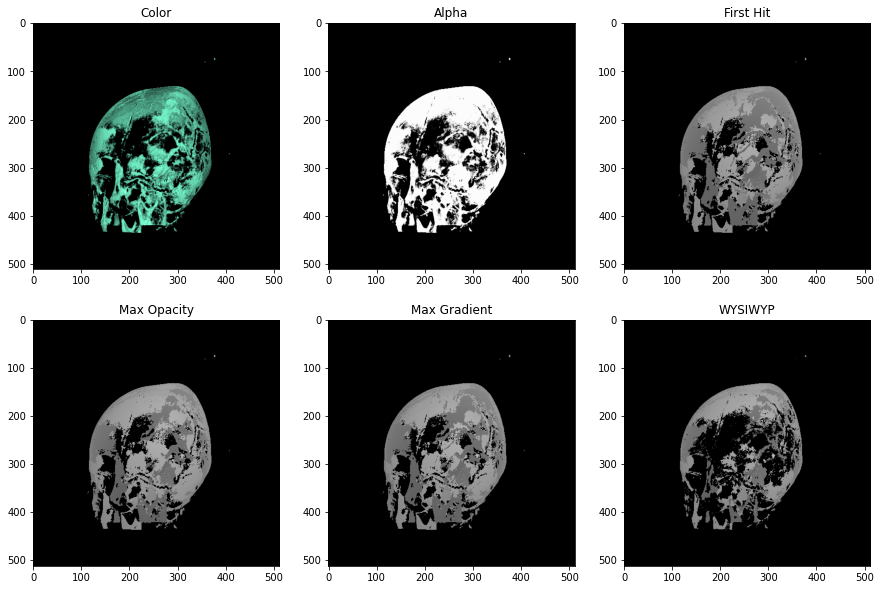

In [7]:
show_im(rgbad)

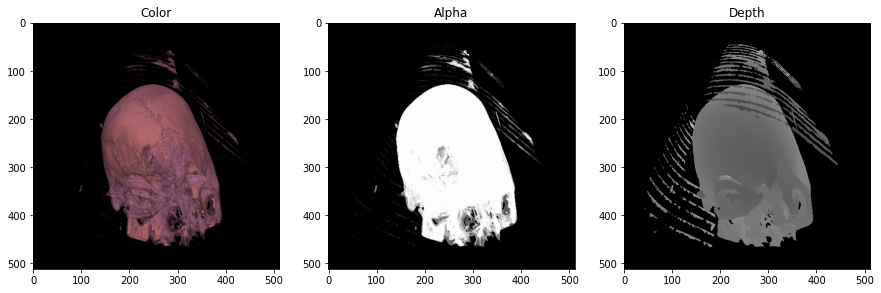

In [25]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.FirstHitDepth))

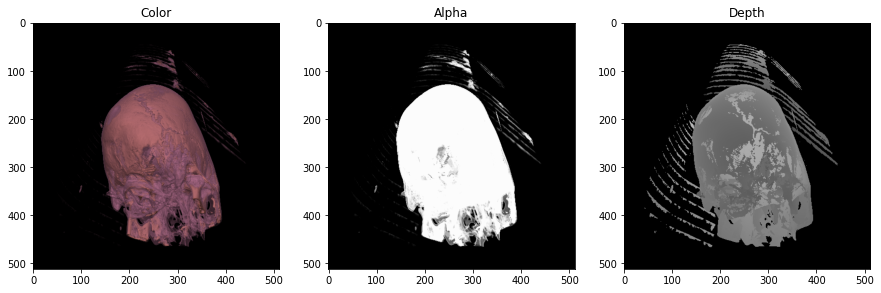

In [26]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.MaxOpacity))

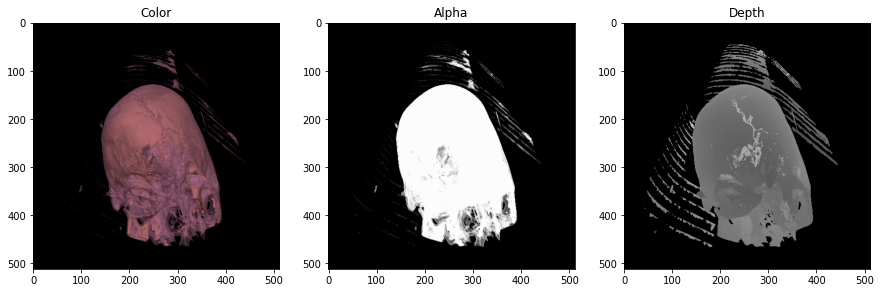

In [27]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.MaxGradient))

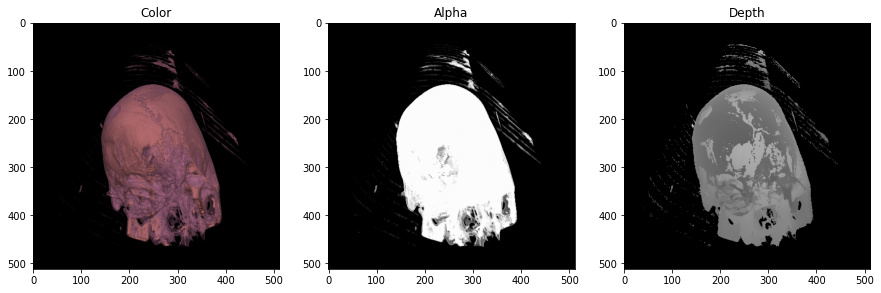

In [28]:
show_im(raycaster.raycast_nondiff(vol, tf, lf, sampling_rate=SR, mode=Mode.WYSIWYP))

In [7]:
rgbad.squeeze()[4].max()

tensor(0., device='cuda:0')

In [10]:
rgbad[0, 3].max()

tensor(0.9905, device='cuda:0')